
<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 3 </H3>
<hr style="height:2px;border:none"/>



# Temas

* Modelos No-Lineales: SVMs, Árboles, KNN, ANN, Ensamblados. 


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Se debe informar de cambios en la composición de los equipos:


> ```
https://docs.google.com/spreadsheets/d/1mG5Xnl7RghI_8FVKGujrW5TAD5b6Yza_GvnquMLzaZE/edit?usp=sharing
```






* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 

# Entregables 




> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

# Fechas

> * Defensas: 09 de Diciembre, horario de clases.
> * Fecha de entrega de vídeo: 10 de Diciembre 23:59 Hrs. (1 día después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 09 de Diciembre 08:00 (se pueden hacer actualizaciones hasta el 10 de Diciembre 23:59 Hrs.). 


# Instrucciones

Considerando el cierre de semestre, esta última tarea consistirá sólo en un desafío Kaggle. Para emparejar el estándar de las soluciones entregadas se solicitará explícitamente abordar una serie de puntos que siempre debiese incluir el diseño y análisis de la solución.



*   Análisis exploratorio de datos y detección de situaciones anómalas en los datos.
*   Diseño de una técnica razonada de imputación para manejo de datos faltantes.
*   Elección de una metodología para estimar el error de predicción del modelo.
*   Análisis de la calidad de la solución para la métrica estudiada.
*   Ranking de las variables más importantes.


Adicionalmente, para asegurar la cobertura de los temas nuevos se solicita

*   Evaluación de al menos 2 modelos no-lineales diferentes, de los cuáles 1 debe ser ensamblado 
*   Elección/recomendación razonada de uno de los dos modelos anteriores.

**Conformidad Etica**

El trabajo que se esta enviando es un trabajo original hecho por los miembros de automaticos.

Max Rosado: Analisis exploratorio, Imputacion de datos faltantes, reduccion de dimensionalidad y busqueda de hiperparametros de los modelos

Victor Martinez: ejecucion de los modelos arboles, random forest y knn con los hiperparametros encontrados. 

# **Desafío Kaggle** 

El desafío consistirá en crear un modelo que use datos de las primeras 24 horas de cuidados intensivos que permita predecir la supervivencia de un paciente. La iniciativa comunitaria GOSSIS del MIT, con certificación de privacidad del Laboratorio Harvard Privacy, ha proporcionado un conjunto de datos de visitas de pacientes a la Unidad de Cuidados Intensivos (UCI) del hospital, durante un período de un año. Estos datos son parte de un esfuerzo global creciente y un consorcio que abarca Argentina, Australia, Nueva Zelanda, Sri Lanka, Brasil y más de 200 hospitales en los Estados Unidos.


https://www.kaggle.com/t/691221f5022dd2de93bbda184fceaecf



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_train= pd.read_csv('df_train.csv')
df_train

encounter_id  patient_id  hospital_id  hospital_death   age        bmi  \
0             98554        3413           60               0   NaN  28.357077   
1             70232       19980          139               0   NaN  24.547793   
2             24701       54659           39               0   NaN  24.284760   
3             68593        8469          176               0   NaN  35.045481   
4            103103      124128          182               0   NaN  19.010652   
...             ...         ...          ...             ...   ...        ...   
89708         52840       14469          188               0   NaN  14.844926   
89709        107834      123189           19               1  63.0  25.148009   
89710        125869      107796           21               0   NaN  25.369438   
89711        115795      105886           10               0   NaN  31.703948   
89712         43998       60847          161               0   NaN  25.978680   

       elective_surgery         ethnicity gender  height  ... aids cirrhosis  \
0                     0             Asian    NaN  154.90  ...  0.0       0.0   
1                     1  African American    NaN  154.90  ...  0.0       0.0   
2                     1         Caucasian    NaN  172.70  ...  0.0       0.0   
3                     0         Caucasian    NaN  144.80  ...  0.0       0.0   
4                     0         Caucasian    NaN  180.30  ...  0.0       0.0   
...                 ...               ...    ...     ...  ...  ...       ...   
89708                 0         Caucasian    NaN  170.20  ...  0.0       0.0   
89709                 0         Caucasian      M  177.80  ...  0.0       0.0   
89710                 1         Caucasian    NaN  177.80  ...  0.0       0.0   
89711                 1  African American    NaN  185.42  ...  0.0       0.0   
89712                 1         Caucasian    NaN  183.00  ...  0.0       0.0   

       diabetes_mellitus hepatic_failure immunosuppression  leukemia  \
0                    0.0             0.0               0.0       0.0   
1                    0.0             0.0               0.0       0.0   
2                    1.0             0.0               0.0       0.0   
3                    0.0             0.0               0.0       0.0   
4                    0.0             0.0               0.0       0.0   
...                  ...             ...               ...       ...   
89708                0.0             0.0               0.0       0.0   
89709                1.0             0.0               0.0       0.0   
89710                0.0             0.0               0.0       0.0   
89711                0.0             0.0               0.0       0.0   
89712                0.0             0.0               0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0                          0.0                Sepsis   
1           0.0                          0.0        Cardiovascular   
2           0.0                          0.0        Cardiovascular   
3           0.0                          0.0                Sepsis   
4           0.0                          0.0          Neurological   
...         ...                          ...                   ...   
89708       0.0                          0.0                   NaN   
89709       0.0                          0.0          Neurological   
89710       0.0                          0.0        Cardiovascular   
89711       0.0                          0.0  Musculoskeletal/Skin   
89712       0.0                          0.0          Neurological   

       apache_2_bodysystem  
0           Cardiovascular  
1           Cardiovascular  
2      Undefined diagnoses  
3           Cardiovascular  
4               Neurologic  
...                    ...  
89708                  NaN  
89709           Neurologic  
89710       Cardiovascular  
89711  Undefined diagnoses  
89712           Neurologic  

[89713 rows x 186 

In [ ]:
df_test= pd.read_csv('df_test.csv')
df_test

encounter_id  patient_id  hospital_id   age        bmi  \
0            40457       97105           70  75.0  39.393869   
1           107569       17796          188  77.0  31.257801   
2            47462       75743           70  85.0  20.429418   
3            90920       81758           32  87.0  25.969529   
4           120041       35432          181  56.0  27.140871   
...            ...         ...          ...   ...        ...   
1995         80443        9930           89  67.0  28.146291   
1996         48061       62216           21  80.0  33.604801   
1997         38717       74885           39  73.0  34.399980   
1998         16532      101841          171  58.0  33.641975   
1999        120813       37369          157  56.0  40.173550   

      elective_surgery         ethnicity gender  height hospital_admit_source  \
0                    0         Caucasian      M  149.80                   NaN   
1                    0         Caucasian      F  154.90          Direct Admit   
2                    0  African American      F  158.00  Emergency Department   
3                    0         Caucasian      F  152.00  Emergency Department   
4                    0         Caucasian      M  177.80      Acute Care/Floor   
...                ...               ...    ...     ...                   ...   
1995                 0         Caucasian      M  167.64          Direct Admit   
1996                 0         Caucasian      M  165.10  Emergency Department   
1997                 0         Caucasian      F  170.20          Direct Admit   
1998                 1         Caucasian      M  180.00        Operating Room   
1999                 0         Caucasian      M  177.80                   NaN   

      ... aids  cirrhosis diabetes_mellitus hepatic_failure  \
0     ...  0.0        0.0               0.0             0.0   
1     ...  0.0        0.0               0.0             0.0   
2     ...  0.0        0.0               0.0             0.0   
3     ...  0.0        0.0               1.0             0.0   
4     ...  0.0        0.0               1.0             0.0   
...   ...  ...        ...               ...             ...   
1995  ...  0.0        0.0               0.0             0.0   
1996  ...  0.0        0.0               1.0             0.0   
1997  ...  0.0        0.0               1.0             0.0   
1998  ...  0.0        0.0               1.0             0.0   
1999  ...  0.0        0.0               0.0             0.0   

      immunosuppression  leukemia  lymphoma  solid_tumor_with_metastasis  \
0                   0.0       0.0       0.0                          0.0   
1                   0.0       0.0       0.0                          0.0   
2                   0.0       0.0       0.0                          0.0   
3                   0.0       0.0       0.0                          0.0   
4                   0.0       0.0       0.0                          0.0   
...                 ...       ...       ...                          ...   
1995                1.0       0.0       0.0                          0.0   
1996                0.0       0.0       0.0                          0.0   
1997                0.0       0.0       0.0                          0.0   
1998                0.0       0.0       0.0                          0.0   
1999                0.0       0.0       0.0                          0.0   

      apache_3j_bodysystem  apache_2_bodysystem  
0           Cardiovascular       Cardiovascular  
1                   Trauma               Trauma  
2              Respiratory          Respiratory  
3                   Sepsis       Cardiovascular  
4            Genitourinary  Renal/Genitourinary  
...                    ...                  ...  
1995                Sepsis       Cardiovascular  
1996          Neurological           Neurologic  
1997                Sepsis       Cardiovascular  
1998        Cardiovascular       Cardiovascular  
1999                Sepsis       Cardiovascu

# **Analisis exploratorio de los datos**

In [ ]:
df_train.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   89713.000000   89713.000000  89713.000000    89713.000000   
mean    65614.688373   65525.210337    105.696187        0.077079   
std     37799.018913   37811.139772     62.834468        0.266718   
min         1.000000       1.000000      2.000000        0.000000   
25%     32855.000000   32828.000000     47.000000        0.000000   
50%     65692.000000   65396.000000    109.000000        0.000000   
75%     98372.000000   98277.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

               age           bmi  elective_surgery        height  \
count  7146.000000  86373.000000      89713.000000  88419.000000   
mean     67.813742     29.192224          0.185202    169.646097   
std      14.801458      8.258587          0.388463     10.789933   
min      16.000000     14.844926          0.000000    137.200000   
25%      59.000000     23.661272          0.000000    162.500000   
50%      70.000000     27.660186          0.000000    170.100000   
75%      79.000000     32.930150          0.000000    177.800000   
max      89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  apache_4a_hospital_death_prob  \
count  89713.000000      89713.000000  ...                   81935.000000   
mean     508.095683          0.831475  ...                       0.084294   
std      229.127276          2.474884  ...                       0.245139   
min       82.000000        -24.947222  ...                      -1.000000   
25%      369.000000          0.035417  ...                       0.020000   
50%      504.000000          0.138889  ...                       0.050000   
75%      679.000000          0.409028  ...                       0.130000   
max      927.000000        159.090972  ...                       0.990000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              81935.000000  89017.000000  89017.000000   
mean                   0.041864      0.000831      0.015581   
std                    0.215385      0.028820      0.123849   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       89017.000000     89017.000000       89017.000000  89017.000000   
mean            0.225575         0.012885           0.026006      0.006976   
std             0.417963         0.112780           0.159155      0.083232   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  
count  89017.000000                 89017.000000  
mean       0.004100                     0.020648  
std        0.063903                     0.142203  
min        0.000000                     0.000000  
25%        0.000000                     0.000000  
50%        0.000000                     0.000000  
75%        0.000000                     0.000000  
max        1.000000                     1.000000  

[8 rows x 178 columns]

In [ ]:
count_int= 0
count_float= 0
count_cat= 0

cat= []         #lista para almacenar el nombre de columnas categoricas para aplicar despues getdummies

for i in df_train.columns:
  if df_train[i].dtypes == 'int64':
    count_int= count_int + 1
  elif df_train[i].dtypes == float:
    count_float= count_float + 1
  elif df_train[i].dtypes == object:
    count_cat= count_cat + 1
    cat.append(i)

print('En esta base de datos hay', count_int,'columnas con datos enteros,',
      count_float,'columnas con datos flotantes y', count_cat,'columnas con datos categoricas')
print('Las columnas categoricas de esta base de datos son:')
print(cat)

En esta base de datos hay 8 columnas con datos enteros, 170 columnas con datos flotantes y 8 columnas con datos categoricas
Las columnas categoricas de esta base de datos son:
['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


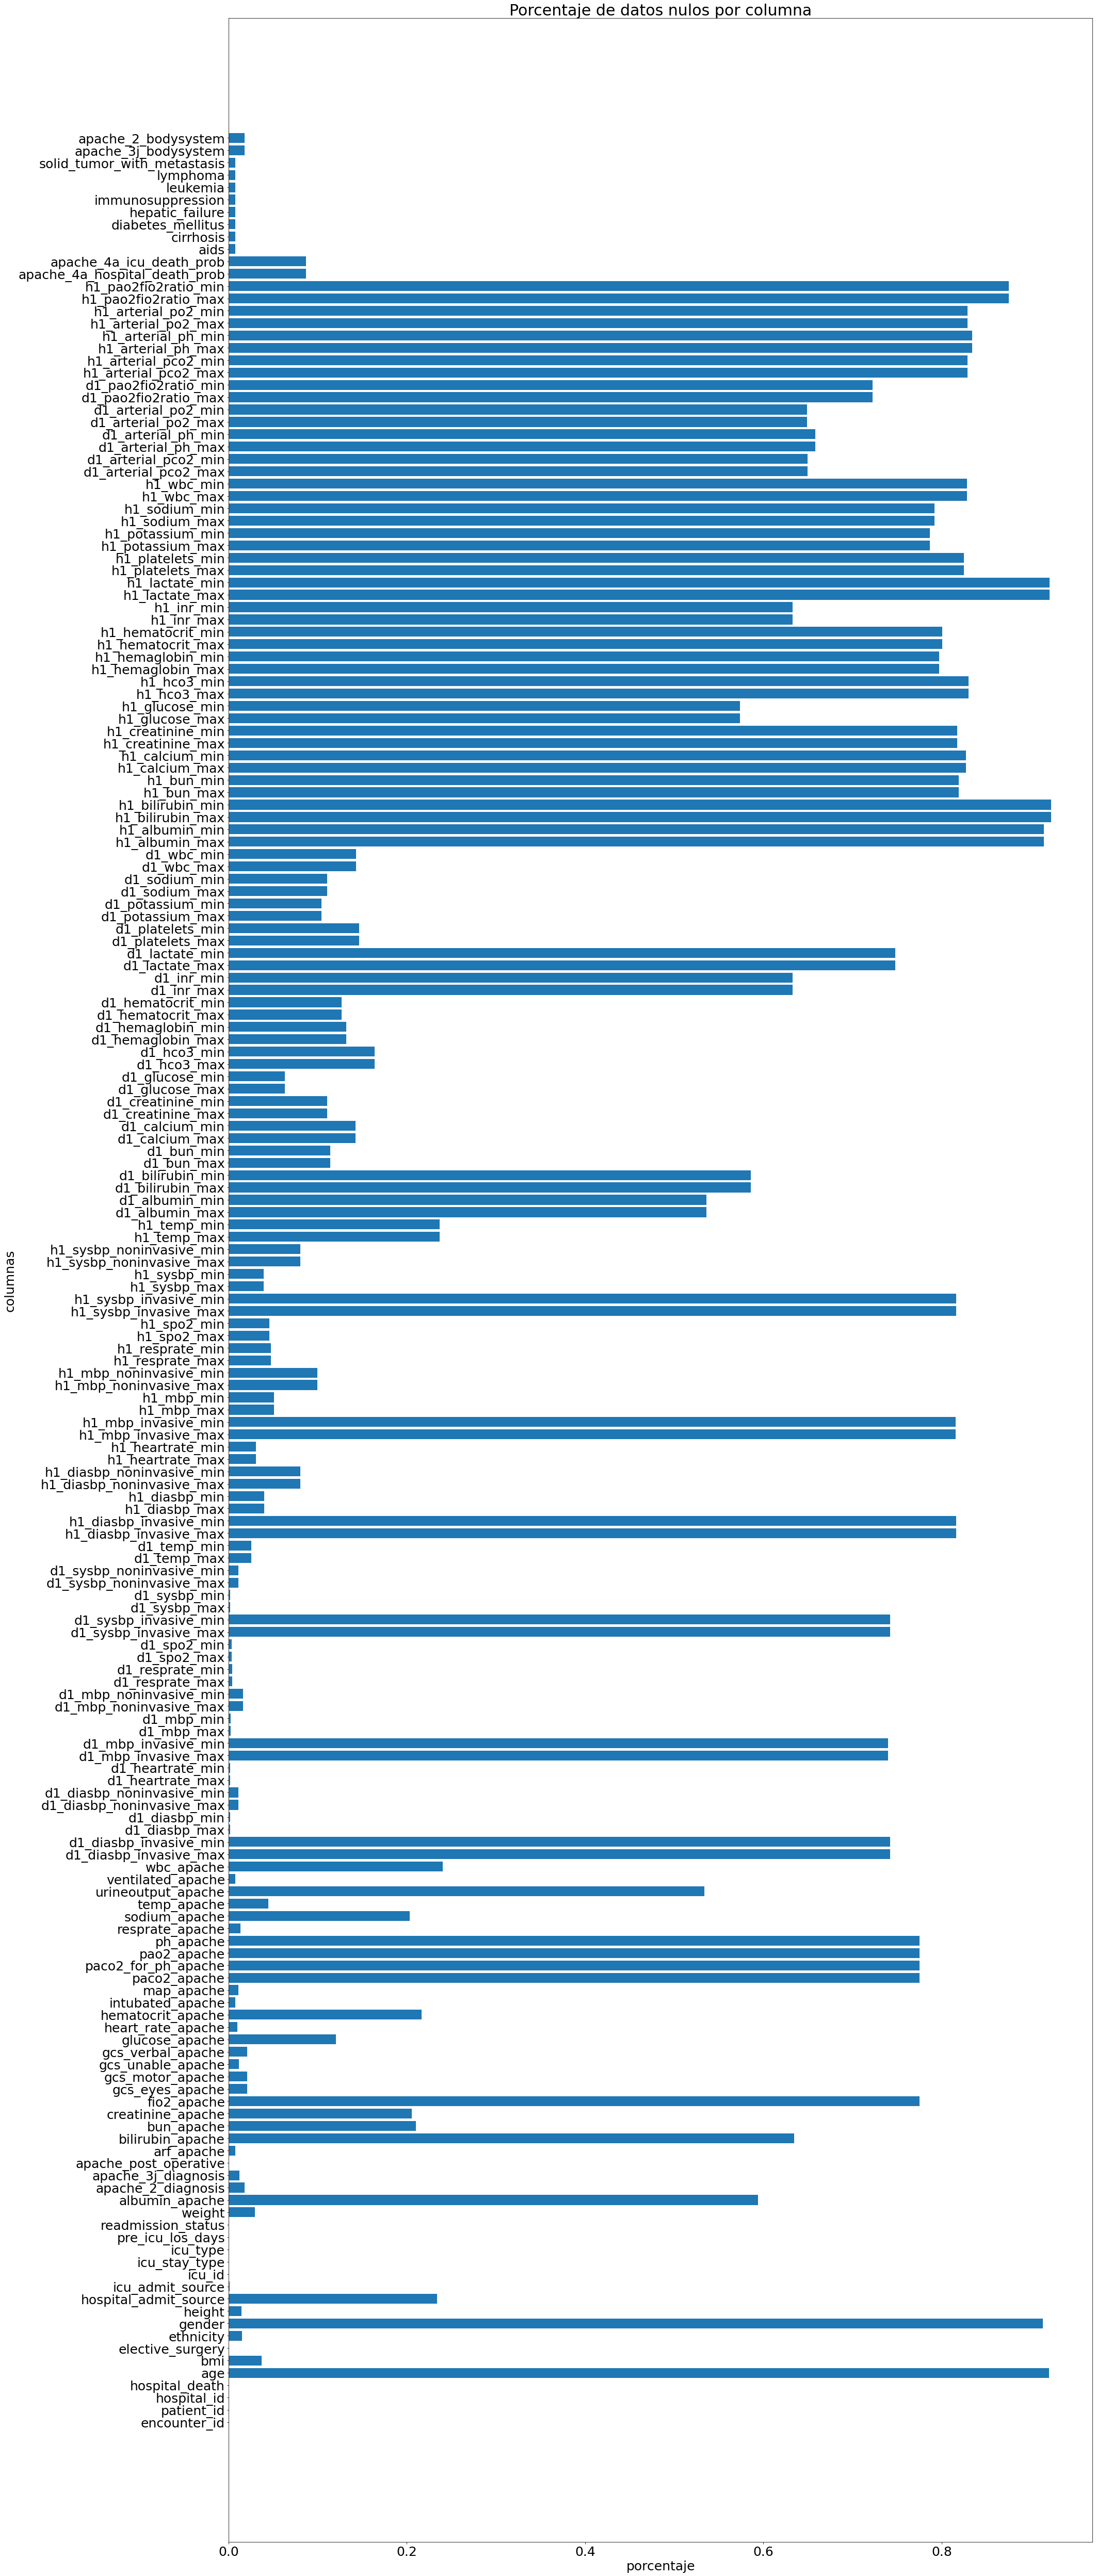

In [ ]:
por_null= df_train.isnull().sum()/df_train.shape[0]
fig = plt.figure(figsize=(30, 90))
plt.barh(df_train.columns, por_null)
plt.title('Porcentaje de datos nulos por columna', fontdict={'fontsize':30})
plt.xlabel('porcentaje', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('columnas', fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
list_null=[]
for i in range(len(por_null)):
  if por_null[i]>=0.5:
    list_null.append(df_train.columns[i])

print('existen', len(list_null), 'columnas con más del 50% de datos nulos.')
print('Estas columnas son:')
for i in list_null:
  print(i)

existen 76 columnas con más del 50% de datos nulos.
Estas columnas son:
age
gender
albumin_apache
bilirubin_apache
fio2_apache
paco2_apache
paco2_for_ph_apache
pao2_apache
ph_apache
urineoutput_apache
d1_diasbp_invasive_max
d1_diasbp_invasive_min
d1_mbp_invasive_max
d1_mbp_invasive_min
d1_sysbp_invasive_max
d1_sysbp_invasive_min
h1_diasbp_invasive_max
h1_diasbp_invasive_min
h1_mbp_invasive_max
h1_mbp_invasive_min
h1_sysbp_invasive_max
h1_sysbp_invasive_min
d1_albumin_max
d1_albumin_min
d1_bilirubin_max
d1_bilirubin_min
d1_inr_max
d1_inr_min
d1_lactate_max
d1_lactate_min
h1_albumin_max
h1_albumin_min
h1_bilirubin_max
h1_bilirubin_min
h1_bun_max
h1_bun_min
h1_calcium_max
h1_calcium_min
h1_creatinine_max
h1_creatinine_min
h1_glucose_max
h1_glucose_min
h1_hco3_max
h1_hco3_min
h1_hemaglobin_max
h1_hemaglobin_min
h1_hematocrit_max
h1_hematocrit_min
h1_inr_max
h1_inr_min
h1_lactate_max
h1_lactate_min
h1_platelets_max
h1_platelets_min
h1_potassium_max
h1_potassium_min
h1_sodium_max
h1_sodium_m

Se logra ver que aproximadamente el 50% de las columnas de este DataFrame tiene mas del 50% de datos nulos, por lo tanto, será recomendado utilizar técnicas para imputar los valores nulos en esta columnas y no perder la informacion de estas. Como hay columnas con valores numericos y categoricos, sera necesario aplicar técnicas distintas en estos tipos de columnas.

Para las columnas categoricas, podemos reemplazar los datos nulos con la categoria con mayor frecuencia en esa columna. Por otro lado, en las columnas con valores numericos podemos reemplazar los datos nulos por la media de esa columna para no afectar mucho en la distribucion de los datos, aproximando este valor en las columnas con valores enteros.

Ahora veremos la distribucion de estos datos y si existen situaciones anomalas(putliers) en esta base de datos.

In [ ]:
target= 'hospital_death'
fig= plt.figure(figsize=(10,10))
sns.countplot(x= target, data=df_train)
plt.title('distribucion de datos de hospital_death')
plt.show()


* encounter_id
tipo de datos: int64
Número de diferentes elementos de la columna encounter_id
89713
Número de elementos nulos: 0 ( 0.0 )


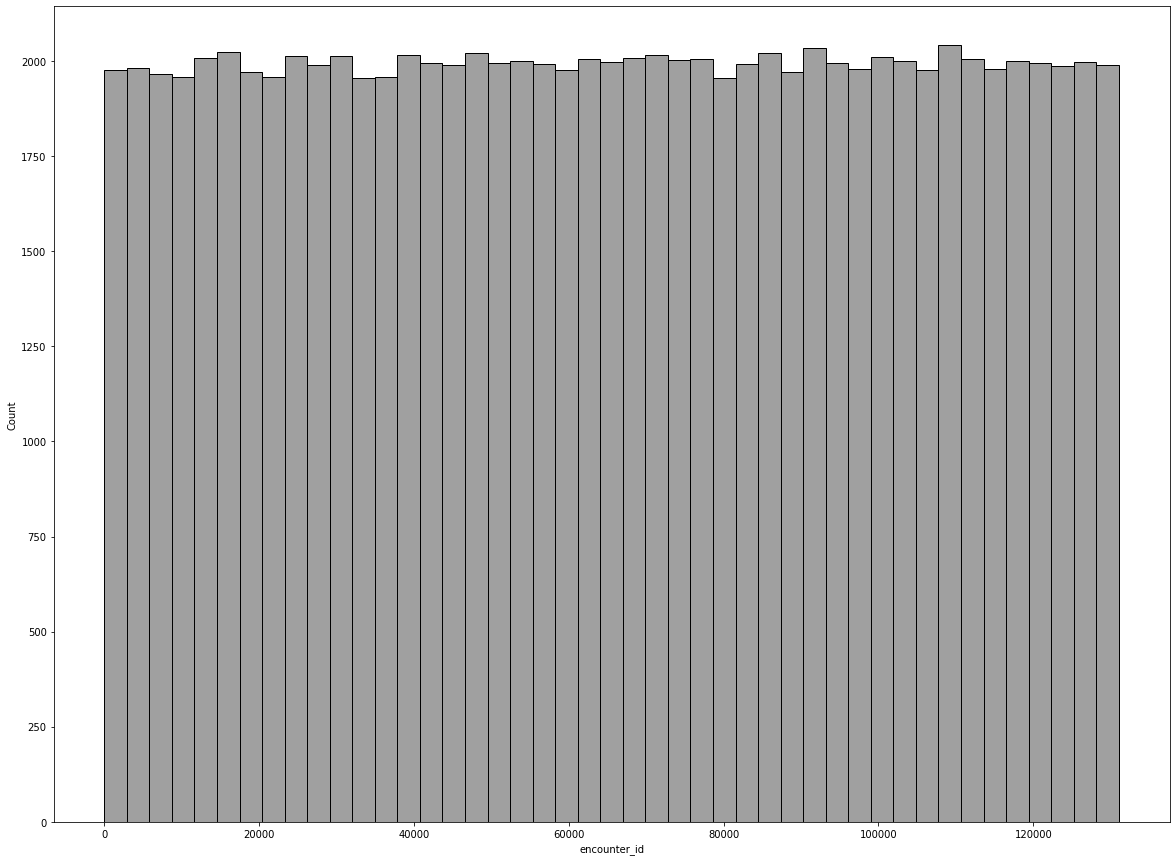

* patient_id
tipo de datos: int64
Número de diferentes elementos de la columna patient_id
89713
Número de elementos nulos: 0 ( 0.0 )


* hospital_id
tipo de datos: int64
Número de diferentes elementos de la columna hospital_id
147
Número de elementos nulos: 0 ( 0.0 )


* age
tipo de datos: float64
Número de diferentes elementos de la columna age
75
Número de elementos nulos: 82567 ( 0.92 )


* bmi
tipo de datos: float64
Número de diferentes elementos de la columna bmi
34447
Número de elementos nulos: 3340 ( 0.04 )


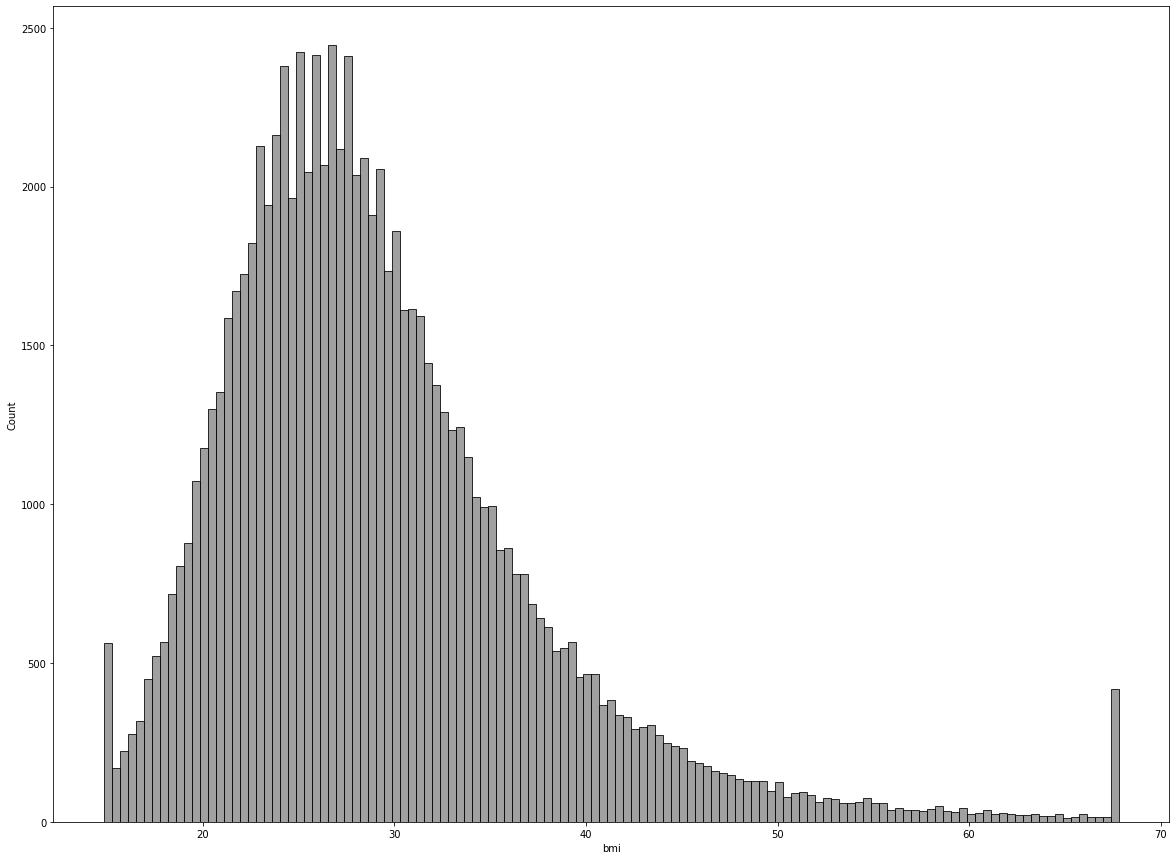

* elective_surgery
tipo de datos: int64
Número de diferentes elementos de la columna elective_surgery
2
Número de elementos nulos: 0 ( 0.0 )


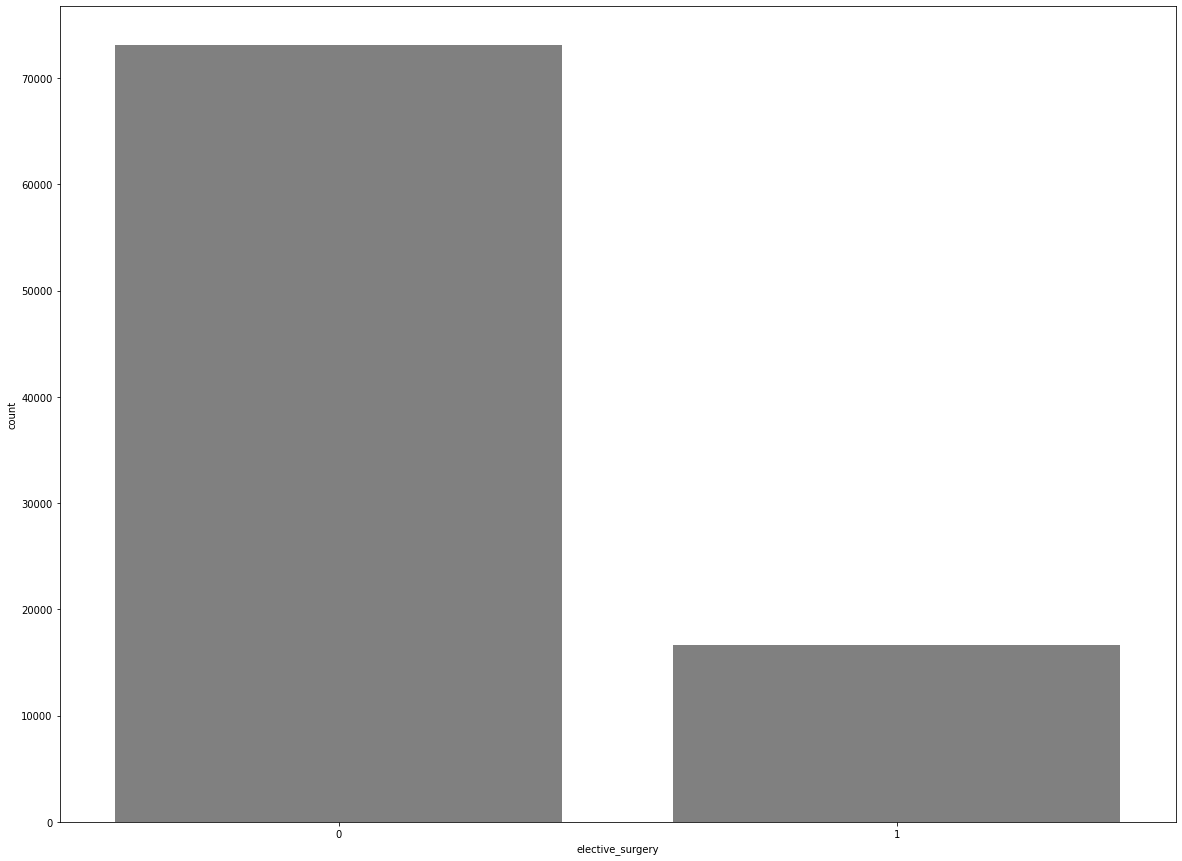

* ethnicity
tipo de datos: object
Número de diferentes elementos de la columna ethnicity
7
Número de elementos nulos: 1370 ( 0.02 )


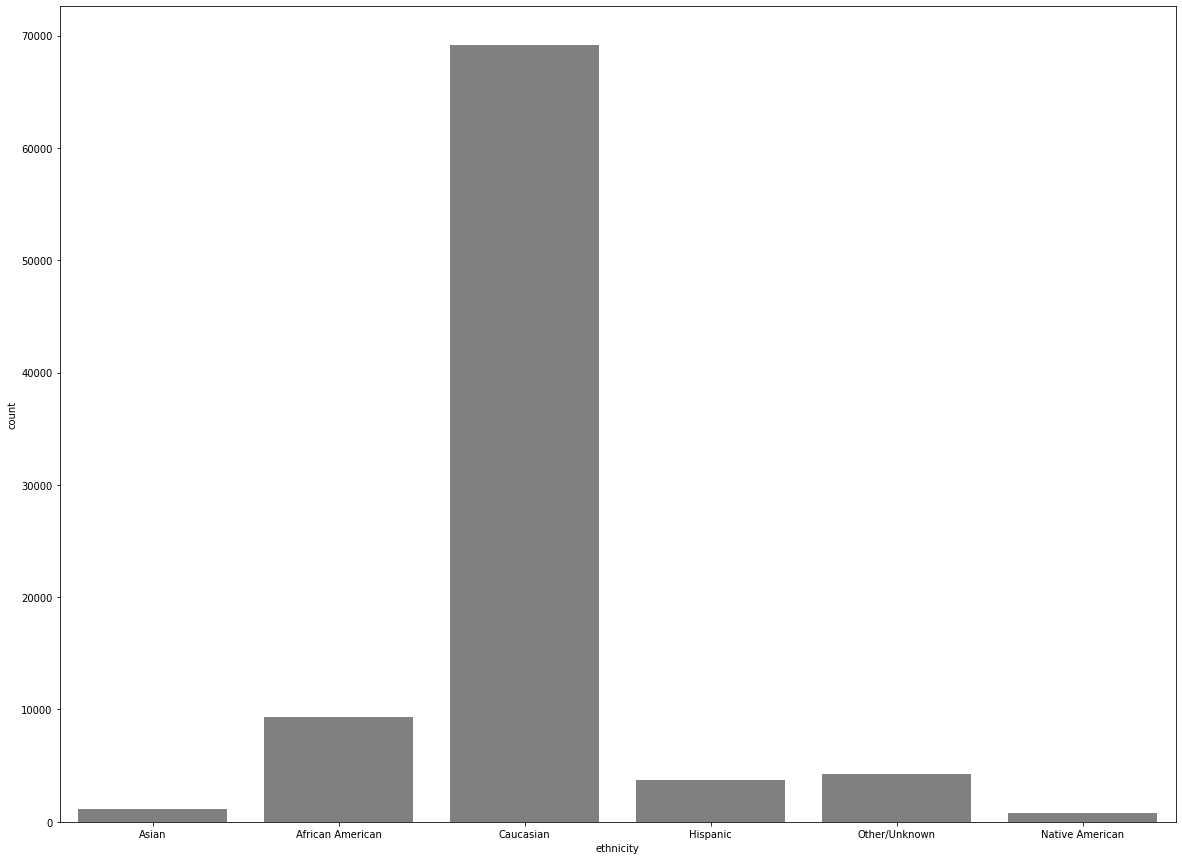

* gender
tipo de datos: object
Número de diferentes elementos de la columna gender
3
Número de elementos nulos: 81979 ( 0.91 )


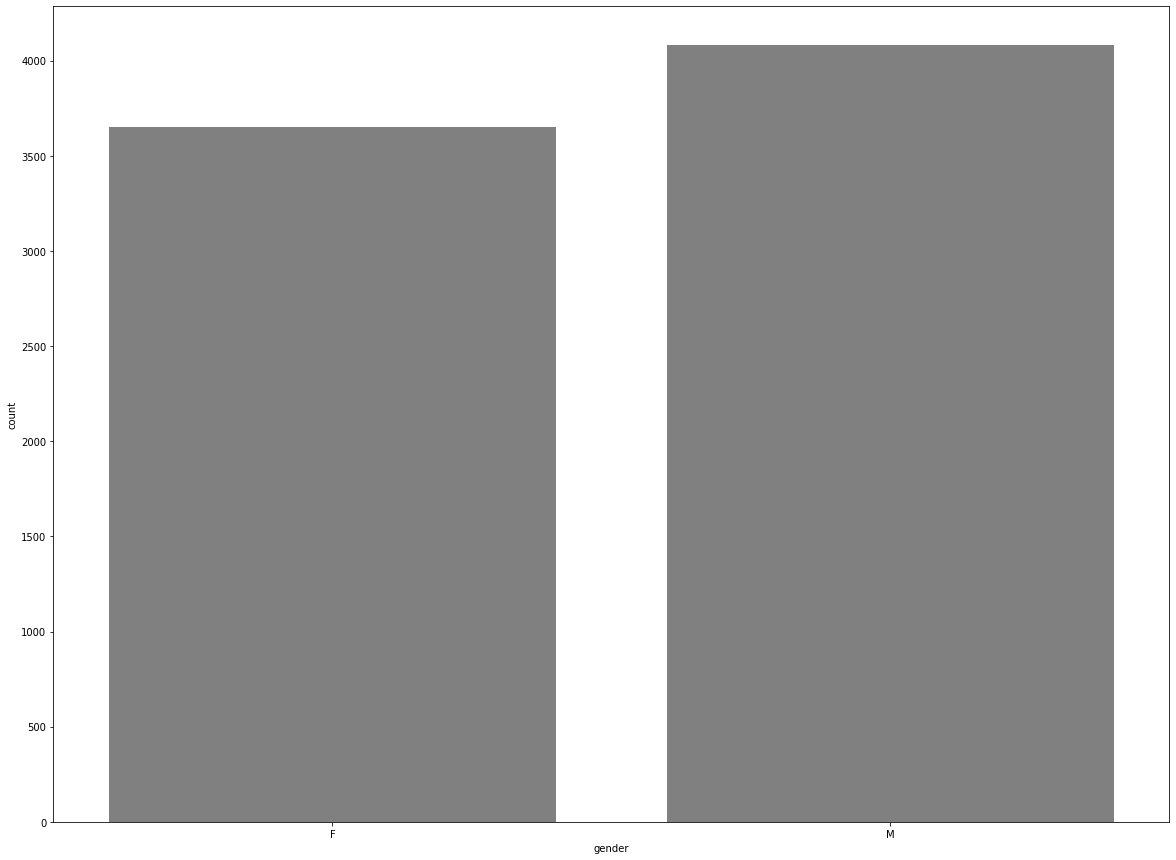

* height
tipo de datos: float64
Número de diferentes elementos de la columna height
398
Número de elementos nulos: 1294 ( 0.01 )


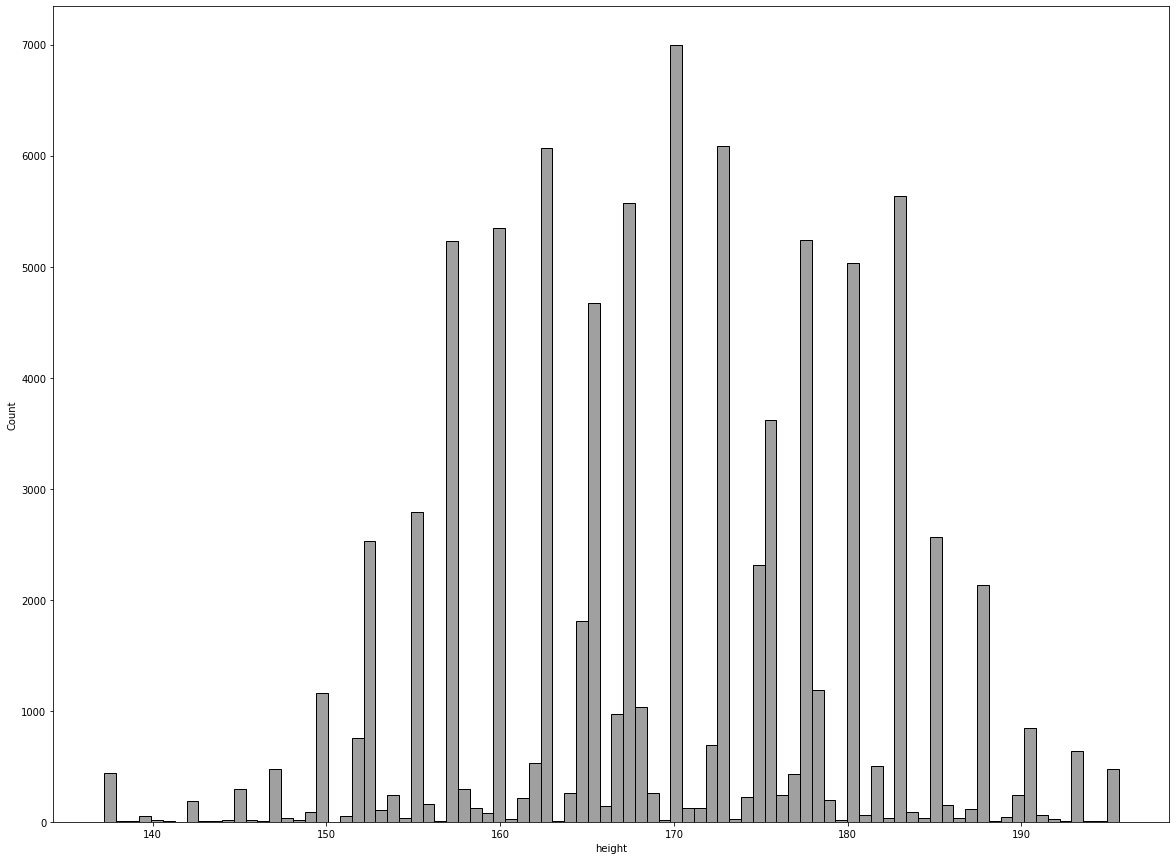

* hospital_admit_source
tipo de datos: object
Número de diferentes elementos de la columna hospital_admit_source
16
Número de elementos nulos: 20975 ( 0.23 )


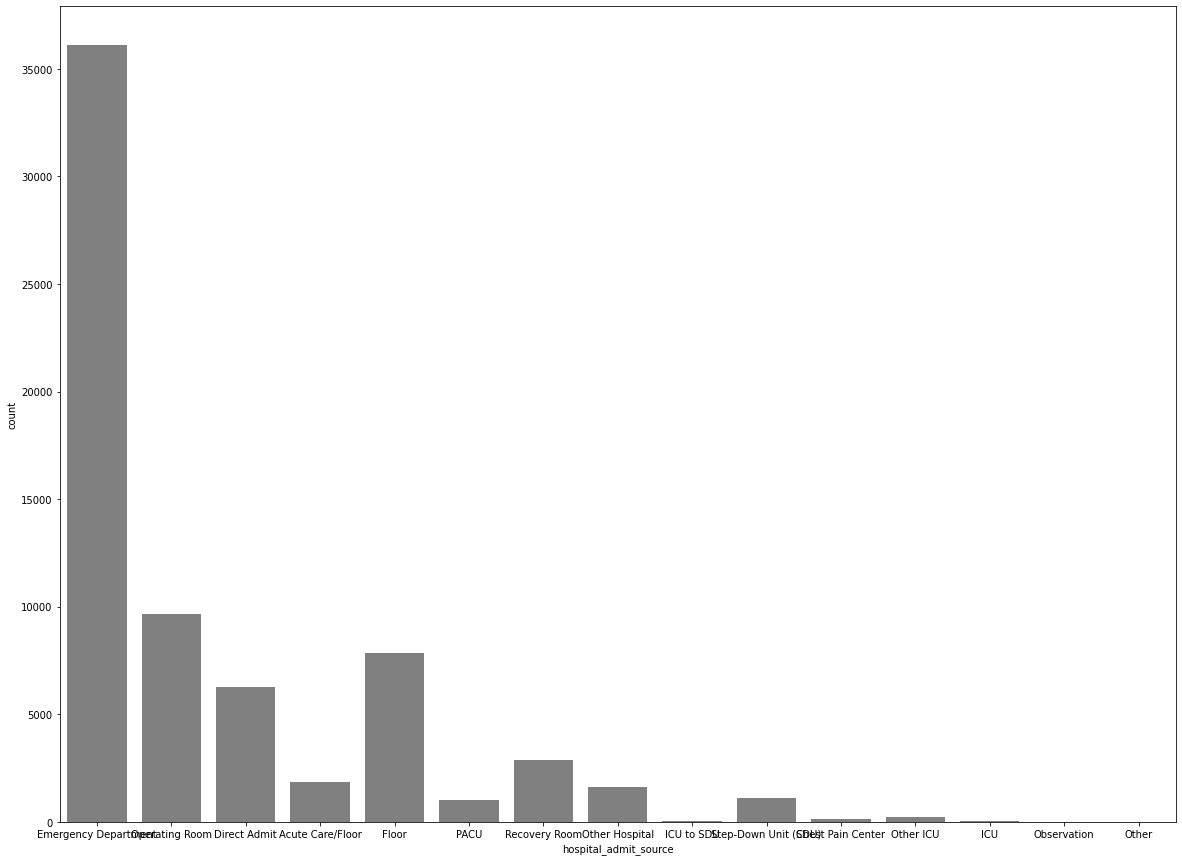

* icu_admit_source
tipo de datos: object
Número de diferentes elementos de la columna icu_admit_source
6
Número de elementos nulos: 112 ( 0.0 )


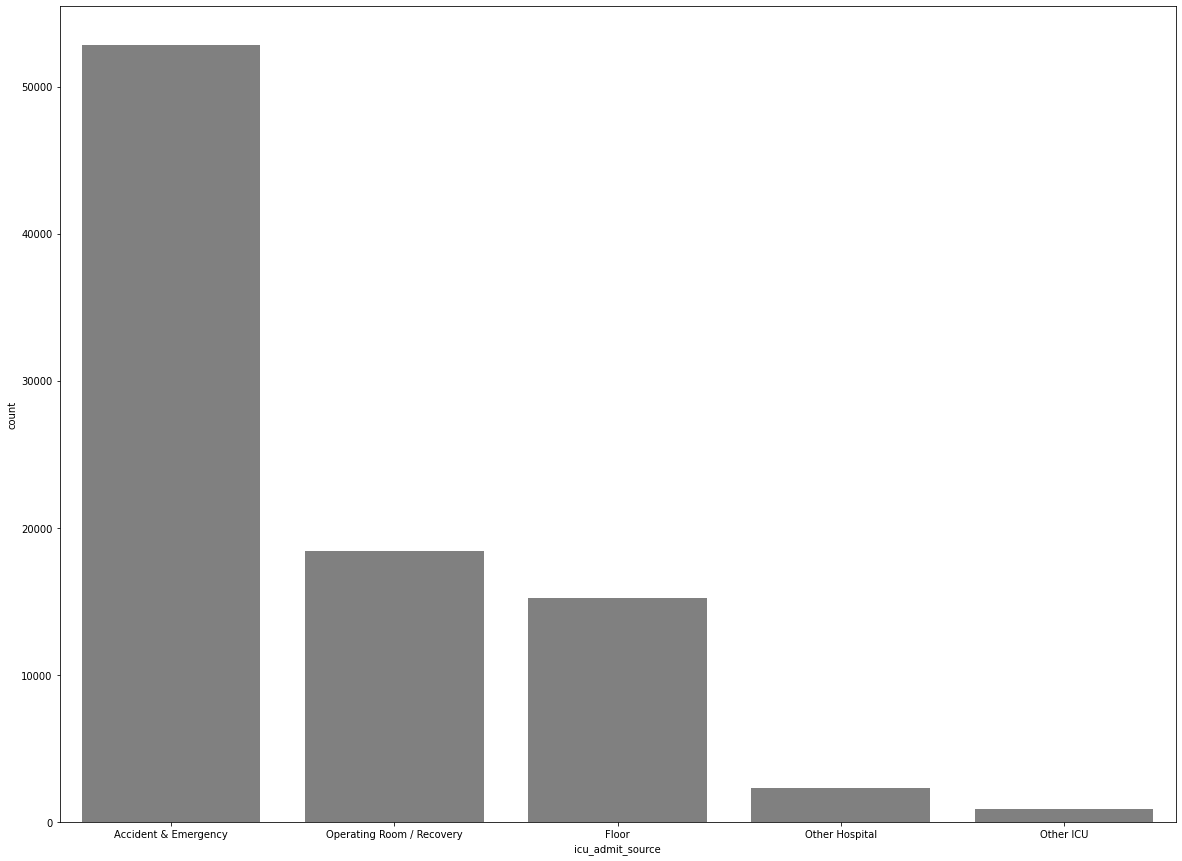

* icu_id
tipo de datos: int64
Número de diferentes elementos de la columna icu_id
241
Número de elementos nulos: 0 ( 0.0 )


* icu_stay_type
tipo de datos: object
Número de diferentes elementos de la columna icu_stay_type
3
Número de elementos nulos: 0 ( 0.0 )


* icu_type
tipo de datos: object
Número de diferentes elementos de la columna icu_type
8
Número de elementos nulos: 0 ( 0.0 )


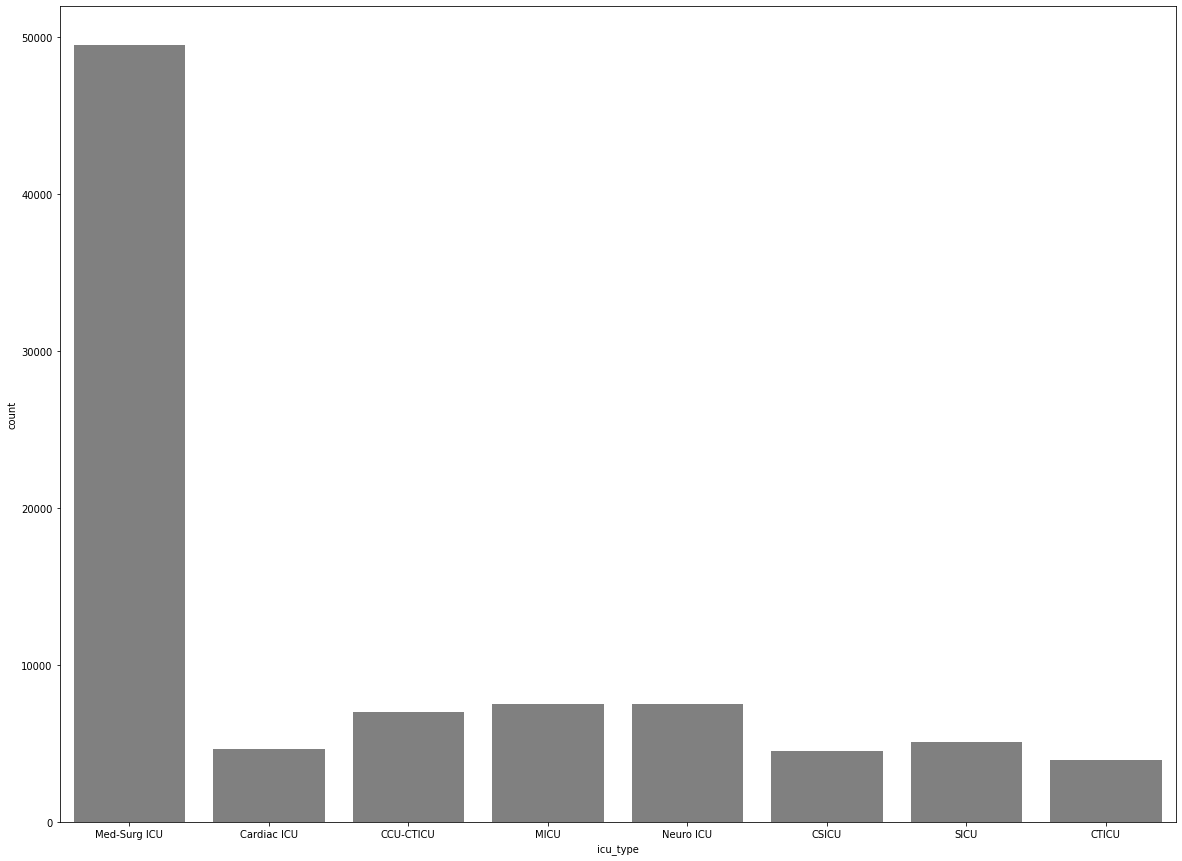

* pre_icu_los_days
tipo de datos: float64
Número de diferentes elementos de la columna pre_icu_los_days
9618
Número de elementos nulos: 0 ( 0.0 )


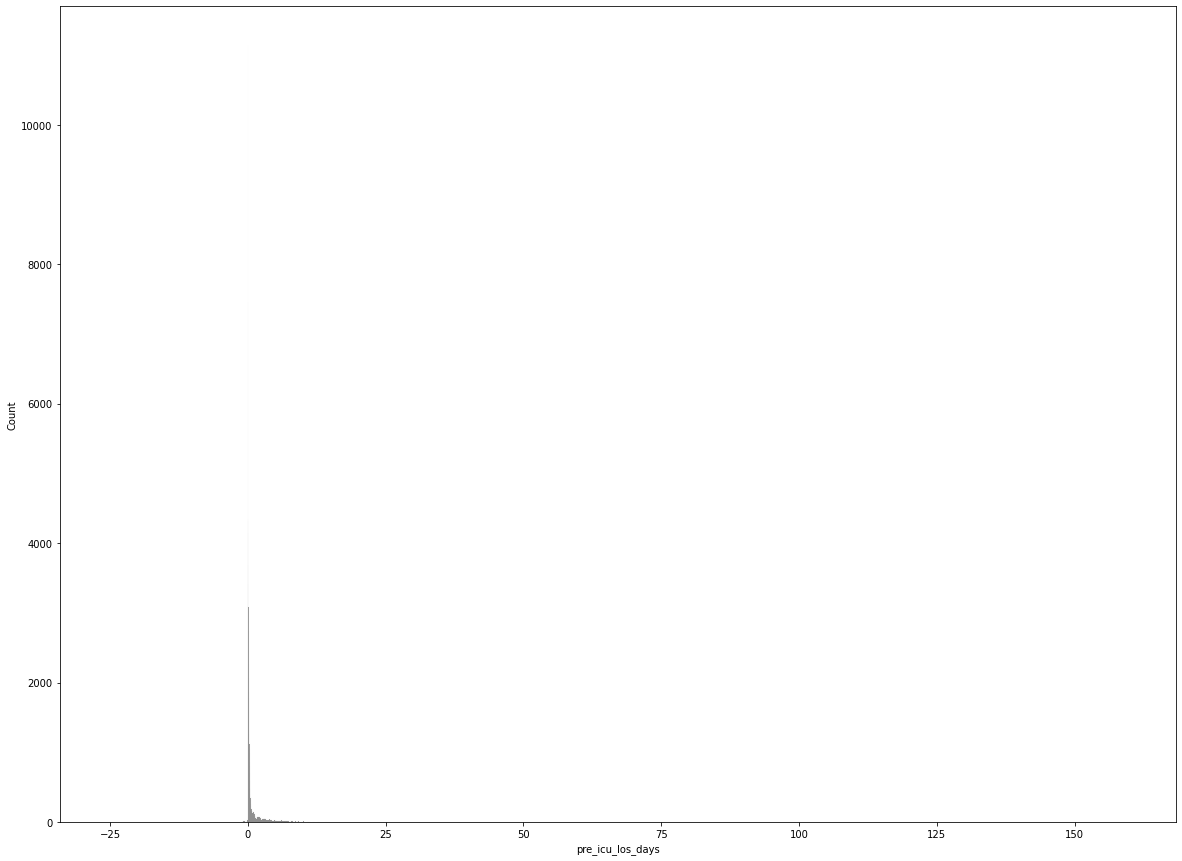

* readmission_status
tipo de datos: int64
Número de diferentes elementos de la columna readmission_status
1
Número de elementos nulos: 0 ( 0.0 )


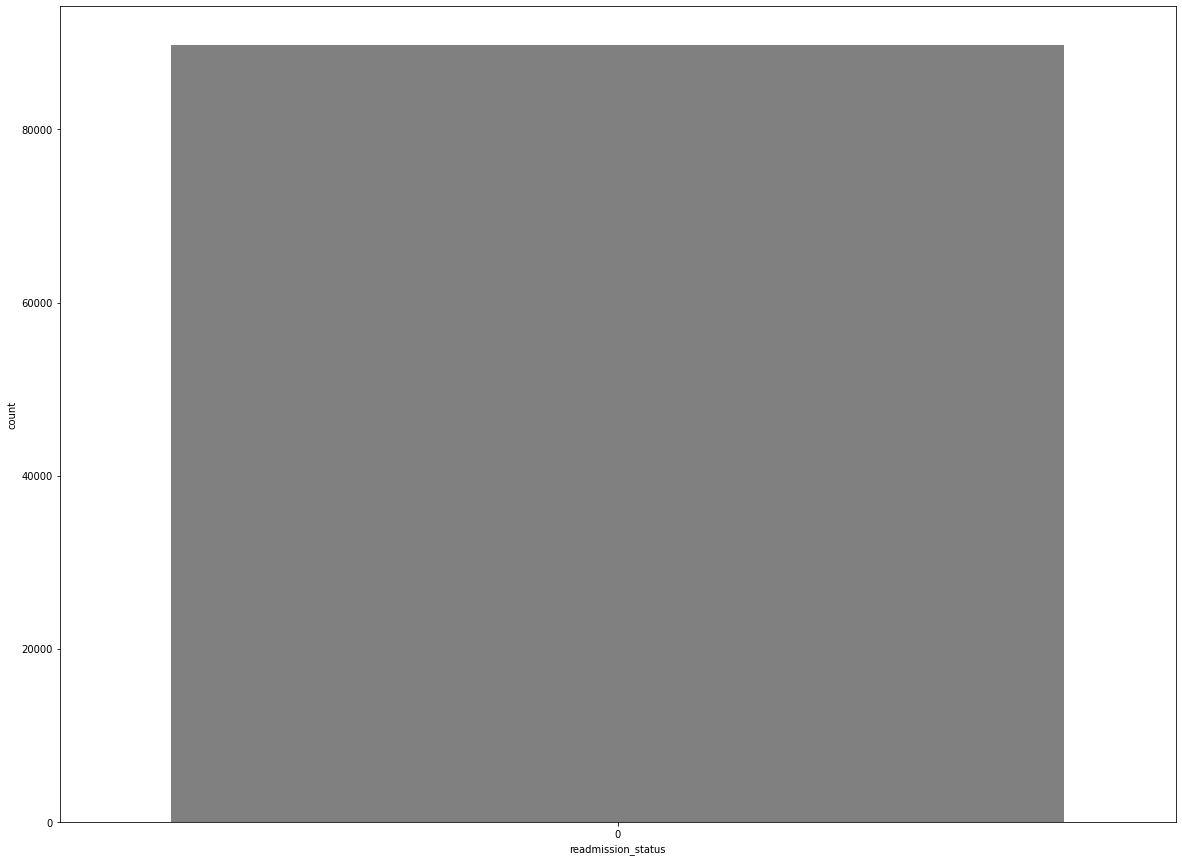

* weight
tipo de datos: float64
Número de diferentes elementos de la columna weight
3373
Número de elementos nulos: 2654 ( 0.03 )


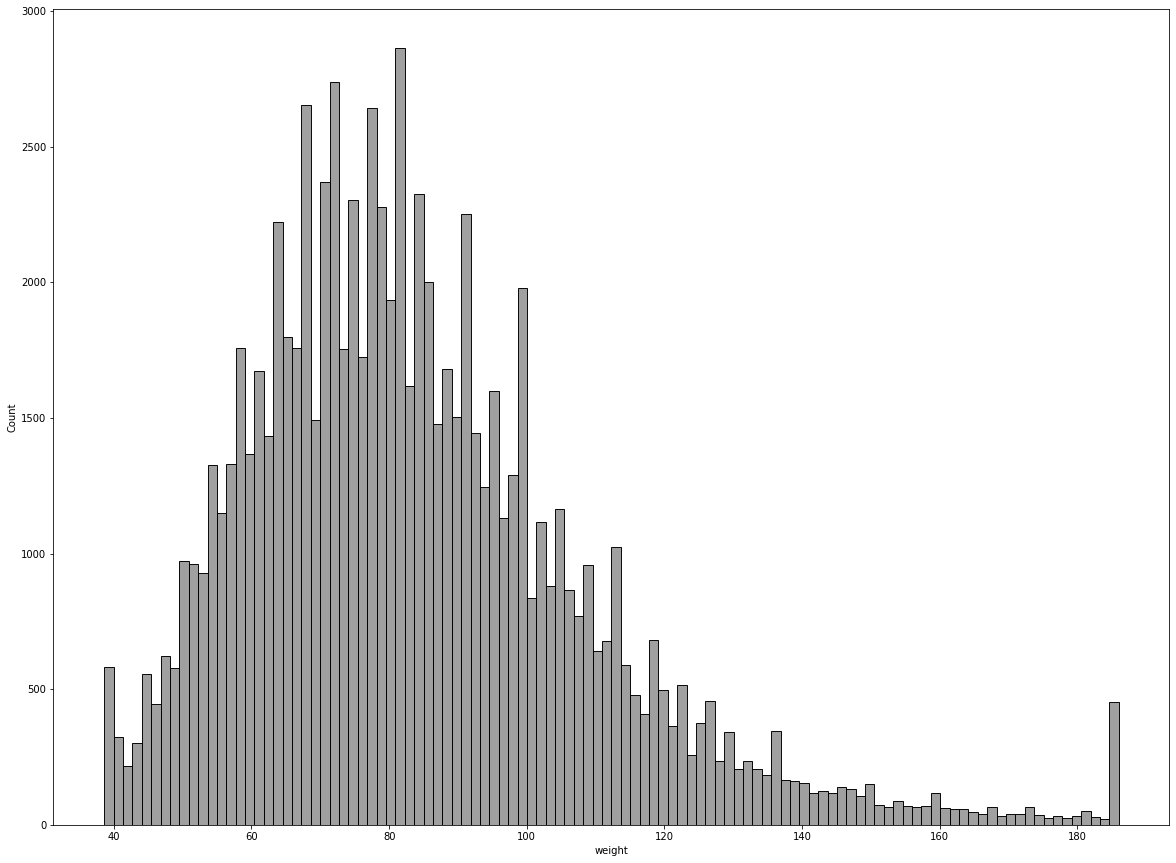

* albumin_apache
tipo de datos: float64
Número de diferentes elementos de la columna albumin_apache
36
Número de elementos nulos: 53291 ( 0.59 )


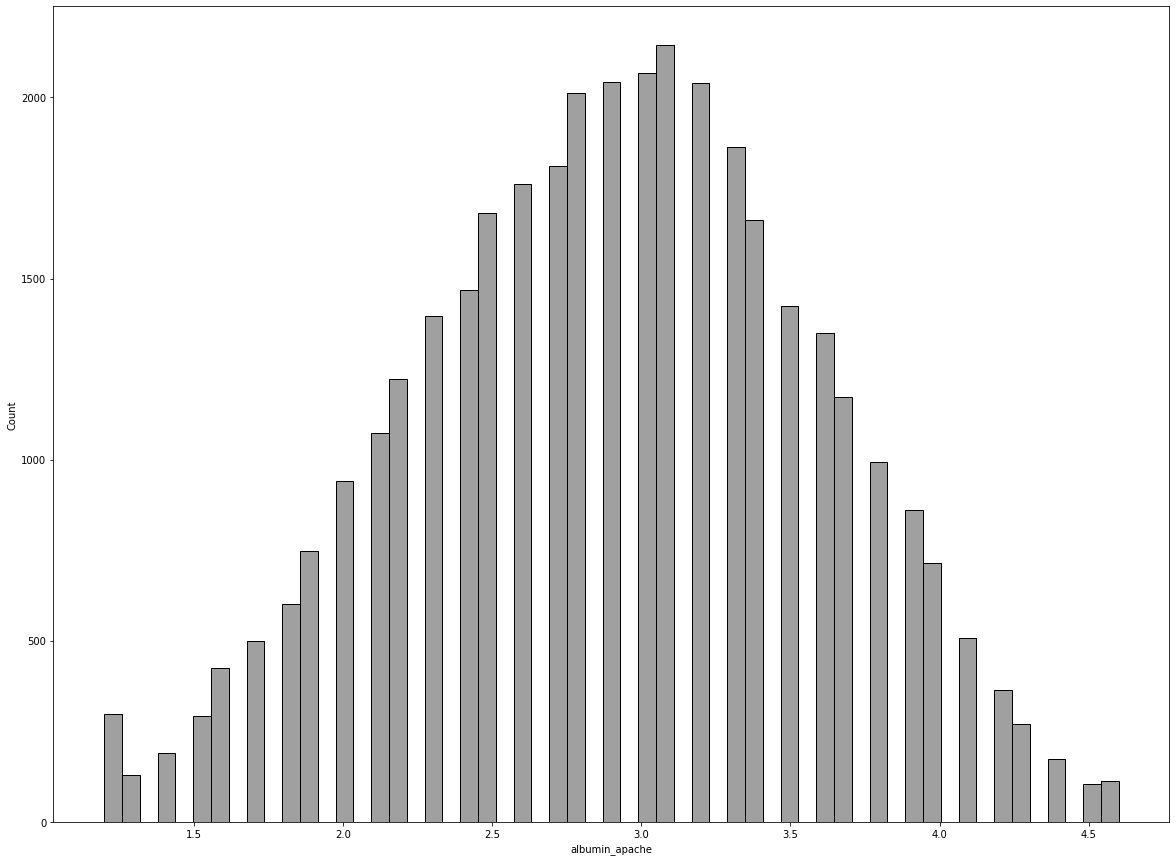

* apache_2_diagnosis
tipo de datos: float64
Número de diferentes elementos de la columna apache_2_diagnosis
45
Número de elementos nulos: 1625 ( 0.02 )


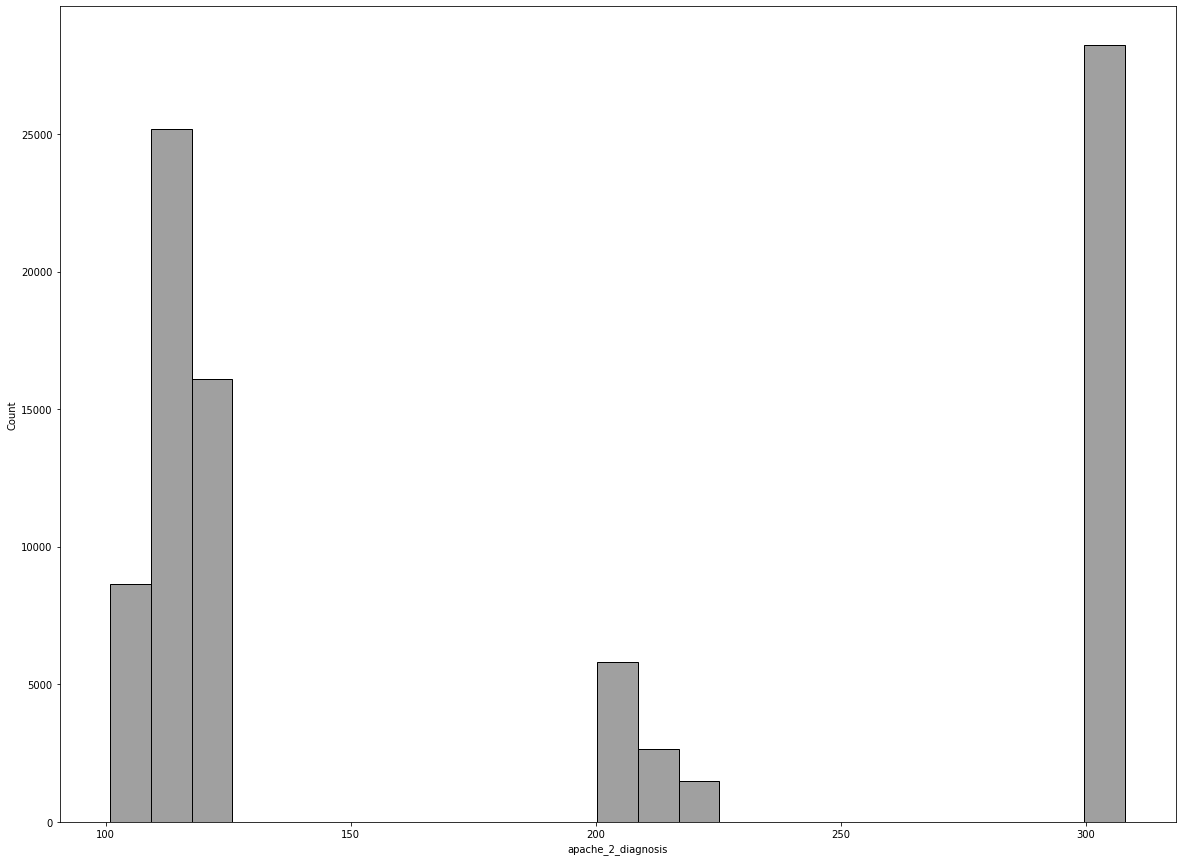

* apache_3j_diagnosis
tipo de datos: float64
Número de diferentes elementos de la columna apache_3j_diagnosis
400
Número de elementos nulos: 1072 ( 0.01 )


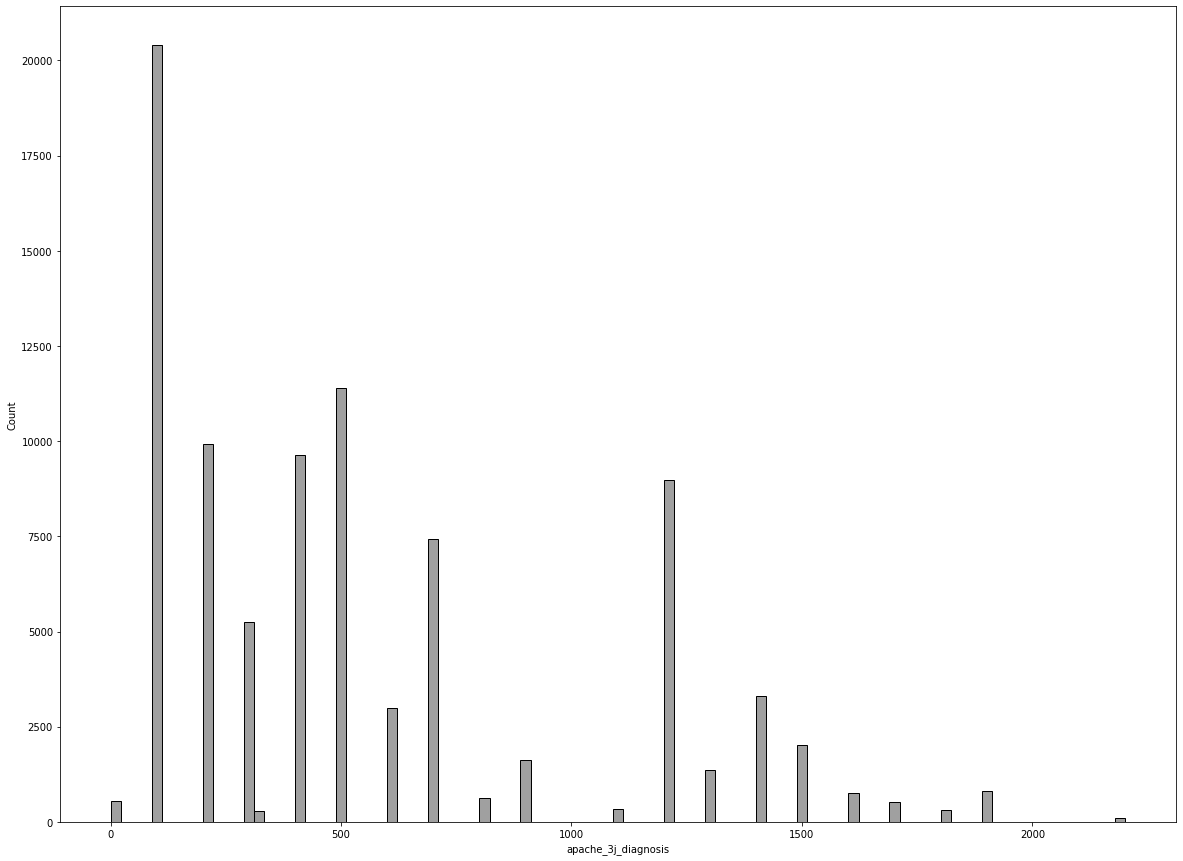

* apache_post_operative
tipo de datos: int64
Número de diferentes elementos de la columna apache_post_operative
2
Número de elementos nulos: 0 ( 0.0 )


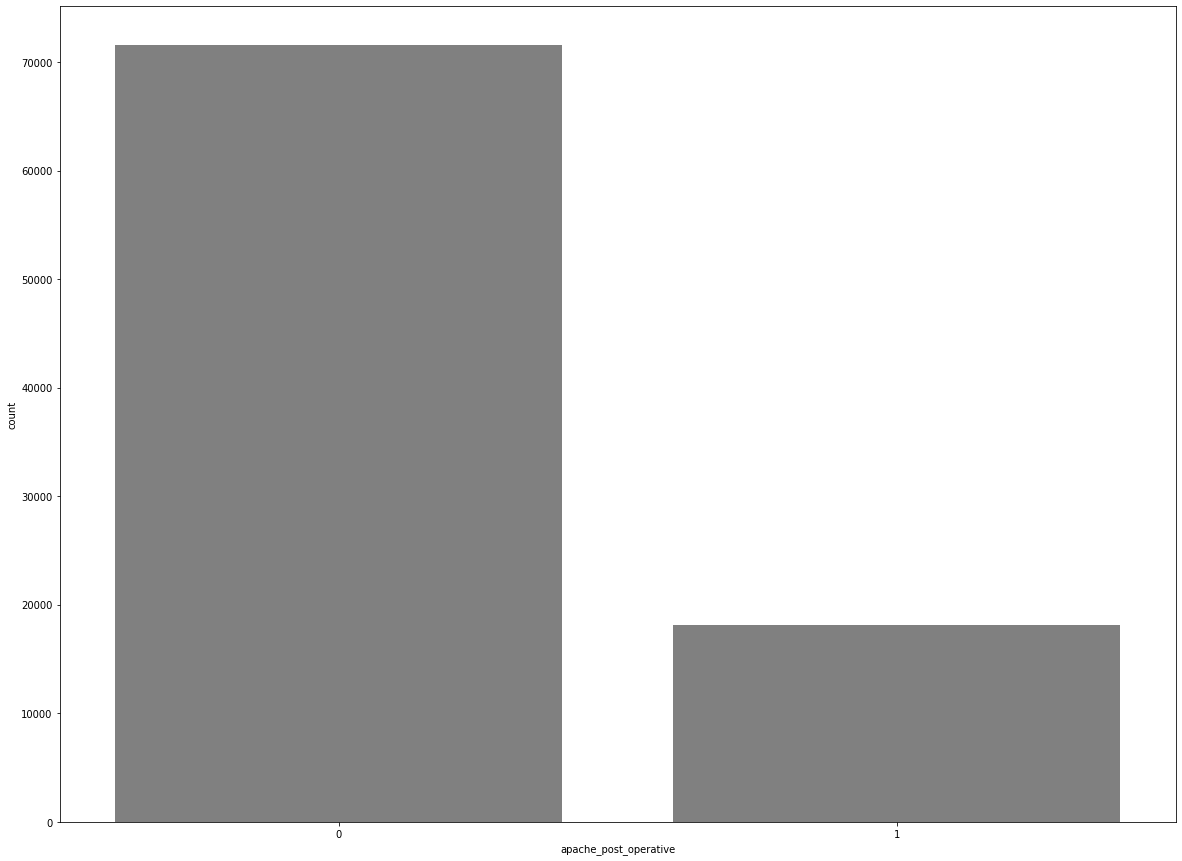

* arf_apache
tipo de datos: float64
Número de diferentes elementos de la columna arf_apache
3
Número de elementos nulos: 696 ( 0.01 )


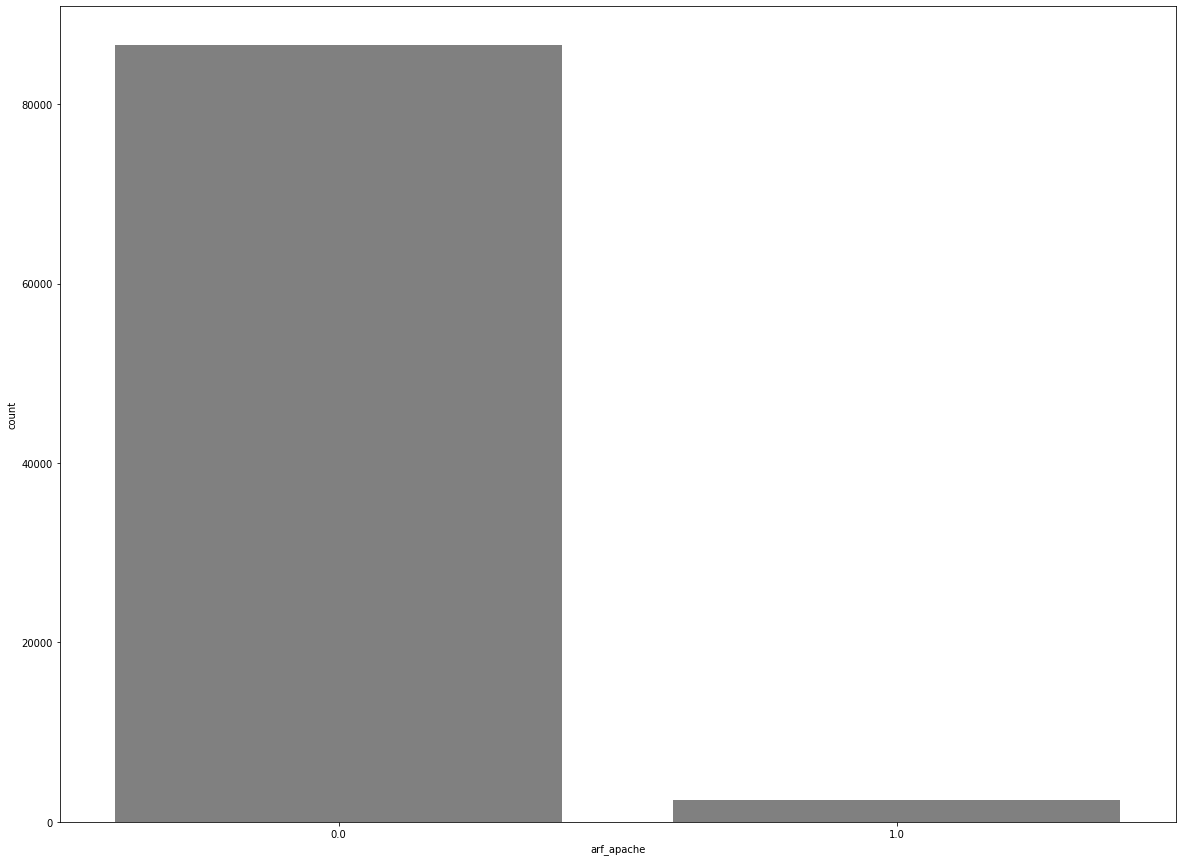

* bilirubin_apache
tipo de datos: float64
Número de diferentes elementos de la columna bilirubin_apache
358
Número de elementos nulos: 56952 ( 0.63 )


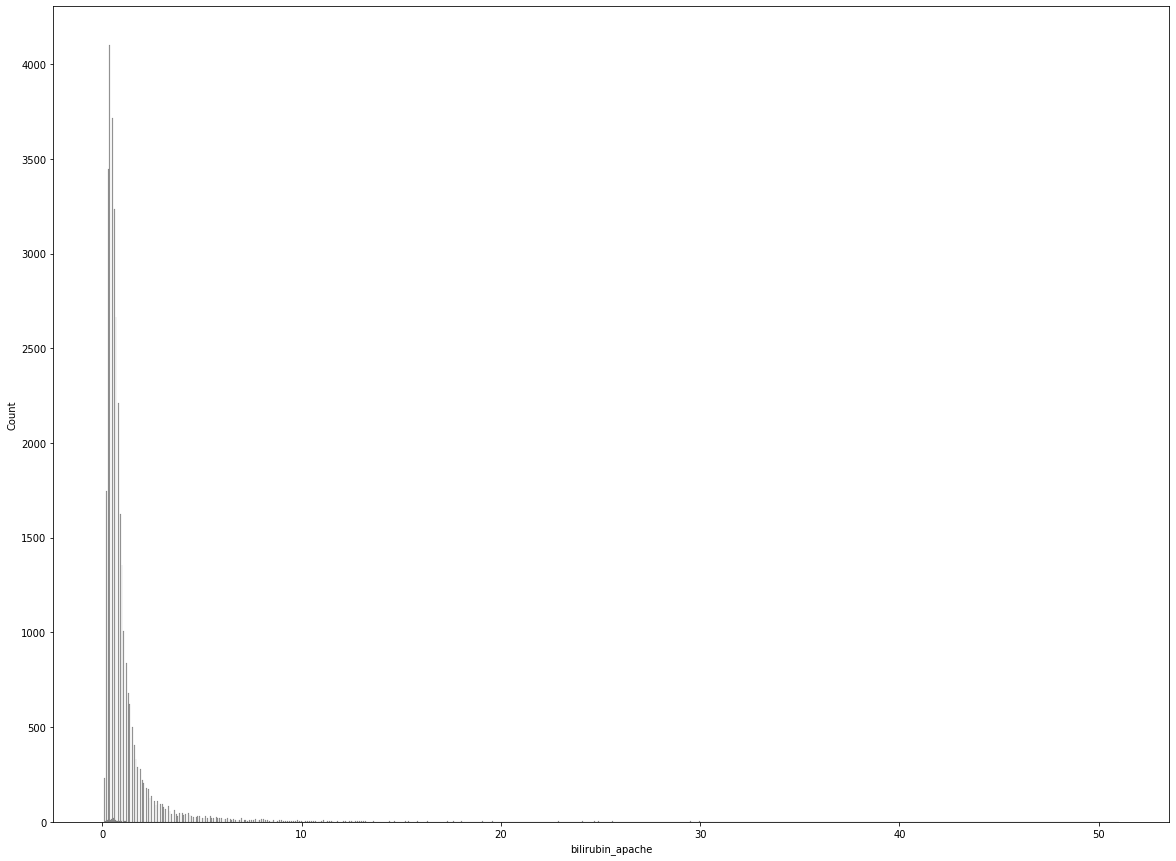

* bun_apache
tipo de datos: float64
Número de diferentes elementos de la columna bun_apache
474
Número de elementos nulos: 18852 ( 0.21 )


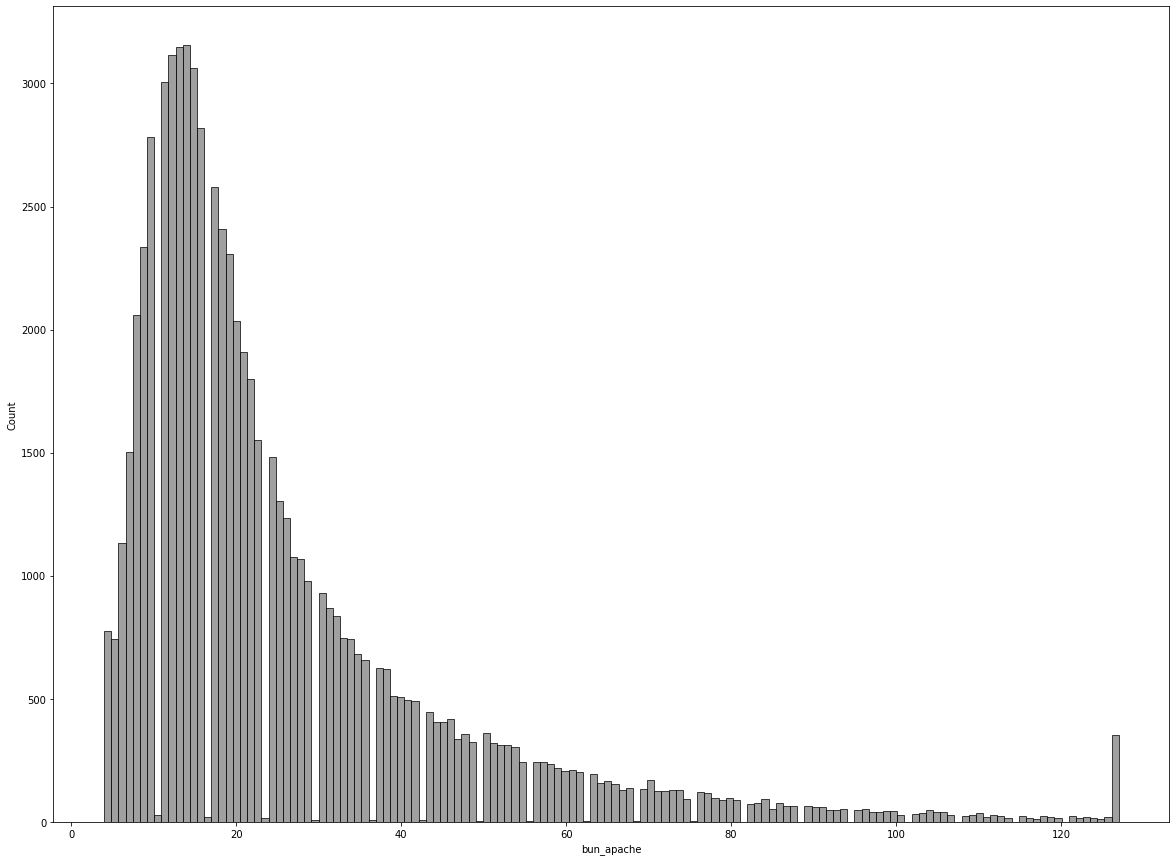

* creatinine_apache
tipo de datos: float64
Número de diferentes elementos de la columna creatinine_apache
1126
Número de elementos nulos: 18447 ( 0.21 )


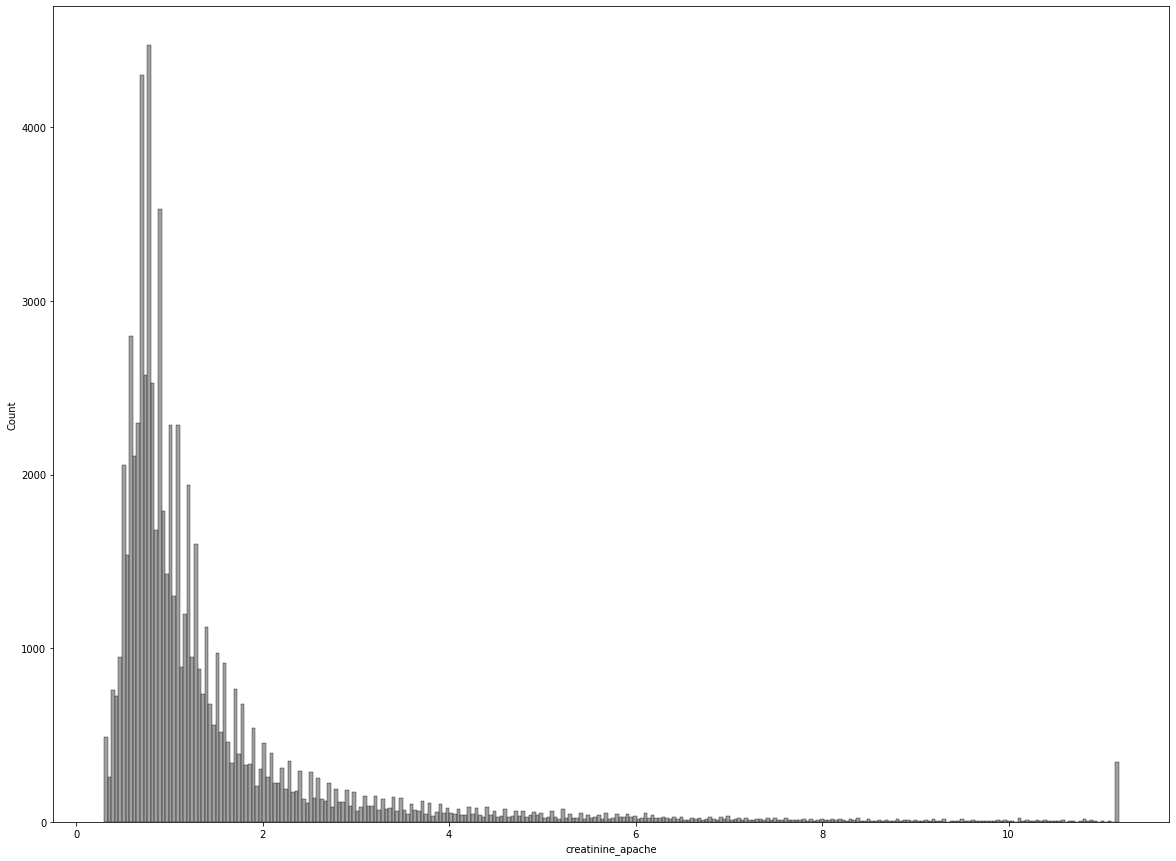

* fio2_apache
tipo de datos: float64
Número de diferentes elementos de la columna fio2_apache
83
Número de elementos nulos: 69525 ( 0.77 )


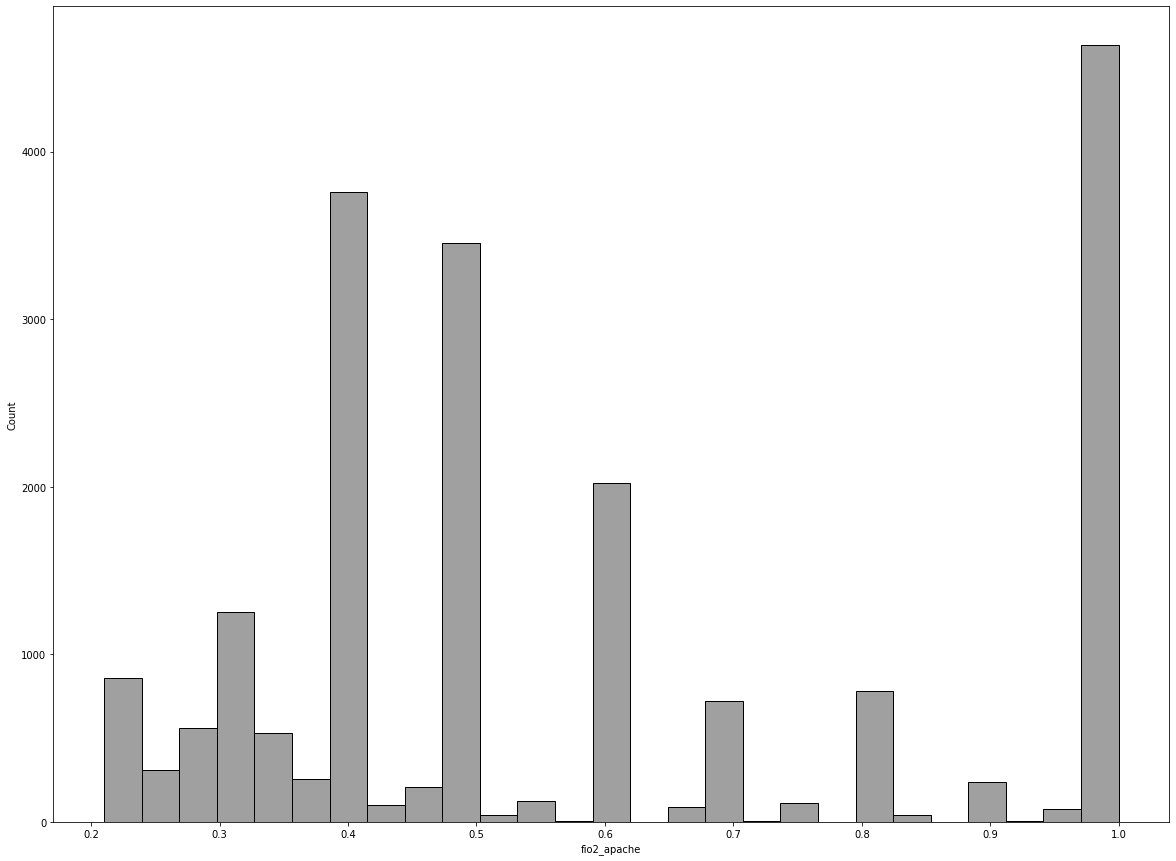

* gcs_eyes_apache
tipo de datos: float64
Número de diferentes elementos de la columna gcs_eyes_apache
5
Número de elementos nulos: 1850 ( 0.02 )


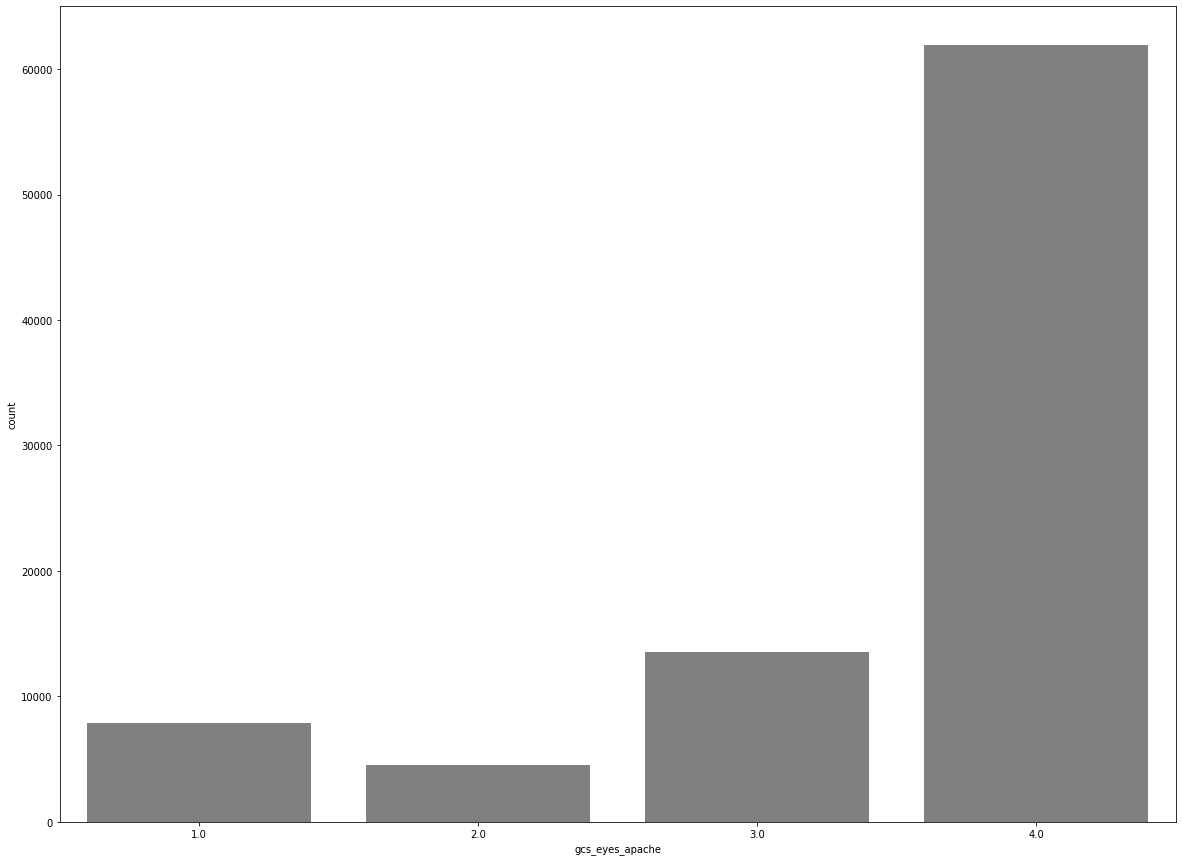

* gcs_motor_apache
tipo de datos: float64
Número de diferentes elementos de la columna gcs_motor_apache
7
Número de elementos nulos: 1850 ( 0.02 )


* gcs_unable_apache
tipo de datos: float64
Número de diferentes elementos de la columna gcs_unable_apache
3
Número de elementos nulos: 1010 ( 0.01 )


* gcs_verbal_apache
tipo de datos: float64
Número de diferentes elementos de la columna gcs_verbal_apache
6
Número de elementos nulos: 1850 ( 0.02 )


* glucose_apache
tipo de datos: float64
Número de diferentes elementos de la columna glucose_apache
566
Número de elementos nulos: 10795 ( 0.12 )


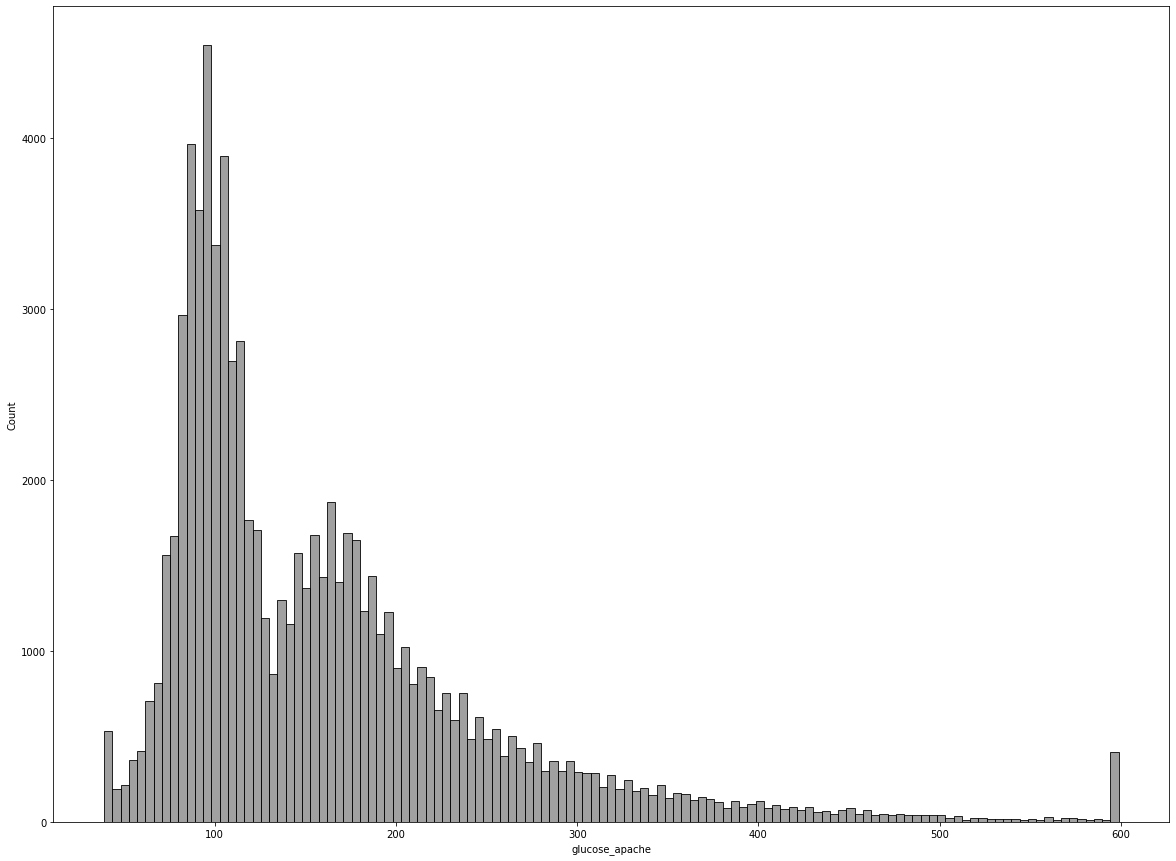

* heart_rate_apache
tipo de datos: float64
Número de diferentes elementos de la columna heart_rate_apache
150
Número de elementos nulos: 854 ( 0.01 )


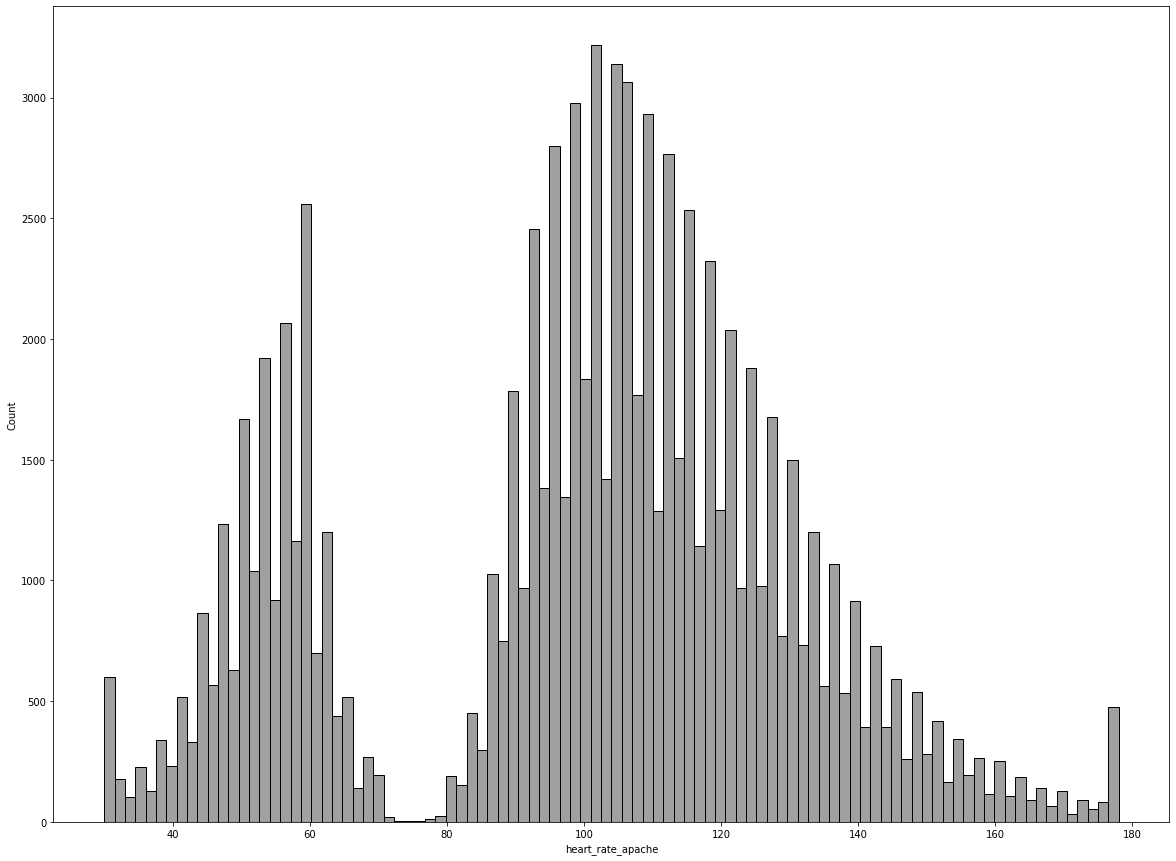

* hematocrit_apache
tipo de datos: float64
Número de diferentes elementos de la columna hematocrit_apache
354
Número de elementos nulos: 19447 ( 0.22 )


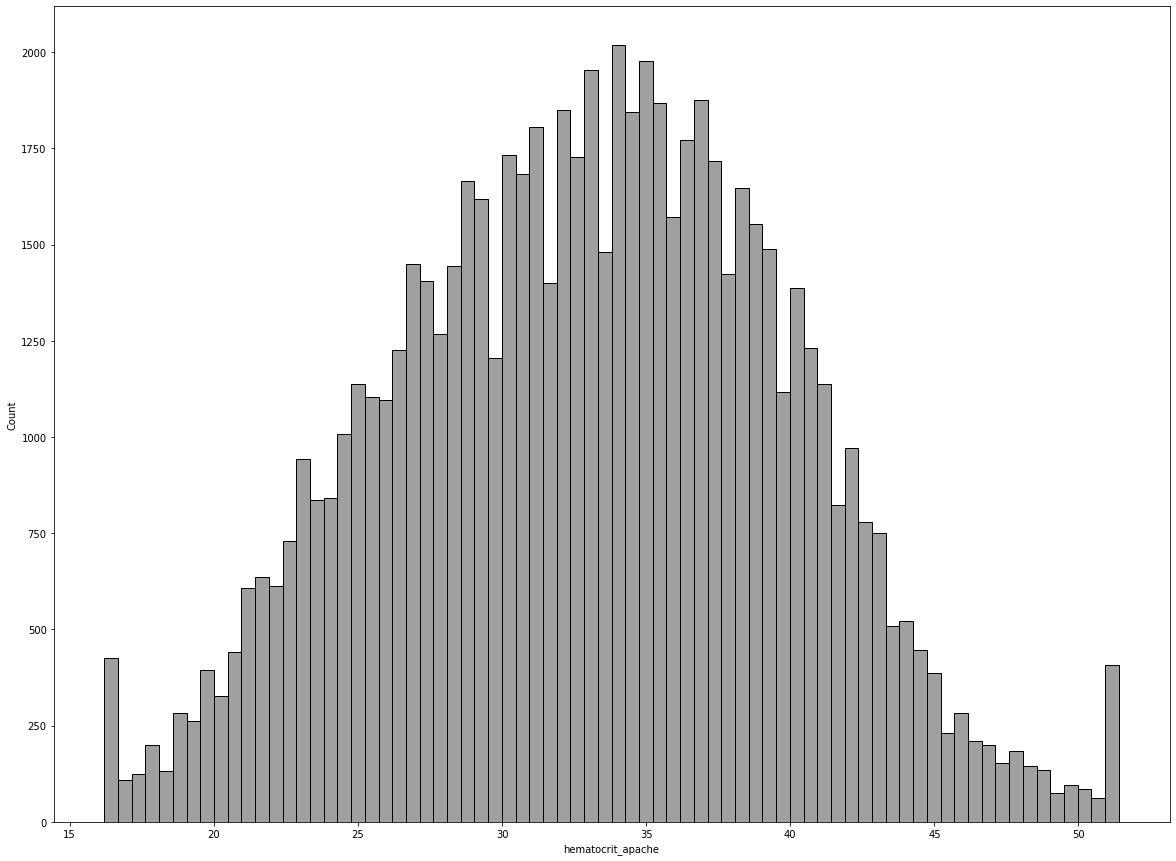

* intubated_apache
tipo de datos: float64
Número de diferentes elementos de la columna intubated_apache
3
Número de elementos nulos: 696 ( 0.01 )


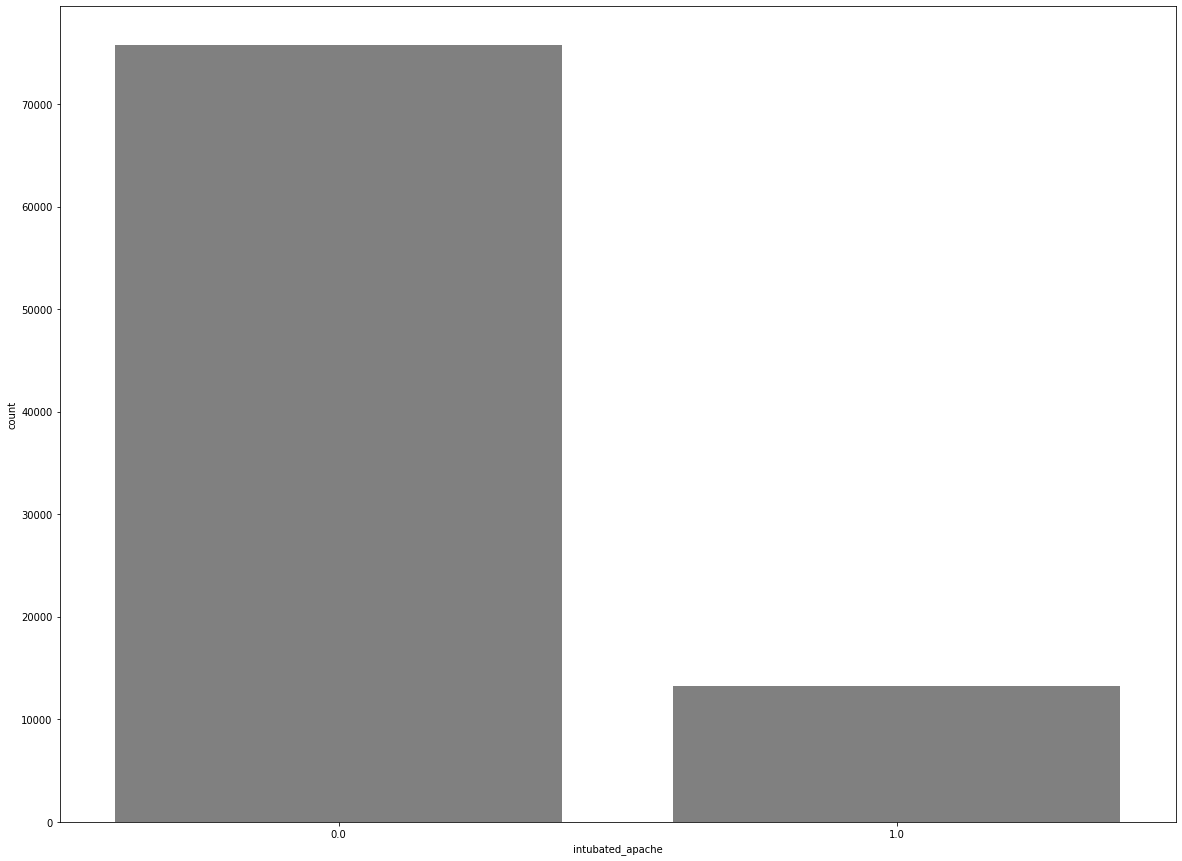

* map_apache
tipo de datos: float64
Número de diferentes elementos de la columna map_apache
162
Número de elementos nulos: 968 ( 0.01 )


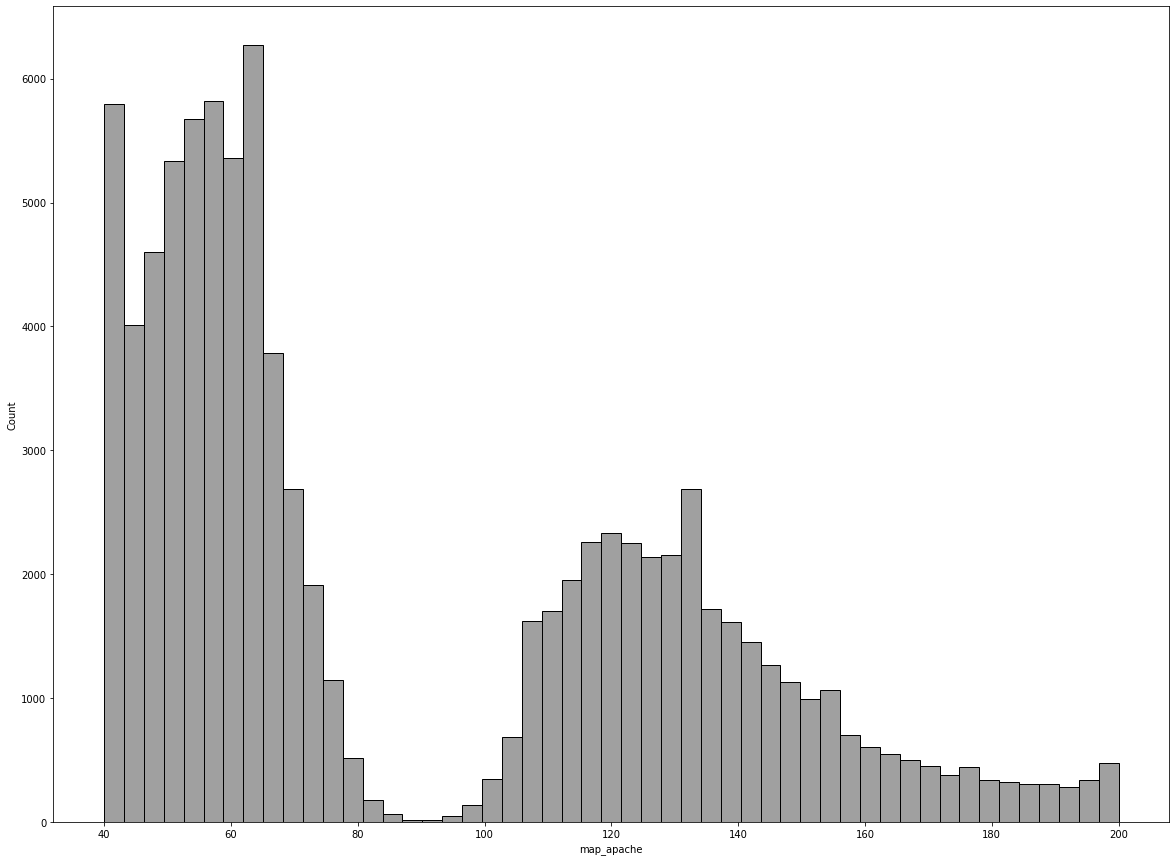

* paco2_apache
tipo de datos: float64
Número de diferentes elementos de la columna paco2_apache
703
Número de elementos nulos: 69525 ( 0.77 )


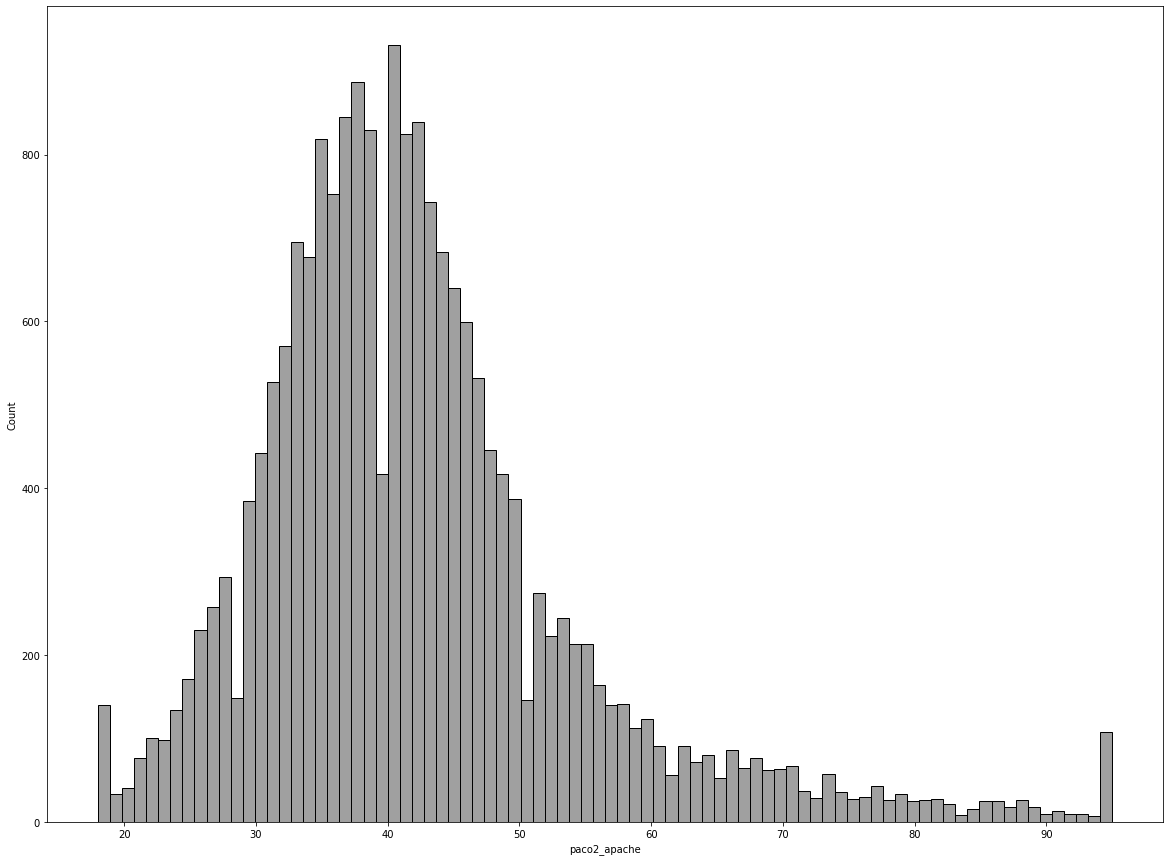

* paco2_for_ph_apache
tipo de datos: float64
Número de diferentes elementos de la columna paco2_for_ph_apache
703
Número de elementos nulos: 69525 ( 0.77 )


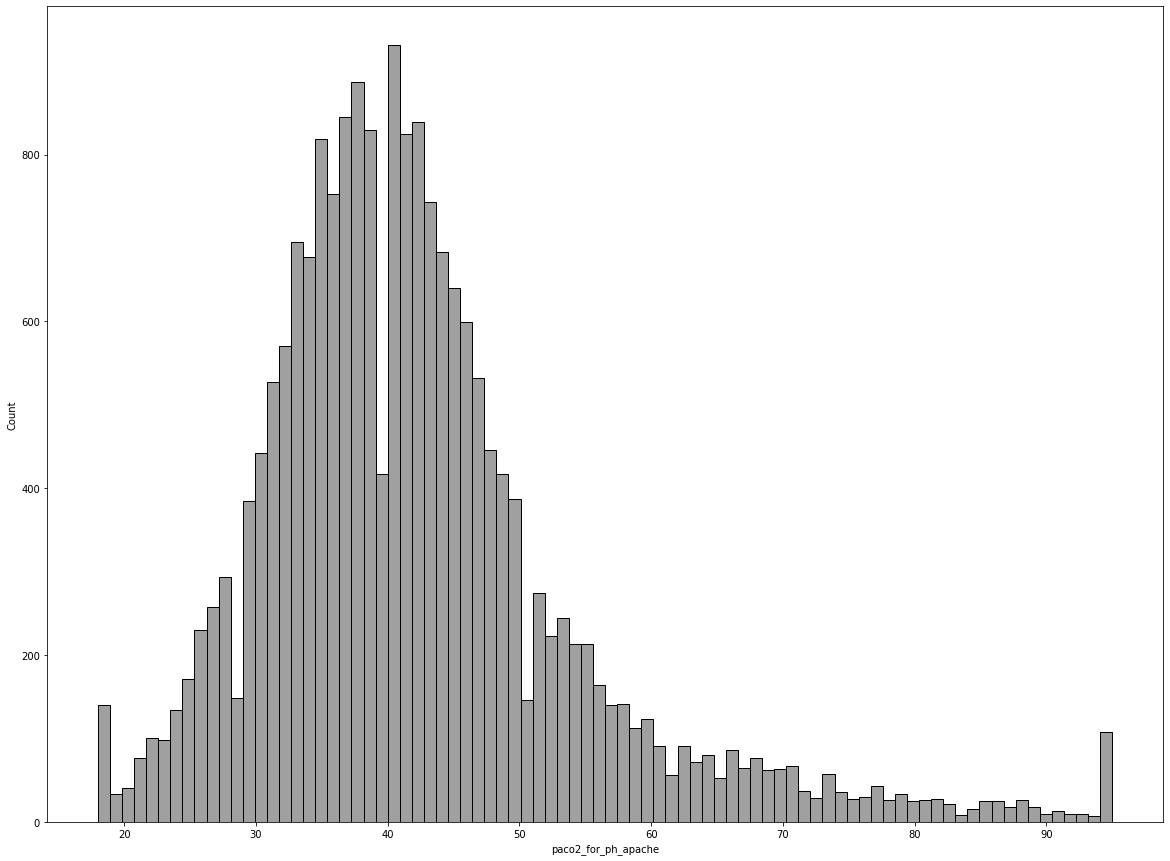

* pao2_apache
tipo de datos: float64
Número de diferentes elementos de la columna pao2_apache
1975
Número de elementos nulos: 69525 ( 0.77 )


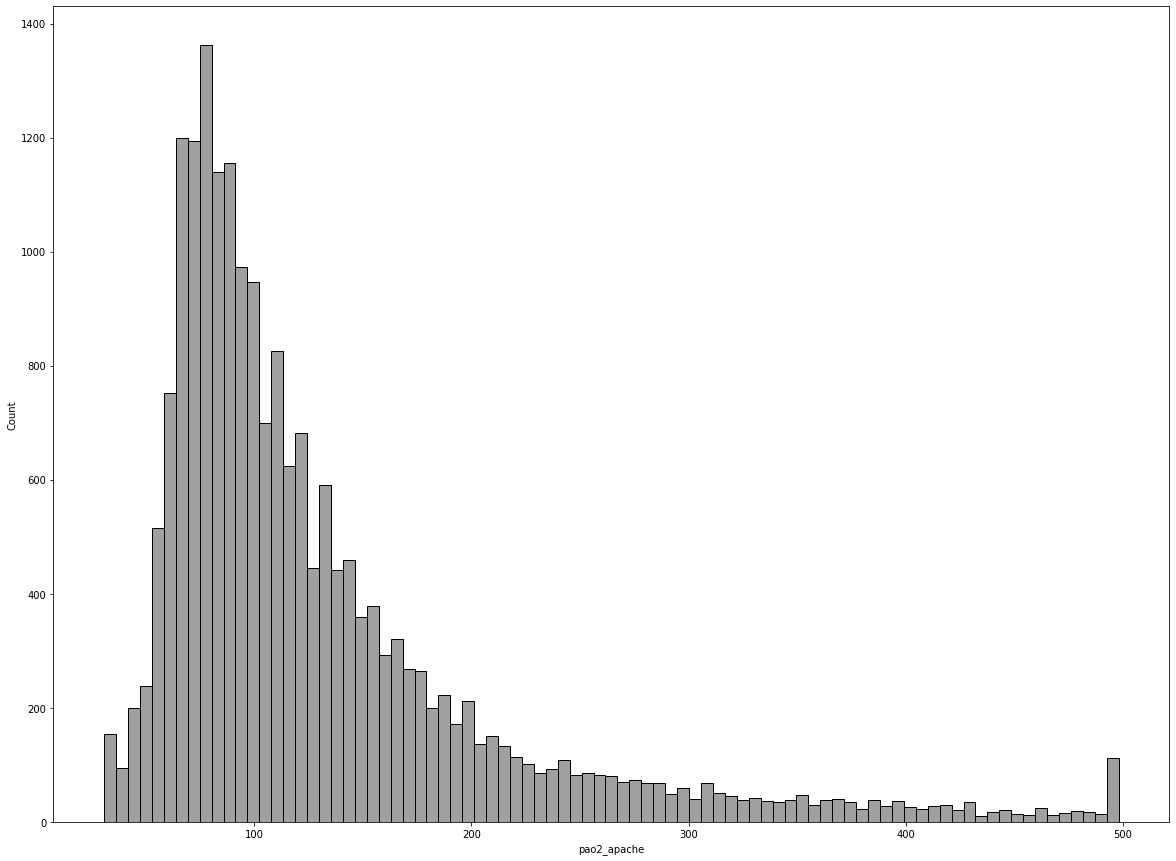

* ph_apache
tipo de datos: float64
Número de diferentes elementos de la columna ph_apache
551
Número de elementos nulos: 69525 ( 0.77 )


* resprate_apache
tipo de datos: float64
Número de diferentes elementos de la columna resprate_apache
75
Número de elementos nulos: 1201 ( 0.01 )


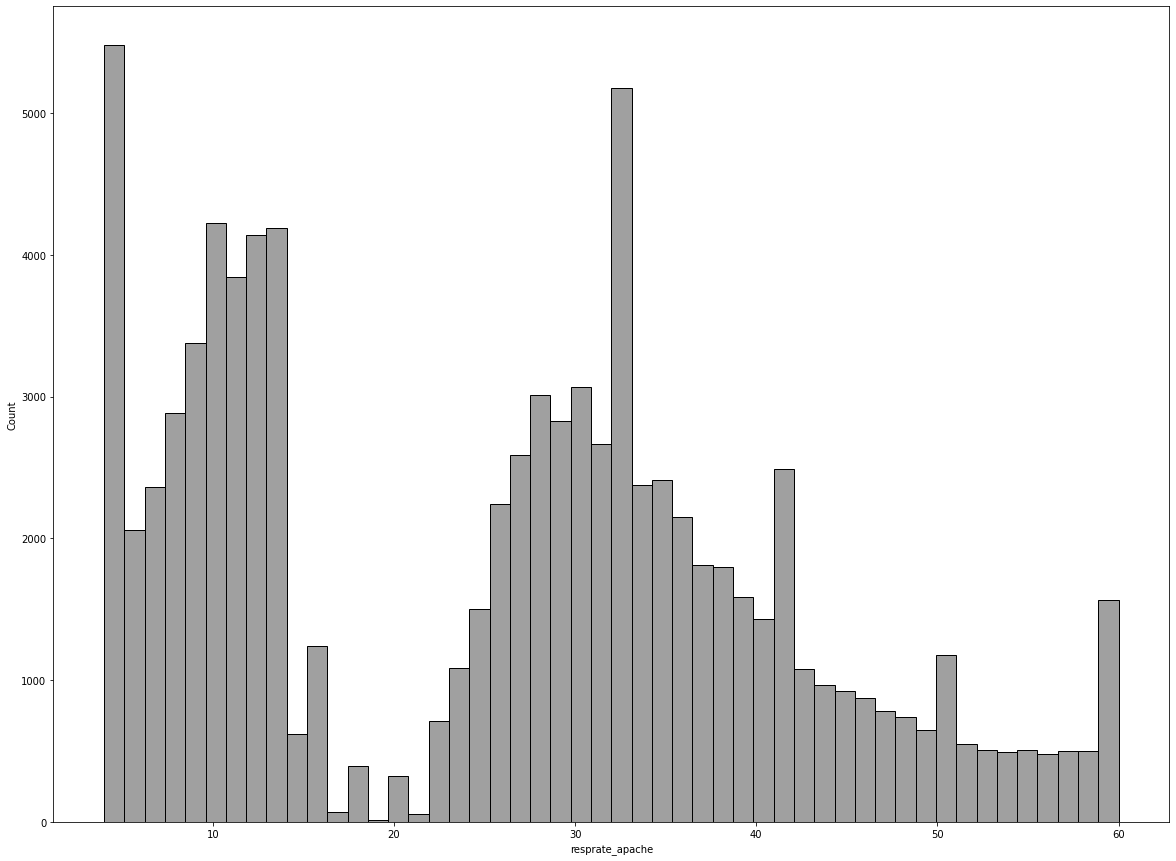

* sodium_apache
tipo de datos: float64
Número de diferentes elementos de la columna sodium_apache
116
Número de elementos nulos: 18208 ( 0.2 )


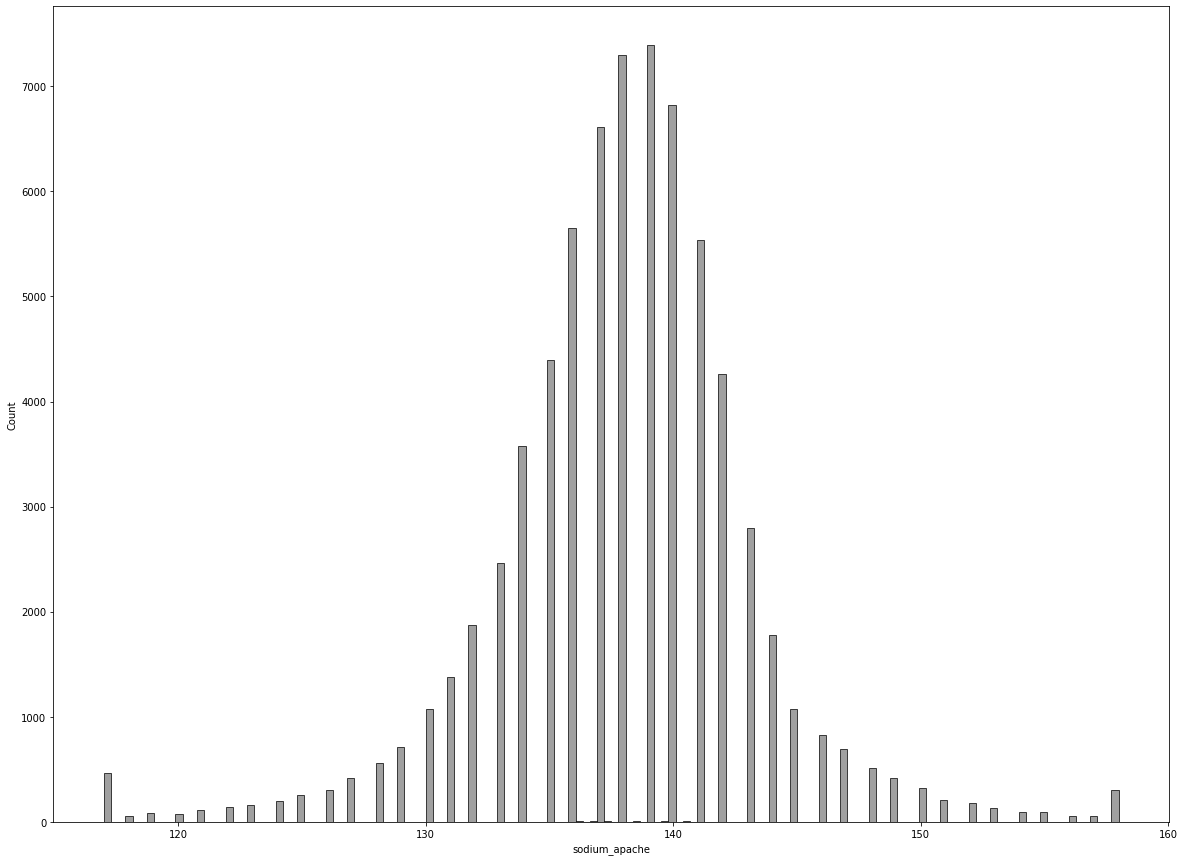

* temp_apache
tipo de datos: float64
Número de diferentes elementos de la columna temp_apache
190
Número de elementos nulos: 4009 ( 0.04 )


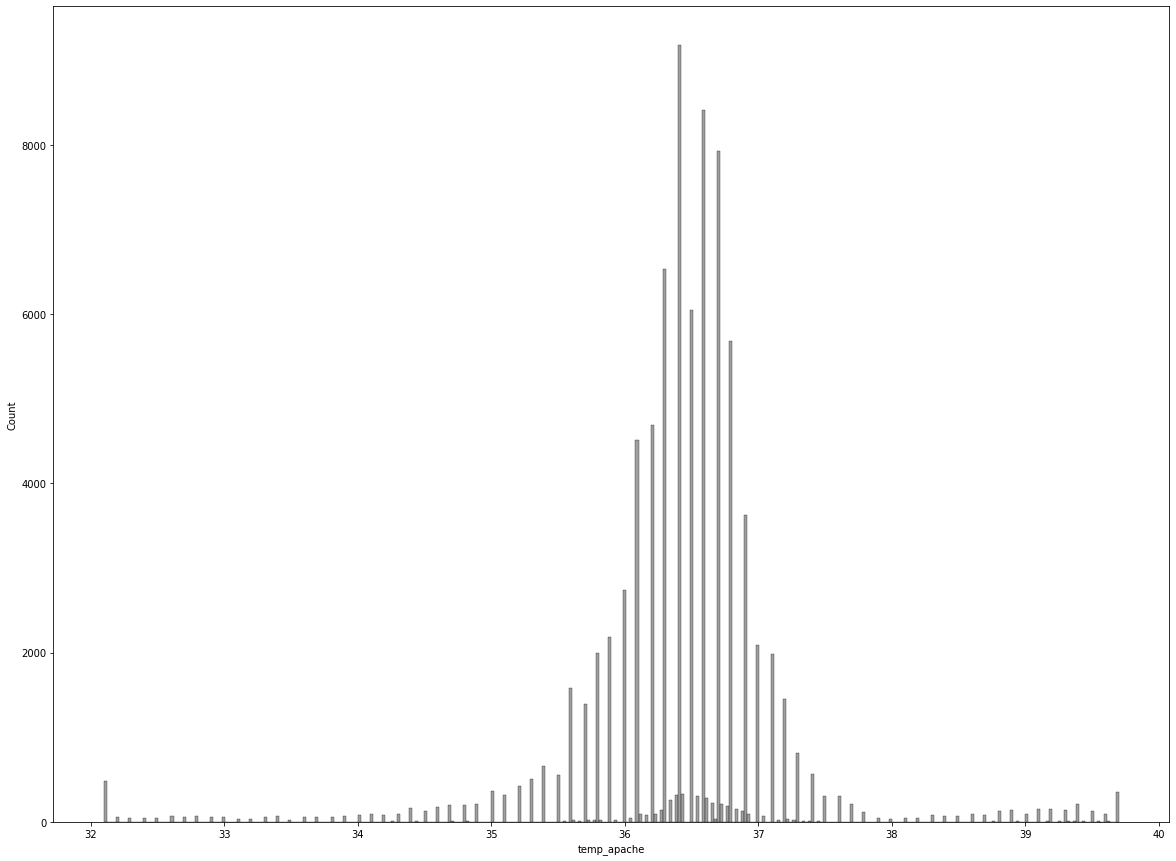

* urineoutput_apache
tipo de datos: float64
Número de diferentes elementos de la columna urineoutput_apache
24465
Número de elementos nulos: 47868 ( 0.53 )


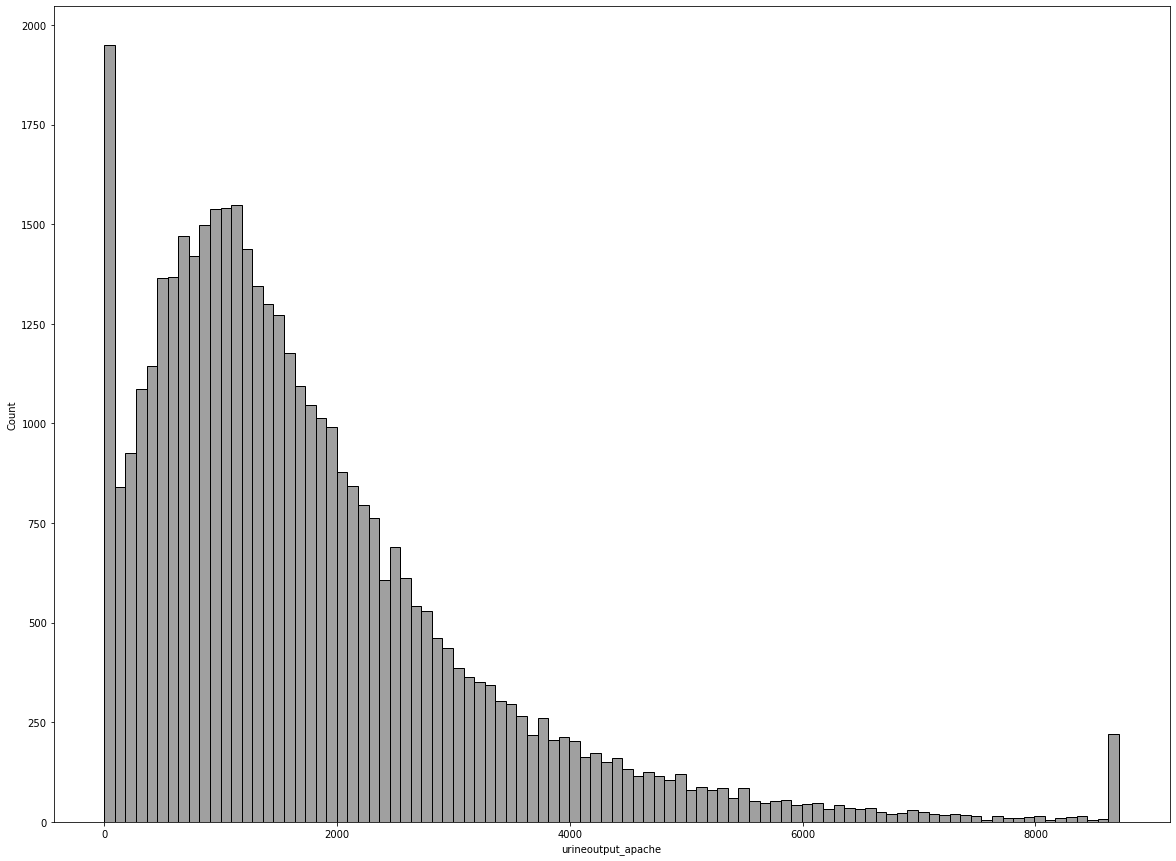

* ventilated_apache
tipo de datos: float64
Número de diferentes elementos de la columna ventilated_apache
3
Número de elementos nulos: 696 ( 0.01 )


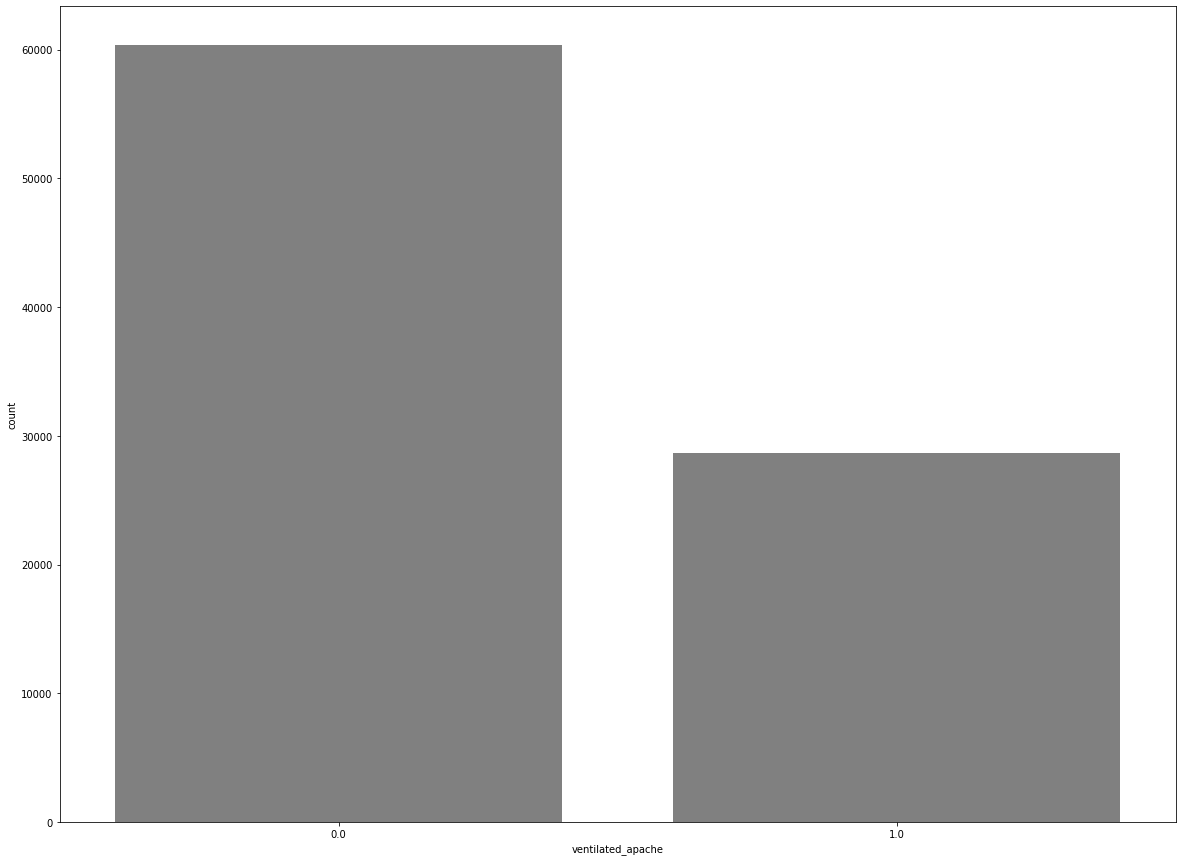

* wbc_apache
tipo de datos: float64
Número de diferentes elementos de la columna wbc_apache
3047
Número de elementos nulos: 21536 ( 0.24 )


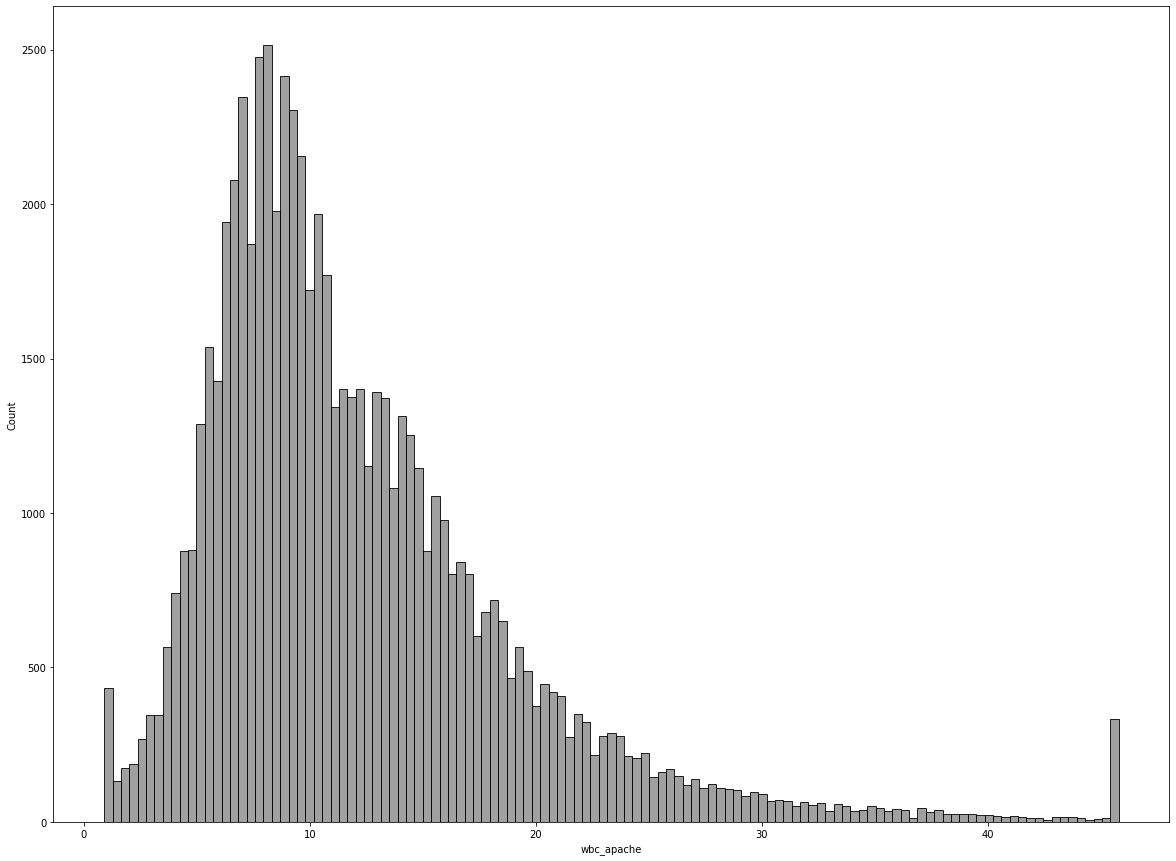

* d1_diasbp_invasive_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_diasbp_invasive_max
146
Número de elementos nulos: 66587 ( 0.74 )


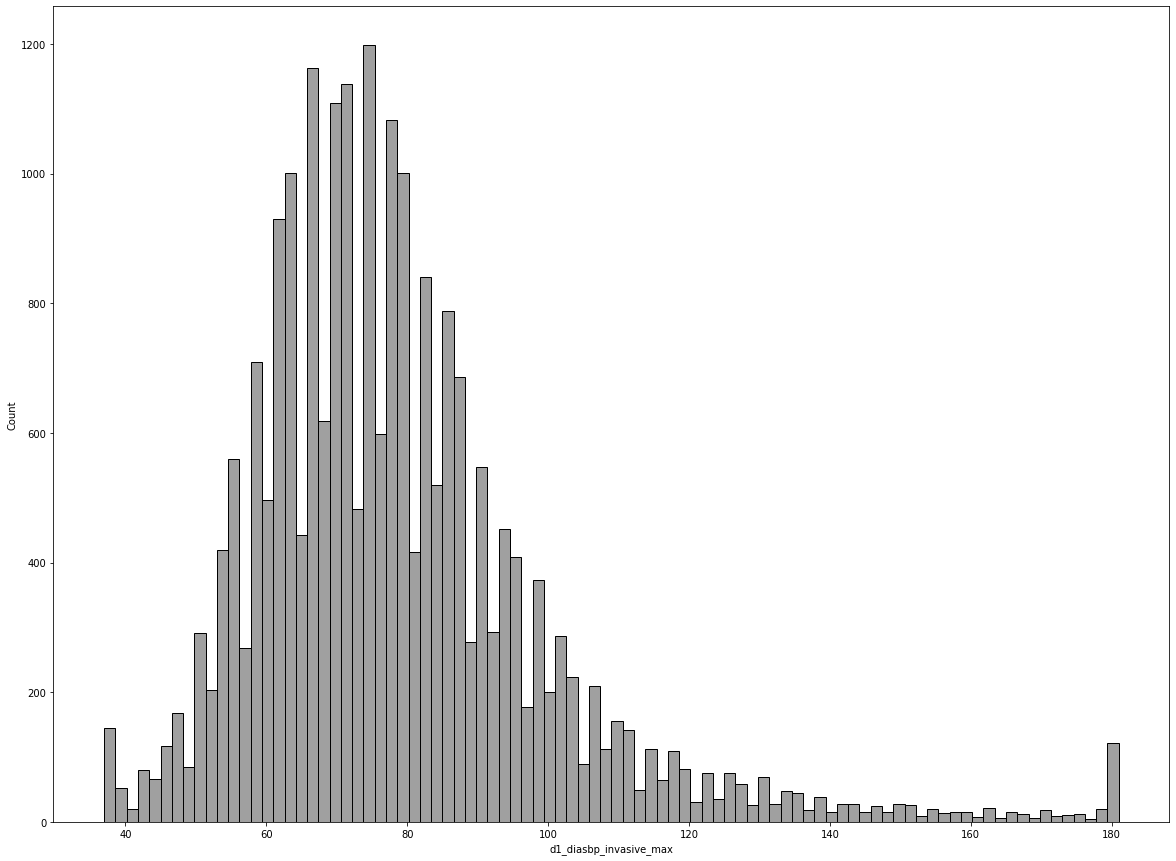

* d1_diasbp_invasive_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_diasbp_invasive_min
86
Número de elementos nulos: 66587 ( 0.74 )


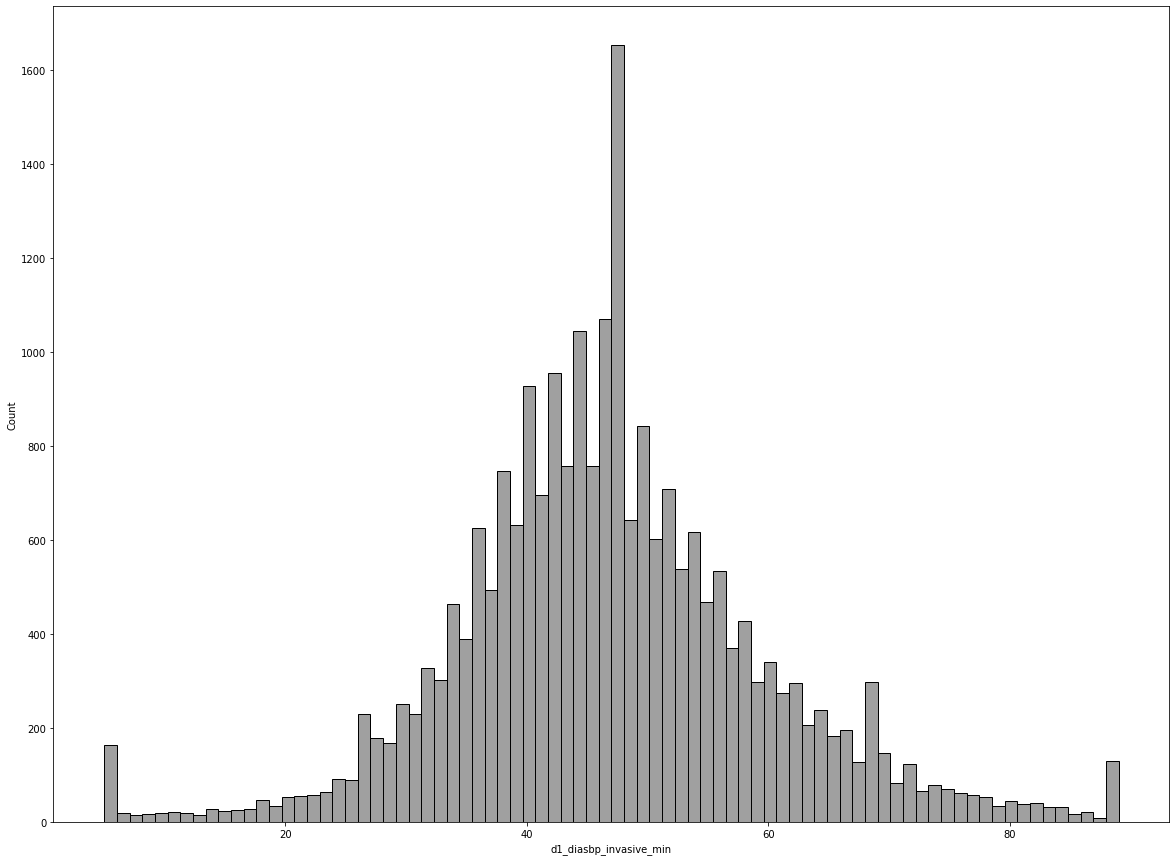

* d1_diasbp_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_diasbp_max
121
Número de elementos nulos: 157 ( 0.0 )


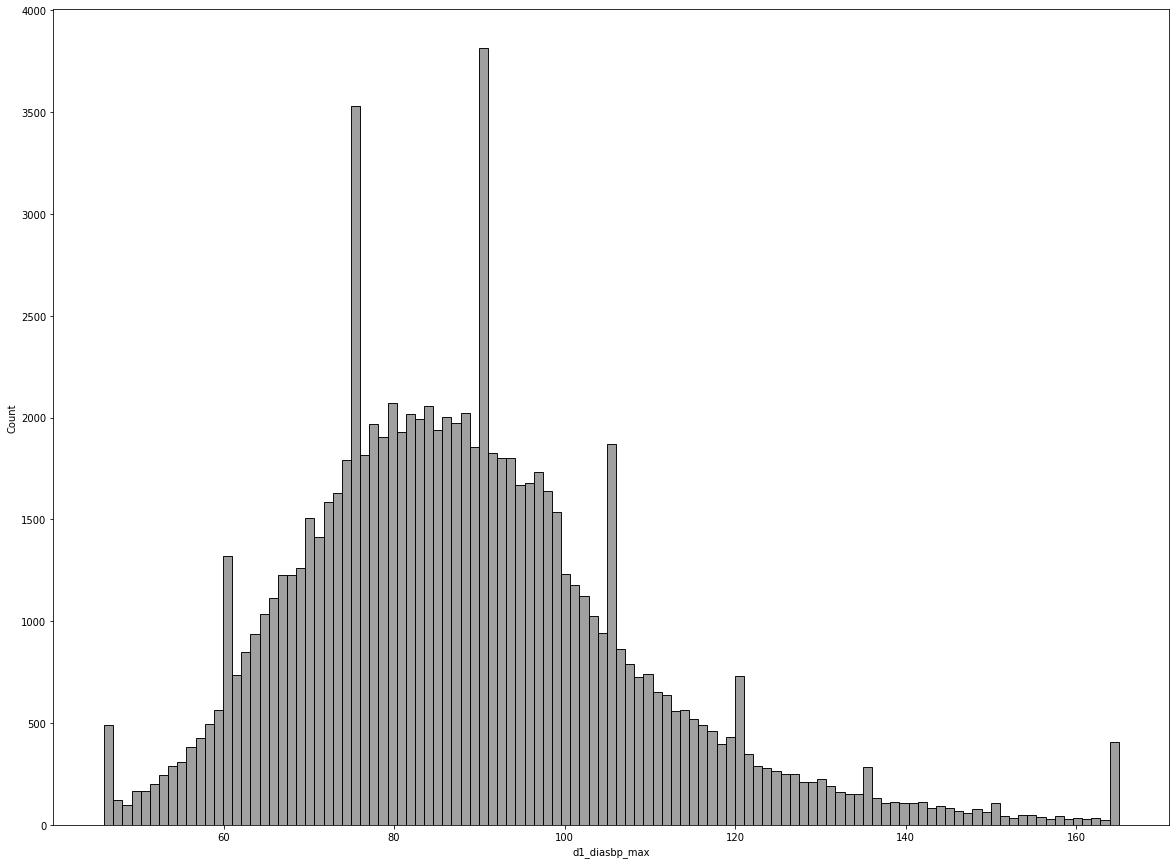

* d1_diasbp_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_diasbp_min
79
Número de elementos nulos: 157 ( 0.0 )


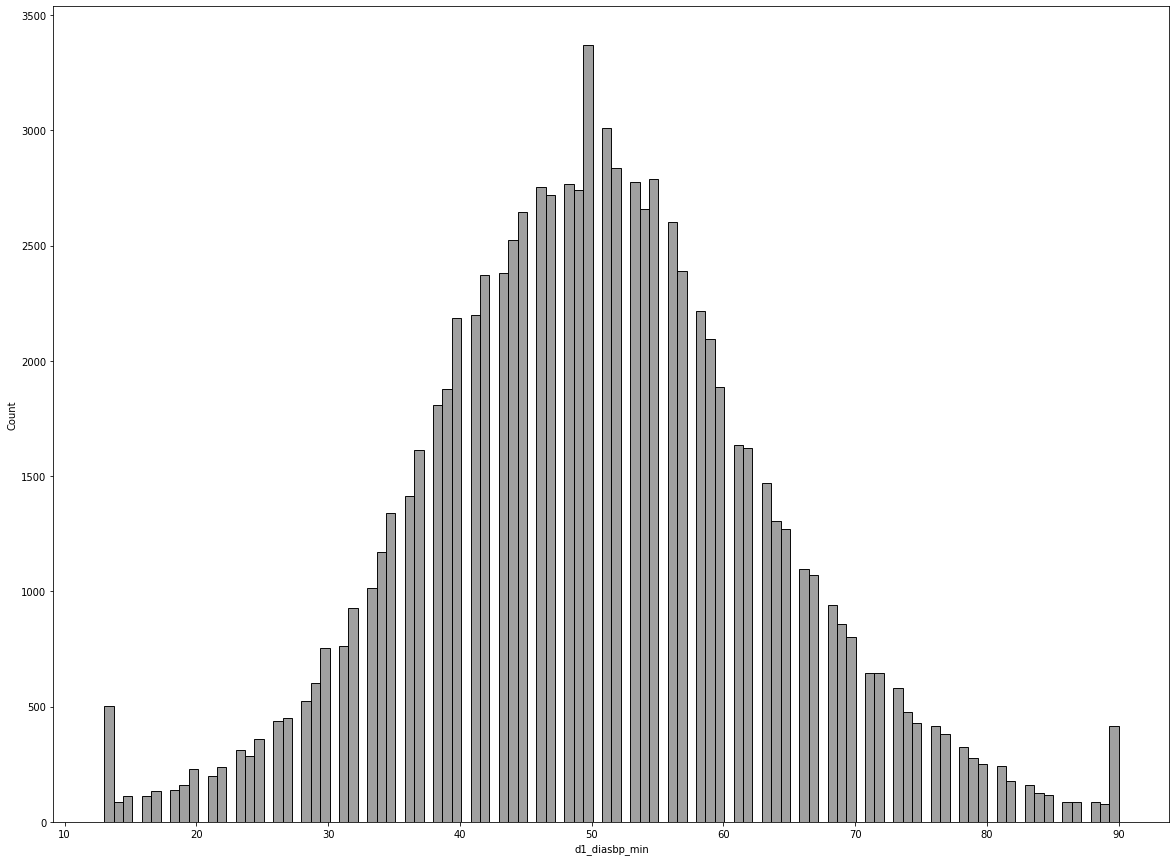

* d1_diasbp_noninvasive_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_diasbp_noninvasive_max
121
Número de elementos nulos: 1006 ( 0.01 )


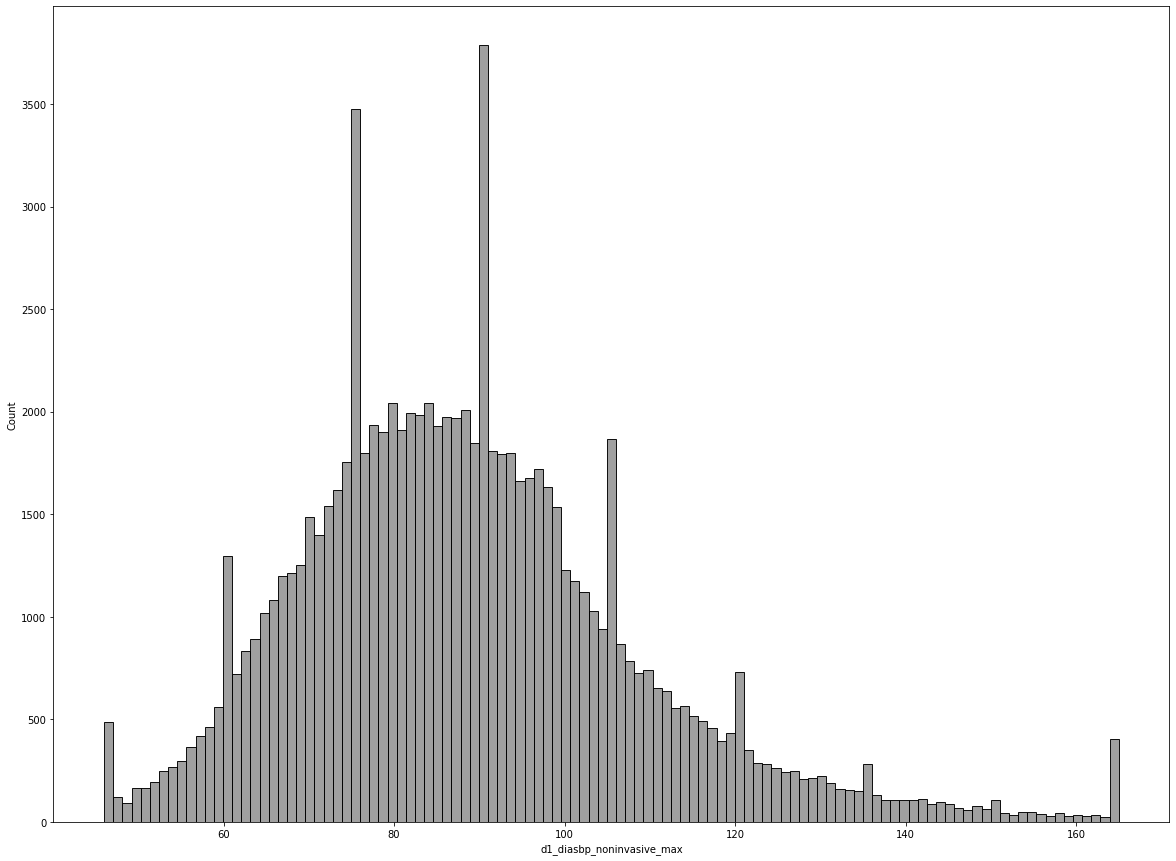

* d1_diasbp_noninvasive_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_diasbp_noninvasive_min
79
Número de elementos nulos: 1006 ( 0.01 )


* d1_heartrate_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_heartrate_max
121
Número de elementos nulos: 139 ( 0.0 )


* d1_heartrate_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_heartrate_min
155
Número de elementos nulos: 139 ( 0.0 )


* d1_mbp_invasive_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_mbp_invasive_max
286
Número de elementos nulos: 66384 ( 0.74 )


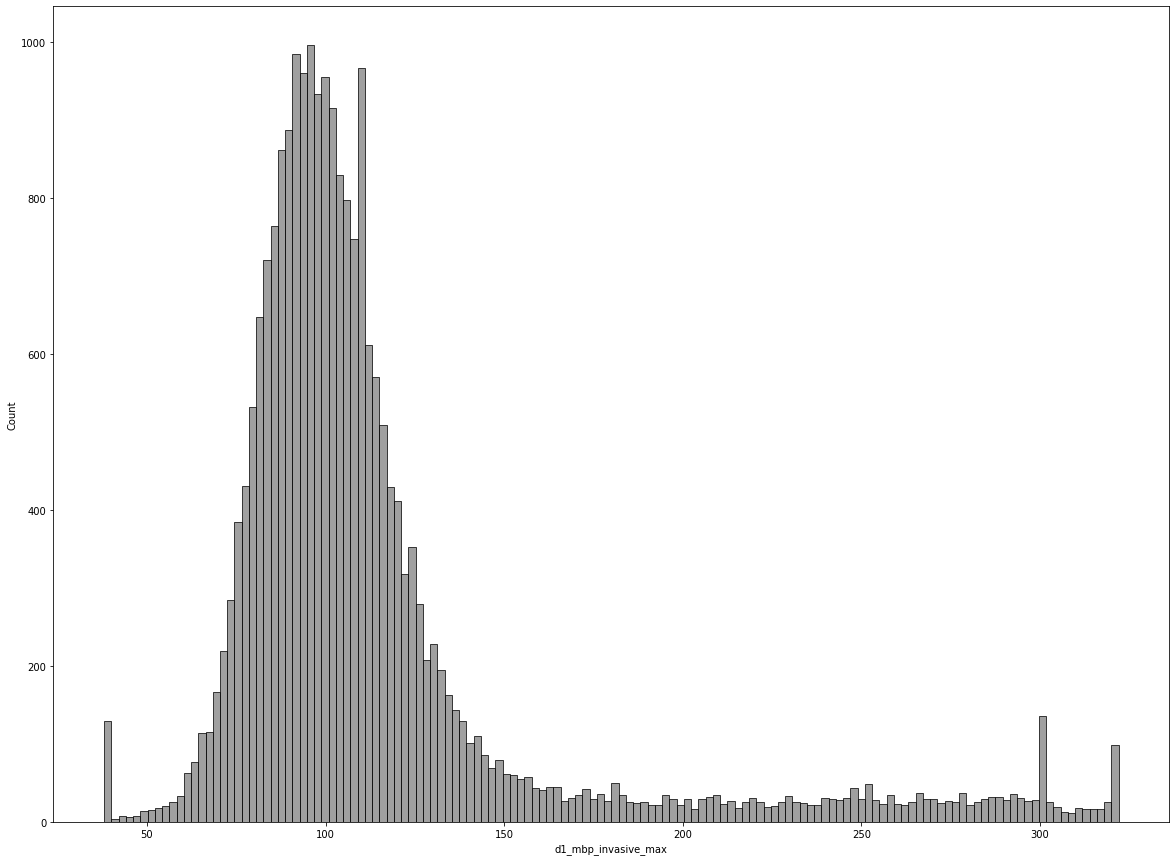

* d1_mbp_invasive_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_mbp_invasive_min
119
Número de elementos nulos: 66384 ( 0.74 )


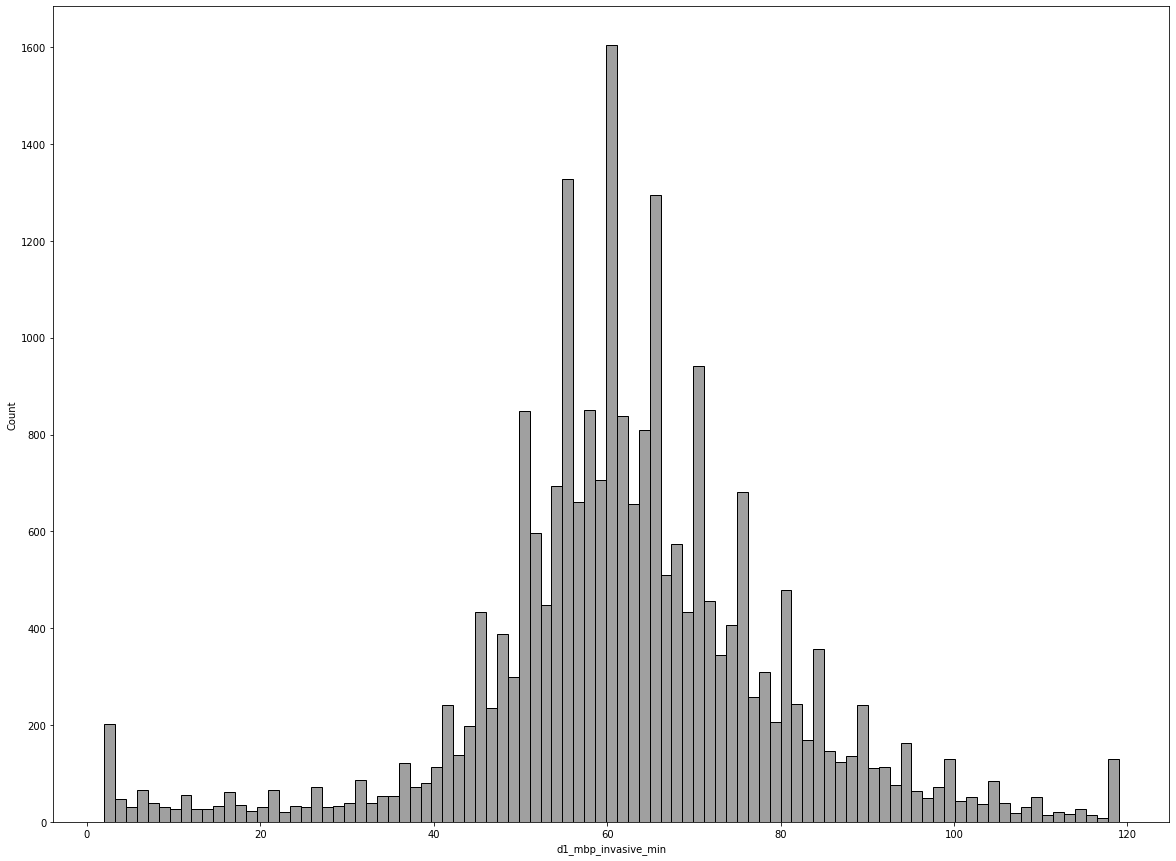

* d1_mbp_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_mbp_max
126
Número de elementos nulos: 213 ( 0.0 )


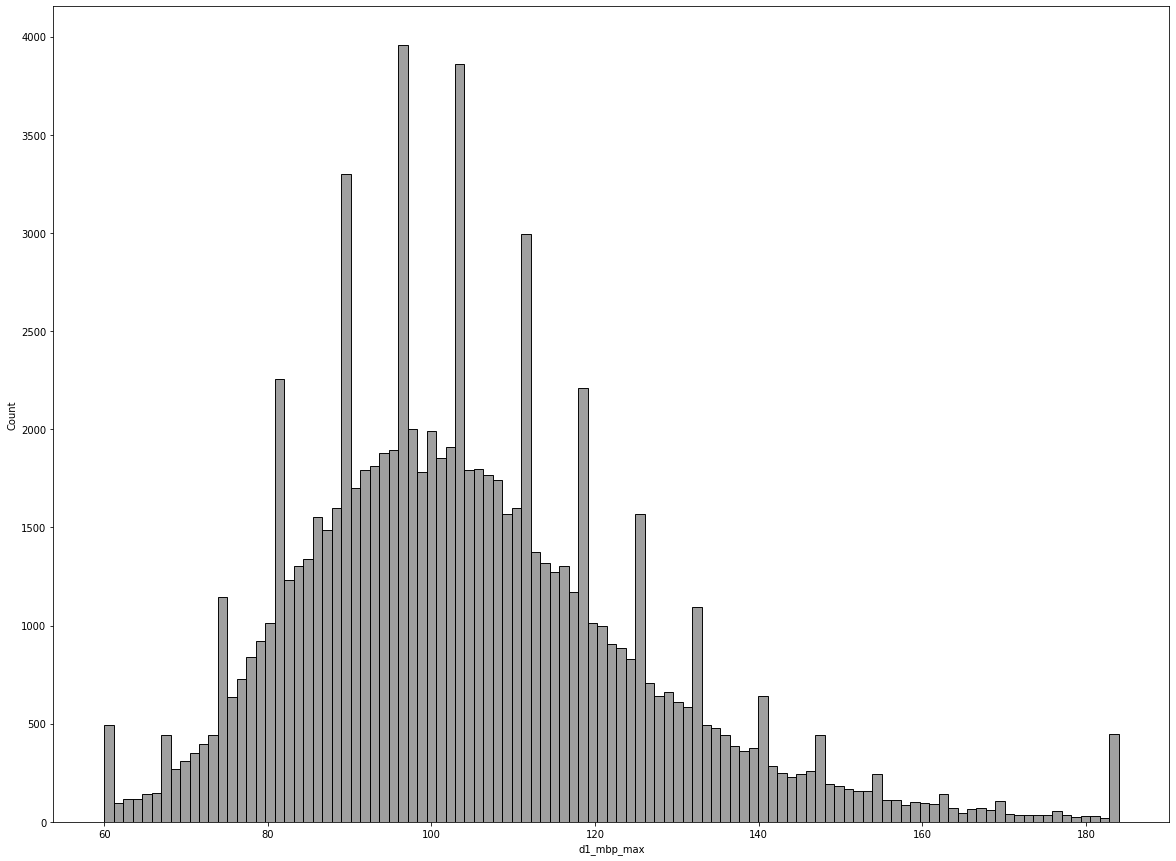

* d1_mbp_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_mbp_min
92
Número de elementos nulos: 213 ( 0.0 )


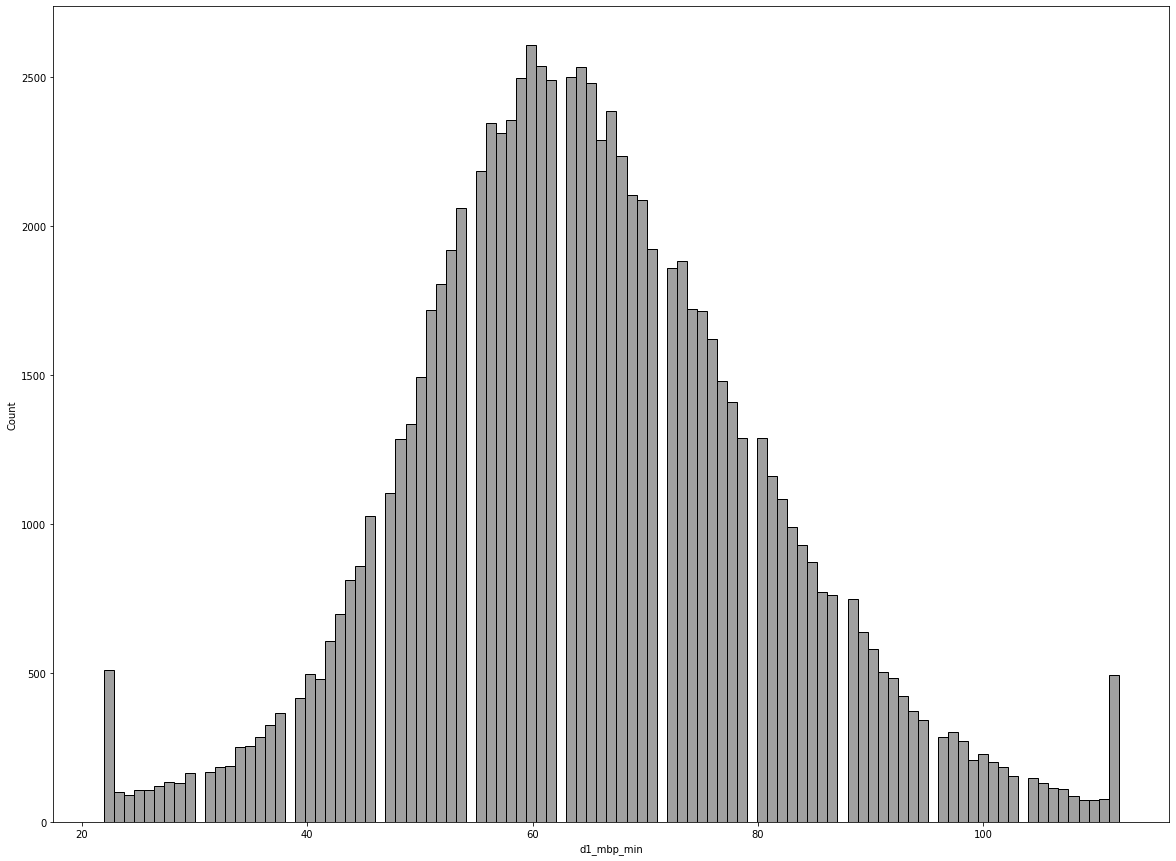

* d1_mbp_noninvasive_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_mbp_noninvasive_max
123
Número de elementos nulos: 1439 ( 0.02 )


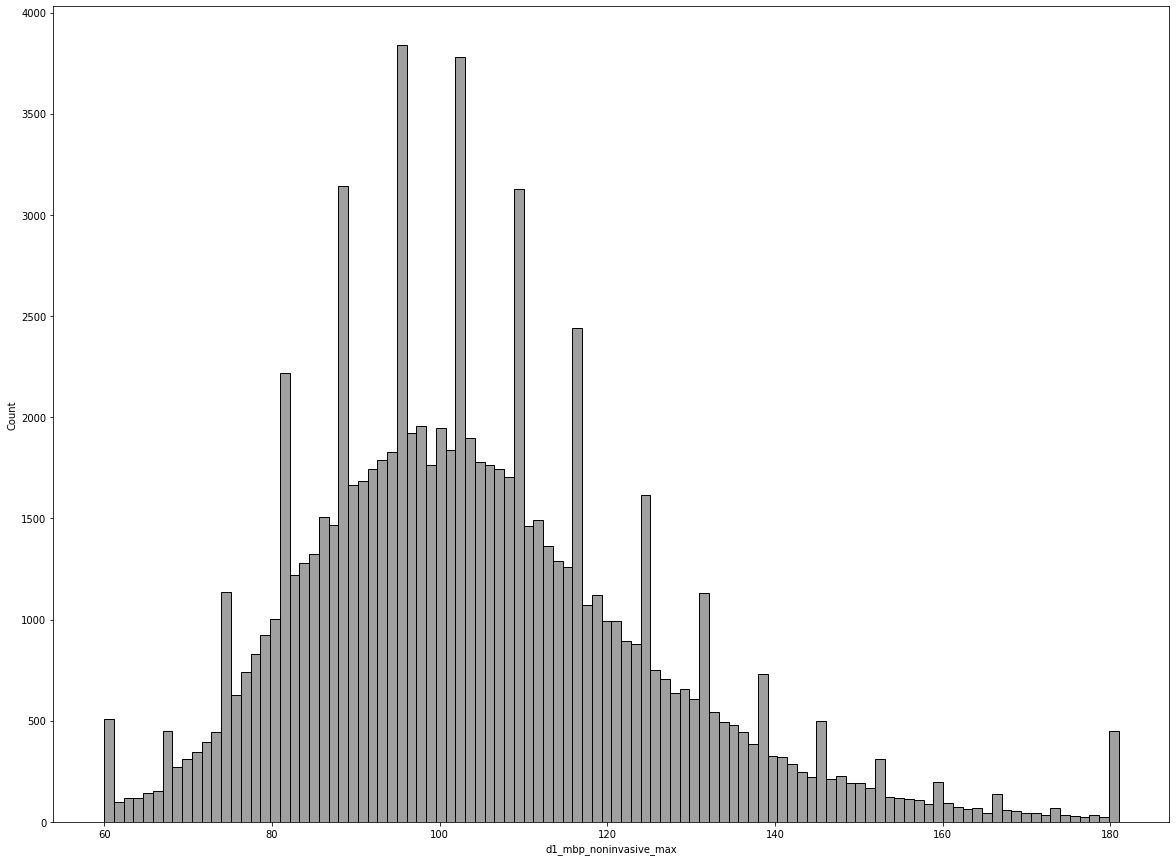

* d1_mbp_noninvasive_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_mbp_noninvasive_min
92
Número de elementos nulos: 1439 ( 0.02 )


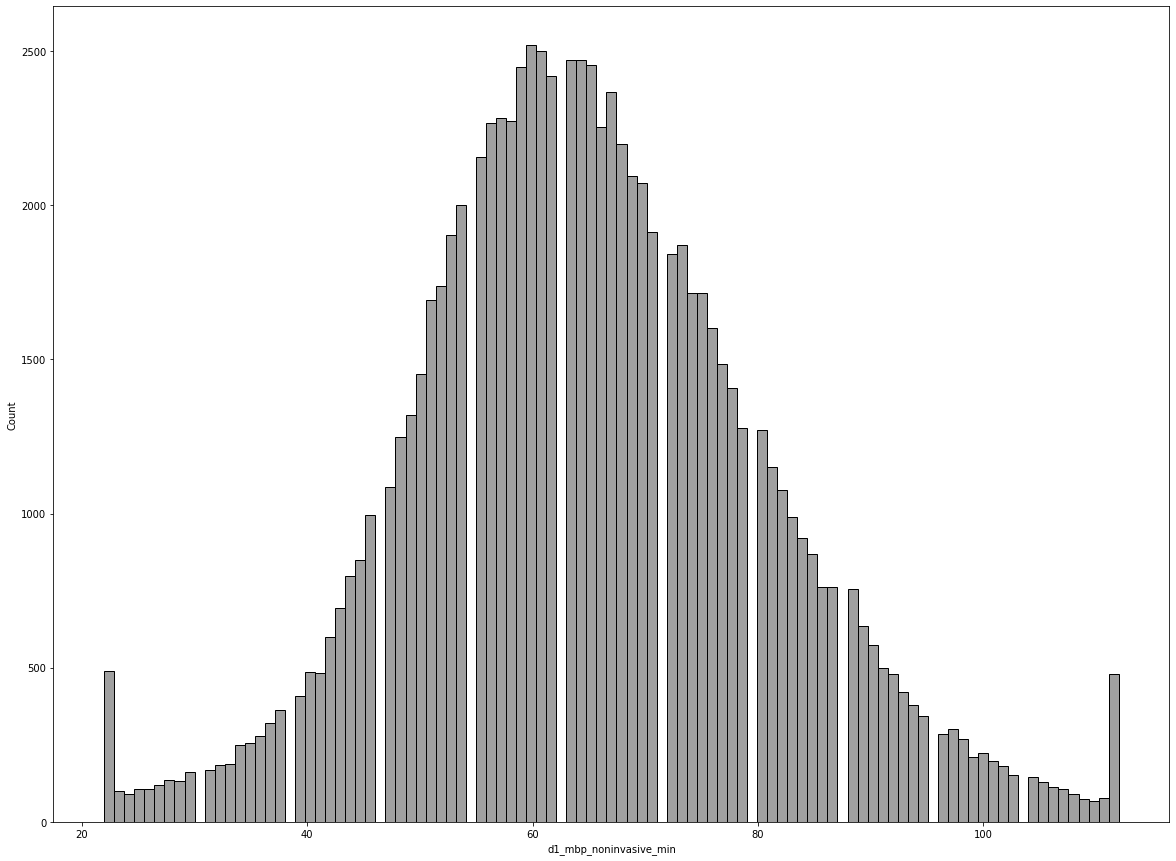

* d1_resprate_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_resprate_max
80
Número de elementos nulos: 371 ( 0.0 )


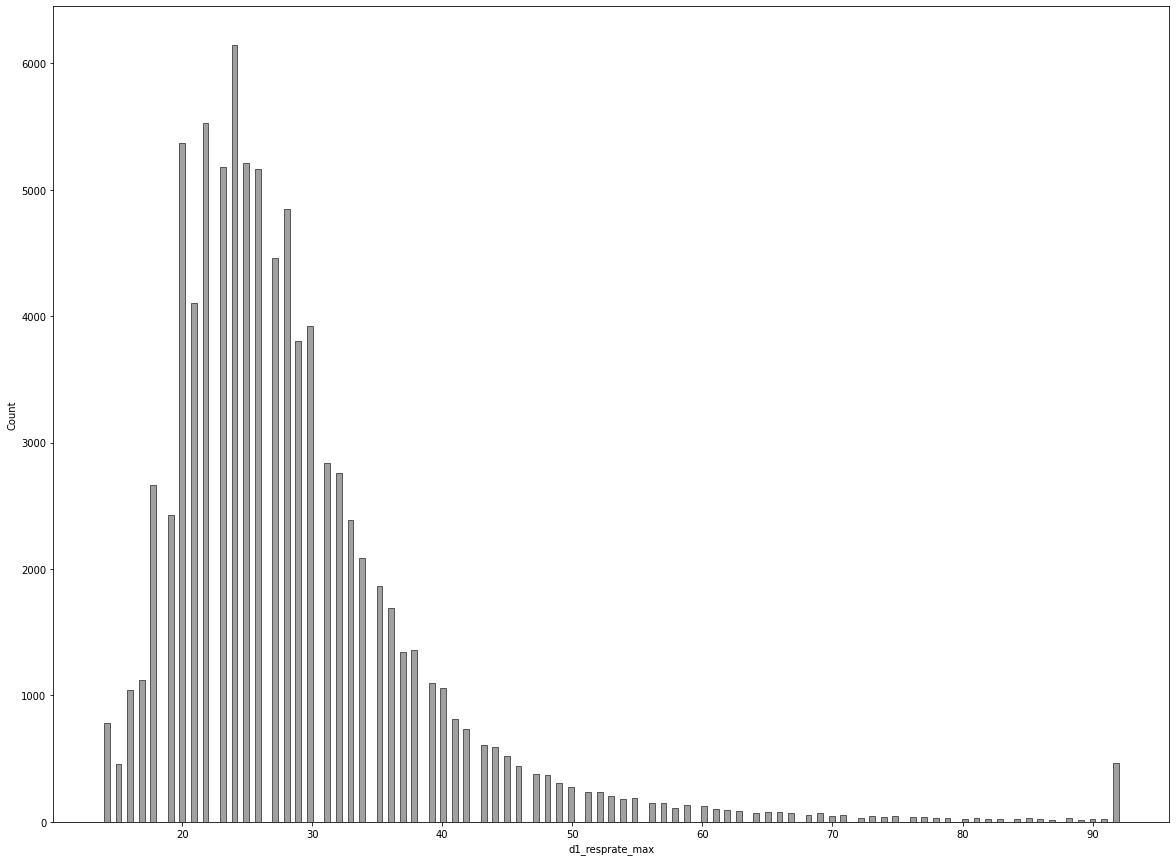

* d1_resprate_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_resprate_min
56
Número de elementos nulos: 371 ( 0.0 )


* d1_spo2_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_spo2_max
44
Número de elementos nulos: 322 ( 0.0 )


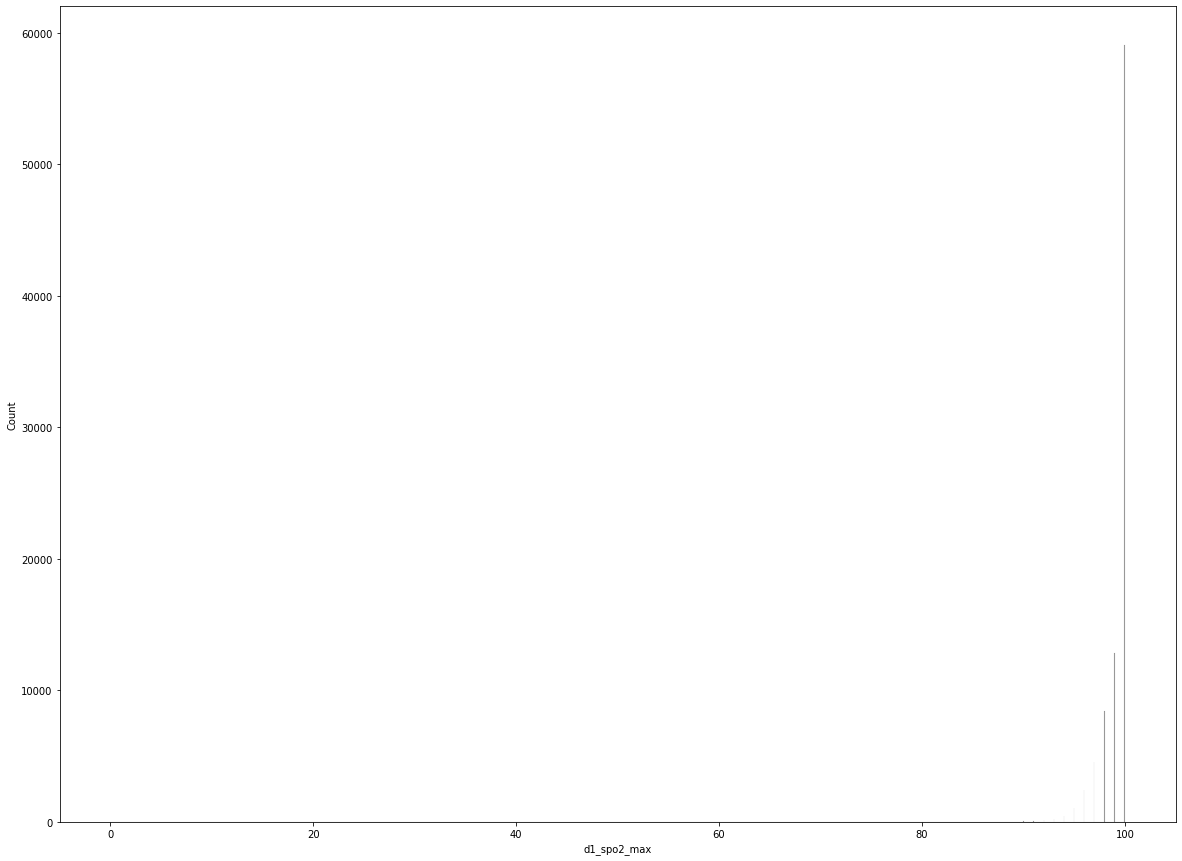

* d1_spo2_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_spo2_min
102
Número de elementos nulos: 322 ( 0.0 )


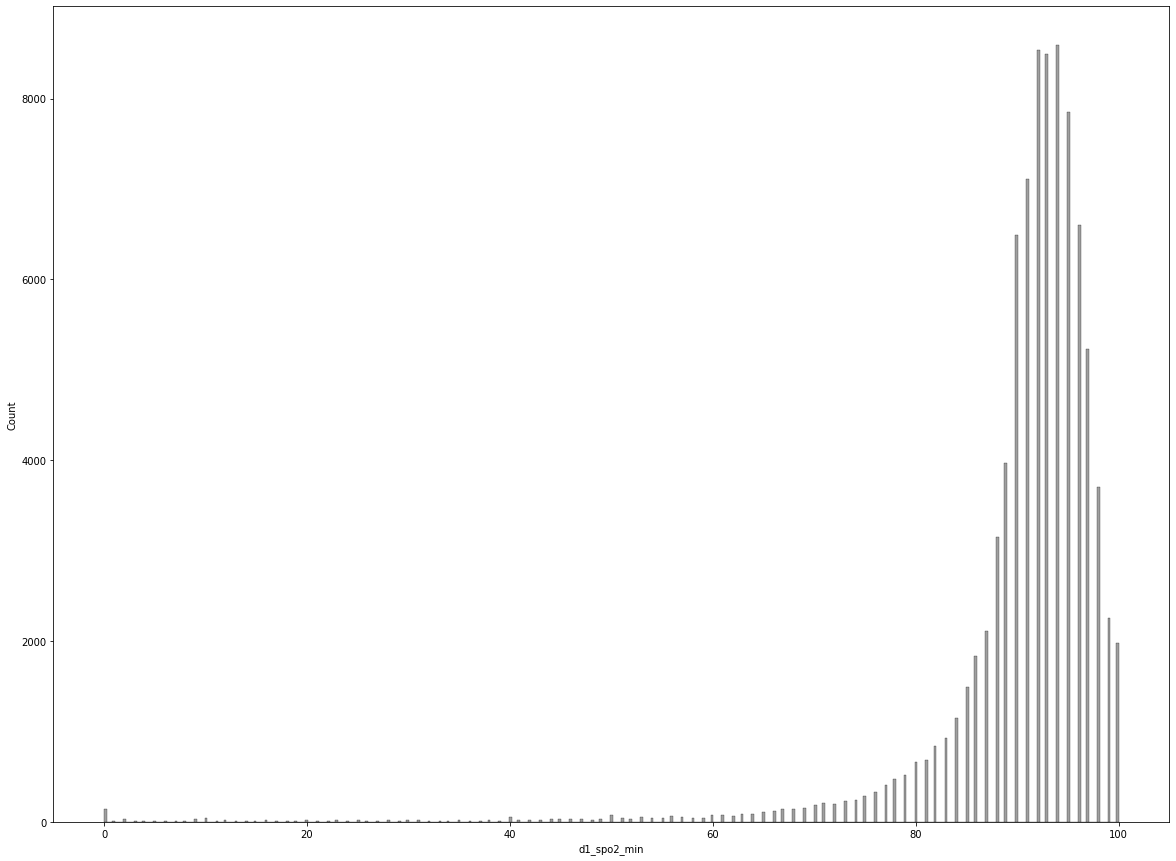

* d1_sysbp_invasive_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_sysbp_invasive_max
226
Número de elementos nulos: 66563 ( 0.74 )


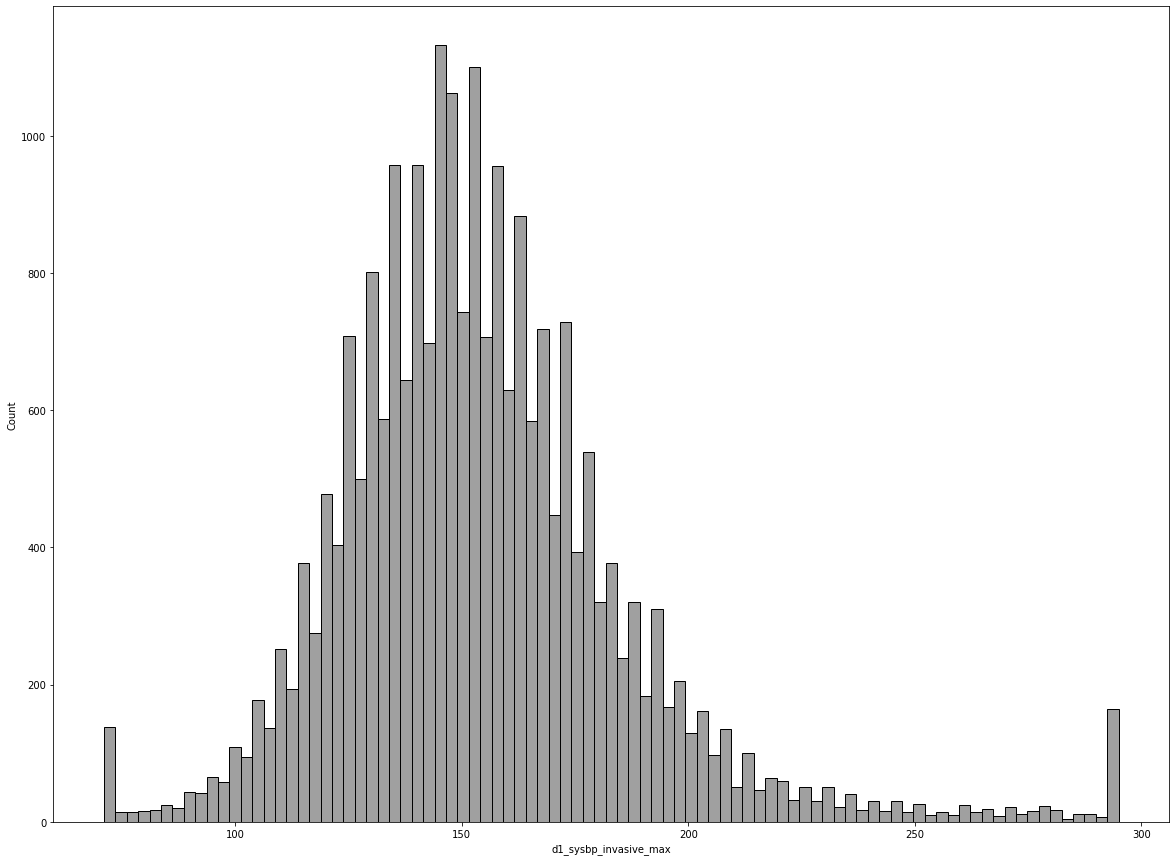

* d1_sysbp_invasive_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_sysbp_invasive_min
164
Número de elementos nulos: 66563 ( 0.74 )


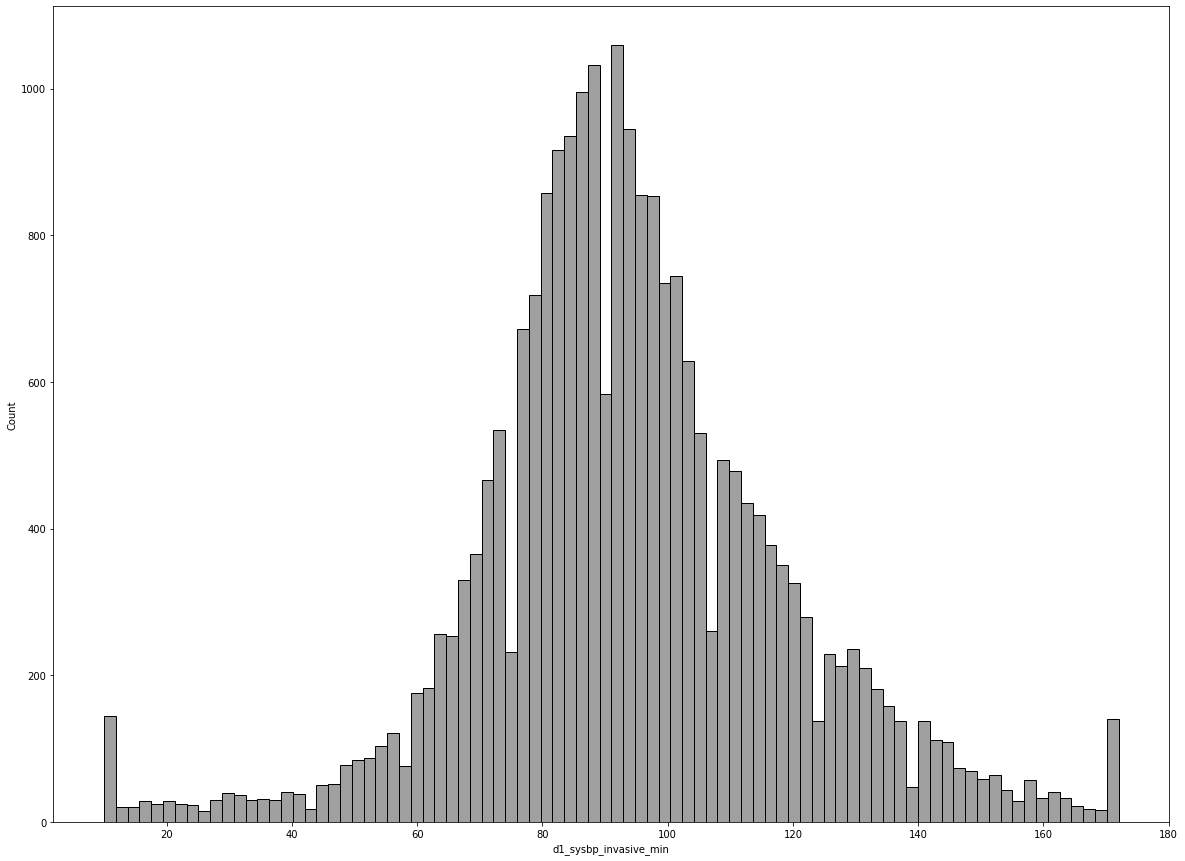

* d1_sysbp_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_sysbp_max
144
Número de elementos nulos: 151 ( 0.0 )


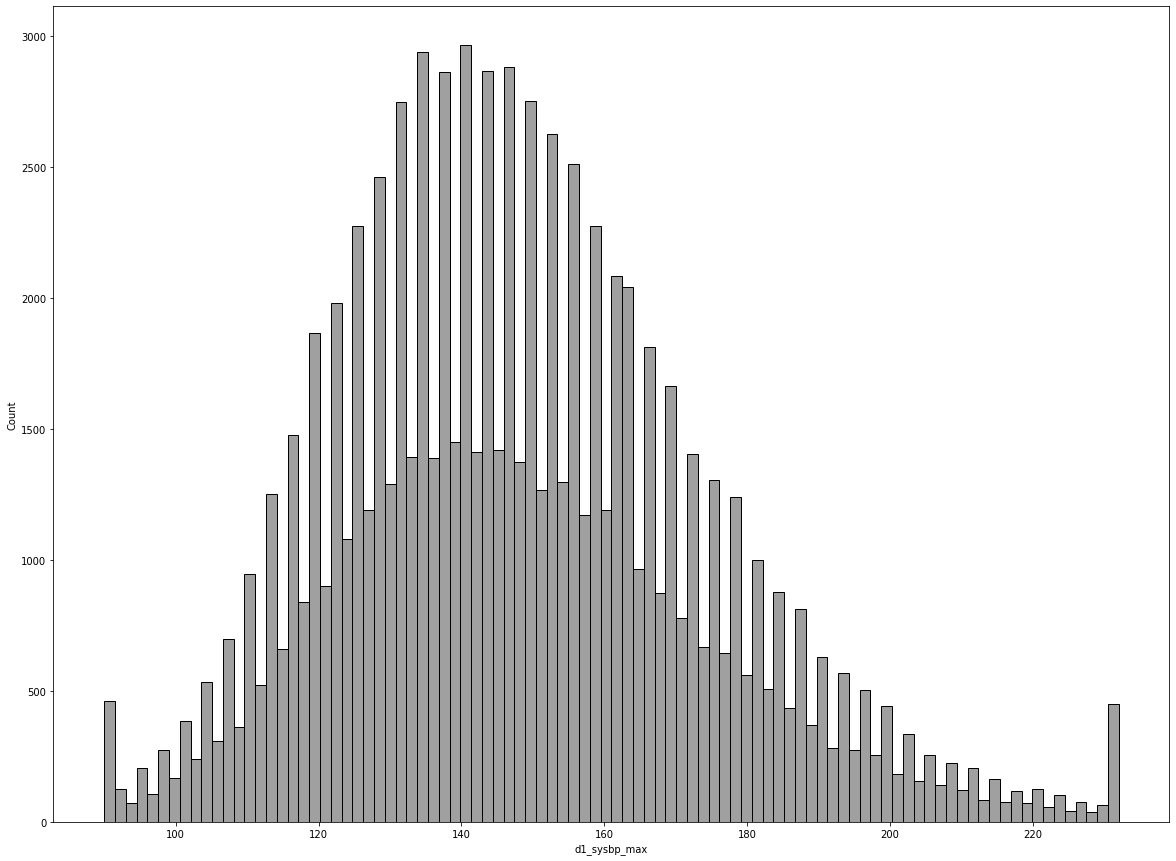

* d1_sysbp_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_sysbp_min
121
Número de elementos nulos: 151 ( 0.0 )


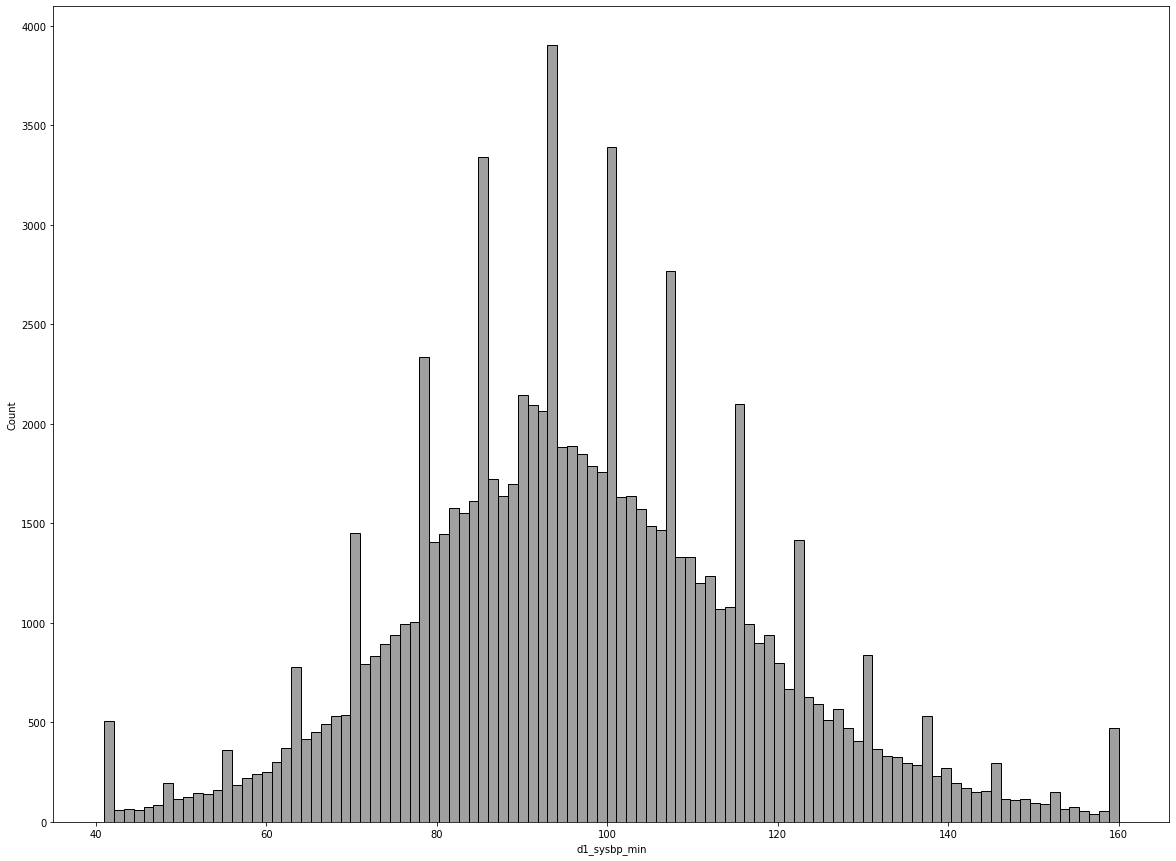

* d1_sysbp_noninvasive_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_sysbp_noninvasive_max
144
Número de elementos nulos: 993 ( 0.01 )


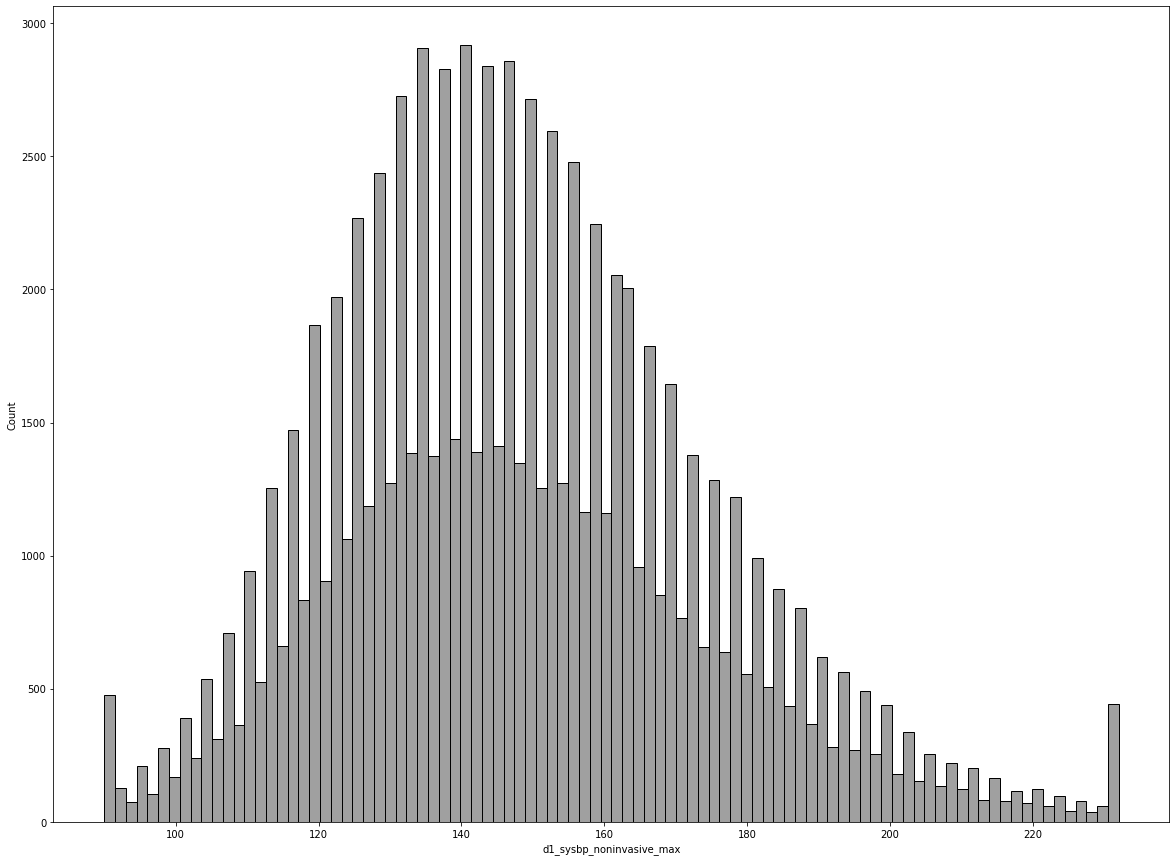

* d1_sysbp_noninvasive_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_sysbp_noninvasive_min
121
Número de elementos nulos: 993 ( 0.01 )


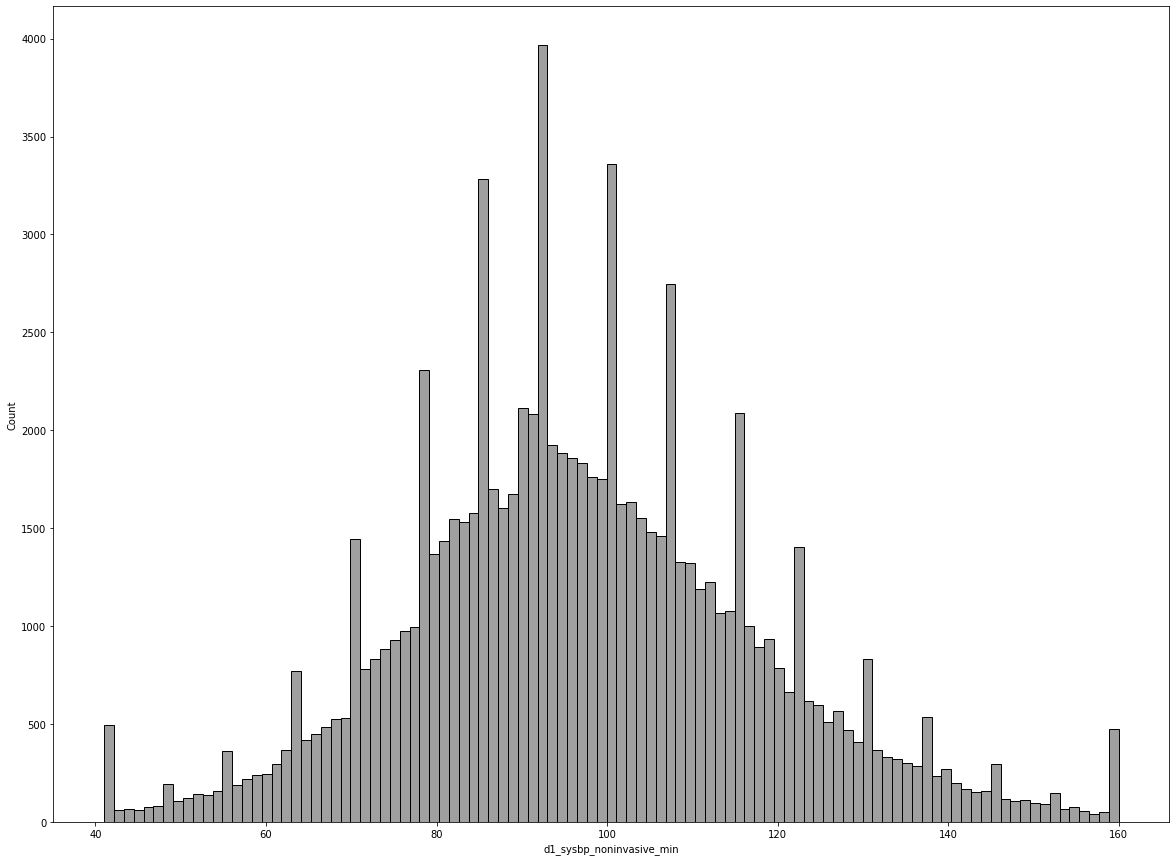

* d1_temp_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_temp_max
185
Número de elementos nulos: 2272 ( 0.03 )


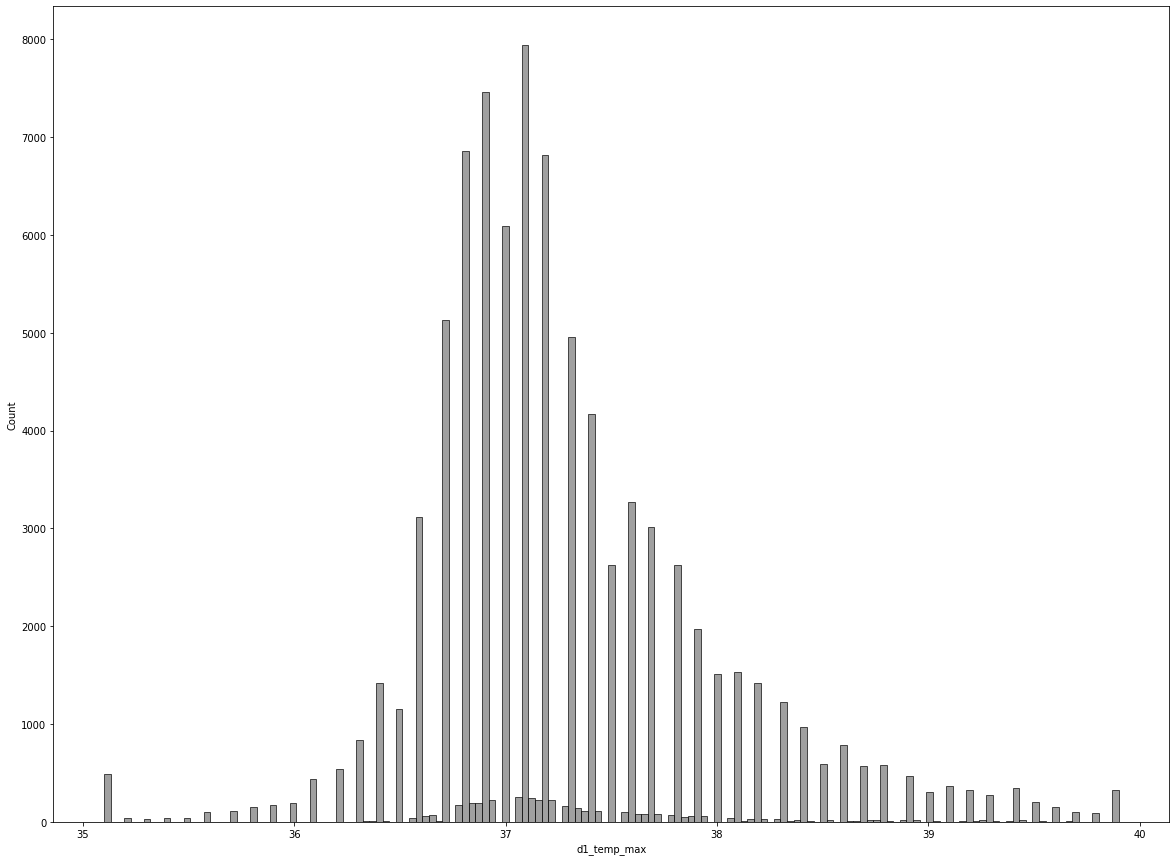

* d1_temp_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_temp_min
207
Número de elementos nulos: 2272 ( 0.03 )


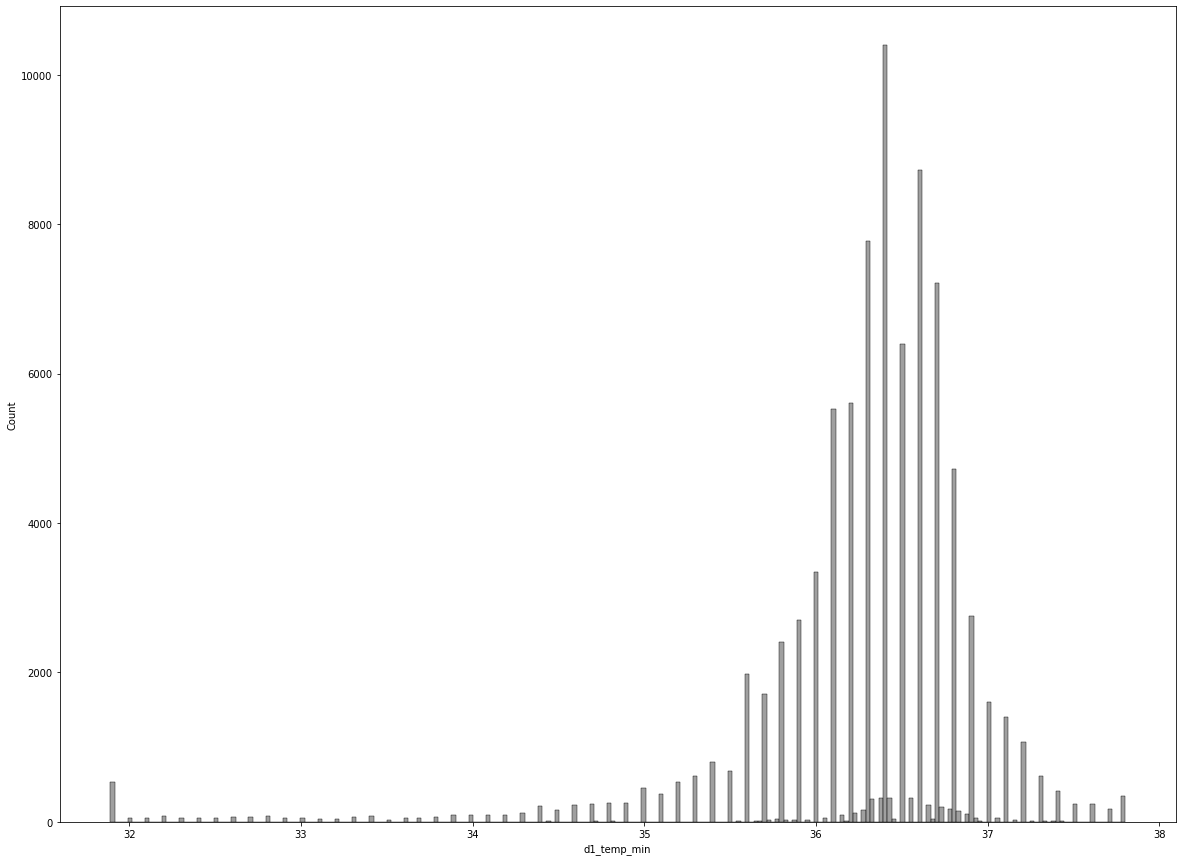

* h1_diasbp_invasive_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_diasbp_invasive_max
103
Número de elementos nulos: 73262 ( 0.82 )


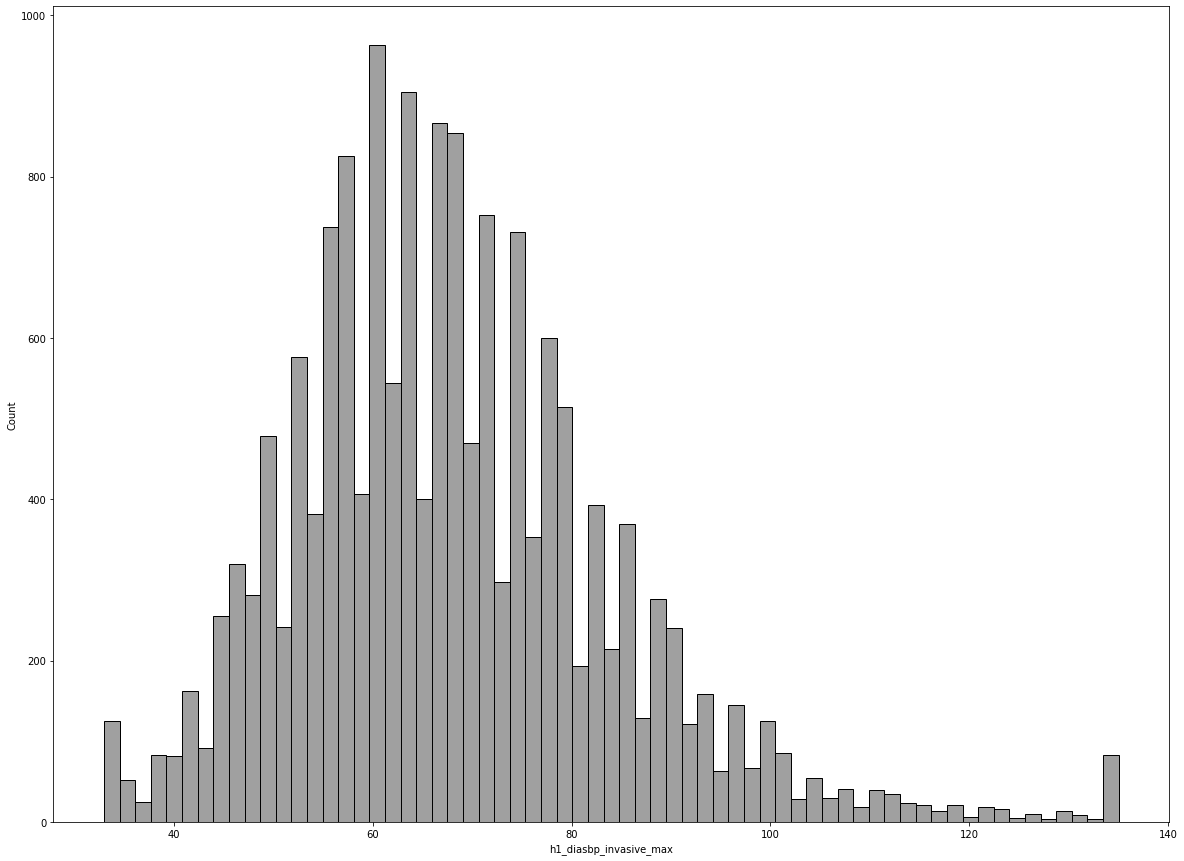

* h1_diasbp_invasive_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_diasbp_invasive_min
87
Número de elementos nulos: 73262 ( 0.82 )


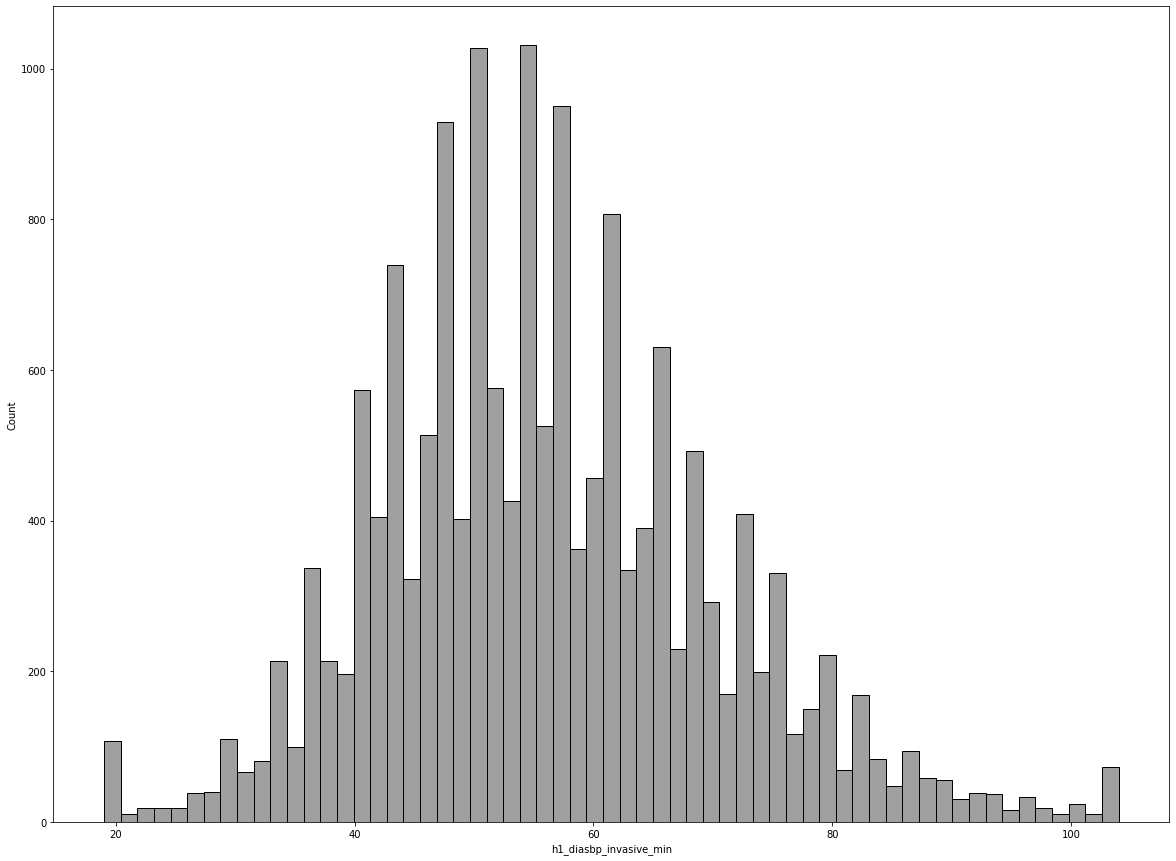

* h1_diasbp_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_diasbp_max
108
Número de elementos nulos: 3555 ( 0.04 )


* h1_diasbp_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_diasbp_min
93
Número de elementos nulos: 3555 ( 0.04 )


* h1_diasbp_noninvasive_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_diasbp_noninvasive_max
109
Número de elementos nulos: 7229 ( 0.08 )


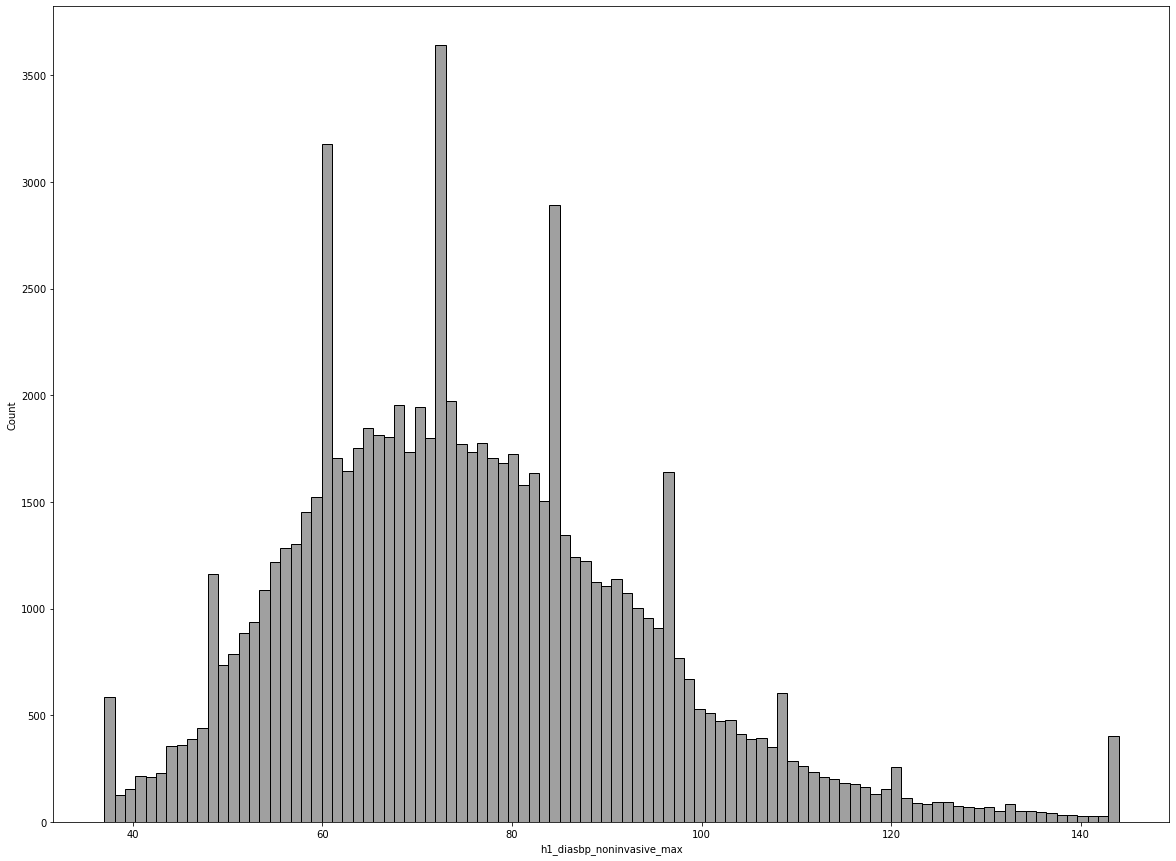

* h1_diasbp_noninvasive_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_diasbp_noninvasive_min
94
Número de elementos nulos: 7229 ( 0.08 )


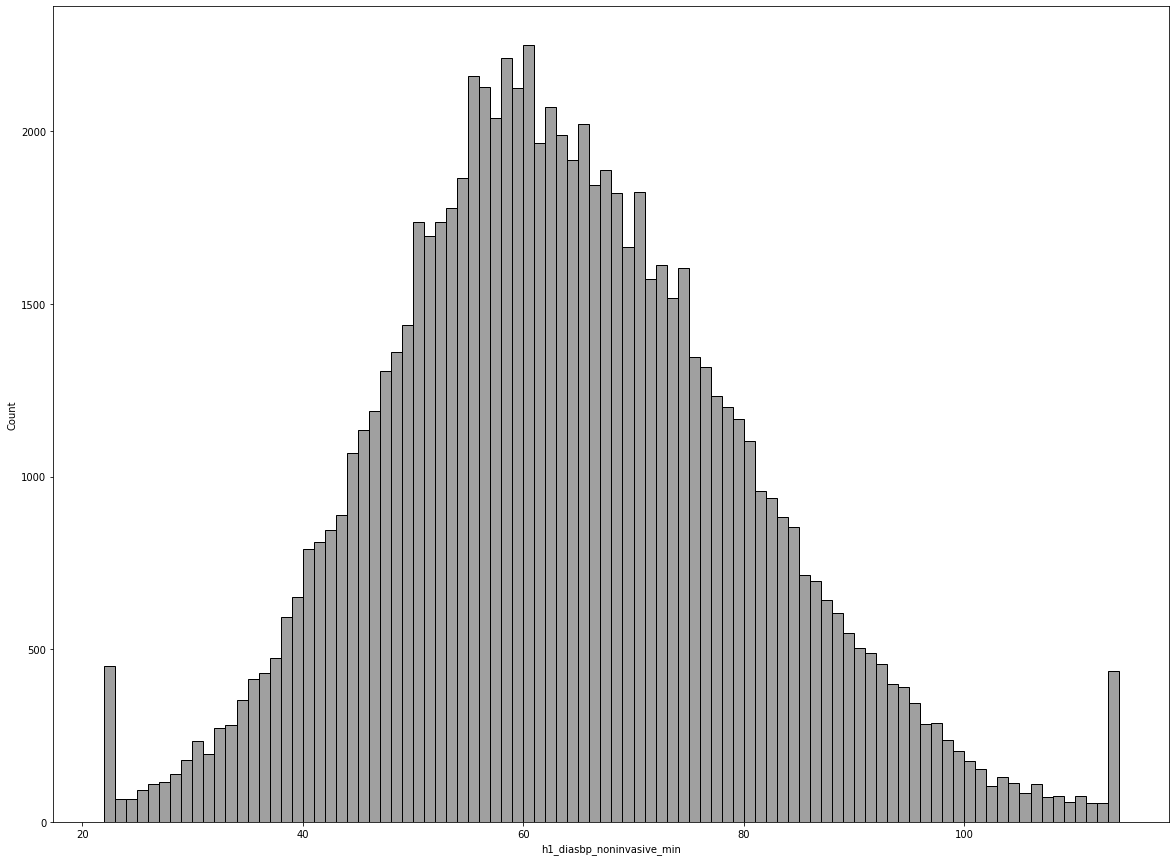

* h1_heartrate_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_heartrate_max
120
Número de elementos nulos: 2743 ( 0.03 )


* h1_heartrate_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_heartrate_min
110
Número de elementos nulos: 2743 ( 0.03 )


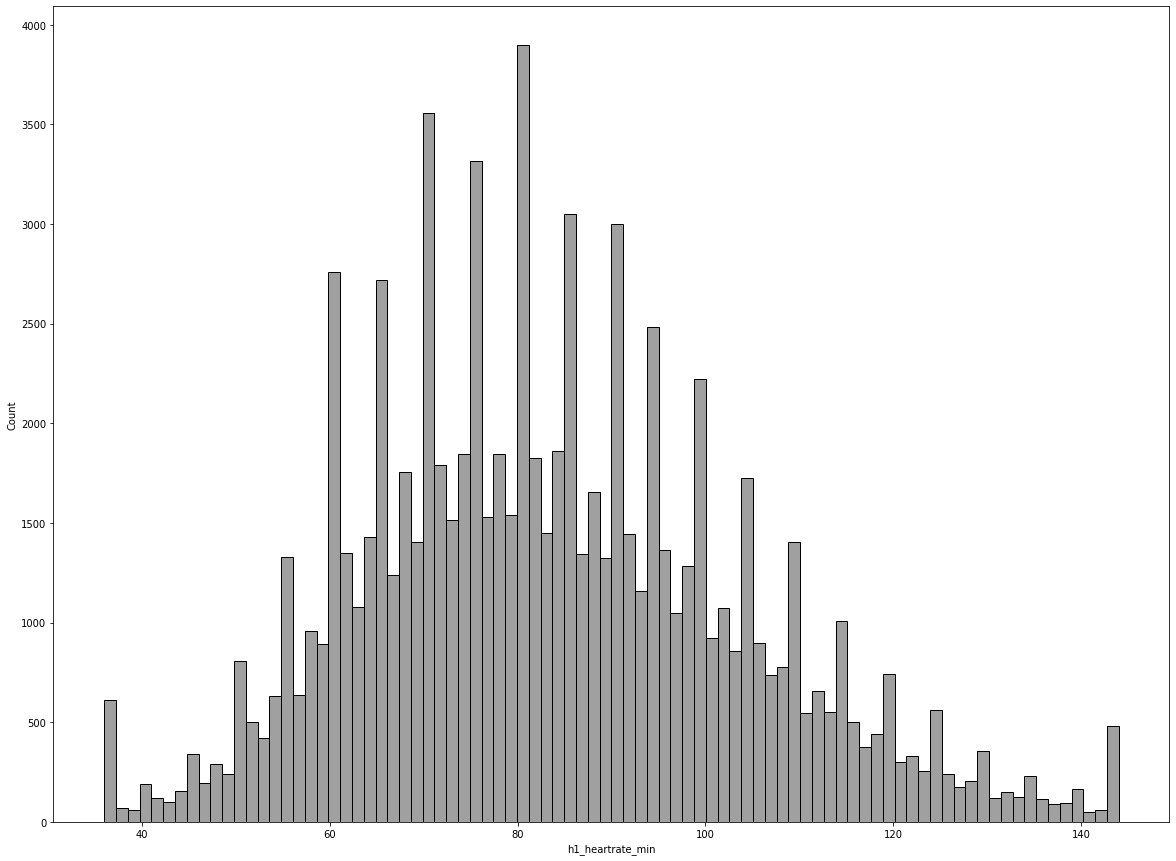

* h1_mbp_invasive_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_mbp_invasive_max
246
Número de elementos nulos: 73180 ( 0.82 )


* h1_mbp_invasive_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_mbp_invasive_min
134
Número de elementos nulos: 73180 ( 0.82 )


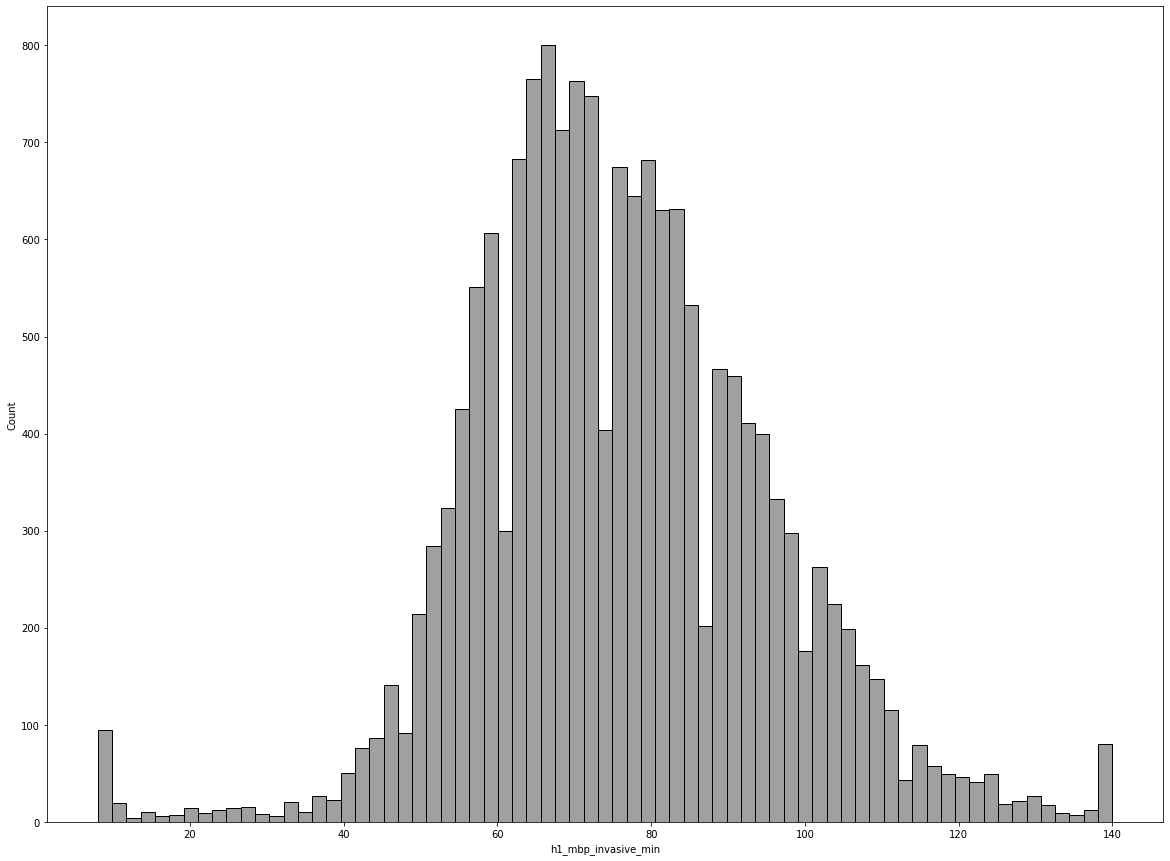

* h1_mbp_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_mbp_max
118
Número de elementos nulos: 4559 ( 0.05 )


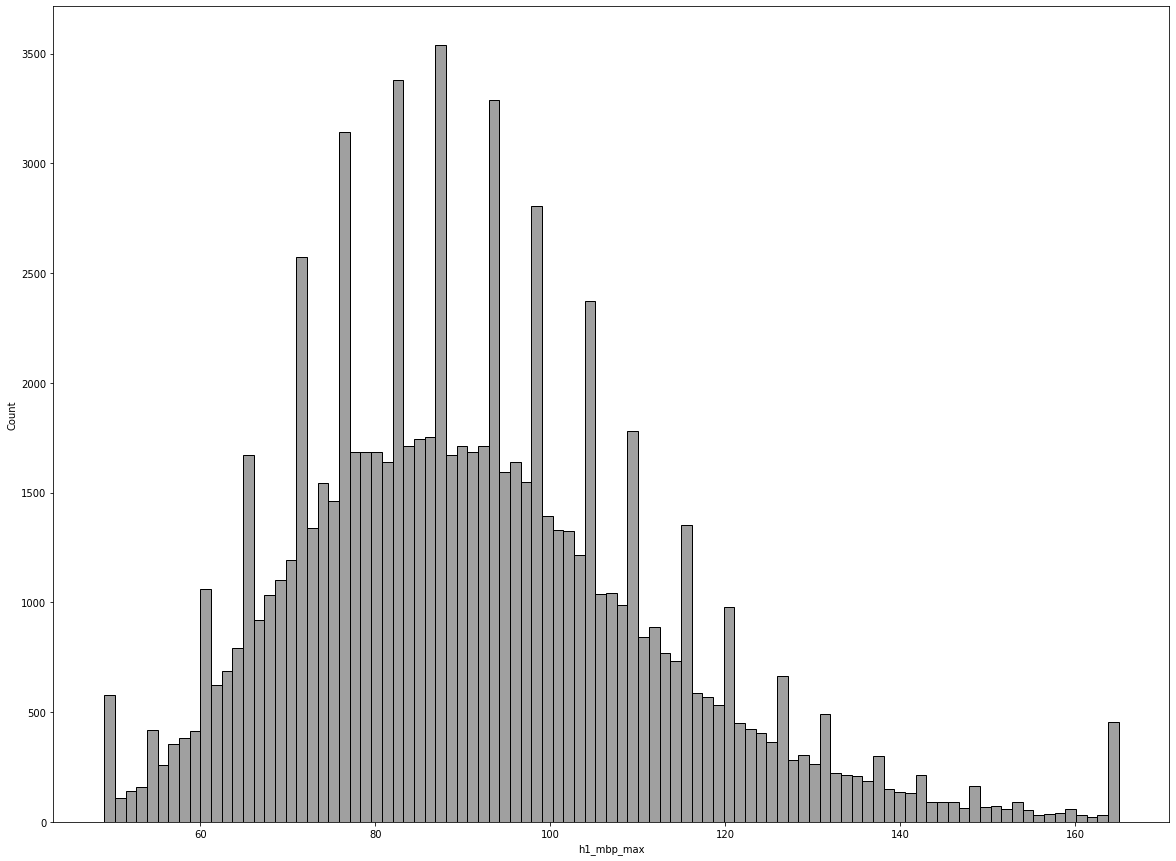

* h1_mbp_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_mbp_min
108
Número de elementos nulos: 4559 ( 0.05 )


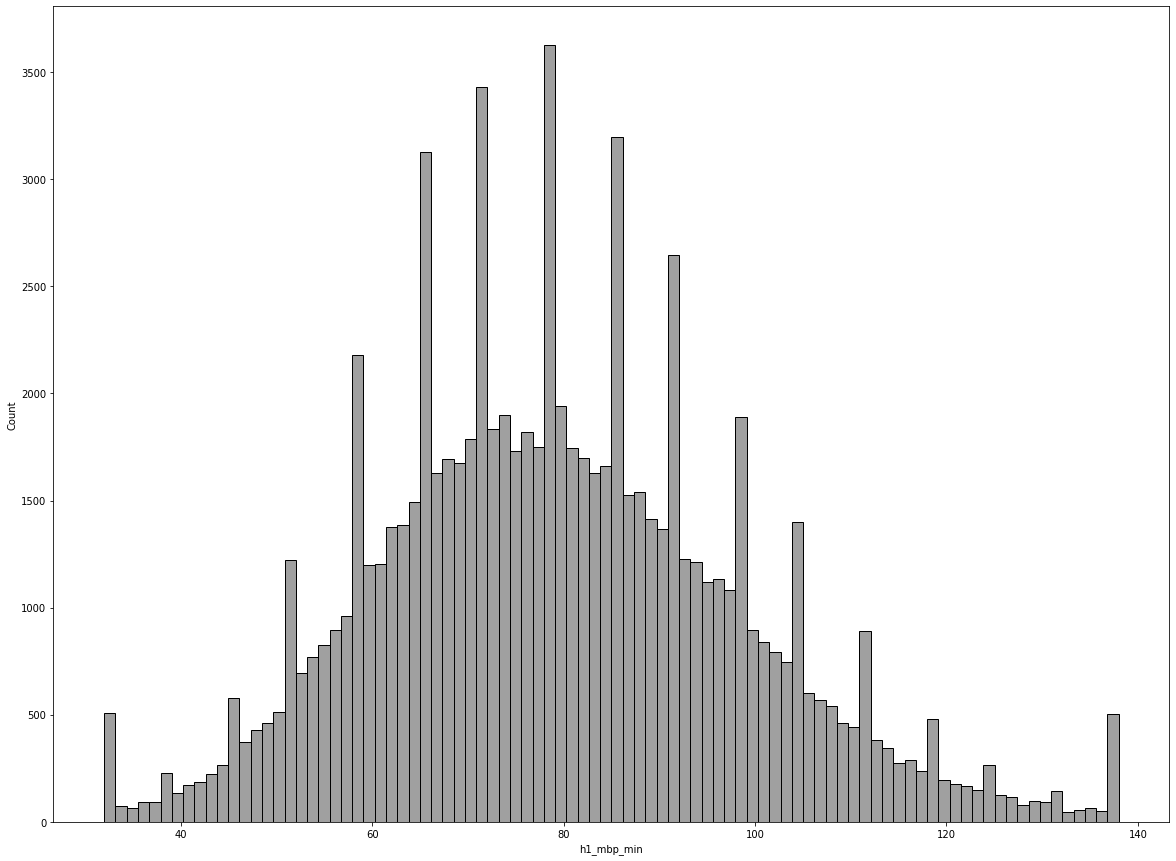

* h1_mbp_noninvasive_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_mbp_noninvasive_max
116
Número de elementos nulos: 8942 ( 0.1 )


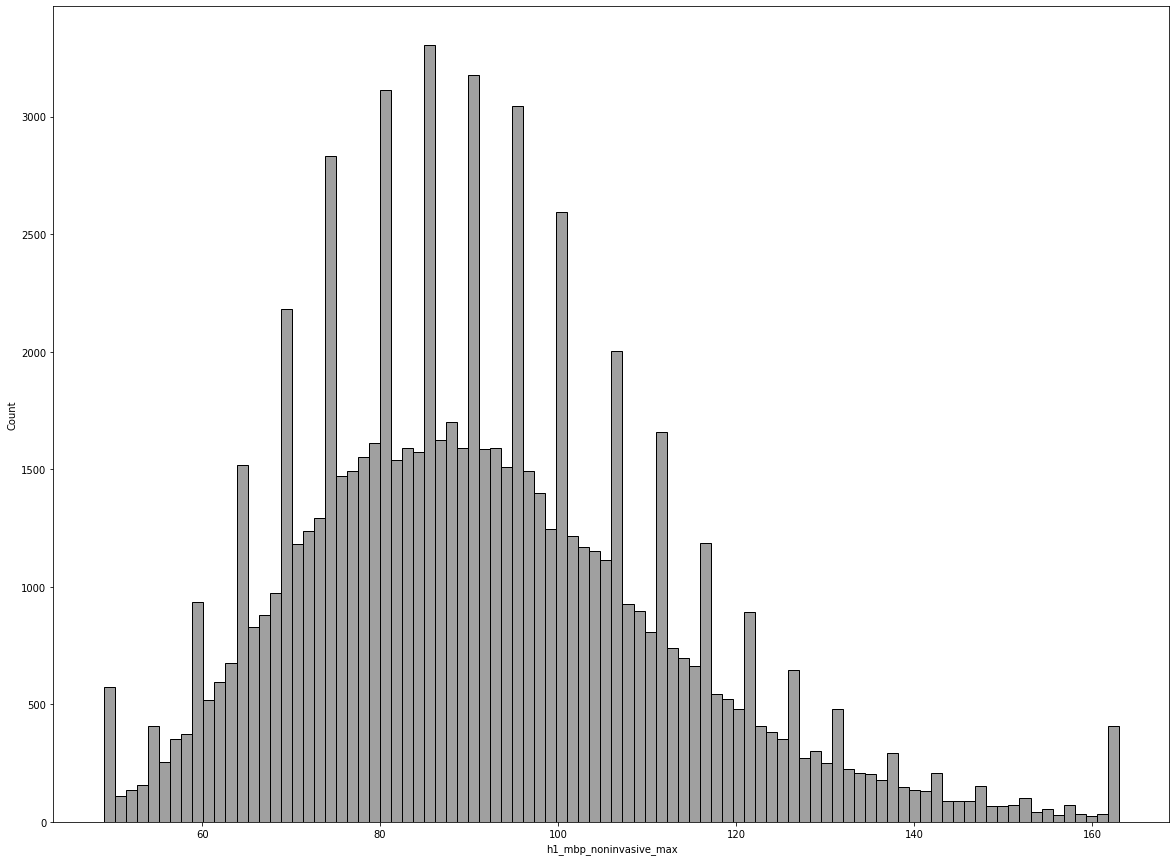

* h1_mbp_noninvasive_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_mbp_noninvasive_min
108
Número de elementos nulos: 8942 ( 0.1 )


* h1_resprate_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_resprate_max
51
Número de elementos nulos: 4260 ( 0.05 )


* h1_resprate_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_resprate_min
92
Número de elementos nulos: 4260 ( 0.05 )


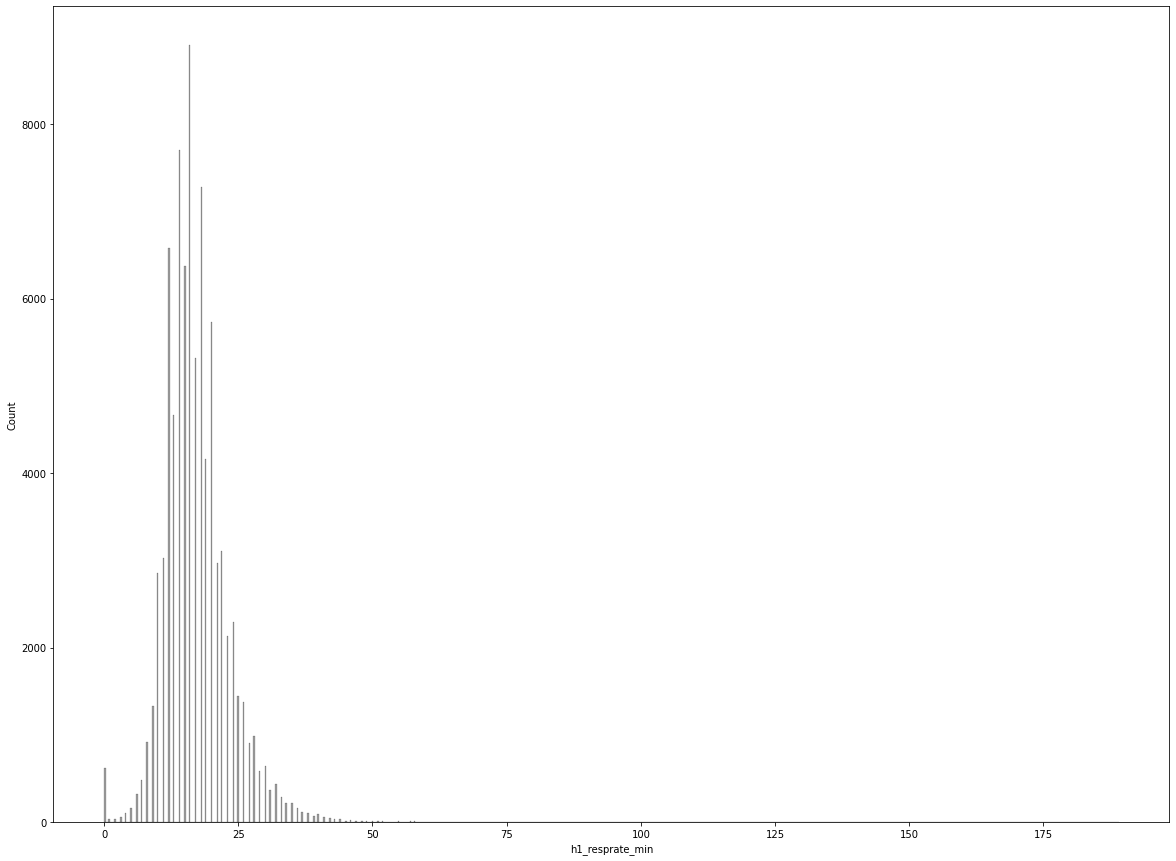

* h1_spo2_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_spo2_max
73
Número de elementos nulos: 4101 ( 0.05 )


* h1_spo2_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_spo2_min
101
Número de elementos nulos: 4101 ( 0.05 )


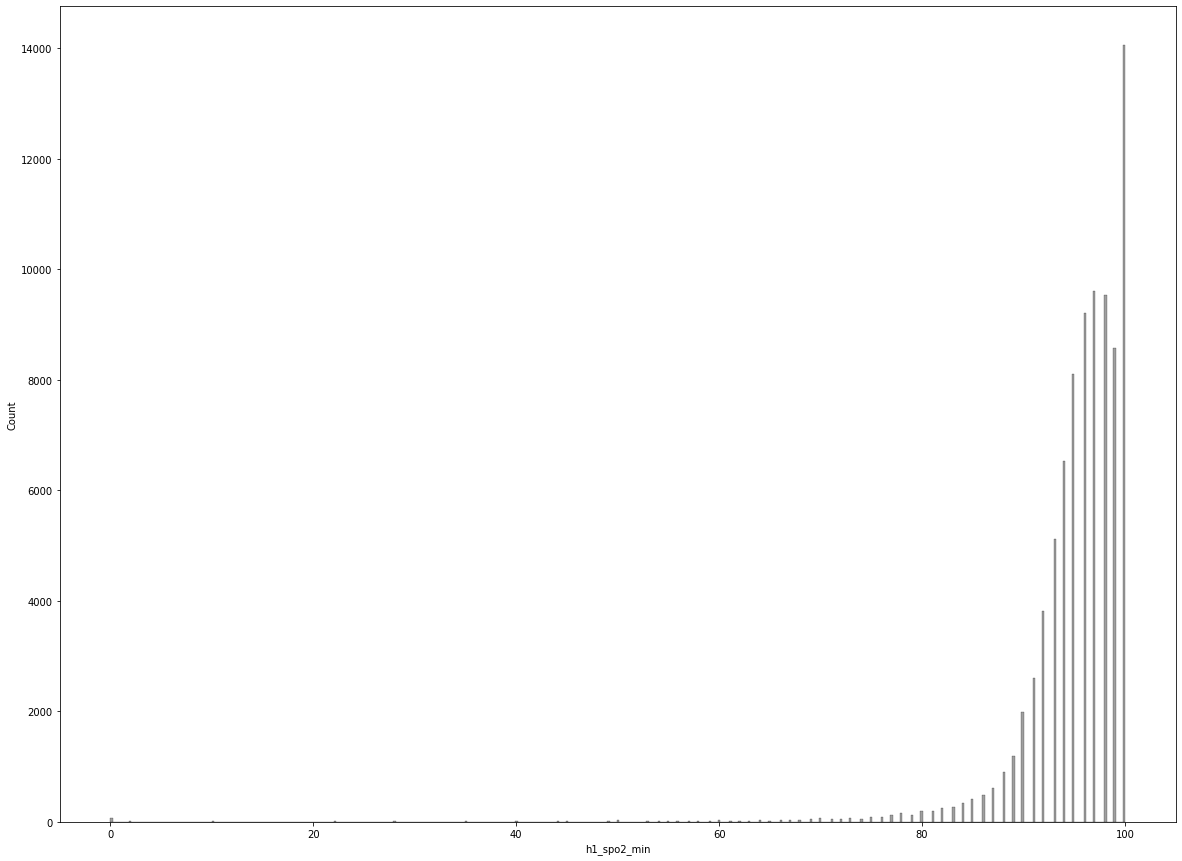

* h1_sysbp_invasive_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_sysbp_invasive_max
182
Número de elementos nulos: 73249 ( 0.82 )


* h1_sysbp_invasive_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_sysbp_invasive_min
169
Número de elementos nulos: 73249 ( 0.82 )


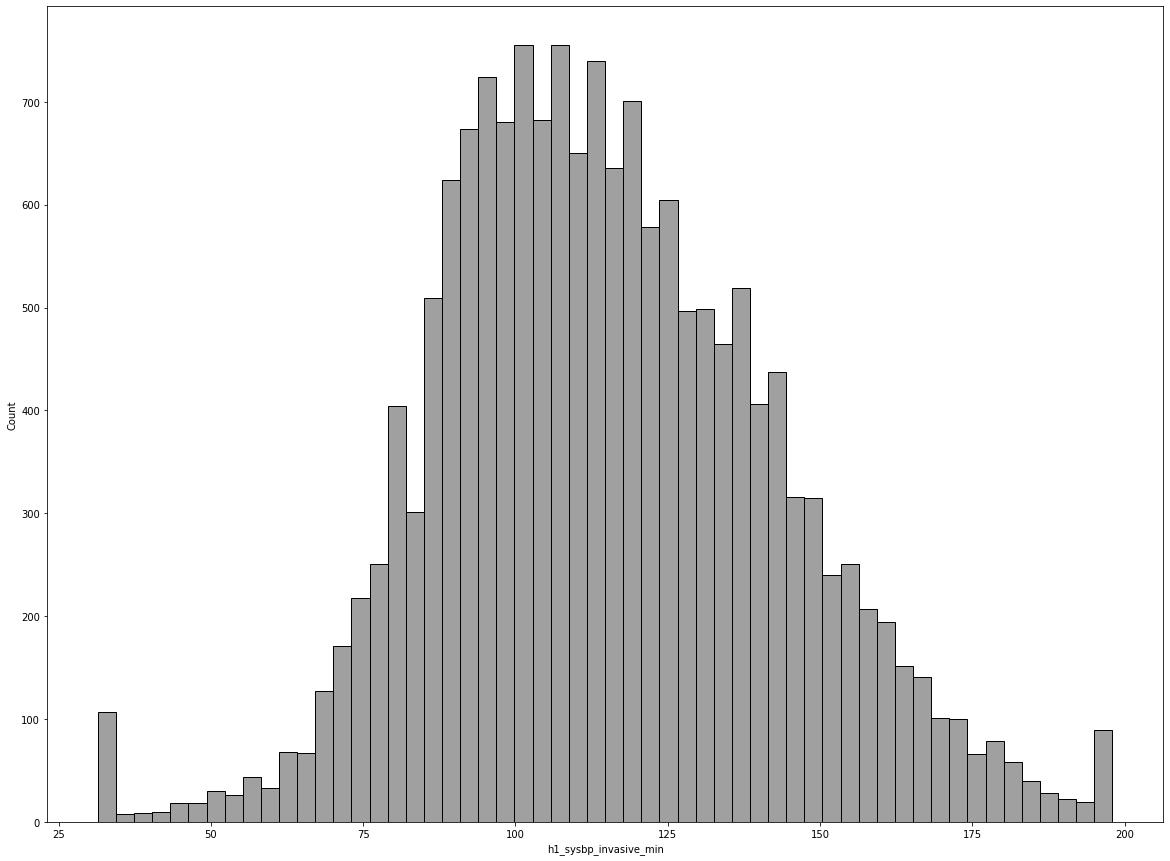

* h1_sysbp_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_sysbp_max
150
Número de elementos nulos: 3547 ( 0.04 )


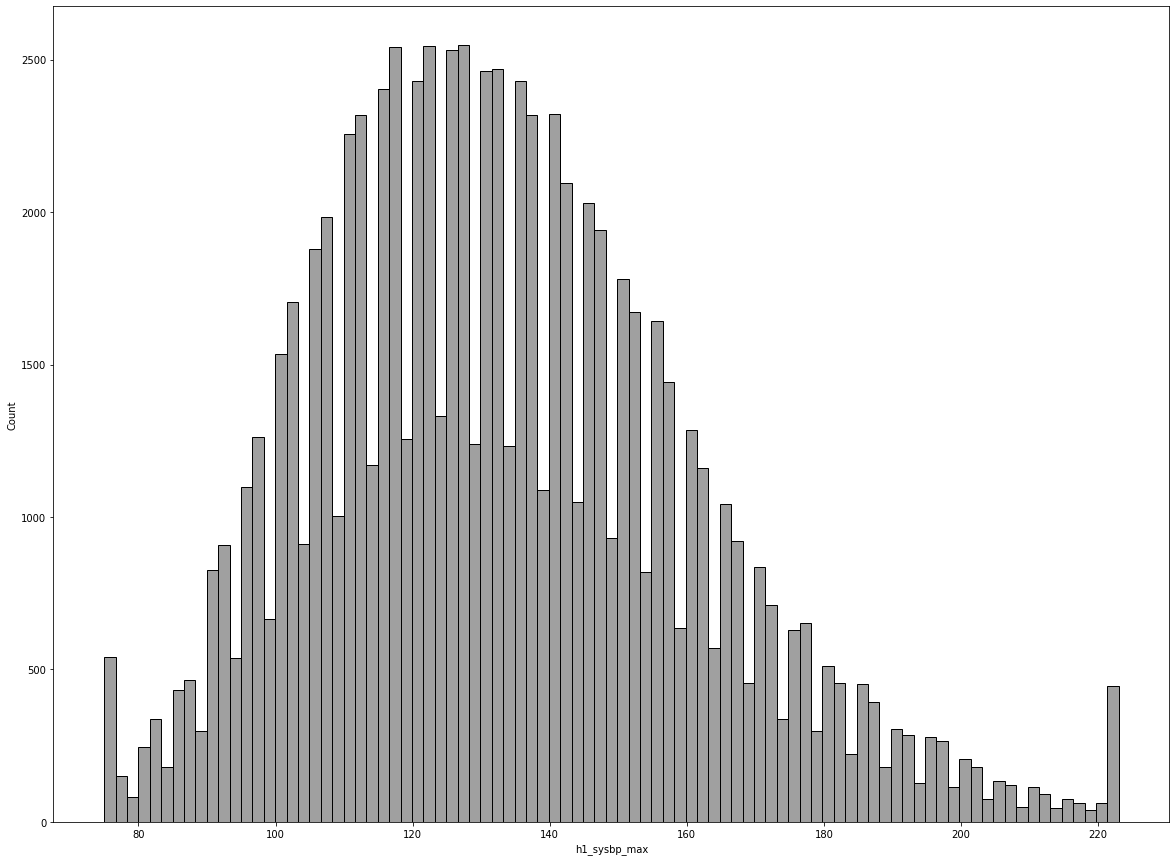

* h1_sysbp_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_sysbp_min
143
Número de elementos nulos: 3547 ( 0.04 )


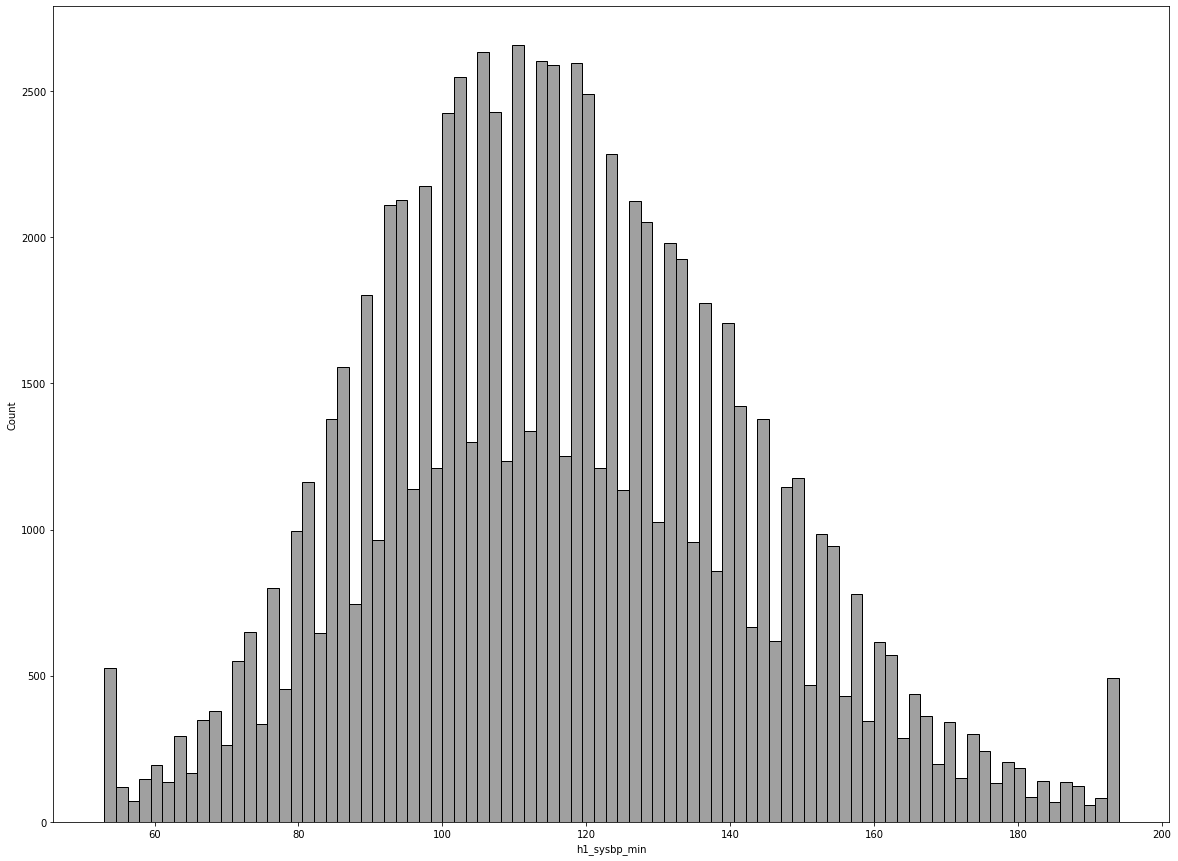

* h1_sysbp_noninvasive_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_sysbp_noninvasive_max
150
Número de elementos nulos: 7220 ( 0.08 )


* h1_sysbp_noninvasive_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_sysbp_noninvasive_min
144
Número de elementos nulos: 7220 ( 0.08 )


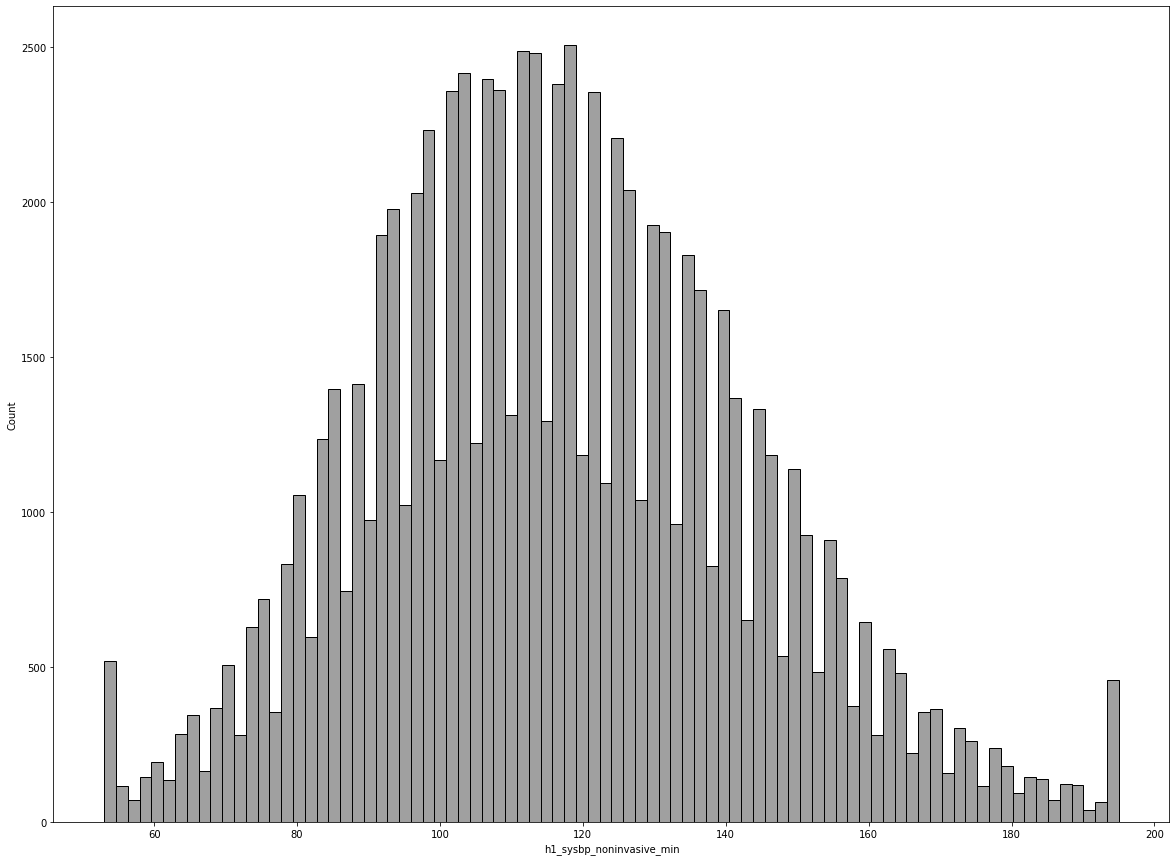

* h1_temp_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_temp_max
289
Número de elementos nulos: 21223 ( 0.24 )


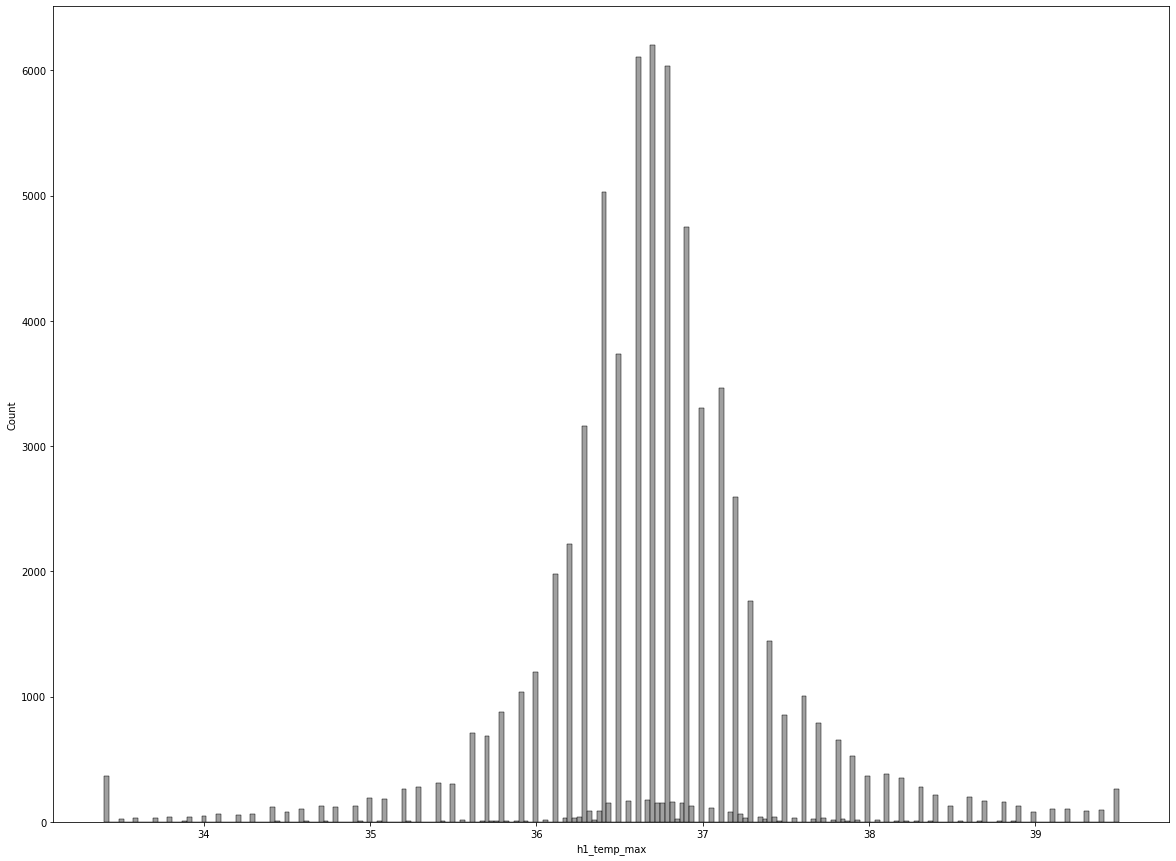

* h1_temp_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_temp_min
299
Número de elementos nulos: 21223 ( 0.24 )


* d1_albumin_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_albumin_max
36
Número de elementos nulos: 48115 ( 0.54 )


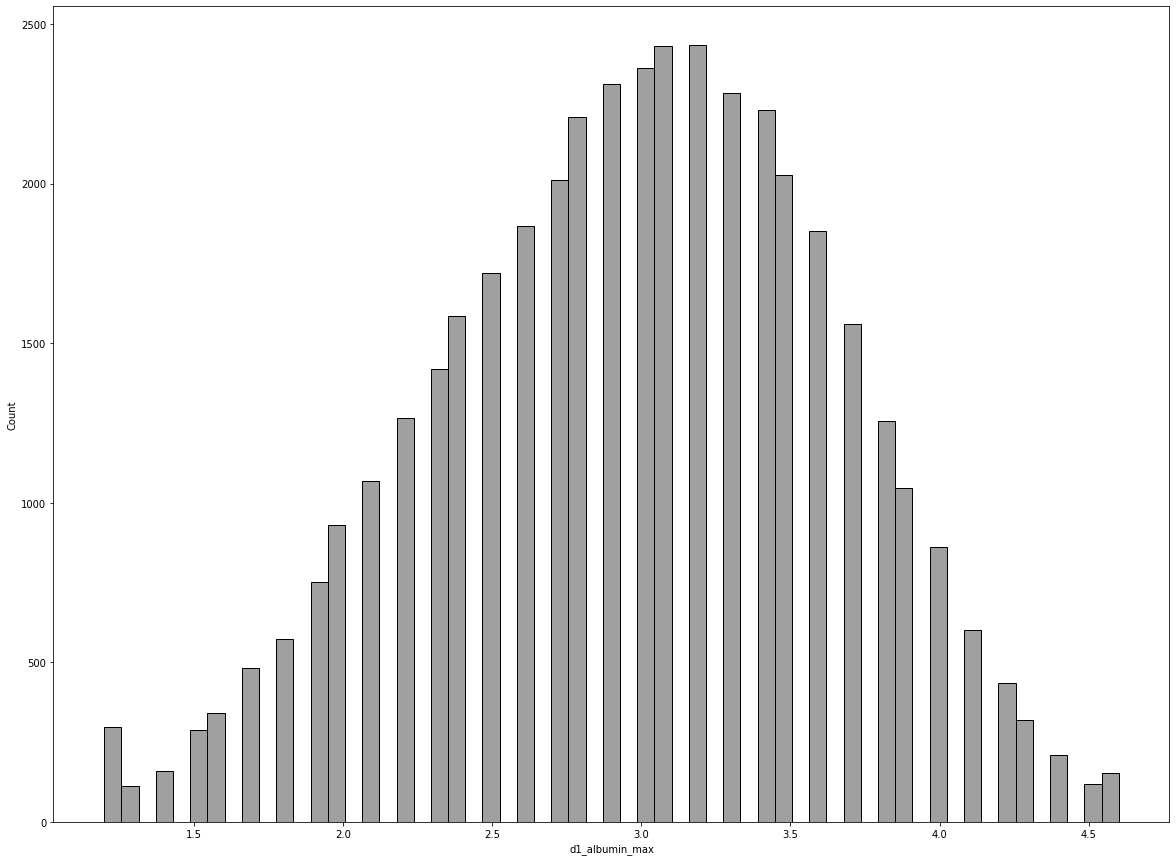

* d1_albumin_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_albumin_min
36
Número de elementos nulos: 48115 ( 0.54 )


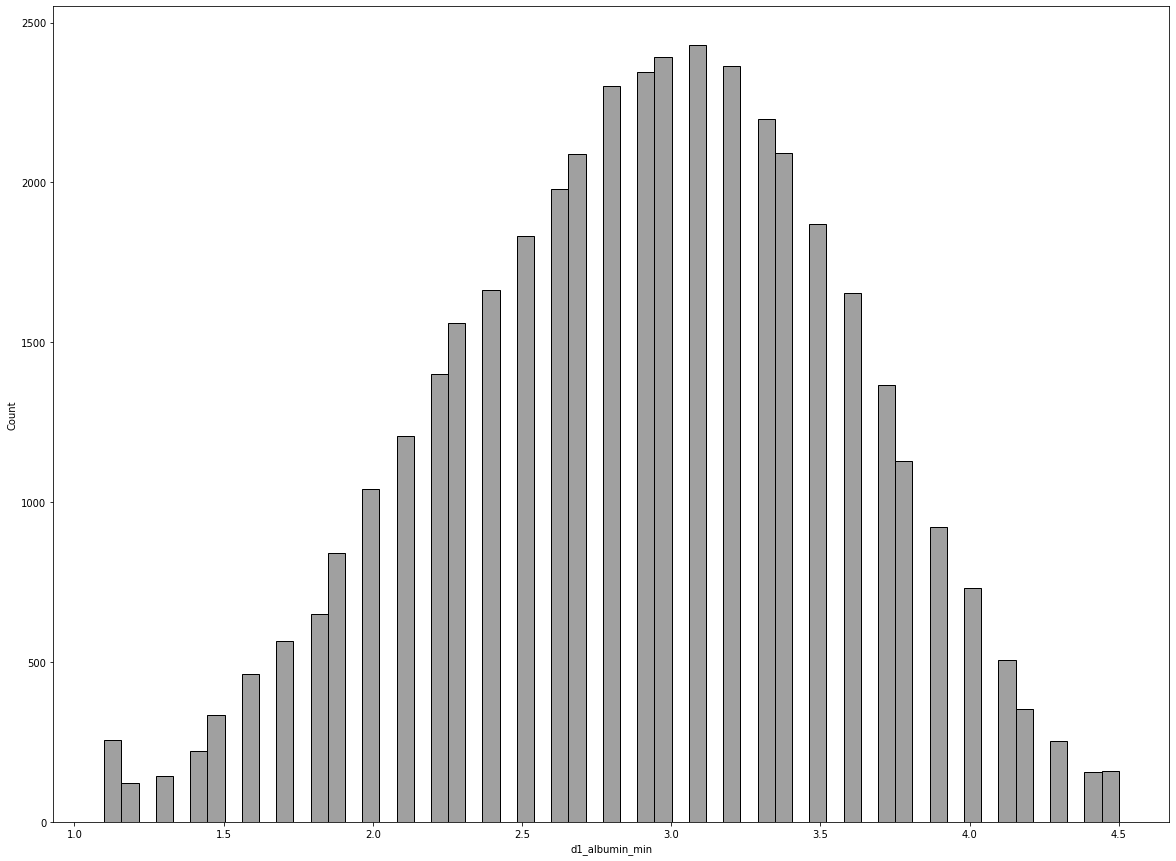

* d1_bilirubin_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_bilirubin_max
371
Número de elementos nulos: 52581 ( 0.59 )


* d1_bilirubin_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_bilirubin_min
354
Número de elementos nulos: 52581 ( 0.59 )


* d1_bun_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_bun_max
491
Número de elementos nulos: 10245 ( 0.11 )


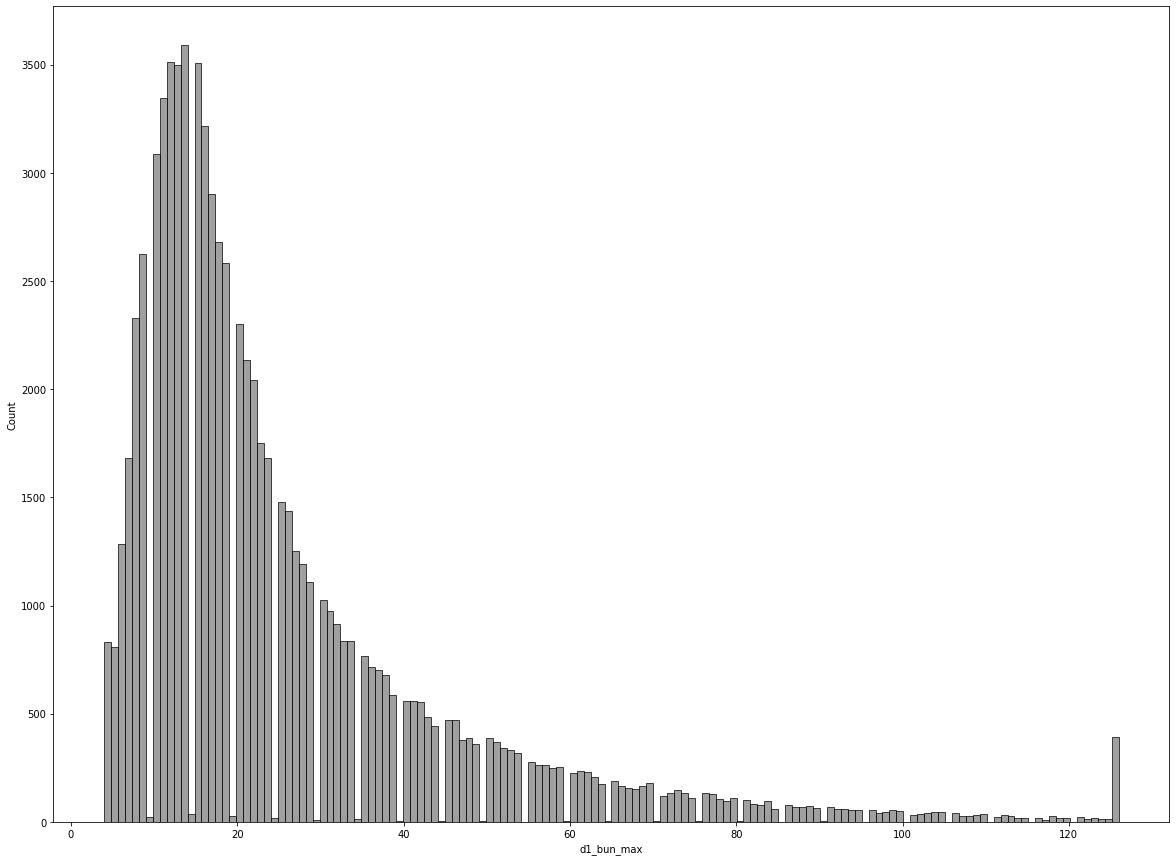

* d1_bun_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_bun_min
467
Número de elementos nulos: 10245 ( 0.11 )


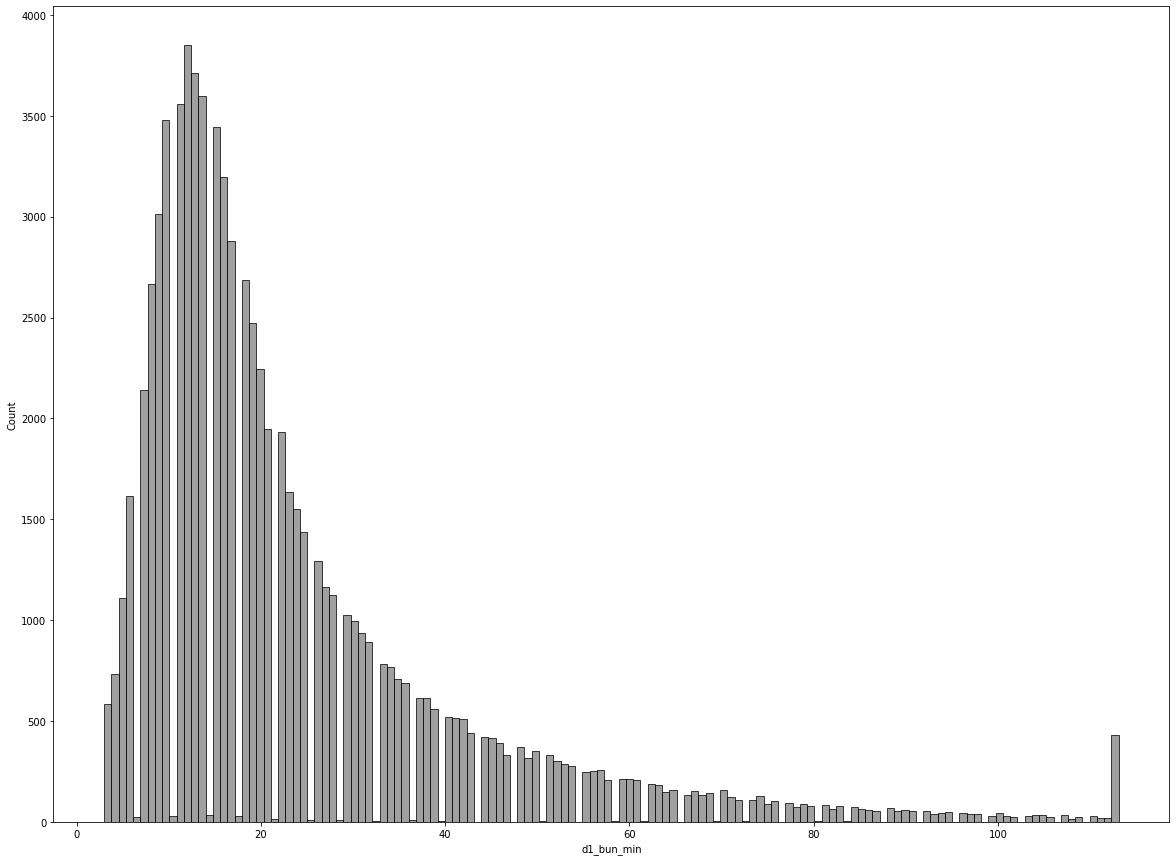

* d1_calcium_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_calcium_max
48
Número de elementos nulos: 12755 ( 0.14 )


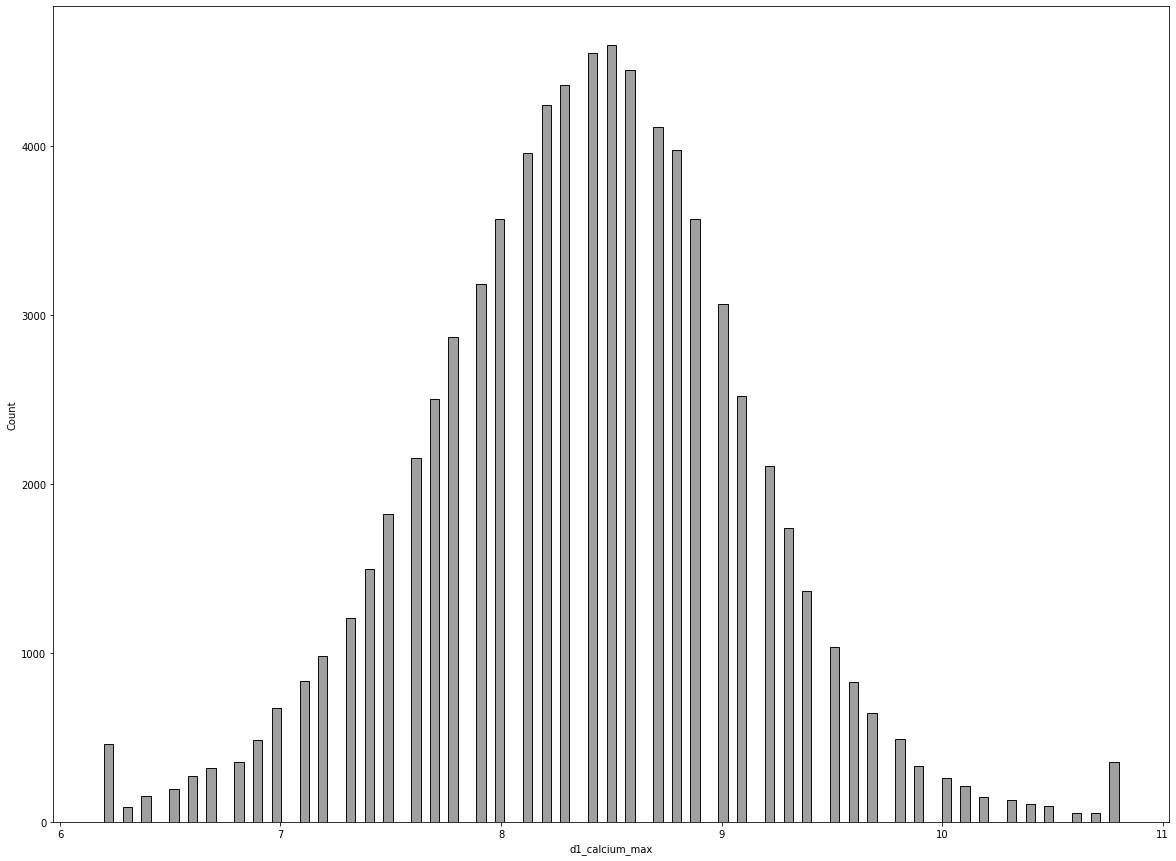

* d1_calcium_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_calcium_min
50
Número de elementos nulos: 12755 ( 0.14 )


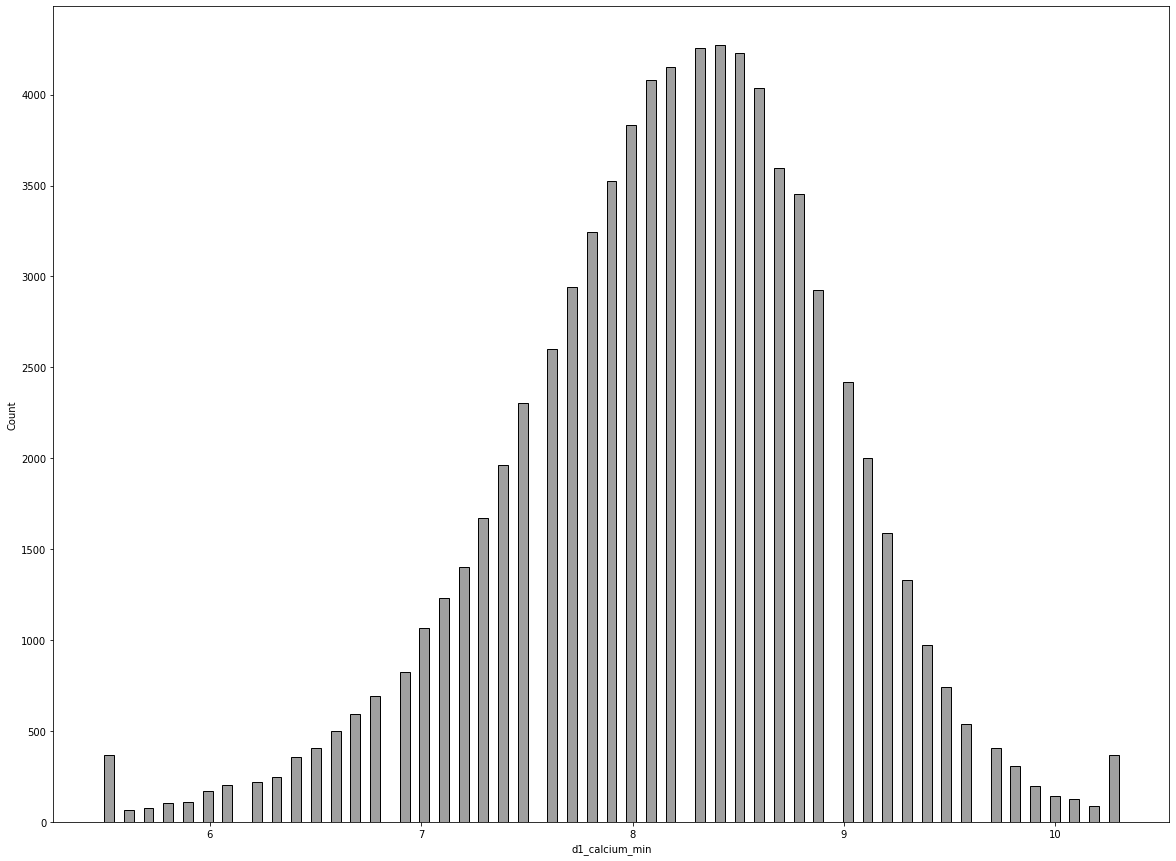

* d1_creatinine_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_creatinine_max
1185
Número de elementos nulos: 9904 ( 0.11 )


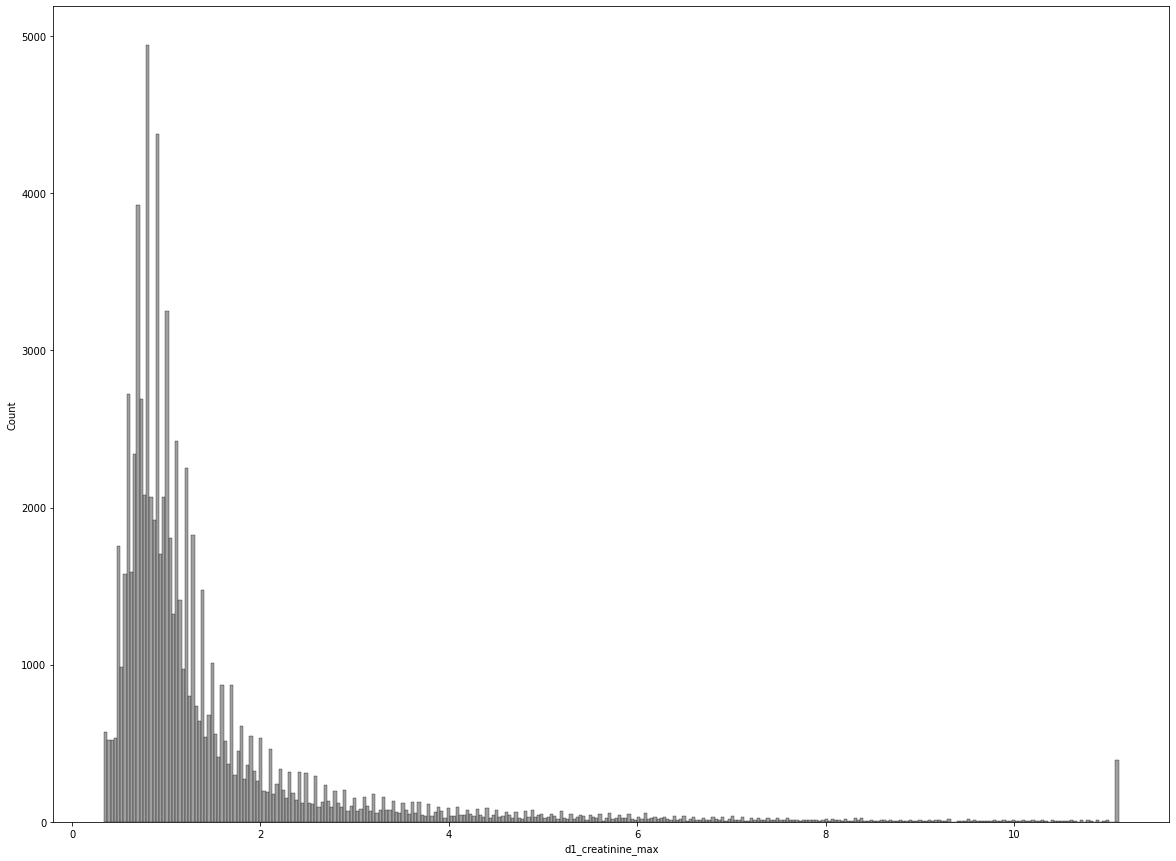

* d1_creatinine_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_creatinine_min
1090
Número de elementos nulos: 9904 ( 0.11 )


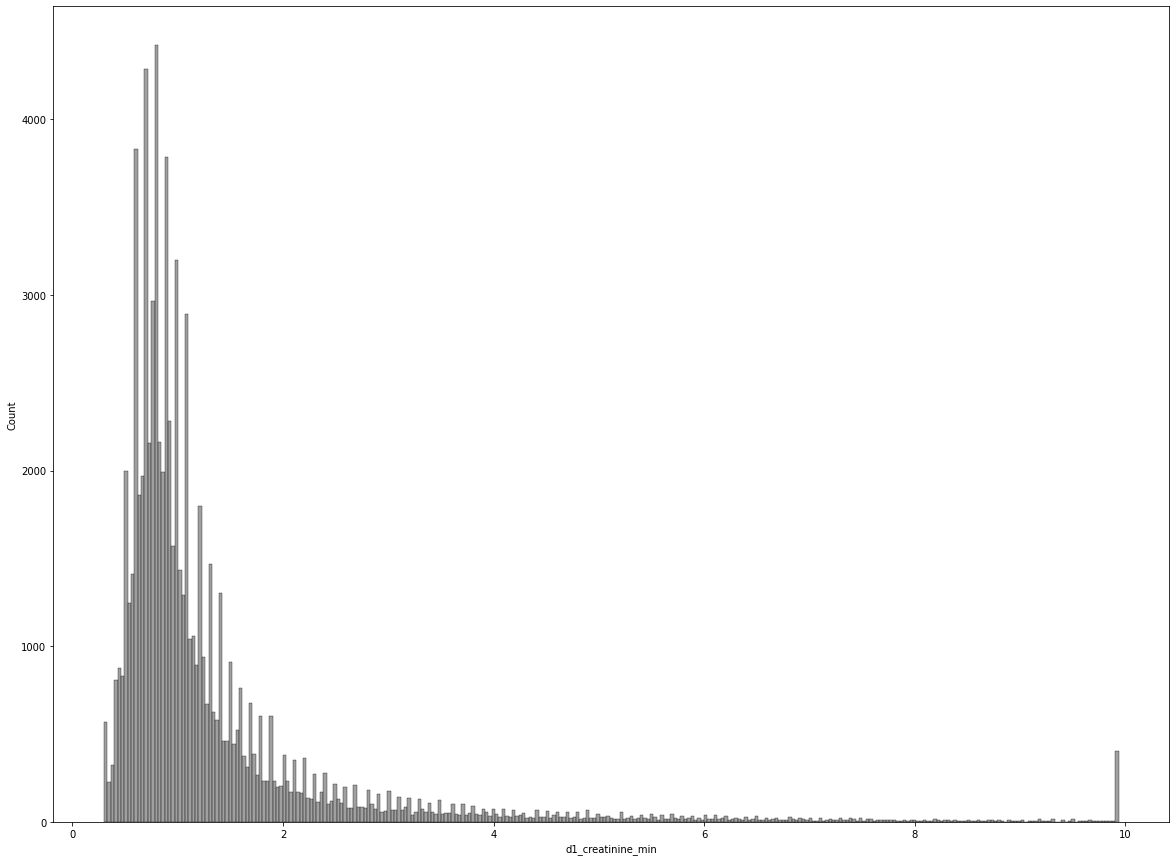

* d1_glucose_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_glucose_max
539
Número de elementos nulos: 5665 ( 0.06 )


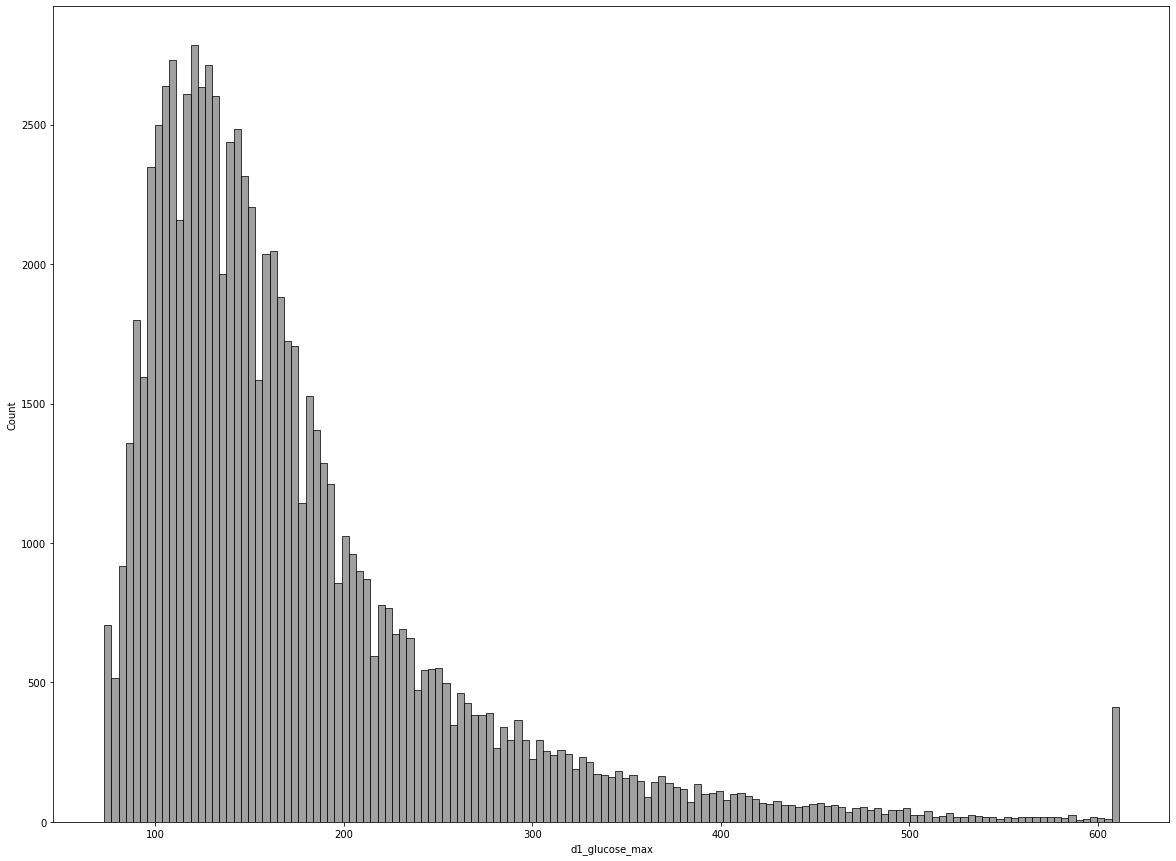

* d1_glucose_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_glucose_min
257
Número de elementos nulos: 5665 ( 0.06 )


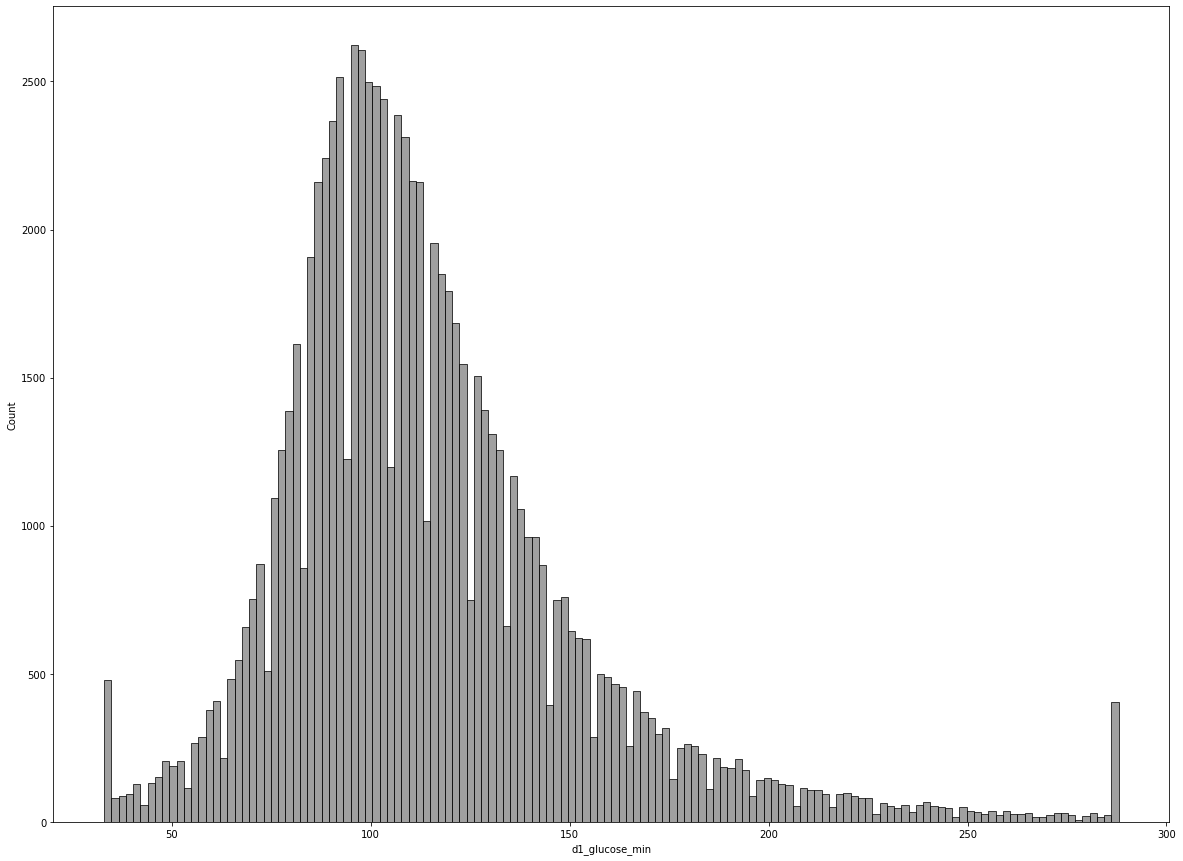

* d1_hco3_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_hco3_max
224
Número de elementos nulos: 14715 ( 0.16 )


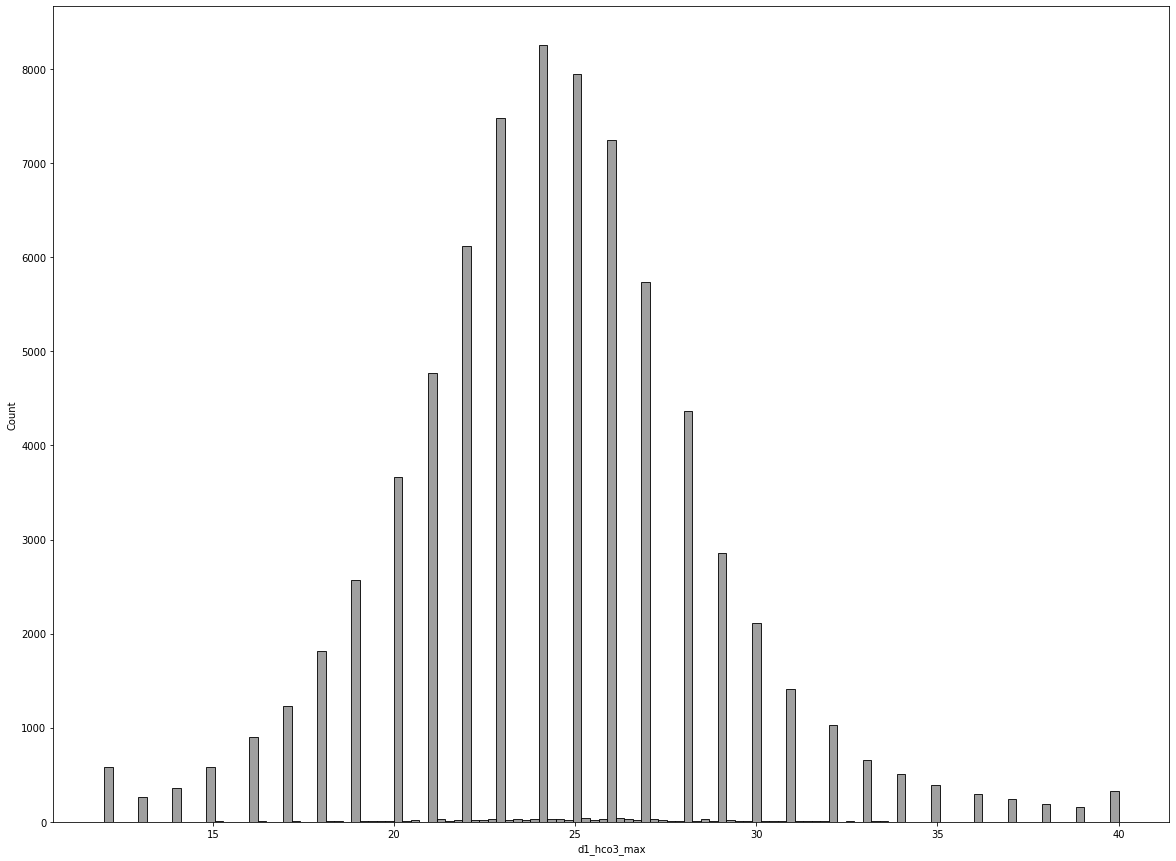

* d1_hco3_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_hco3_min
255
Número de elementos nulos: 14715 ( 0.16 )


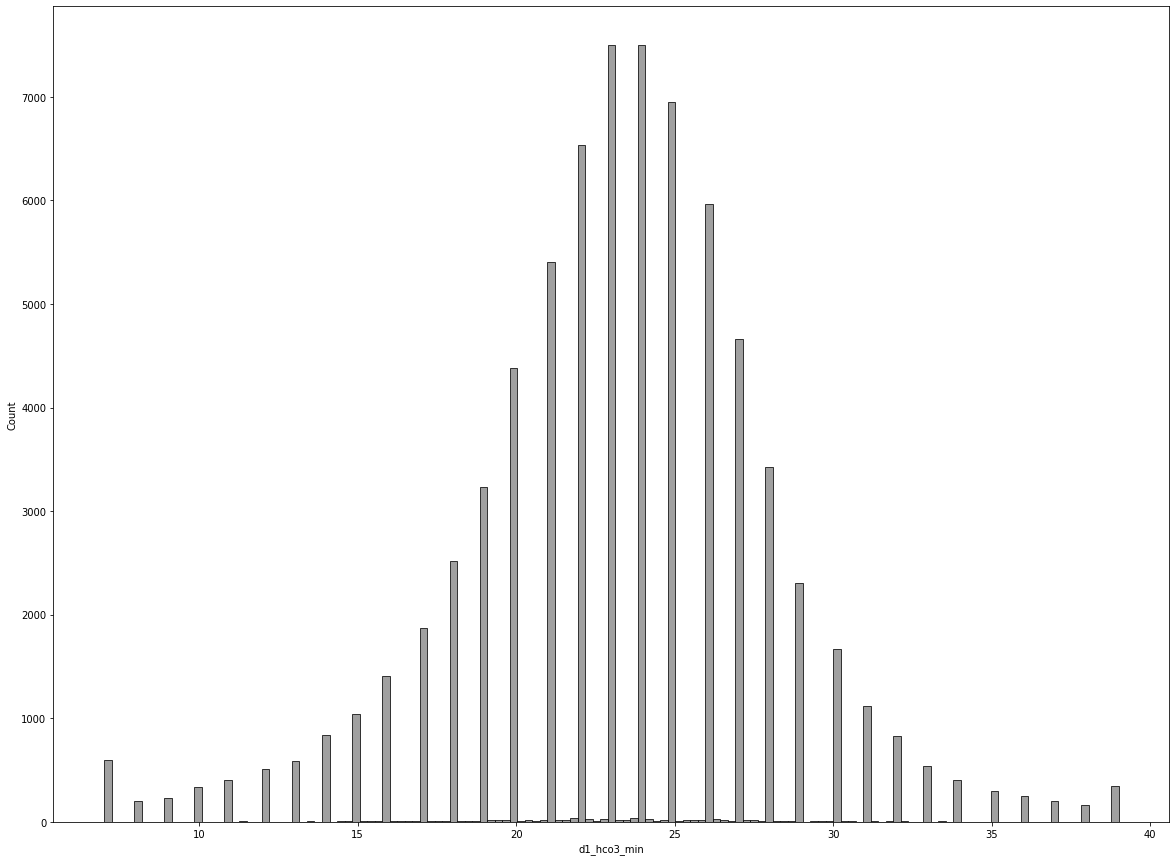

* d1_hemaglobin_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_hemaglobin_max
106
Número de elementos nulos: 11857 ( 0.13 )


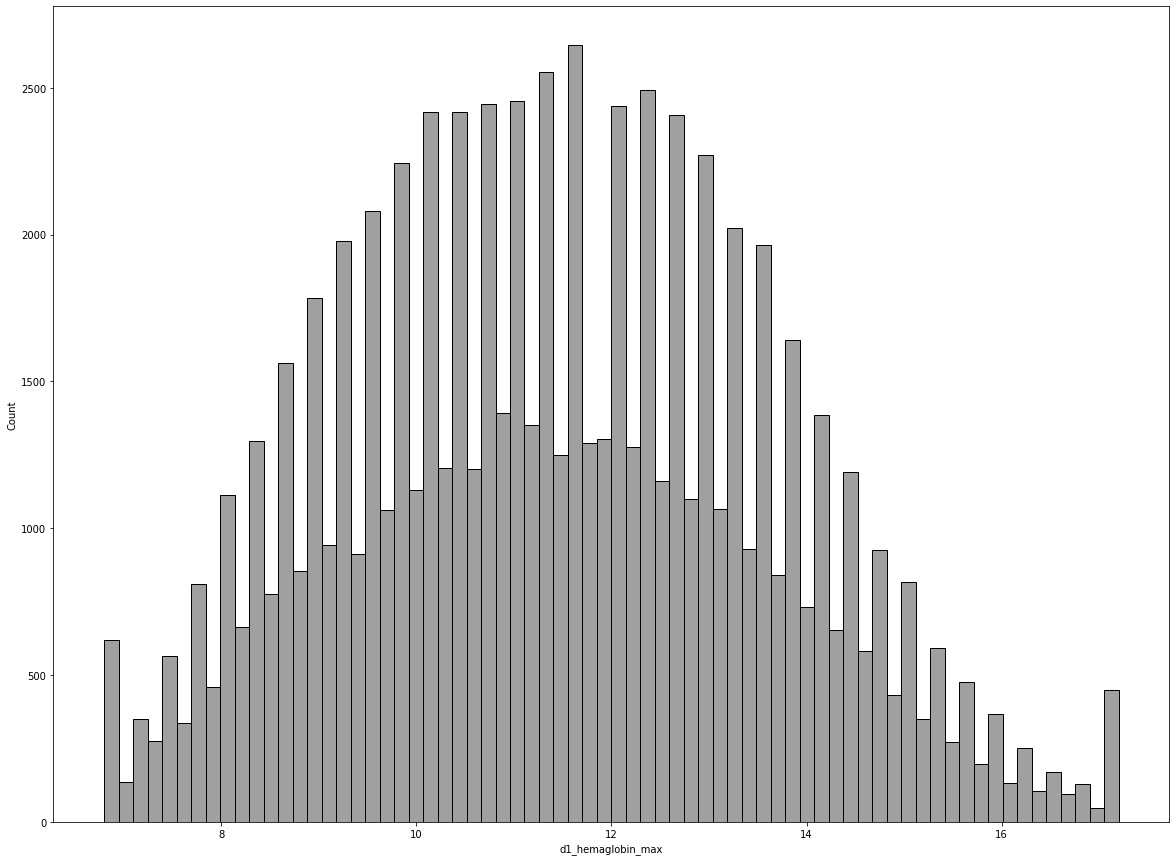

* d1_hemaglobin_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_hemaglobin_min
116
Número de elementos nulos: 11857 ( 0.13 )


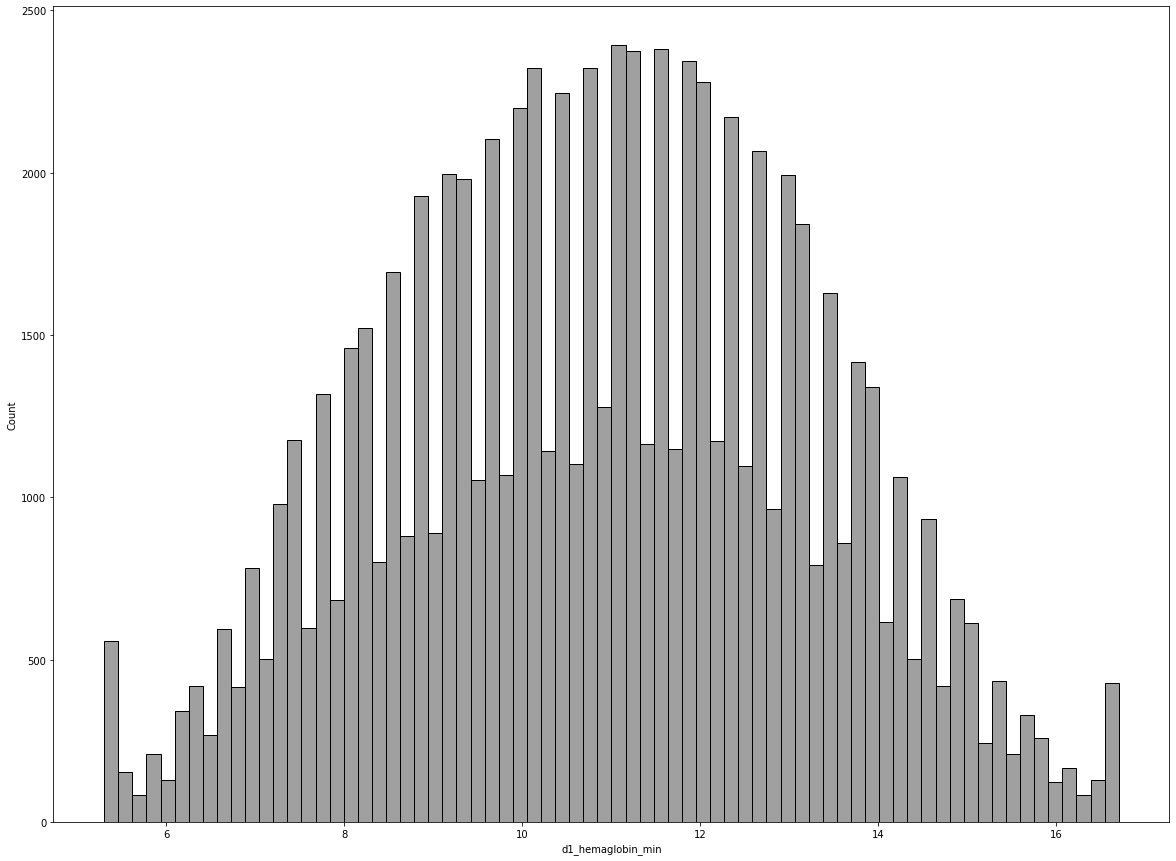

* d1_hematocrit_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_hematocrit_max
313
Número de elementos nulos: 11367 ( 0.13 )


* d1_hematocrit_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_hematocrit_min
341
Número de elementos nulos: 11367 ( 0.13 )


* d1_inr_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_inr_max
475
Número de elementos nulos: 56779 ( 0.63 )


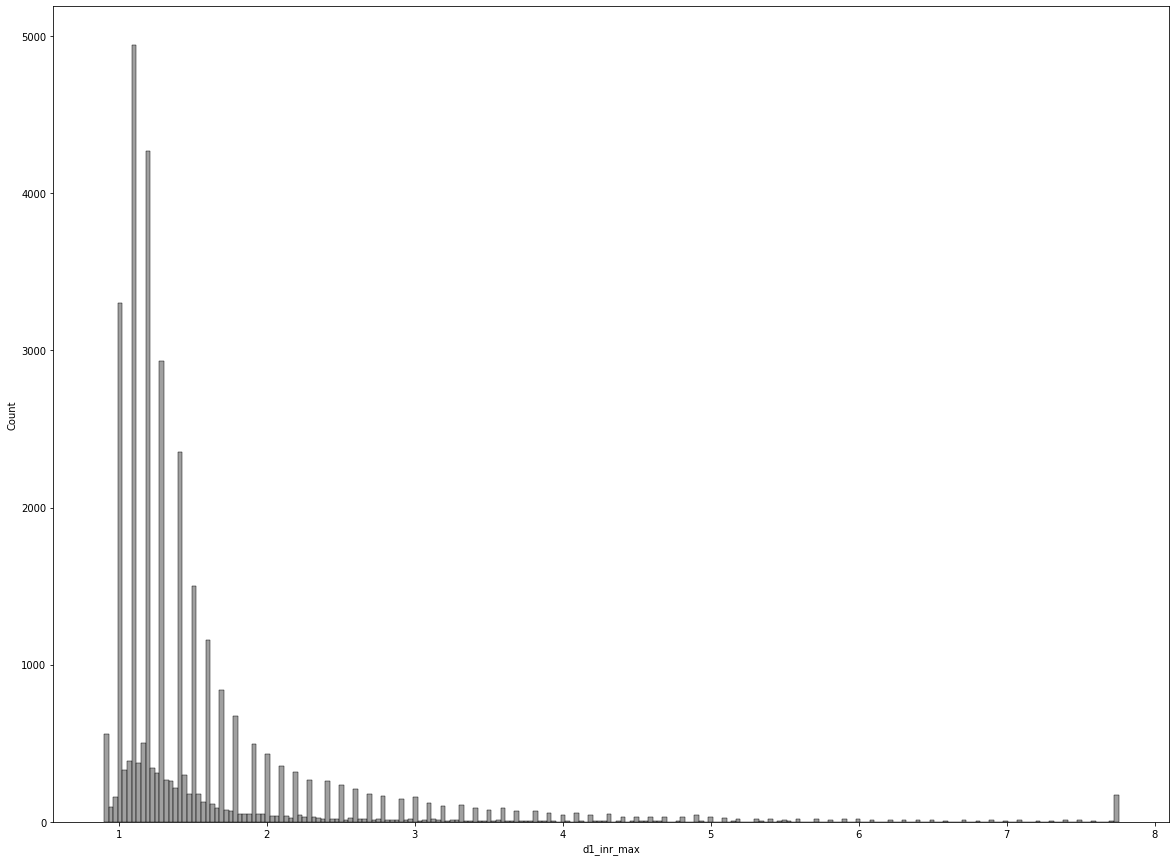

* d1_inr_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_inr_min
387
Número de elementos nulos: 56779 ( 0.63 )


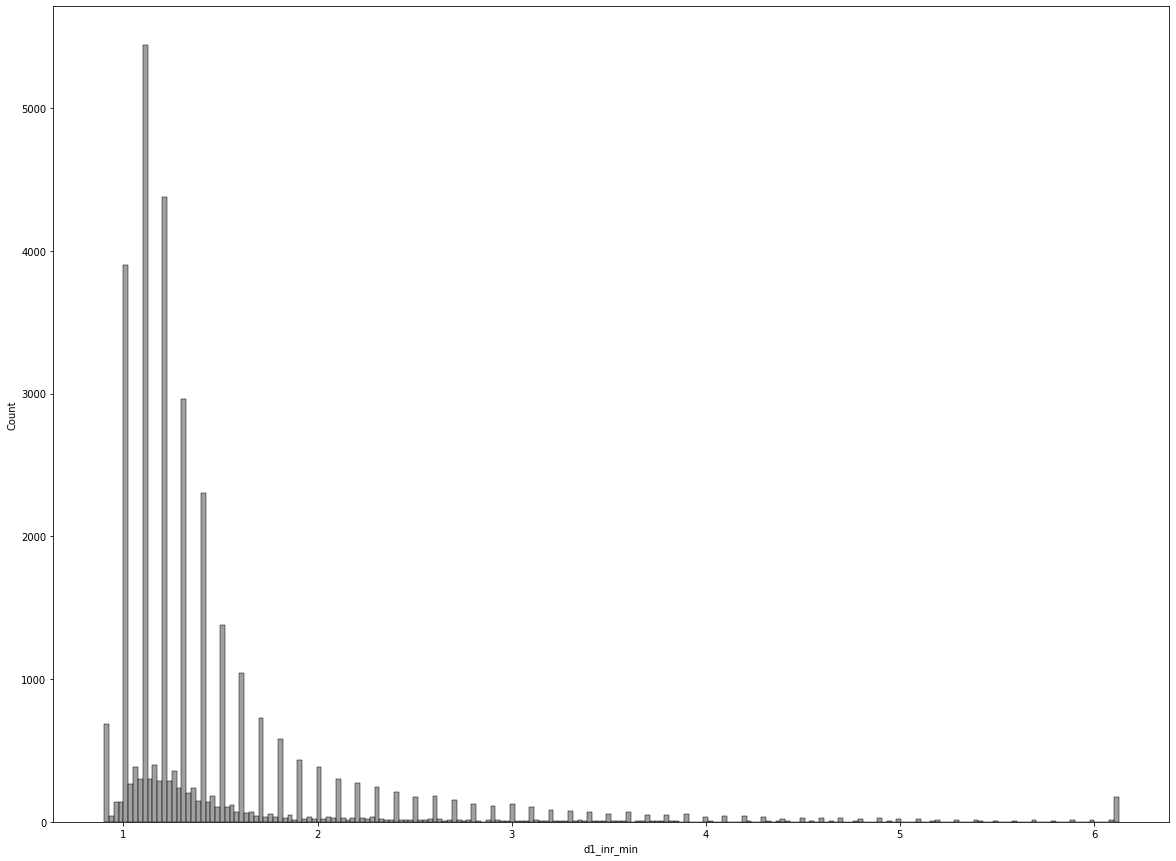

* d1_lactate_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_lactate_max
692
Número de elementos nulos: 67130 ( 0.75 )


* d1_lactate_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_lactate_min
478
Número de elementos nulos: 67130 ( 0.75 )


* d1_platelets_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_platelets_max
560
Número de elementos nulos: 13120 ( 0.15 )


* d1_platelets_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_platelets_min
541
Número de elementos nulos: 13120 ( 0.15 )


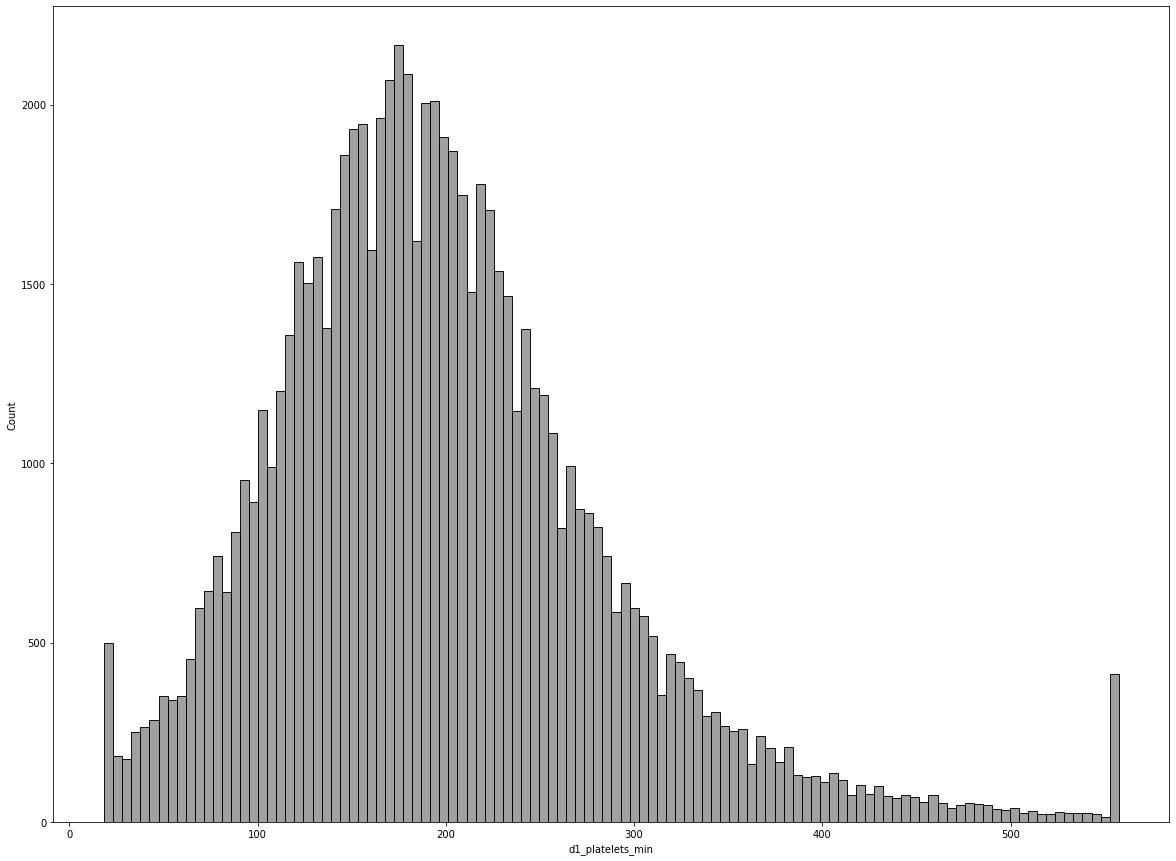

* d1_potassium_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_potassium_max
101
Número de elementos nulos: 9334 ( 0.1 )


* d1_potassium_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_potassium_min
114
Número de elementos nulos: 9334 ( 0.1 )


* d1_sodium_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_sodium_max
71
Número de elementos nulos: 9938 ( 0.11 )


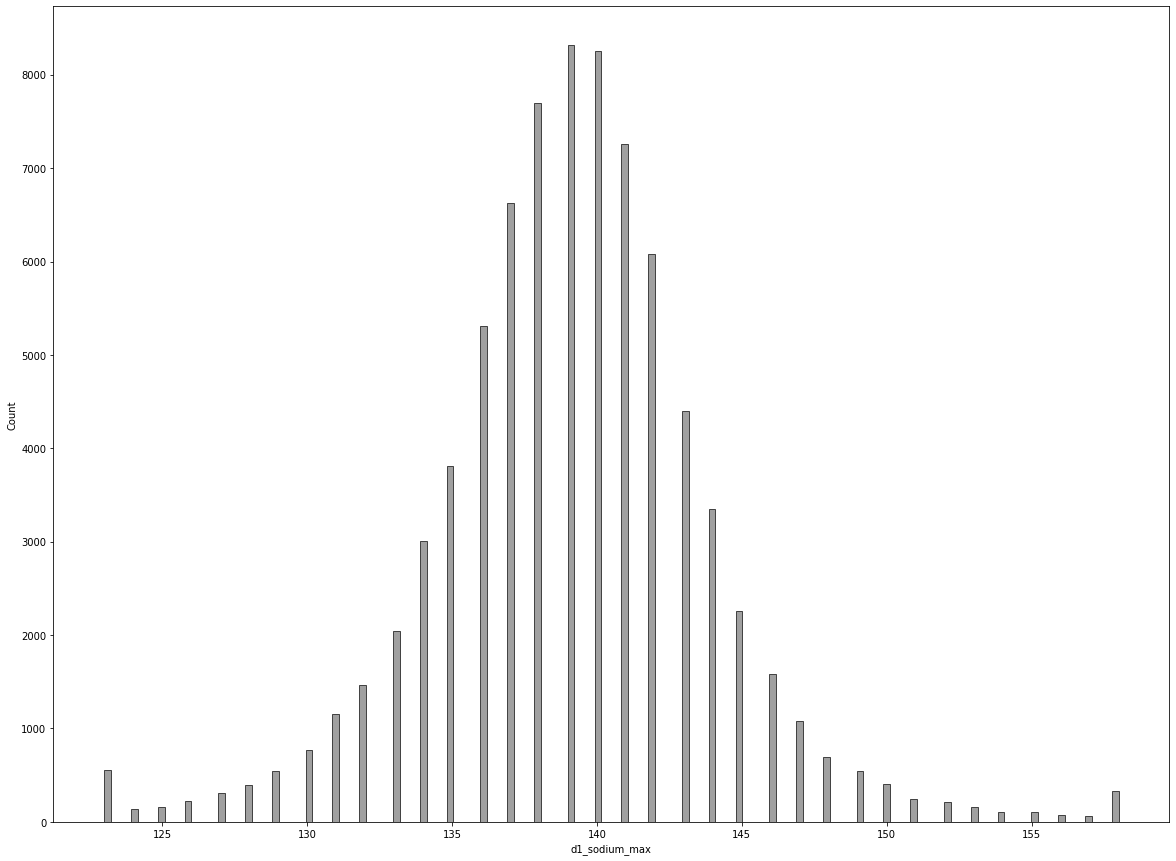

* d1_sodium_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_sodium_min
135
Número de elementos nulos: 9938 ( 0.11 )


* d1_wbc_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_wbc_max
3074
Número de elementos nulos: 12852 ( 0.14 )


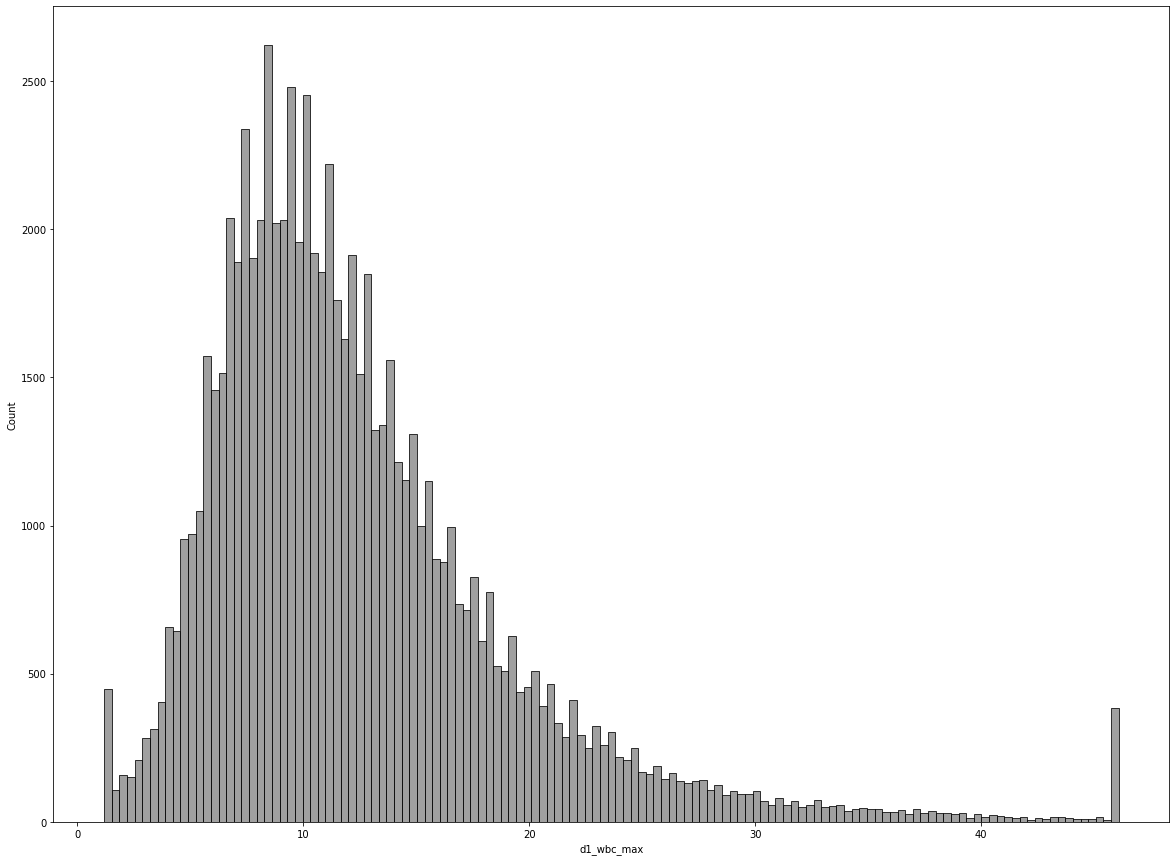

* d1_wbc_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_wbc_min
2759
Número de elementos nulos: 12852 ( 0.14 )


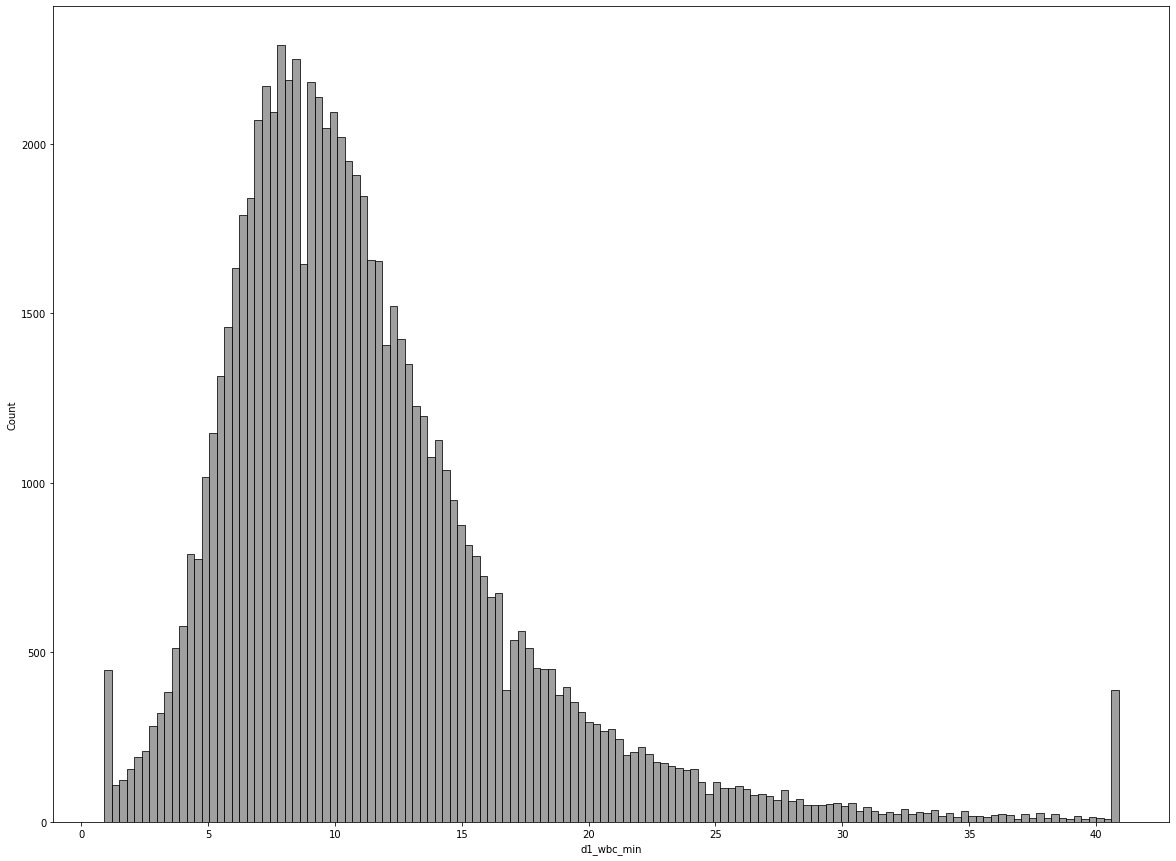

* h1_albumin_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_albumin_max
38
Número de elementos nulos: 82042 ( 0.91 )


* h1_albumin_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_albumin_min
38
Número de elementos nulos: 82042 ( 0.91 )


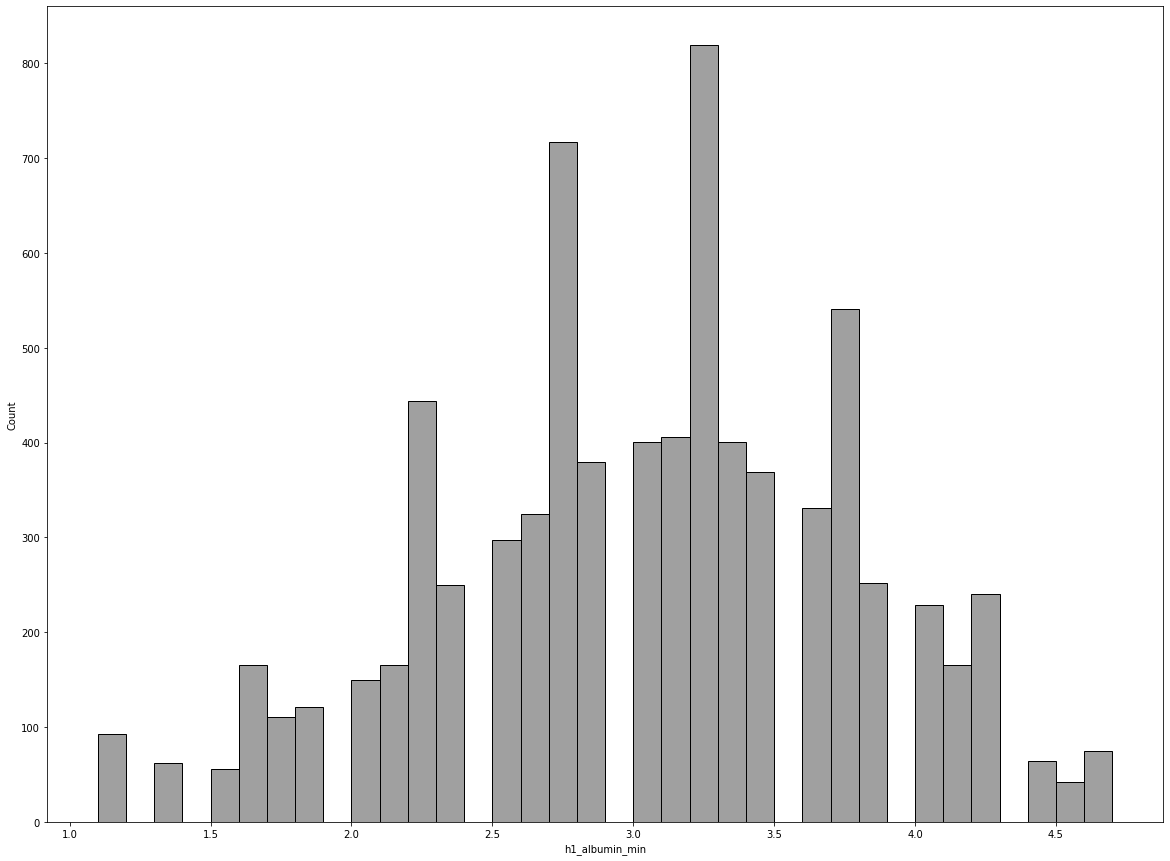

* h1_bilirubin_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_bilirubin_max
176
Número de elementos nulos: 82813 ( 0.92 )


* h1_bilirubin_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_bilirubin_min
176
Número de elementos nulos: 82813 ( 0.92 )


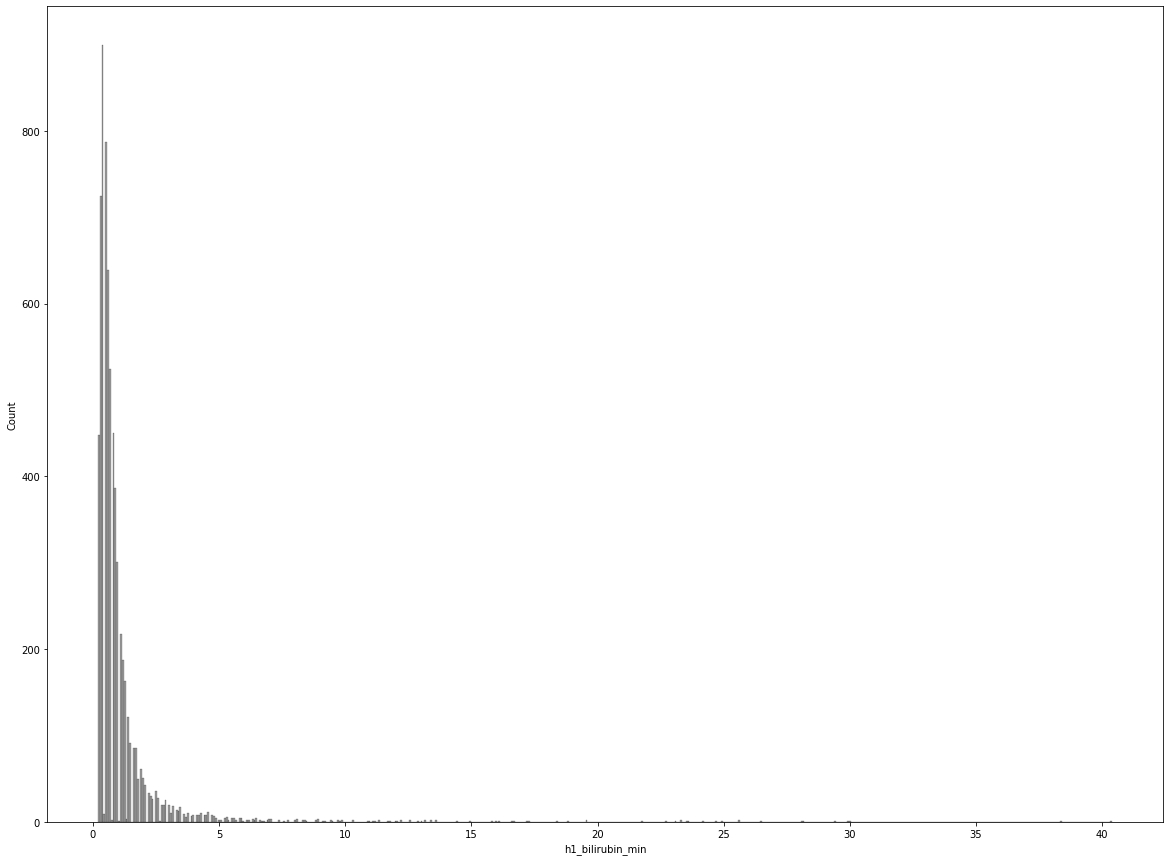

* h1_bun_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_bun_max
257
Número de elementos nulos: 73480 ( 0.82 )


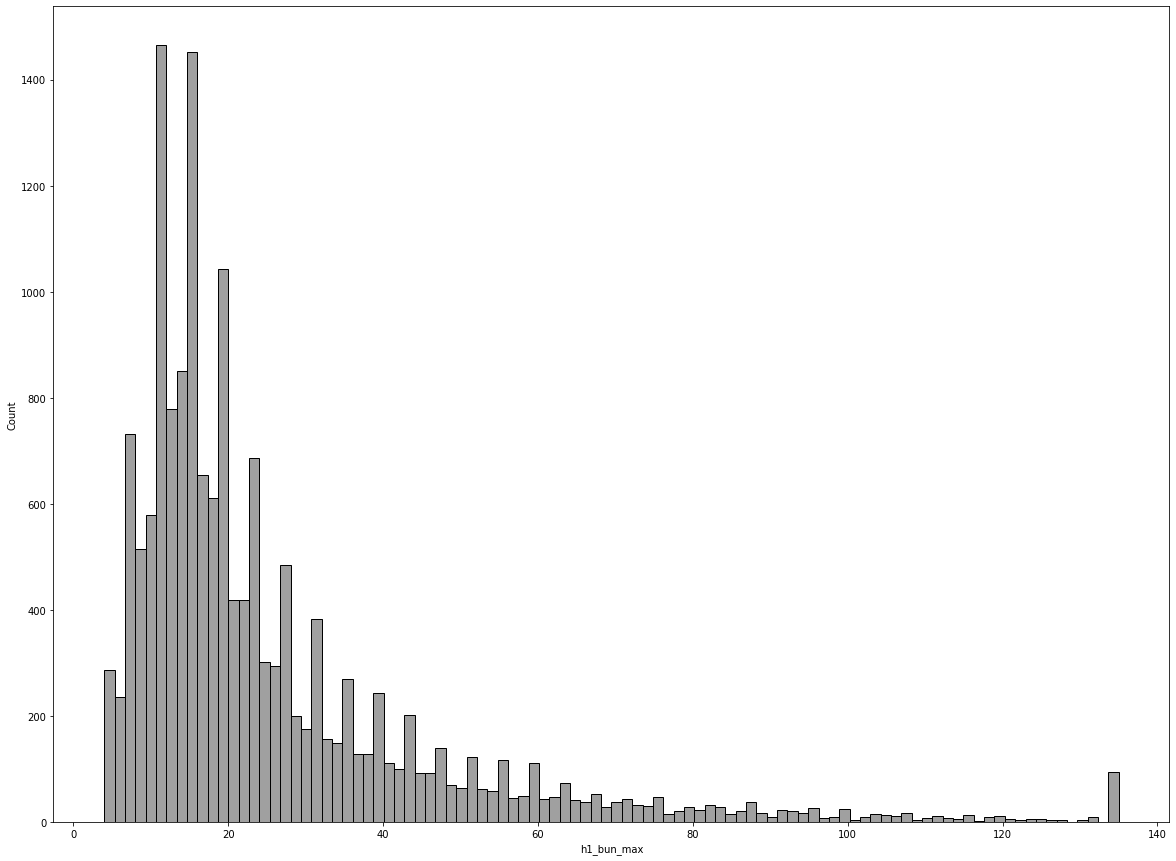

* h1_bun_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_bun_min
257
Número de elementos nulos: 73480 ( 0.82 )


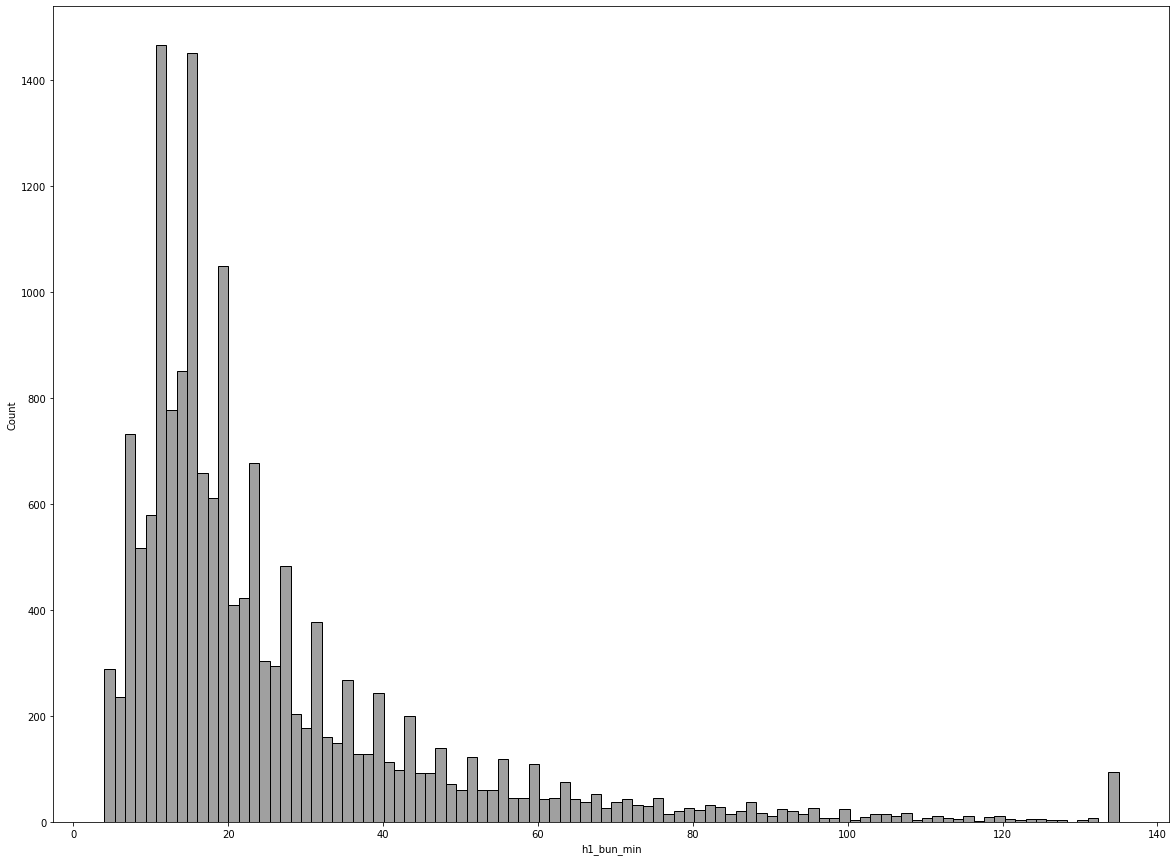

* h1_calcium_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_calcium_max
60
Número de elementos nulos: 74235 ( 0.83 )


* h1_calcium_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_calcium_min
63
Número de elementos nulos: 74235 ( 0.83 )


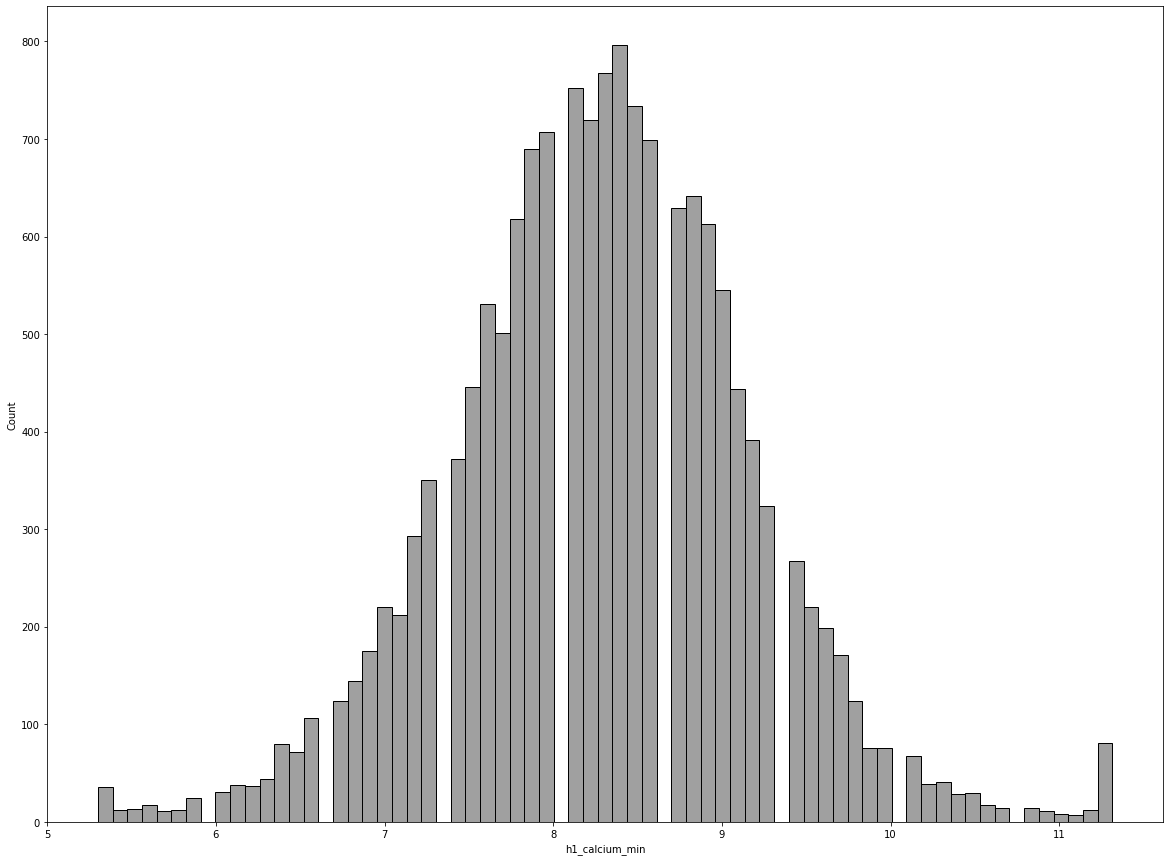

* h1_creatinine_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_creatinine_max
782
Número de elementos nulos: 73345 ( 0.82 )


* h1_creatinine_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_creatinine_min
775
Número de elementos nulos: 73345 ( 0.82 )


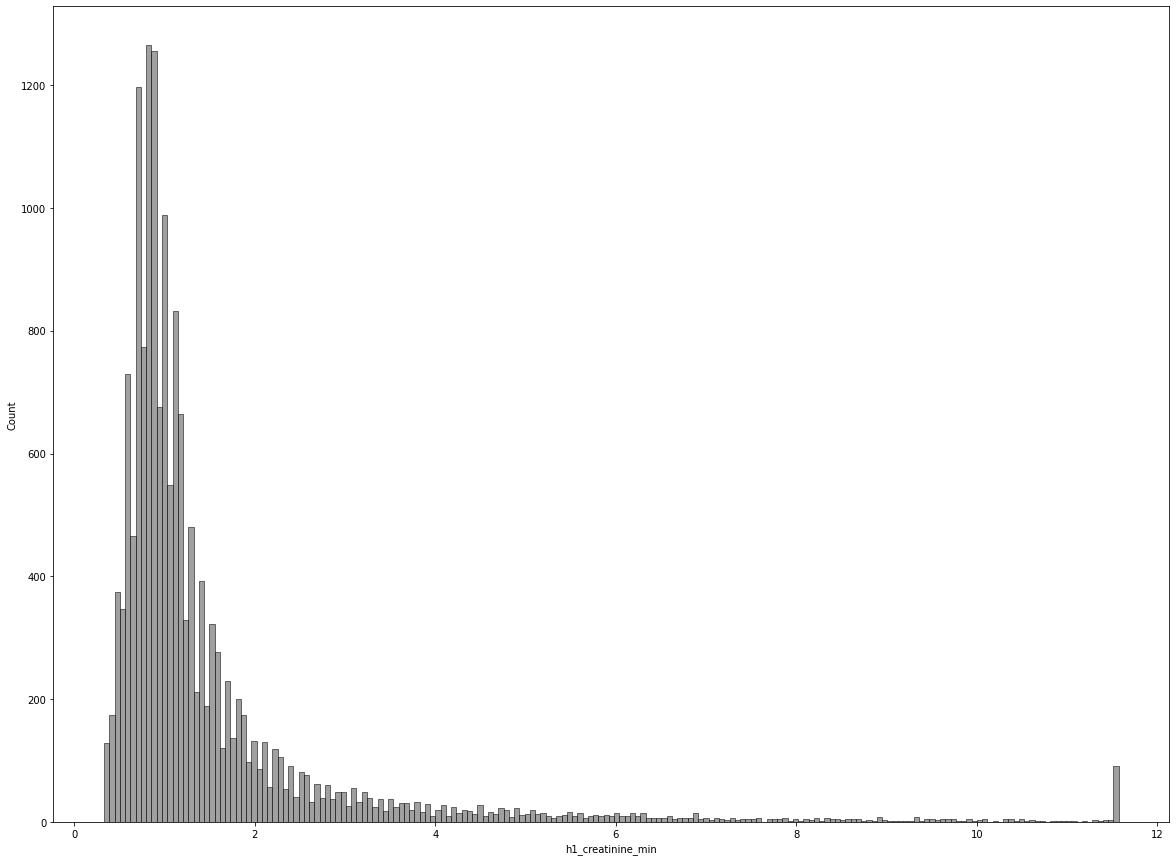

* h1_glucose_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_glucose_max
600
Número de elementos nulos: 51490 ( 0.57 )


* h1_glucose_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_glucose_min
585
Número de elementos nulos: 51490 ( 0.57 )


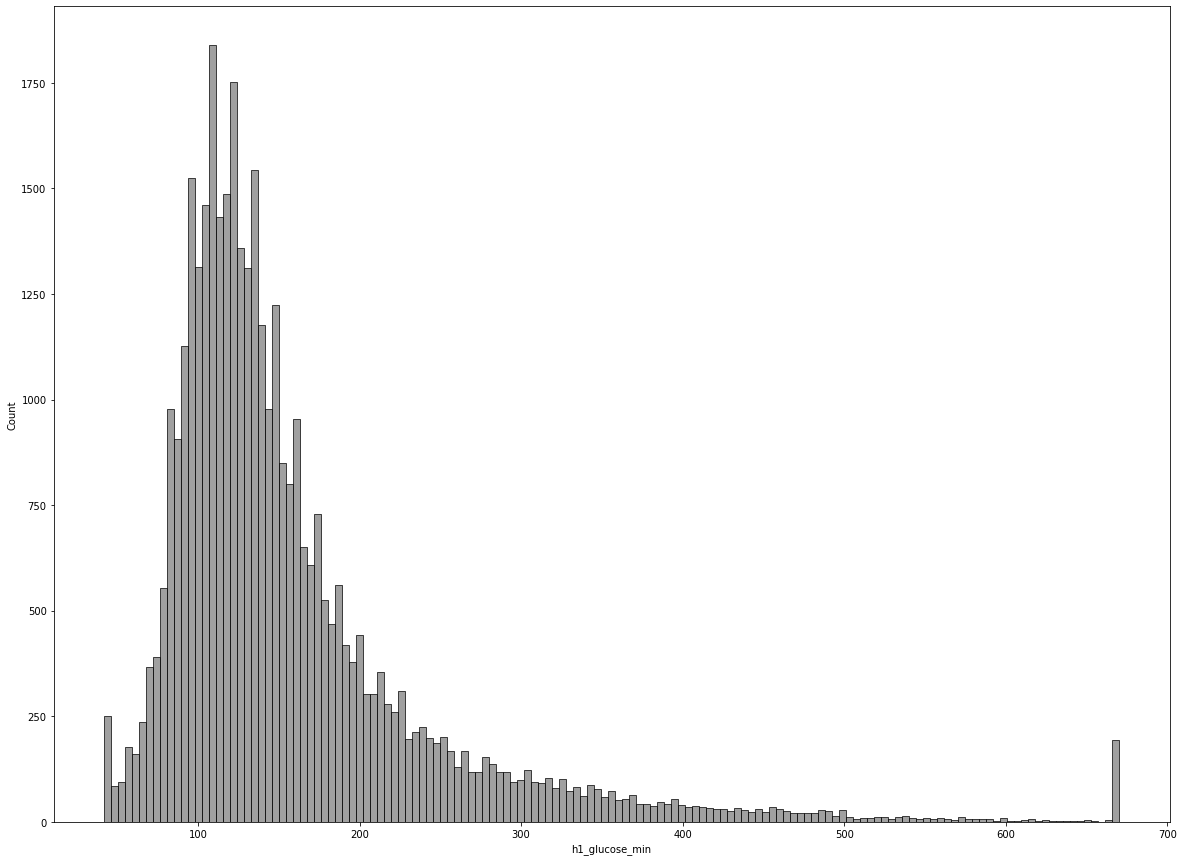

* h1_hco3_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_hco3_max
210
Número de elementos nulos: 74466 ( 0.83 )


* h1_hco3_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_hco3_min
196
Número de elementos nulos: 74466 ( 0.83 )


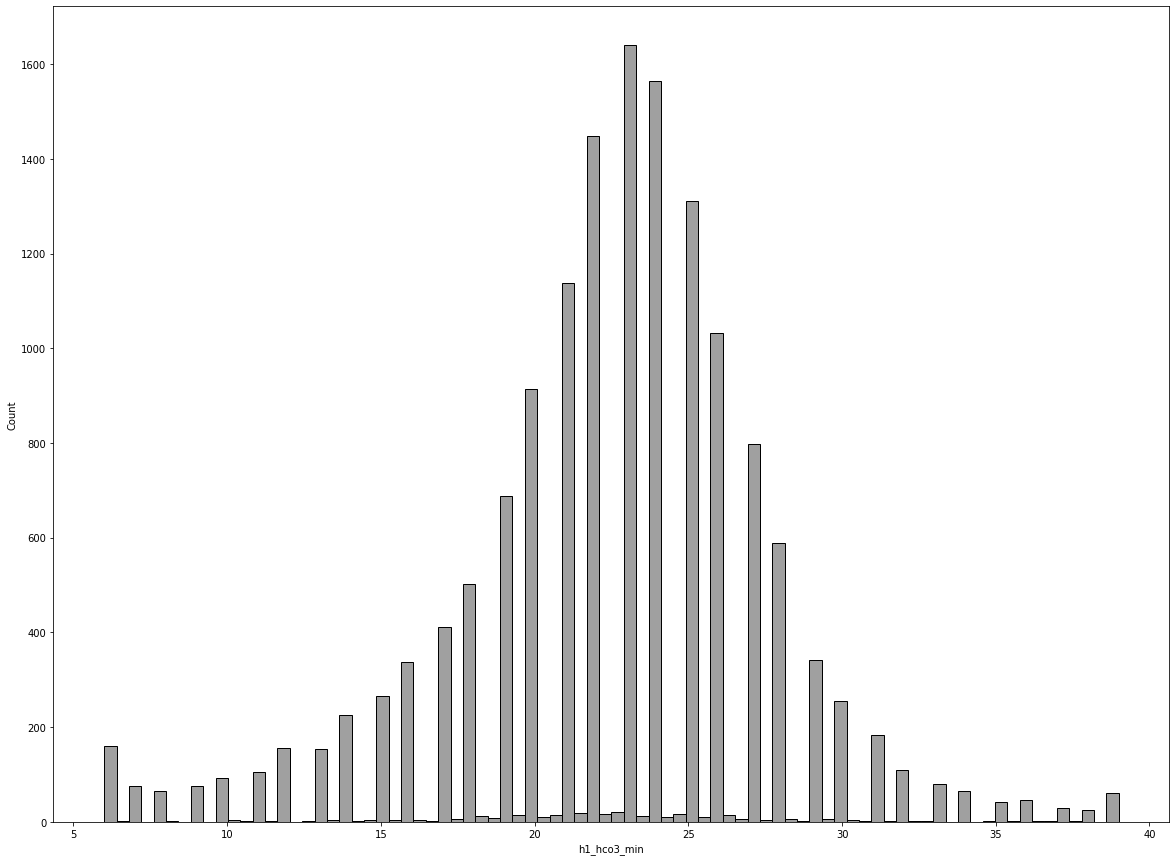

* h1_hemaglobin_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_hemaglobin_max
125
Número de elementos nulos: 71548 ( 0.8 )


* h1_hemaglobin_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_hemaglobin_min
125
Número de elementos nulos: 71548 ( 0.8 )


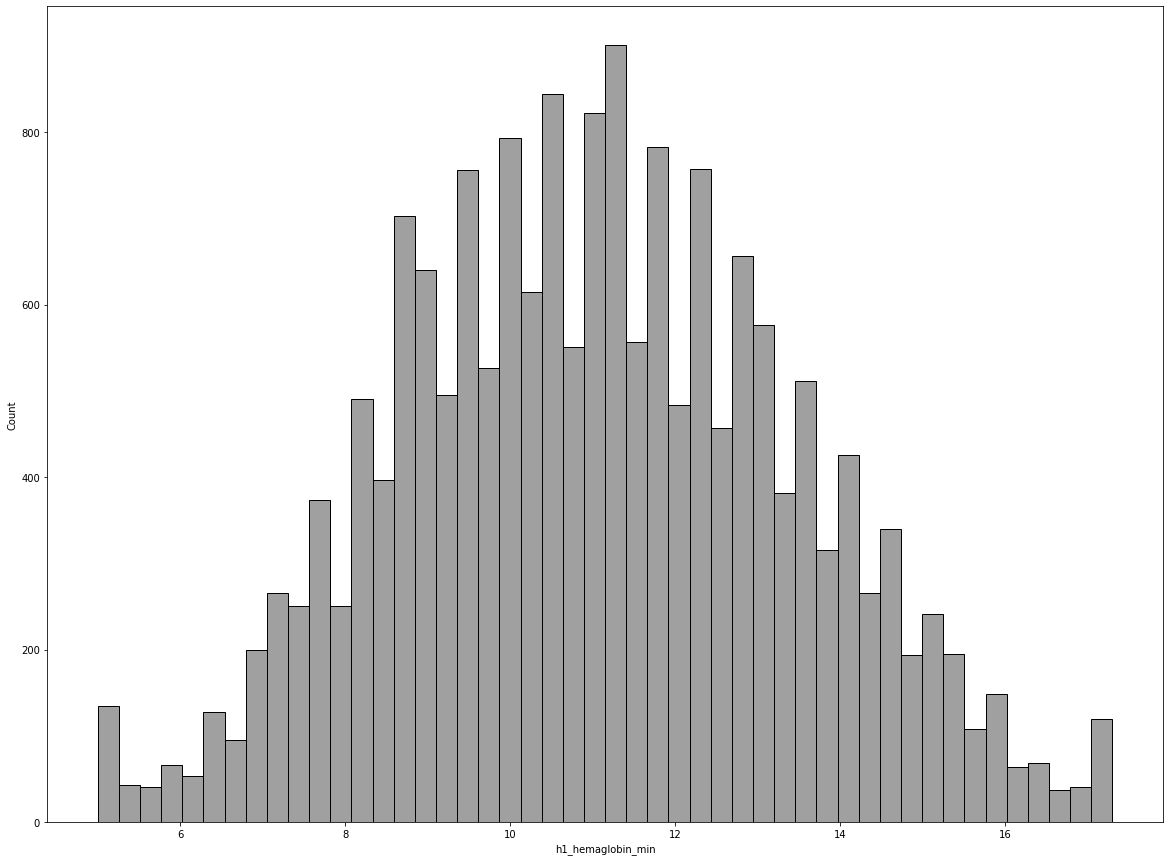

* h1_hematocrit_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_hematocrit_max
359
Número de elementos nulos: 71837 ( 0.8 )


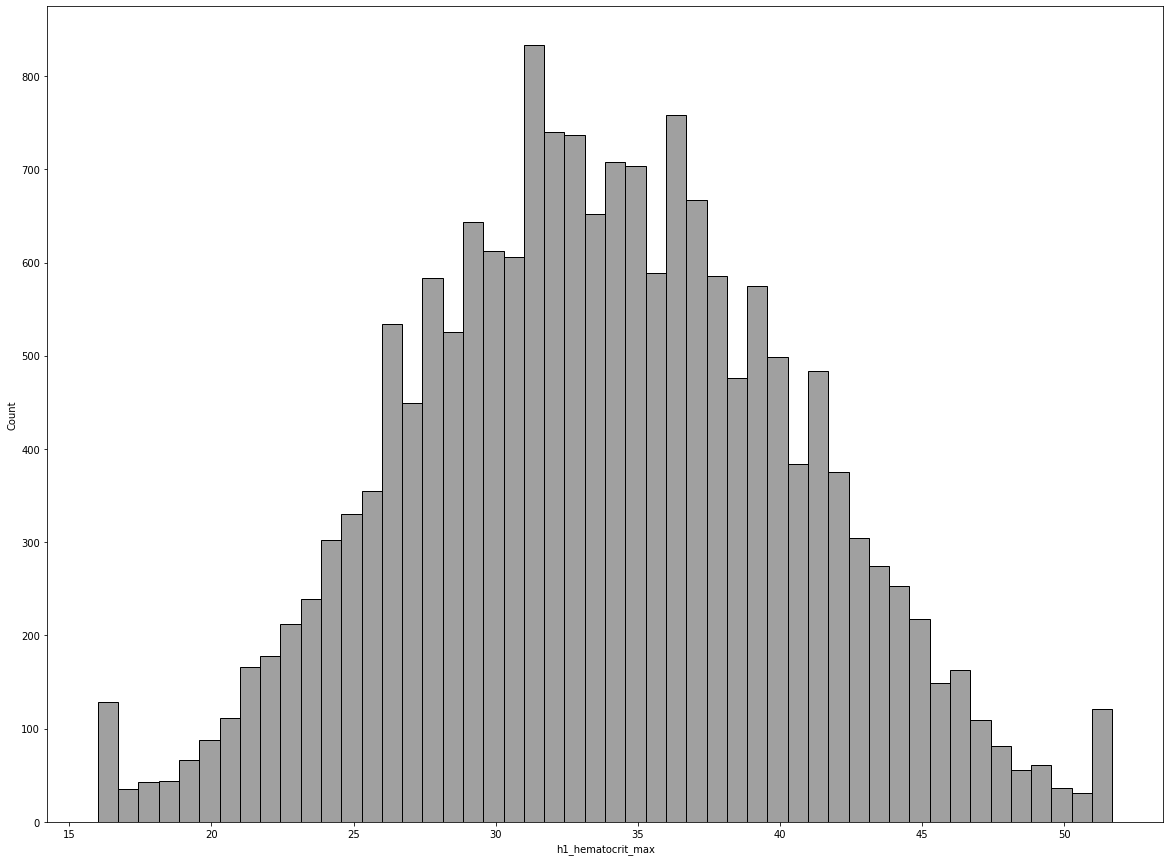

* h1_hematocrit_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_hematocrit_min
362
Número de elementos nulos: 71837 ( 0.8 )


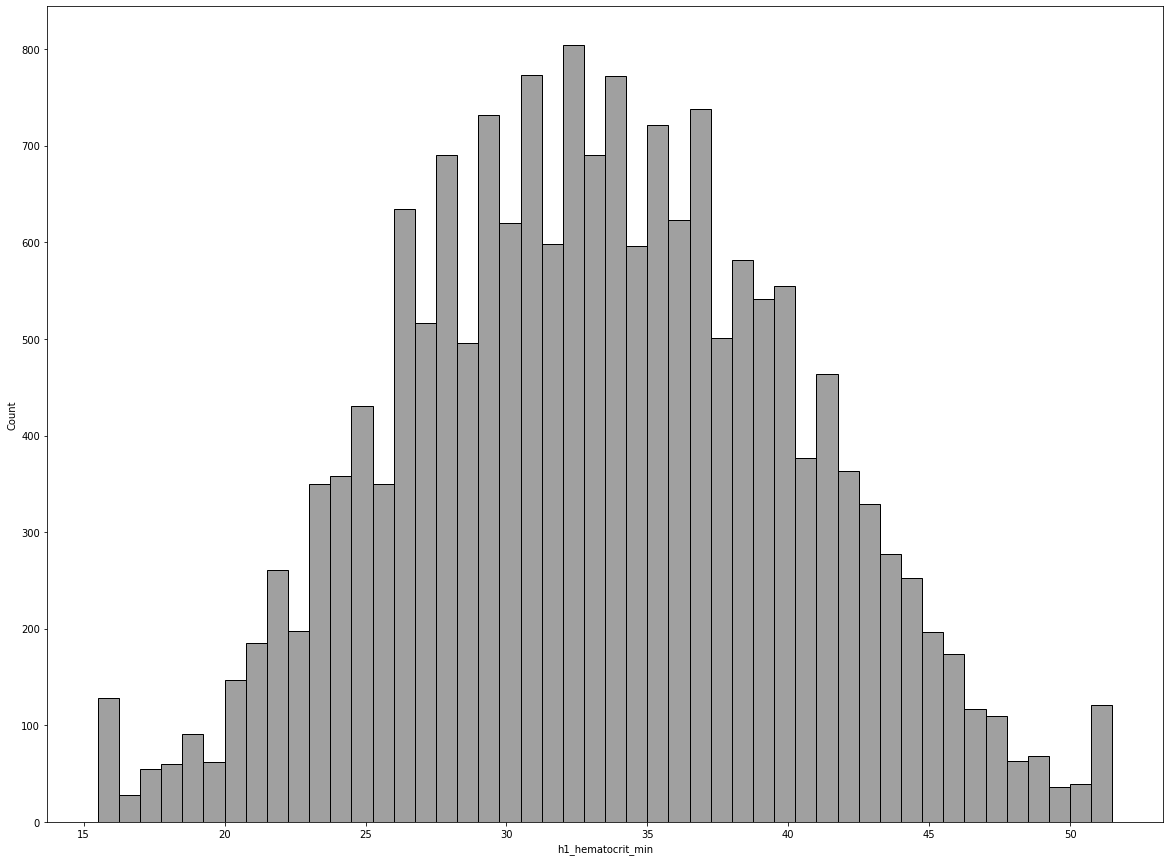

* h1_inr_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_inr_max
475
Número de elementos nulos: 56779 ( 0.63 )


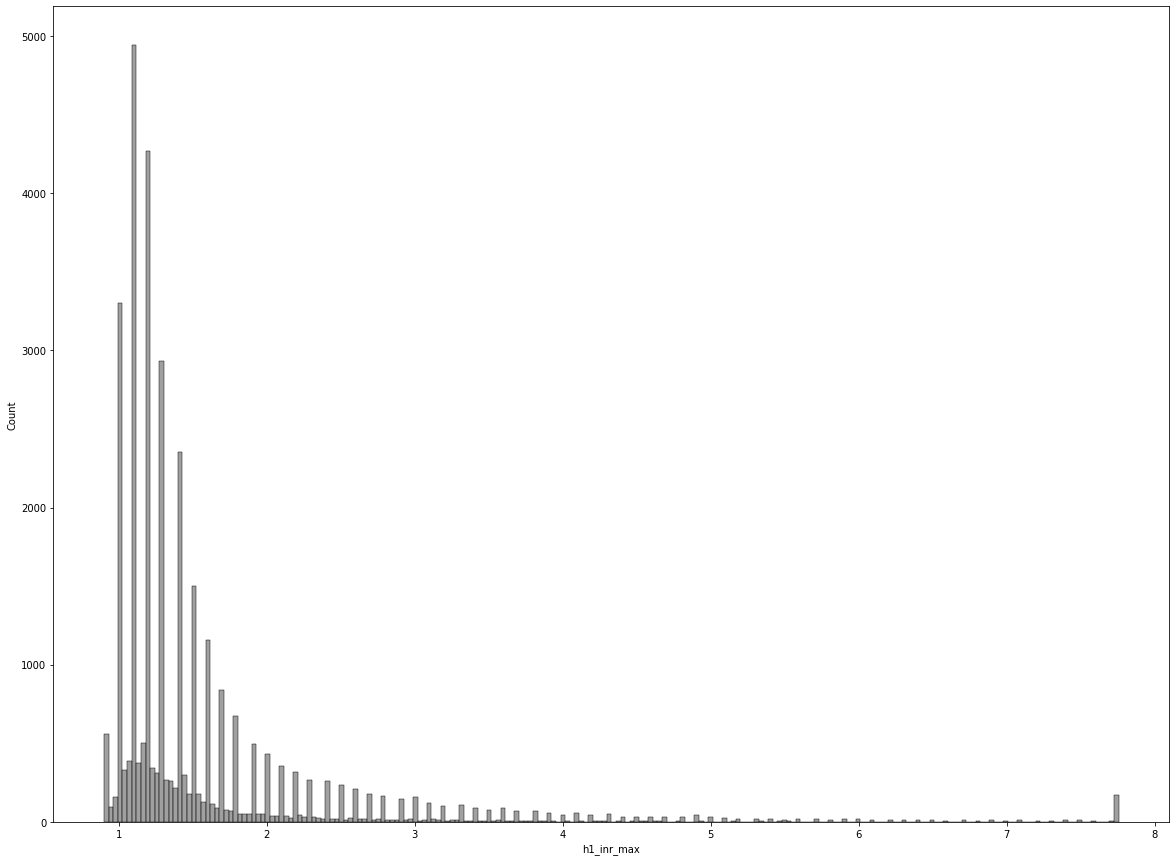

* h1_inr_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_inr_min
387
Número de elementos nulos: 56779 ( 0.63 )


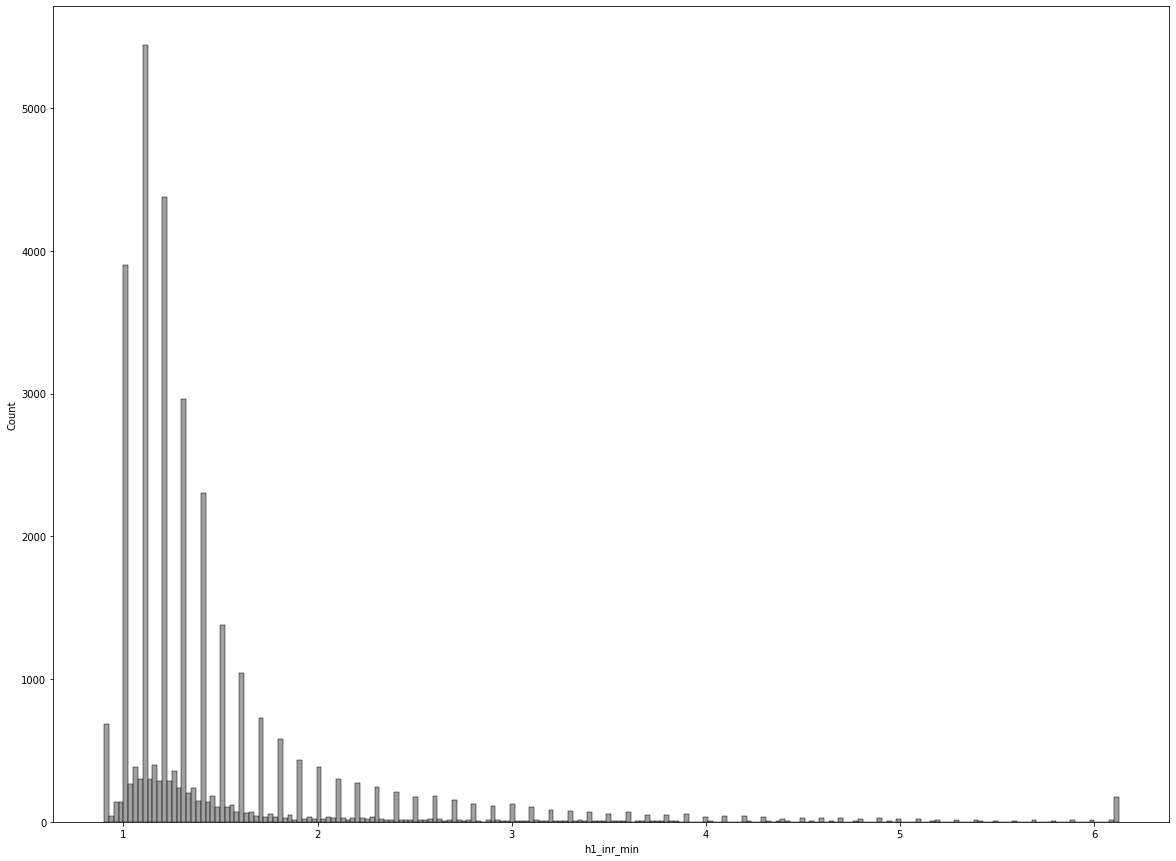

* h1_lactate_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_lactate_max
539
Número de elementos nulos: 82615 ( 0.92 )


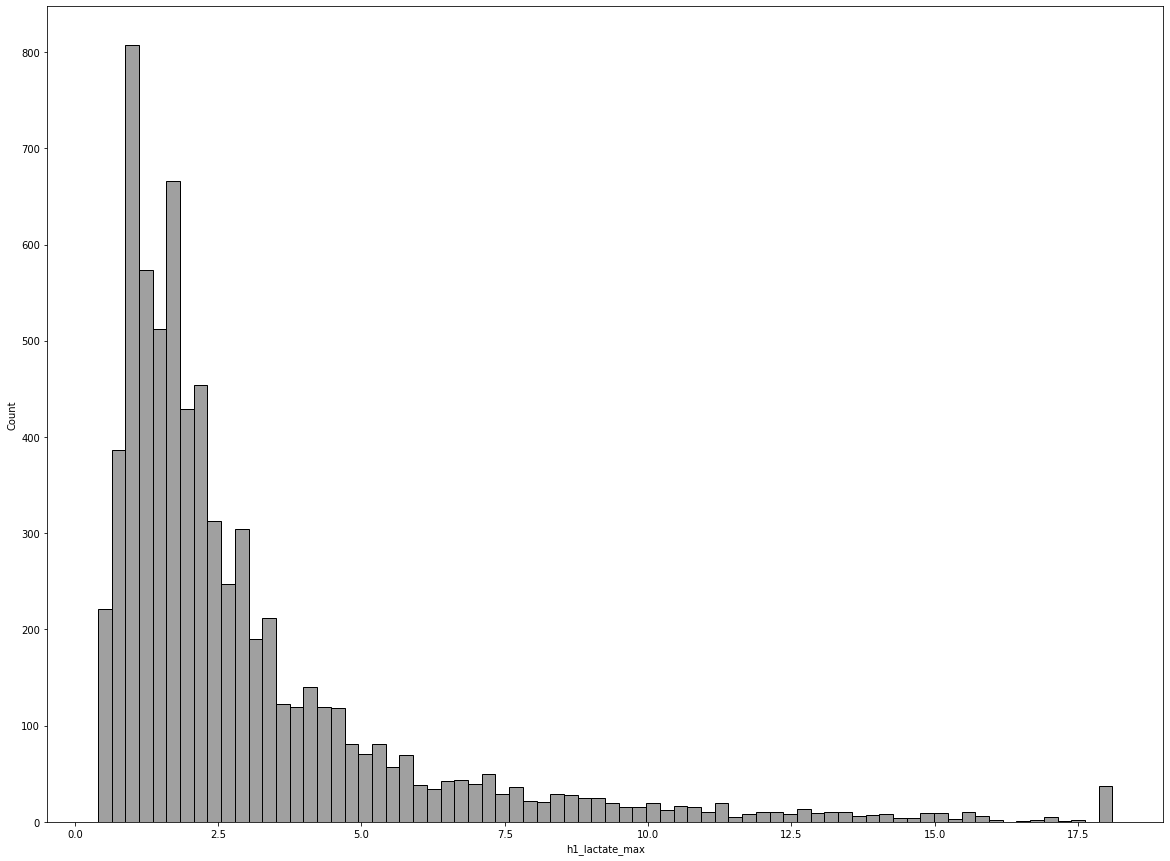

* h1_lactate_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_lactate_min
531
Número de elementos nulos: 82615 ( 0.92 )


* h1_platelets_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_platelets_max
543
Número de elementos nulos: 74038 ( 0.83 )


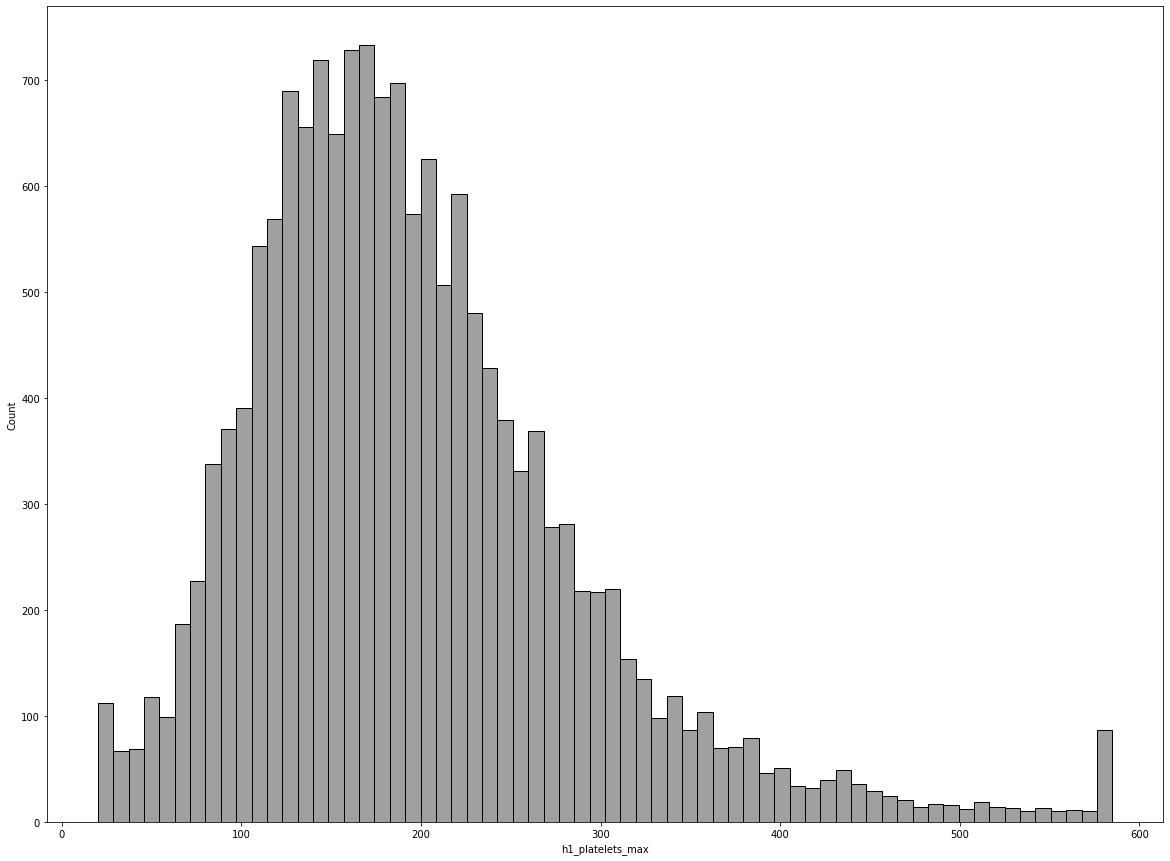

* h1_platelets_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_platelets_min
544
Número de elementos nulos: 74038 ( 0.83 )


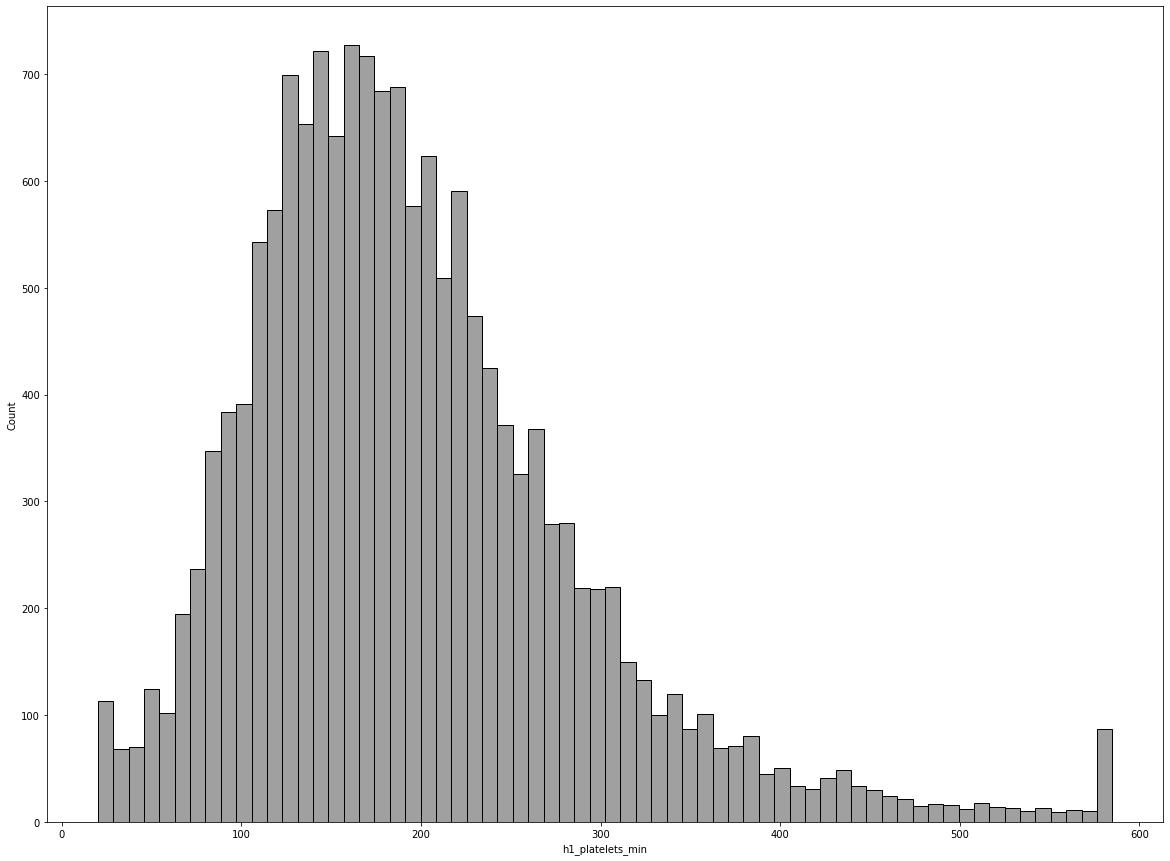

* h1_potassium_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_potassium_max
116
Número de elementos nulos: 70566 ( 0.79 )


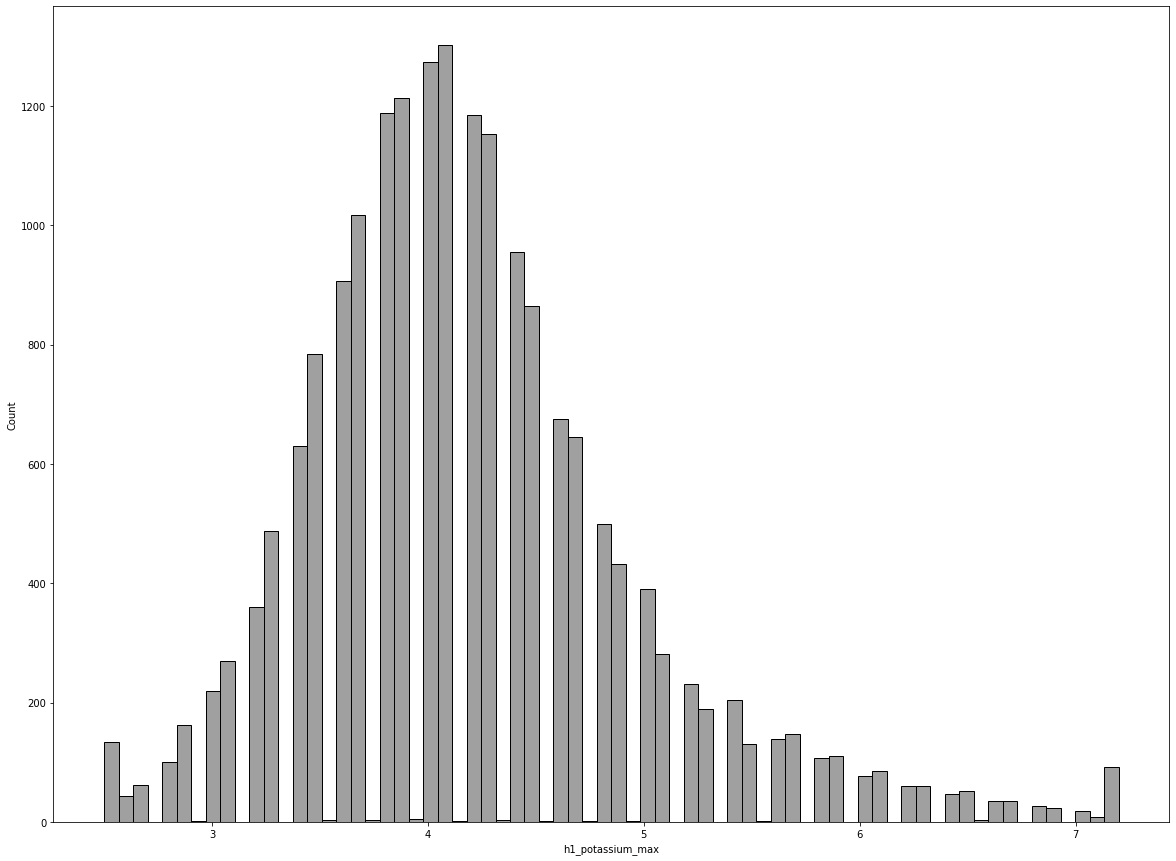

* h1_potassium_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_potassium_min
114
Número de elementos nulos: 70566 ( 0.79 )


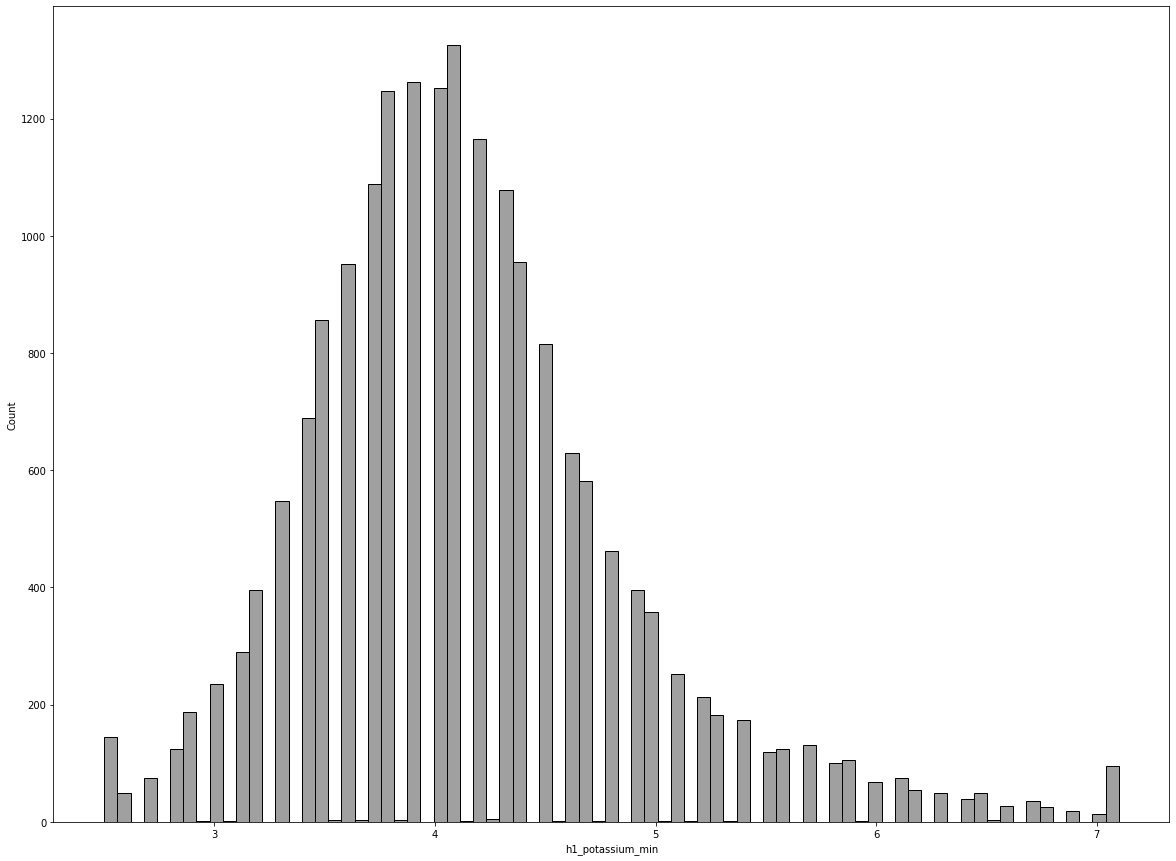

* h1_sodium_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_sodium_max
99
Número de elementos nulos: 71078 ( 0.79 )


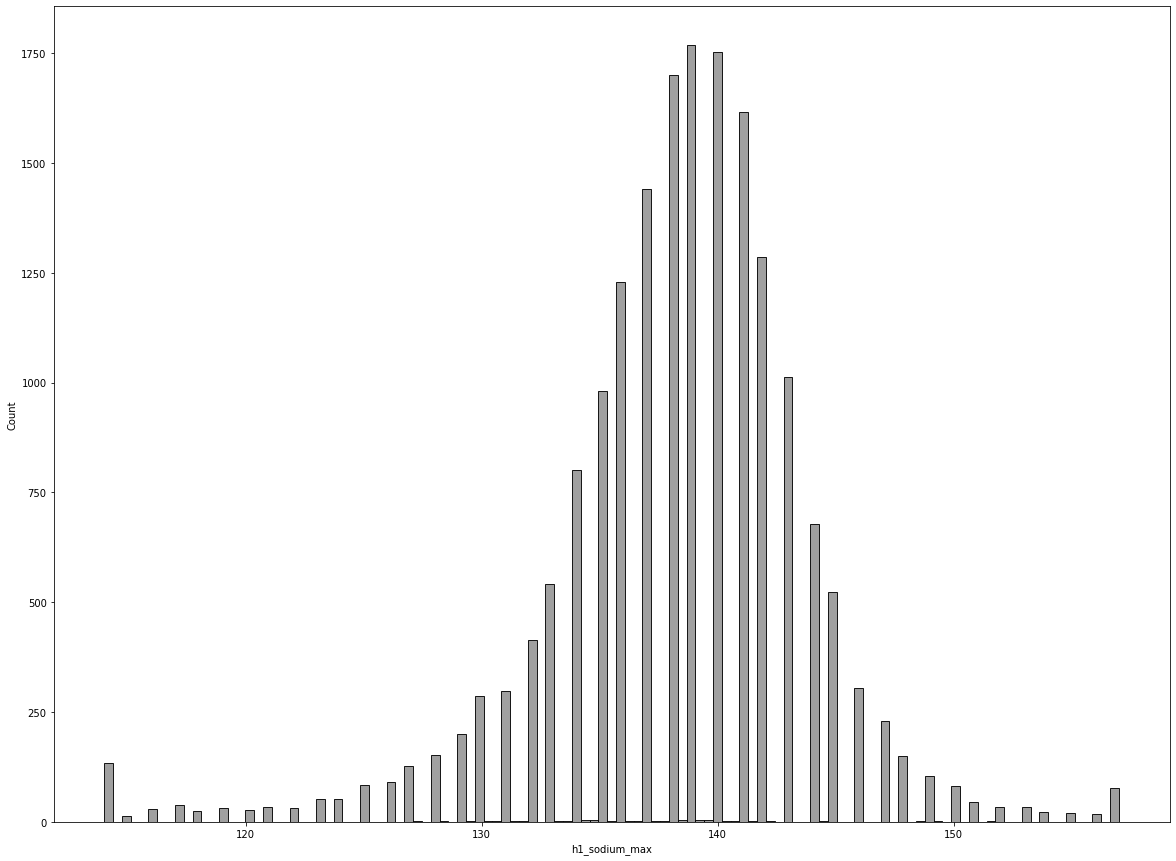

* h1_sodium_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_sodium_min
113
Número de elementos nulos: 71078 ( 0.79 )


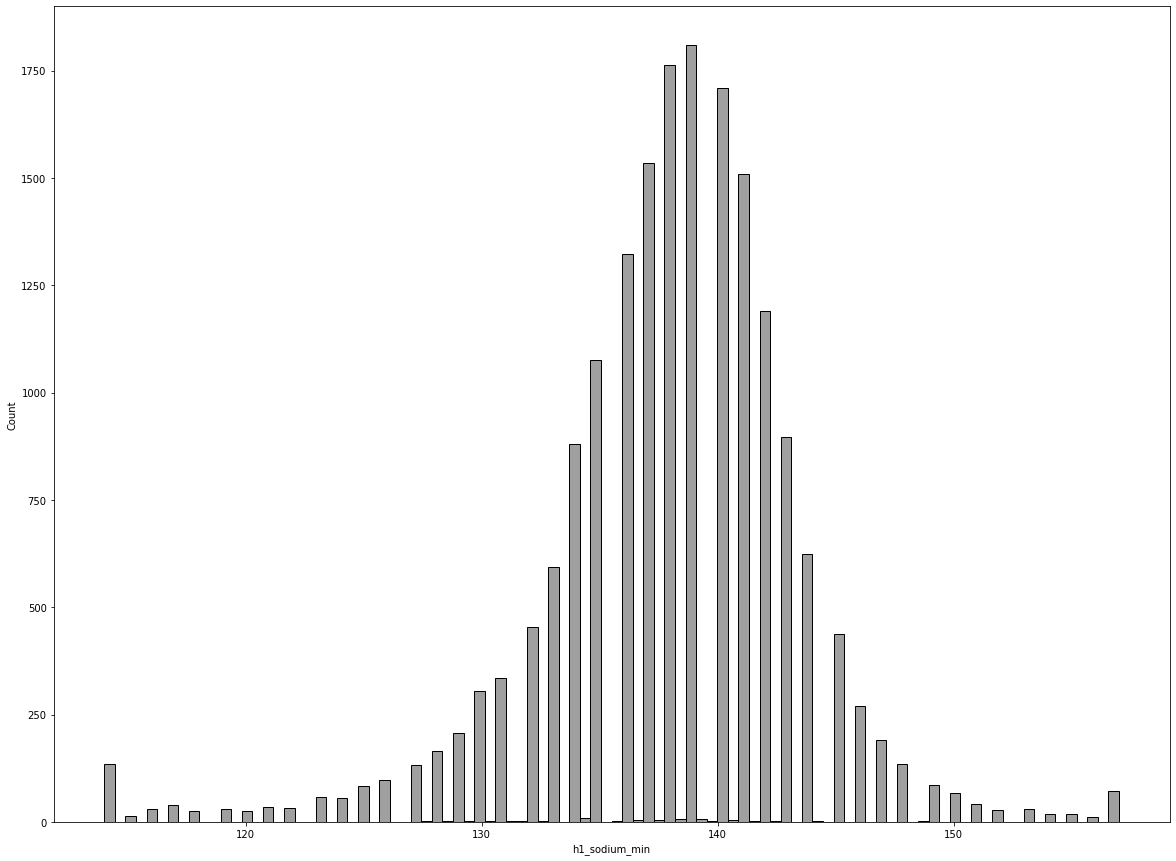

* h1_wbc_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_wbc_max
2053
Número de elementos nulos: 74306 ( 0.83 )


* h1_wbc_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_wbc_min
2051
Número de elementos nulos: 74306 ( 0.83 )


* d1_arterial_pco2_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_arterial_pco2_max
829
Número de elementos nulos: 58253 ( 0.65 )


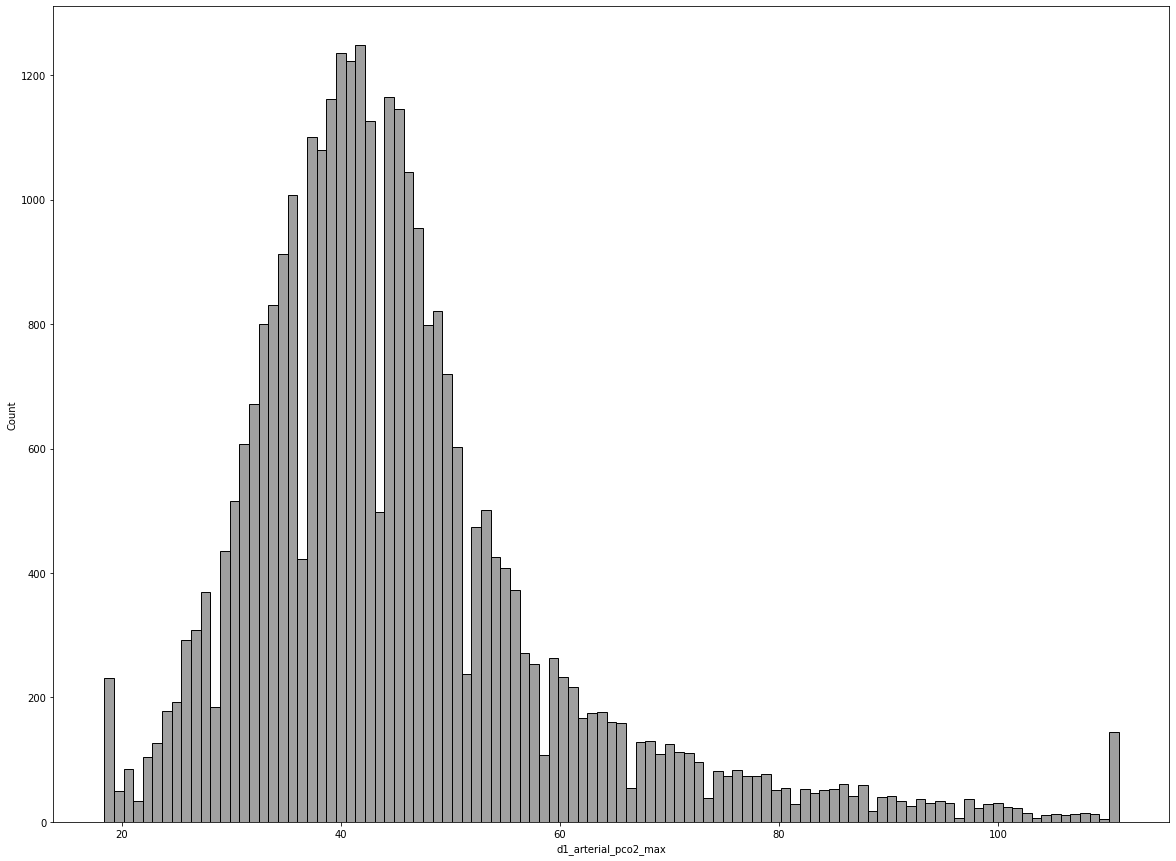

* d1_arterial_pco2_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_arterial_pco2_min
674
Número de elementos nulos: 58253 ( 0.65 )


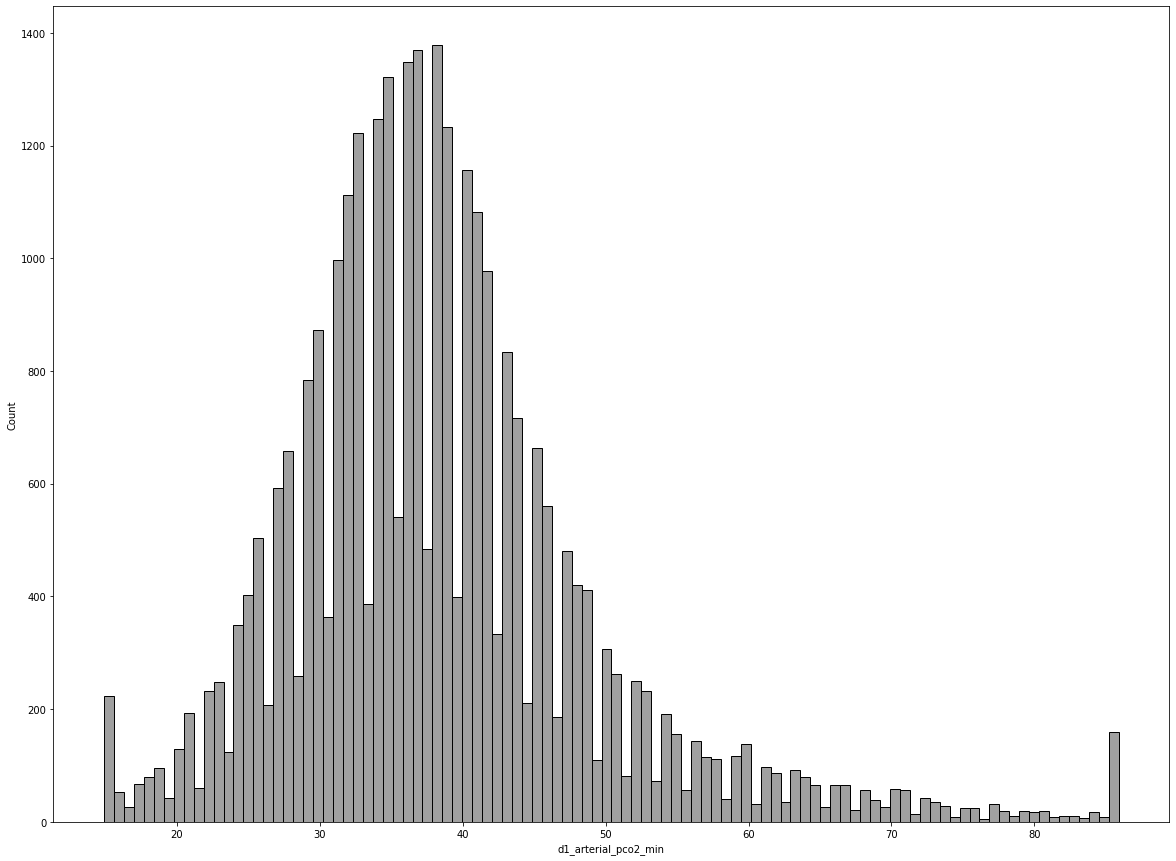

* d1_arterial_ph_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_arterial_ph_max
523
Número de elementos nulos: 59070 ( 0.66 )


* d1_arterial_ph_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_arterial_ph_min
622
Número de elementos nulos: 59070 ( 0.66 )


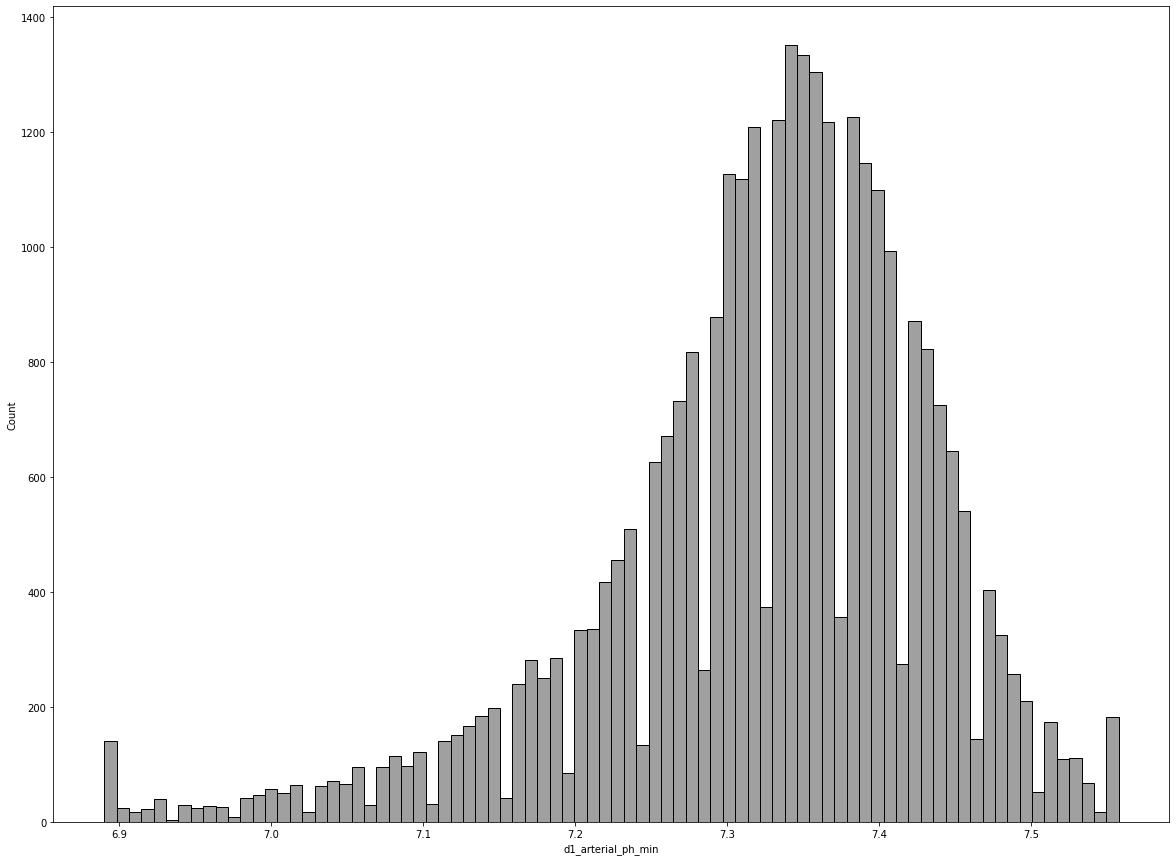

* d1_arterial_po2_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_arterial_po2_max
2386
Número de elementos nulos: 58241 ( 0.65 )


* d1_arterial_po2_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_arterial_po2_min
1802
Número de elementos nulos: 58241 ( 0.65 )


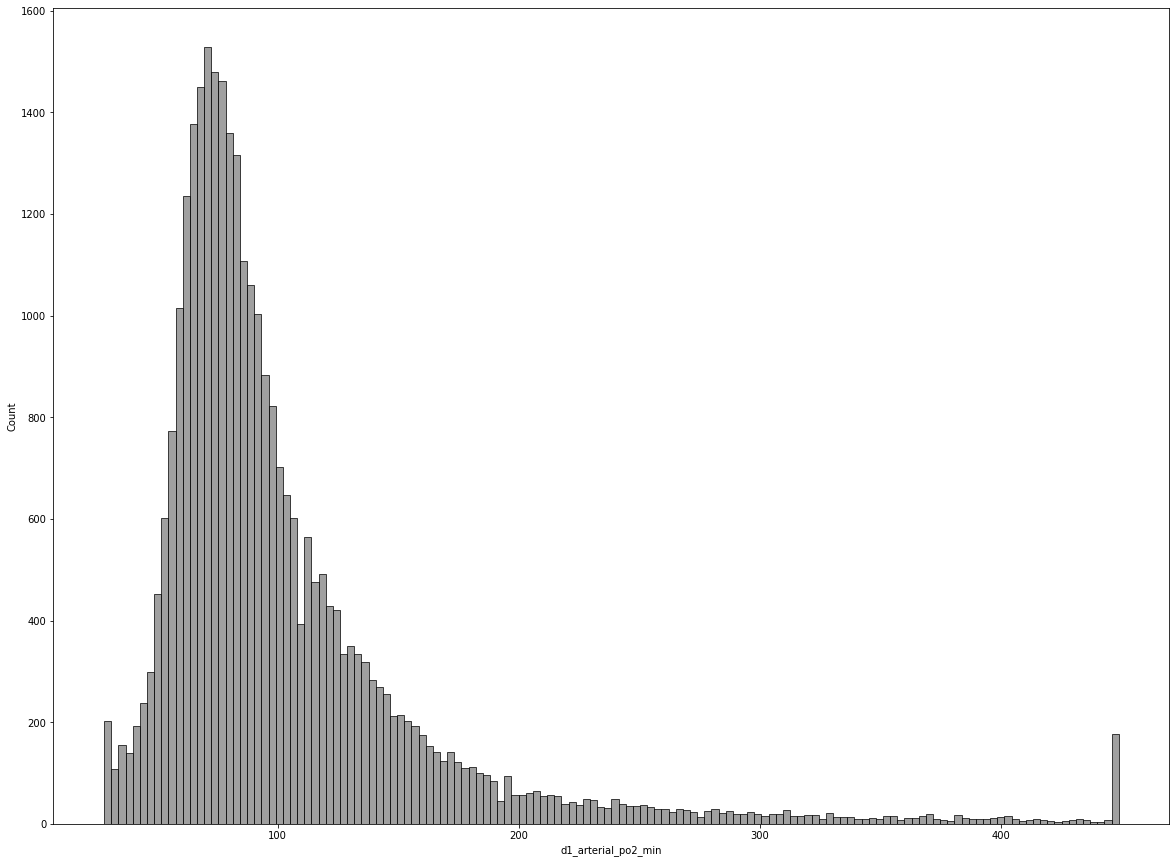

* d1_pao2fio2ratio_max
tipo de datos: float64
Número de diferentes elementos de la columna d1_pao2fio2ratio_max
5091
Número de elementos nulos: 64813 ( 0.72 )


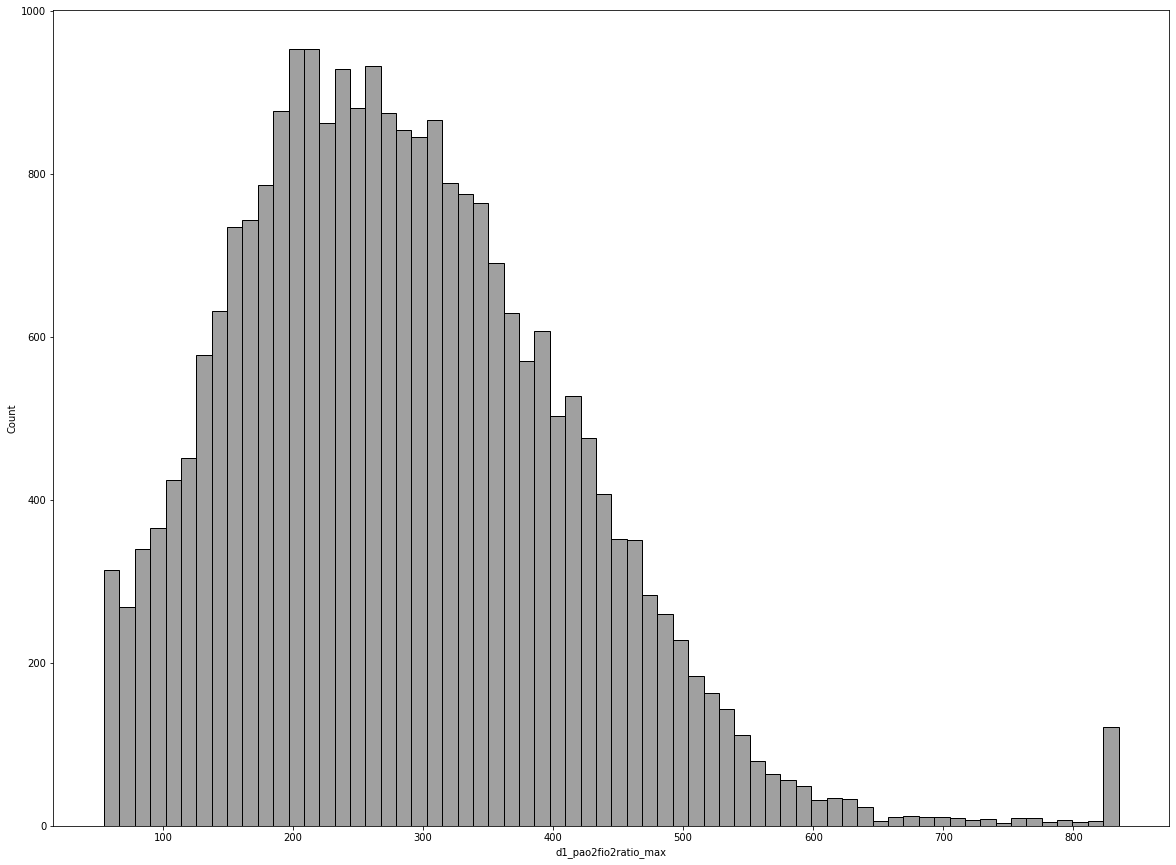

* d1_pao2fio2ratio_min
tipo de datos: float64
Número de diferentes elementos de la columna d1_pao2fio2ratio_min
4908
Número de elementos nulos: 64813 ( 0.72 )


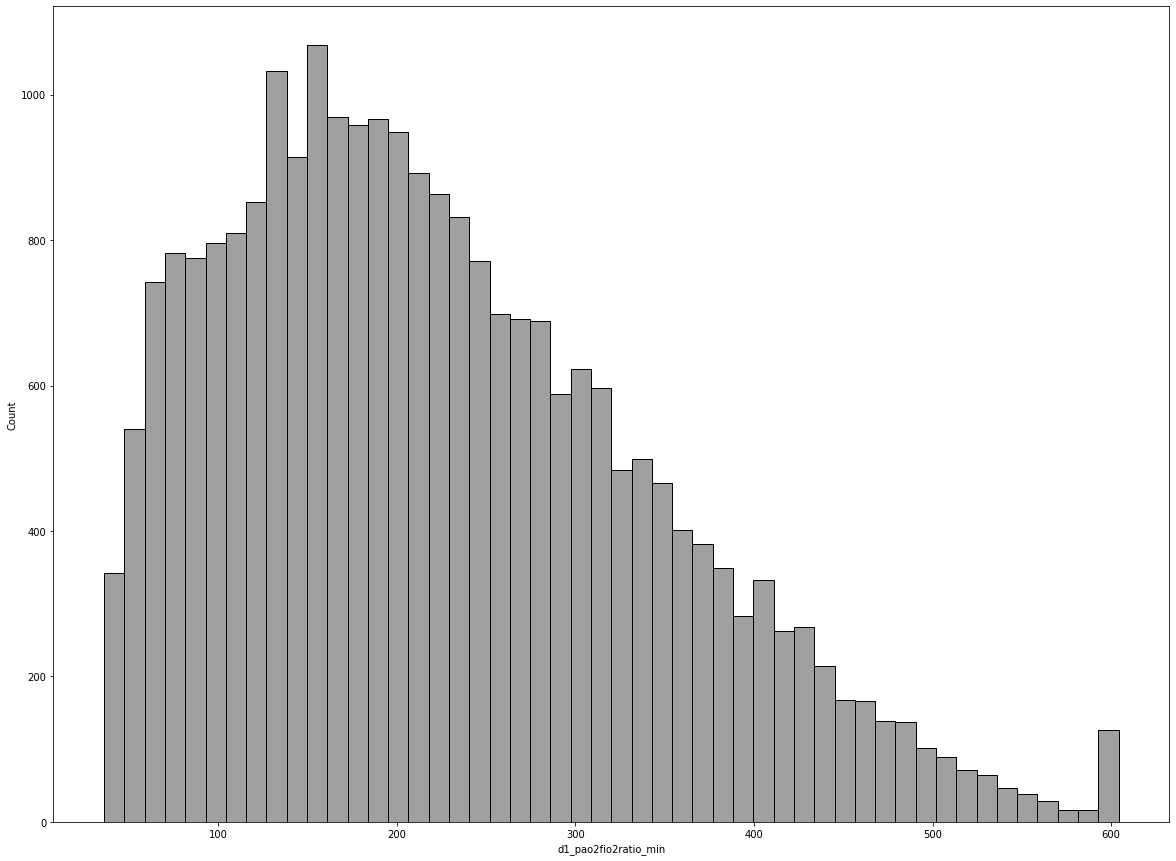

* h1_arterial_pco2_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_arterial_pco2_max
777
Número de elementos nulos: 74402 ( 0.83 )


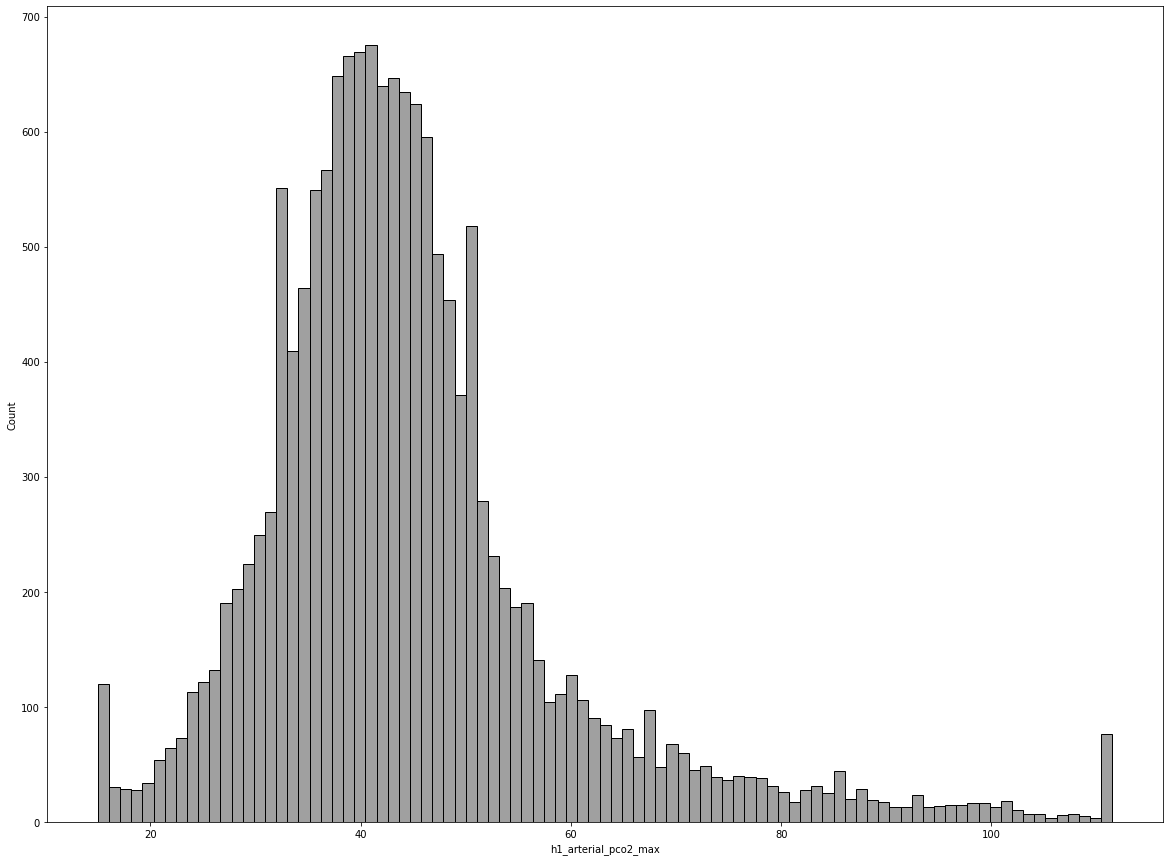

* h1_arterial_pco2_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_arterial_pco2_min
766
Número de elementos nulos: 74402 ( 0.83 )


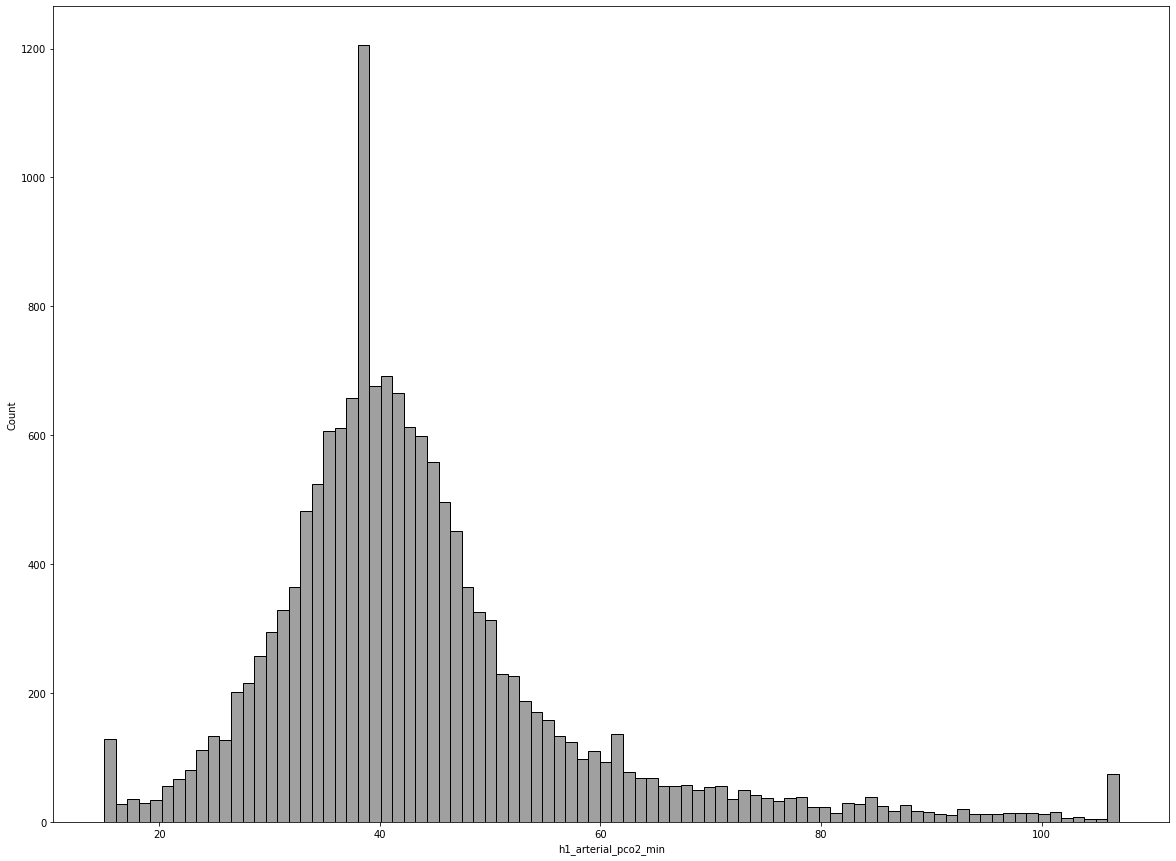

* h1_arterial_ph_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_arterial_ph_max
555
Número de elementos nulos: 74852 ( 0.83 )


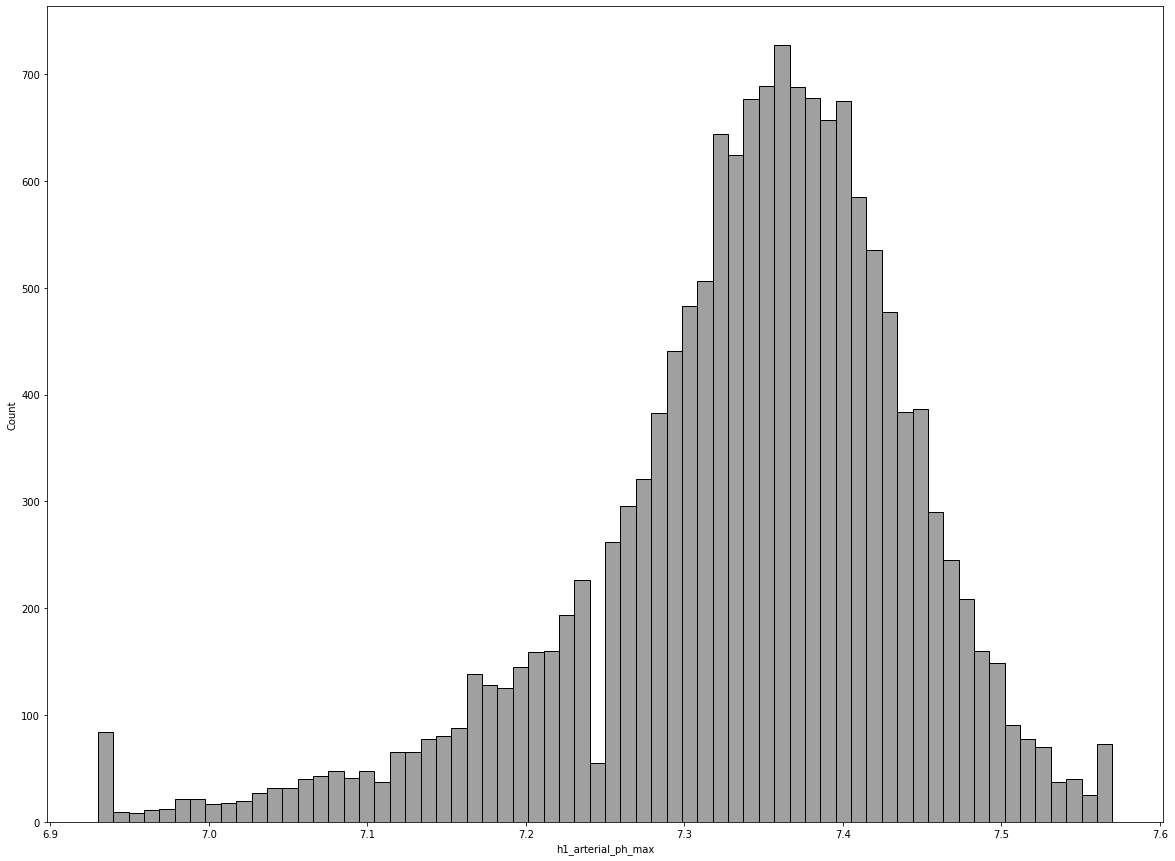

* h1_arterial_ph_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_arterial_ph_min
571
Número de elementos nulos: 74852 ( 0.83 )


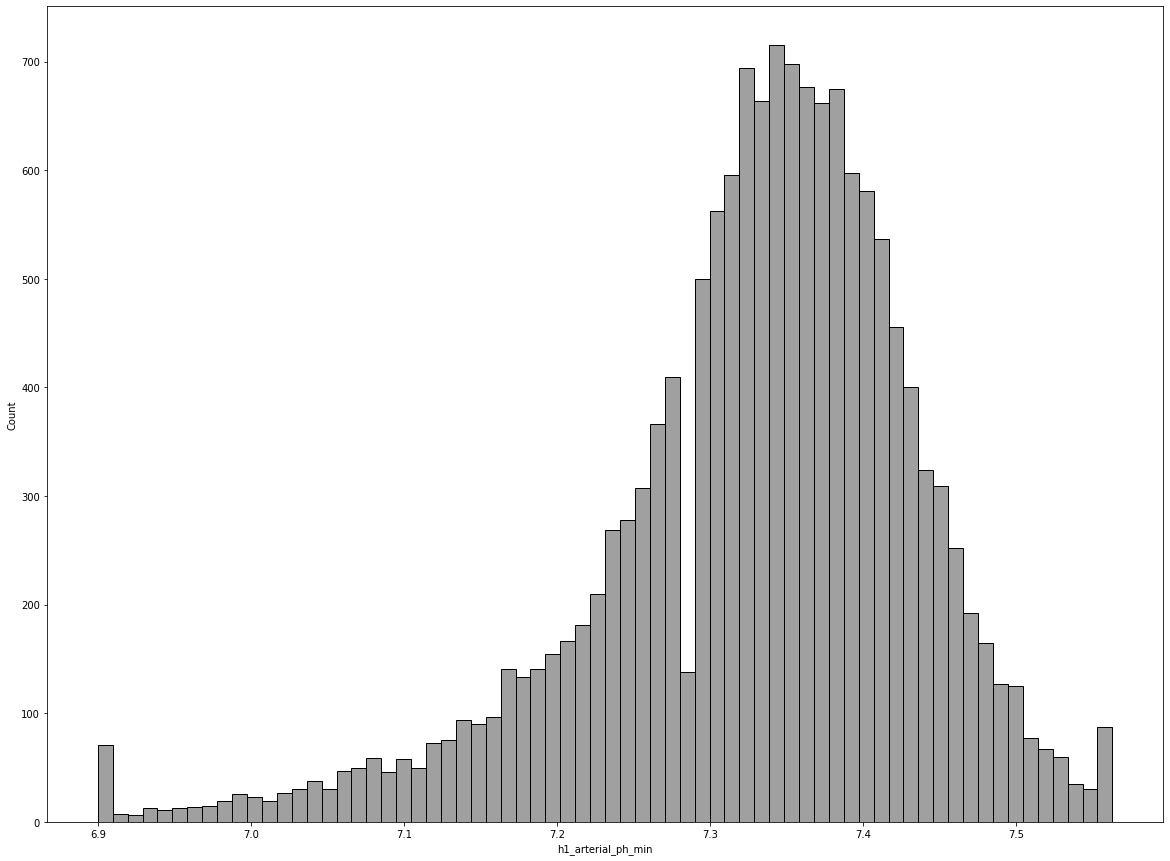

* h1_arterial_po2_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_arterial_po2_max
1720
Número de elementos nulos: 74389 ( 0.83 )


* h1_arterial_po2_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_arterial_po2_min
1708
Número de elementos nulos: 74389 ( 0.83 )


* h1_pao2fio2ratio_max
tipo de datos: float64
Número de diferentes elementos de la columna h1_pao2fio2ratio_max
3095
Número de elementos nulos: 78530 ( 0.88 )


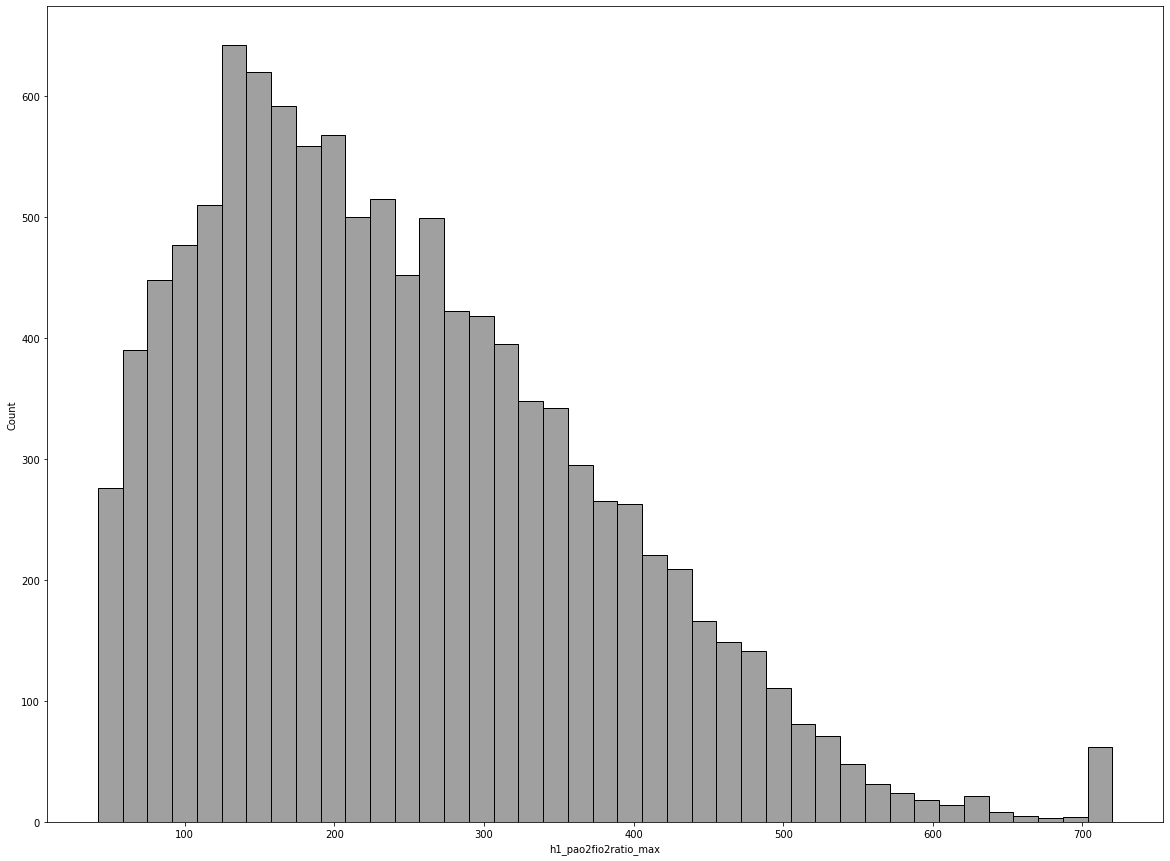

* h1_pao2fio2ratio_min
tipo de datos: float64
Número de diferentes elementos de la columna h1_pao2fio2ratio_min
3077
Número de elementos nulos: 78530 ( 0.88 )


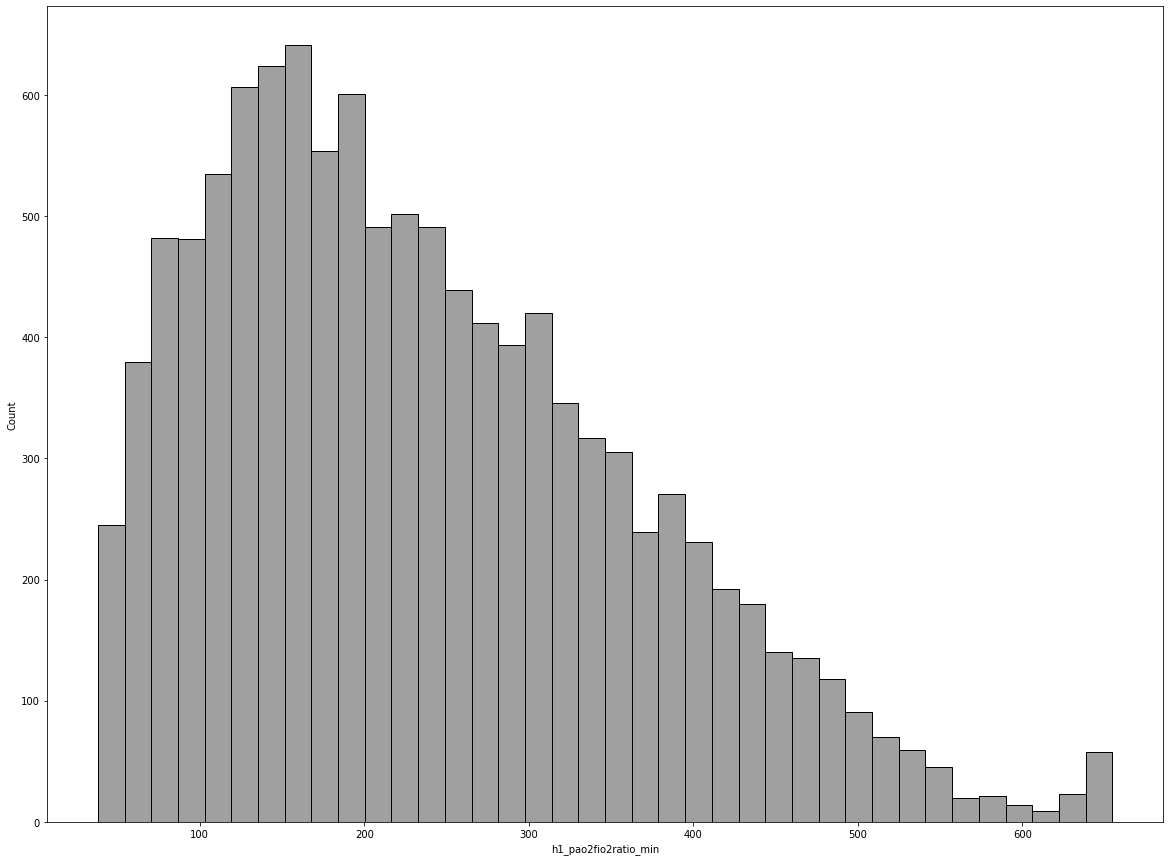

* apache_4a_hospital_death_prob
tipo de datos: float64
Número de diferentes elementos de la columna apache_4a_hospital_death_prob
102
Número de elementos nulos: 7778 ( 0.09 )


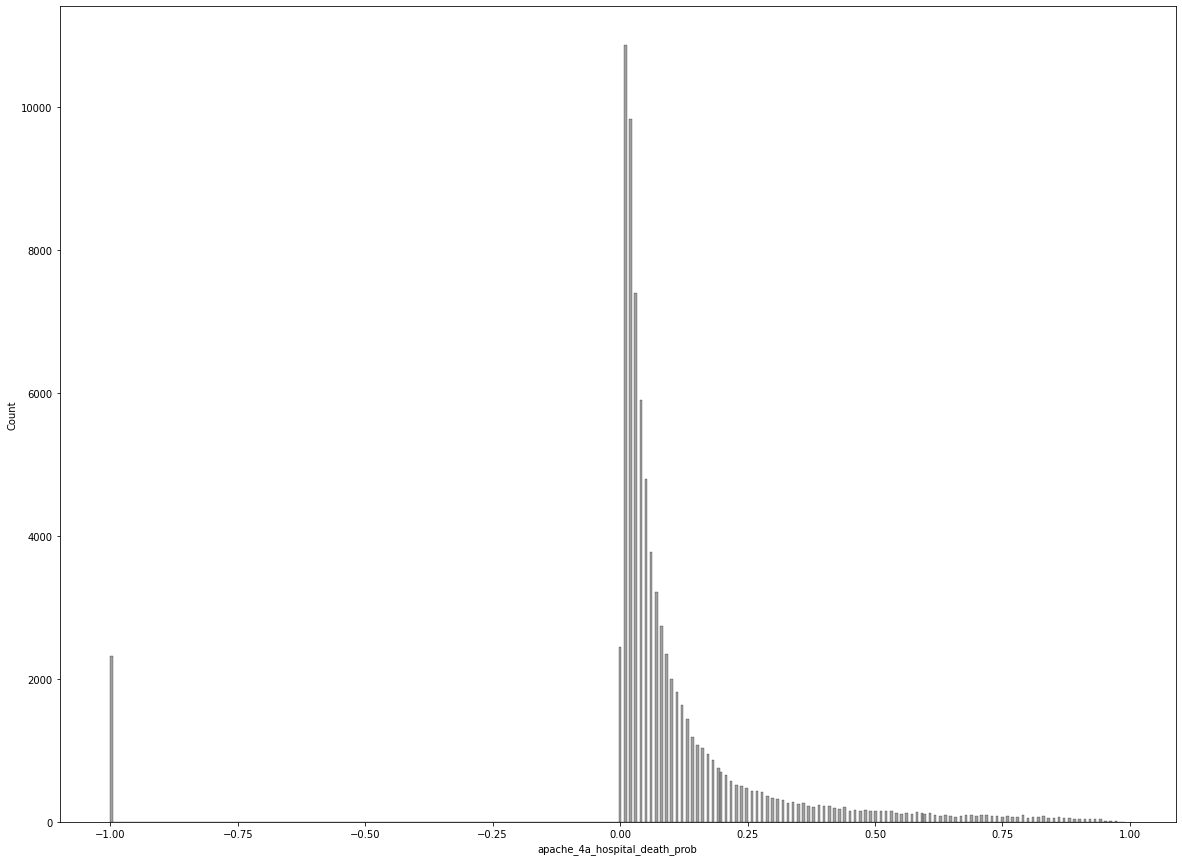

* apache_4a_icu_death_prob
tipo de datos: float64
Número de diferentes elementos de la columna apache_4a_icu_death_prob
100
Número de elementos nulos: 7778 ( 0.09 )


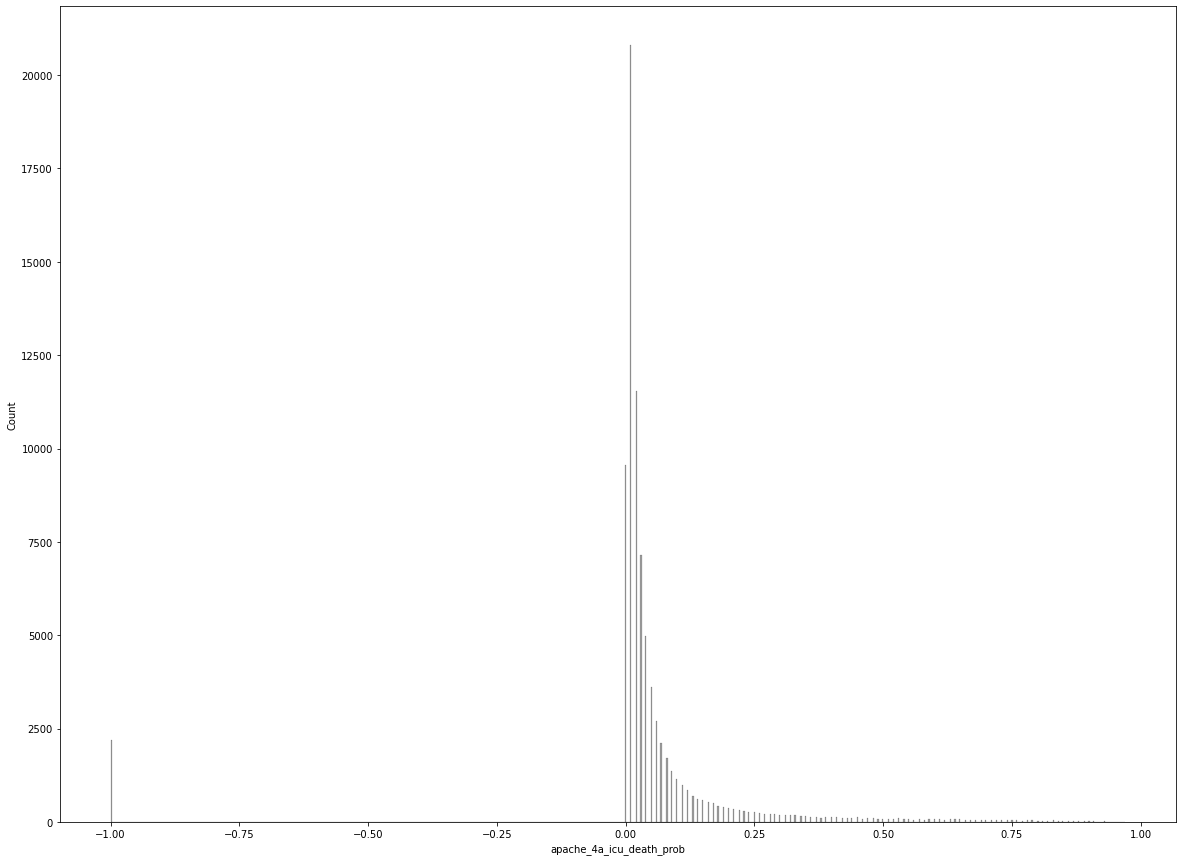

* aids
tipo de datos: float64
Número de diferentes elementos de la columna aids
3
Número de elementos nulos: 696 ( 0.01 )


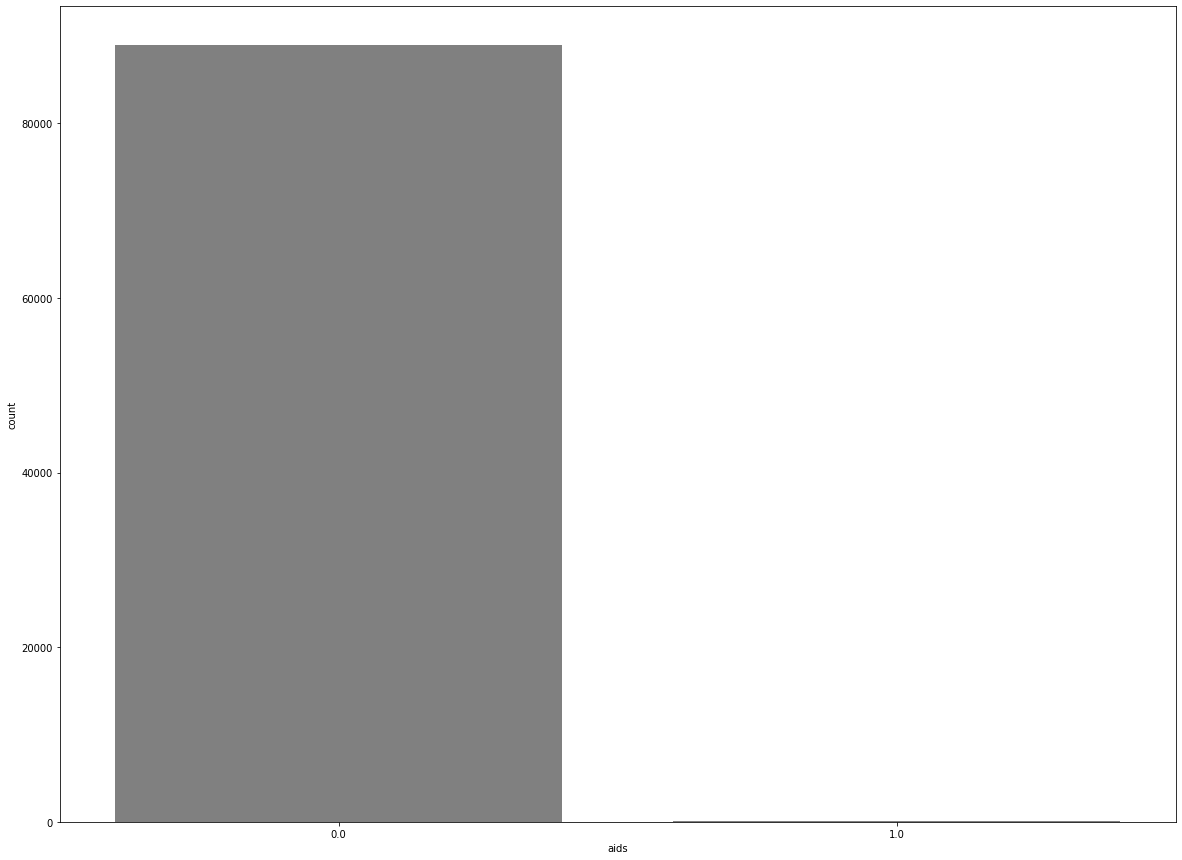

* cirrhosis
tipo de datos: float64
Número de diferentes elementos de la columna cirrhosis
3
Número de elementos nulos: 696 ( 0.01 )


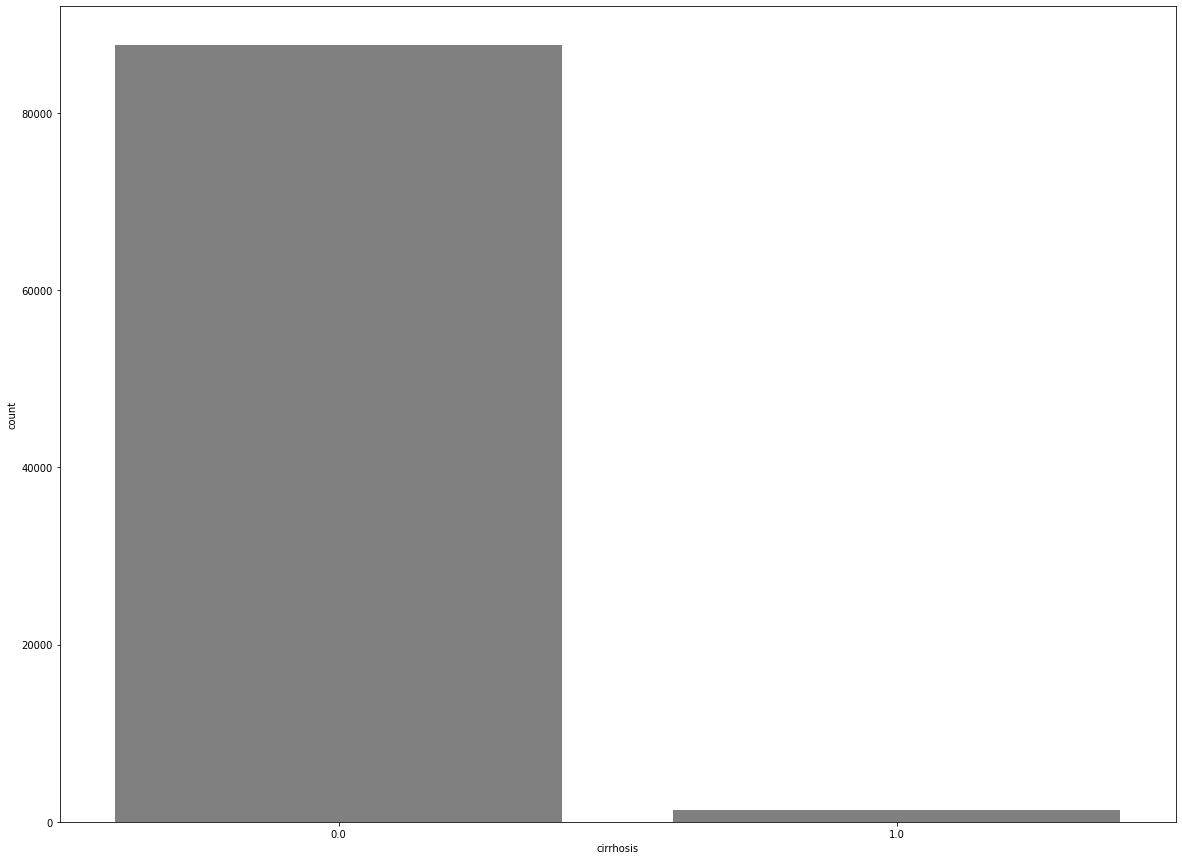

* diabetes_mellitus
tipo de datos: float64
Número de diferentes elementos de la columna diabetes_mellitus
3
Número de elementos nulos: 696 ( 0.01 )


* hepatic_failure
tipo de datos: float64
Número de diferentes elementos de la columna hepatic_failure
3
Número de elementos nulos: 696 ( 0.01 )


* immunosuppression
tipo de datos: float64
Número de diferentes elementos de la columna immunosuppression
3
Número de elementos nulos: 696 ( 0.01 )


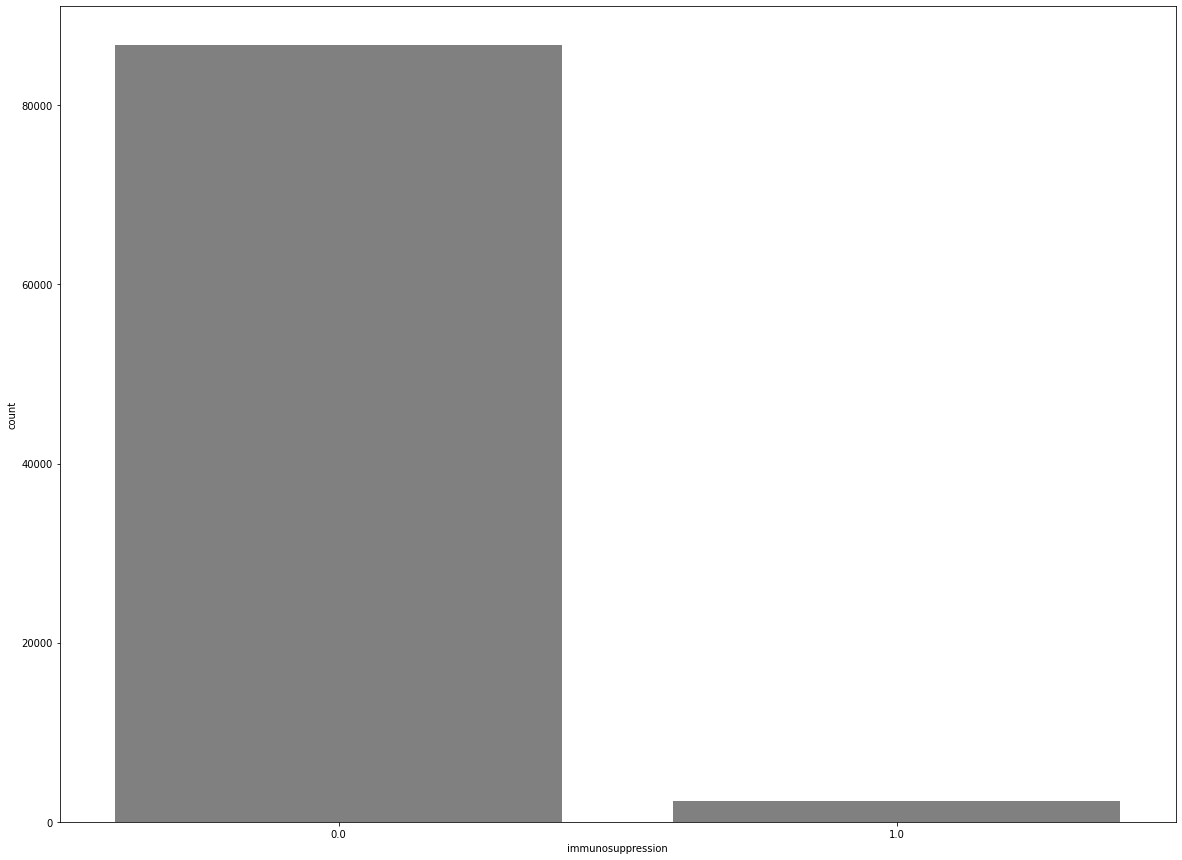

* leukemia
tipo de datos: float64
Número de diferentes elementos de la columna leukemia
3
Número de elementos nulos: 696 ( 0.01 )


* lymphoma
tipo de datos: float64
Número de diferentes elementos de la columna lymphoma
3
Número de elementos nulos: 696 ( 0.01 )


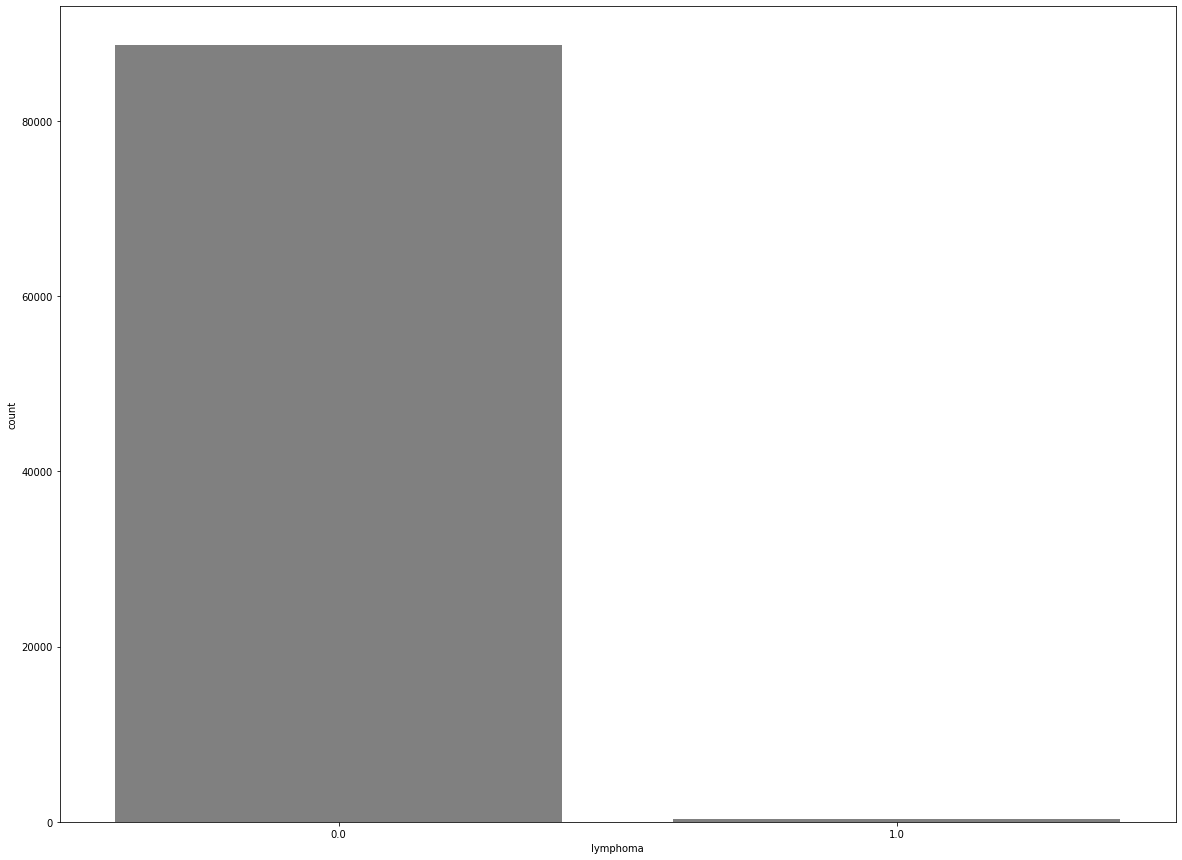

* solid_tumor_with_metastasis
tipo de datos: float64
Número de diferentes elementos de la columna solid_tumor_with_metastasis
3
Número de elementos nulos: 696 ( 0.01 )


* apache_3j_bodysystem
tipo de datos: object
Número de diferentes elementos de la columna apache_3j_bodysystem
12
Número de elementos nulos: 1625 ( 0.02 )


* apache_2_bodysystem
tipo de datos: object
Número de diferentes elementos de la columna apache_2_bodysystem
11
Número de elementos nulos: 1625 ( 0.02 )


In [ ]:
#distribucion de los datos

for i in df_train.columns:
  if i!= target:
    temp= df_train[i].unique()
    if df_train[i].dtypes== int or df_train[i].dtypes== float:
      temp.sort()
    print('*',i)
    print('tipo de datos:', df_train[i].dtypes)
    print('Número de diferentes elementos de la columna', i)
    print(len(temp))
    print('Número de elementos nulos:', df_train[i].isnull().sum(),
          "(",round(df_train[i].isnull().sum()/df_train.shape[0], 2),")" )
    plt.figure(figsize=(20,15))
    if df_train[i].dtypes== object:
      sns.countplot(x= i, data=df_train, color='Grey')
    elif (df_train[i].dtypes== int or df_train[i].dtypes== float) and len(temp)<20:
      sns.countplot(x=i, data=df_train, color='Grey')
    else:
      sns.histplot(df_train[i], color= 'Grey')
    plt.yticks(fontsize=10)
    plt.show()

* encounter_id
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* patient_id
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


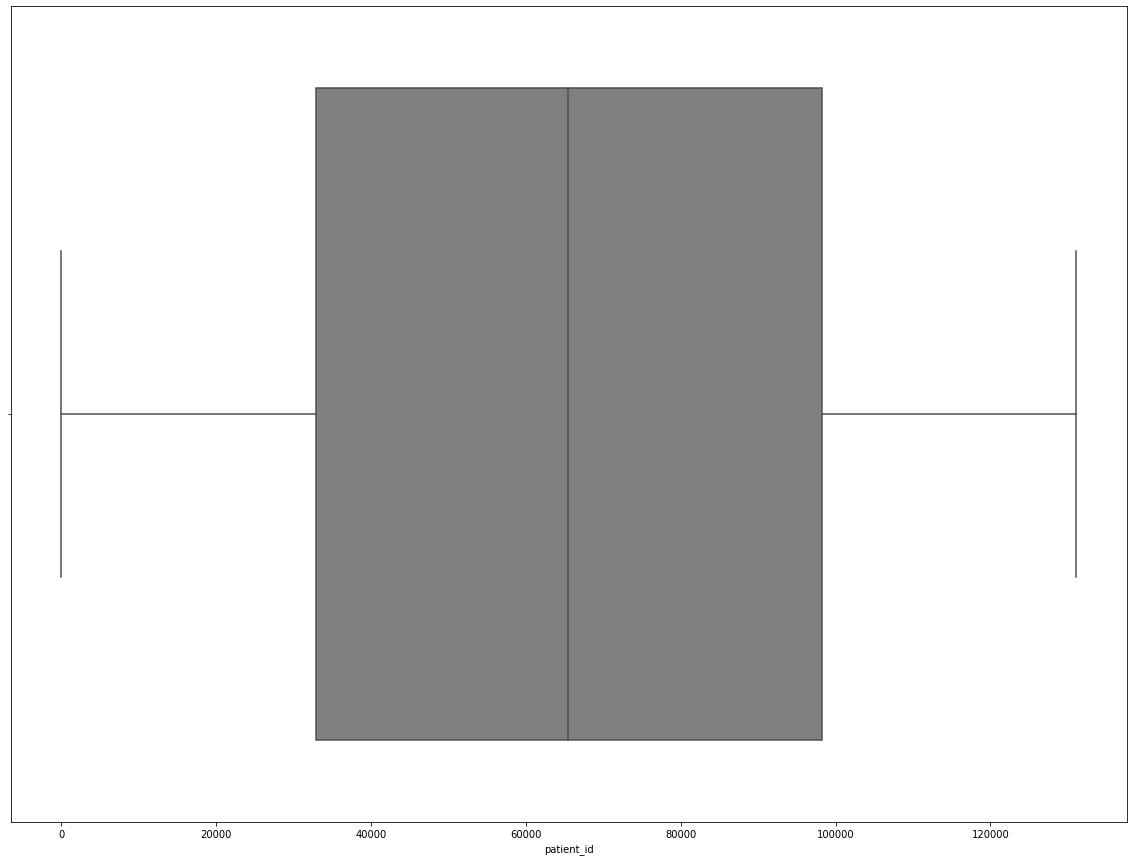

* hospital_id
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


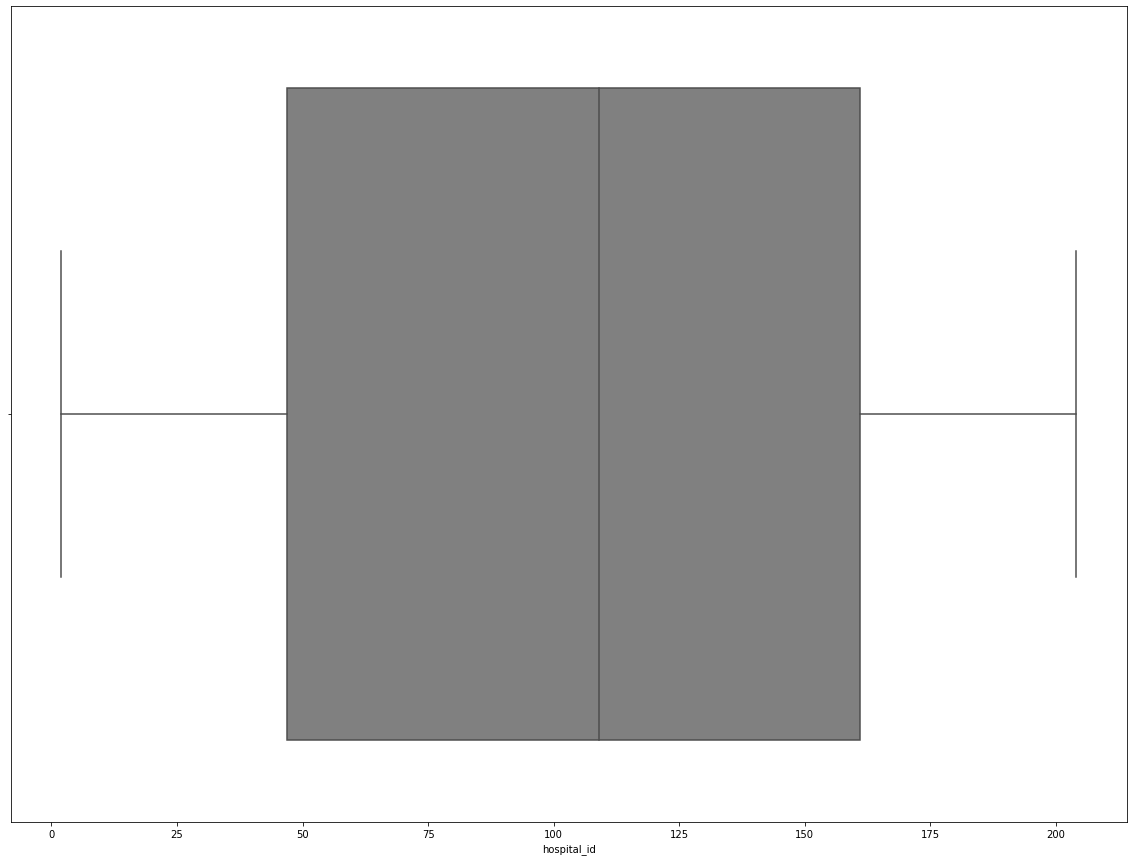

* age
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* bmi
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


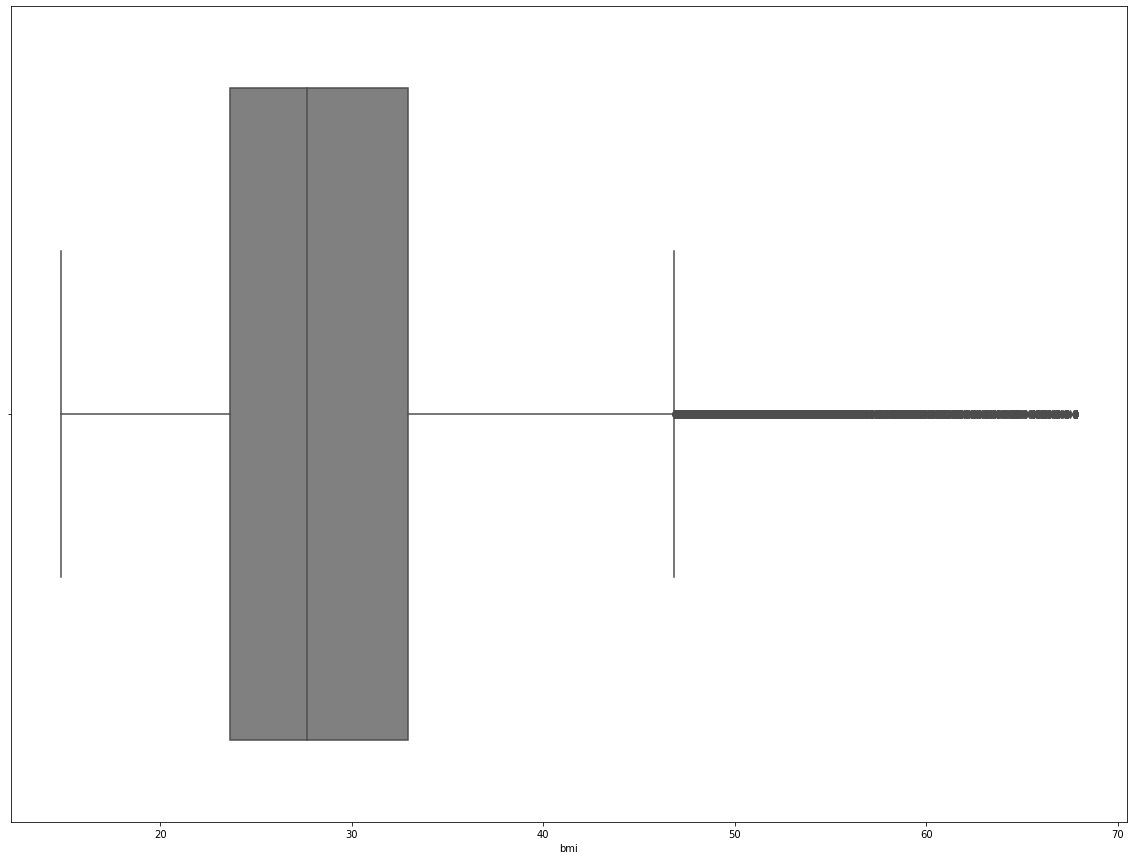

* elective_surgery
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* height
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


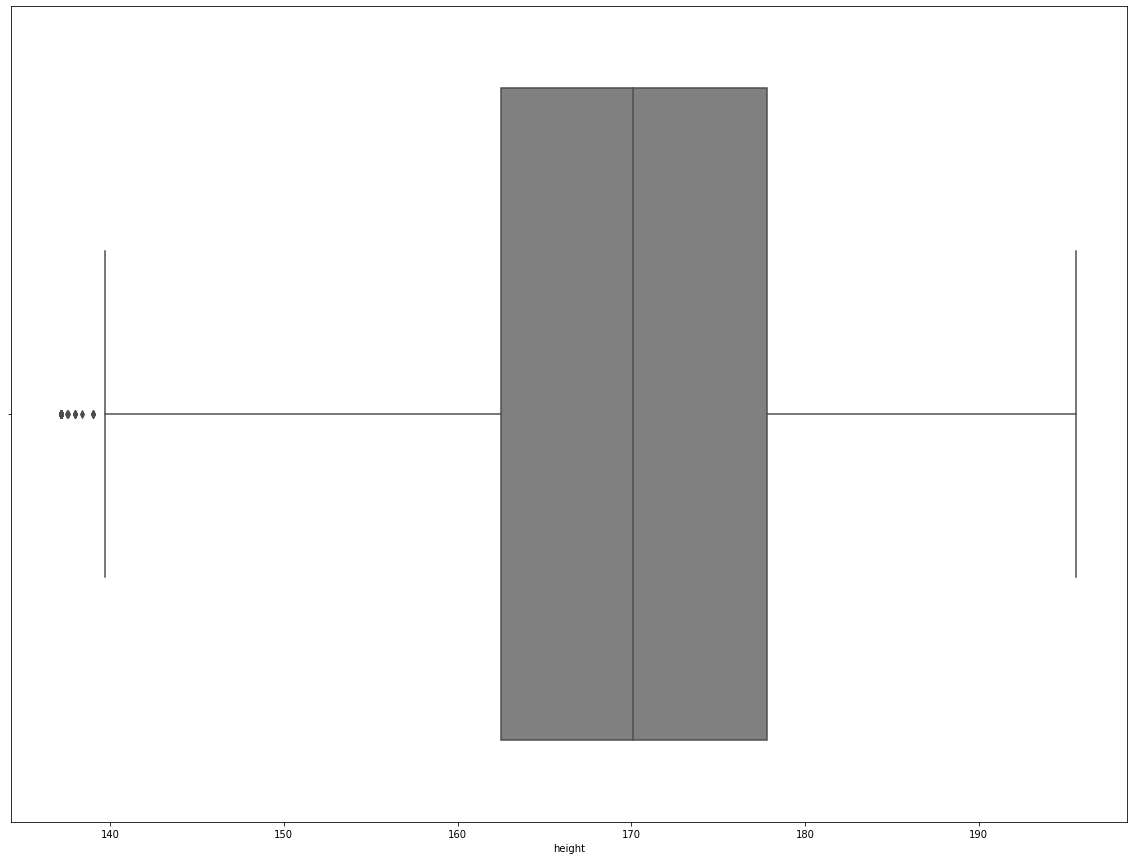

* icu_id
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* pre_icu_los_days
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* readmission_status
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* weight
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* albumin_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* apache_2_diagnosis
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


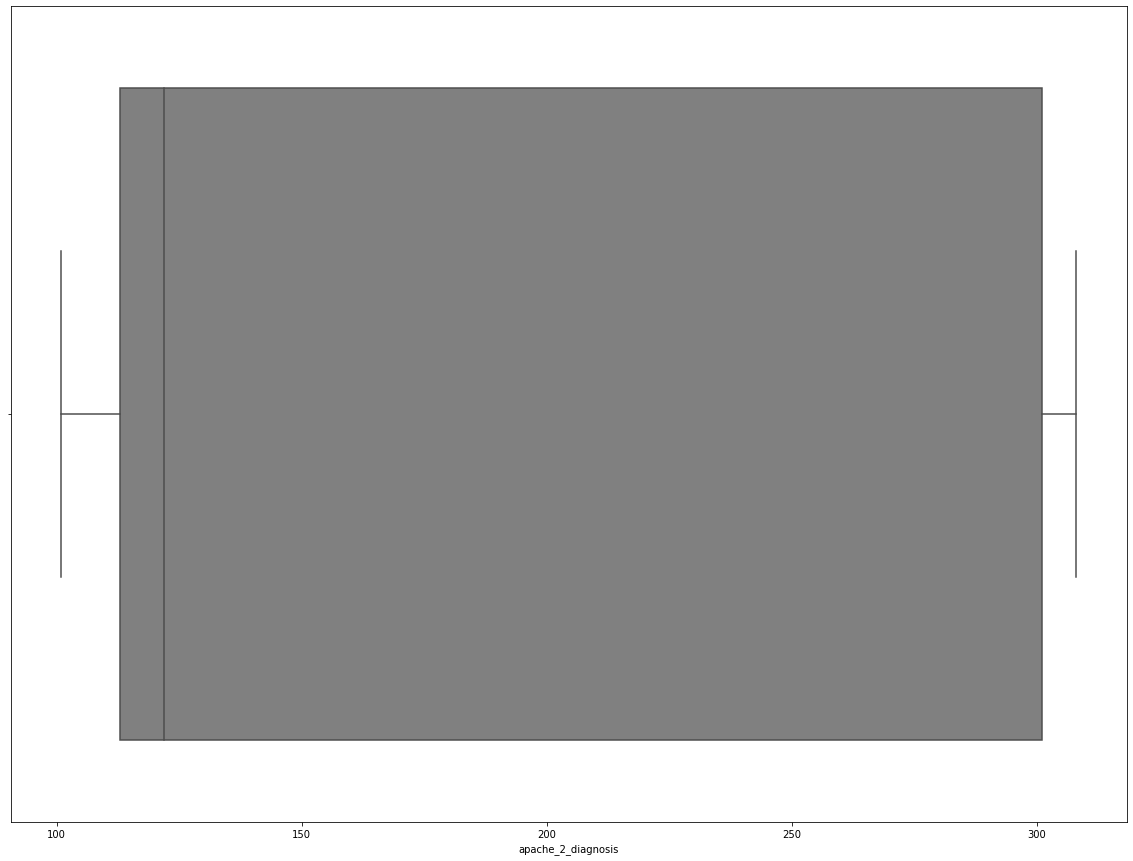

* apache_3j_diagnosis
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


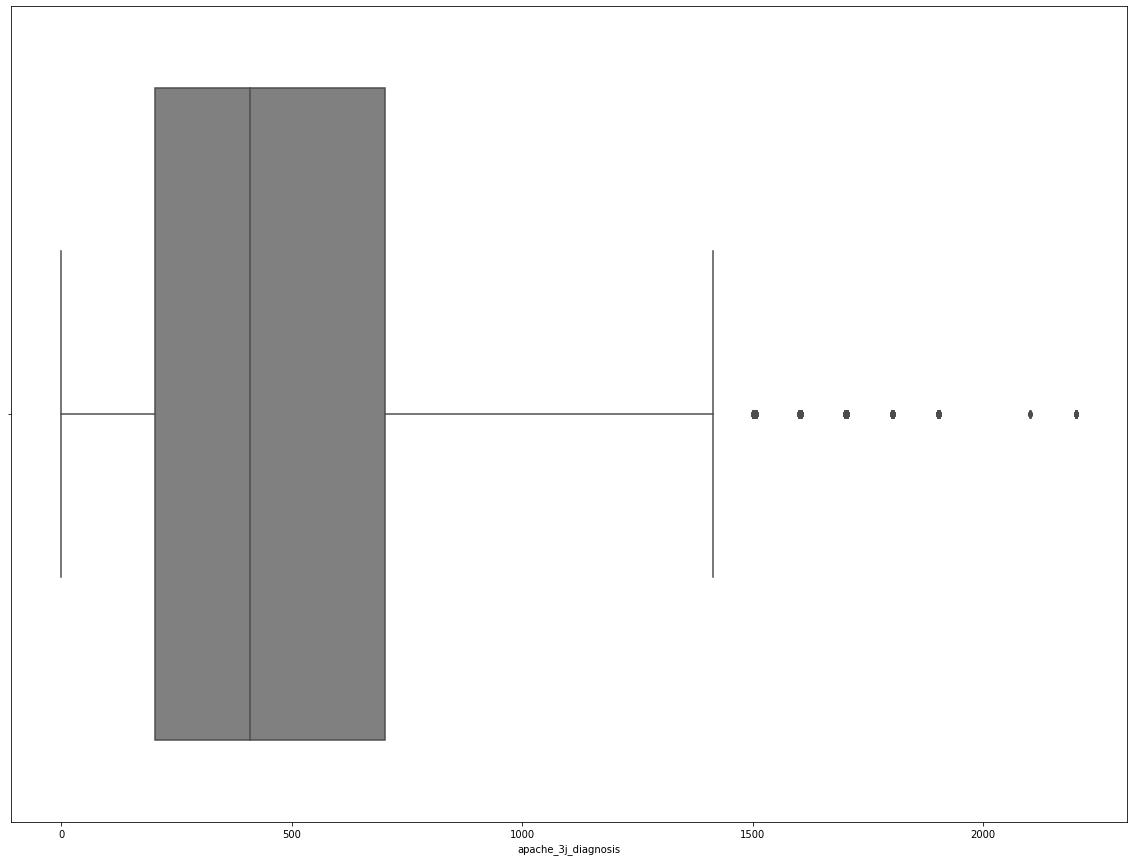

* apache_post_operative
tipo de datos: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* arf_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* bilirubin_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


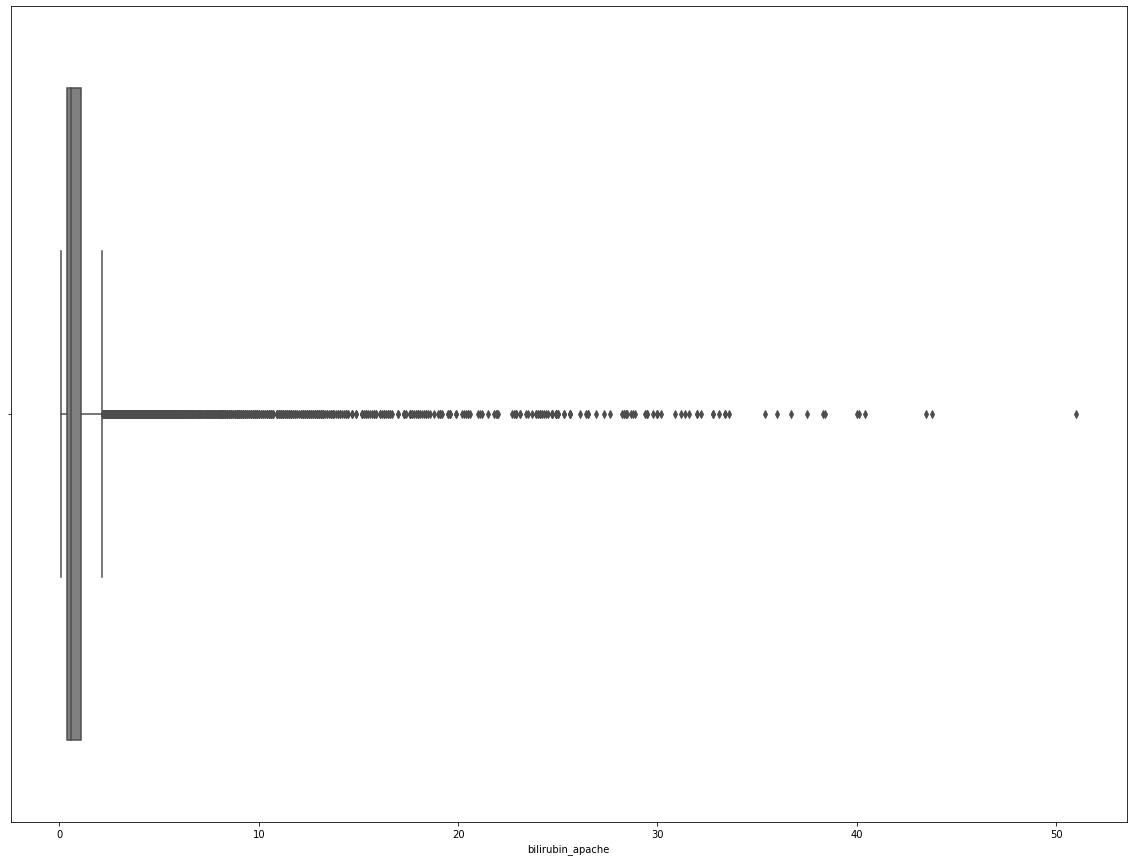

* bun_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* creatinine_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


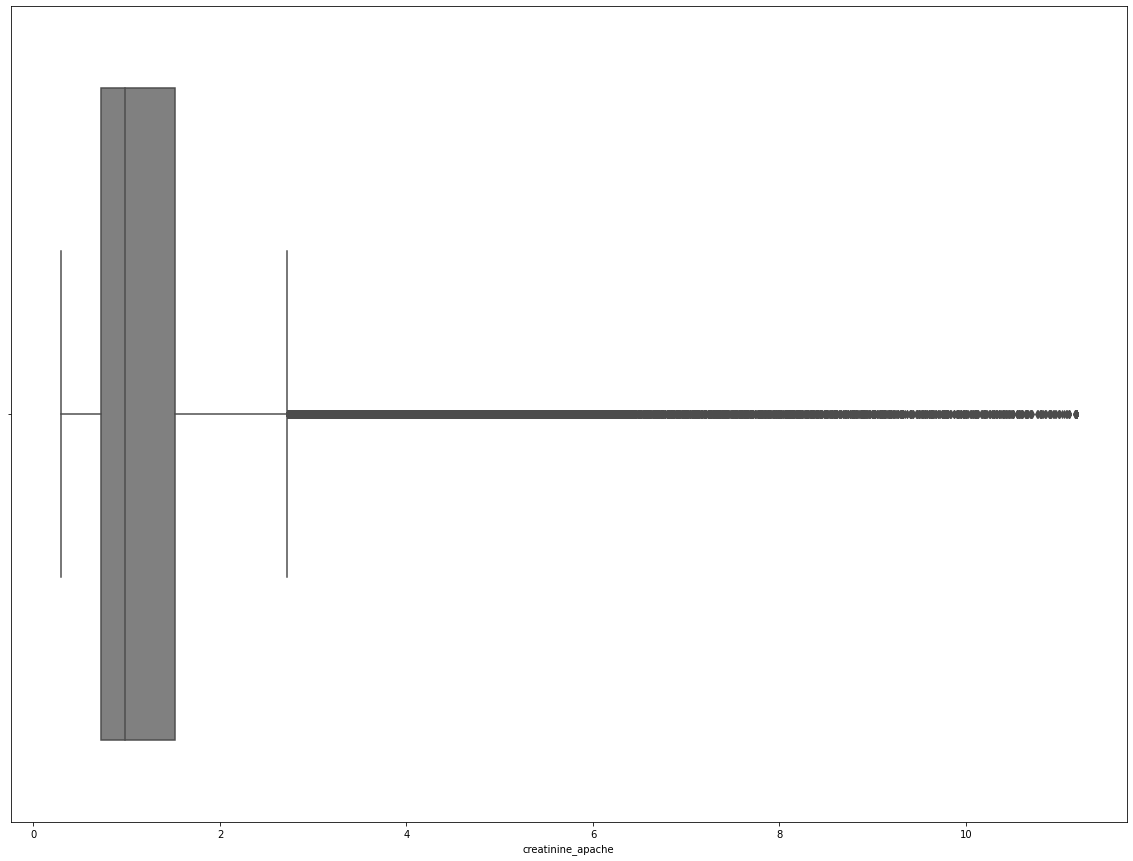

* fio2_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


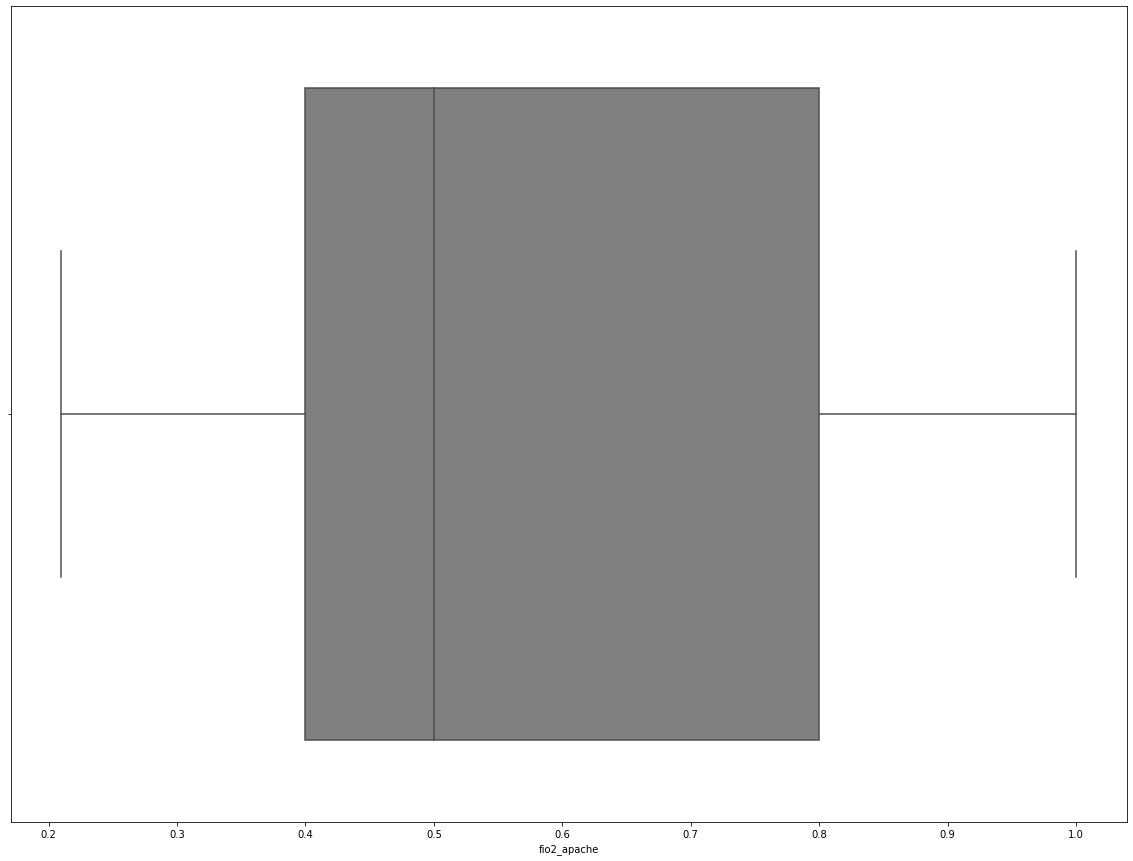

* gcs_eyes_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


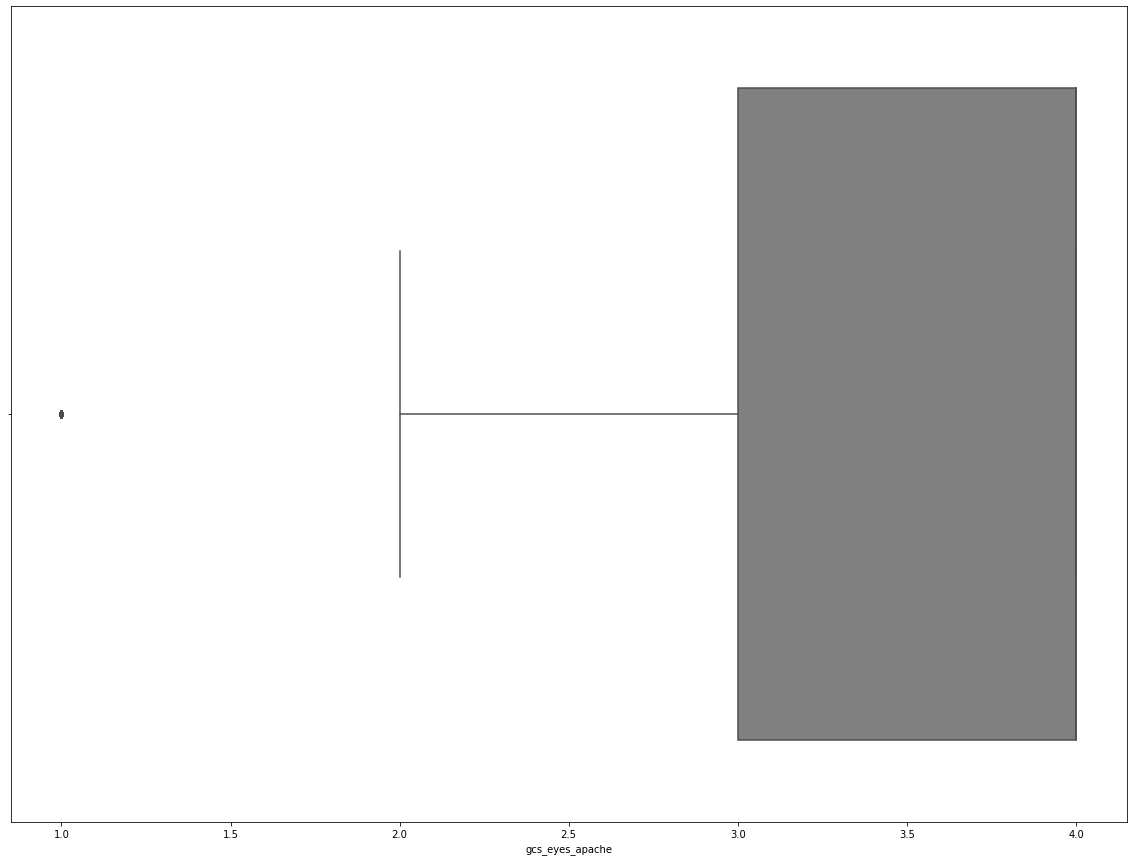

* gcs_motor_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


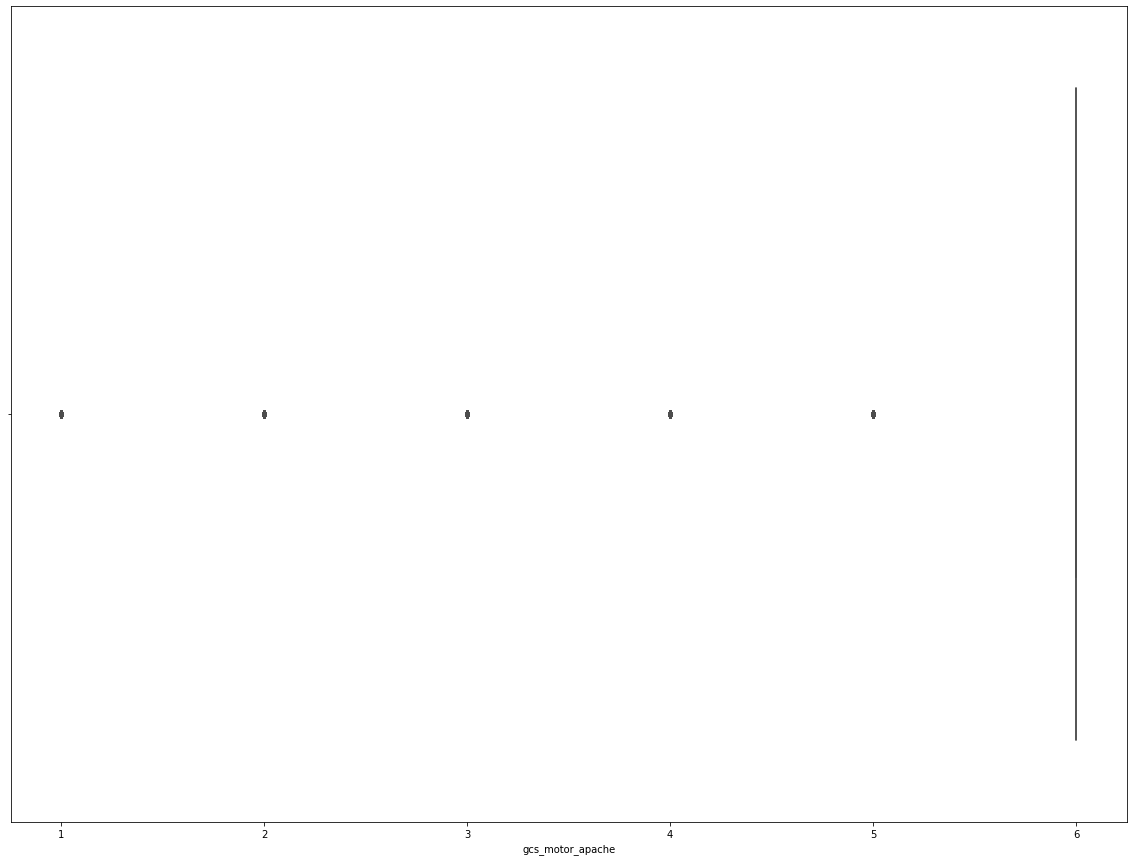

* gcs_unable_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


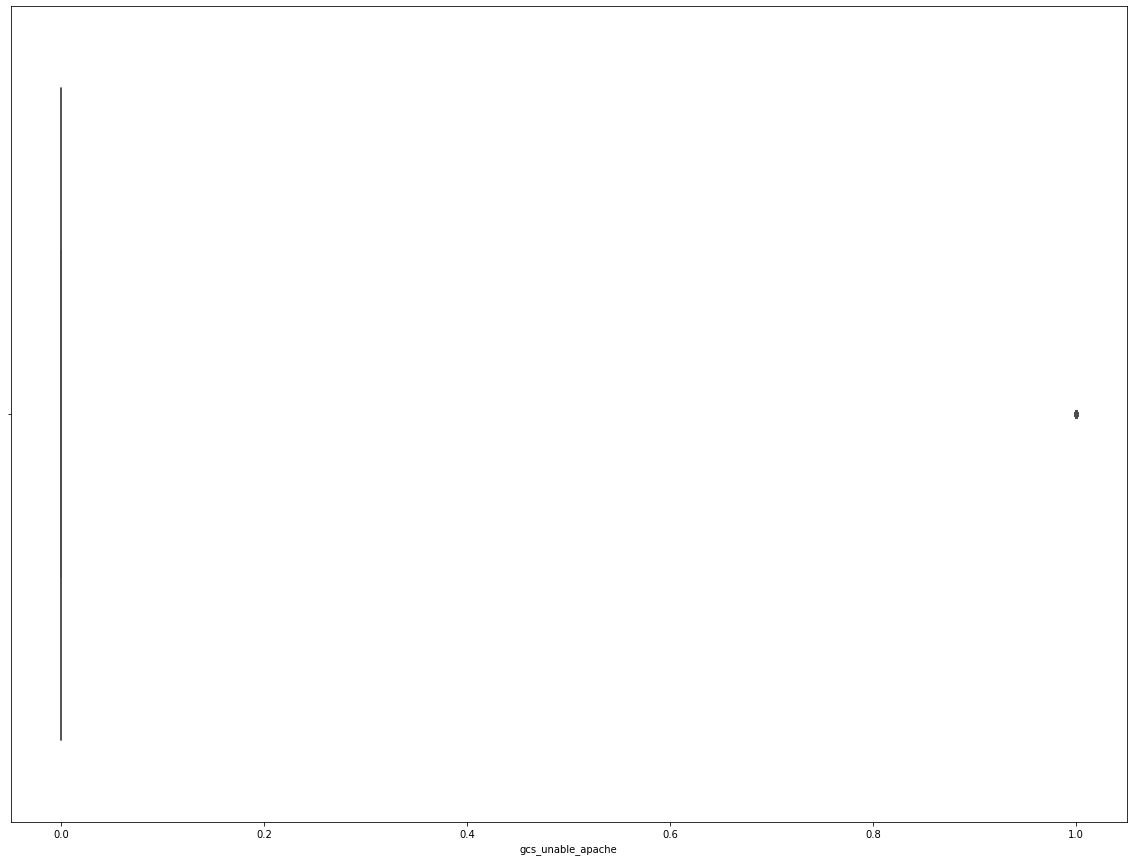

* gcs_verbal_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


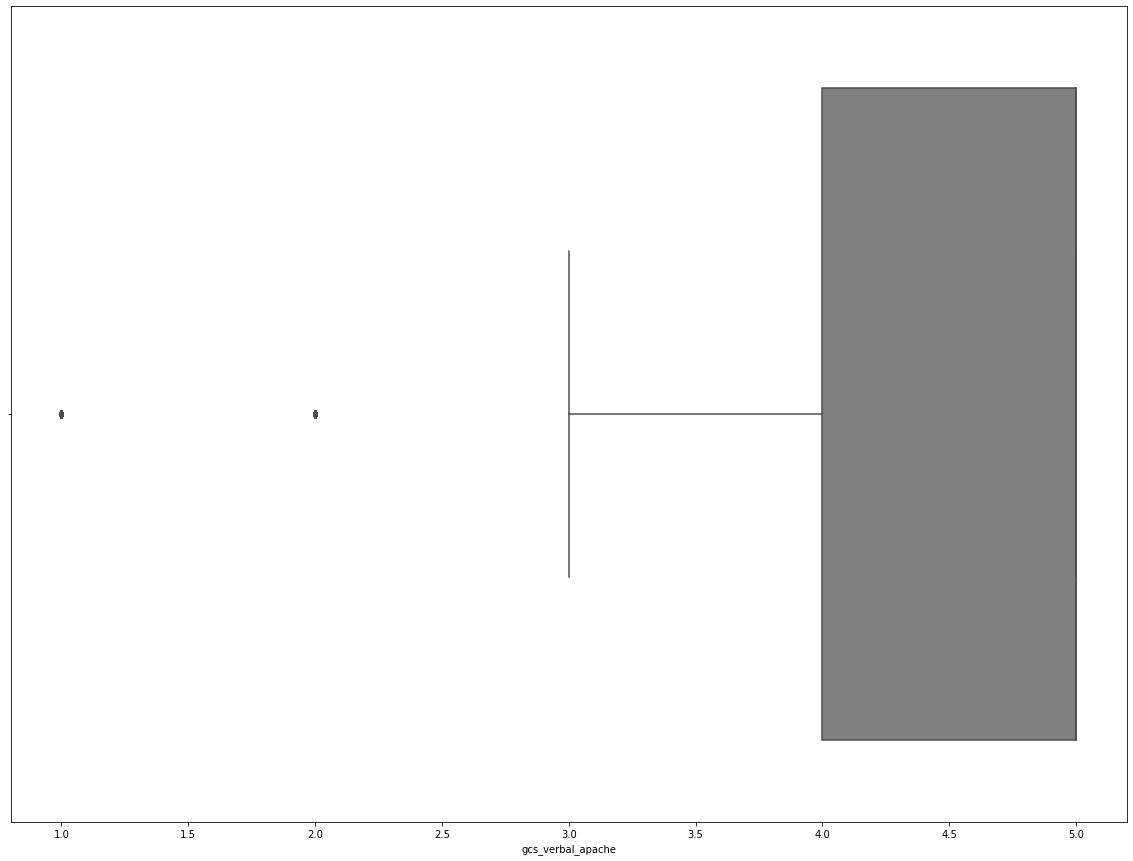

* glucose_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


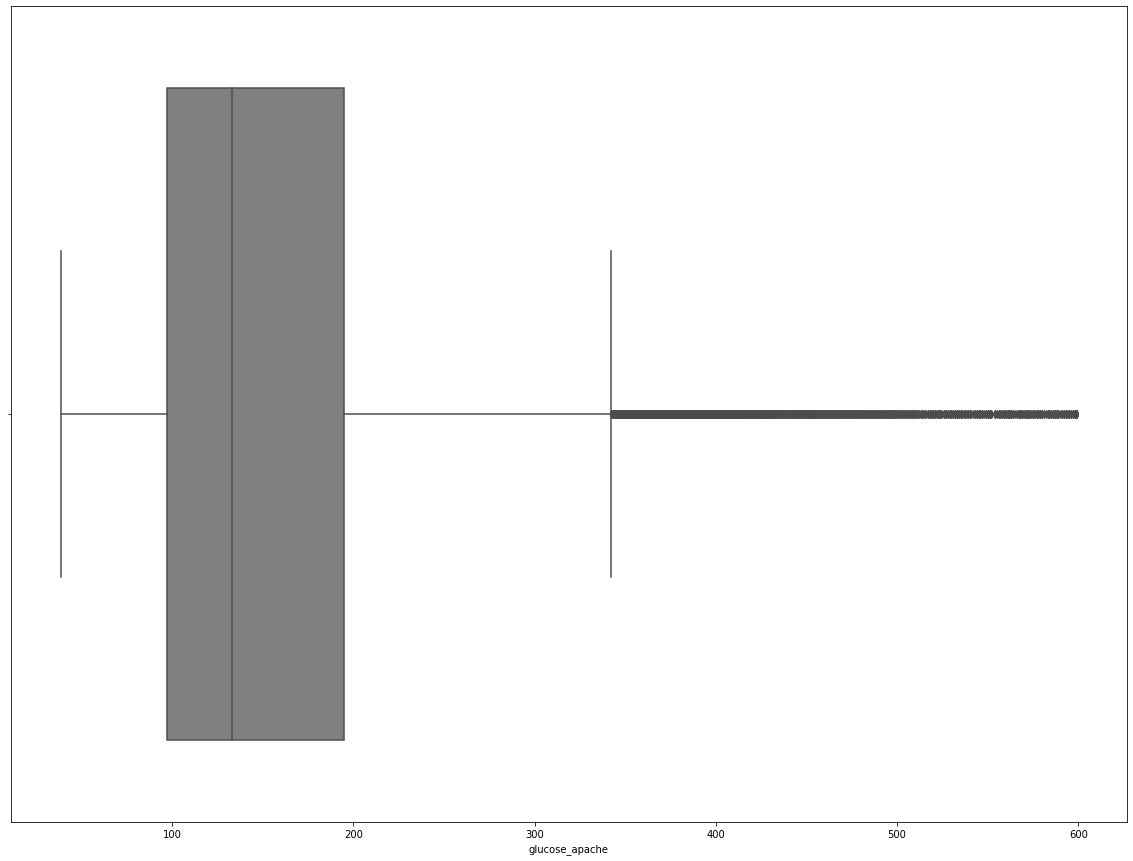

* heart_rate_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


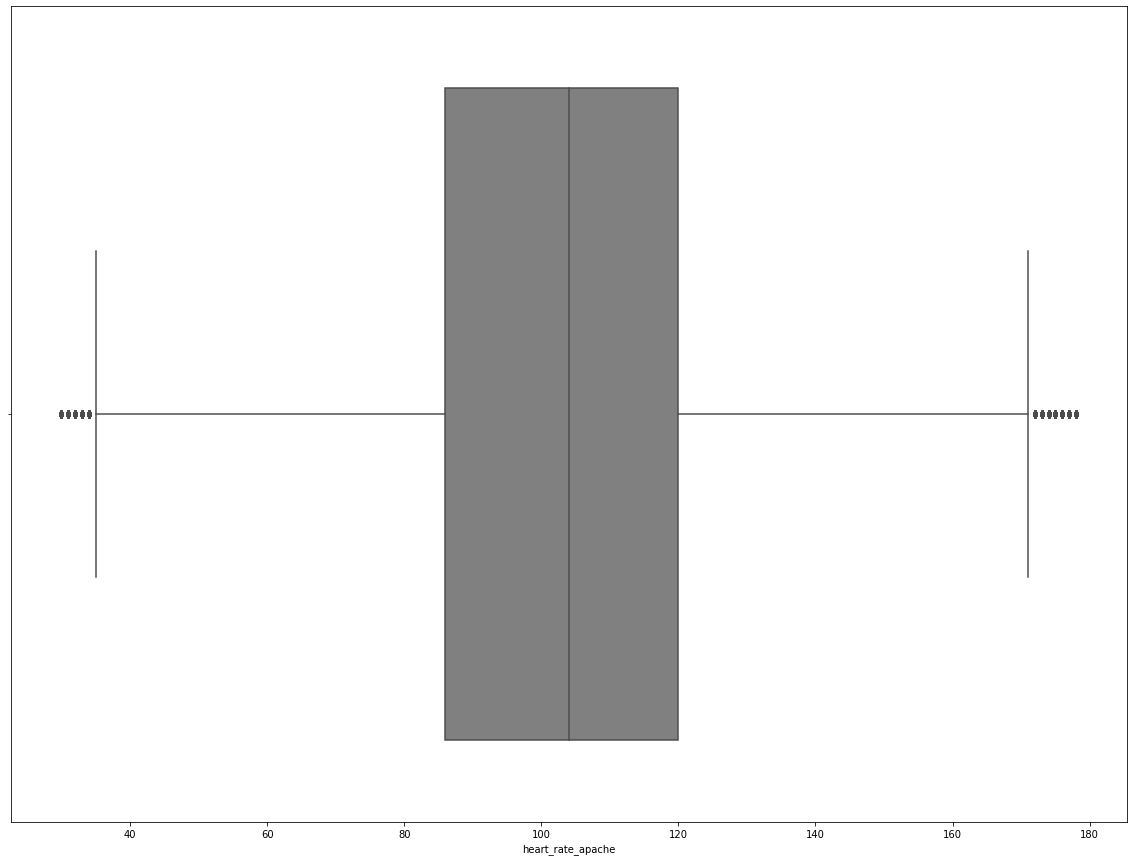

* hematocrit_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


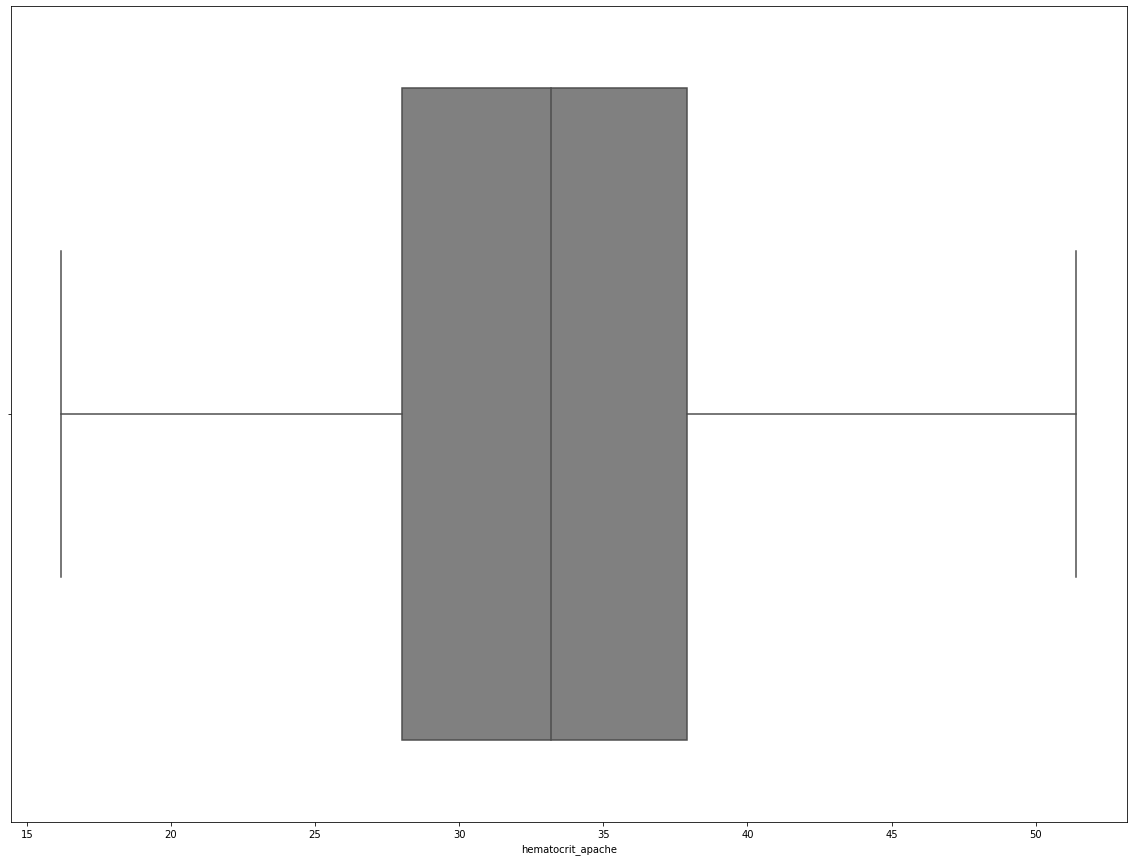

* intubated_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* map_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


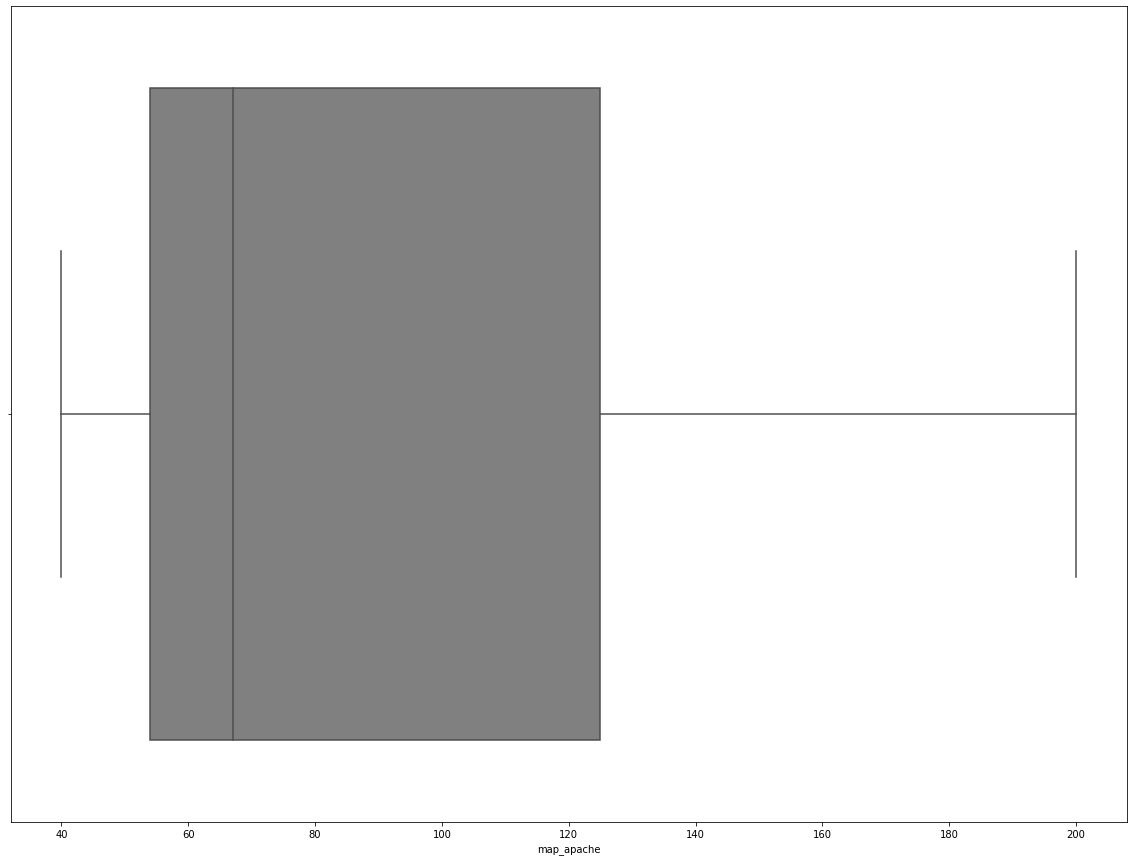

* paco2_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* paco2_for_ph_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


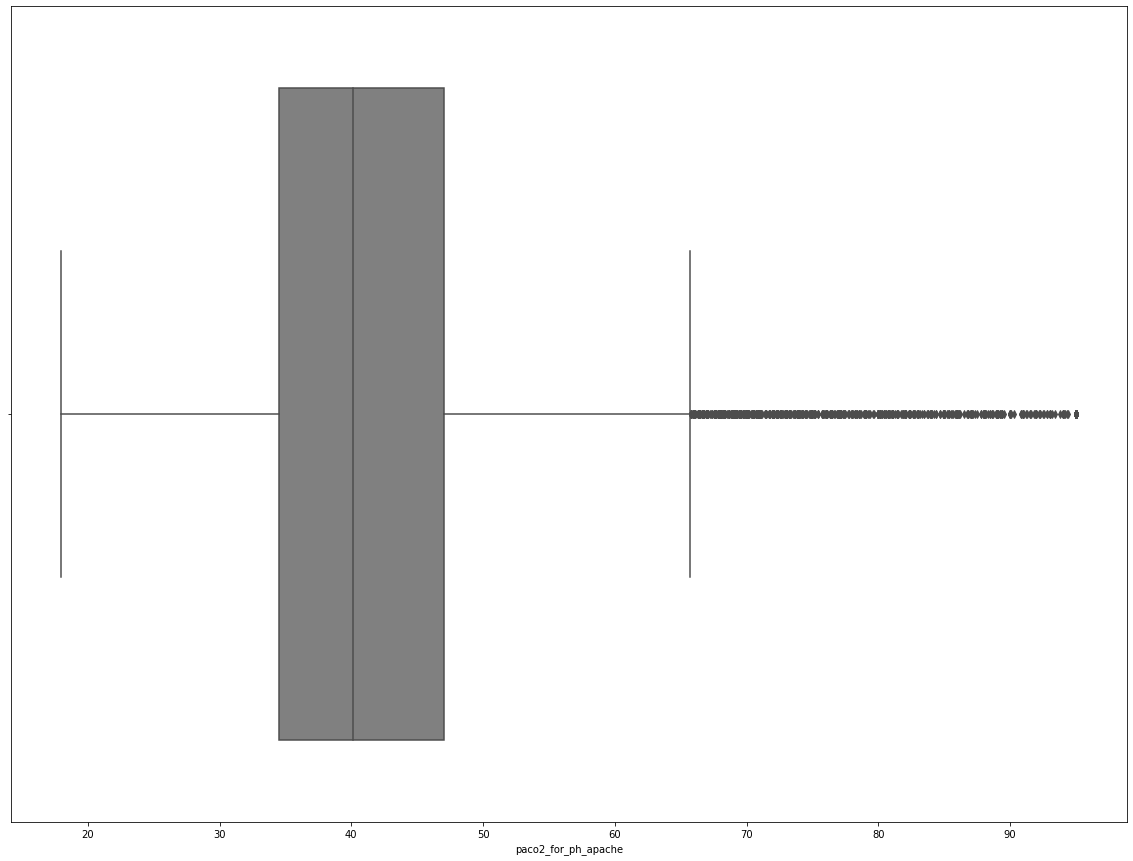

* pao2_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


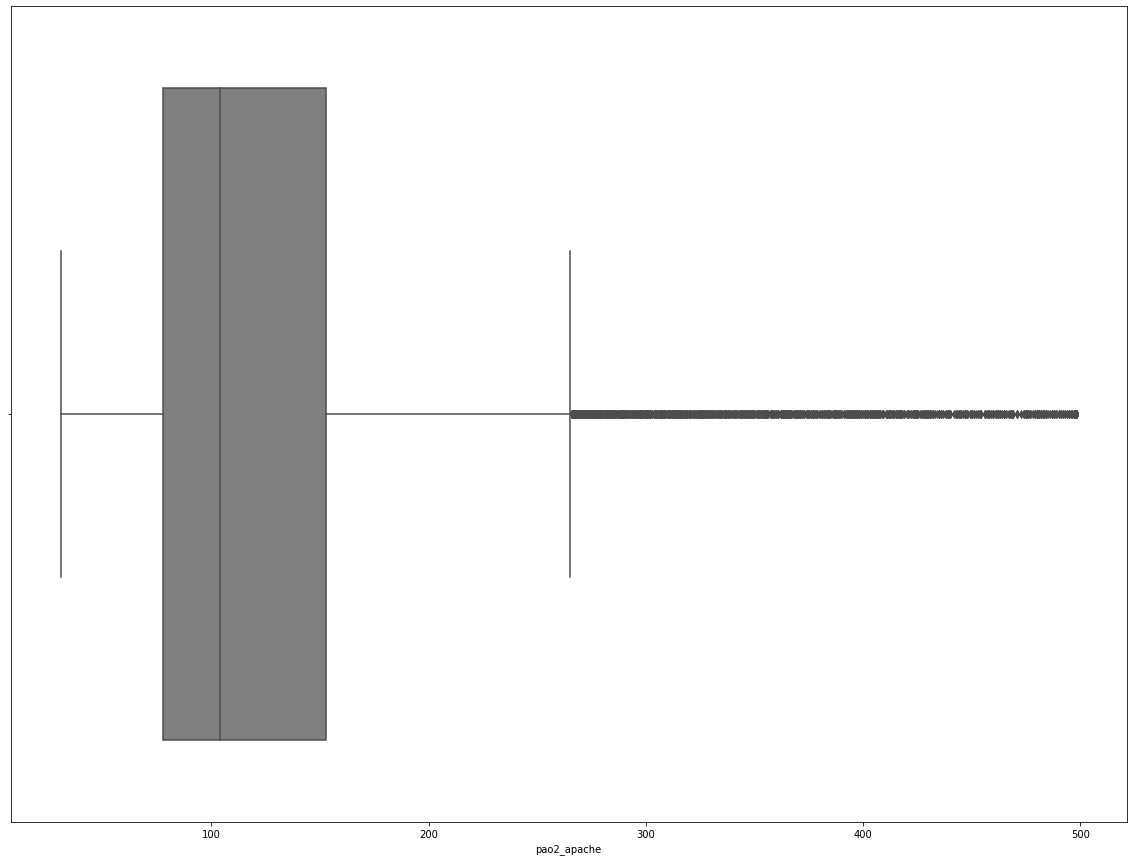

* ph_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


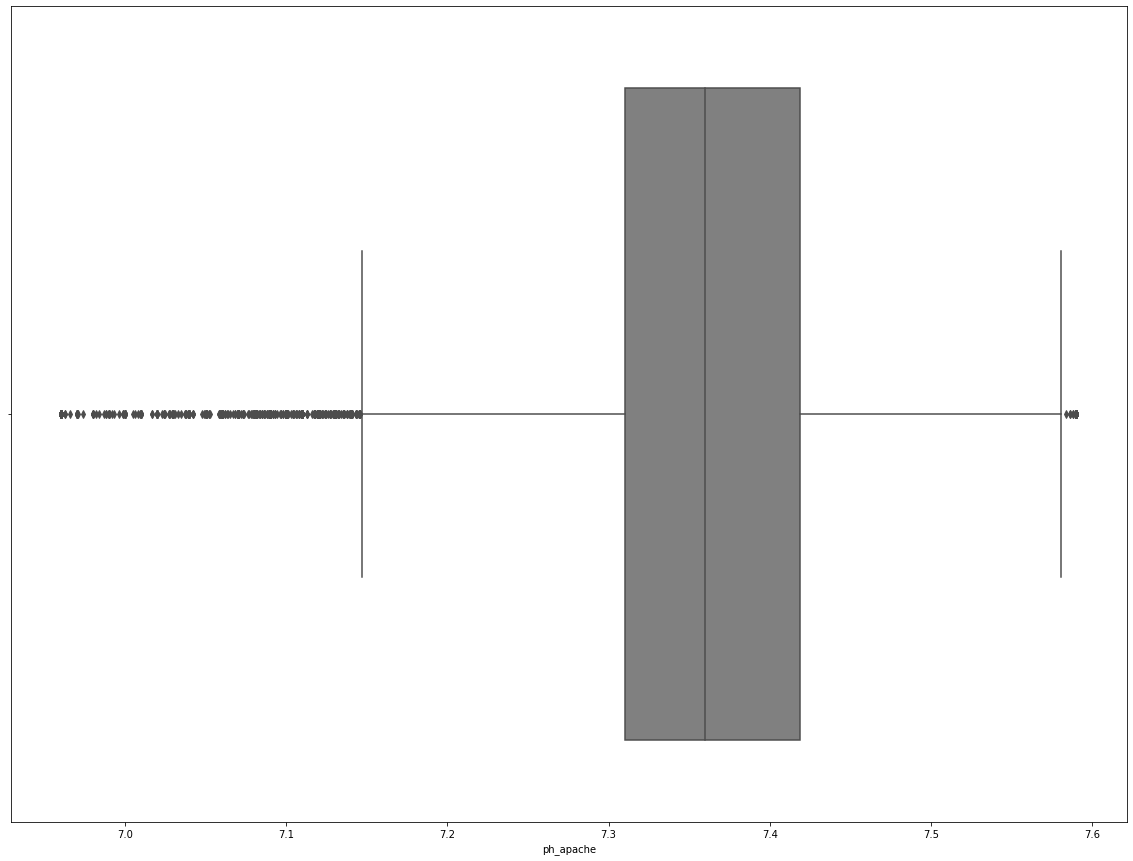

* resprate_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


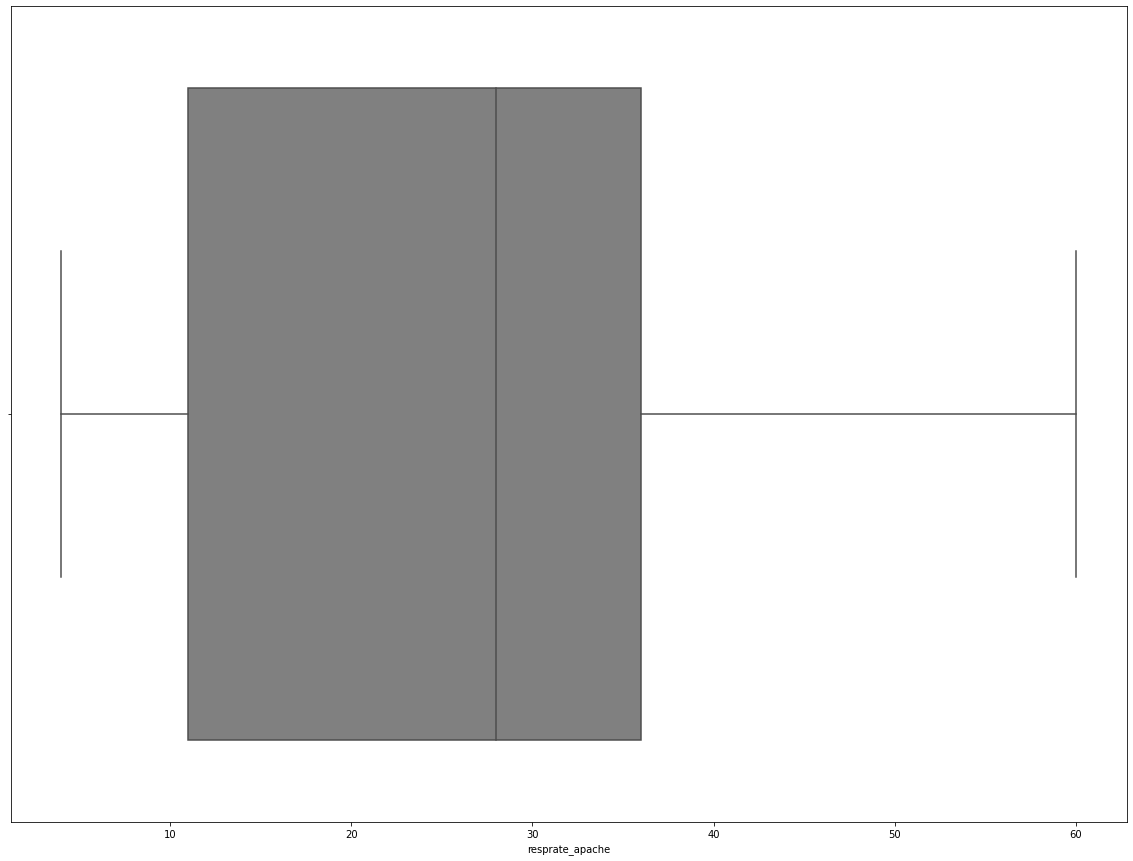

* sodium_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


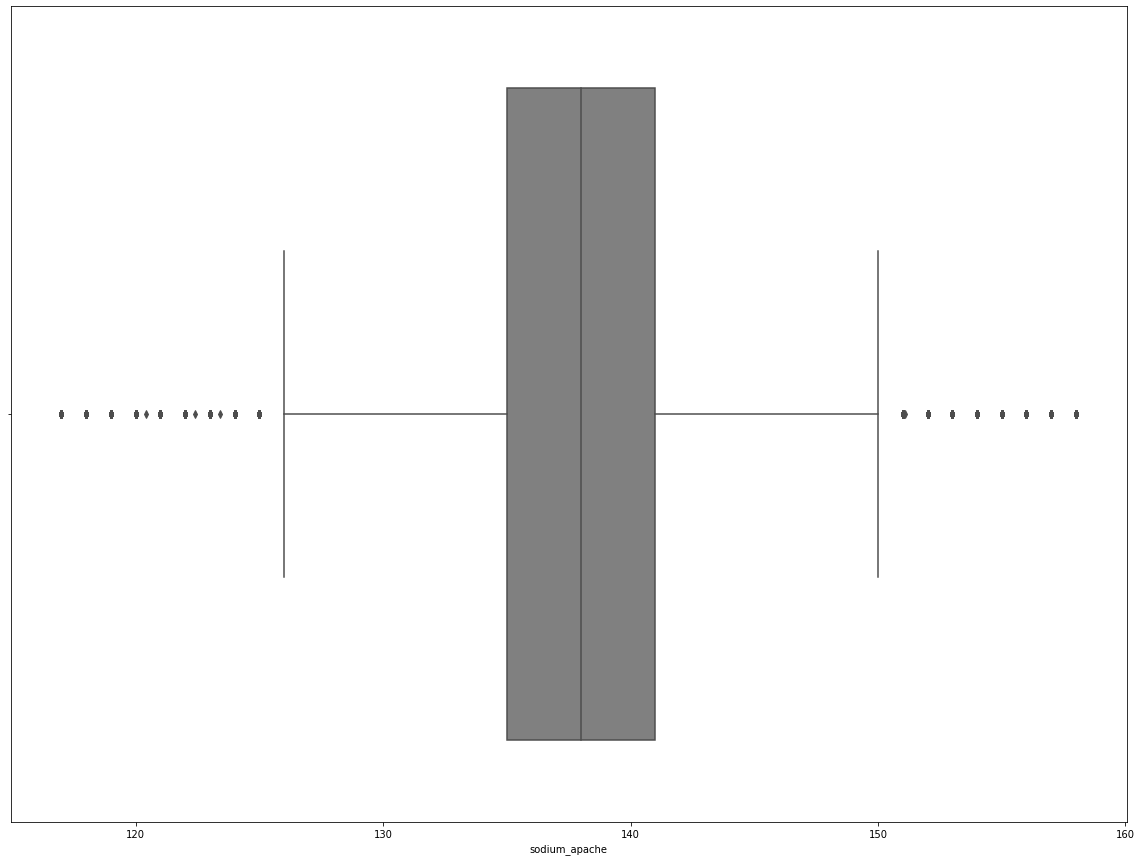

* temp_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


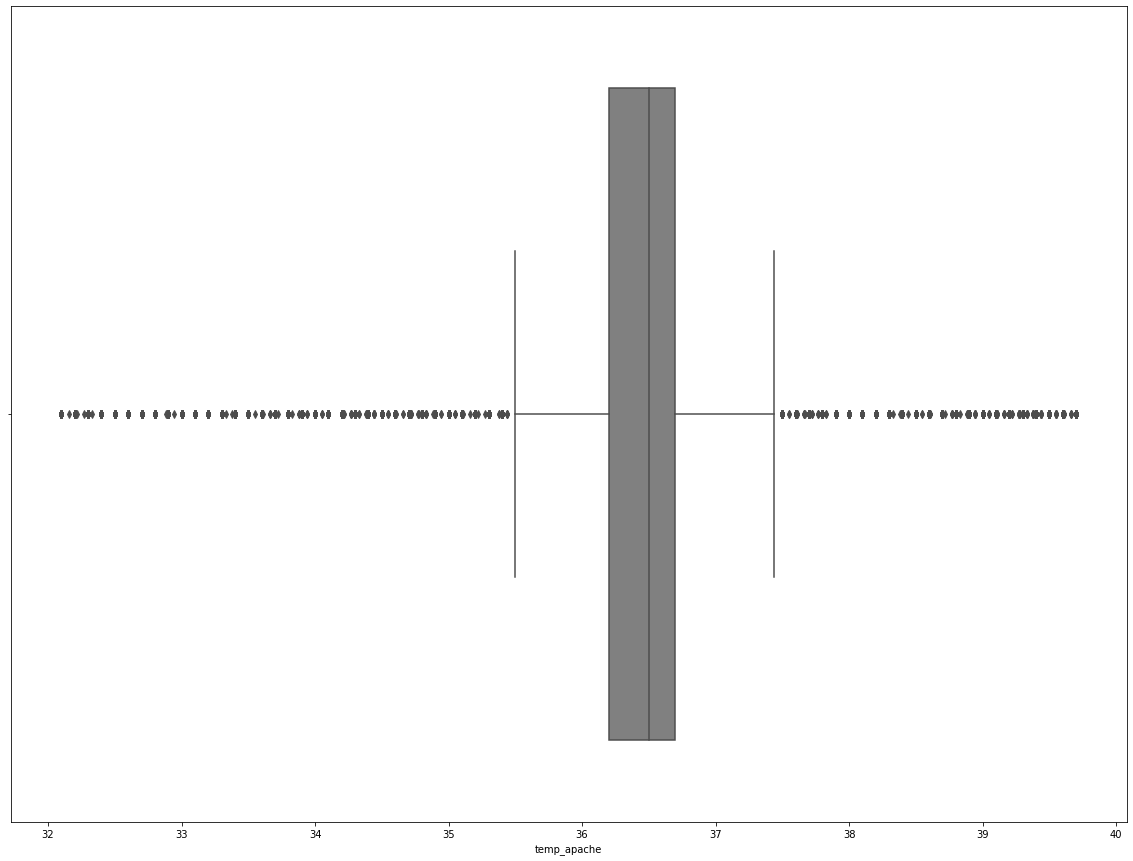

* urineoutput_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* ventilated_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


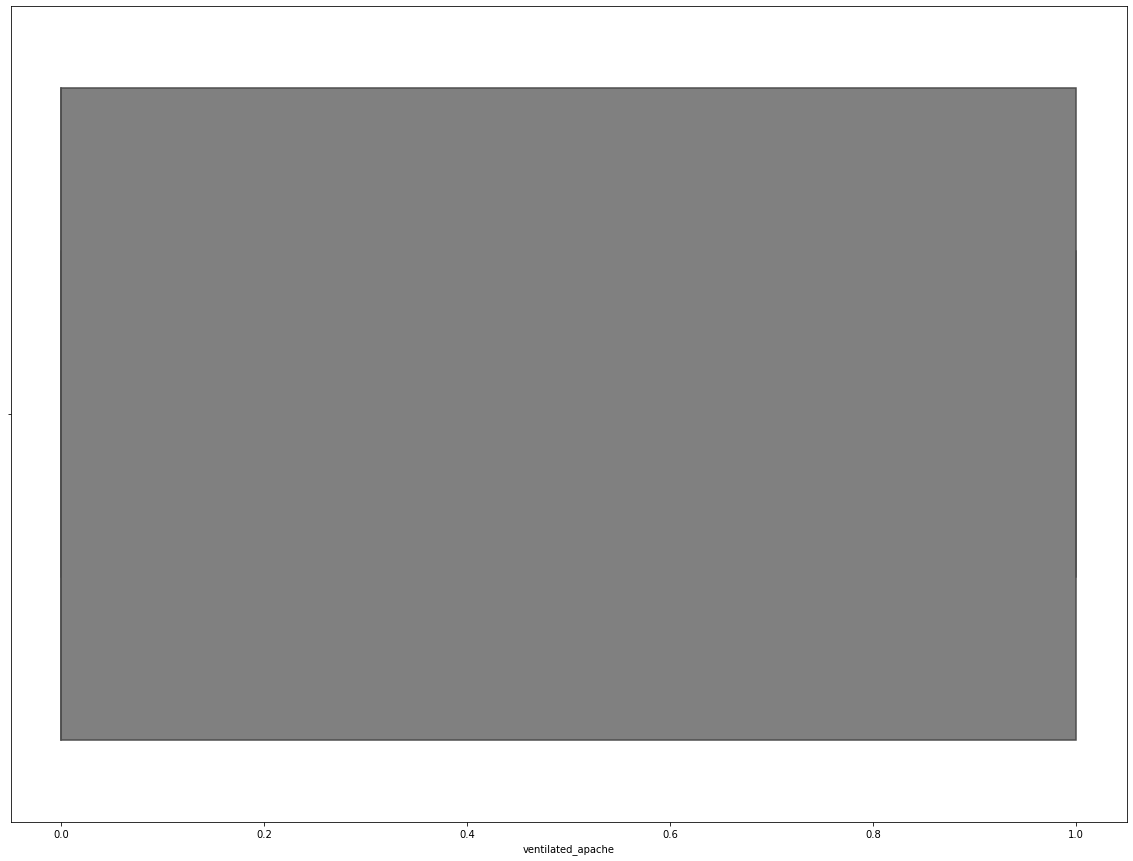

* wbc_apache
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_diasbp_invasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_diasbp_invasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_diasbp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_diasbp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_diasbp_noninvasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


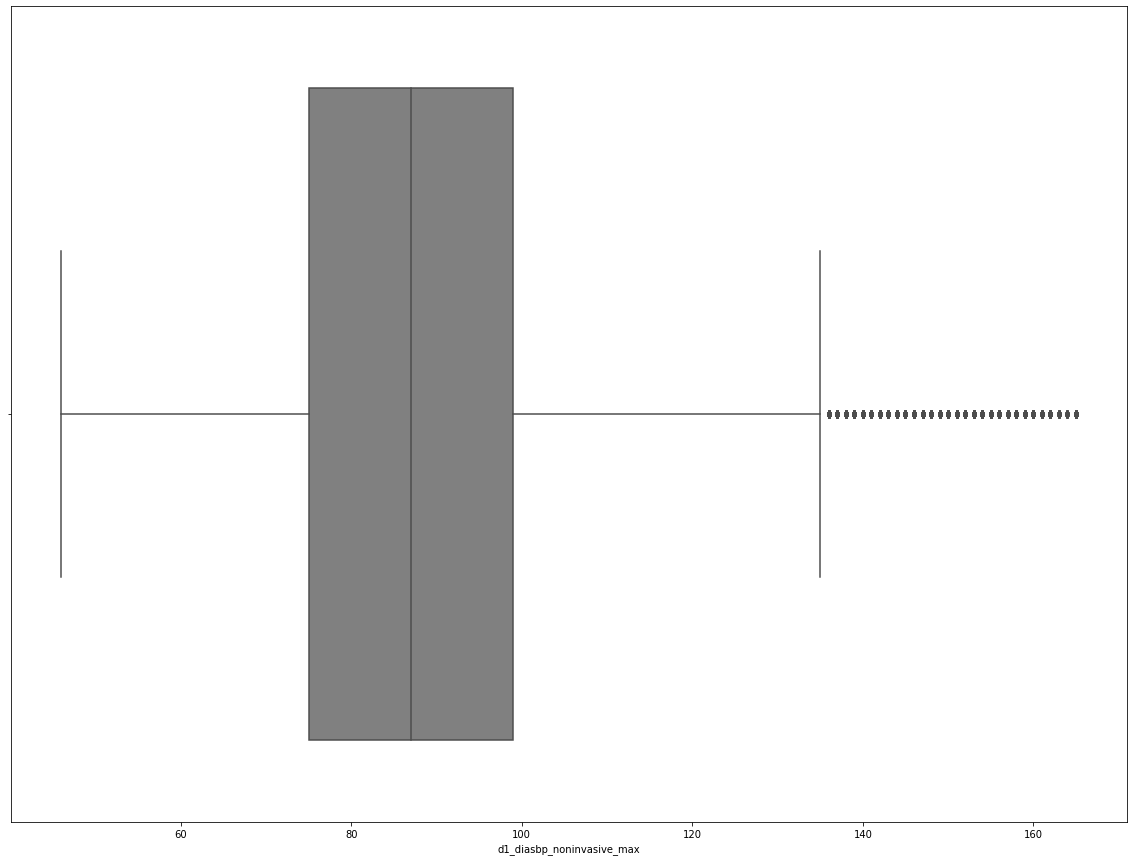

* d1_diasbp_noninvasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


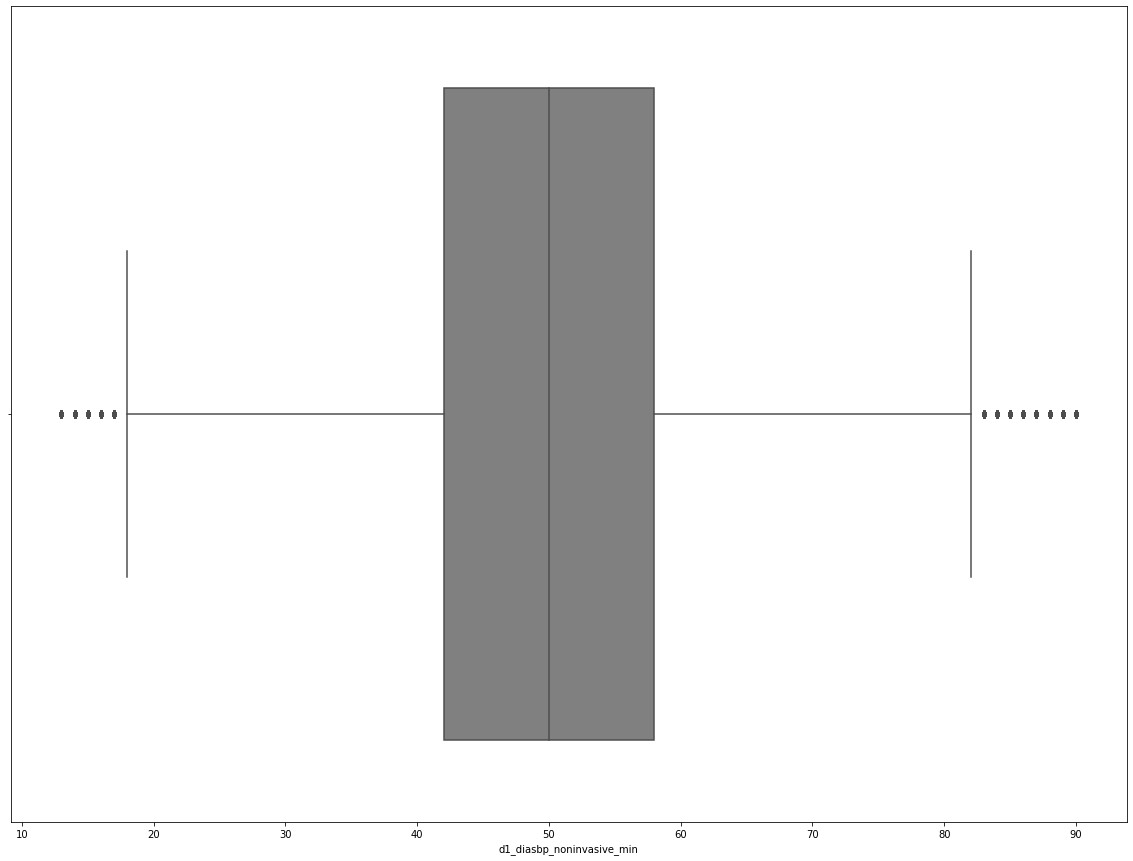

* d1_heartrate_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


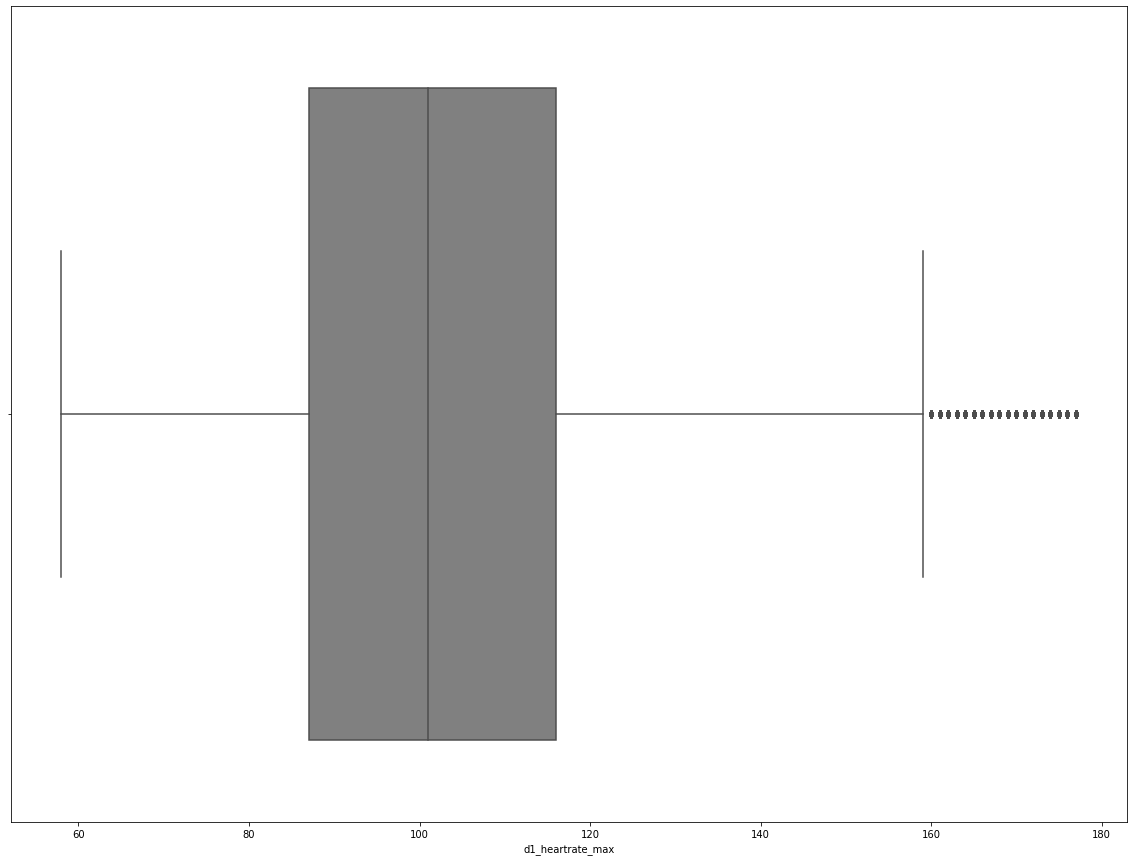

* d1_heartrate_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


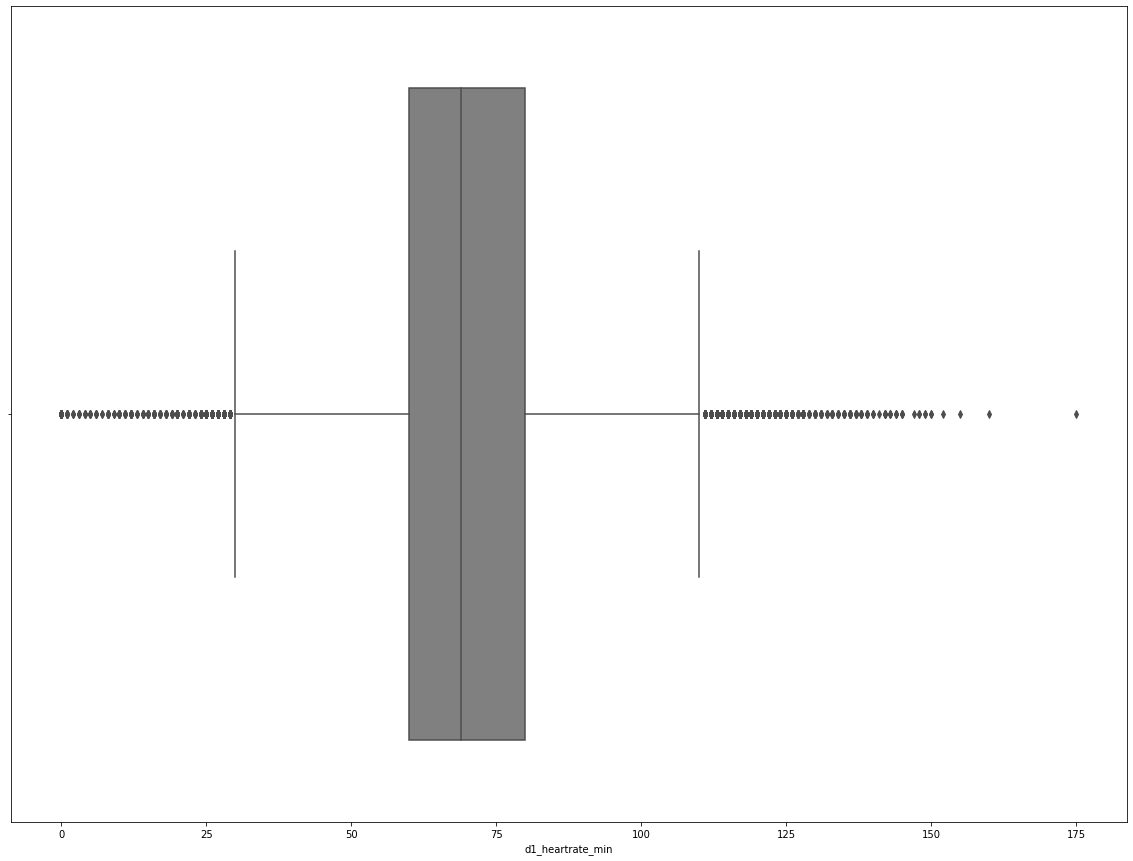

* d1_mbp_invasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


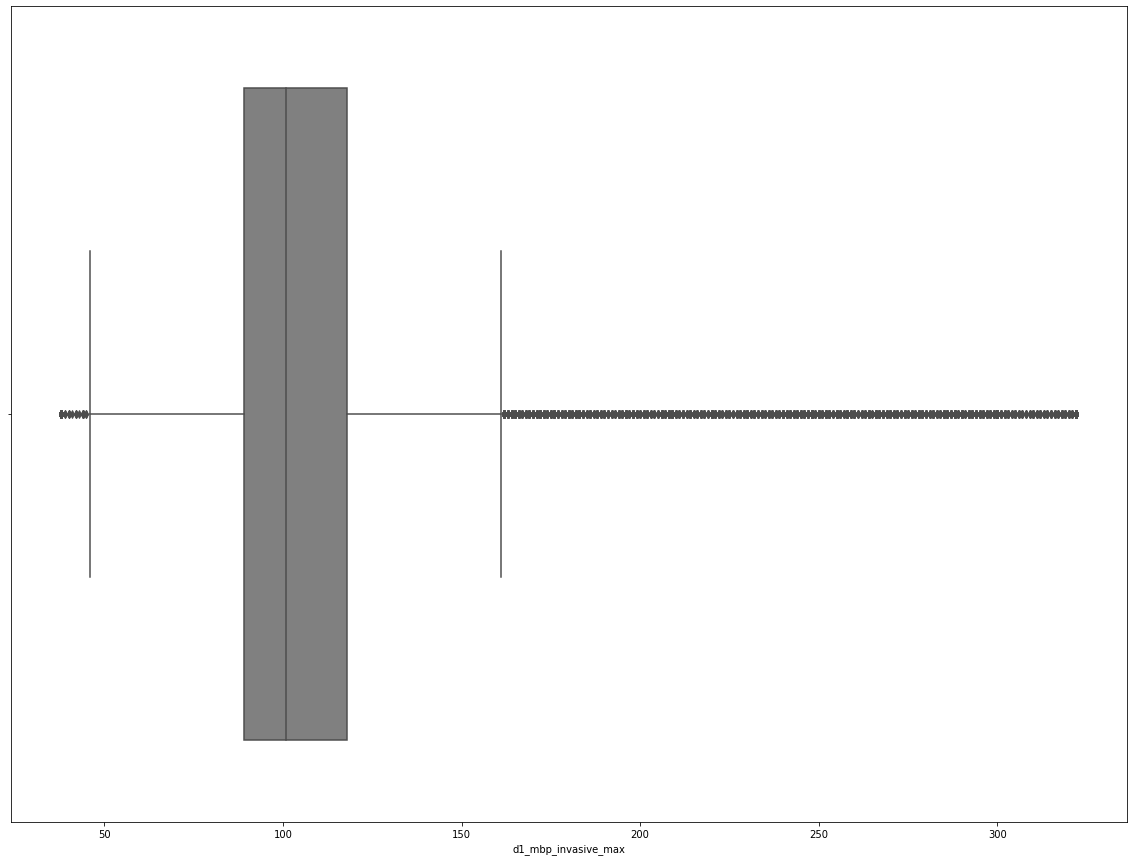

* d1_mbp_invasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


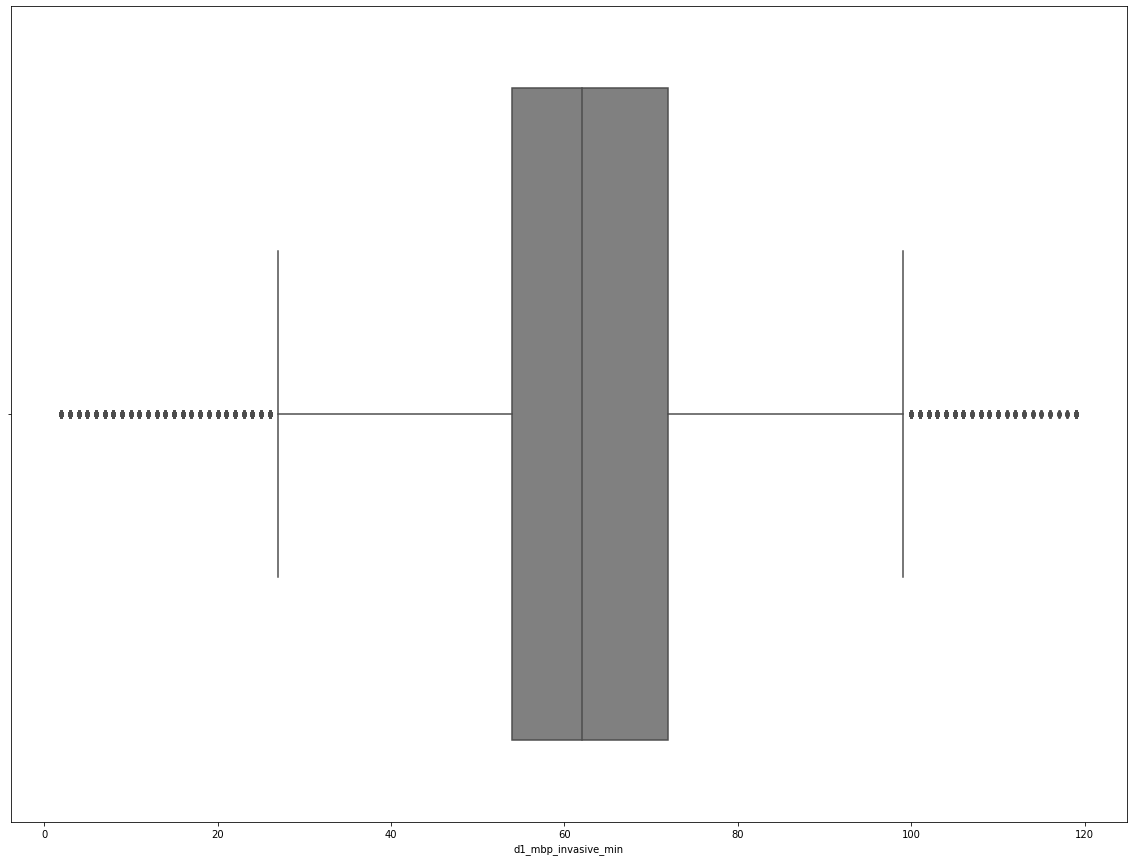

* d1_mbp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


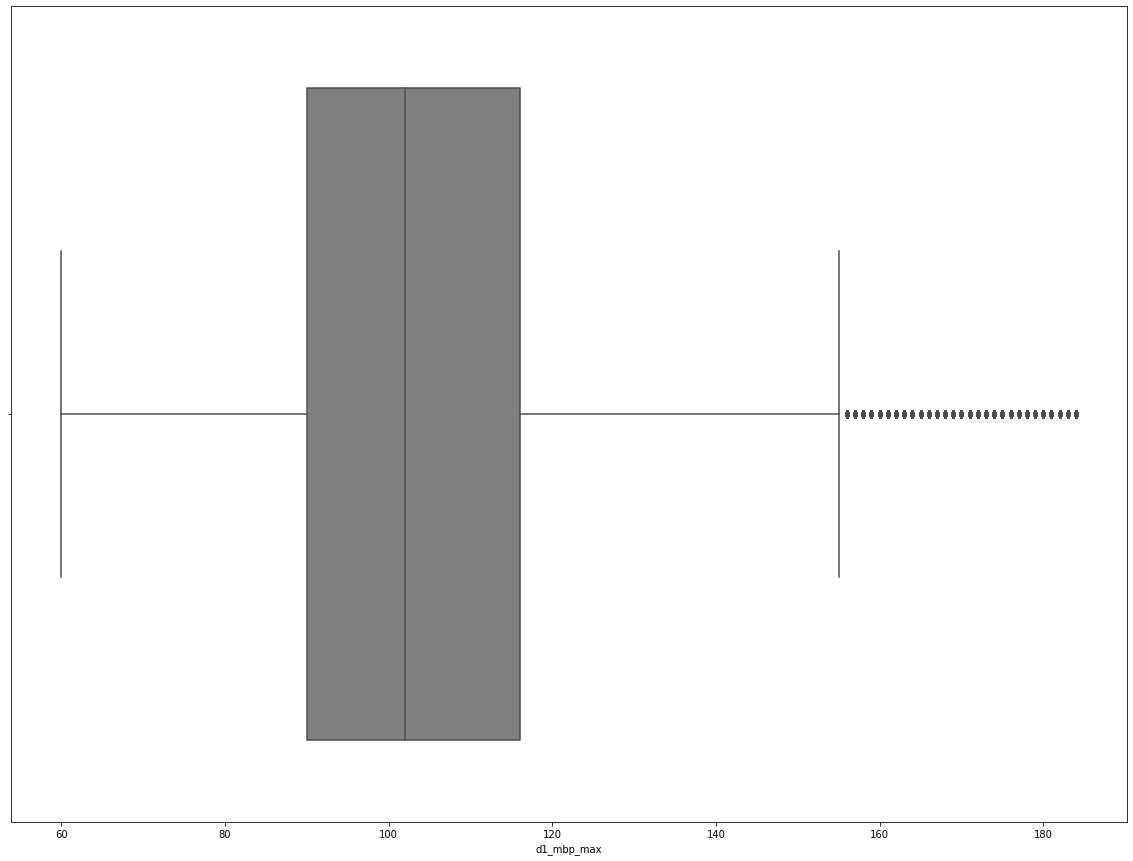

* d1_mbp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


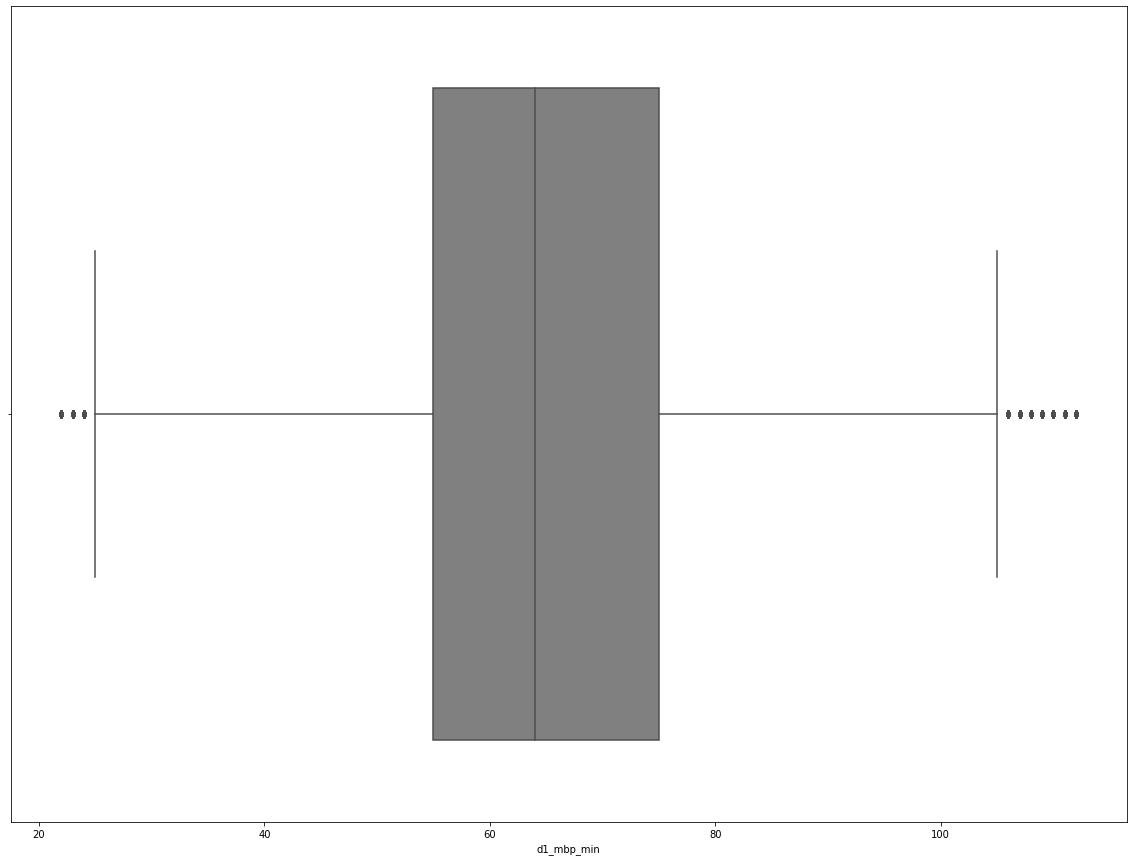

* d1_mbp_noninvasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_mbp_noninvasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_resprate_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_resprate_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


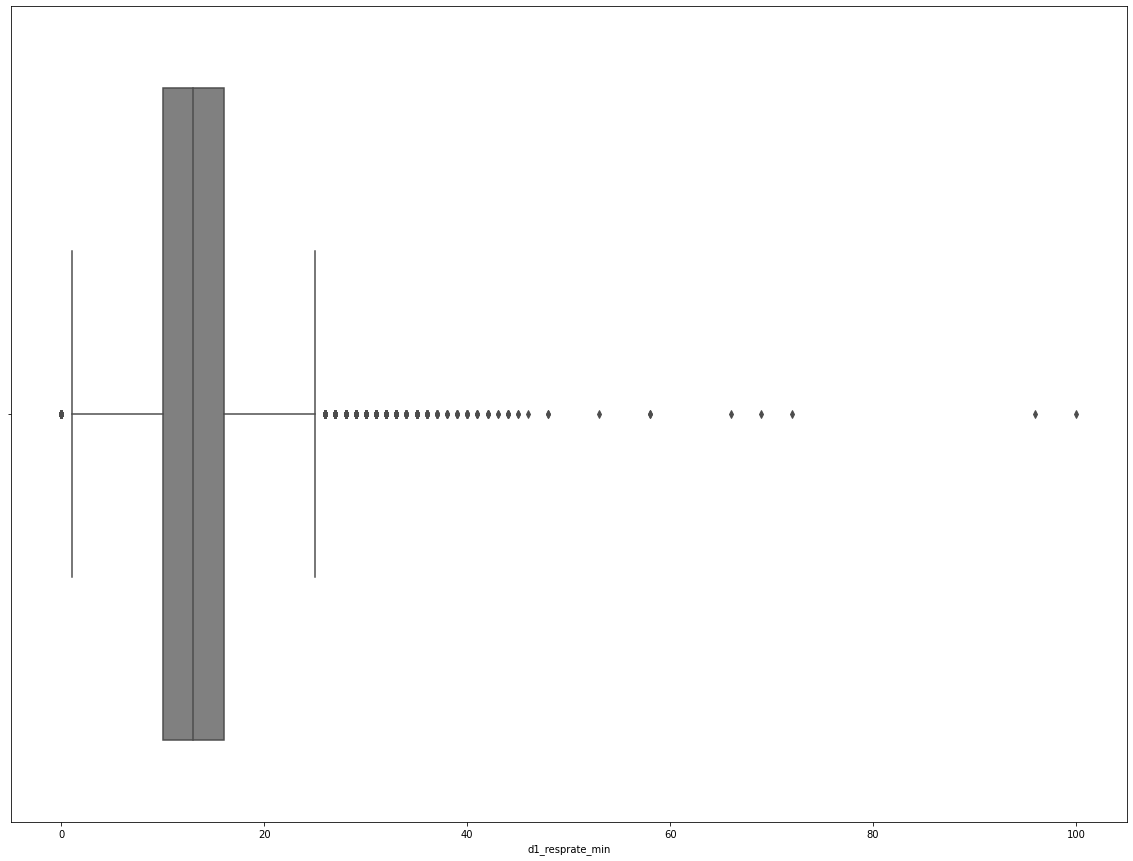

* d1_spo2_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


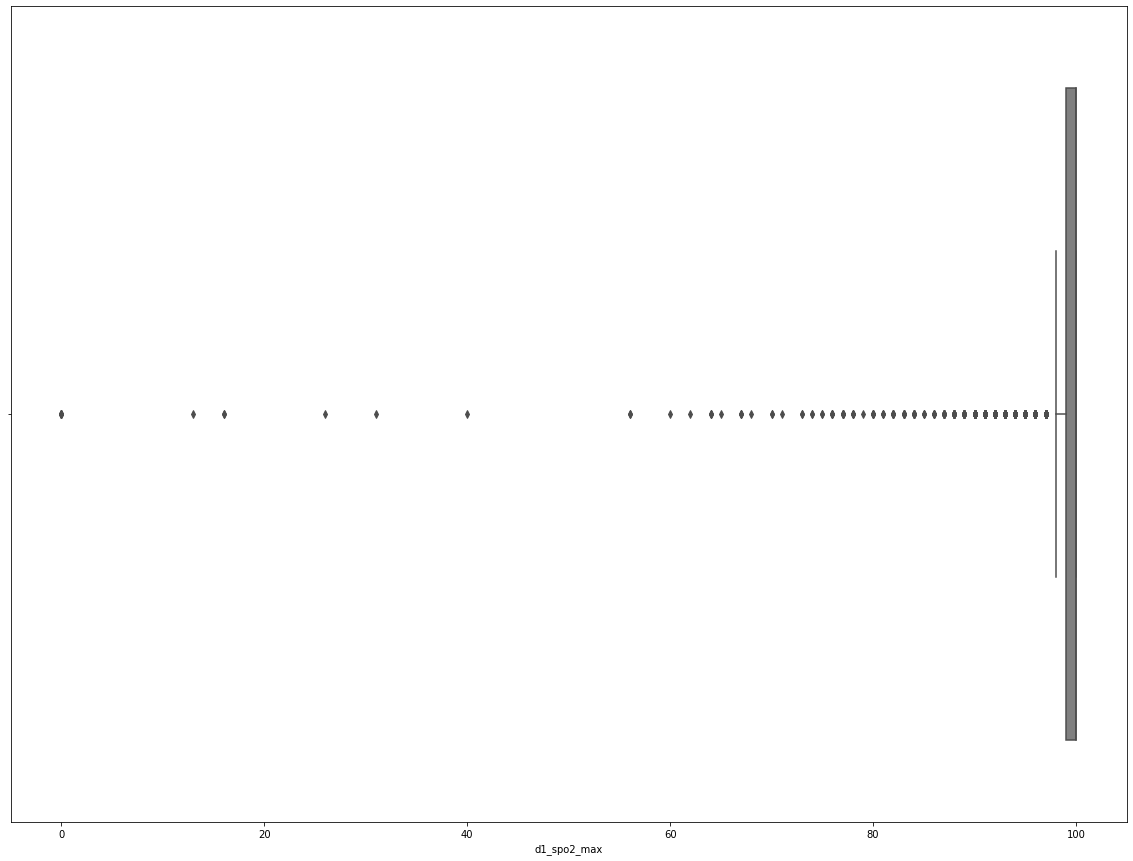

* d1_spo2_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


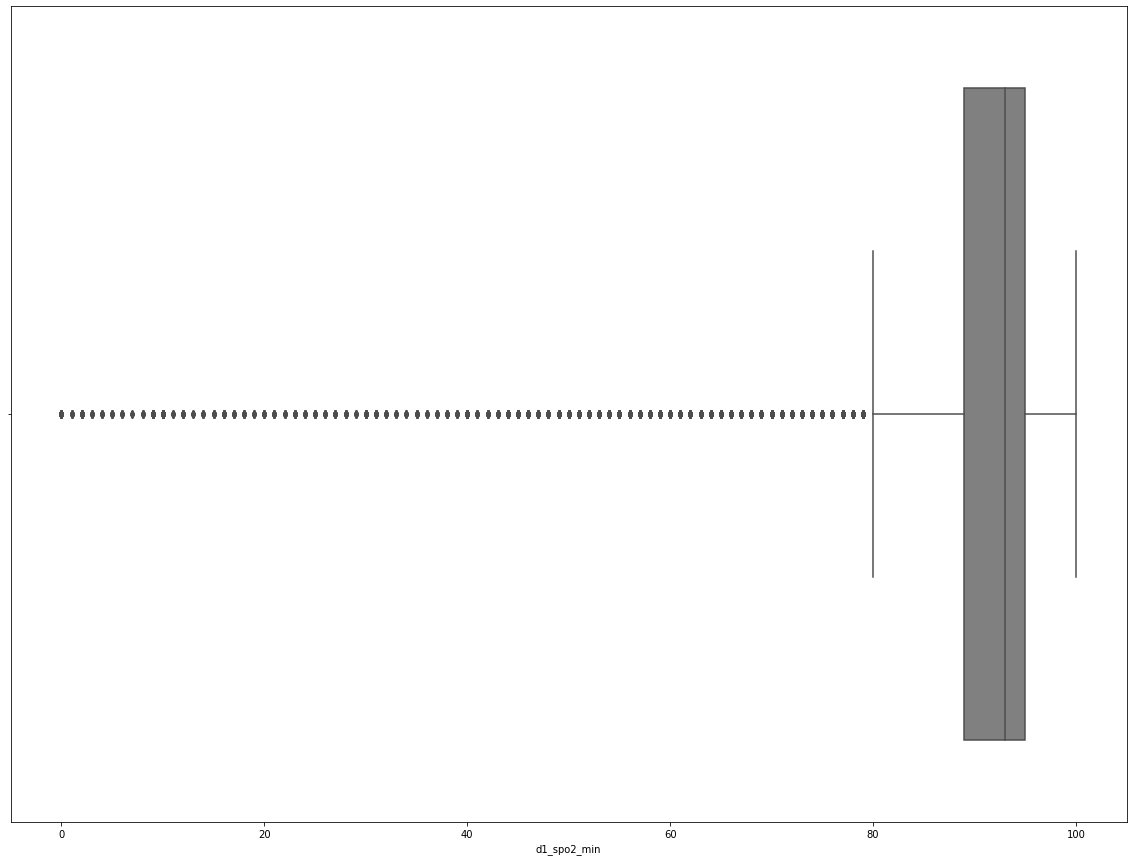

* d1_sysbp_invasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


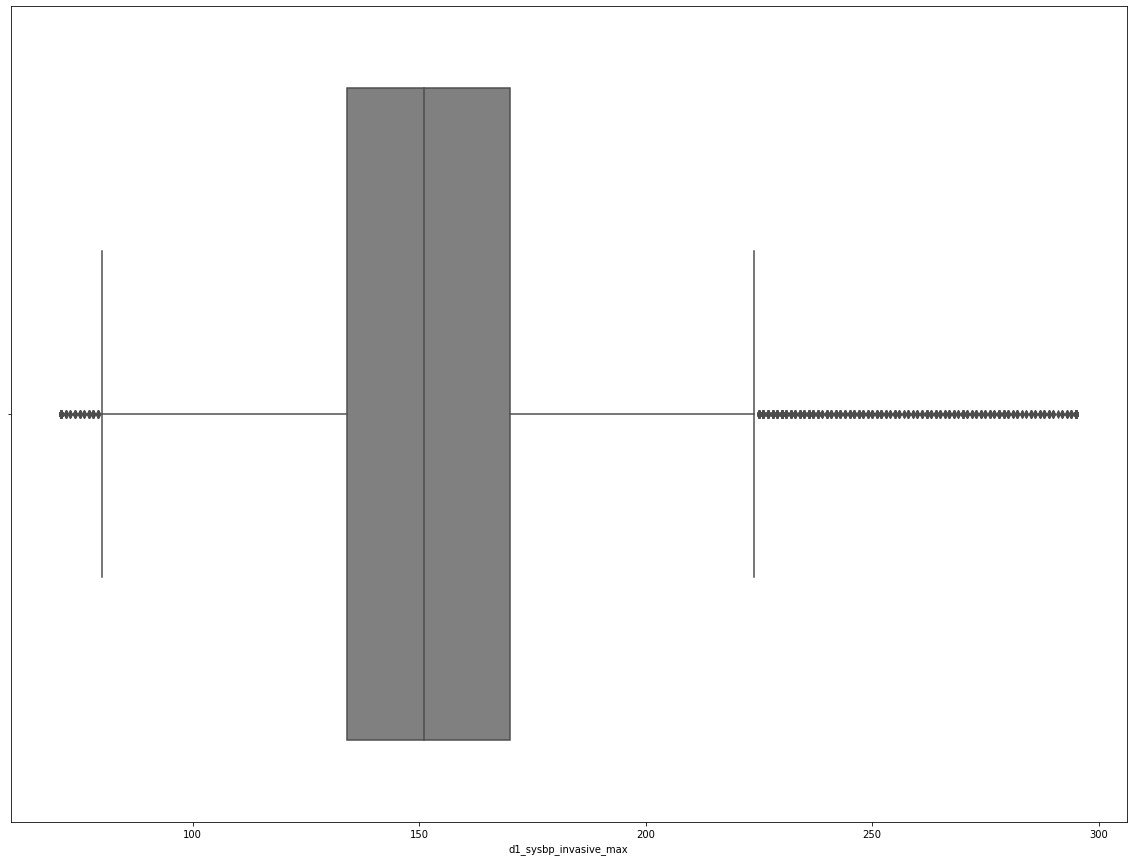

* d1_sysbp_invasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


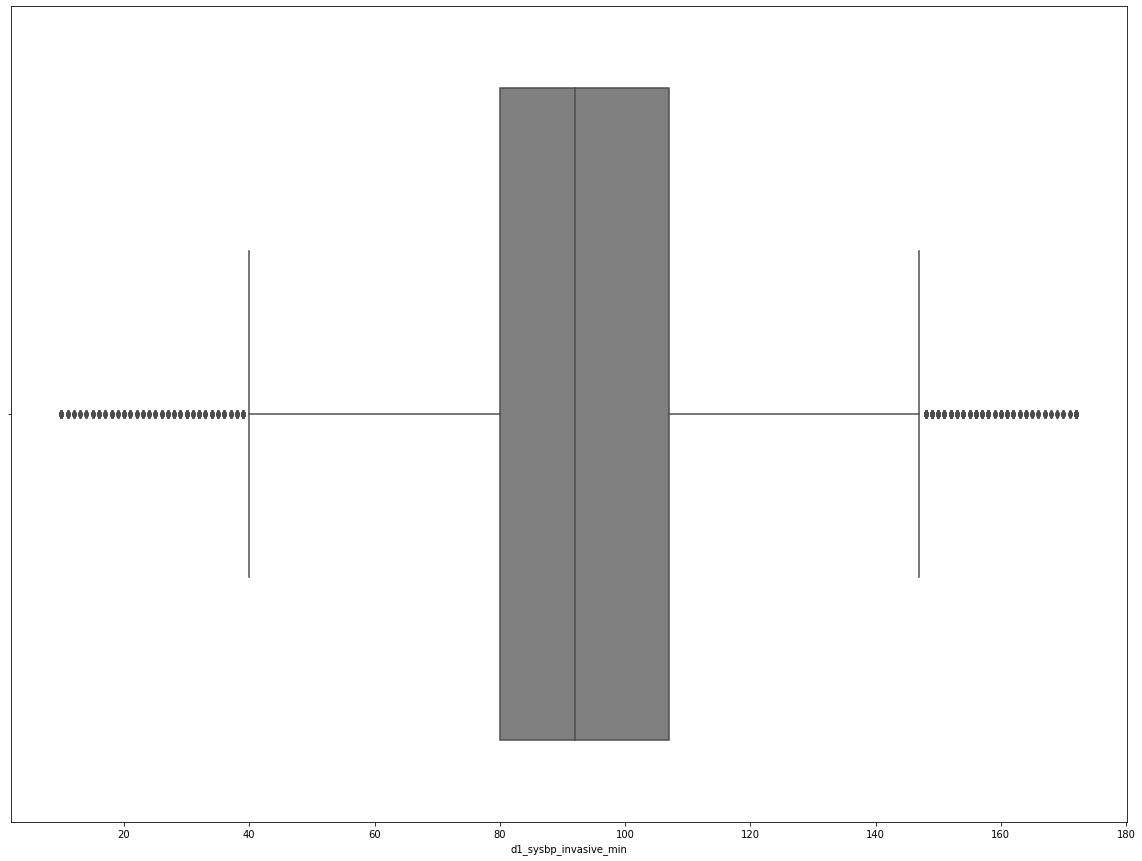

* d1_sysbp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


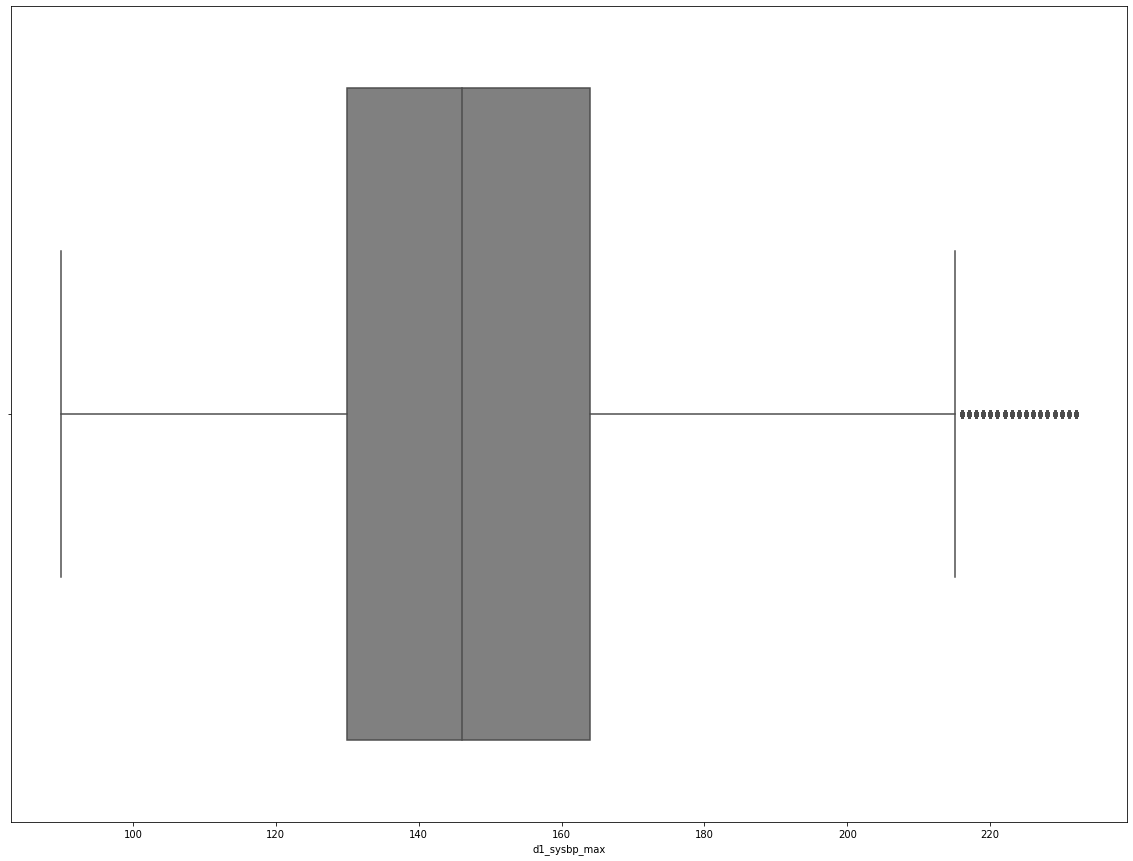

* d1_sysbp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


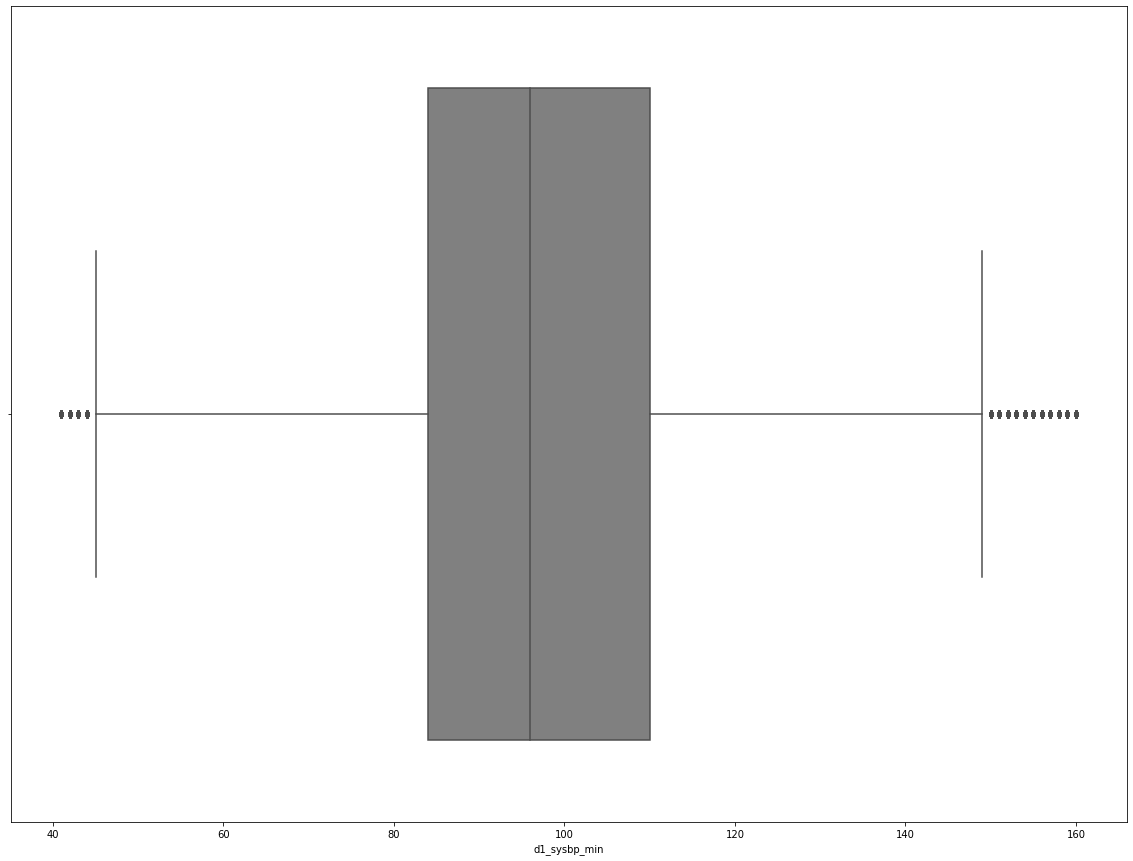

* d1_sysbp_noninvasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


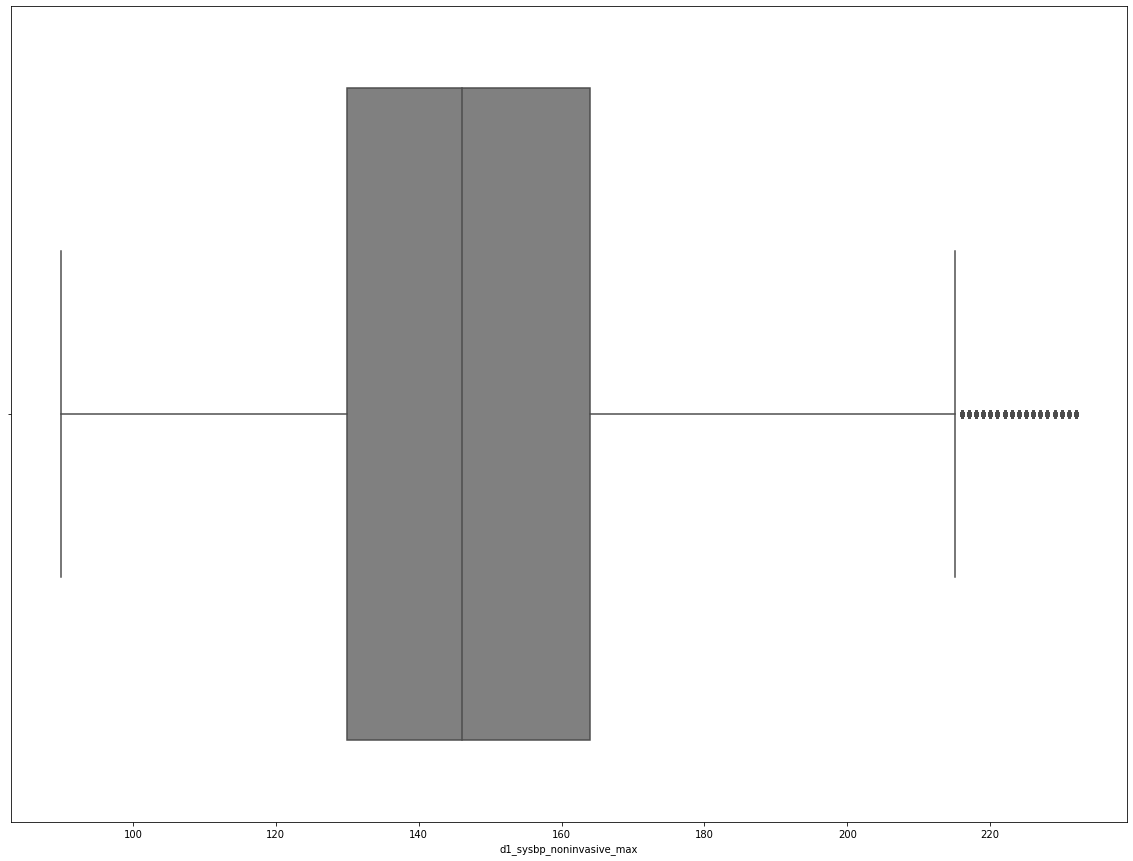

* d1_sysbp_noninvasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


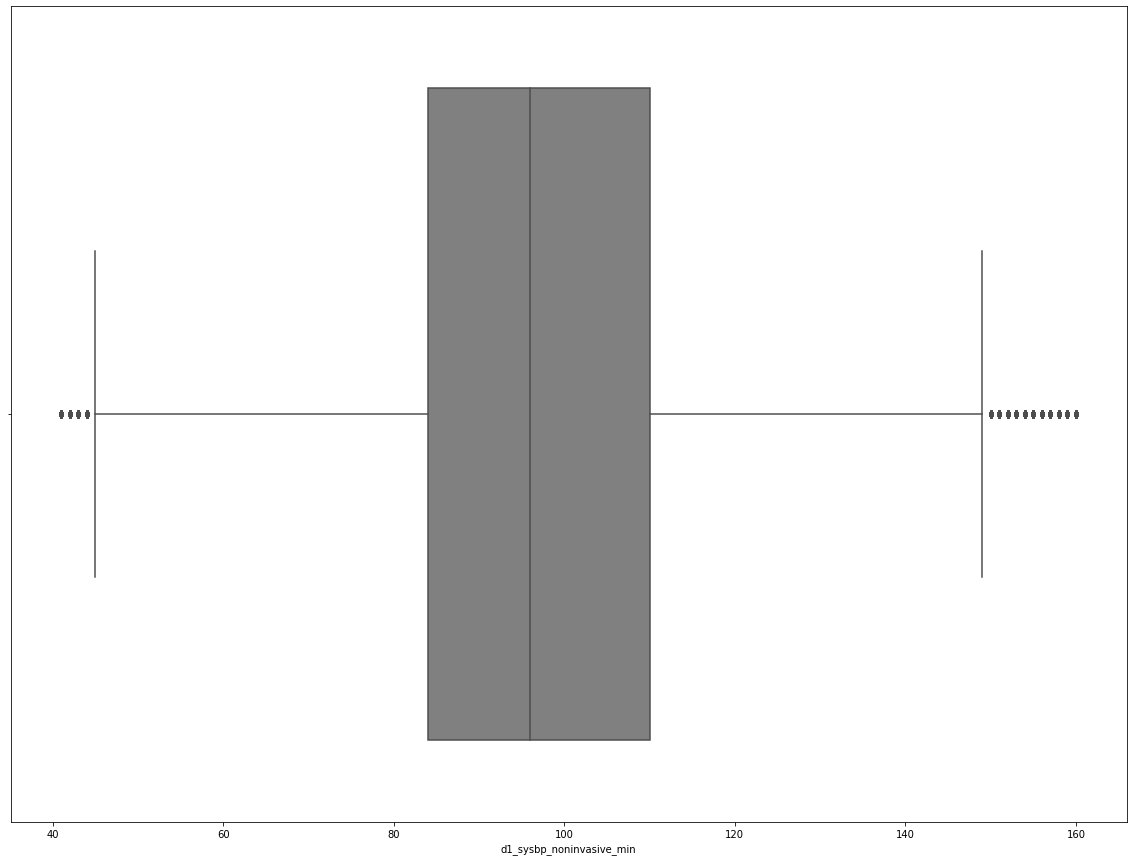

* d1_temp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


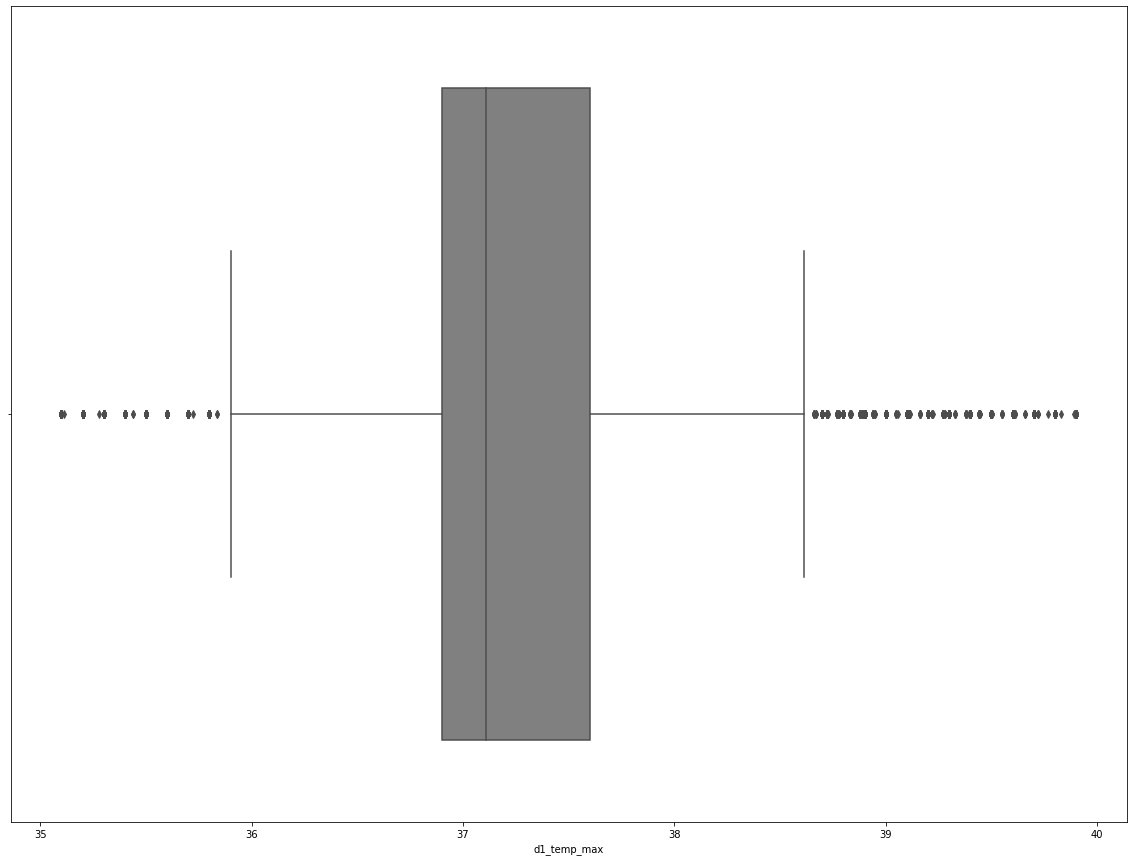

* d1_temp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


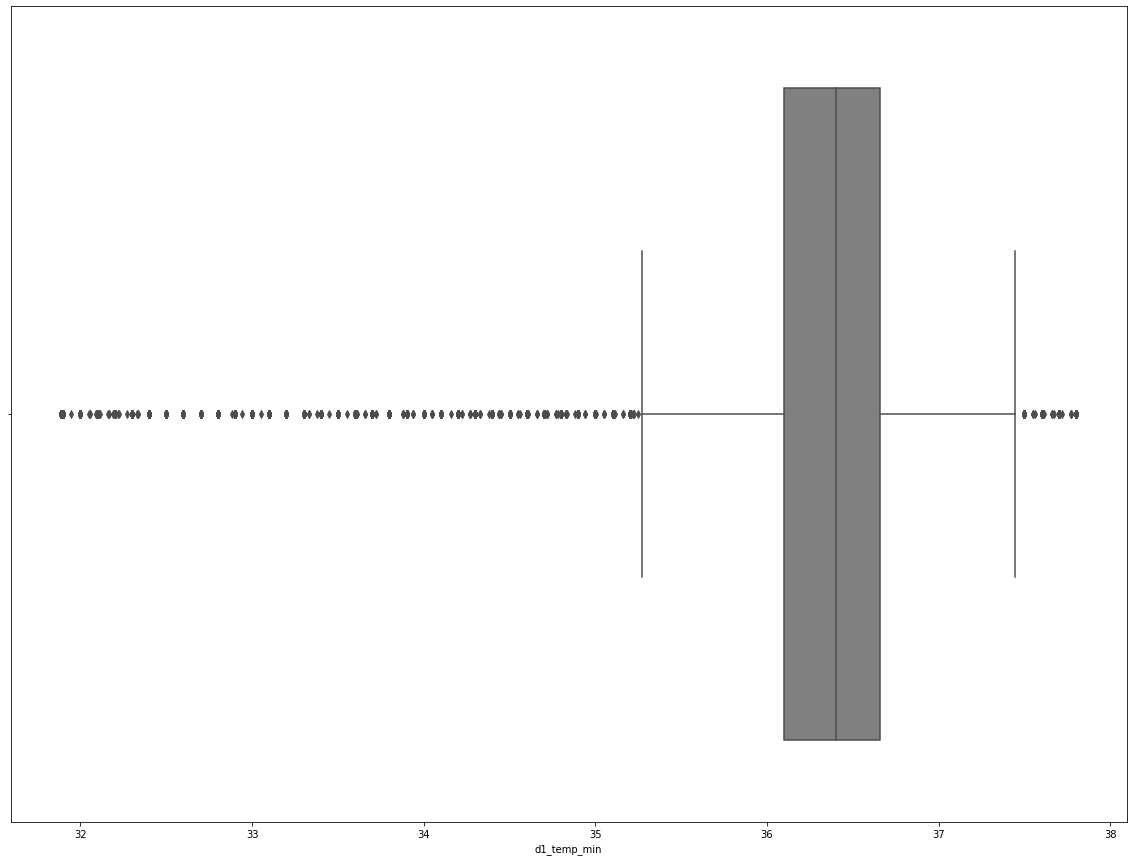

* h1_diasbp_invasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


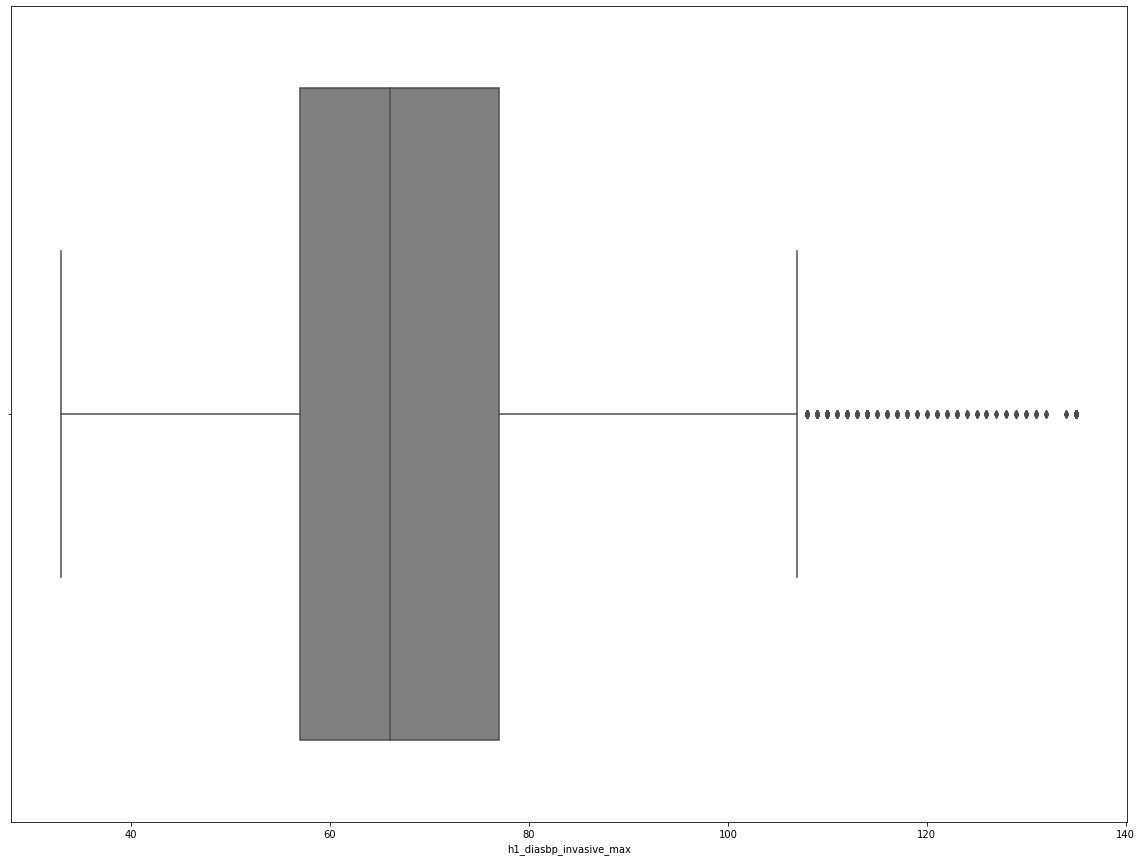

* h1_diasbp_invasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_diasbp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


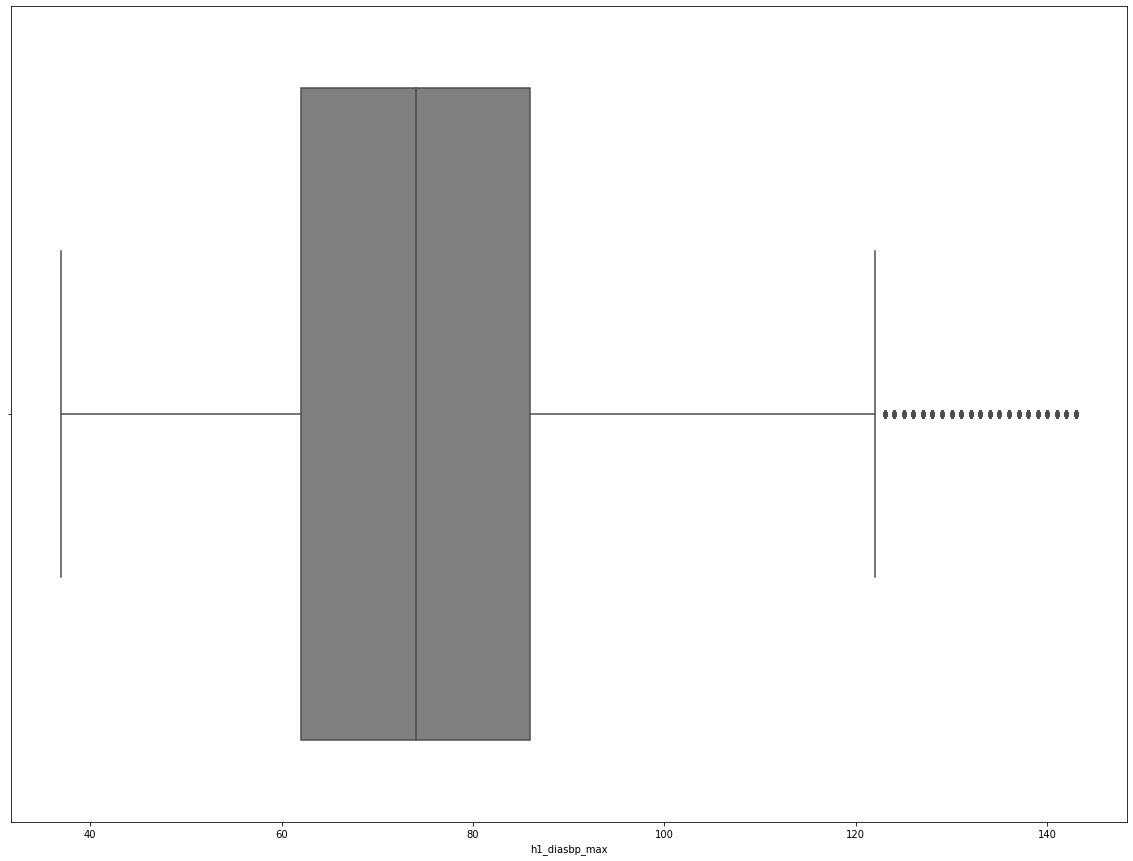

* h1_diasbp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


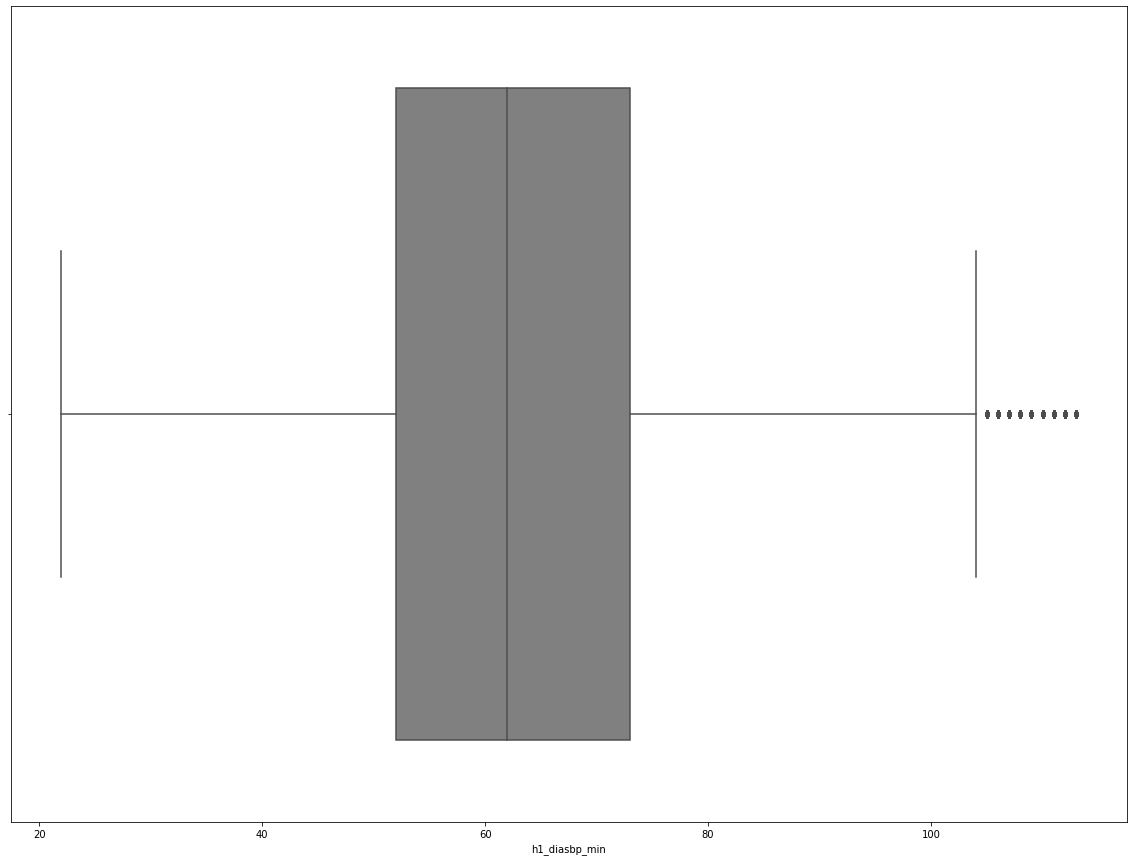

* h1_diasbp_noninvasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


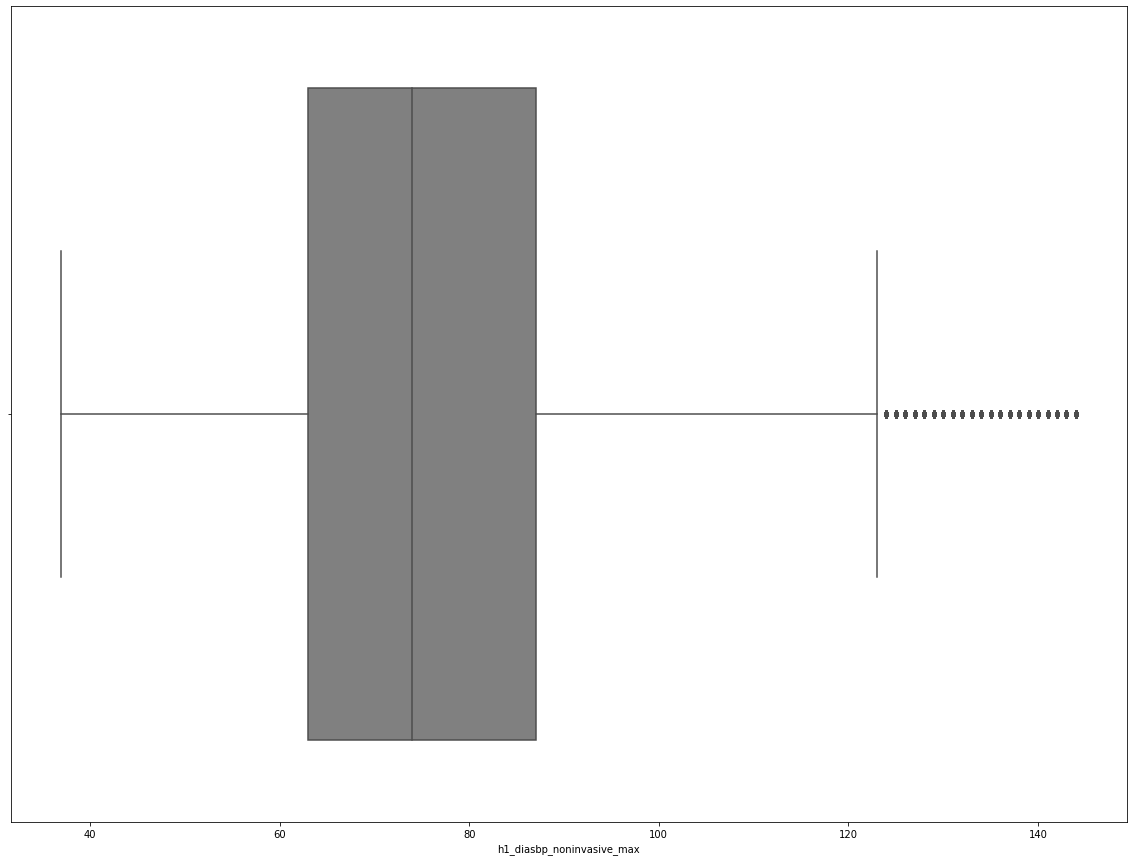

* h1_diasbp_noninvasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_heartrate_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_heartrate_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


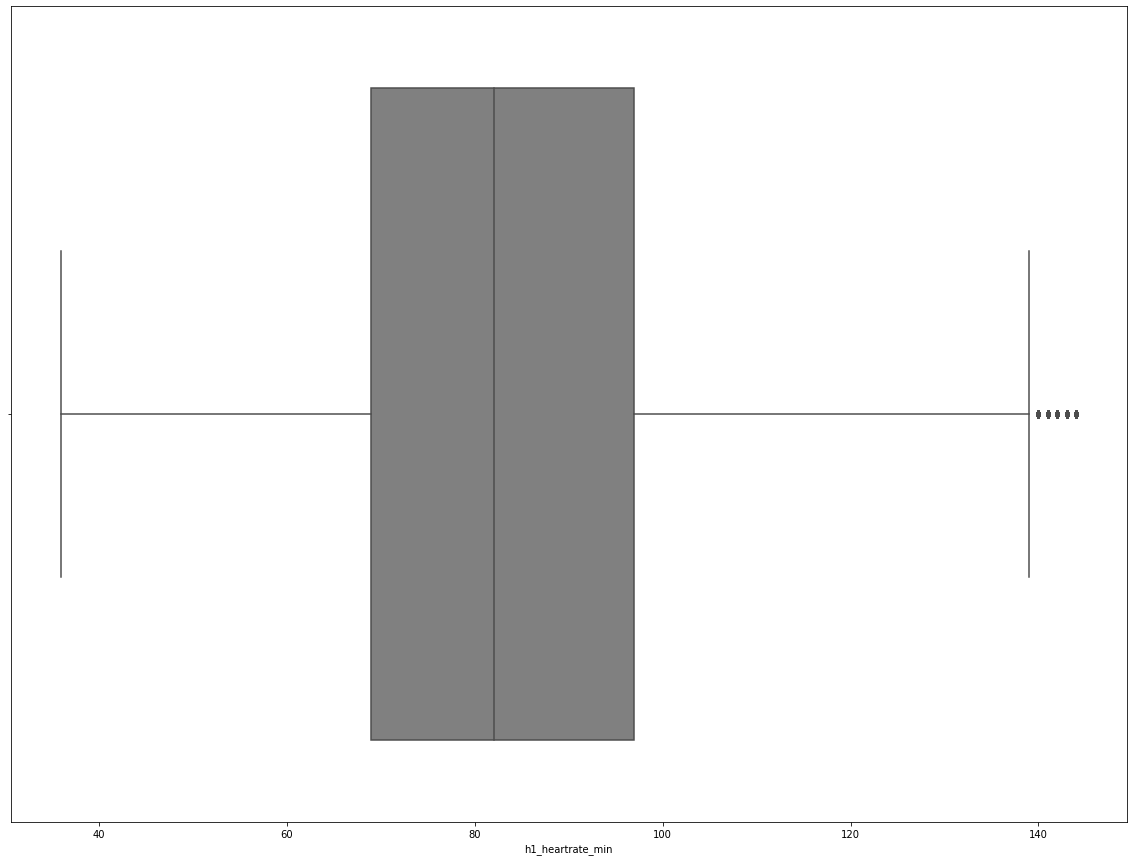

* h1_mbp_invasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


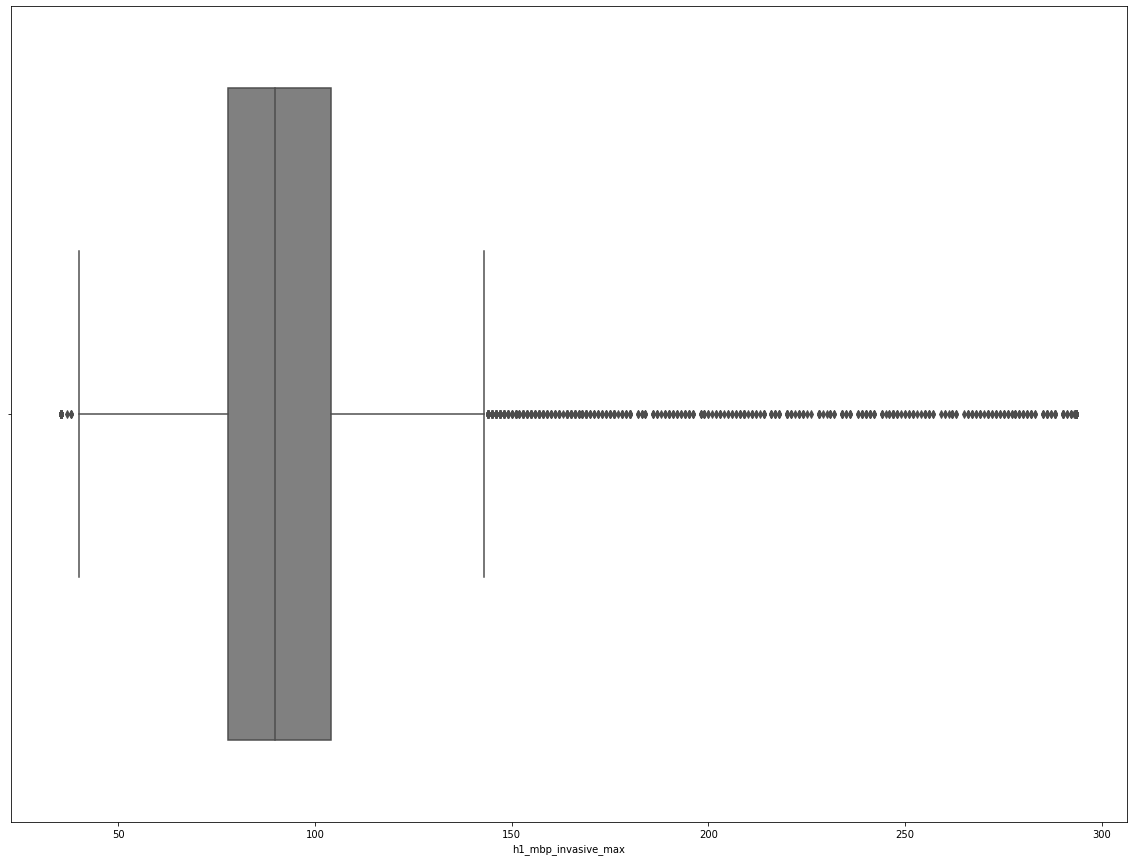

* h1_mbp_invasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


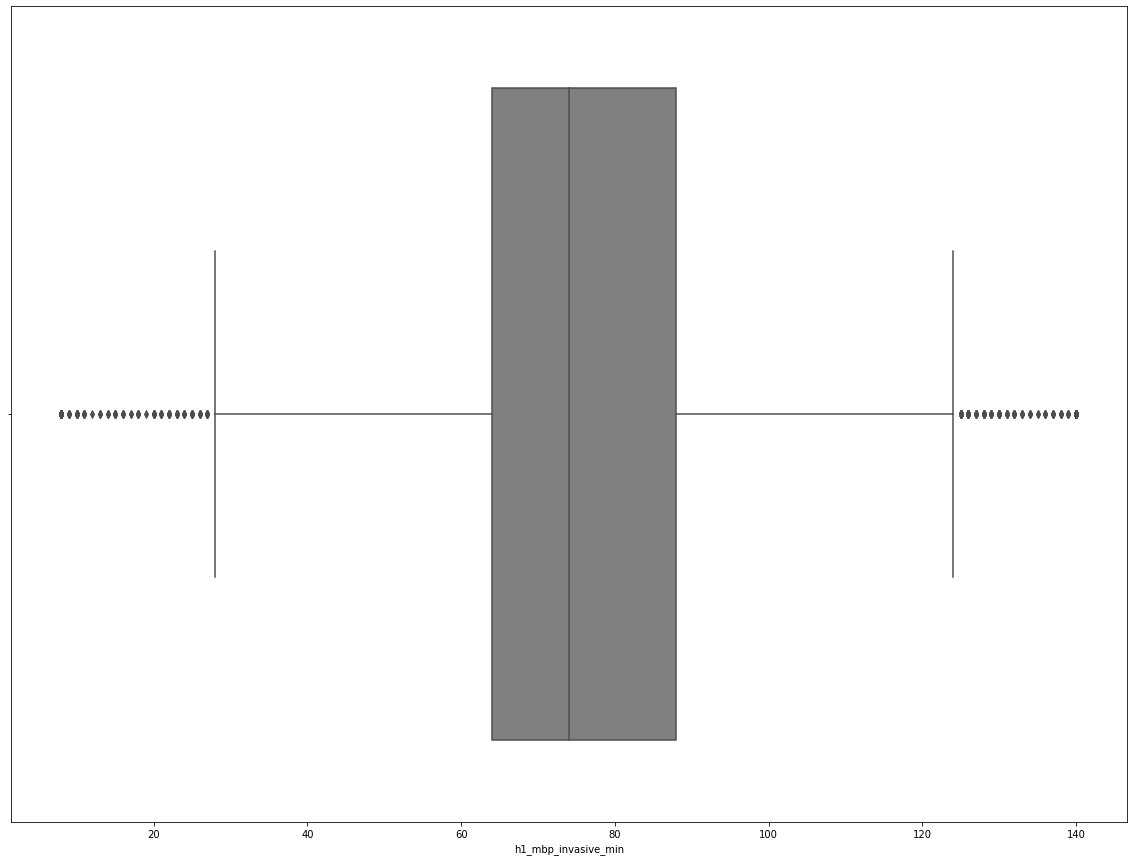

* h1_mbp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_mbp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


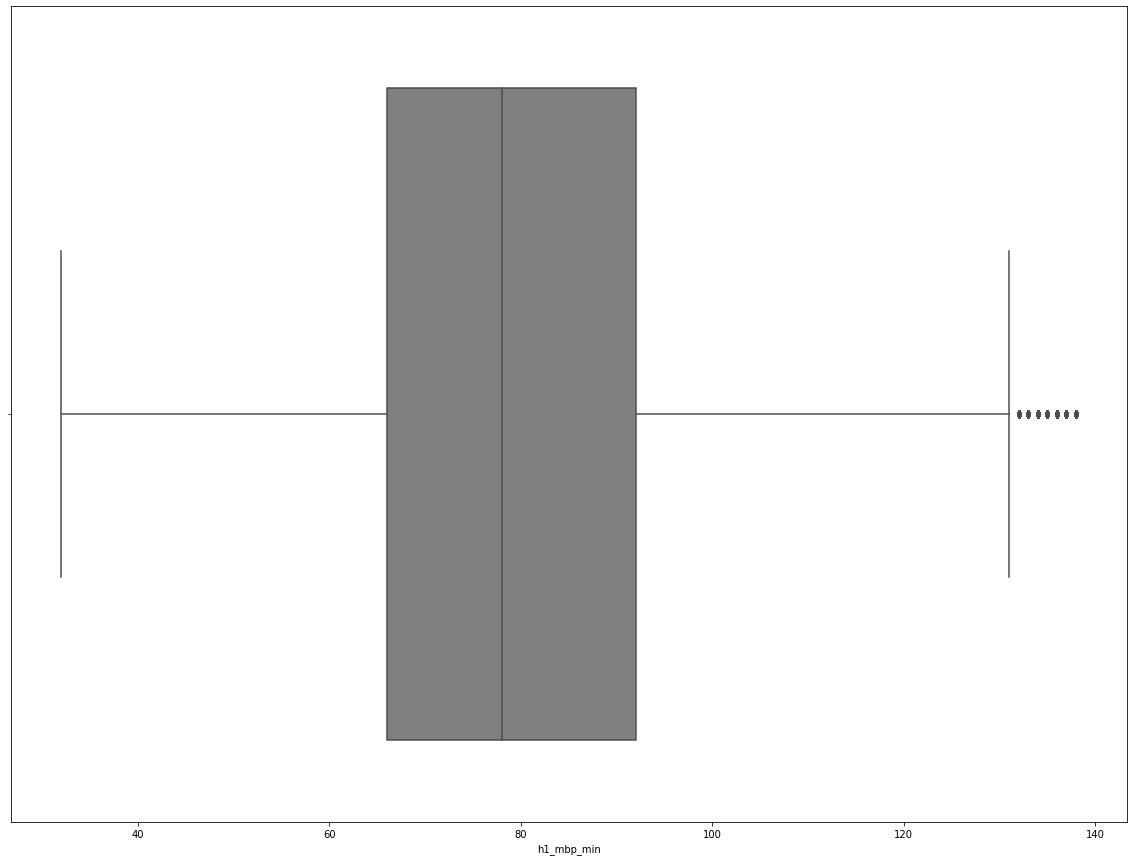

* h1_mbp_noninvasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_mbp_noninvasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_resprate_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_resprate_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_spo2_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_spo2_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_sysbp_invasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


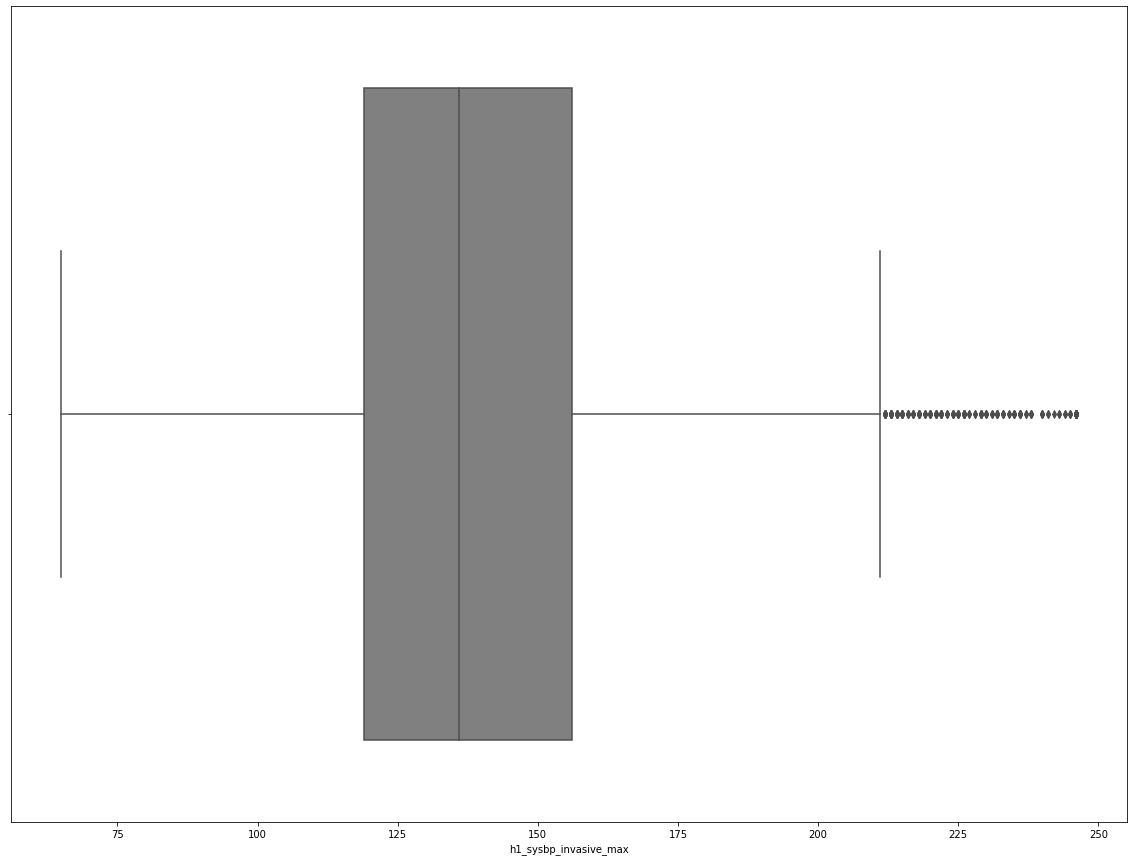

* h1_sysbp_invasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


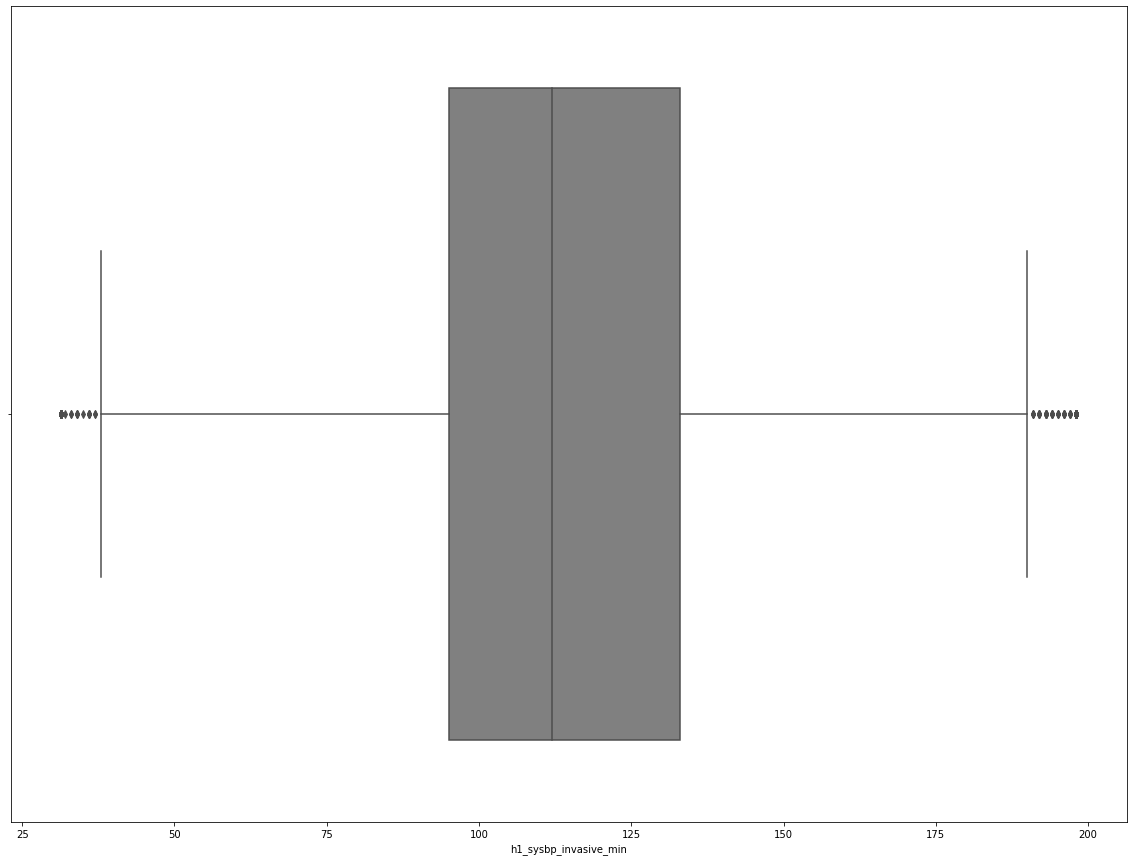

* h1_sysbp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


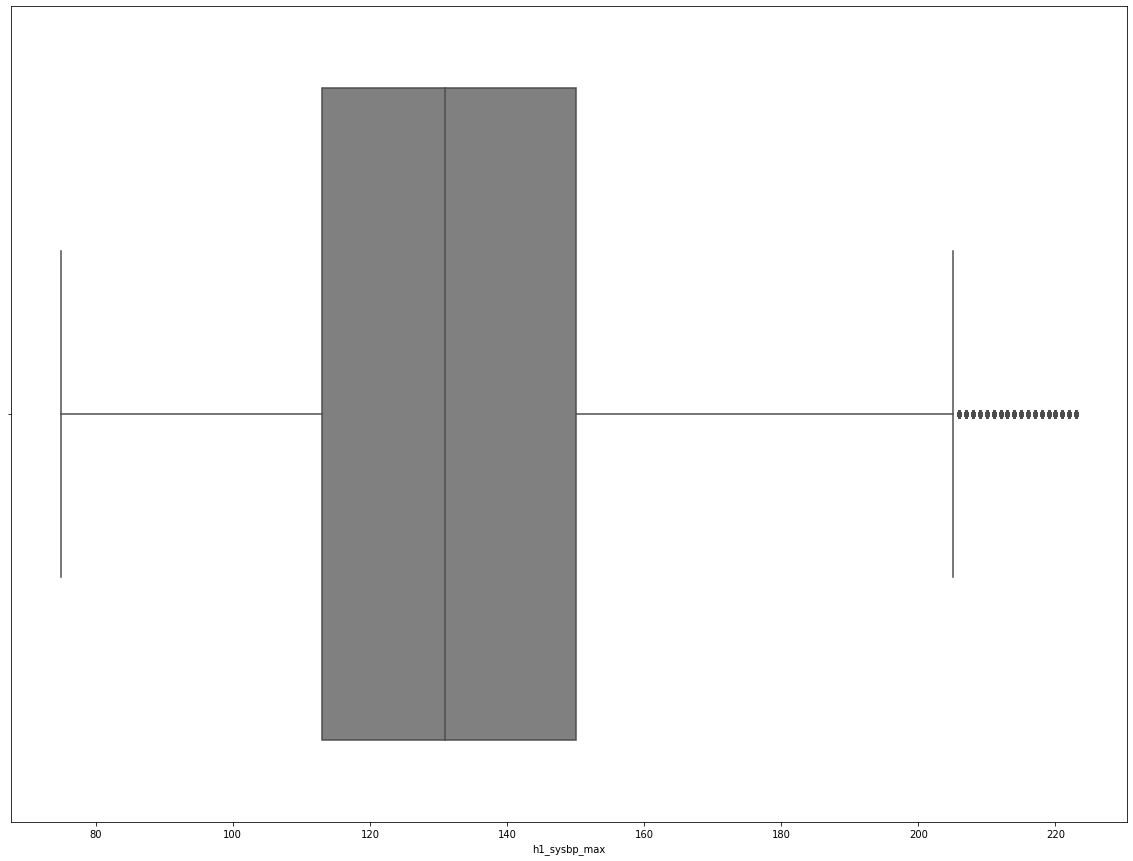

* h1_sysbp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


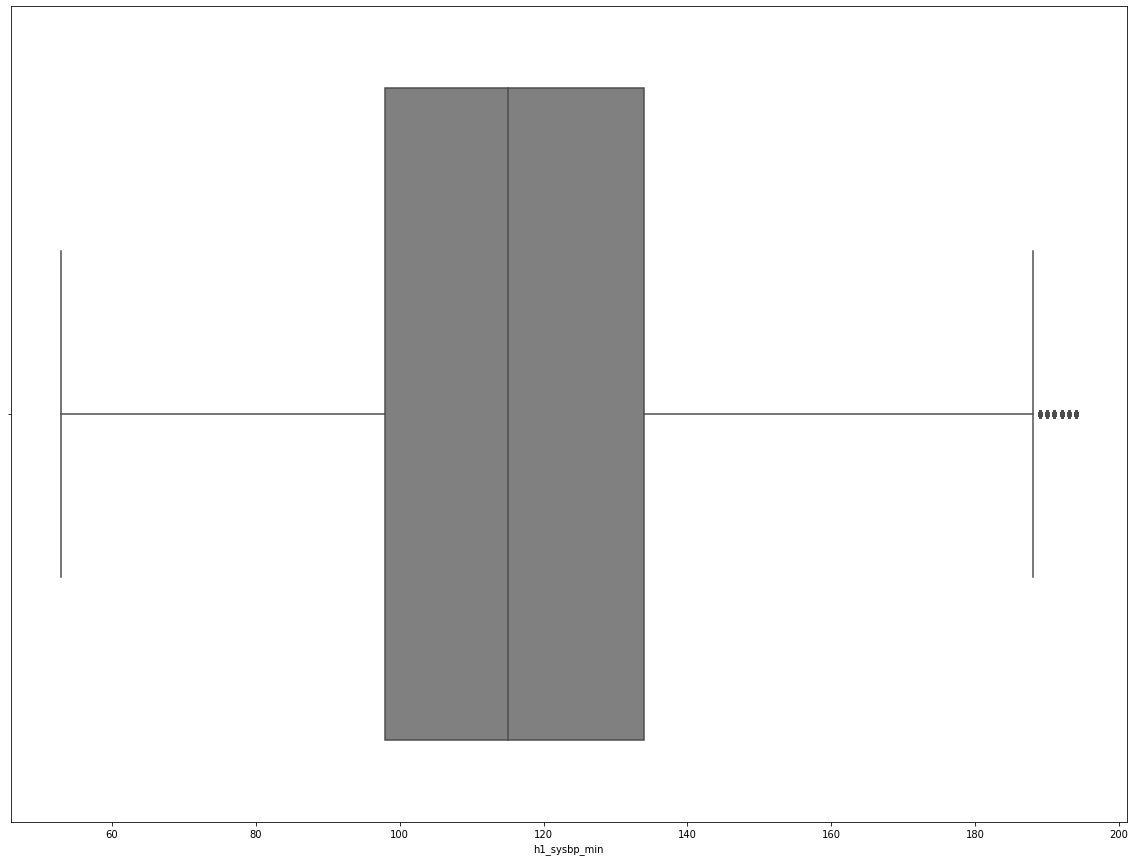

* h1_sysbp_noninvasive_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


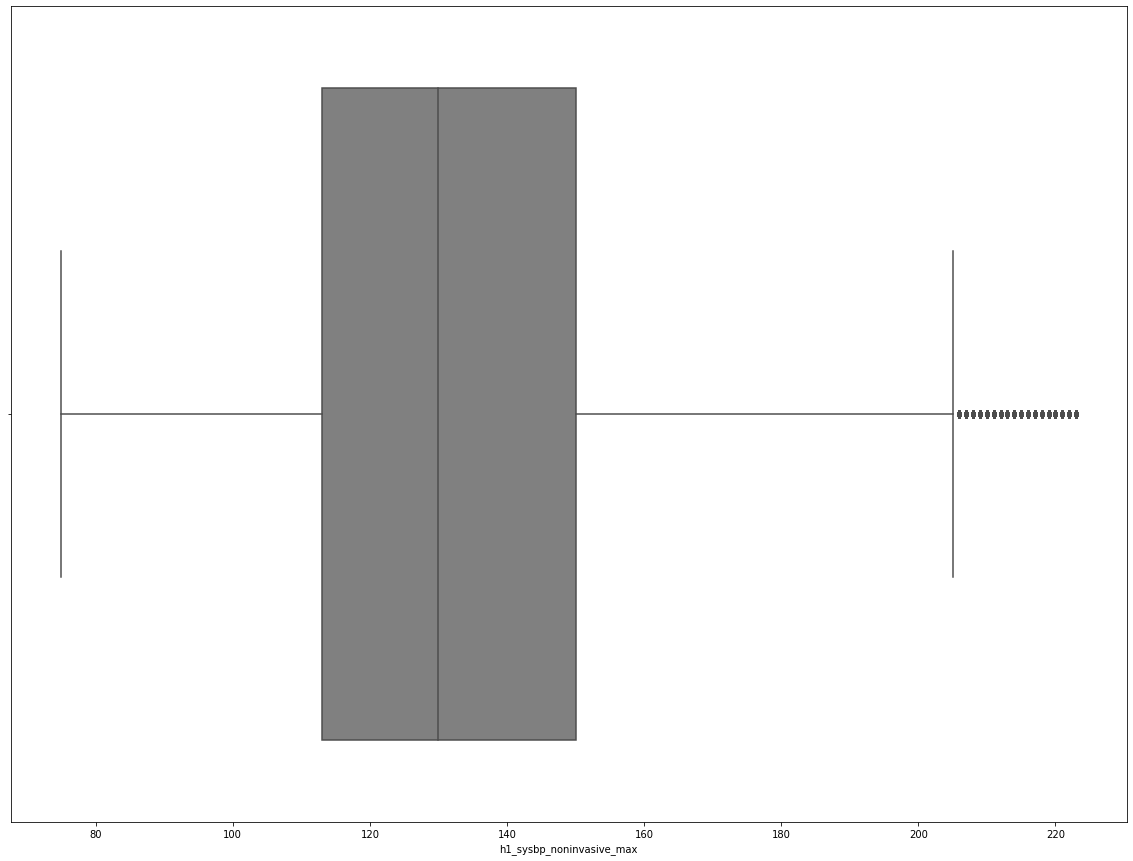

* h1_sysbp_noninvasive_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


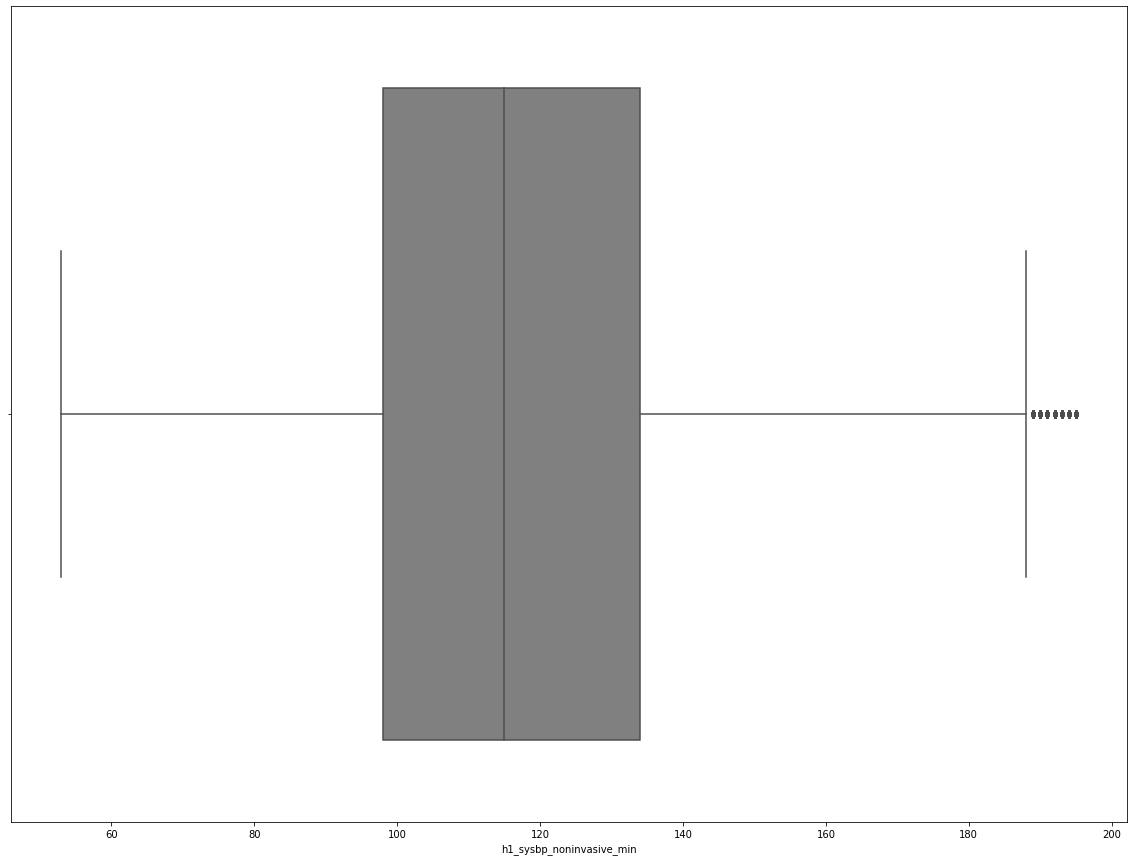

* h1_temp_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


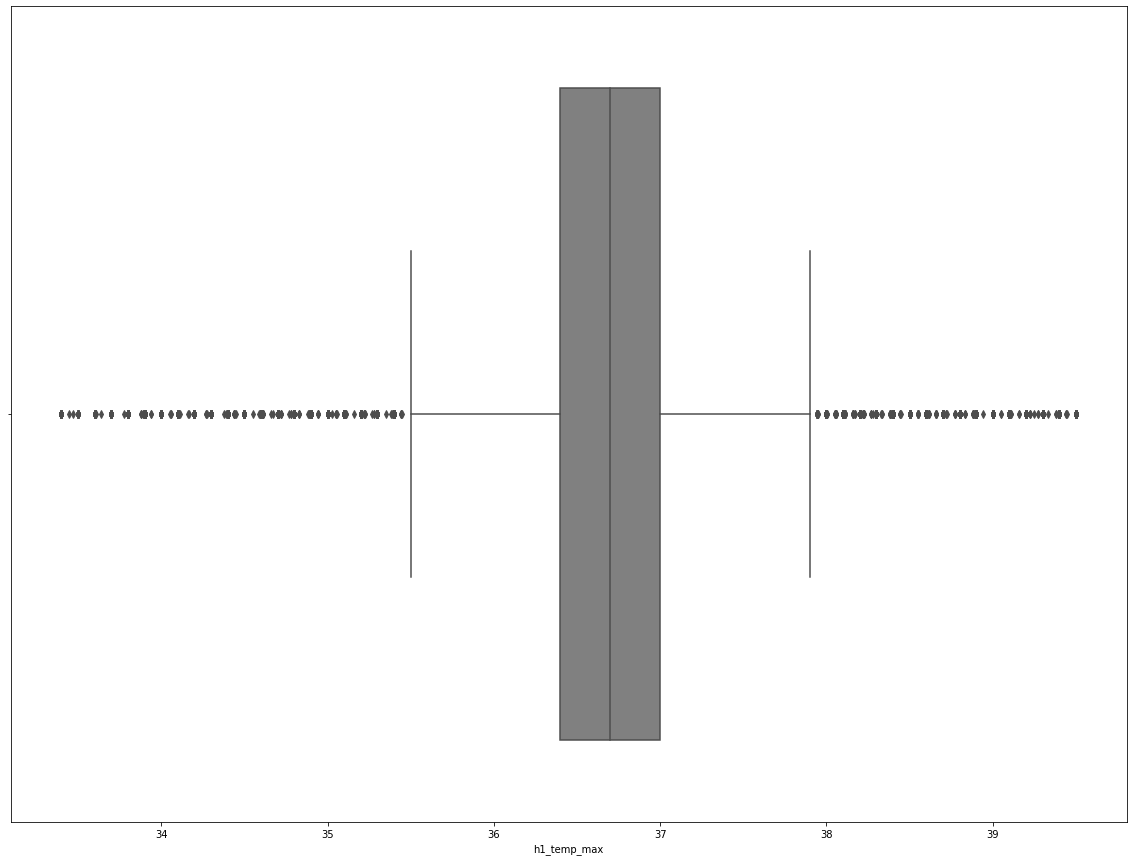

* h1_temp_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


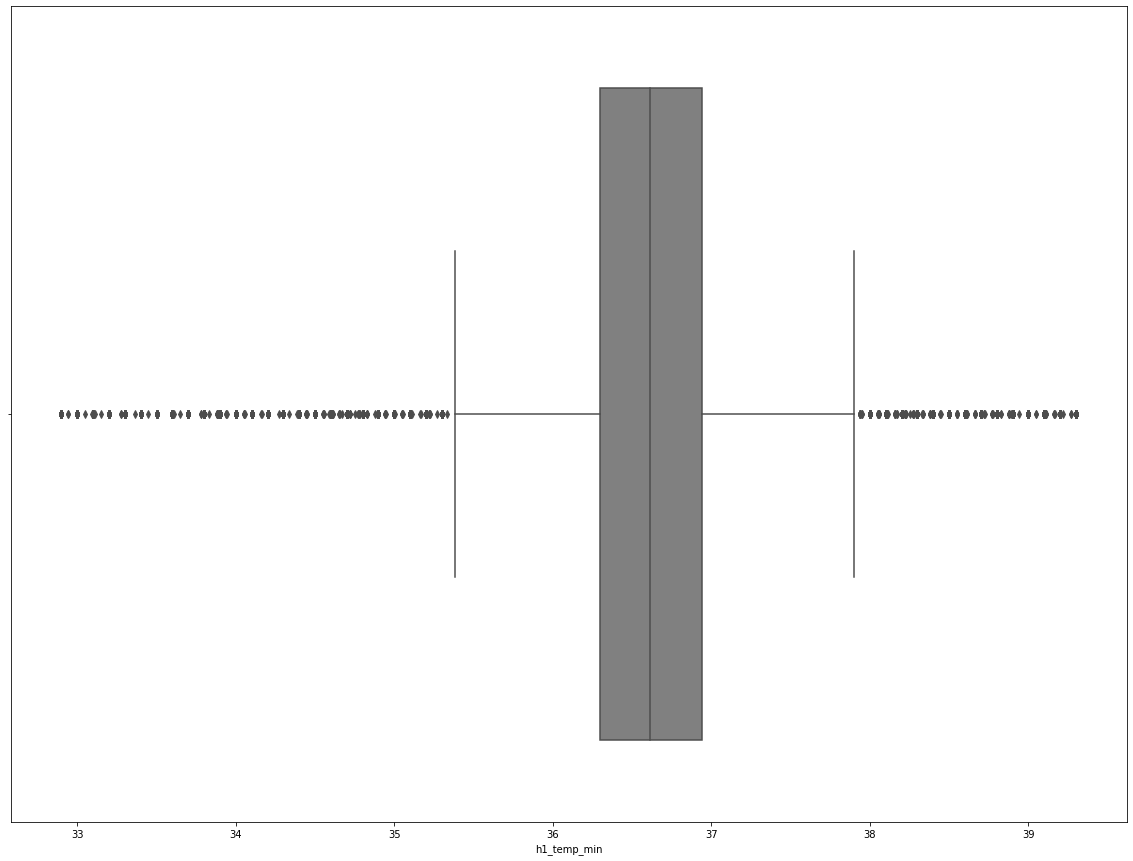

* d1_albumin_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


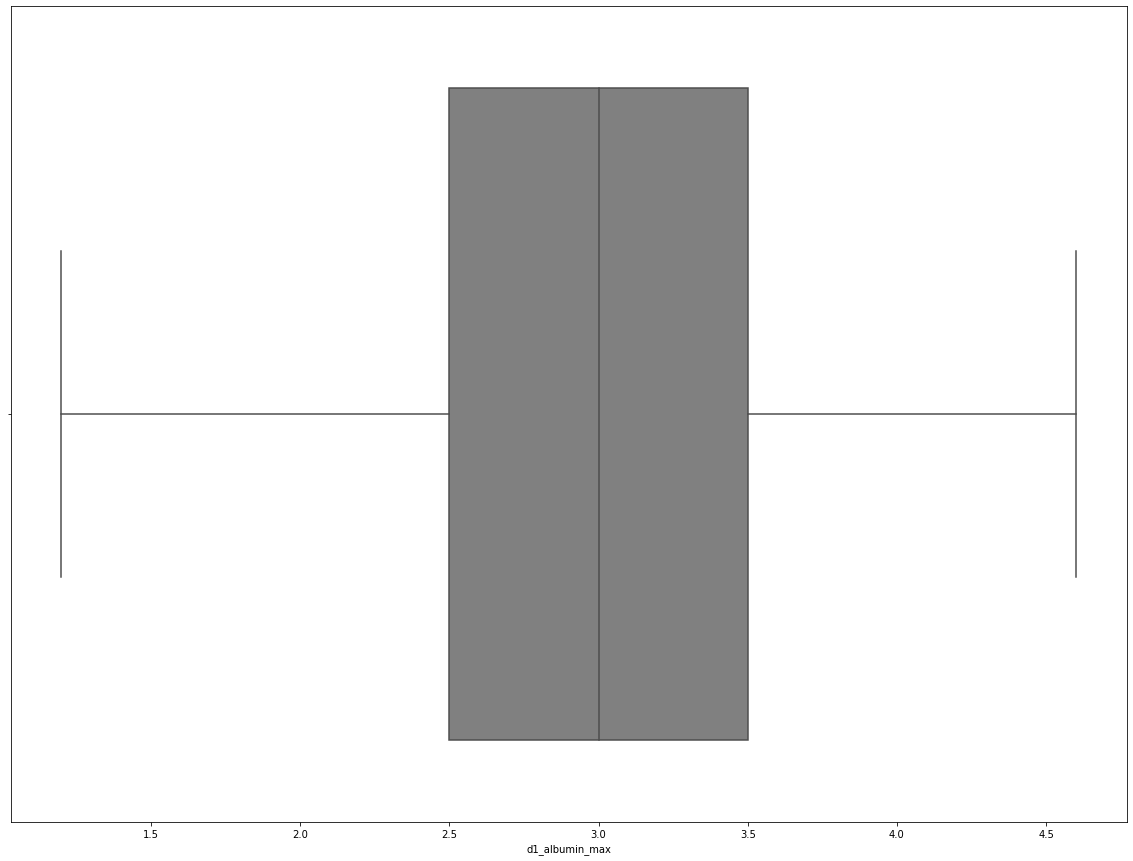

* d1_albumin_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


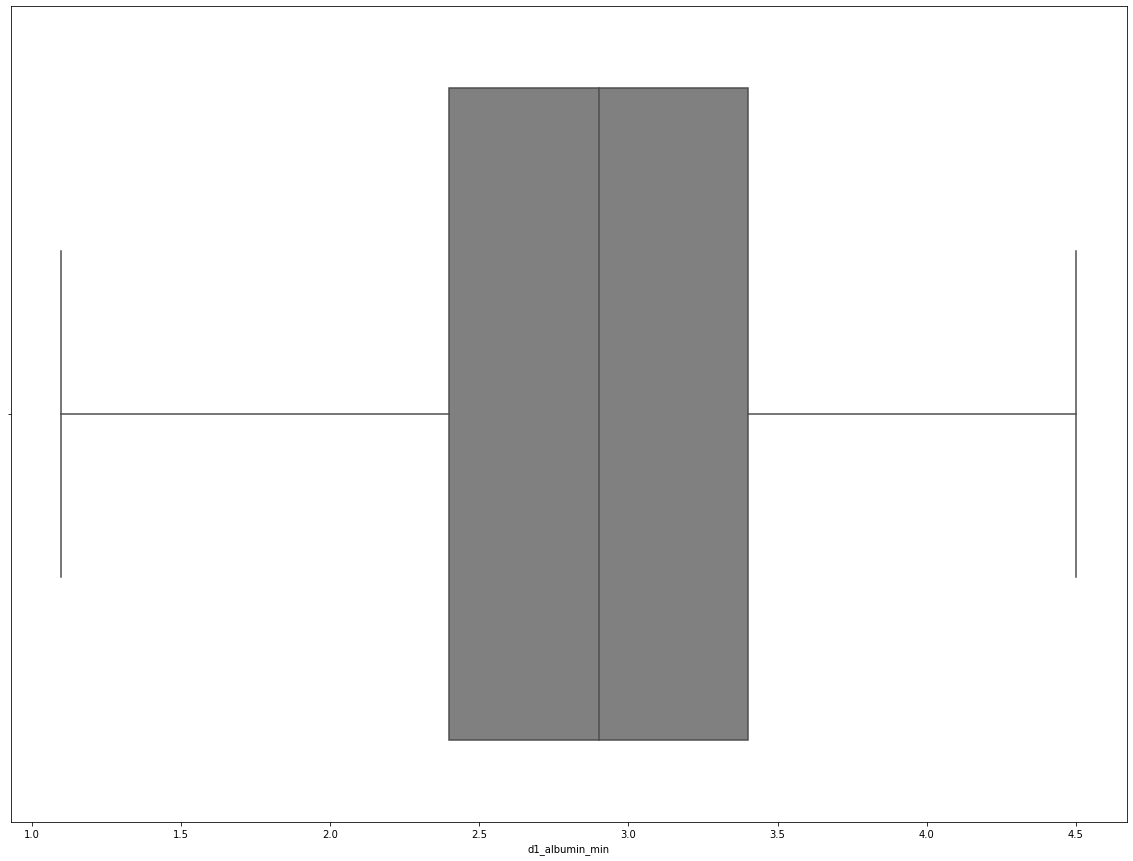

* d1_bilirubin_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


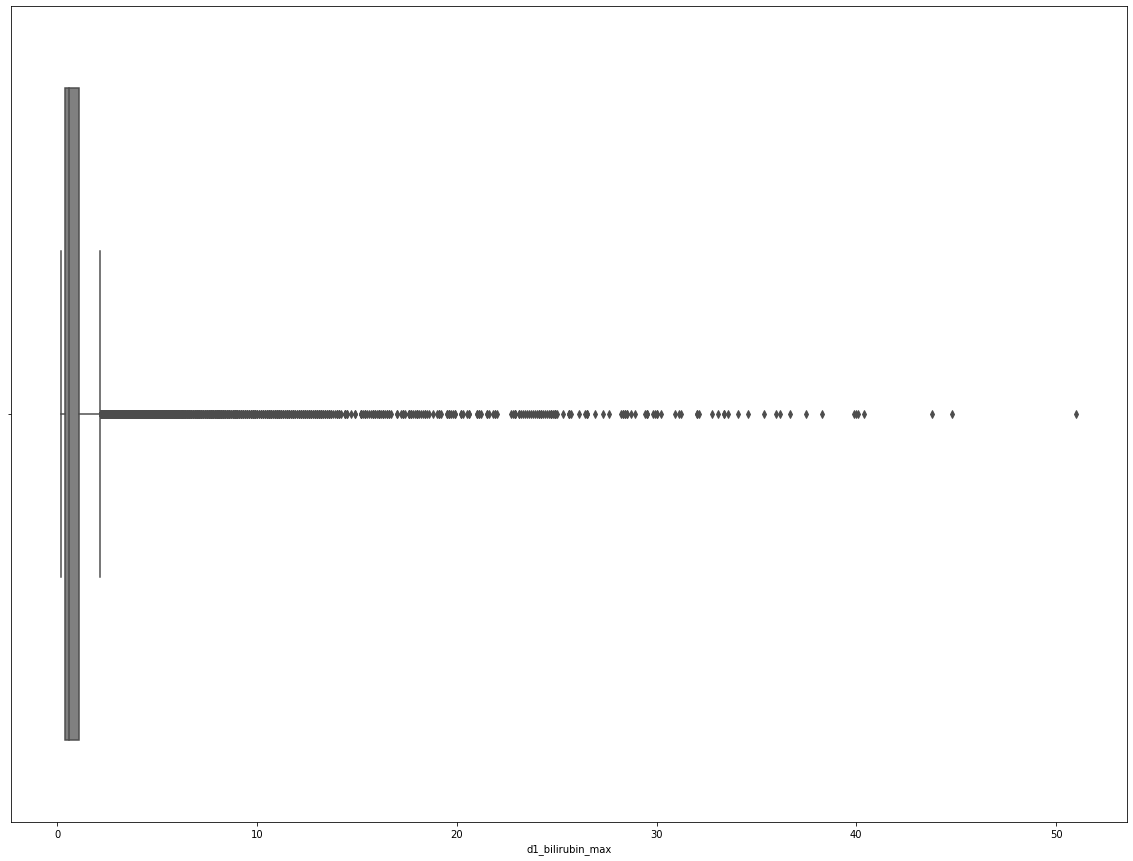

* d1_bilirubin_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


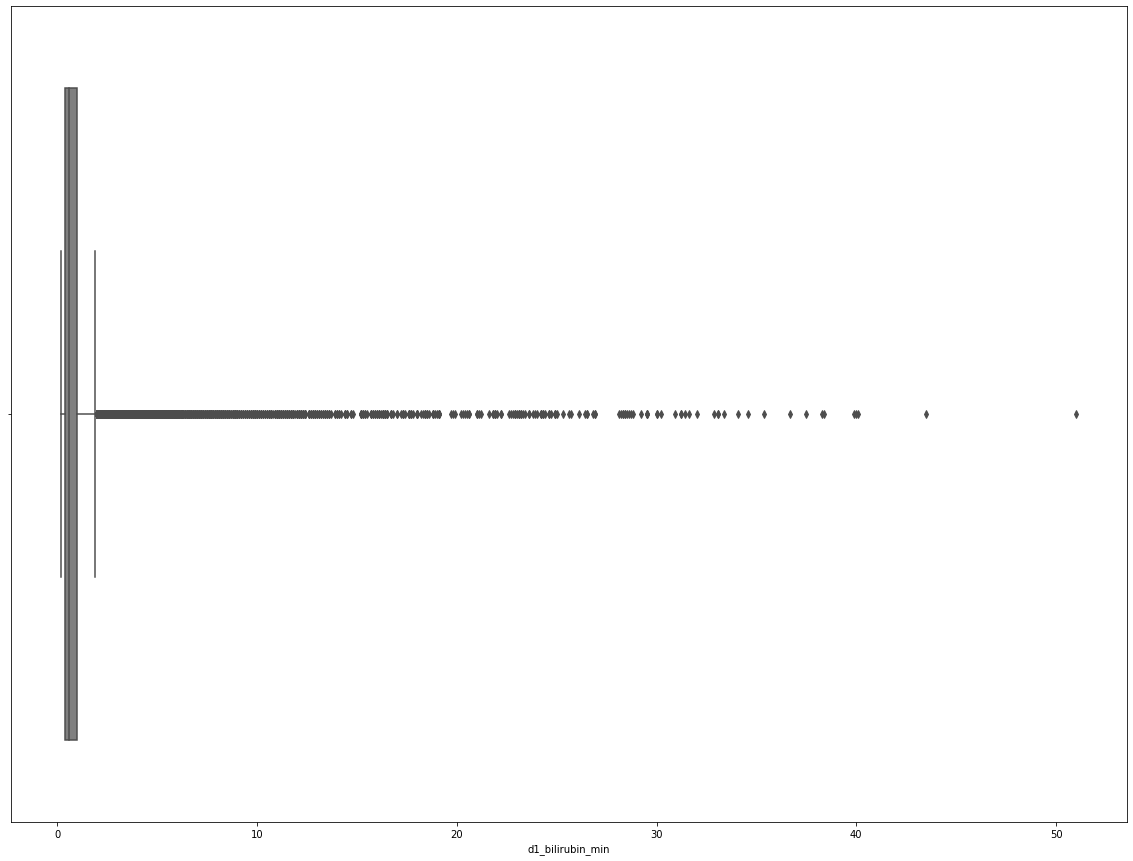

* d1_bun_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


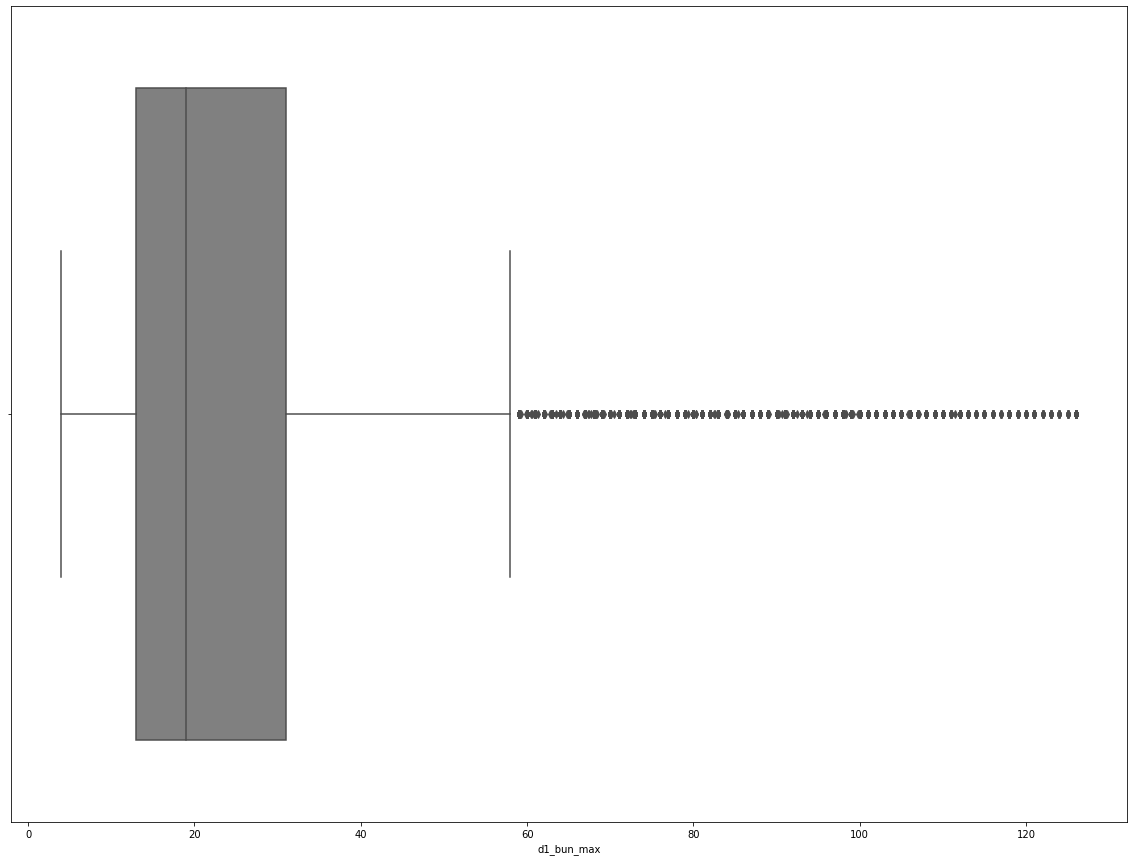

* d1_bun_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


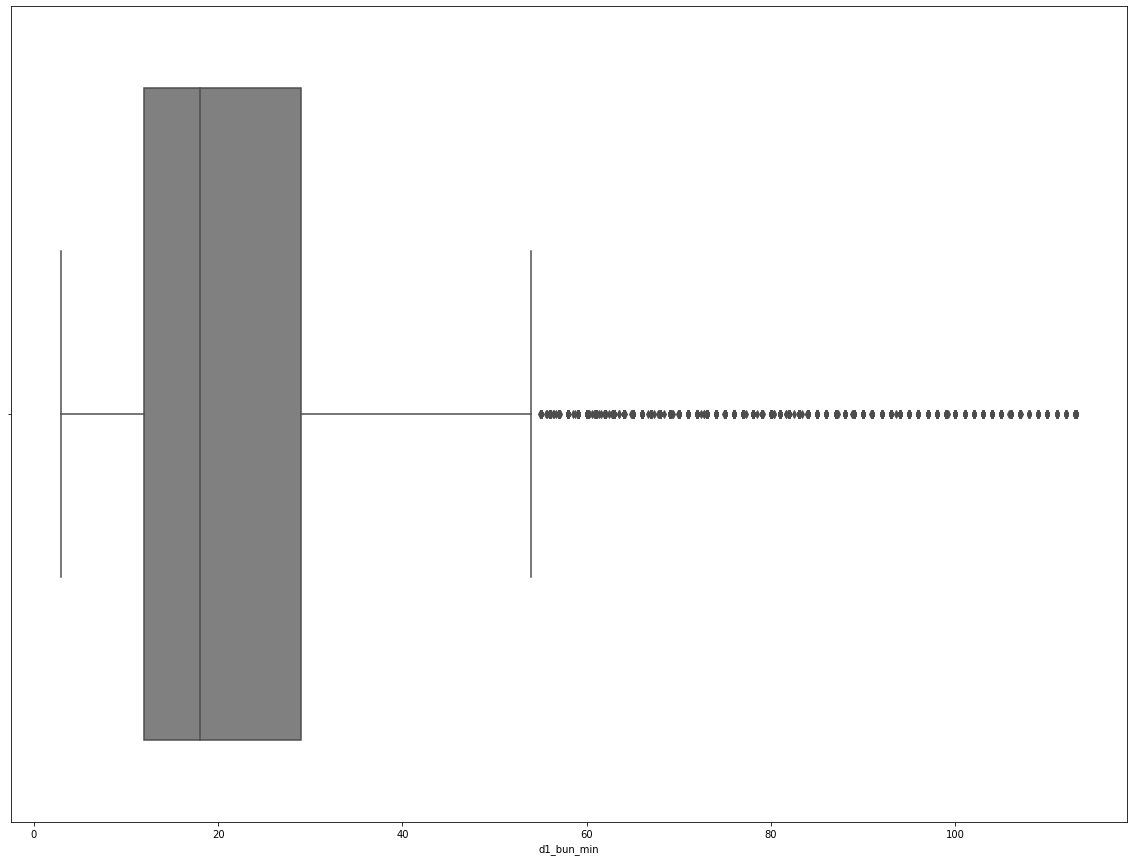

* d1_calcium_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


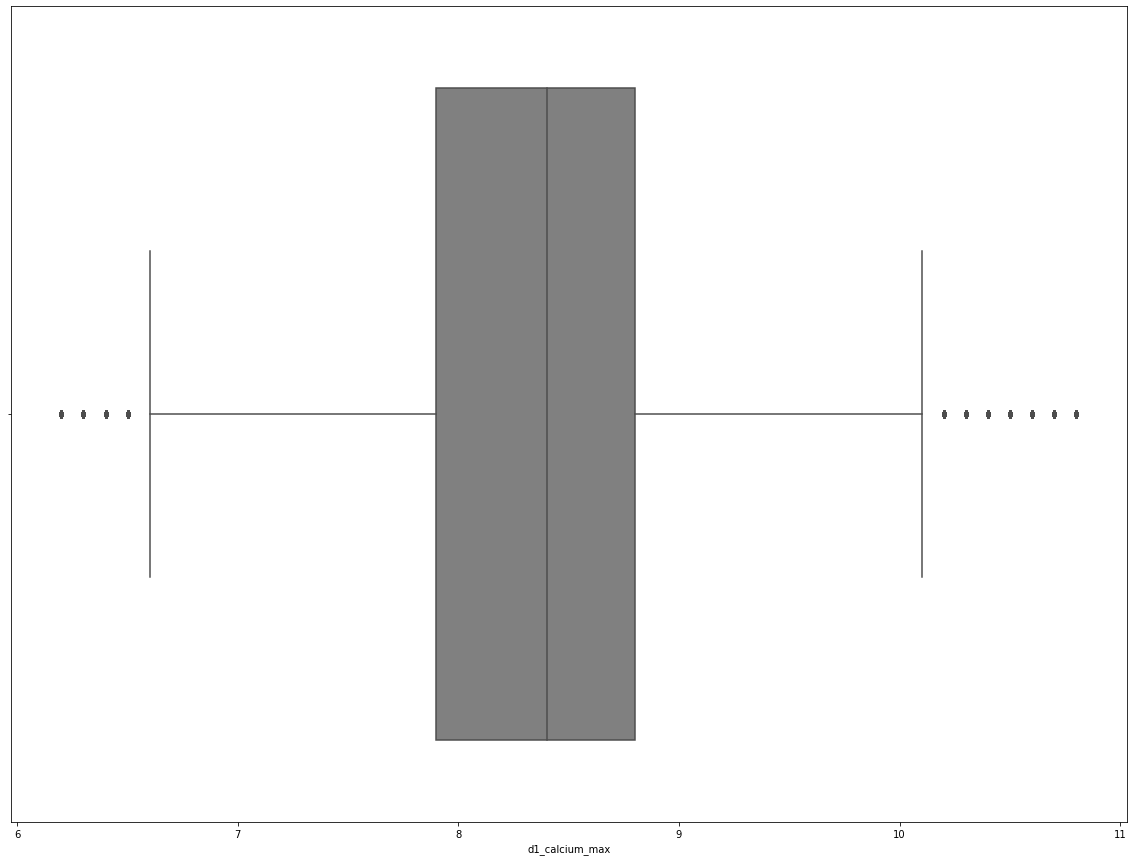

* d1_calcium_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


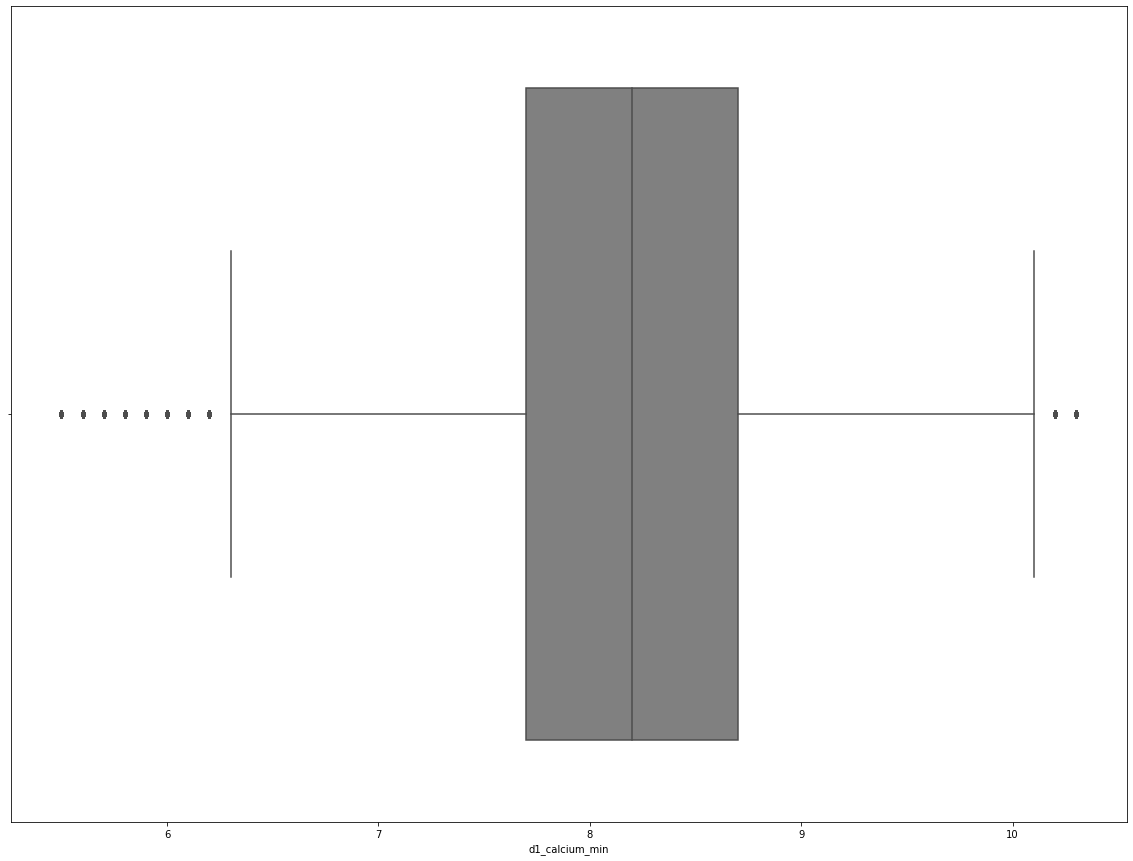

* d1_creatinine_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


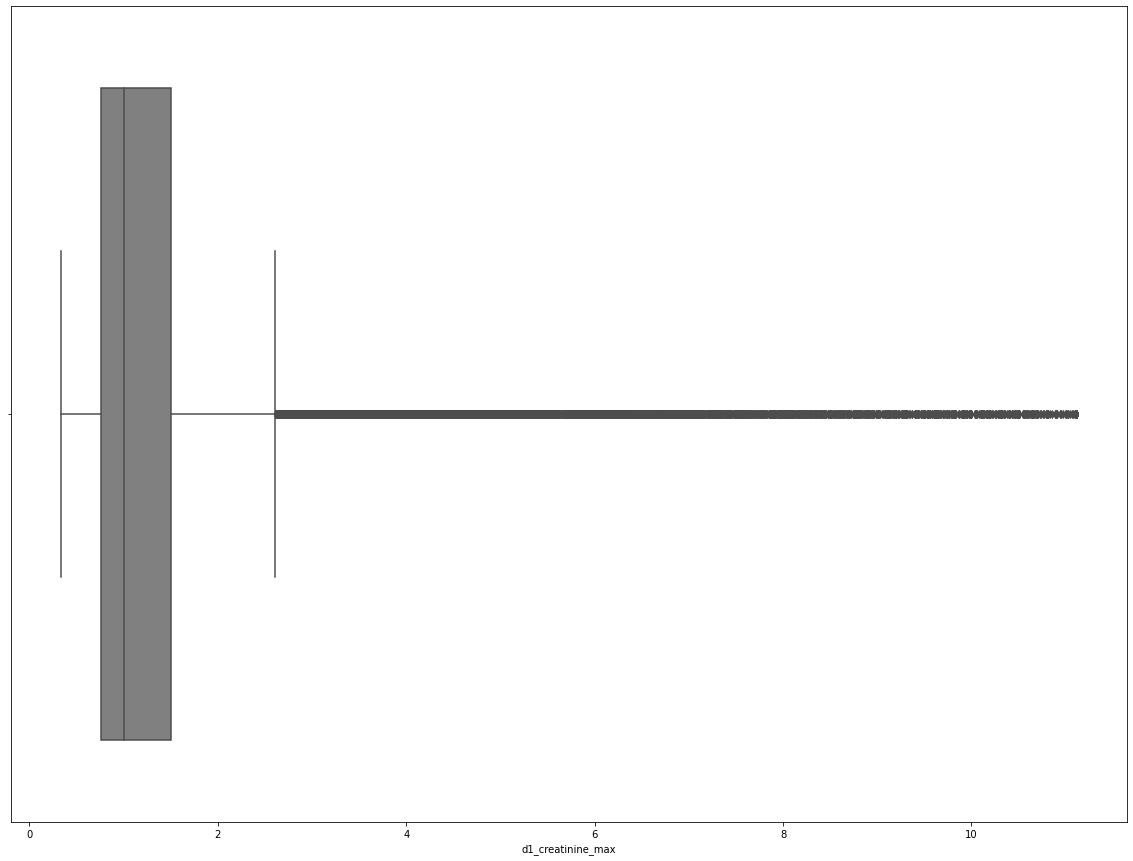

* d1_creatinine_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


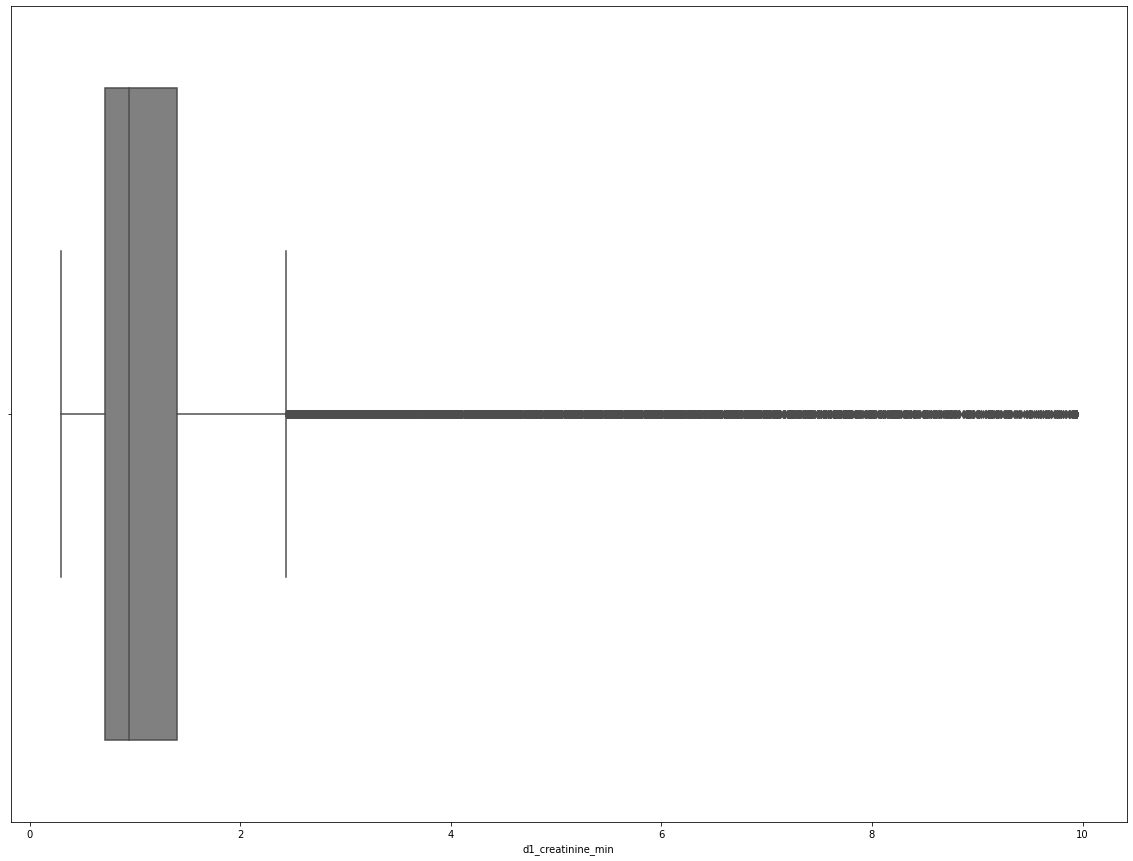

* d1_glucose_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


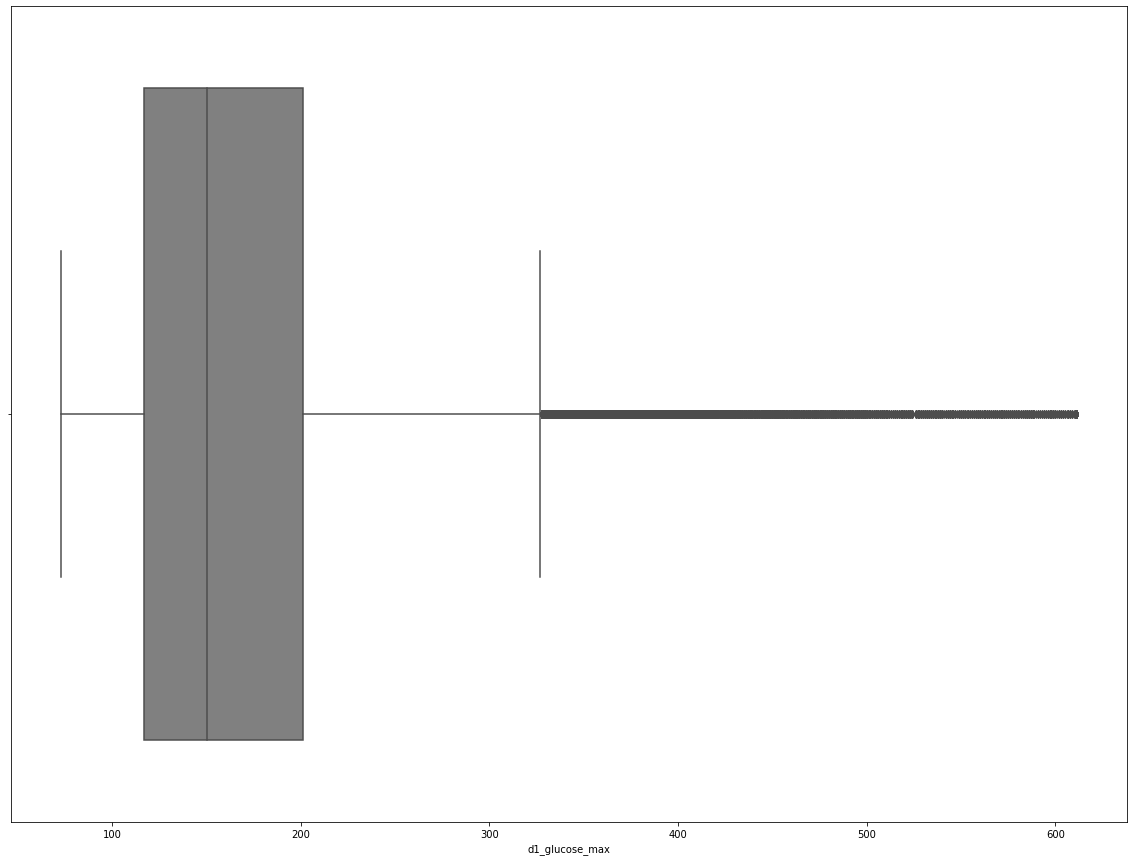

* d1_glucose_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_hco3_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


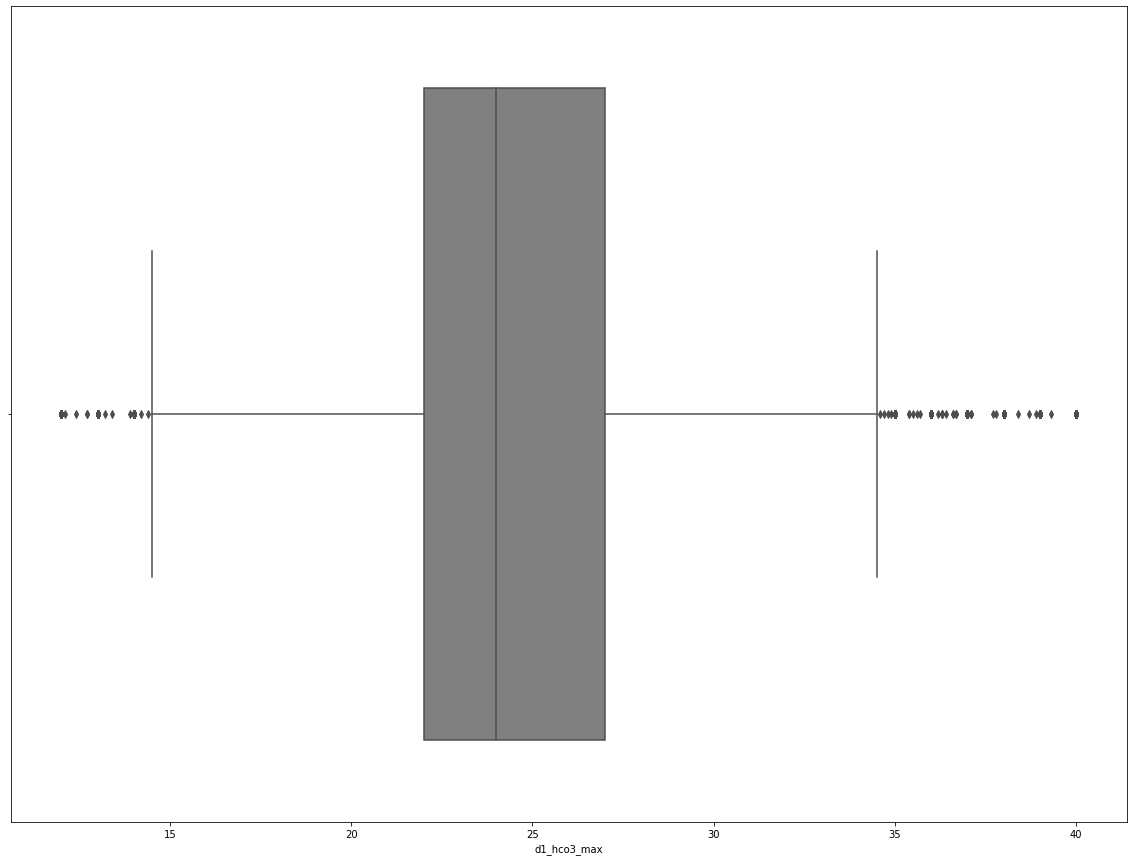

* d1_hco3_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_hemaglobin_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


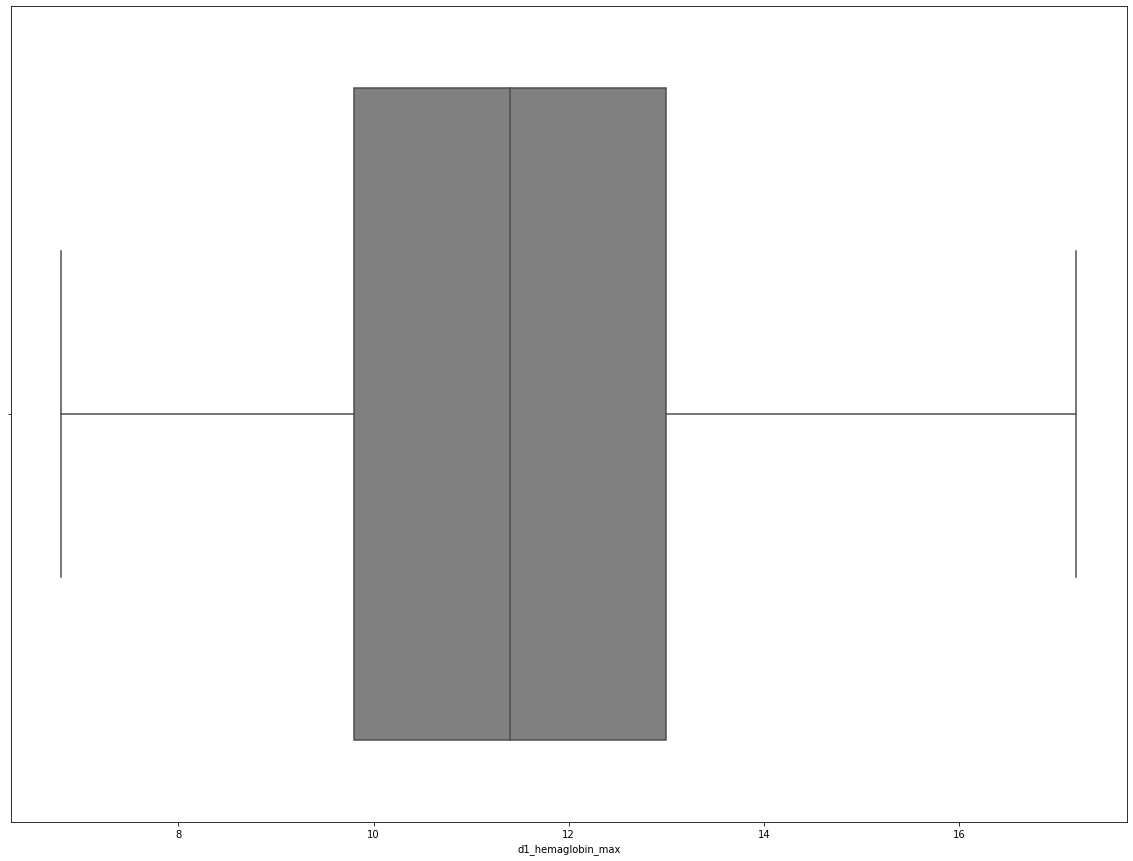

* d1_hemaglobin_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


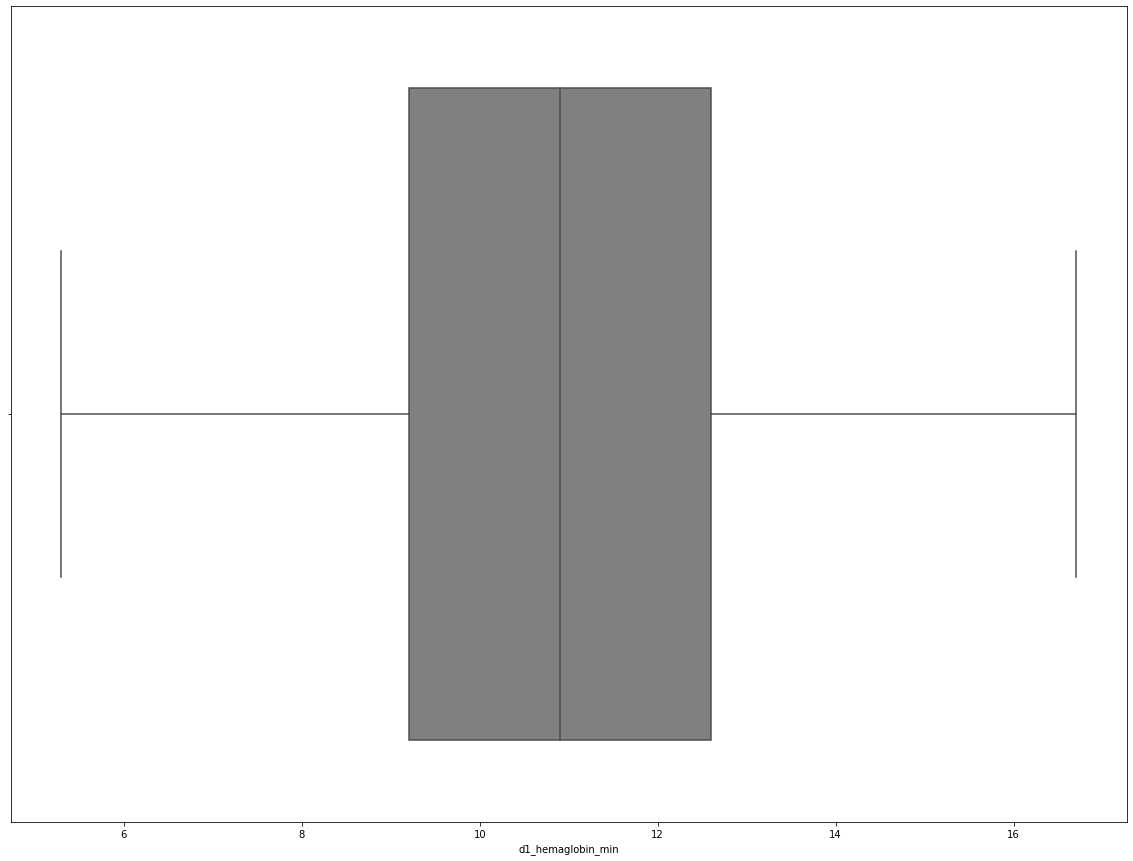

* d1_hematocrit_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


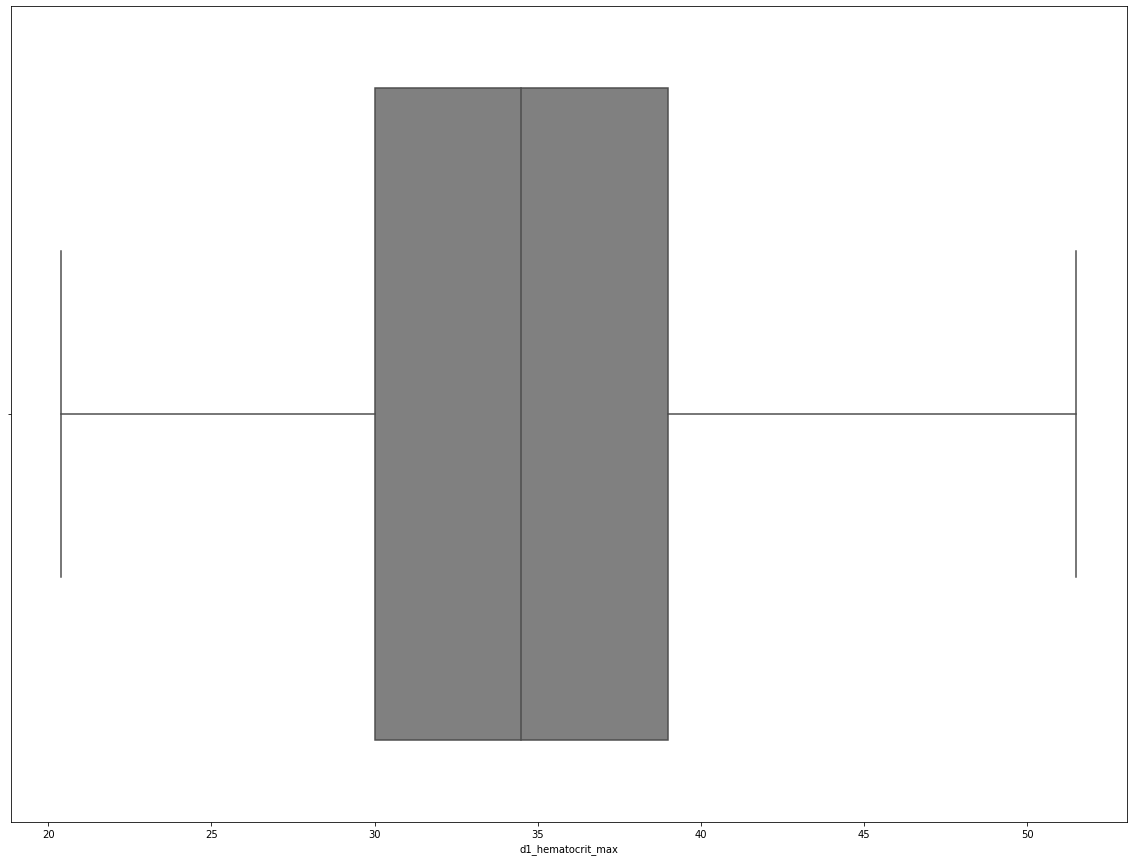

* d1_hematocrit_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


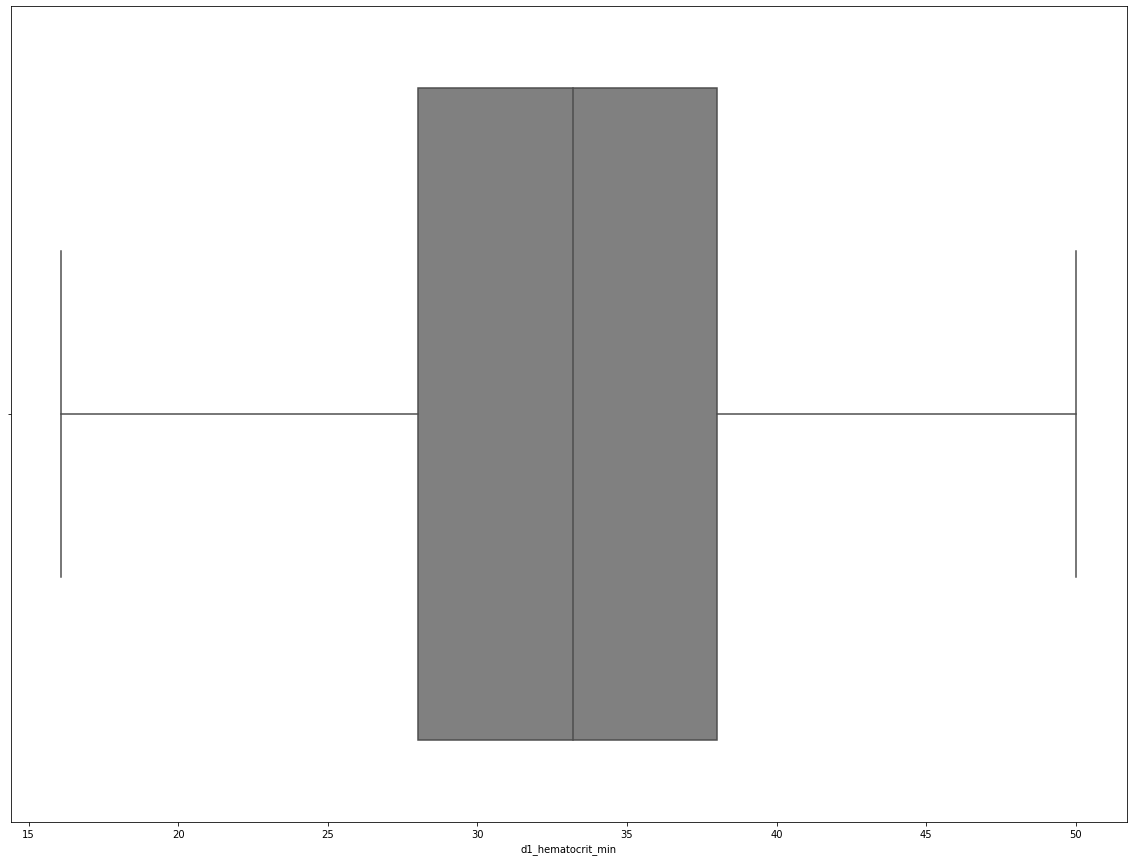

* d1_inr_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


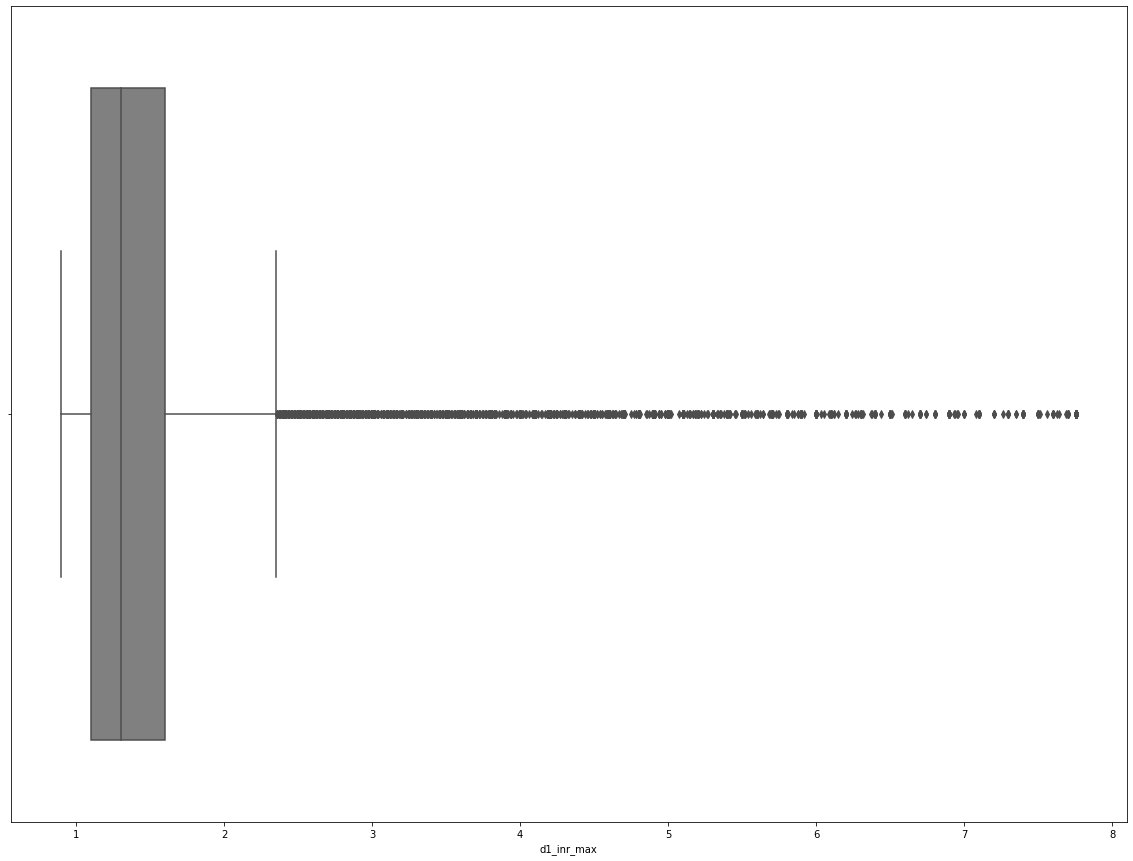

* d1_inr_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


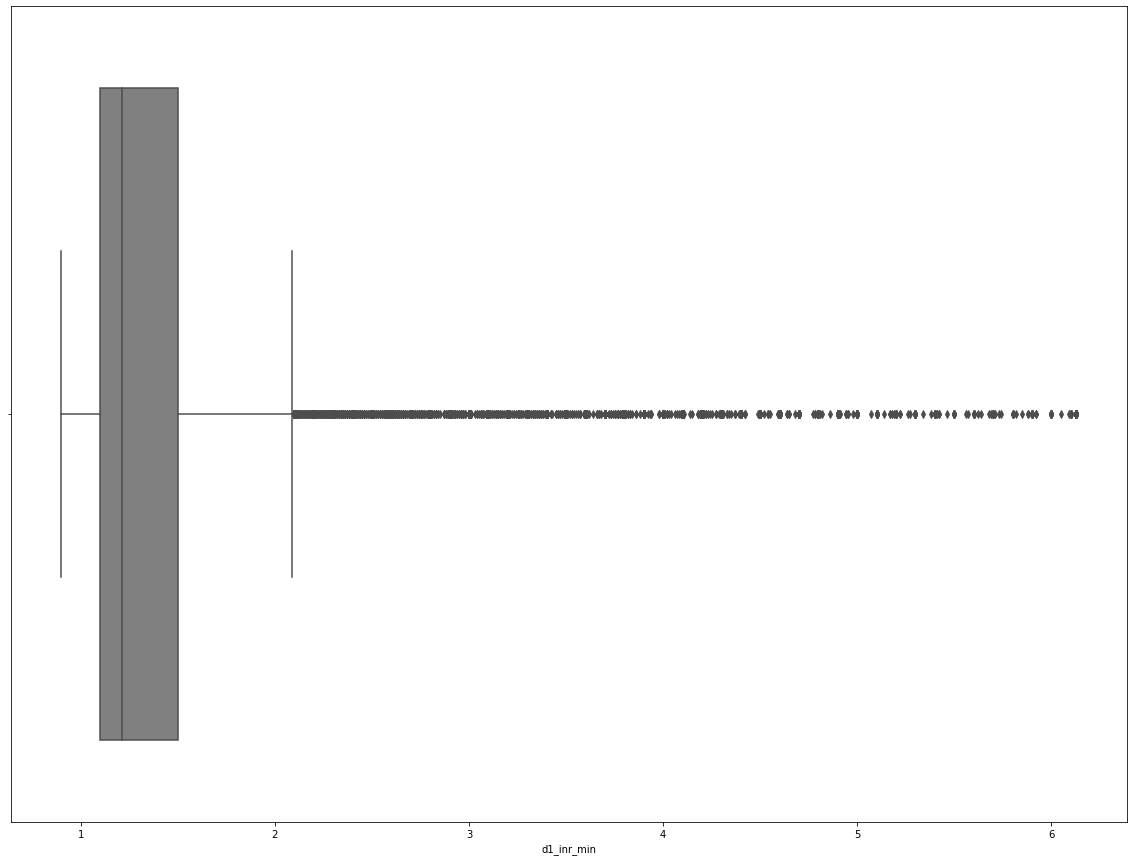

* d1_lactate_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_lactate_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


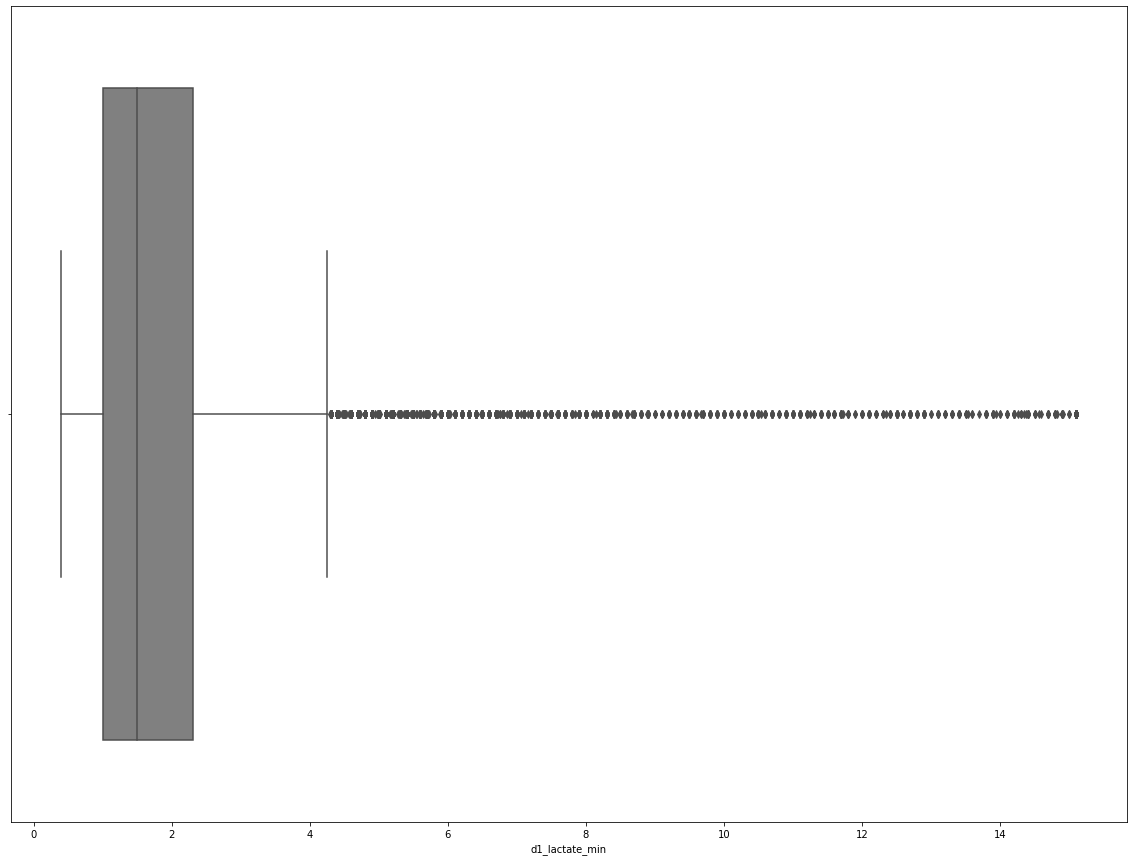

* d1_platelets_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


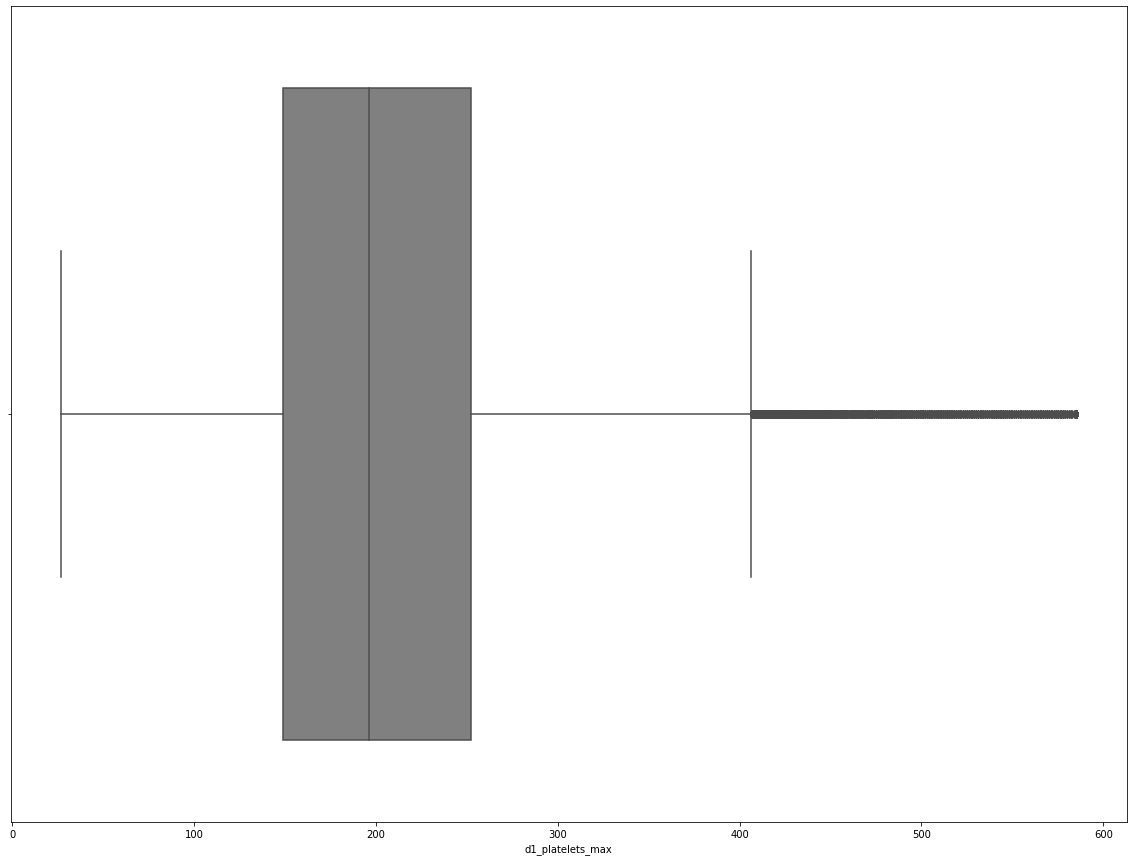

* d1_platelets_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_potassium_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


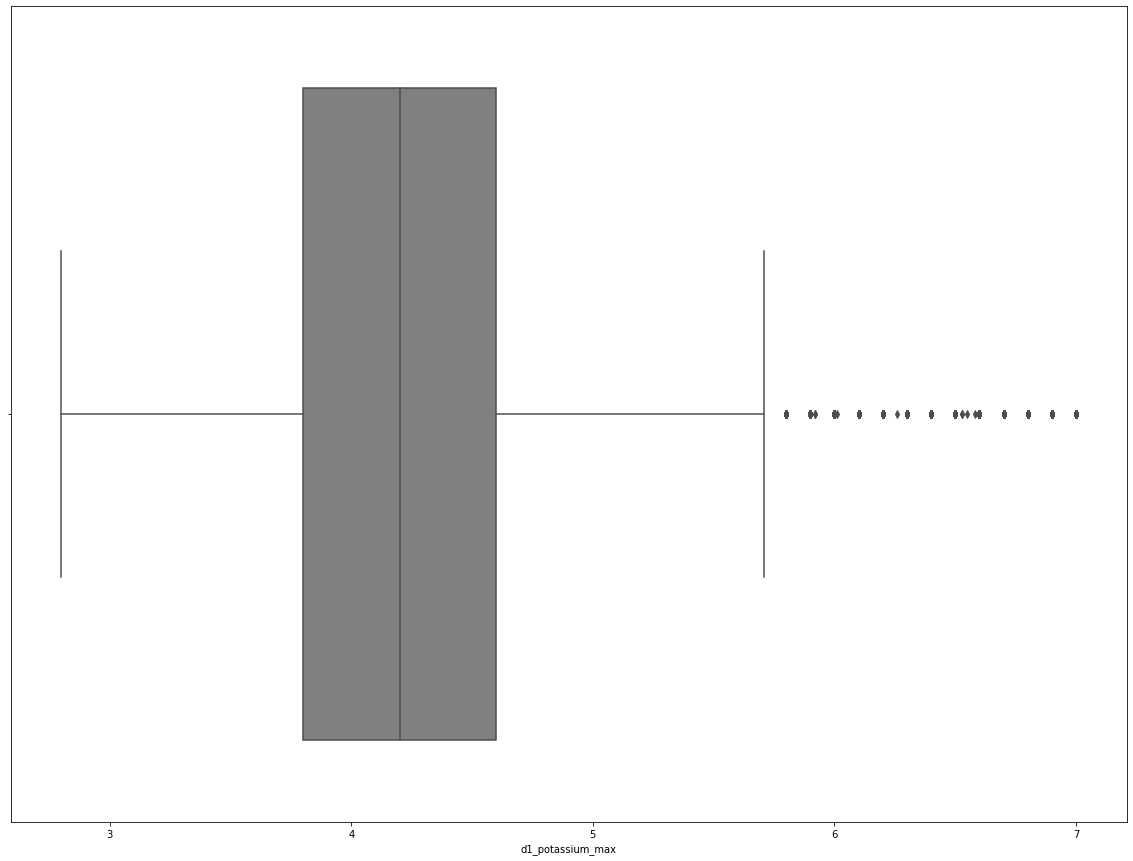

* d1_potassium_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


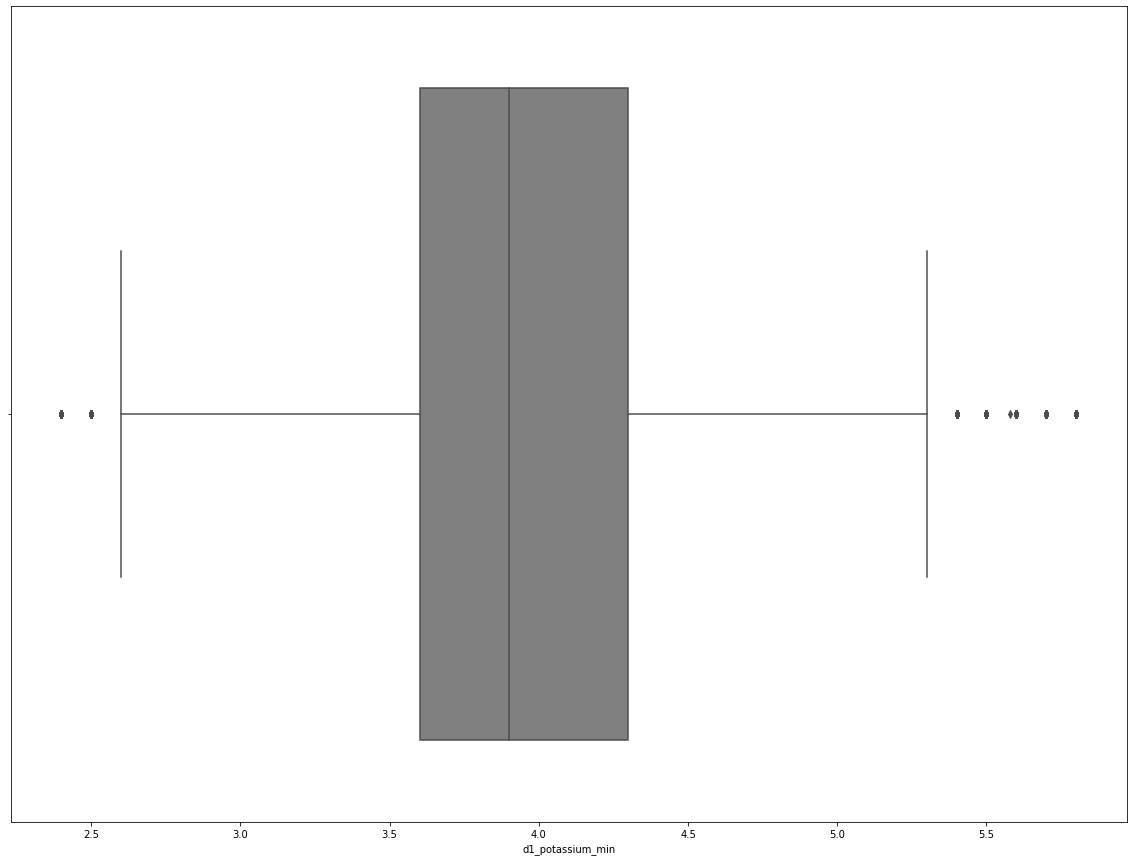

* d1_sodium_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


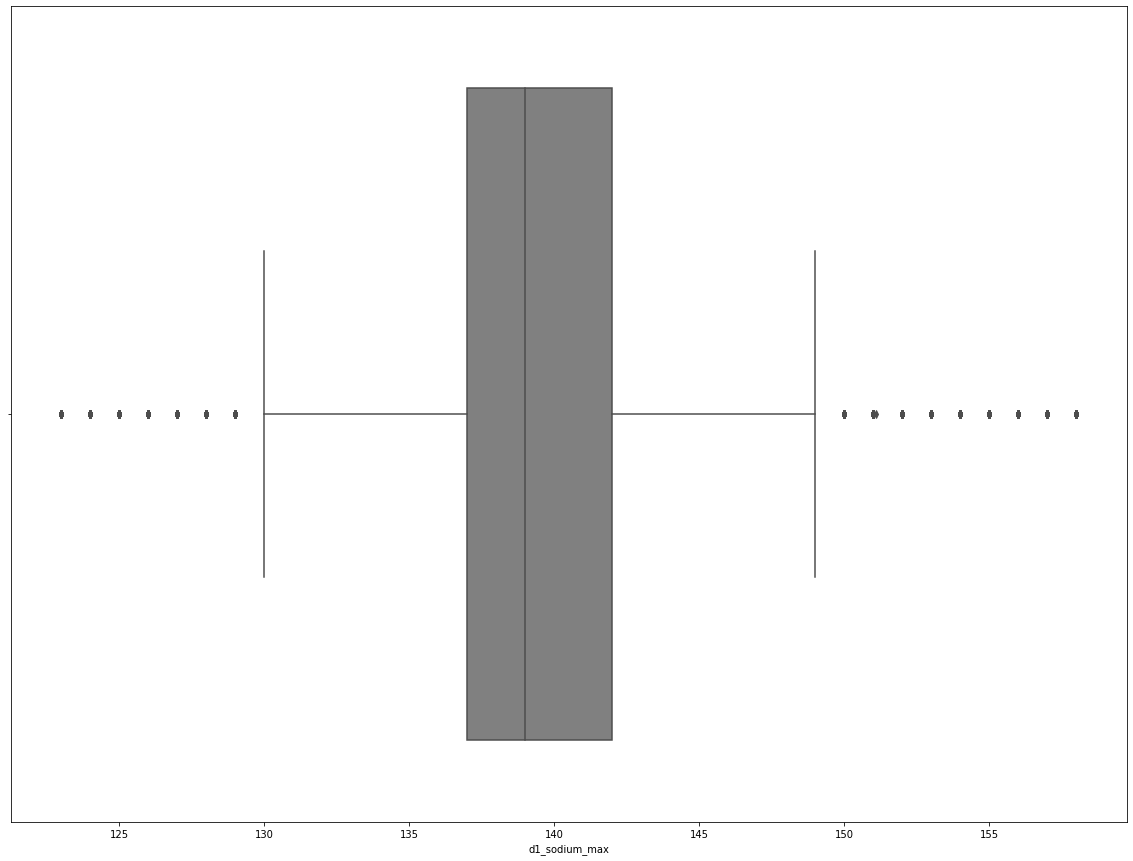

* d1_sodium_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


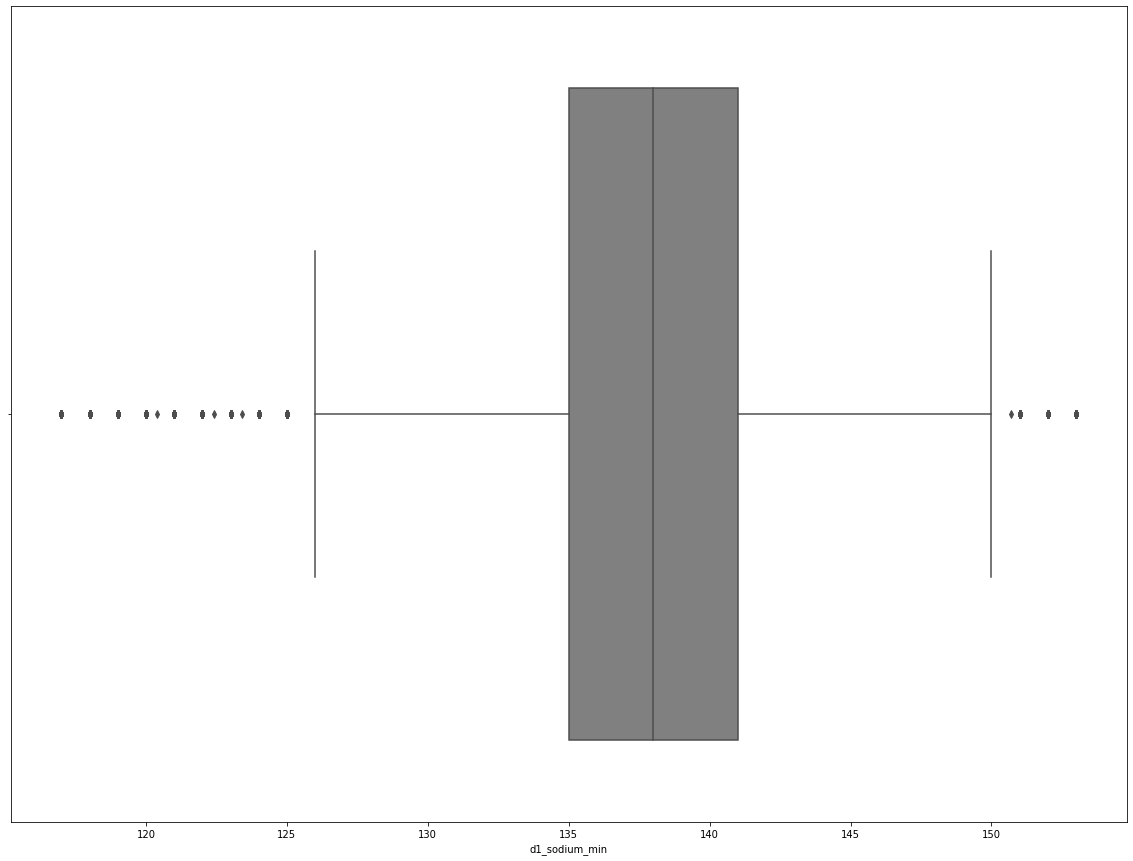

* d1_wbc_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


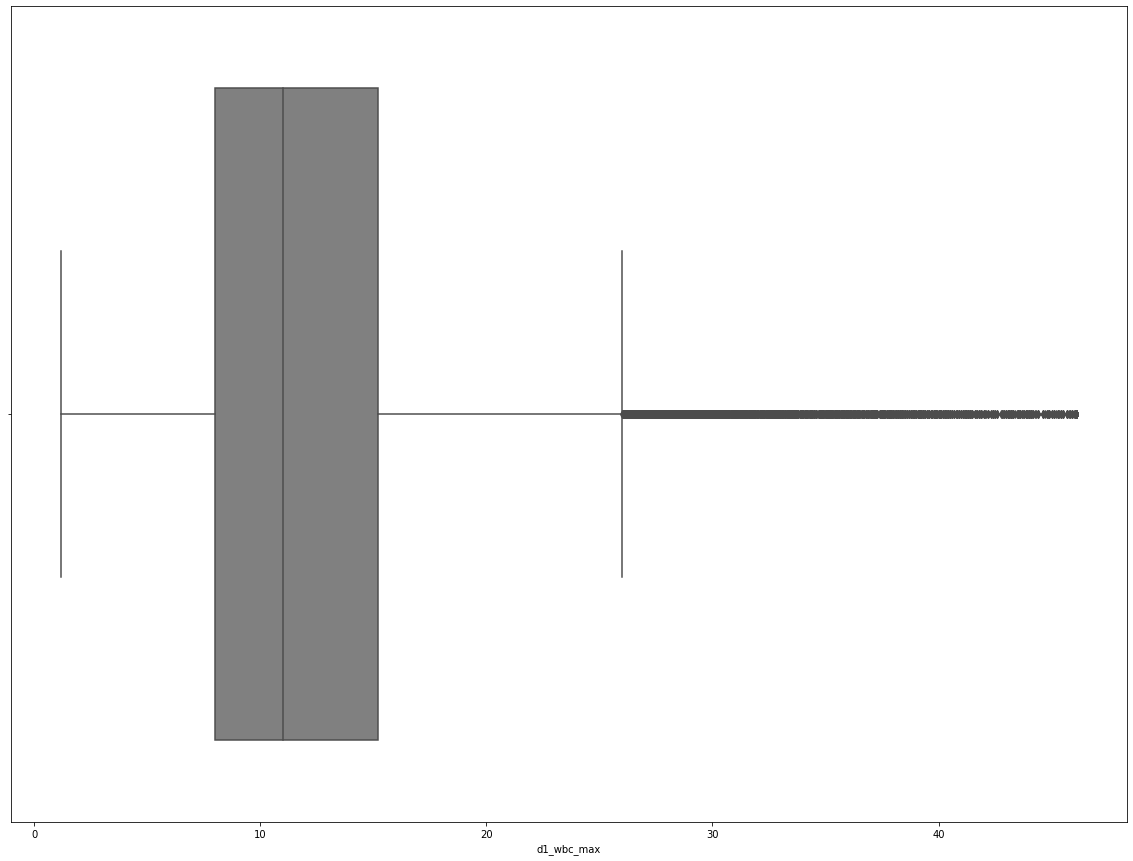

* d1_wbc_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


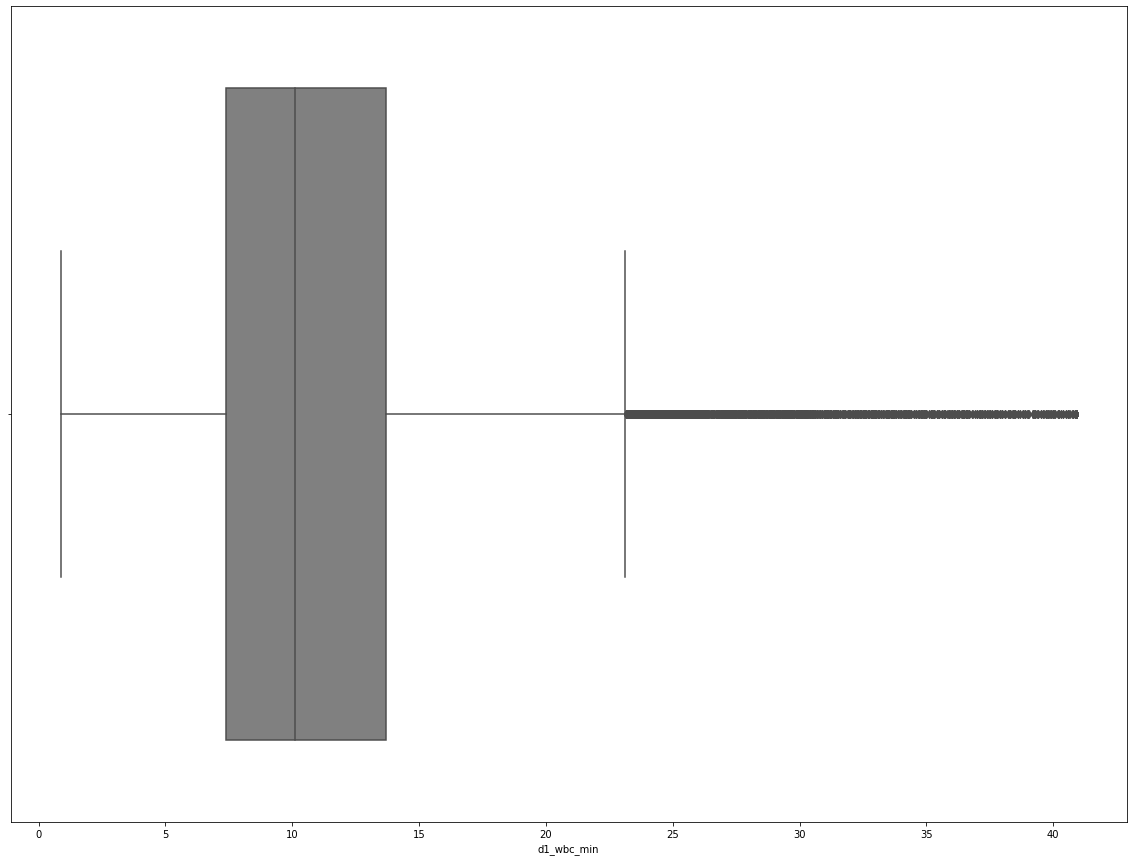

* h1_albumin_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


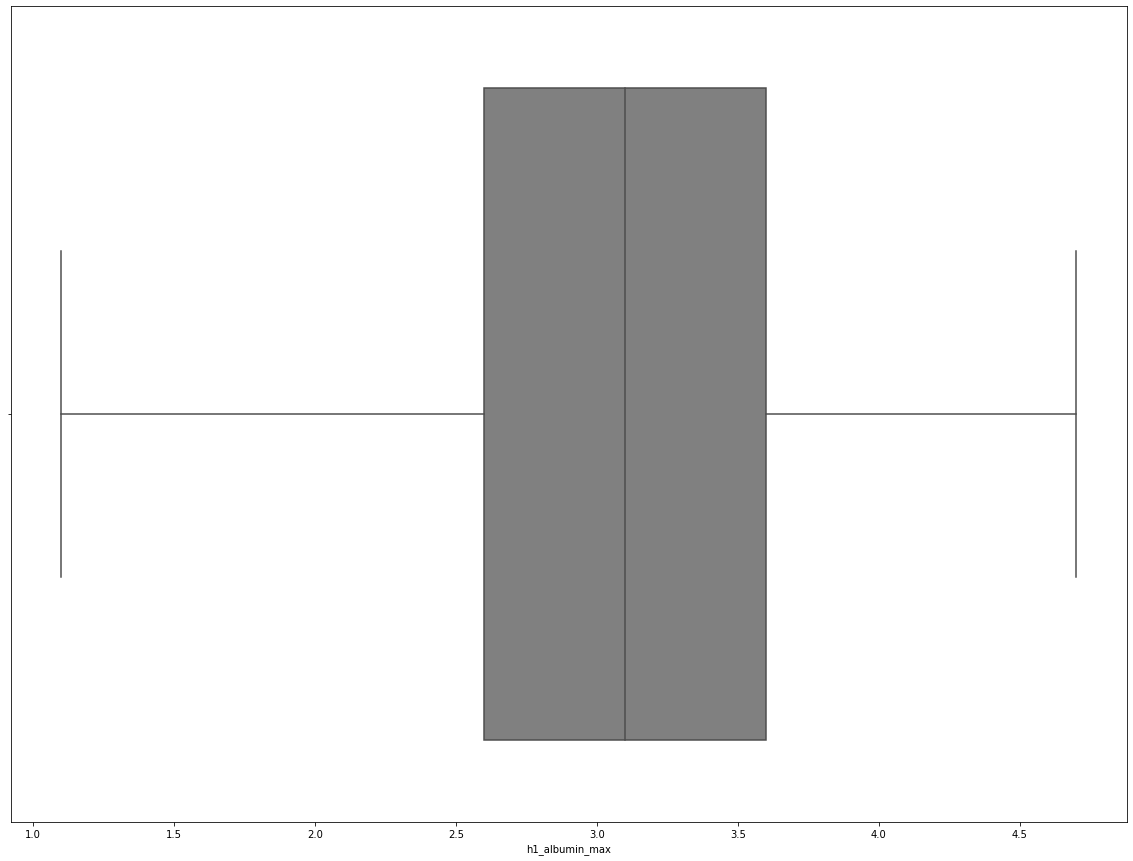

* h1_albumin_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_bilirubin_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_bilirubin_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


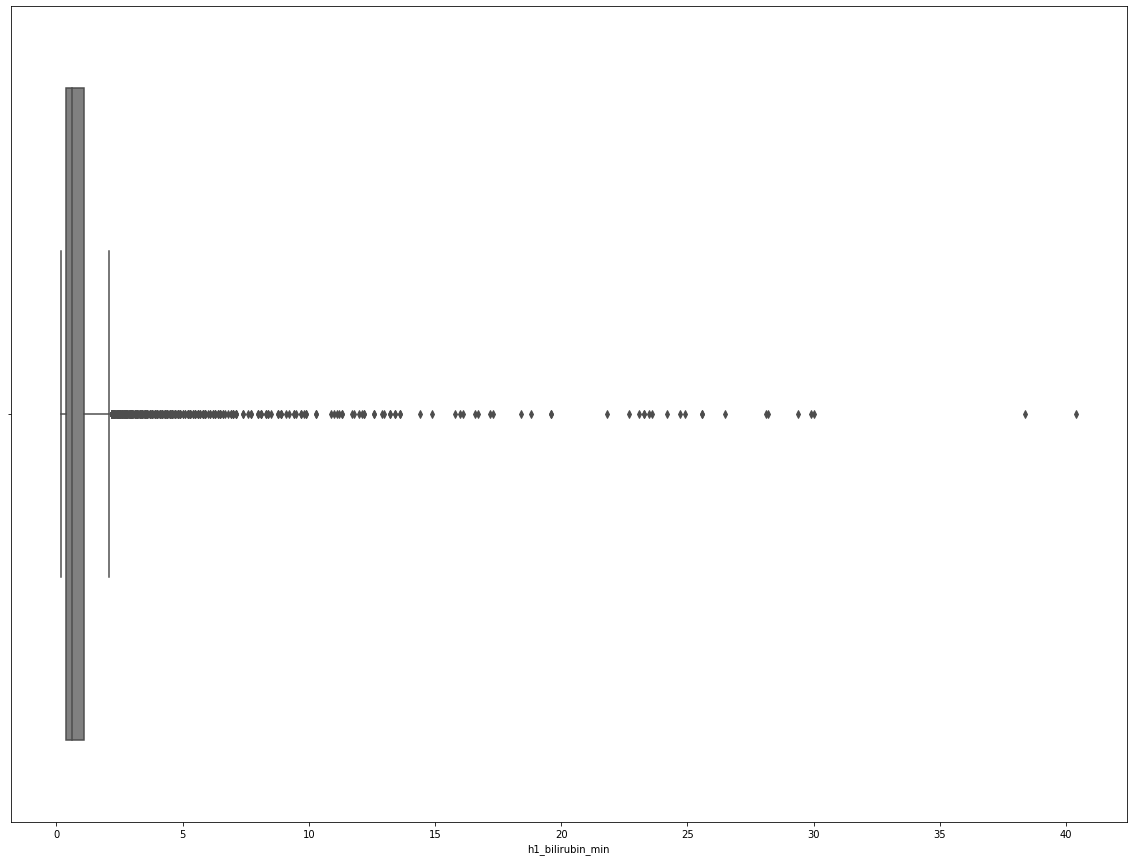

* h1_bun_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


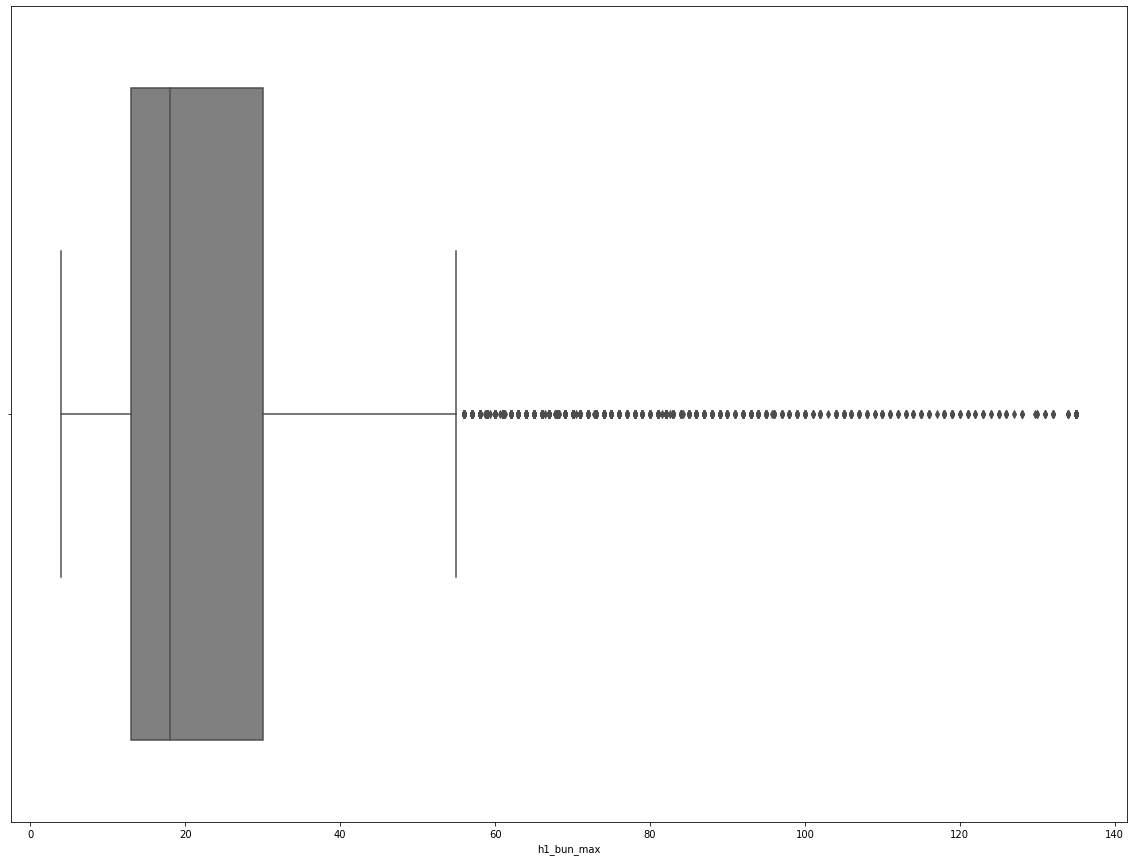

* h1_bun_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_calcium_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


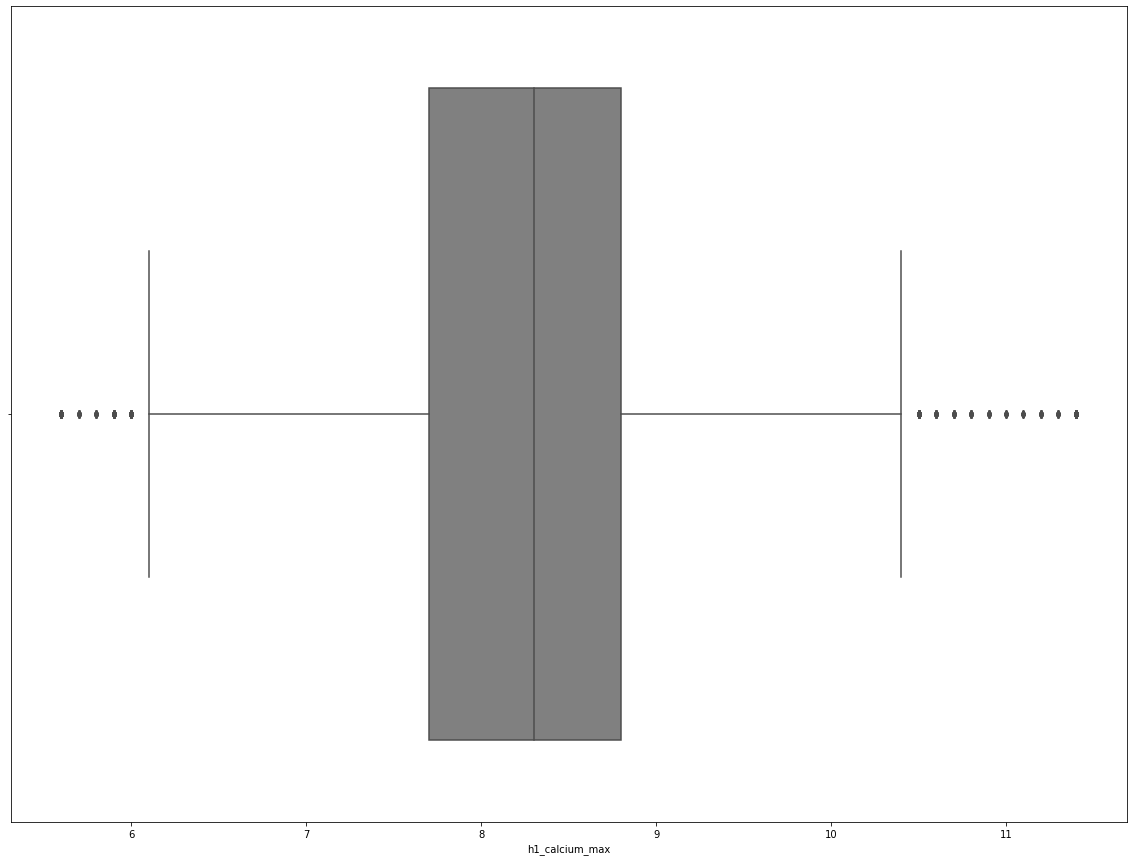

* h1_calcium_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_creatinine_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


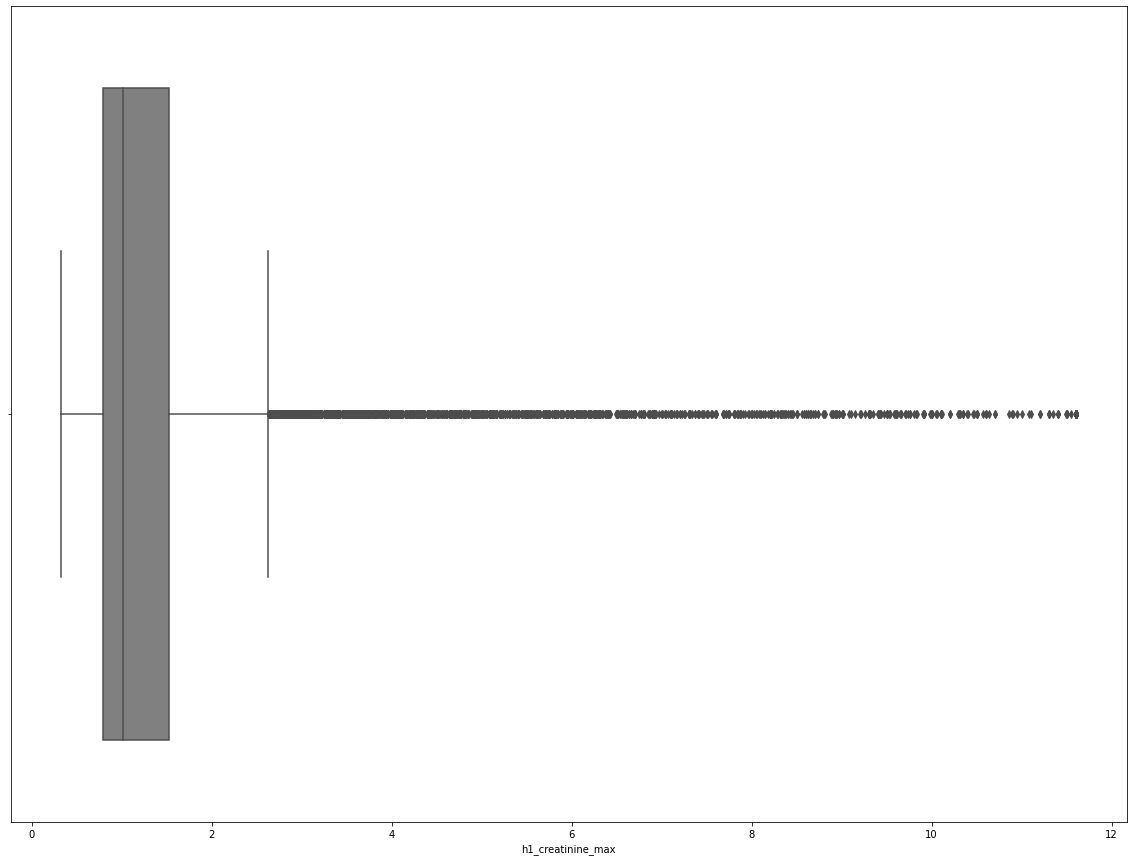

* h1_creatinine_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


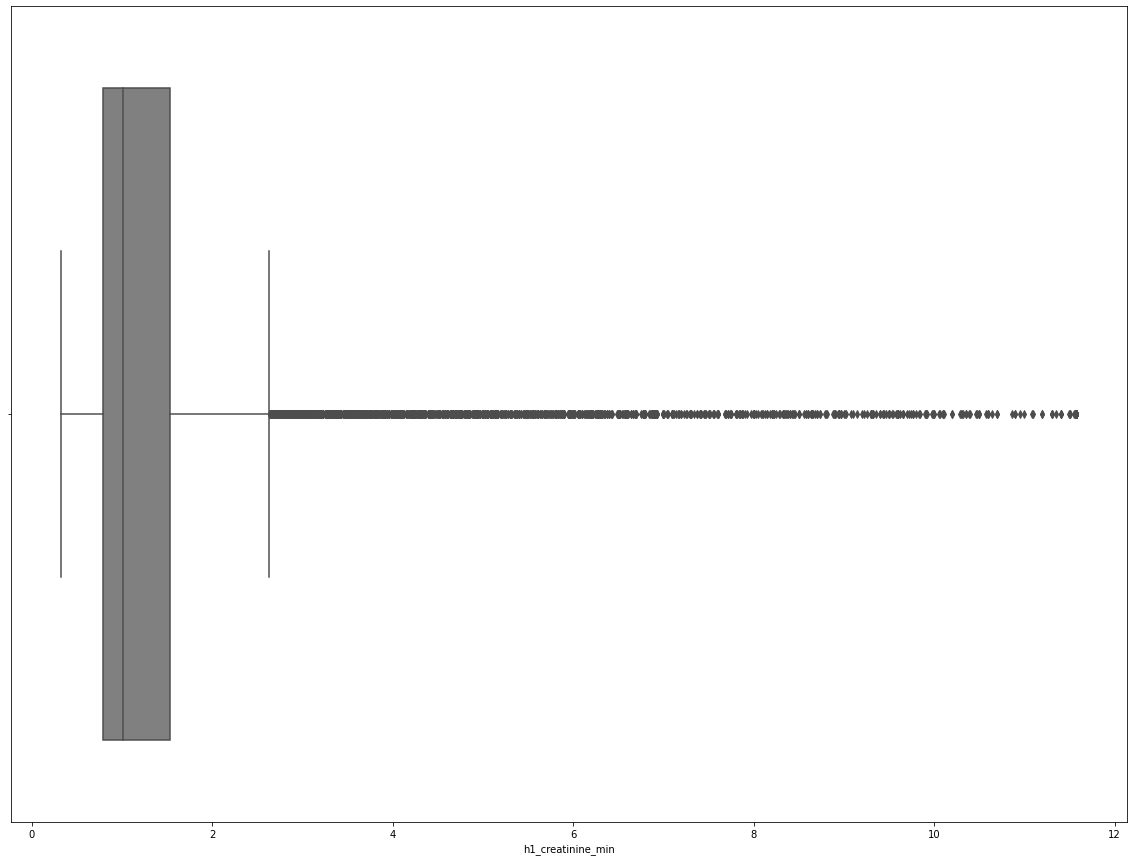

* h1_glucose_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


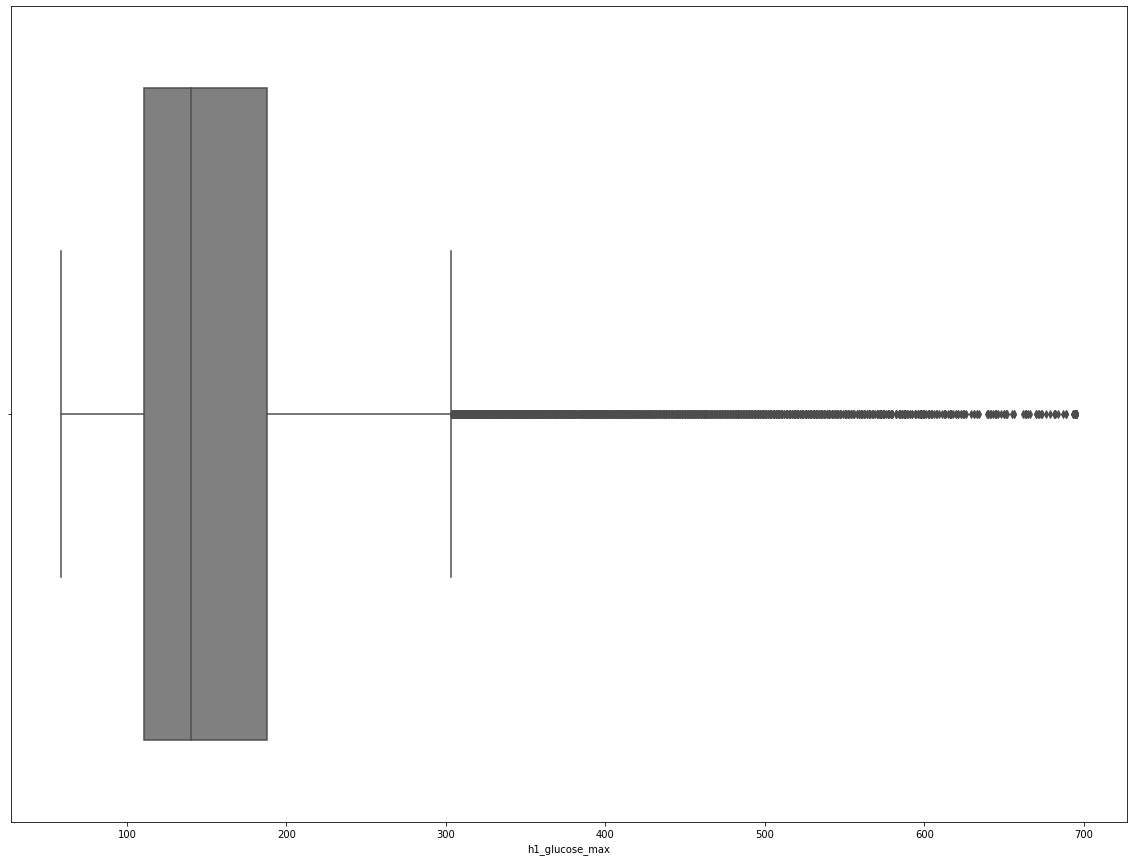

* h1_glucose_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


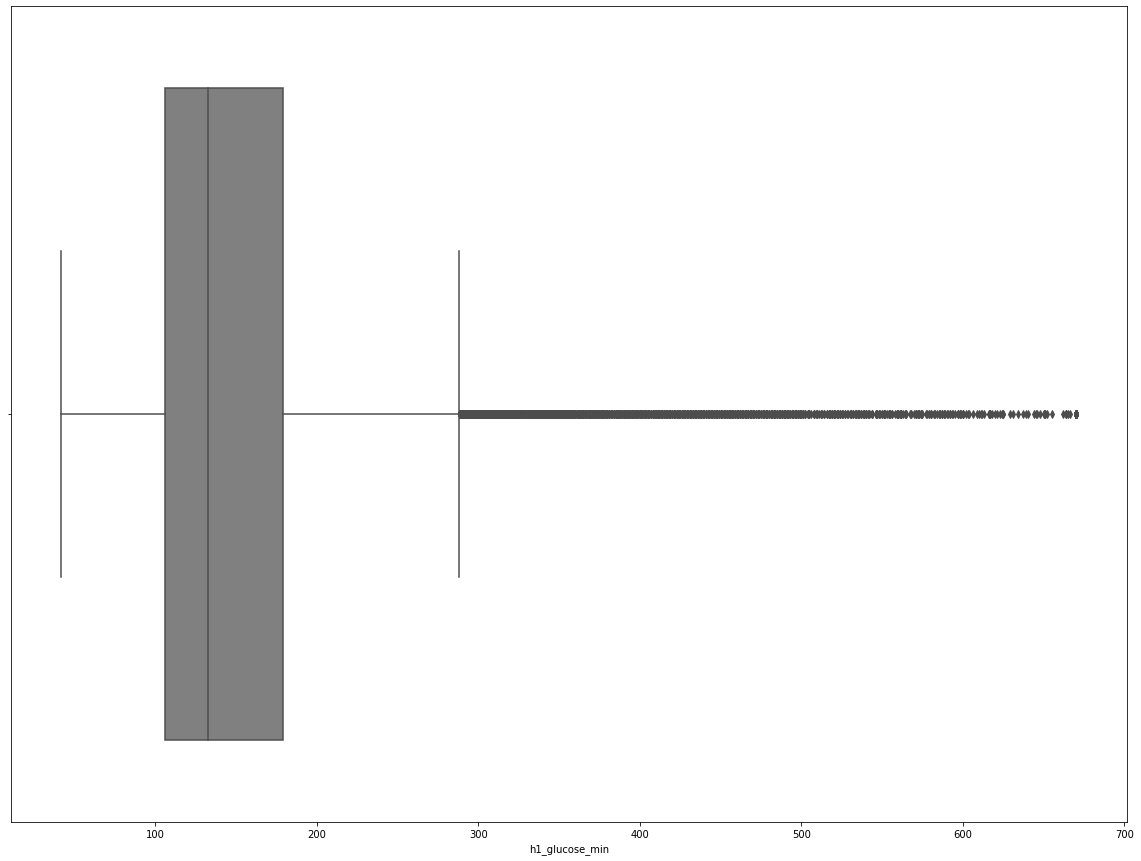

* h1_hco3_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


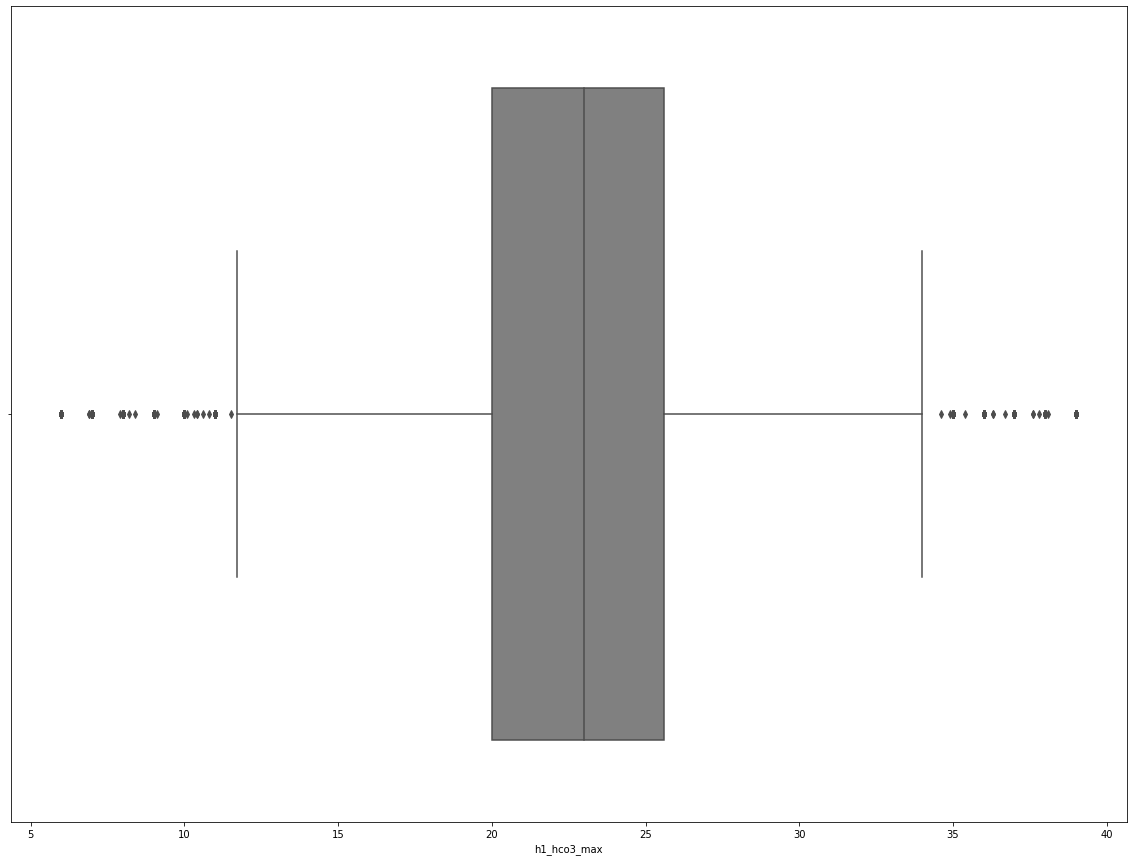

* h1_hco3_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


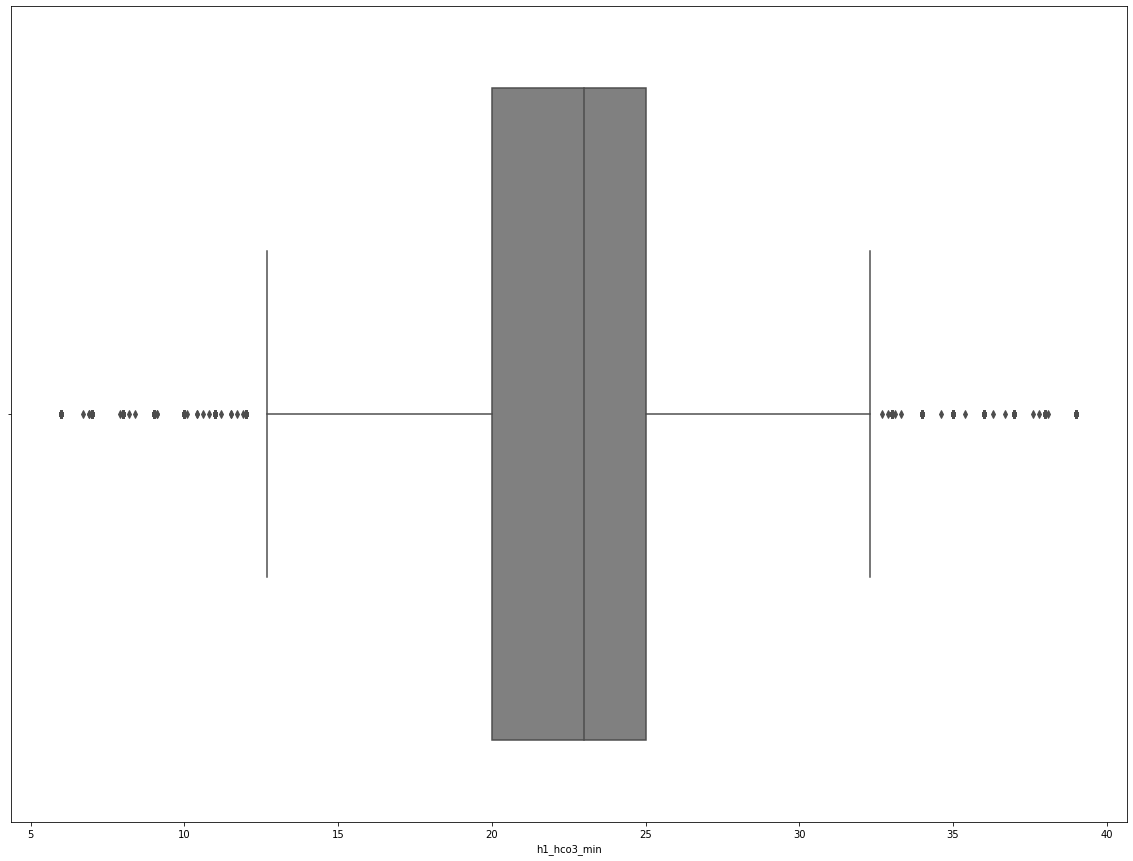

* h1_hemaglobin_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_hemaglobin_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


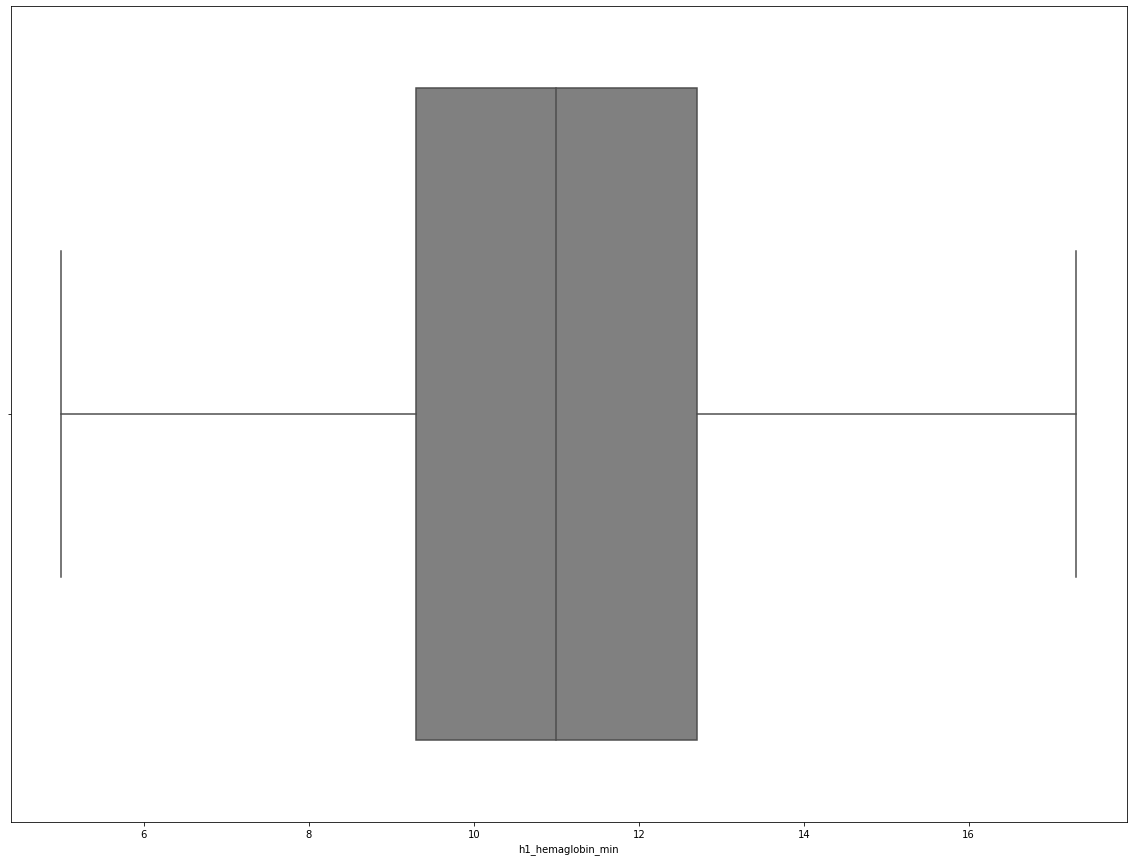

* h1_hematocrit_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_hematocrit_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_inr_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


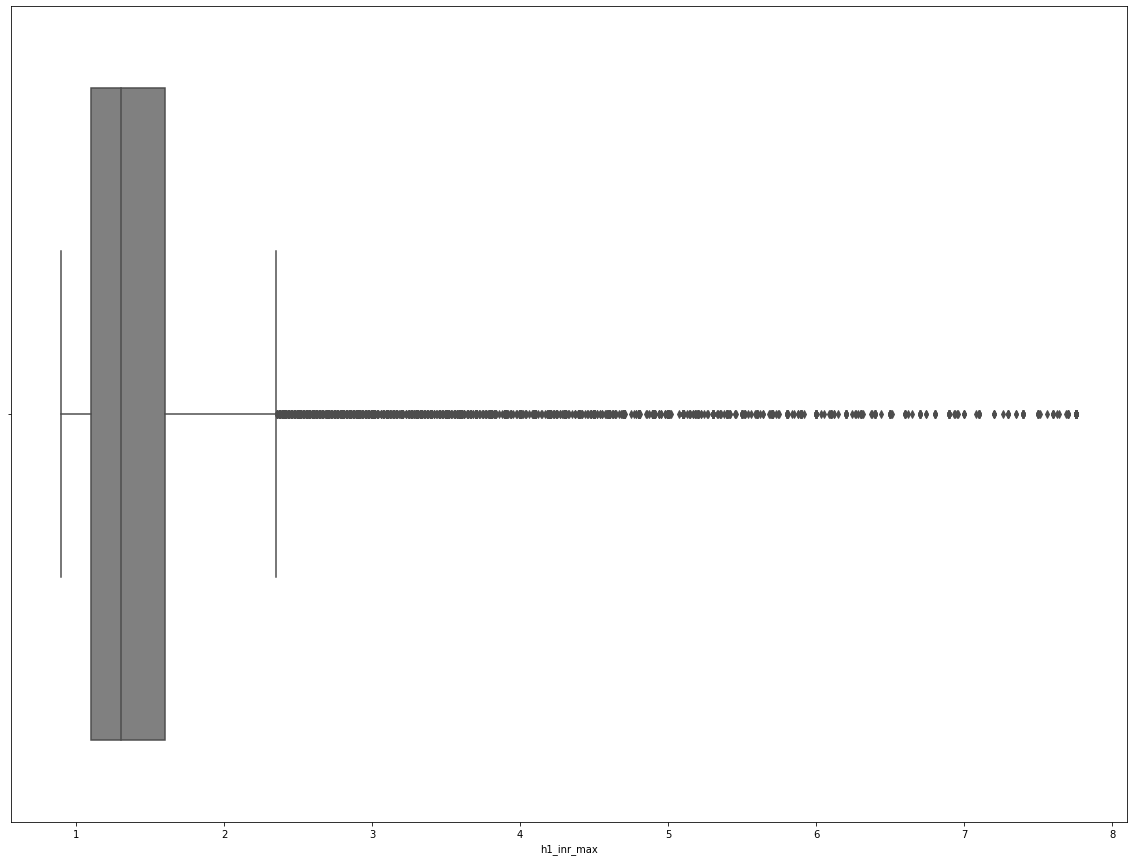

* h1_inr_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_lactate_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


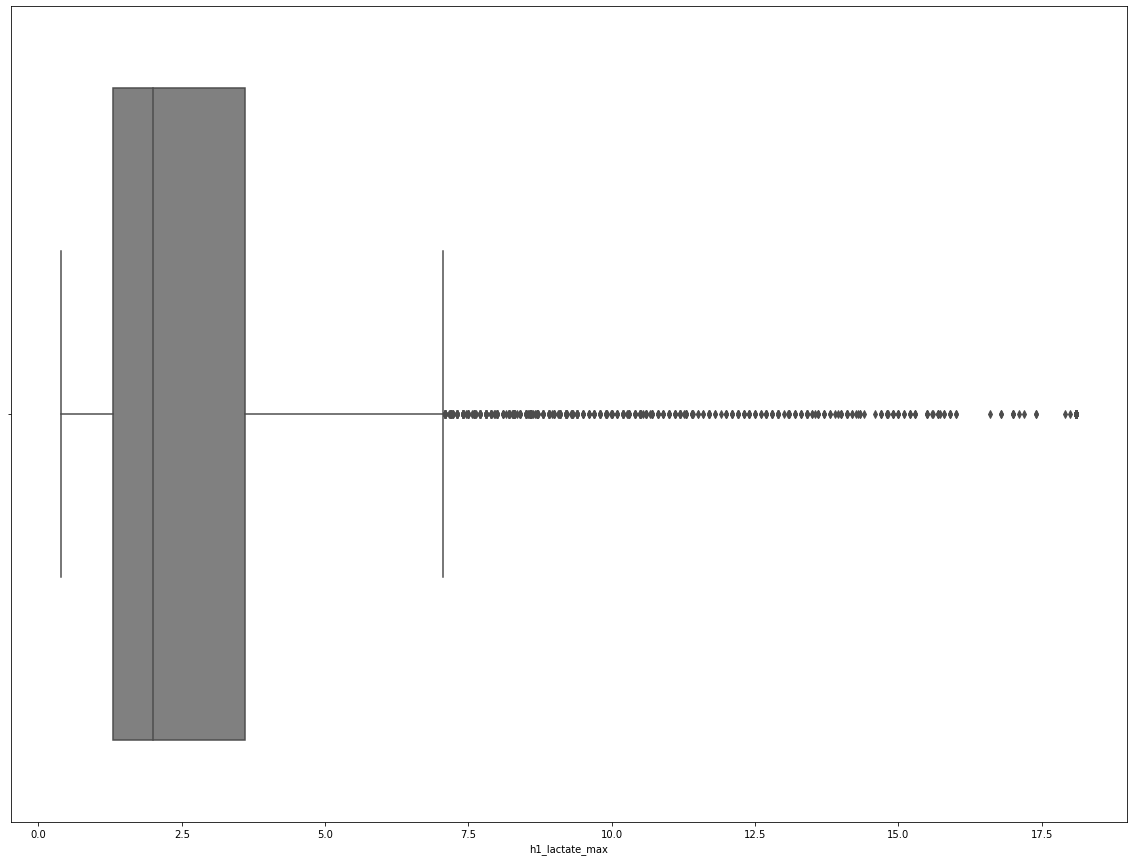

* h1_lactate_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


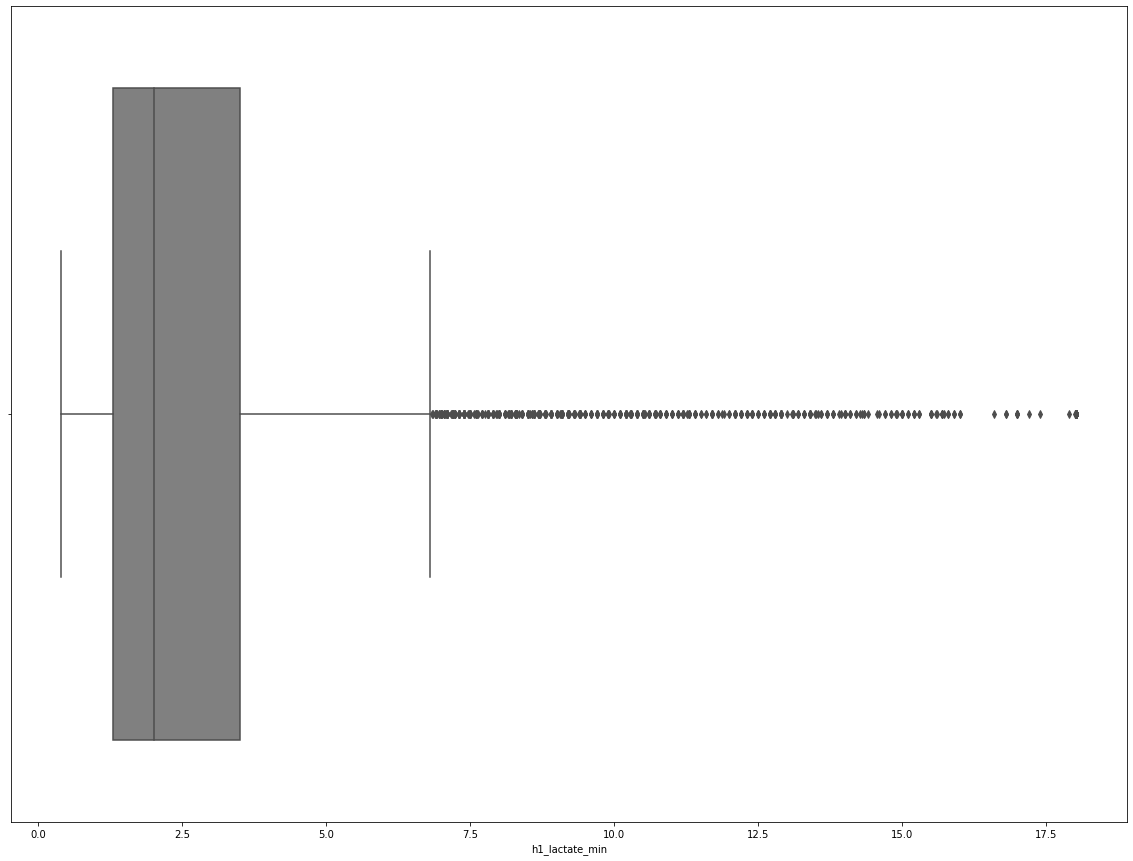

* h1_platelets_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_platelets_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


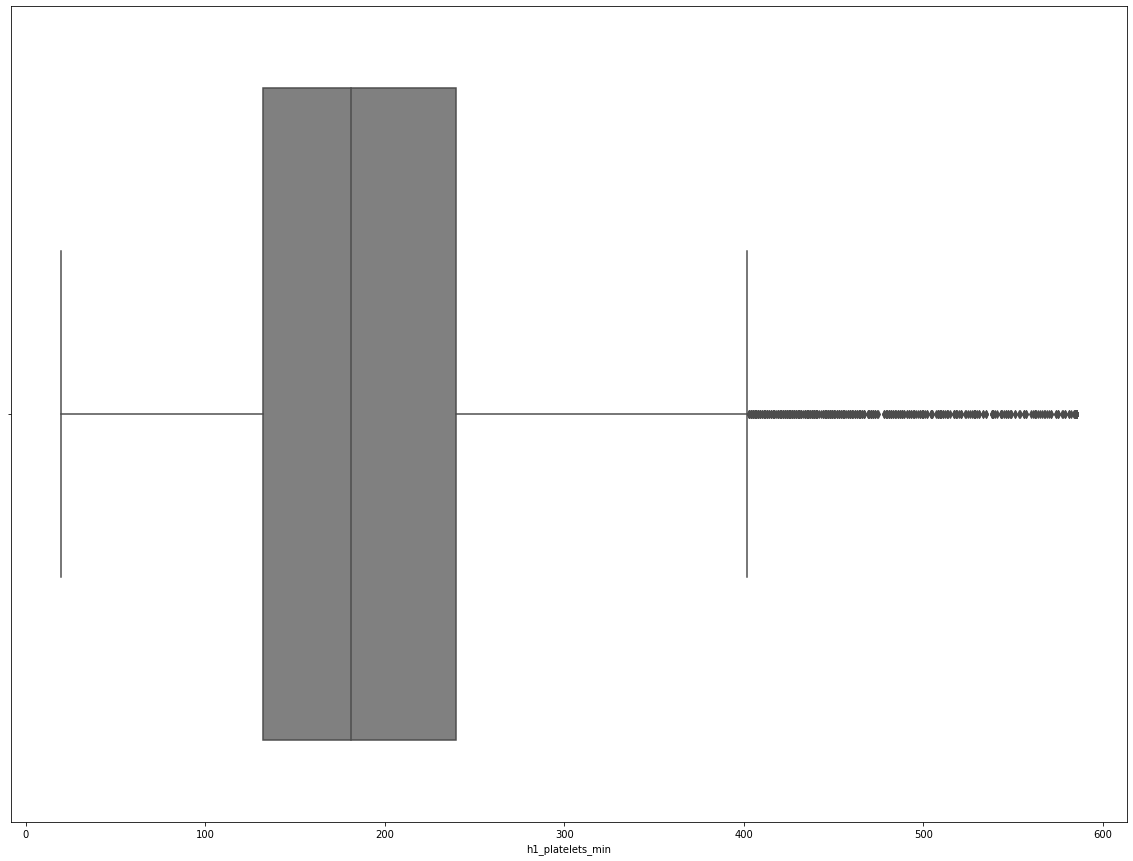

* h1_potassium_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_potassium_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


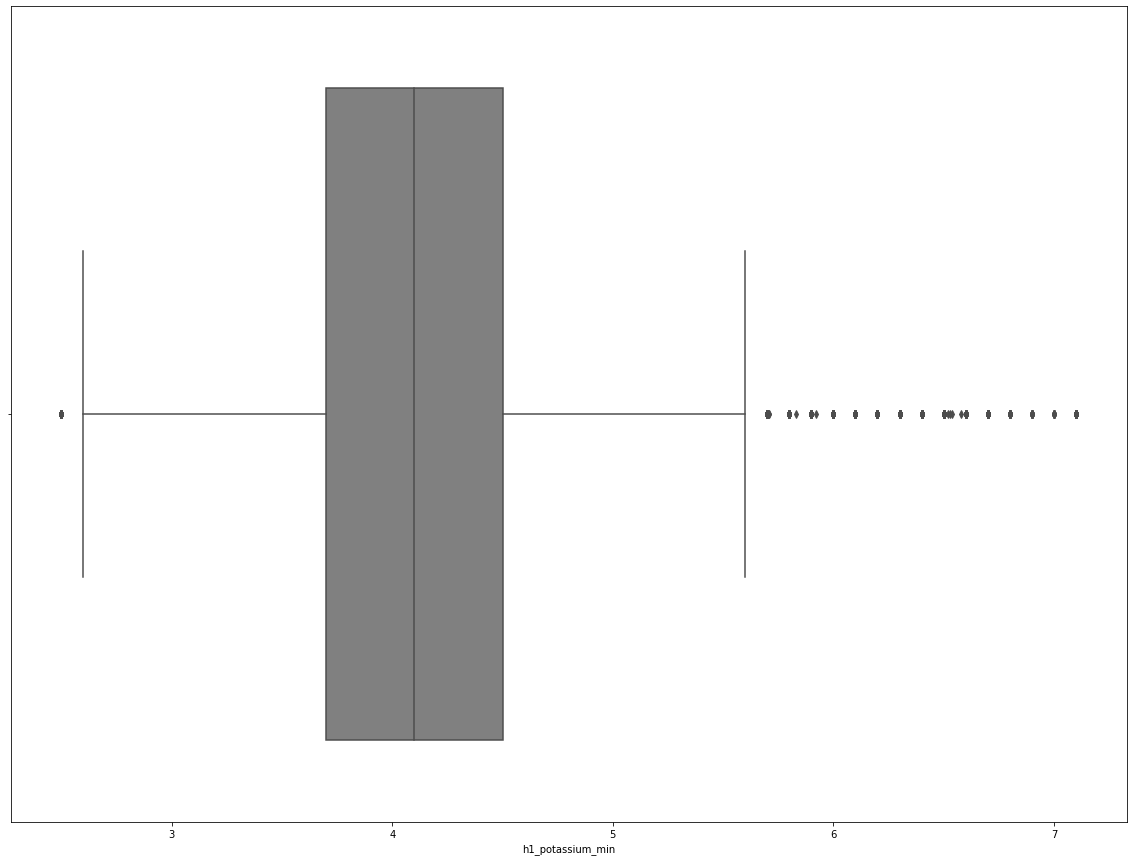

* h1_sodium_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


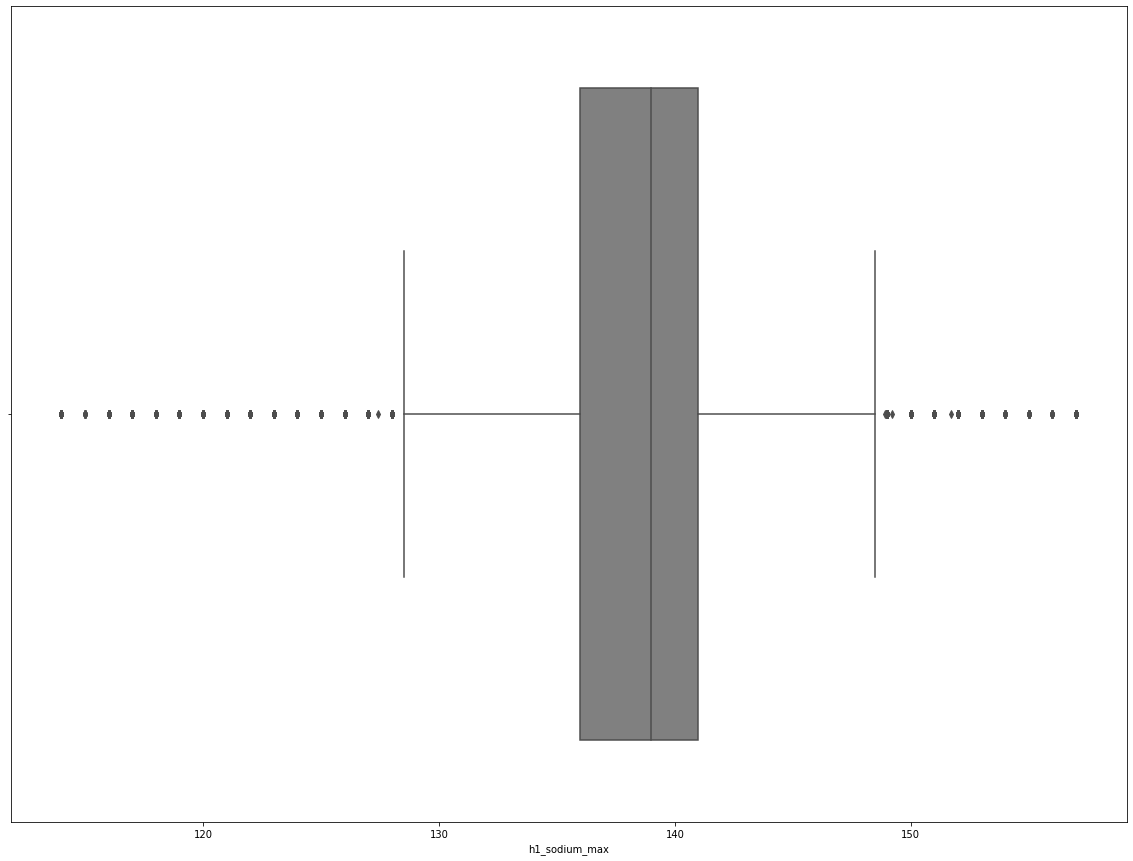

* h1_sodium_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_wbc_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


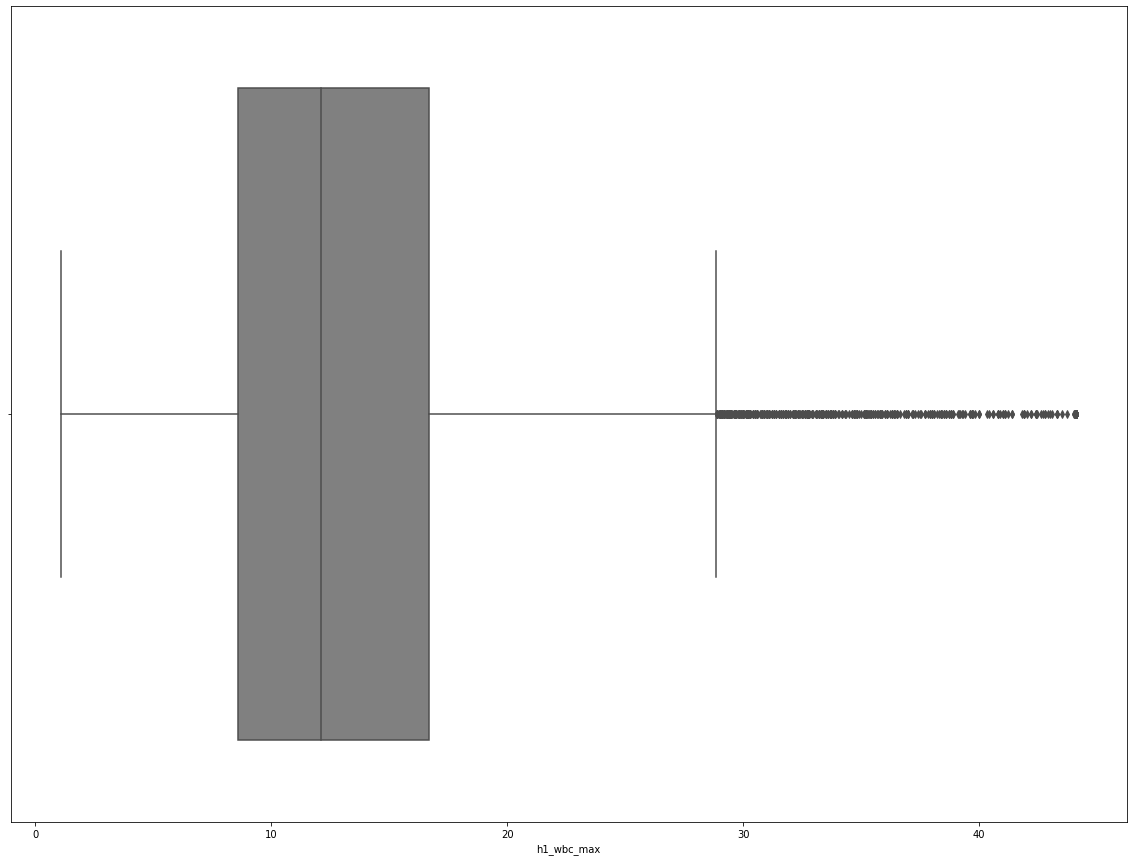

* h1_wbc_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


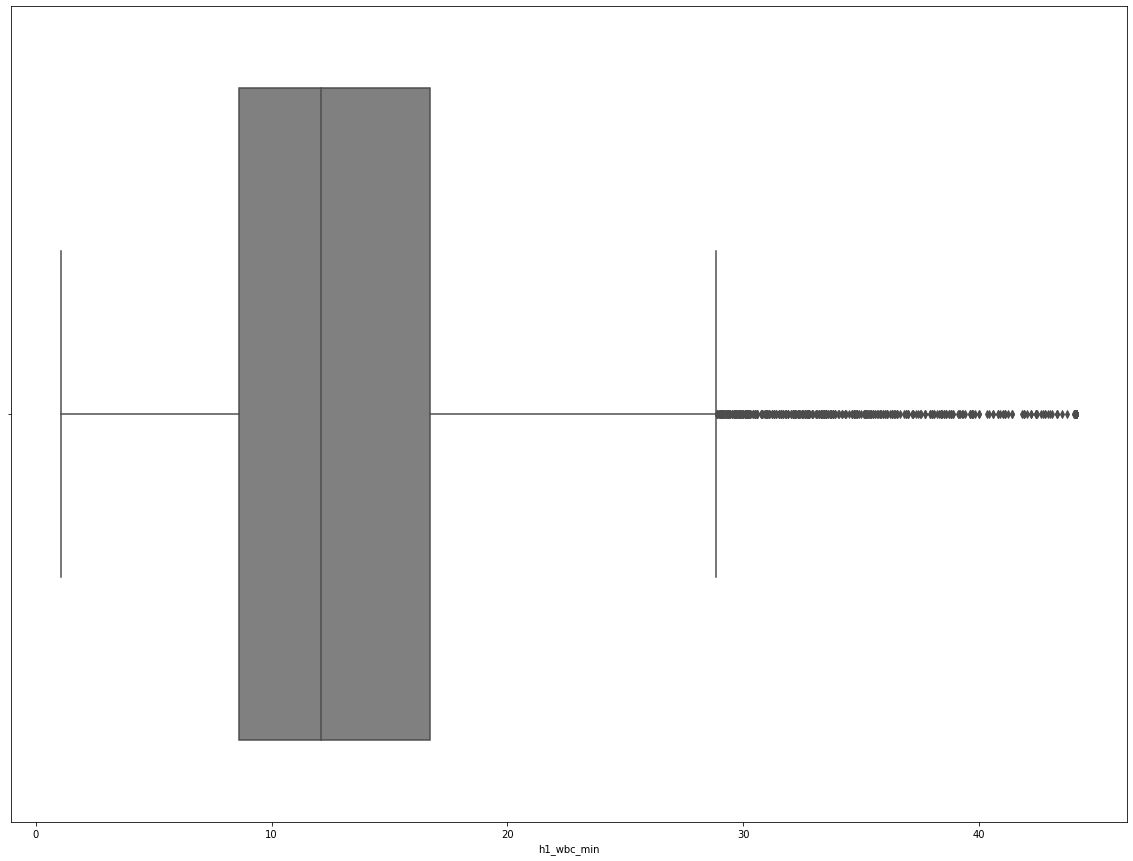

* d1_arterial_pco2_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


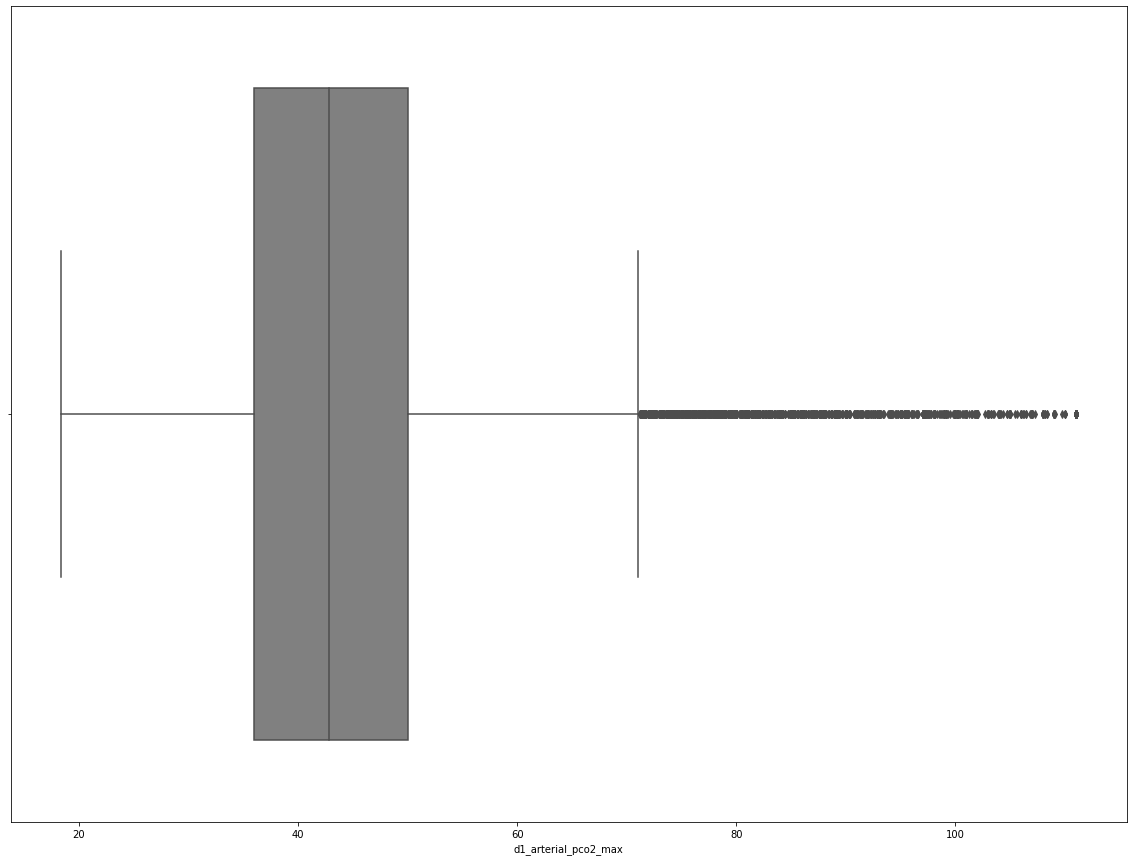

* d1_arterial_pco2_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


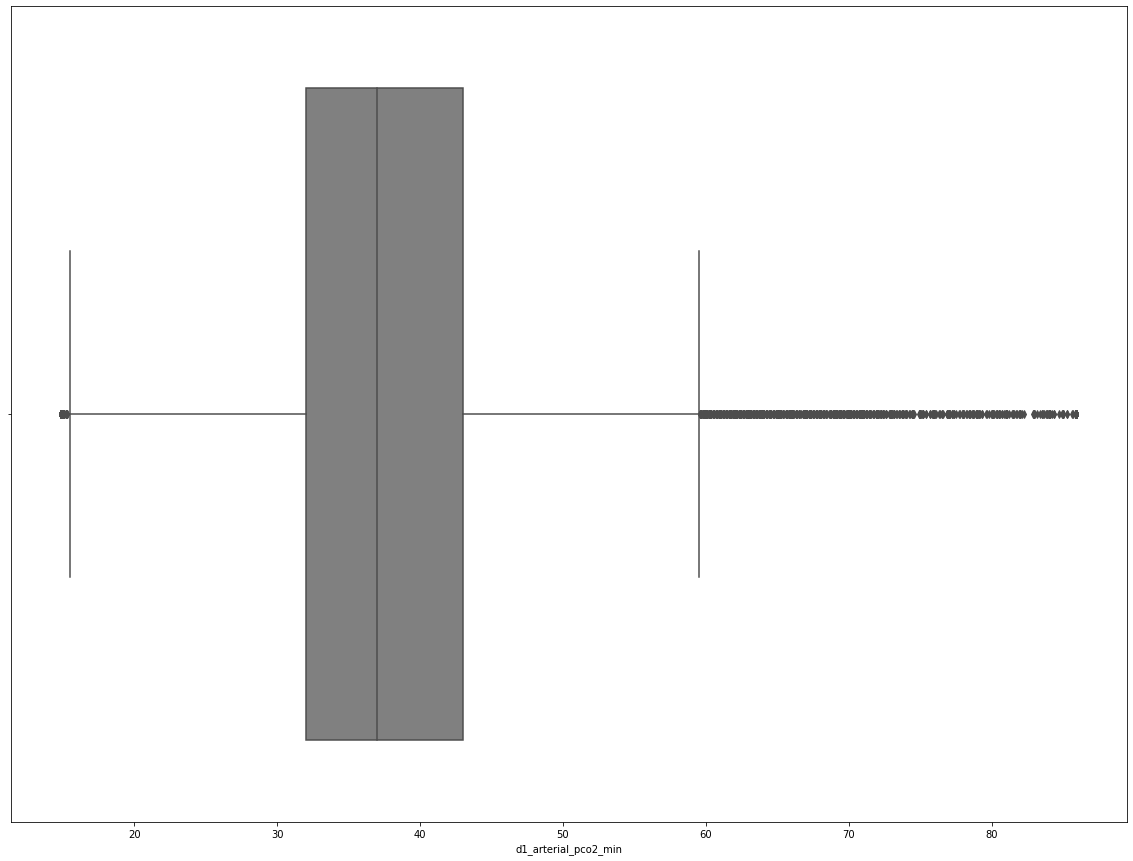

* d1_arterial_ph_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


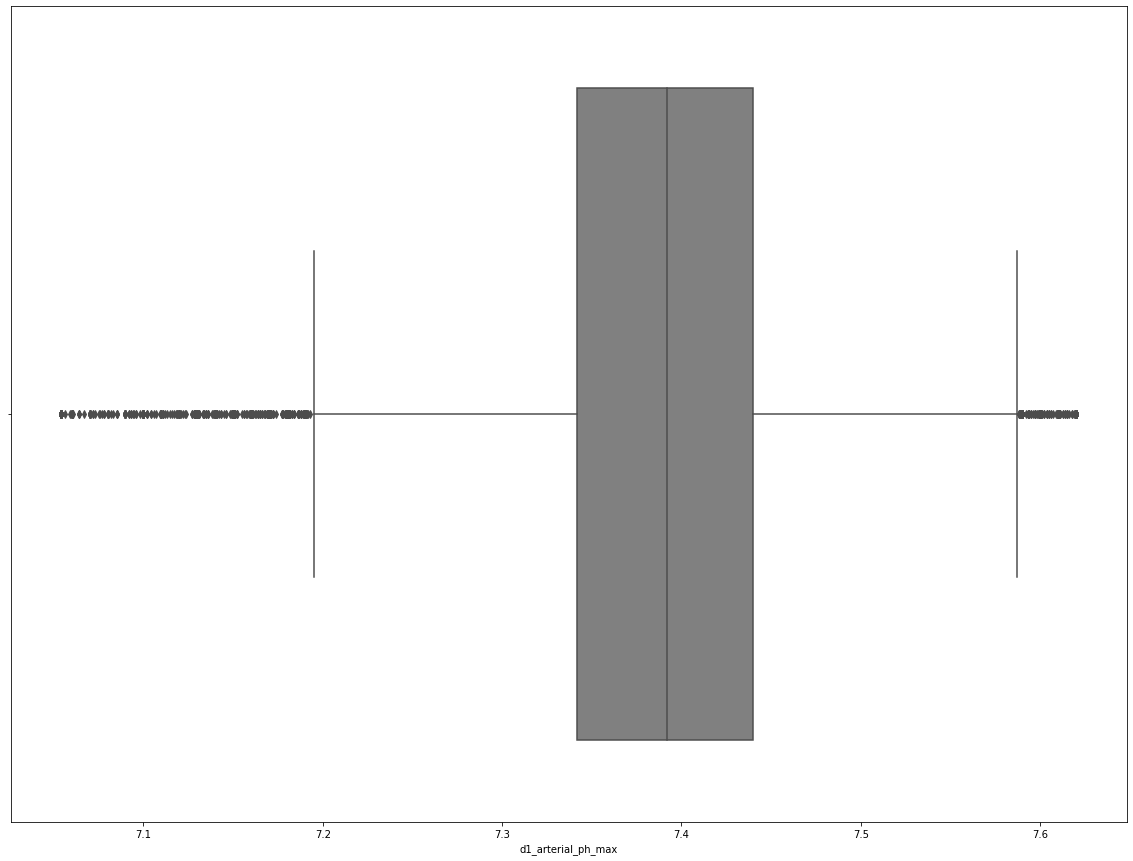

* d1_arterial_ph_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


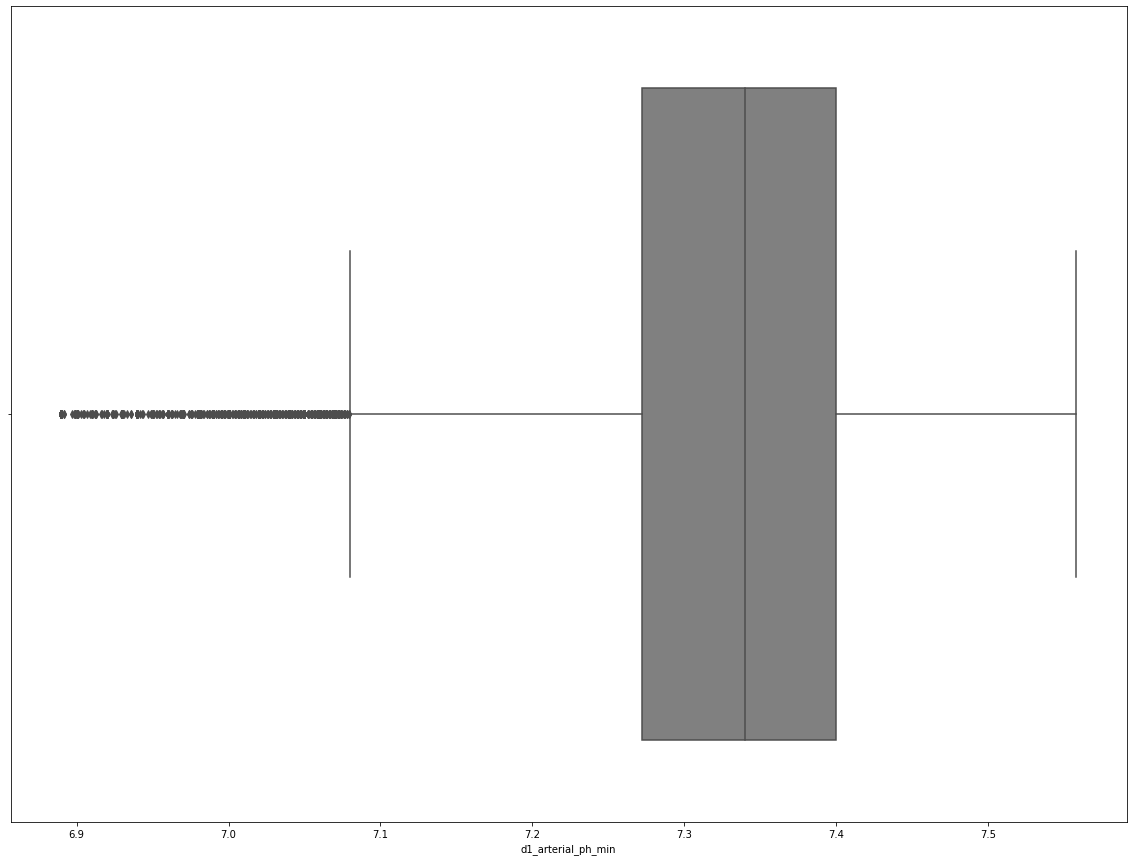

* d1_arterial_po2_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


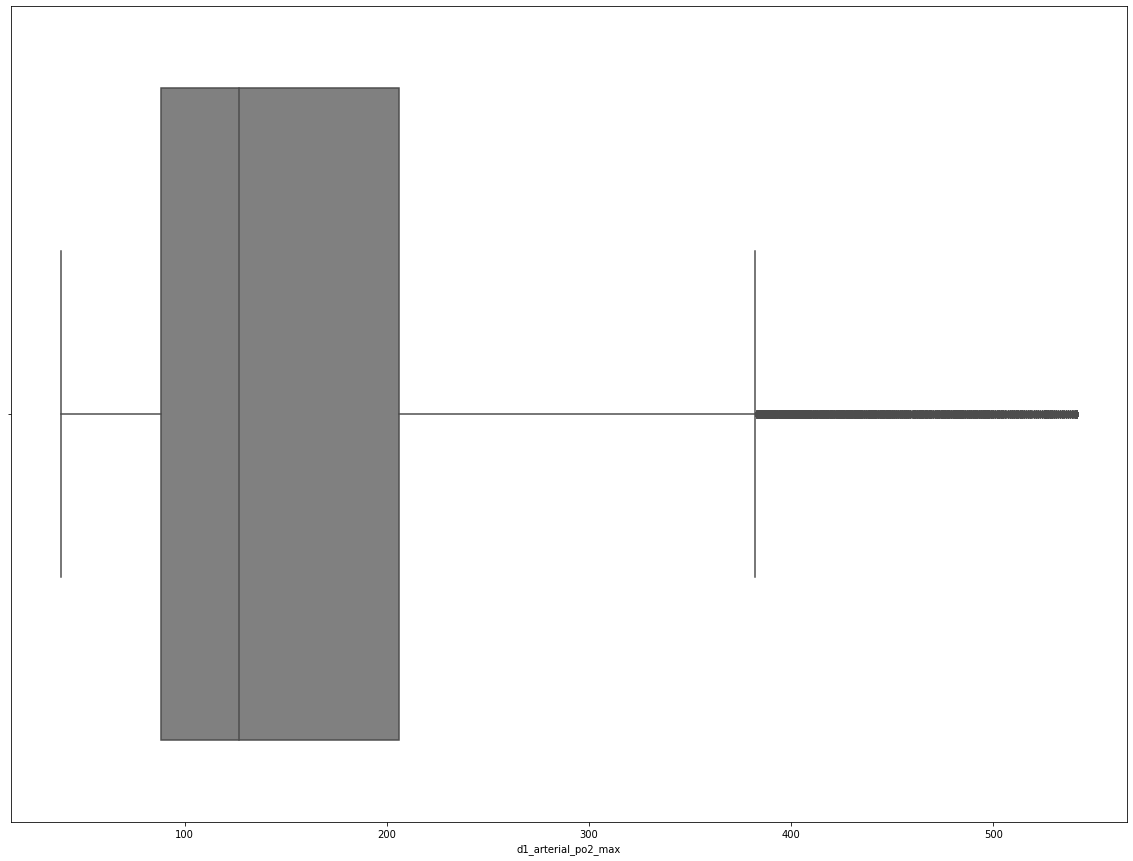

* d1_arterial_po2_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


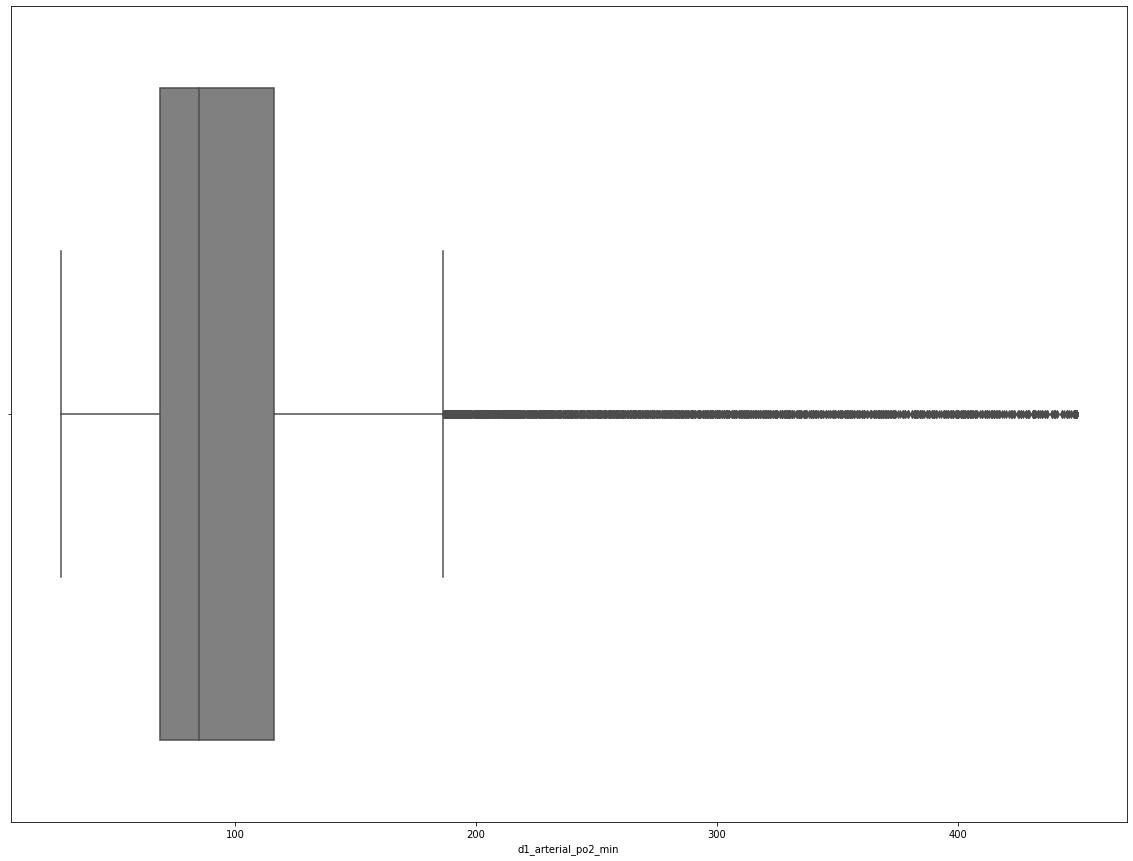

* d1_pao2fio2ratio_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* d1_pao2fio2ratio_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_arterial_pco2_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


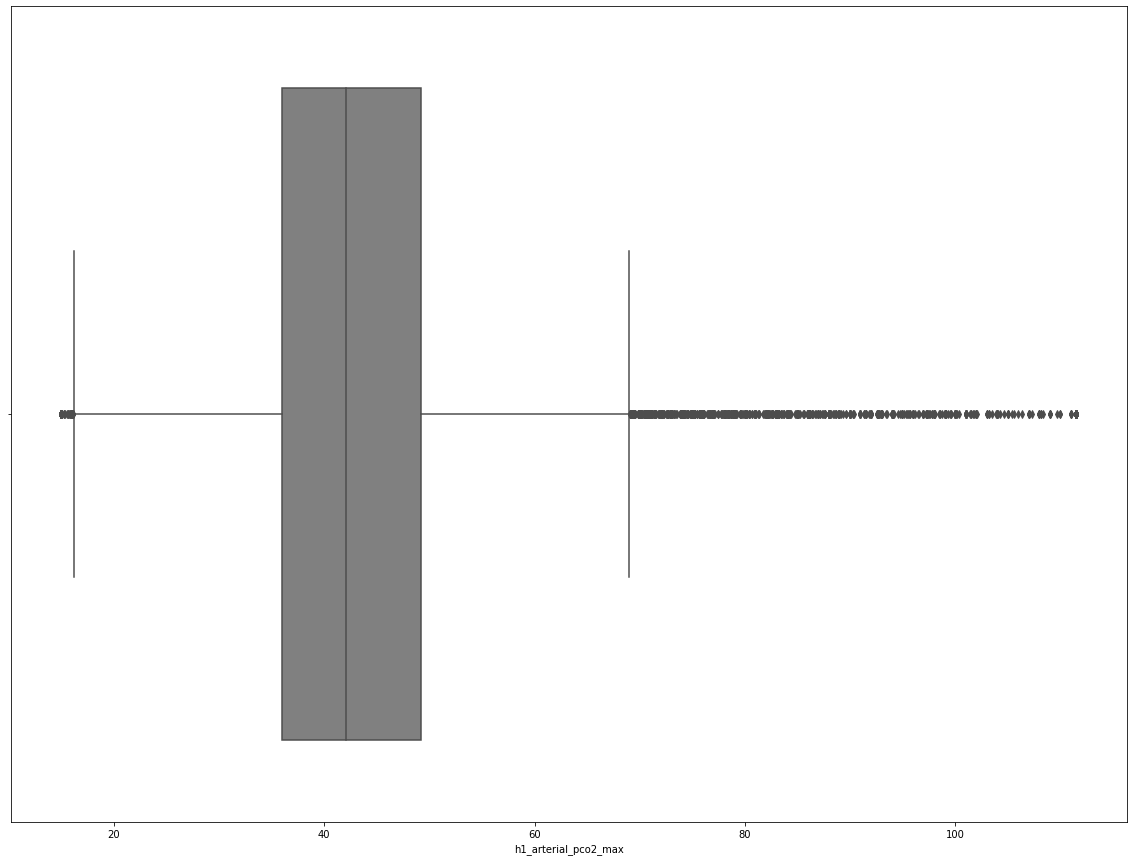

* h1_arterial_pco2_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


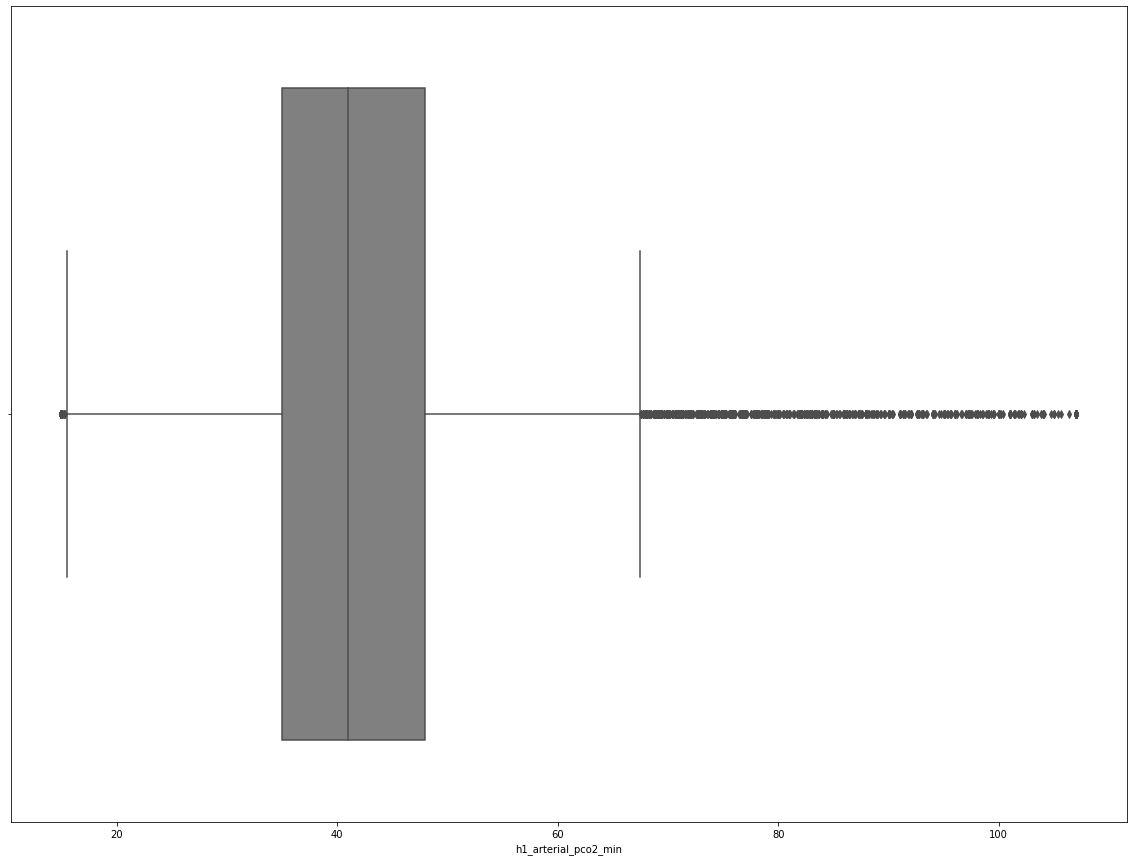

* h1_arterial_ph_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_arterial_ph_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_arterial_po2_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* h1_arterial_po2_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


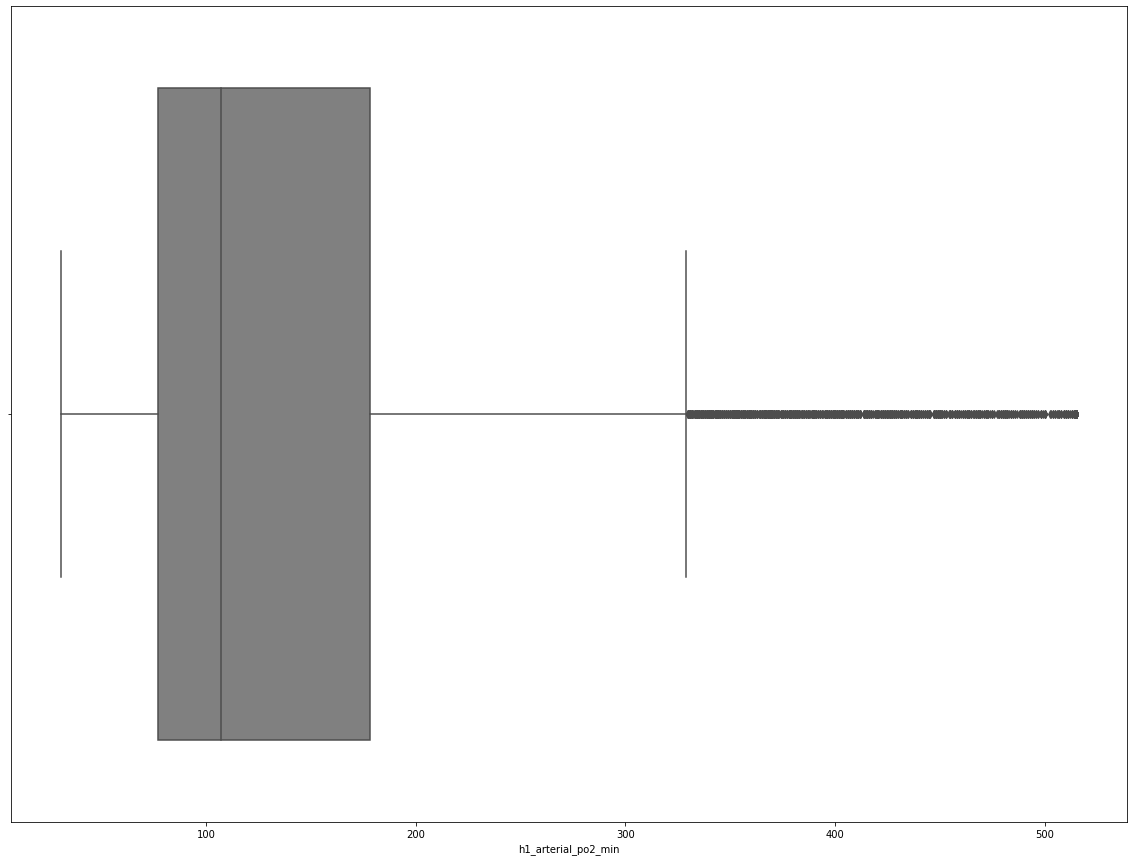

* h1_pao2fio2ratio_max
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


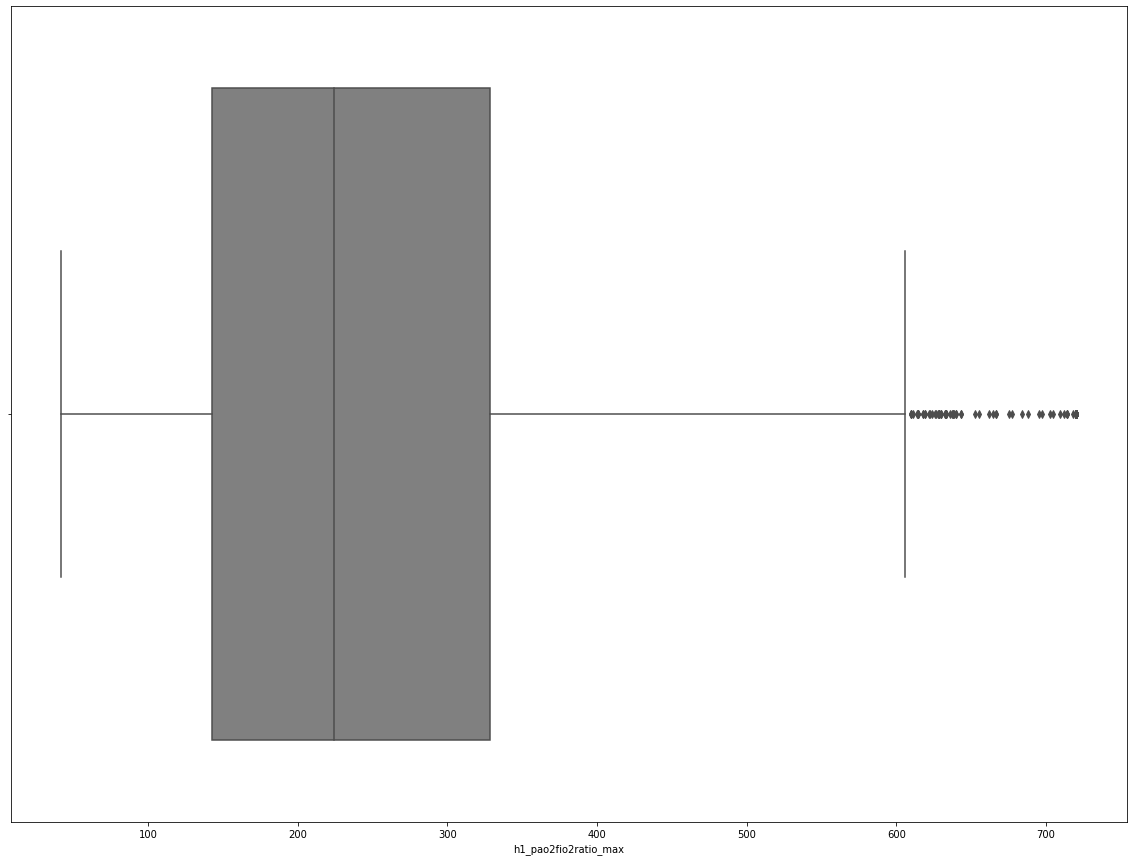

* h1_pao2fio2ratio_min
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


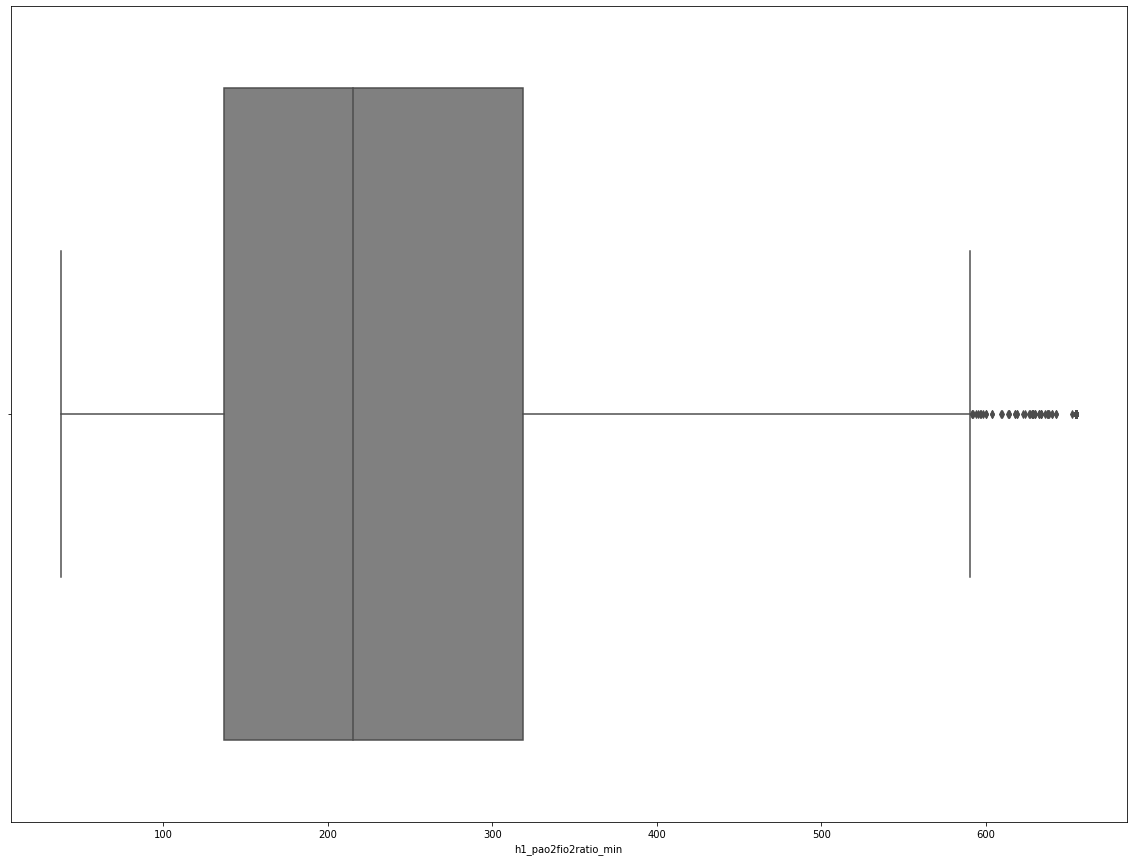

* apache_4a_hospital_death_prob
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


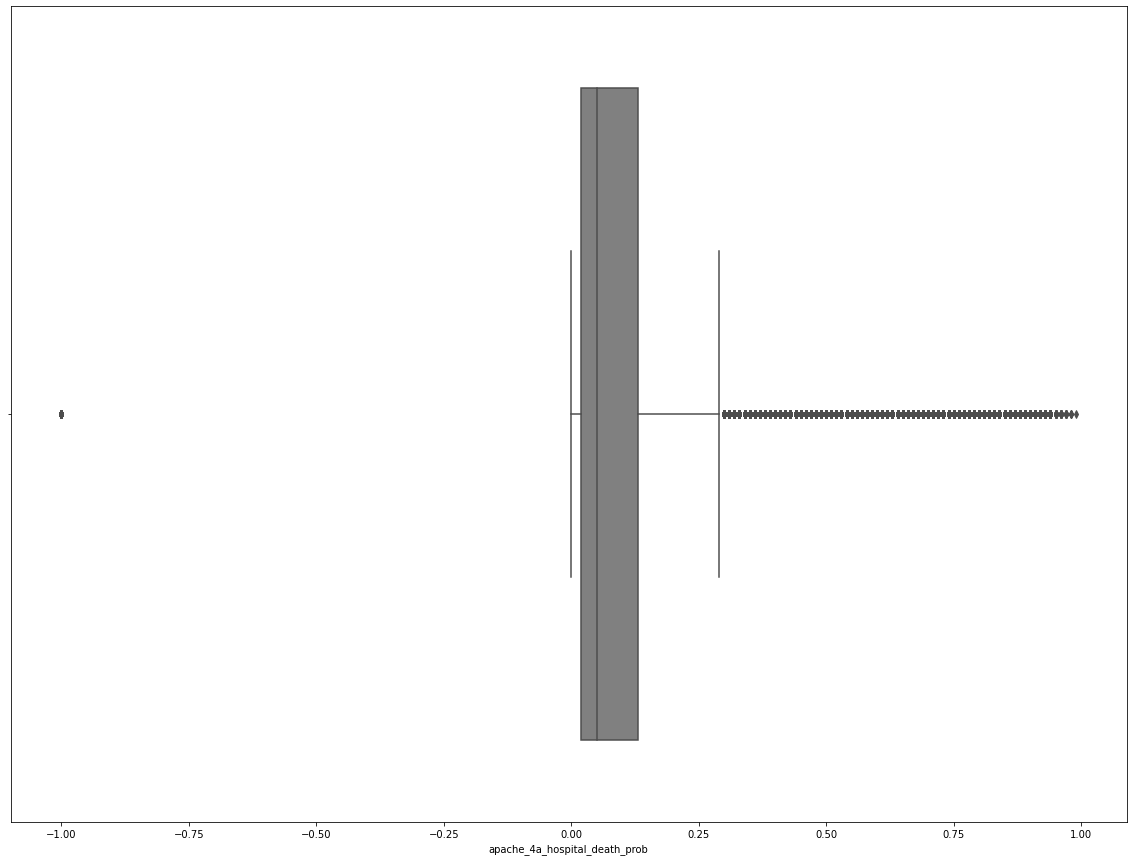

* apache_4a_icu_death_prob
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


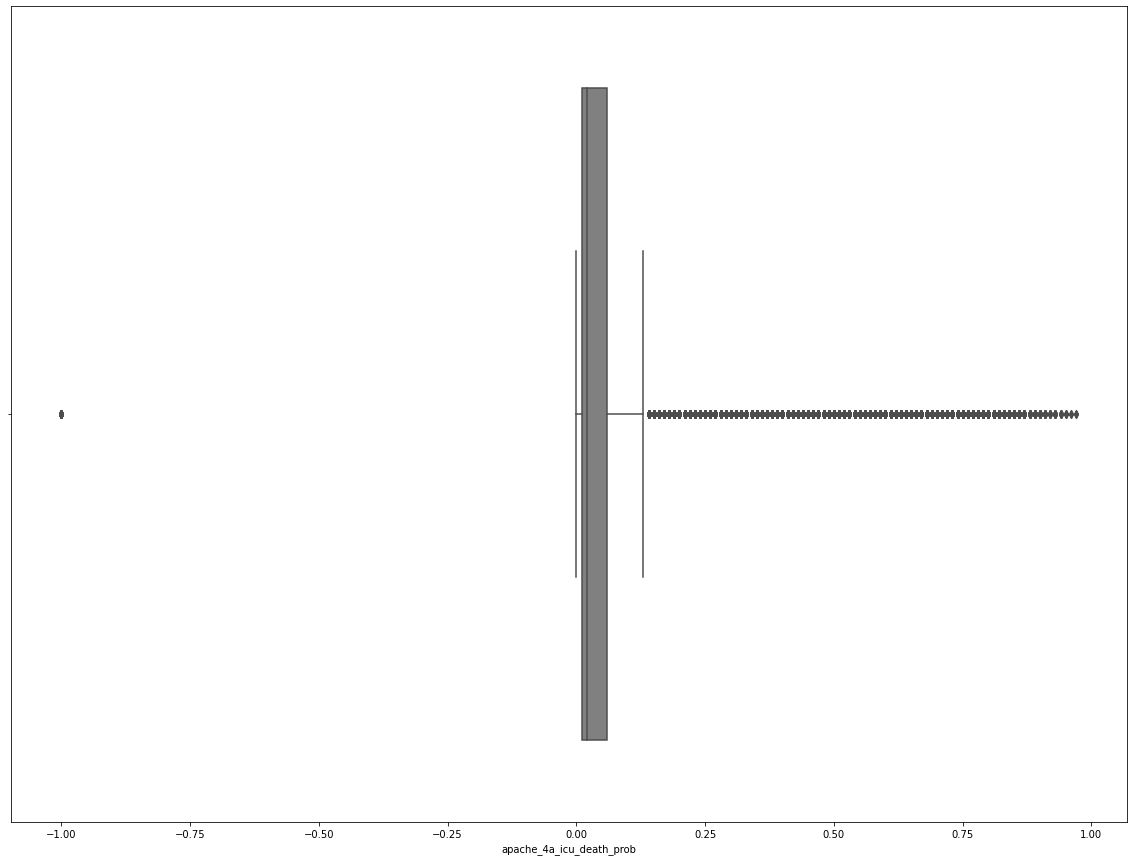

* aids
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


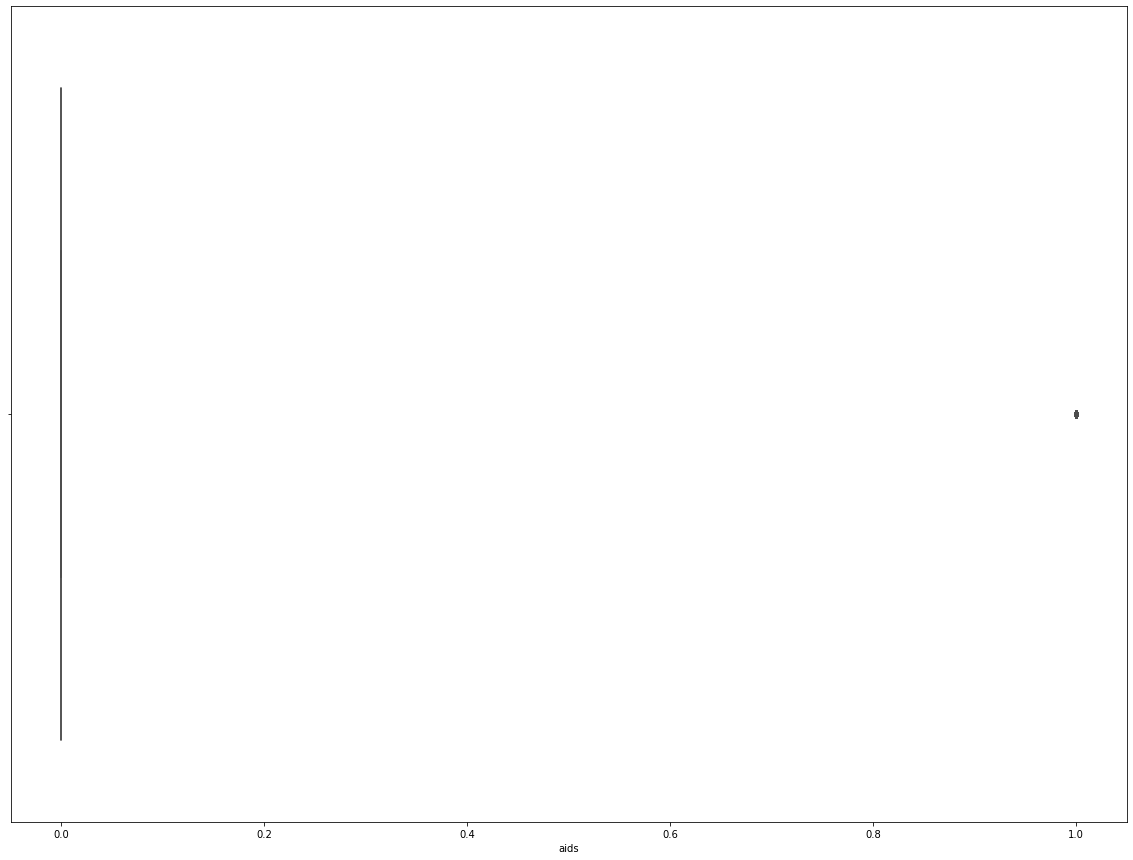

* cirrhosis
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* diabetes_mellitus
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


* hepatic_failure
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


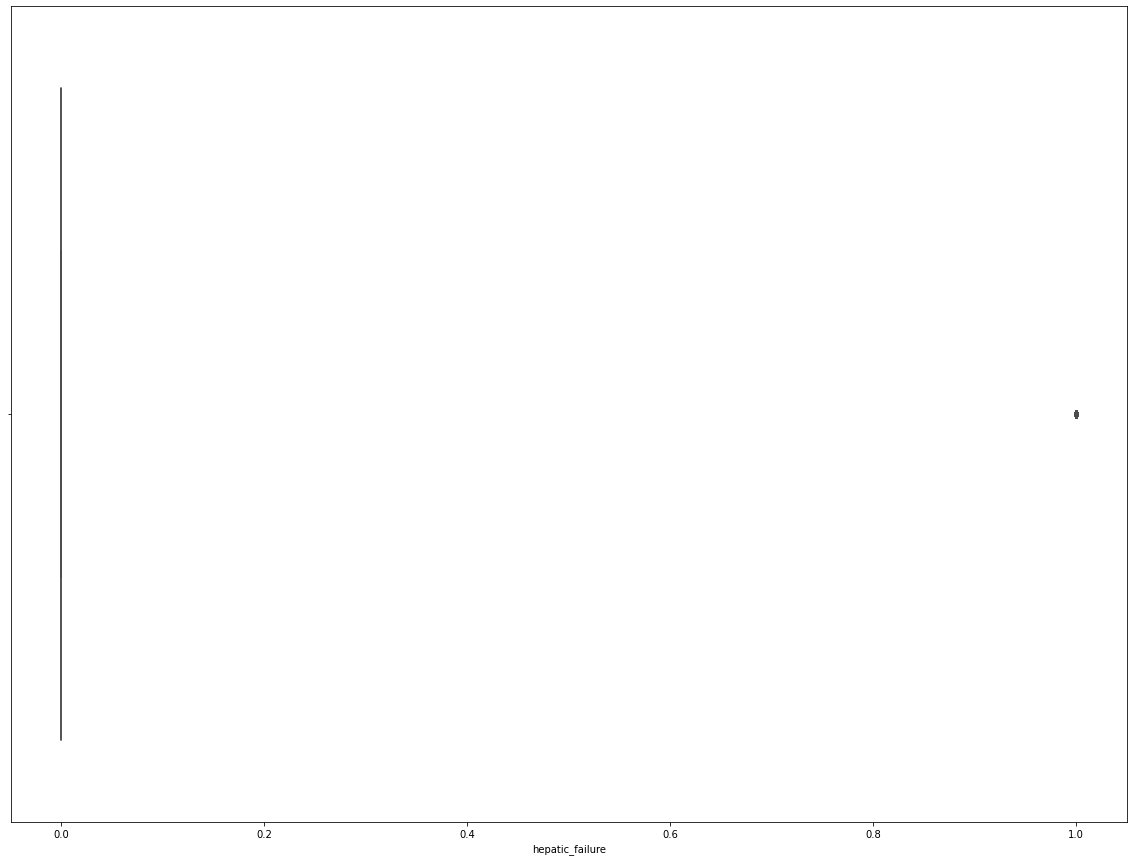

* immunosuppression
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


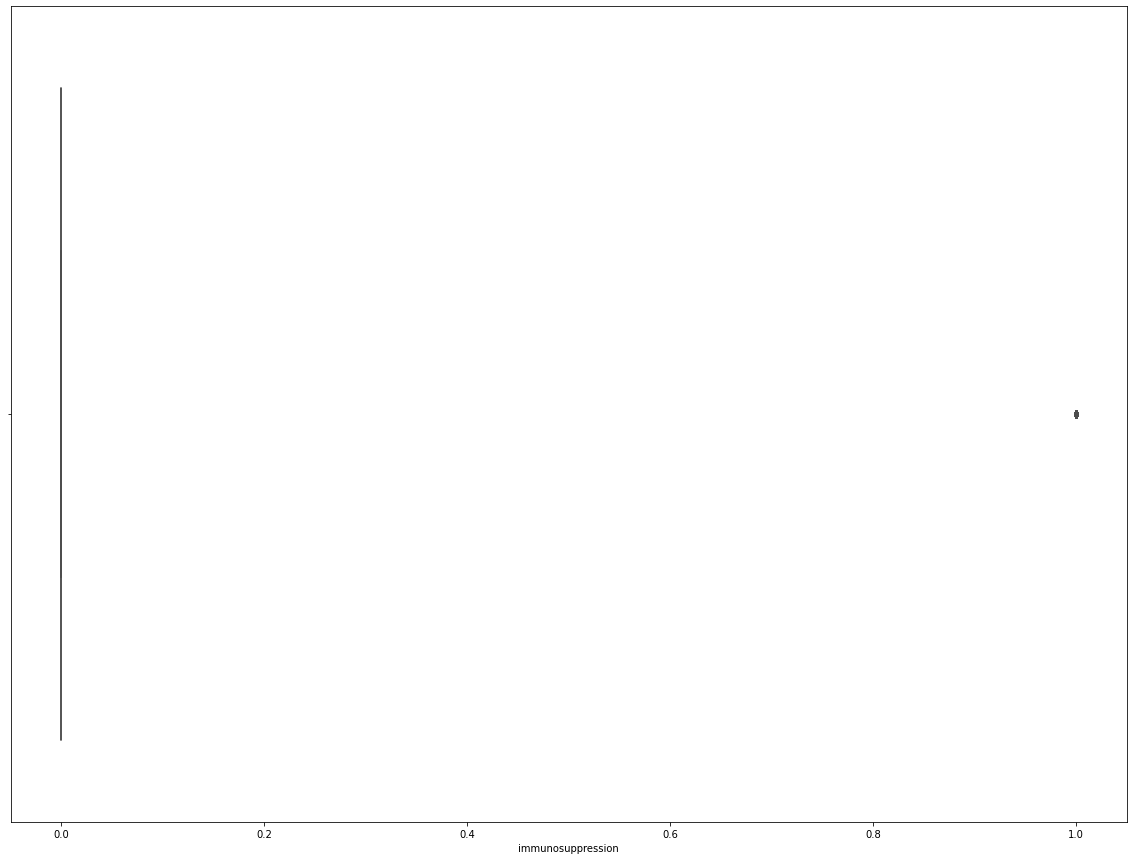

* leukemia
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


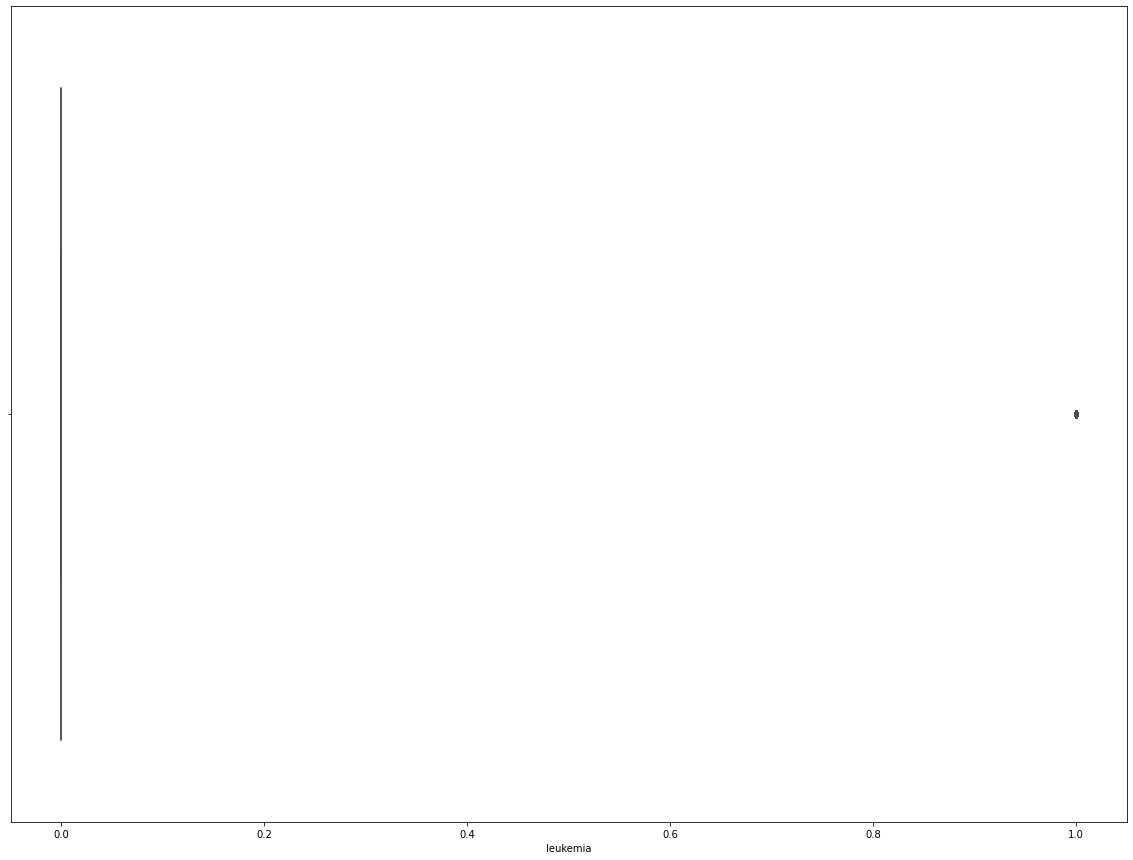

* lymphoma
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


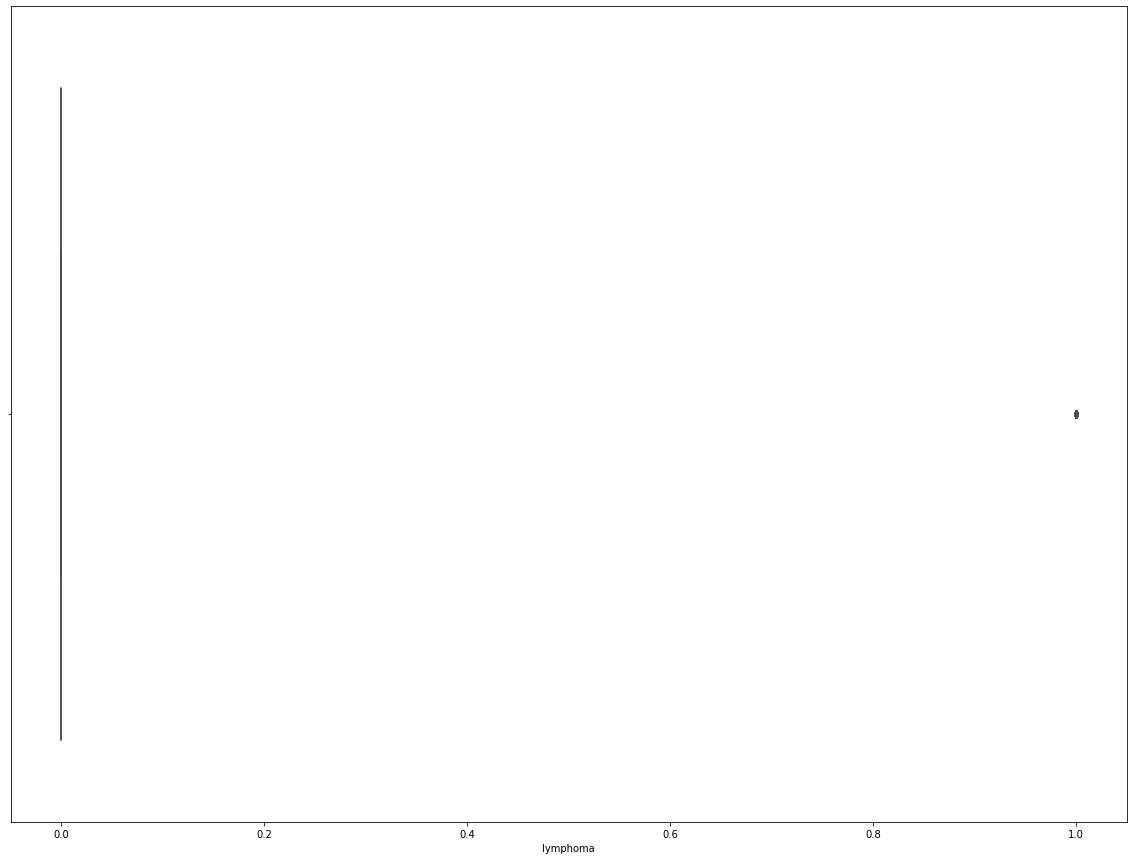

* solid_tumor_with_metastasis
tipo de datos: float64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


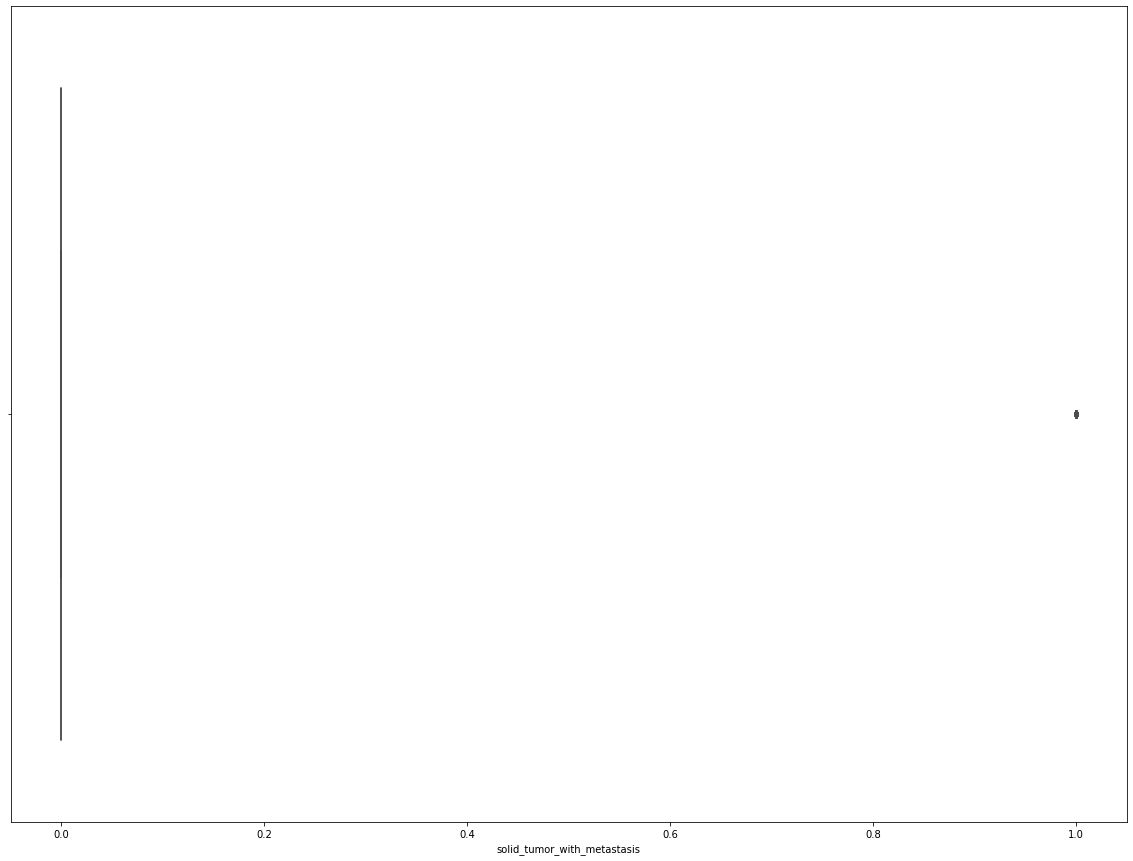

In [ ]:
#deteccion de datos anomalos

for i in df_train.columns:
  if i!= target and df_train[i].dtypes!= object:
    print('*',i)
    print('tipo de datos:', df_train[i].dtypes)
    plt.figure(figsize=(20,15))
    sns.boxplot(df_train[i], color= 'Grey')
    plt.show()

Gracias a los histogramas anteriores, se logra ver que la mayoria de los datos de las columnas tienen una distribucion parecida a la normal, en especial en las columnas de datos flotantes. Por otro lado, se logra ver que en algunas columnas con datos enteros, la distribución es constante o se concentra en un solo valor.

# **Imputación de datos faltantes** 

In [ ]:
#solo se consideran columnas con menos del 50% de datos nulos
df_train_filtrado= df_train.drop(columns=list_null)
df_test_filtrado= df_test.drop(columns=list_null)
df_train_filtrado

encounter_id  patient_id  hospital_id  hospital_death        bmi  \
0             98554        3413           60               0  28.357077   
1             70232       19980          139               0  24.547793   
2             24701       54659           39               0  24.284760   
3             68593        8469          176               0  35.045481   
4            103103      124128          182               0  19.010652   
...             ...         ...          ...             ...        ...   
89708         52840       14469          188               0  14.844926   
89709        107834      123189           19               1  25.148009   
89710        125869      107796           21               0  25.369438   
89711        115795      105886           10               0  31.703948   
89712         43998       60847          161               0  25.978680   

       elective_surgery         ethnicity  height hospital_admit_source  \
0                     0             Asian  154.90  Emergency Department   
1                     1  African American  154.90                   NaN   
2                     1         Caucasian  172.70        Operating Room   
3                     0         Caucasian  144.80          Direct Admit   
4                     0         Caucasian  180.30      Acute Care/Floor   
...                 ...               ...     ...                   ...   
89708                 0         Caucasian  170.20      Acute Care/Floor   
89709                 0         Caucasian  177.80  Emergency Department   
89710                 1         Caucasian  177.80        Other Hospital   
89711                 1  African American  185.42         Recovery Room   
89712                 1         Caucasian  183.00         Recovery Room   

                icu_admit_source  ...  aids cirrhosis diabetes_mellitus  \
0           Accident & Emergency  ...   0.0       0.0               0.0   
1      Operating Room / Recovery  ...   0.0       0.0               0.0   
2      Operating Room / Recovery  ...   0.0       0.0               1.0   
3           Accident & Emergency  ...   0.0       0.0               0.0   
4                          Floor  ...   0.0       0.0               0.0   
...                          ...  ...   ...       ...               ...   
89708                      Floor  ...   0.0       0.0               0.0   
89709       Accident & Emergency  ...   0.0       0.0               1.0   
89710  Operating Room / Recovery  ...   0.0       0.0               0.0   
89711  Operating Room / Recovery  ...   0.0       0.0               0.0   
89712  Operating Room / Recovery  ...   0.0       0.0               0.0   

       hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                  0.0                0.0       0.0       0.0   
1                  0.0                0.0       0.0       0.0   
2                  0.0                0.0       0.0       0.0   
3                  0.0                0.0       0.0       0.0   
4                  0.0                0.0       0.0       0.0   
...                ...                ...       ...       ...   
89708              0.0                0.0       0.0       0.0   
89709              0.0                0.0       0.0       0.0   
89710              0.0                0.0       0.0       0.0   
89711              0.0                0.0       0.0       0.0   
89712              0.0                0.0       0.0       0.0   

       solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                              0.0                Sepsis       Cardiovascular  
1                              0.0        Cardiovascular       Cardiovascular  
2                              0.0        Cardiovascular  Undefined diagnoses  
3                              0.0                Sepsis       Cardiovascular  
4                              0.0          Neurological           Neurologic  
...                            ...         

In [ ]:
#imputacion de datos faltantes con la moda en columnas categoricas

from statistics import mode

df_train_imputado= df_train_filtrado.copy()
df_test_imputado= df_test_filtrado.copy()

for i in df_train_imputado.columns:
  if i!= target:
    if df_train_imputado[i].dtypes==int:
      df_test_imputado[i]= df_test_imputado[i].fillna(round(df_train_imputado[i].mean()))
      df_train_imputado[i]= df_train_imputado[i].fillna(round(df_train_imputado[i].mean()))
    elif df_train_imputado[i].dtypes==float:
      df_test_imputado[i]= df_test_imputado[i].fillna(df_train_imputado[i].mean())
      df_train_imputado[i]= df_train_imputado[i].fillna(df_train_imputado[i].mean())
    else:
      df_test_imputado[i]= df_test_imputado[i].fillna(mode(df_train_imputado[i]))
      df_train_imputado[i]= df_train_imputado[i].fillna(mode(df_train_imputado[i]))

df_train_imputado

encounter_id  patient_id  hospital_id  hospital_death        bmi  \
0             98554        3413           60               0  28.357077   
1             70232       19980          139               0  24.547793   
2             24701       54659           39               0  24.284760   
3             68593        8469          176               0  35.045481   
4            103103      124128          182               0  19.010652   
...             ...         ...          ...             ...        ...   
89708         52840       14469          188               0  14.844926   
89709        107834      123189           19               1  25.148009   
89710        125869      107796           21               0  25.369438   
89711        115795      105886           10               0  31.703948   
89712         43998       60847          161               0  25.978680   

       elective_surgery         ethnicity  height hospital_admit_source  \
0                     0             Asian  154.90  Emergency Department   
1                     1  African American  154.90  Emergency Department   
2                     1         Caucasian  172.70        Operating Room   
3                     0         Caucasian  144.80          Direct Admit   
4                     0         Caucasian  180.30      Acute Care/Floor   
...                 ...               ...     ...                   ...   
89708                 0         Caucasian  170.20      Acute Care/Floor   
89709                 0         Caucasian  177.80  Emergency Department   
89710                 1         Caucasian  177.80        Other Hospital   
89711                 1  African American  185.42         Recovery Room   
89712                 1         Caucasian  183.00         Recovery Room   

                icu_admit_source  ...  aids cirrhosis diabetes_mellitus  \
0           Accident & Emergency  ...   0.0       0.0               0.0   
1      Operating Room / Recovery  ...   0.0       0.0               0.0   
2      Operating Room / Recovery  ...   0.0       0.0               1.0   
3           Accident & Emergency  ...   0.0       0.0               0.0   
4                          Floor  ...   0.0       0.0               0.0   
...                          ...  ...   ...       ...               ...   
89708                      Floor  ...   0.0       0.0               0.0   
89709       Accident & Emergency  ...   0.0       0.0               1.0   
89710  Operating Room / Recovery  ...   0.0       0.0               0.0   
89711  Operating Room / Recovery  ...   0.0       0.0               0.0   
89712  Operating Room / Recovery  ...   0.0       0.0               0.0   

       hepatic_failure  immunosuppression  leukemia  lymphoma  \
0                  0.0                0.0       0.0       0.0   
1                  0.0                0.0       0.0       0.0   
2                  0.0                0.0       0.0       0.0   
3                  0.0                0.0       0.0       0.0   
4                  0.0                0.0       0.0       0.0   
...                ...                ...       ...       ...   
89708              0.0                0.0       0.0       0.0   
89709              0.0                0.0       0.0       0.0   
89710              0.0                0.0       0.0       0.0   
89711              0.0                0.0       0.0       0.0   
89712              0.0                0.0       0.0       0.0   

       solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  
0                              0.0                Sepsis       Cardiovascular  
1                              0.0        Cardiovascular       Cardiovascular  
2                              0.0        Cardiovascular  Undefined diagnoses  
3                              0.0                Sepsis       Cardiovascular  
4                              0.0          Neurological           Neurologic  
...                            ...         

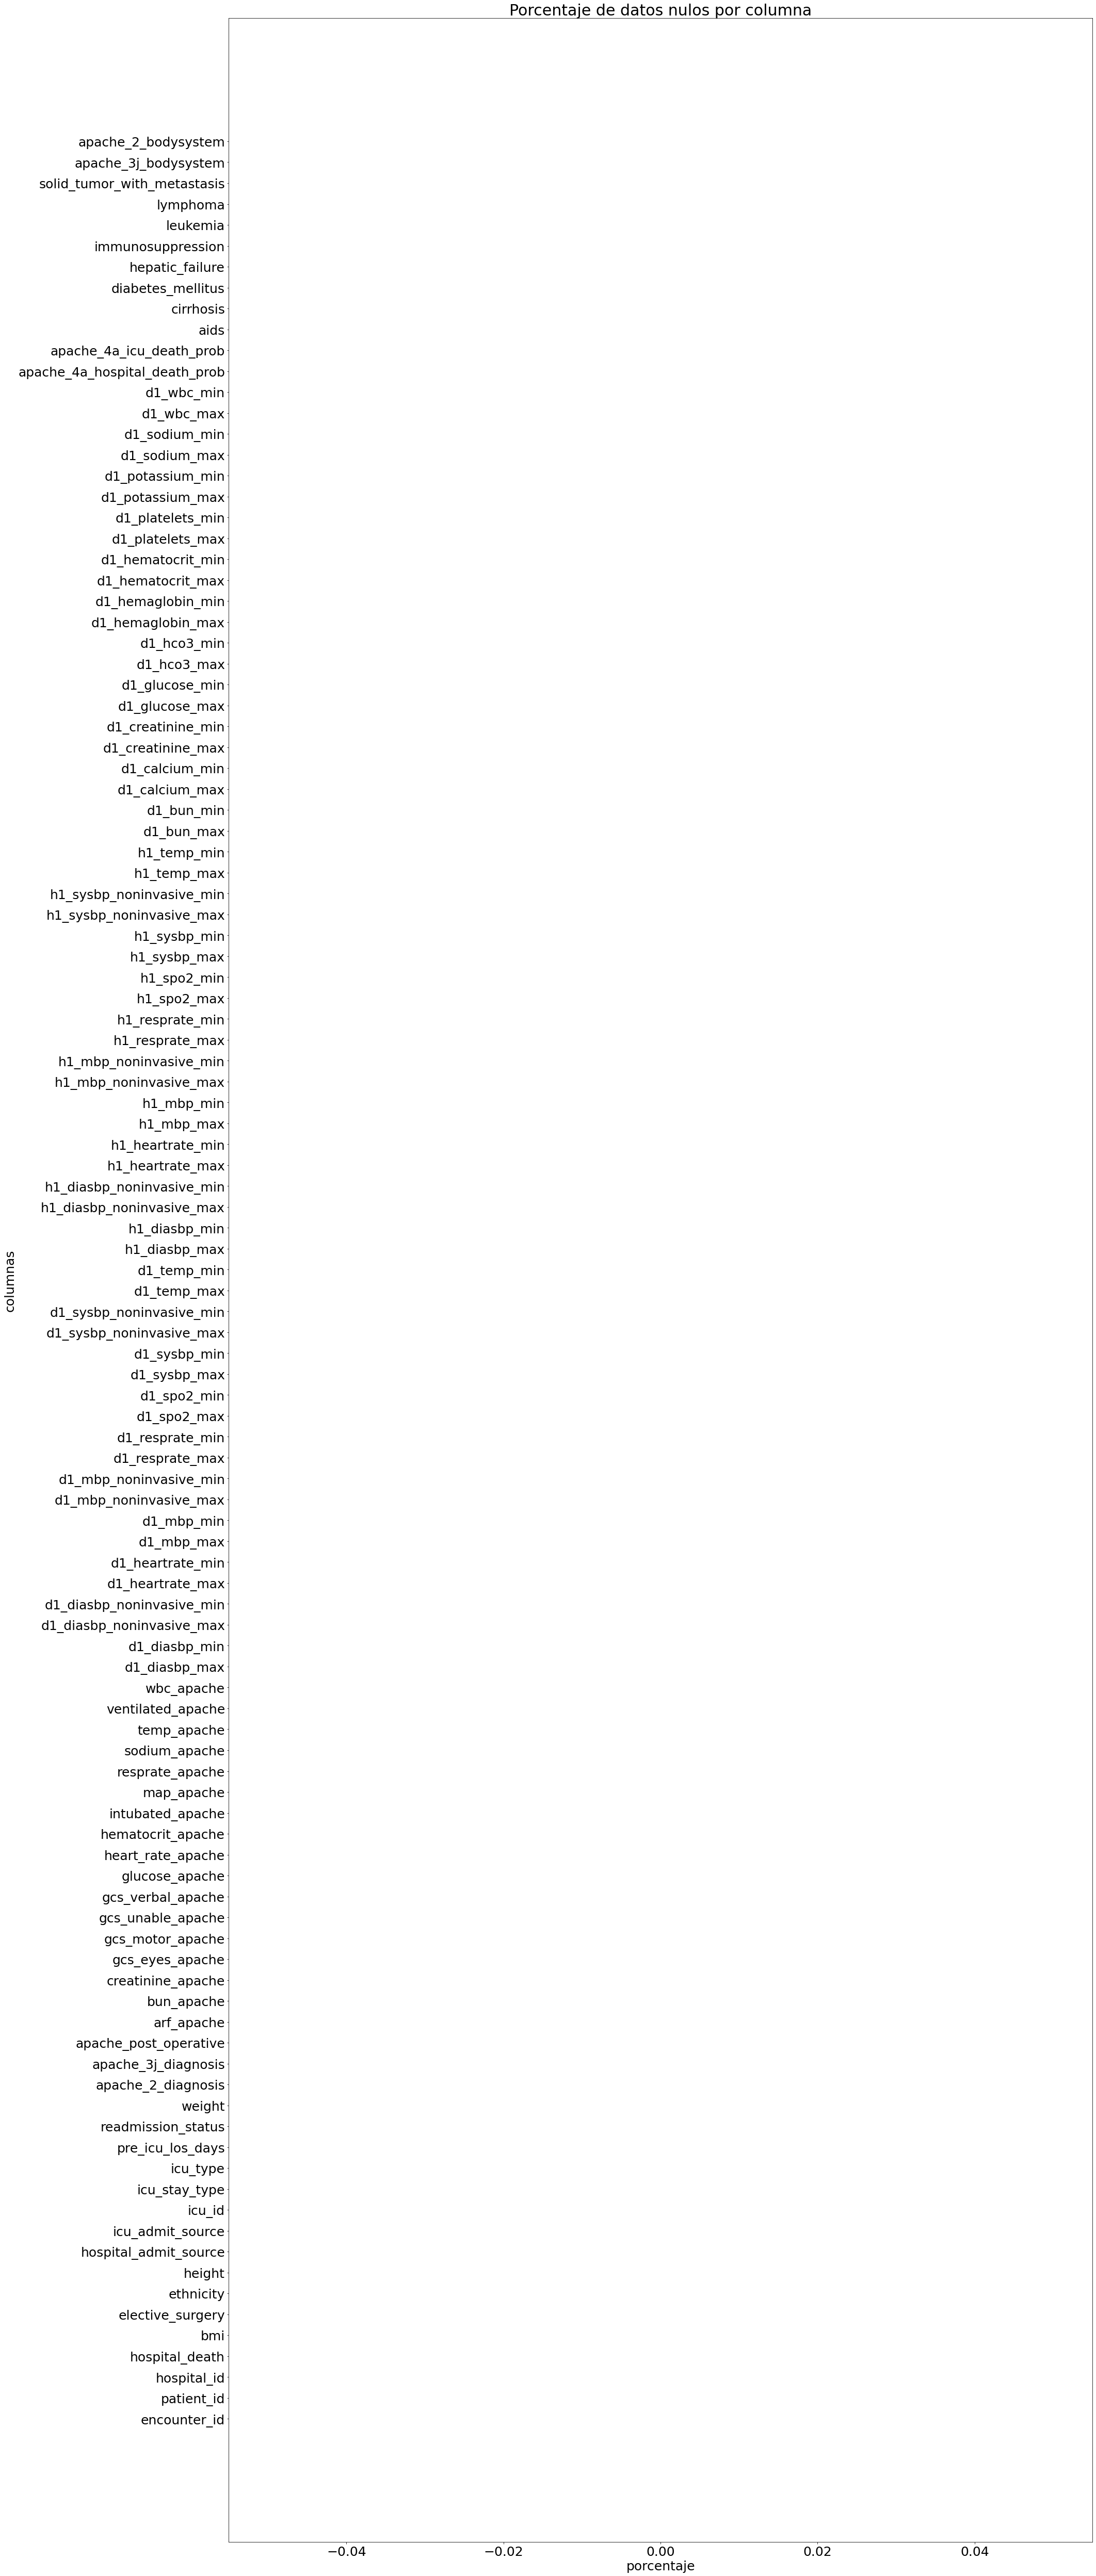

In [ ]:
#verificacion de imputacion de datos nulos usando este metodo
por_null= df_train_imputado.isnull().sum()/df_train_imputado.shape[0]
fig = plt.figure(figsize=(30, 90))
plt.barh(df_train_imputado.columns, por_null)
plt.title('Porcentaje de datos nulos por columna', fontdict={'fontsize':30})
plt.xlabel('porcentaje', fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('columnas', fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
#convertir las columnas categoricas a columnas con valores numericos

new_cat=[]
for i in df_train_imputado.columns:
  if df_train_imputado[i].dtypes ==object:
    new_cat.append(i)

print("columnas categoricas:")
print(new_cat)

df_train_dummies= pd.get_dummies(df_train_imputado, prefix= new_cat)
df_test_dummies= pd.get_dummies(df_test_imputado, prefix= new_cat)

df_train_dummies

columnas categoricas:
['ethnicity', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']


encounter_id  patient_id  hospital_id  hospital_death        bmi  \
0             98554        3413           60               0  28.357077   
1             70232       19980          139               0  24.547793   
2             24701       54659           39               0  24.284760   
3             68593        8469          176               0  35.045481   
4            103103      124128          182               0  19.010652   
...             ...         ...          ...             ...        ...   
89708         52840       14469          188               0  14.844926   
89709        107834      123189           19               1  25.148009   
89710        125869      107796           21               0  25.369438   
89711        115795      105886           10               0  31.703948   
89712         43998       60847          161               0  25.978680   

       elective_surgery  height  icu_id  pre_icu_los_days  readmission_status  \
0                     0  154.90     538          0.201389                   0   
1                     1  154.90     684          0.399306                   0   
2                     1  172.70     619          5.056944                   0   
3                     0  144.80     628          0.000000                   0   
4                     0  180.30     506          6.089583                   0   
...                 ...     ...     ...               ...                 ...   
89708                 0  170.20     840          0.000000                   0   
89709                 0  177.80     646          0.132639                   0   
89710                 1  177.80     512          0.294444                   0   
89711                 1  185.42     425          0.004861                   0   
89712                 1  183.00     324          0.300000                   0   

       ...  apache_2_bodysystem_Cardiovascular  \
0      ...                                   1   
1      ...                                   1   
2      ...                                   0   
3      ...                                   1   
4      ...                                   0   
...    ...                                 ...   
89708  ...                                   1   
89709  ...                                   0   
89710  ...                                   1   
89711  ...                                   0   
89712  ...                                   0   

       apache_2_bodysystem_Gastrointestinal  apache_2_bodysystem_Haematologic  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   
...                                     ...                               ...   
89708                                     0                                 0   
89709                                     0                                 0   
89710                                     0                                 0   
89711                                     0                                 0   
89712                                     0                                 0   

       apache_2_bodysystem_Metabolic  apache_2_bodysystem_Neurologic  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               1   
...                              ...                             ...   
89708                              0                   

In [ ]:
#balancear base de datos de entrenamiento
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def oversample(X, y):
    # summarize class distribution
    print(Counter(y))
    
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X, y)
    
    # summarize class distribution
    print(Counter(y_over))
    
    return X_over, y_over

def over_under_sample(X,y):
    # instantiating over and under sampler
    over = RandomOverSampler(sampling_strategy=0.5)
    under = RandomUnderSampler(sampling_strategy=0.8)
    
    # first performing oversampling to minority class
    X_over, y_over = over.fit_resample(X, y)
    print(f"Oversampled: {Counter(y_over)}")
   
    # now to comine under sampling 
    X_combined_sampling, y_combined_sampling = under.fit_resample(X_over, y_over)
    print(f"Combined Random Sampling: {Counter(y_combined_sampling)}")
    
    return X_combined_sampling, y_combined_sampling

In [ ]:
x_train= df_train_dummies.drop(columns=[target, 'encounter_id'])
y_train= df_train_dummies[target]
x_test= df_test_dummies.drop(columns=['encounter_id'])
encounter_id_test= df_test_dummies['encounter_id'].values

x_train_over, y_train_over= oversample(x_train, y_train)
x_train_over

Counter({0: 82798, 1: 6915})
Counter({0: 82798, 1: 82798})


patient_id  hospital_id        bmi  elective_surgery  height  icu_id  \
0             3413           60  28.357077                 0  154.90     538   
1            19980          139  24.547793                 1  154.90     684   
2            54659           39  24.284760                 1  172.70     619   
3             8469          176  35.045481                 0  144.80     628   
4           124128          182  19.010652                 0  180.30     506   
...            ...          ...        ...               ...     ...     ...   
165591       45993          194  27.226562                 0  160.00     594   
165592       95222           26  37.452507                 0  137.20     556   
165593        3925           70  25.507812                 0  160.00     434   
165594      103668           99  27.441755                 0  170.10     514   
165595      123450            6  32.862427                 0  193.04     918   

        pre_icu_los_days  readmission_status  weight  apache_2_diagnosis  ...  \
0               0.201389                   0   68.04           113.00000  ...   
1               0.399306                   0   58.90           202.00000  ...   
2               5.056944                   0   72.43           308.00000  ...   
3               0.000000                   0   73.48           113.00000  ...   
4               6.089583                   0   61.80           120.00000  ...   
...                  ...                 ...     ...                 ...  ...   
165591          0.184028                   0   69.70           119.00000  ...   
165592          0.717361                   0   70.50           303.00000  ...   
165593          1.045833                   0   65.30           185.62643  ...   
165594          2.803472                   0   79.40           114.00000  ...   
165595          2.035417                   0  122.46           113.00000  ...   

        apache_2_bodysystem_Cardiovascular  \
0                                        1   
1                                        1   
2                                        0   
3                                        1   
4                                        0   
...                                    ...   
165591                                   0   
165592                                   0   
165593                                   1   
165594                                   1   
165595                                   1   

        apache_2_bodysystem_Gastrointestinal  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   
...                                      ...   
165591                                     0   
165592                                     0   
165593                                     0   
165594                                     0   
165595                                     0   

        apache_2_bodysystem_Haematologic  apache_2_bodysystem_Metabolic  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   
...                                  ...                            ...   
165591                                 0                              0   
165592                                 0                              0   
165593                                 0                              0   
165594                                 0                              0   
165595                                 0                              0   

        apache_2_bodysystem_Neurologic  \
0

# **Reducción de dimensionalidad**

In [ ]:
#analisis de numero de componenetes para aplicar PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x_train_over)

modelo_pca = pca_pipe.named_steps['pca']
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
percent_variance_cum = np.cumsum(percent_variance)

plt.figure(figsize=(50,30))
plt.bar(x= range(1,160), height=percent_variance_cum)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel('Percentate of Variance Explained', fontsize=25)
plt.xlabel('Principal Component Cumsum', fontsize=25)
plt.title('PCA Scree Plot on x_train_over', fontsize=35)
plt.show()

Se logra ver que con 40 componentes se logra explicar mas del 60% de la varianza. Por lo tanto, usaremos esta camtidad de componentes para aplicar PCA y ver los efectos que tiene en los modelos a trabajar.

In [ ]:
#base de datos con PCA
scaler= StandardScaler()
x_train_norm= scaler.fit_transform(x_train_over)
x_train_norm2= scaler.fit_transform(x_train)
x_test_norm= scaler.fit_transform(x_test)

pca= PCA(n_components=40)
x_train_pca= pca.fit_transform(x_train_norm)
x_train_pca2= pca.fit_transform(x_train_norm2)
x_test_pca= pca.fit_transform(x_test_norm)

print(x_train_pca.shape)
x_train_pca

(165596, 40)


array([[-6.49023577, -2.05123427, -1.52414917, ..., -0.45499235,
         0.16536659, -3.4790113 ],
       [ 3.10054741, -3.82407736,  0.45918391, ..., -1.7178781 ,
        -0.91891637,  1.20991059],
       [-1.75382915, -4.5312656 ,  5.35249093, ...,  0.90396077,
         2.06112183,  0.94947366],
       ...,
       [-3.70370765, -2.42614092, -3.18213105, ...,  0.86866772,
        -0.4165479 ,  0.09243752],
       [-6.10972019,  0.66121739, -3.52437311, ...,  0.10948573,
         1.61120508,  0.81897554],
       [-2.56727127,  1.19219386, -0.61154486, ..., -0.26727491,
         1.22098559, -0.46058461]])

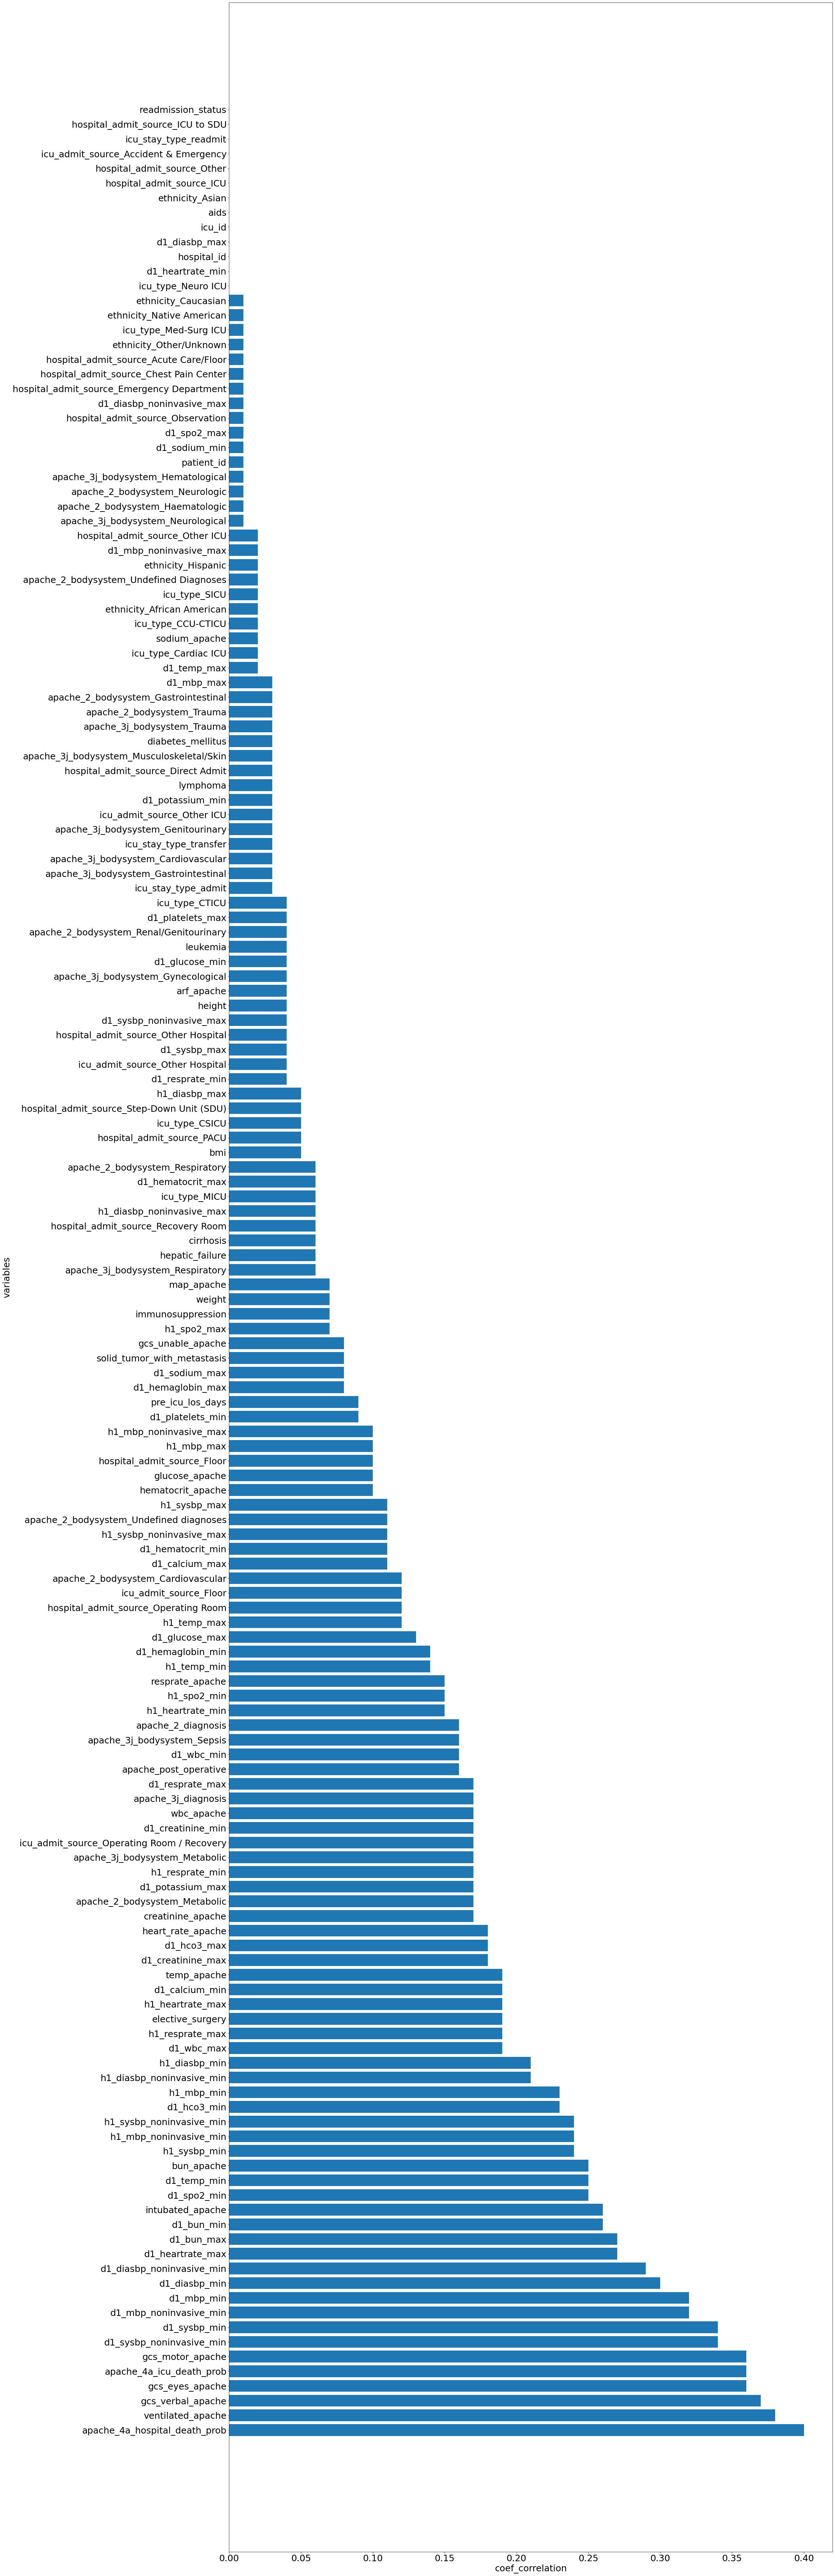

In [ ]:
#ranking de variables mas importantes

variables= []
correlacion= []

for i in x_train_over.columns:
  variables.append(i)
  corr= y_train_over.corr(x_train_over[i])
  correlacion.append(abs(round(corr, 2)))

ranking= pd.DataFrame({"variables": variables, "corr": correlacion})
ranking= ranking.sort_values("corr", ascending= False)

fig= plt.figure(figsize=(30,130))
plt.barh(ranking["variables"], ranking["corr"])
plt.xlabel("coef_correlation", fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel("variables", fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
var_most_imp= ranking[ranking["corr"]>=0.10].variables
print("Hay ",len(var_most_imp)," variables con mas de 0.1 de correlacion pearson con hospital_death en df_train_over son:")
for i in var_most_imp:
  print(i)

Hay  69  variables con mas de 0.1 de correlacion pearson con hospital_death en df_train_over son:
apache_4a_hospital_death_prob
ventilated_apache
gcs_verbal_apache
gcs_eyes_apache
apache_4a_icu_death_prob
gcs_motor_apache
d1_sysbp_noninvasive_min
d1_sysbp_min
d1_mbp_noninvasive_min
d1_mbp_min
d1_diasbp_min
d1_diasbp_noninvasive_min
d1_heartrate_max
d1_bun_max
d1_bun_min
intubated_apache
d1_spo2_min
d1_temp_min
bun_apache
h1_sysbp_min
h1_mbp_noninvasive_min
h1_sysbp_noninvasive_min
d1_hco3_min
h1_mbp_min
h1_diasbp_noninvasive_min
h1_diasbp_min
d1_wbc_max
h1_resprate_max
elective_surgery
h1_heartrate_max
d1_calcium_min
temp_apache
d1_creatinine_max
d1_hco3_max
heart_rate_apache
creatinine_apache
apache_2_bodysystem_Metabolic
d1_potassium_max
h1_resprate_min
apache_3j_bodysystem_Metabolic
icu_admit_source_Operating Room / Recovery
d1_creatinine_min
wbc_apache
apache_3j_diagnosis
d1_resprate_max
apache_post_operative
d1_wbc_min
apache_3j_bodysystem_Sepsis
apache_2_diagnosis
h1_heartrate_mi

In [ ]:
var_most_imp_25= ranking[ranking["corr"]>=0.25].variables
print("Hay ",len(var_most_imp_25)," variables con mas de 0.25 de correlacion pearson con hospital_death en df_train_over son:")
for i in var_most_imp_25:
  print(i)

Hay  19  variables con mas de 0.25 de correlacion pearson con hospital_death en df_train_over son:
apache_4a_hospital_death_prob
ventilated_apache
gcs_verbal_apache
gcs_eyes_apache
apache_4a_icu_death_prob
gcs_motor_apache
d1_sysbp_noninvasive_min
d1_sysbp_min
d1_mbp_noninvasive_min
d1_mbp_min
d1_diasbp_min
d1_diasbp_noninvasive_min
d1_heartrate_max
d1_bun_max
d1_bun_min
intubated_apache
d1_spo2_min
d1_temp_min
bun_apache


In [ ]:
x_train_most_var= x_train_over.loc[:,var_most_imp]
x_test_most_var= x_test.loc[:,var_most_imp]

x_train_most_var

apache_4a_hospital_death_prob  ventilated_apache  gcs_verbal_apache  \
0                                0.10                0.0                5.0   
1                                0.02                0.0                5.0   
2                                0.04                1.0                5.0   
3                                0.05                0.0                4.0   
4                                0.09                0.0                4.0   
...                               ...                ...                ...   
165591                           0.78                1.0                1.0   
165592                          -1.00                1.0                2.0   
165593                          -1.00                0.0                4.0   
165594                           0.85                1.0                1.0   
165595                           0.15                0.0                4.0   

        gcs_eyes_apache  apache_4a_icu_death_prob  gcs_motor_apache  \
0                   4.0                      0.06               6.0   
1                   4.0                      0.01               6.0   
2                   4.0                      0.01               6.0   
3                   3.0                      0.03               6.0   
4                   4.0                      0.02               5.0   
...                 ...                       ...               ...   
165591              1.0                      0.67               2.0   
165592              4.0                     -1.00               5.0   
165593              4.0                     -1.00               6.0   
165594              3.0                      0.74               4.0   
165595              4.0                      0.06               6.0   

        d1_sysbp_noninvasive_min  d1_sysbp_min  d1_mbp_noninvasive_min  \
0                           71.0          71.0                    47.0   
1                          138.0         138.0                    89.0   
2                           85.0          85.0                    47.0   
3                           78.0          78.0                    52.0   
4                           78.0          78.0                    61.0   
...                          ...           ...                     ...   
165591                      43.0          43.0                    23.0   
165592                      62.0          62.0                    28.0   
165593                      60.0          60.0                    51.0   
165594                      75.0          75.0                    50.0   
165595                      69.0          69.0                    53.0   

        d1_mbp_min  ...  d1_calcium_max  d1_hematocrit_min  \
0             47.0  ...        7.100000          21.000000   
1             89.0  ...        9.000000          28.900000   
2             47.0  ...       10.200000          29.200000   
3             52.0  ...        9.100000          38.800000   
4             61.0  ...        8.500000          32.967724   
...            ...  ...             ...                ...   
165591        23.0  ...        9.700000          34.600000   
165592        28.0  ...        8.381337          32.967724   
165593        51.0  ...        7.900000          29.300000   
165594        50.0  ...        8.500000          39.500000   
165595        53.0  ...        8.000000          36.000000   

        h1_sysbp_noninvasive_max  apache_2_bodysystem_Undefined diagnoses  \
0                           75.0                                        0   
1                          146.0                                        0   
2                          121.0                                        1   
3                          104.0                                        0   
4                          114.0                                        0   
...                          ...                                      ...   
165591                     161.0 

In [ ]:
x_train2_most_var= x_train.loc[:,var_most_imp]

x_train2_most_var

apache_4a_hospital_death_prob  ventilated_apache  gcs_verbal_apache  \
0                               0.10                0.0           5.000000   
1                               0.02                0.0           5.000000   
2                               0.04                1.0           5.000000   
3                               0.05                0.0           4.000000   
4                               0.09                0.0           4.000000   
...                              ...                ...                ...   
89708                          -1.00                0.0           4.007478   
89709                           0.46                1.0           1.000000   
89710                           0.04                1.0           5.000000   
89711                           0.04                1.0           1.000000   
89712                           0.01                0.0           5.000000   

       gcs_eyes_apache  apache_4a_icu_death_prob  gcs_motor_apache  \
0             4.000000                      0.06           6.00000   
1             4.000000                      0.01           6.00000   
2             4.000000                      0.01           6.00000   
3             3.000000                      0.03           6.00000   
4             4.000000                      0.02           5.00000   
...                ...                       ...               ...   
89708         3.472952                     -1.00           5.48282   
89709         1.000000                      0.35           2.00000   
89710         4.000000                      0.03           6.00000   
89711         3.000000                      0.02           6.00000   
89712         4.000000                      0.00           6.00000   

       d1_sysbp_noninvasive_min  d1_sysbp_min  d1_mbp_noninvasive_min  \
0                          71.0          71.0                    47.0   
1                         138.0         138.0                    89.0   
2                          85.0          85.0                    47.0   
3                          78.0          78.0                    52.0   
4                          78.0          78.0                    61.0   
...                         ...           ...                     ...   
89708                      71.0          71.0                    45.0   
89709                      94.0          94.0                    60.0   
89710                      89.0          89.0                    61.0   
89711                      86.0          86.0                    60.0   
89712                     110.0         110.0                    80.0   

       d1_mbp_min  ...  d1_calcium_max  d1_hematocrit_min  \
0            47.0  ...             7.1          21.000000   
1            89.0  ...             9.0          28.900000   
2            47.0  ...            10.2          29.200000   
3            52.0  ...             9.1          38.800000   
4            61.0  ...             8.5          32.967724   
...           ...  ...             ...                ...   
89708        45.0  ...             7.2          32.967724   
89709        60.0  ...             8.7          41.400000   
89710        61.0  ...             9.5          18.600000   
89711        60.0  ...             8.6          35.900000   
89712        80.0  ...             6.9          35.000000   

       h1_sysbp_noninvasive_max  apache_2_bodysystem_Undefined diagnoses  \
0                          75.0                                        0   
1                         146.0                                        0   
2                         121.0                                        1   
3                         104.0                                        0   
4                         114.0                                        0   
...                         ...                                      ...   
89708                      75.0                                        0   
89709      

In [ ]:
x_train_most_var_25= x_train_over.loc[:,var_most_imp_25]
x_test_most_var_25= x_test.loc[:,var_most_imp_25]

x_train_most_var_25

apache_4a_hospital_death_prob  ventilated_apache  gcs_verbal_apache  \
0                                0.10                0.0                5.0   
1                                0.02                0.0                5.0   
2                                0.04                1.0                5.0   
3                                0.05                0.0                4.0   
4                                0.09                0.0                4.0   
...                               ...                ...                ...   
165591                           0.78                1.0                1.0   
165592                          -1.00                1.0                2.0   
165593                          -1.00                0.0                4.0   
165594                           0.85                1.0                1.0   
165595                           0.15                0.0                4.0   

        gcs_eyes_apache  apache_4a_icu_death_prob  gcs_motor_apache  \
0                   4.0                      0.06               6.0   
1                   4.0                      0.01               6.0   
2                   4.0                      0.01               6.0   
3                   3.0                      0.03               6.0   
4                   4.0                      0.02               5.0   
...                 ...                       ...               ...   
165591              1.0                      0.67               2.0   
165592              4.0                     -1.00               5.0   
165593              4.0                     -1.00               6.0   
165594              3.0                      0.74               4.0   
165595              4.0                      0.06               6.0   

        d1_sysbp_noninvasive_min  d1_sysbp_min  d1_mbp_noninvasive_min  \
0                           71.0          71.0                    47.0   
1                          138.0         138.0                    89.0   
2                           85.0          85.0                    47.0   
3                           78.0          78.0                    52.0   
4                           78.0          78.0                    61.0   
...                          ...           ...                     ...   
165591                      43.0          43.0                    23.0   
165592                      62.0          62.0                    28.0   
165593                      60.0          60.0                    51.0   
165594                      75.0          75.0                    50.0   
165595                      69.0          69.0                    53.0   

        d1_mbp_min  d1_diasbp_min  d1_diasbp_noninvasive_min  \
0             47.0           33.0                       33.0   
1             89.0           62.0                       62.0   
2             47.0           30.0                       30.0   
3             52.0           43.0                       43.0   
4             61.0           52.0                       52.0   
...            ...            ...                        ...   
165591        23.0           17.0                       17.0   
165592        28.0           23.0                       23.0   
165593        51.0           48.0                       48.0   
165594        50.0           42.0                       42.0   
165595        53.0           37.0                       37.0   

        d1_heartrate_max  d1_bun_max  d1_bun_min  intubated_apache  \
0                  145.0    7.000000    7.000000               0.0   
1                   84.0   21.800000   21.800000               0.0   
2                  108.0   23.000000   19.000000               1.0   
3                  103.0   68.000000   56.000000               0.0   
4                   88.0   37.000000   37.000000               0.0   
...                  ...         ...         ...               ...   
165591             148.0   21.000000   21.000000          

In [ ]:
x_train2_most_var_25= x_train.loc[:,var_most_imp_25]

x_train2_most_var_25

apache_4a_hospital_death_prob  ventilated_apache  gcs_verbal_apache  \
0                               0.10                0.0           5.000000   
1                               0.02                0.0           5.000000   
2                               0.04                1.0           5.000000   
3                               0.05                0.0           4.000000   
4                               0.09                0.0           4.000000   
...                              ...                ...                ...   
89708                          -1.00                0.0           4.007478   
89709                           0.46                1.0           1.000000   
89710                           0.04                1.0           5.000000   
89711                           0.04                1.0           1.000000   
89712                           0.01                0.0           5.000000   

       gcs_eyes_apache  apache_4a_icu_death_prob  gcs_motor_apache  \
0             4.000000                      0.06           6.00000   
1             4.000000                      0.01           6.00000   
2             4.000000                      0.01           6.00000   
3             3.000000                      0.03           6.00000   
4             4.000000                      0.02           5.00000   
...                ...                       ...               ...   
89708         3.472952                     -1.00           5.48282   
89709         1.000000                      0.35           2.00000   
89710         4.000000                      0.03           6.00000   
89711         3.000000                      0.02           6.00000   
89712         4.000000                      0.00           6.00000   

       d1_sysbp_noninvasive_min  d1_sysbp_min  d1_mbp_noninvasive_min  \
0                          71.0          71.0                    47.0   
1                         138.0         138.0                    89.0   
2                          85.0          85.0                    47.0   
3                          78.0          78.0                    52.0   
4                          78.0          78.0                    61.0   
...                         ...           ...                     ...   
89708                      71.0          71.0                    45.0   
89709                      94.0          94.0                    60.0   
89710                      89.0          89.0                    61.0   
89711                      86.0          86.0                    60.0   
89712                     110.0         110.0                    80.0   

       d1_mbp_min  d1_diasbp_min  d1_diasbp_noninvasive_min  d1_heartrate_max  \
0            47.0           33.0                       33.0             145.0   
1            89.0           62.0                       62.0              84.0   
2            47.0           30.0                       30.0             108.0   
3            52.0           43.0                       43.0             103.0   
4            61.0           52.0                       52.0              88.0   
...           ...            ...                        ...               ...   
89708        45.0           32.0                       32.0             112.0   
89709        60.0           48.0                       48.0             132.0   
89710        61.0           52.0                       52.0             105.0   
89711        60.0           51.0                       51.0              94.0   
89712        80.0           65.0                       65.0             107.0   

       d1_bun_max  d1_bun_min  intubated_apache  d1_spo2_min  d1_temp_min  \
0             7.0         7.0               0.0         95.0       31.889   
1            21.8        21.8               0.0         97.0       36.200   
2            23.0        19.0               1.0         94.0       35.900   
3            68.0        56.0               0.0         85.0       33.9

# **Estimación del error de prediccion**

In [ ]:
#usaremos f_score y la matriz de confusión para estimar el error de prediccion de los modelos a usar
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#conjuntos de validacion para los modelos
x_train_P, x_val_P, y_train_P, y_val_P= train_test_split(x_train_pca, y_train_over,
                                                     test_size=0.20, random_state=30)

x_train2_P, x_val2_P, y_train2_P, y_val2_P= train_test_split(x_train_pca2, y_train,
                                                     test_size=0.20, random_state=30)

x_train_var, x_val_var, y_train_var, y_val_var= train_test_split(x_train_most_var, y_train_over,
                                                     test_size=0.20, random_state=30)

x_train2_var, x_val2_var, y_train2_var, y_val2_var= train_test_split(x_train2_most_var, y_train,
                                                     test_size=0.20, random_state=30)

x_train_var_25, x_val_var_25, y_train_var_25, y_val_var_25= train_test_split(x_train_most_var_25, y_train_over,
                                                     test_size=0.20, random_state=30)

x_train2_var_25, x_val2_var_25, y_train2_var_25, y_val2_var_25= train_test_split(x_train2_most_var_25, y_train,
                                                     test_size=0.20, random_state=30)

# **Aplicacion de modelos**

In [ ]:
#modelos a usar

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#arbol + PCA

tree_pca= DecisionTreeClassifier(random_state=10)
rango_criterion = ['gini','entropy']
rango_max_depth =np.array( [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150])
param_tree = dict(criterion=rango_criterion, max_depth=rango_max_depth)
g_tree_pca = GridSearchCV(estimator=tree_pca,param_grid=param_tree, 
                  scoring='accuracy',cv=5,n_jobs=-1)
g_tree_P = g_tree_pca.fit(x_train_P, y_train_P)
print("mejores parametros del modelo Arból con PCA")
print(g_tree_P.best_params_)

mejores parametros del modelo Arból con PCA
{'criterion': 'gini', 'max_depth': 50}


In [ ]:
best_tree_pca= DecisionTreeClassifier(criterion= 'gini', max_depth= 50,random_state=10)
best_tree_pca.fit(x_train_P, y_train_P)
pred_tree_pca= best_tree_pca.predict(x_val_P)

print("f-score macro del modelo random forest con pca:")
print(f1_score(y_val_P, pred_tree_pca, average='macro'))
print("f-score micro del modelo random forest con pca:")
print(f1_score(y_val_P, pred_tree_pca, average='micro'))
print("f-score weighted del modelo random forest con pca:")
print(f1_score(y_val_P, pred_tree_pca, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val_P,pred_tree_pca))

f-score macro del modelo random forest con pca:
0.9643036193484259
f-score micro del modelo random forest con pca:
0.9643417874396135
f-score weighted del modelo random forest con pca:
0.9643001655414671

Matriz de confusion:
 
[[15428  1181]
 [    0 16511]]


In [ ]:
y_pred_tree_pca= best_tree_pca.predict(x_test_pca)
df_final_tree_pca=pd.DataFrame({"encounter_id": encounter_id_test, "hospital_death": y_pred_tree_pca})
df_final_tree_pca.to_csv('pred_test_tree_pca.csv', index=None)
df_final_tree_pca

encounter_id  hospital_death
0            40457               0
1           107569               0
2            47462               0
3            90920               0
4           120041               1
...            ...             ...
1995         80443               0
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               0

[2000 rows x 2 columns]

Se obtuvo 0.488 al subir esta prediccion.

In [ ]:
best_tree_pca2= DecisionTreeClassifier(criterion= 'gini', max_depth= 50,random_state=10)
best_tree_pca2.fit(x_train2_P, y_train2_P)
pred_tree_pca2= best_tree_pca2.predict(x_val2_P)

print("f-score macro del modelo random forest con pca:")
print(f1_score(y_val2_P, pred_tree_pca2, average='macro'))
print("f-score micro del modelo random forest con pca:")
print(f1_score(y_val2_P, pred_tree_pca2, average='micro'))
print("f-score weighted del modelo random forest con pca:")
print(f1_score(y_val2_P, pred_tree_pca2, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val2_P,pred_tree_pca2))

f-score macro del modelo random forest con pca:
0.6102259265686384
f-score micro del modelo random forest con pca:
0.8841888201527058
f-score weighted del modelo random forest con pca:
0.8875398254322026

Matriz de confusion:
 
[[15454  1131]
 [  947   411]]


In [ ]:
y_pred_tree_pca2= best_tree_pca2.predict(x_test_pca)
df_final_tree_pca2=pd.DataFrame({"encounter_id": encounter_id_test, "hospital_death": y_pred_tree_pca2})
df_final_tree_pca2.to_csv('pred_test_tree_pca2.csv', index=None)
df_final_tree_pca2

encounter_id  hospital_death
0            40457               0
1           107569               0
2            47462               1
3            90920               0
4           120041               0
...            ...             ...
1995         80443               1
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               0

[2000 rows x 2 columns]

Se obtuvo 0.4758 al subir esta predicción

In [ ]:
#arbol + variables mas importantes

tree= DecisionTreeClassifier(random_state=10)
g_tree_most_var = GridSearchCV(estimator=tree,param_grid=param_tree, 
                  scoring='accuracy',cv=5,n_jobs=-1)
g_tree_var = g_tree_most_var.fit(x_train_var, y_train_var)
print("mejores parametros del modelo Arból con PCA")
print(g_tree_var.best_params_)


mejores parametros del modelo Arból con PCA
{'criterion': 'gini', 'max_depth': 70}


In [ ]:
best_tree_var= DecisionTreeClassifier(criterion= 'gini', max_depth= 70,random_state=10)
best_tree_var.fit(x_train_var, y_train_var)
pred_tree_var= best_tree_var.predict(x_val_var)

print("f-score macro del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var, pred_tree_var, average='macro'))
print("f-score micro del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var, pred_tree_var, average='micro'))
print("f-score weighted del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var, pred_tree_var, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val_var,pred_tree_var))

f-score macro del modelo random forest con variables mas importantes:
0.9644853927245765
f-score micro del modelo random forest con variables mas importantes:
0.9645229468599034
f-score weighted del modelo random forest con variables mas importantes:
0.9644819755423462

Matriz de confusion:
 
[[15434  1175]
 [    0 16511]]


In [ ]:
y_pred_tree_var= best_tree_var.predict(x_test_most_var)
df_final_tree_var=pd.DataFrame({"encounter_id": encounter_id_test, "hospital_death": y_pred_tree_var})
df_final_tree_var.to_csv('pred_test_tree_var.csv', index=None)
df_final_tree_var

encounter_id  hospital_death
0            40457               0
1           107569               1
2            47462               1
3            90920               0
4           120041               0
...            ...             ...
1995         80443               0
1996         48061               0
1997         38717               0
1998         16532               1
1999        120813               1

[2000 rows x 2 columns]

Se obtuvo 0.57464 score al subir esta predicción.

In [ ]:
best_tree_var2= DecisionTreeClassifier(criterion= 'gini', max_depth= 70,random_state=10)
best_tree_var2.fit(x_train2_var, y_train2_var)
pred_tree_var2= best_tree_var2.predict(x_val2_var)

print("f-score macro del modelo random forest con variables mas de 0.25 corr Pearson:")
print(f1_score(y_val2_var, pred_tree_var2, average='macro'))
print("f-score micro del modelo random forest con variables mas de 0.25 corr Pearson:")
print(f1_score(y_val2_var, pred_tree_var2, average='micro'))
print("f-score weighted del modelo random forest con variables mas de 0.25 corr Pearson:")
print(f1_score(y_val2_var, pred_tree_var2, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val2_var,pred_tree_var2))

f-score macro del modelo random forest con variables mas de 0.25 corr Pearson:
0.6358649791171345
f-score micro del modelo random forest con variables mas de 0.25 corr Pearson:
0.8908209329543555
f-score weighted del modelo random forest con variables mas de 0.25 corr Pearson:
0.8944379316334101

Matriz de confusion:
 
[[15499  1086]
 [  873   485]]


In [ ]:
y_pred_tree_var2= best_tree_var2.predict(x_test_most_var)
df_final_tree_var2=pd.DataFrame({"encounter_id": encounter_id_test, "hospital_death": y_pred_tree_var2})
df_final_tree_var2.to_csv('pred_test_tree_var2.csv', index=None)
df_final_tree_var2

encounter_id  hospital_death
0            40457               0
1           107569               1
2            47462               1
3            90920               0
4           120041               0
...            ...             ...
1995         80443               1
1996         48061               0
1997         38717               1
1998         16532               1
1999        120813               1

[2000 rows x 2 columns]

Se obtuvo 0.57759 al subir esta predicción.

In [ ]:
#modelo ensamblado random forest + PCA

n_estimators= [10, 25]
max_features= ['auto', 'sqrt']
max_depth= [20, 60]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 4]
bootstrap = [False]
param_forest= {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_forest= RandomForestClassifier(random_state=96)

grid_forest_pca = GridSearchCV(estimator = random_forest, param_grid = param_forest, 
                          scoring= 'accuracy',cv = 3, n_jobs = -1)

grid_forest_pca.fit(x_train_P, y_train_P)
print("mejores parametros del modelo Random Forest con PCA")
print(grid_forest_pca.best_params_)

mejores parametros del modelo Random Forest con PCA
{'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}


In [ ]:
best_forest_pca= RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'auto', min_samples_leaf= 1,
                                        min_samples_split= 2, n_estimators= 25,random_state=96)
best_forest_pca.fit(x_train_P, y_train_P)
pred_forest_pca= best_forest_pca.predict(x_val_P)

print("f-score macro del modelo random forest con pca:")
print(f1_score(y_val_P, pred_forest_pca, average='macro'))
print("f-score micro del modelo random forest con pca:")
print(f1_score(y_val_P, pred_forest_pca, average='micro'))
print("f-score weighted del modelo random forest con pca:")
print(f1_score(y_val_P, pred_forest_pca, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val_P,pred_forest_pca))

C:\Users\maxan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


f-score macro del modelo random forest con pca:
0.9964975835065588
f-score micro del modelo random forest con pca:
0.9964975845410629
f-score weighted del modelo random forest con pca:
0.9964975778742597

Matriz de confusion:
 
[[16493   116]
 [    0 16511]]


In [ ]:
y_pred_forest_pca= best_forest_pca.predict(x_test_pca)
df_final_forest_pca=pd.DataFrame()
df_final_forest_pca['encounter_id']=encounter_id_test
df_final_forest_pca['hospital_death']=y_pred_forest_pca
df_final_forest_pca.to_csv('pred_test_forest_pca.csv', index=None)
df_final_forest_pca

encounter_id  hospital_death
0            40457               0
1           107569               0
2            47462               0
3            90920               0
4           120041               0
...            ...             ...
1995         80443               0
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               1

[2000 rows x 2 columns]

Se obtuvo 0.41812 al subir esta predicción.

In [ ]:
best_forest_pca2= RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'auto', min_samples_leaf= 1,
                                        min_samples_split= 2, n_estimators= 25,random_state=96)
best_forest_pca2.fit(x_train2_P, y_train2_P)
pred_forest_pca2= best_forest_pca2.predict(x_val2_P)

print("f-score macro del modelo random forest con pca:")
print(f1_score(y_val2_P, pred_forest_pca2, average='macro'))
print("f-score micro del modelo random forest con pca:")
print(f1_score(y_val2_P, pred_forest_pca2, average='micro'))
print("f-score weighted del modelo random forest con pca:")
print(f1_score(y_val2_P, pred_forest_pca2, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val2_P,pred_forest_pca2))

C:\Users\maxan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


f-score macro del modelo random forest con pca:
0.6078756502727434
f-score micro del modelo random forest con pca:
0.9286629883520034
f-score weighted del modelo random forest con pca:
0.9088571523328145

Matriz de confusion:
 
[[16446   139]
 [ 1141   217]]


In [ ]:
y_pred_forest_pca2= best_forest_pca2.predict(x_test_pca)
df_final_forest_pca2=pd.DataFrame()
df_final_forest_pca2['encounter_id']=encounter_id_test
df_final_forest_pca2['hospital_death']=y_pred_forest_pca2
df_final_forest_pca2.to_csv('pred_test_forest_pca2.csv', index=None)
df_final_forest_pca2

encounter_id  hospital_death
0            40457               0
1           107569               0
2            47462               0
3            90920               0
4           120041               0
...            ...             ...
1995         80443               0
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               0

[2000 rows x 2 columns]

Se obtuvo 0.38537 al subir esta predicción.

In [ ]:
#random forest + variables mas importantes
grid_forest_var = GridSearchCV(estimator = random_forest, param_grid = param_forest, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_forest_var.fit(x_train_var, y_train_var)
print("mejores parametros del modelo Random Forest con varianles mas importantes")
print(grid_forest_var.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
mejores parametros del modelo Random Forest con varianles mas importantes
{'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
best_forest_var= RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'auto', min_samples_leaf= 1,
                                        min_samples_split= 2, n_estimators= 10,random_state=96)
best_forest_var.fit(x_train_var, y_train_var)
pred_forest_var= best_forest_var.predict(x_val_var)

print("f-score macro del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var, pred_forest_var, average='macro'))
print("f-score micro del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var, pred_forest_var, average='micro'))
print("f-score weighted del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var, pred_forest_var, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val_var,pred_forest_var))

C:\Users\maxan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


f-score macro del modelo random forest con variables mas importantes:
0.9936291528925096
f-score micro del modelo random forest con variables mas importantes:
0.99362922705314
f-score weighted del modelo random forest con variables mas importantes:
0.9936290885762106

Matriz de confusion:
 
[[16398   211]
 [    0 16511]]


In [ ]:
y_pred_forest_var= best_forest_var.predict(x_test_most_var)
df_final_forest_var=pd.DataFrame()
df_final_forest_var['encounter_id']=encounter_id_test
df_final_forest_var['hospital_death']=y_pred_forest_var
df_final_forest_var.to_csv('pred_test_forest_var.csv', index=None)
df_final_forest_var

encounter_id  hospital_death
0            40457               0
1           107569               1
2            47462               0
3            90920               0
4           120041               0
...            ...             ...
1995         80443               0
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               1

[2000 rows x 2 columns]

Se obtuvo 0.53254 al subir esta predicción

In [ ]:
best_forest_var2= RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'auto', min_samples_leaf= 1,
                                        min_samples_split= 2, n_estimators= 10,random_state=96)
best_forest_var2.fit(x_train2_var, y_train2_var)
pred_forest_var2= best_forest_var2.predict(x_val2_var)

print("f-score macro del modelo random forest con variables mas importantes:")
print(f1_score(y_val2_var, pred_forest_var2, average='macro'))
print("f-score micro del modelo random forest con variables mas importantes:")
print(f1_score(y_val2_var, pred_forest_var2, average='micro'))
print("f-score weighted del modelo random forest con variables mas importantes:")
print(f1_score(y_val2_var, pred_forest_var2, average='weighted'))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val2_var,pred_forest_var2))

C:\Users\maxan\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


f-score macro del modelo random forest con variables mas importantes:
0.6420097955260163
f-score micro del modelo random forest con variables mas importantes:
0.9305578777239034
f-score weighted del modelo random forest con variables mas importantes:
0.9147592925542135

Matriz de confusion:
 
[[16403   182]
 [ 1064   294]]


In [ ]:
y_pred_forest_var2= best_forest_var2.predict(x_test_most_var)
df_final_forest_var2=pd.DataFrame()
df_final_forest_var2['encounter_id']=encounter_id_test
df_final_forest_var2['hospital_death']=y_pred_forest_var2
df_final_forest_var2.to_csv('pred_test_forest_var2.csv', index=None)
df_final_forest_var2

encounter_id  hospital_death
0            40457               0
1           107569               1
2            47462               0
3            90920               0
4           120041               0
...            ...             ...
1995         80443               1
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               0

[2000 rows x 2 columns]

Se obtuvo 0.5372 al subir esta predicción

In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier()

dicc_knn = {'n_neighbors' : [5, 10, 50, 100],
          'weights' : ['uniform', 'distance'],
          'metric' : ['euclidean', 'minkowski']
          }

g_knn = GridSearchCV(estimator = knn, param_grid = dicc_knn, cv = 3) 

g_knn.fit(x_train_var_25, y_train_var_25)
print("mejores parametros del modelo Knn con varianles mas 0.25 corr Pearson")
print(g_knn.best_params_)

mejores parametros del modelo Knn con varianles mas 0.25 corr Pearson
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
best_knn_var25= knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 5, weights= 'distance')
best_knn_var25.fit(x_train_var_25, y_train_var_25)
pred_knn_var25= best_knn_var25.predict(x_val_var_25)

print("f-score macro del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var_25, pred_knn_var25, average='macro'))
print("f-score micro del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var_25, pred_knn_var25, average='micro'))
print("f-score weighted del modelo random forest con variables mas importantes:")
print(f1_score(y_val_var_25, pred_knn_var25, average='weighted'))

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val_var_25, pred_knn_var25))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val_var_25,pred_knn_var25))

f-score macro del modelo random forest con variables mas importantes:
0.9136303175389942
f-score micro del modelo random forest con variables mas importantes:
0.9142210144927536
f-score weighted del modelo random forest con variables mas importantes:
0.913609182708228
Accuracy: 0.9142210144927536

Matriz de confusion:
 
[[13770  2839]
 [    2 16509]]


In [ ]:
y_pred_knn_var25= best_knn_var25.predict(x_test_most_var_25)
df_final_knn_var25=pd.DataFrame()
df_final_knn_var25['encounter_id']=encounter_id_test
df_final_knn_var25['hospital_death']=y_pred_knn_var25
df_final_knn_var25.to_csv('pred_test_knn_var25.csv', index=None)
df_final_knn_var25

encounter_id  hospital_death
0            40457               0
1           107569               0
2            47462               0
3            90920               0
4           120041               0
...            ...             ...
1995         80443               1
1996         48061               1
1997         38717               1
1998         16532               0
1999        120813               1

[2000 rows x 2 columns]

Se obtuvo 0.654 al subir esta predicción.

In [ ]:
best_knn2_var25= KNeighborsClassifier(metric= 'euclidean', n_neighbors= 5, weights= 'distance')
best_knn2_var25.fit(x_train2_var_25, y_train2_var_25)
pred_knn2_var25= best_knn_var25.predict(x_val2_var_25)

print("f-score macro del modelo random forest con variables mas importantes:")
print(f1_score(y_val2_var_25, pred_knn2_var25, average='macro'))
print("f-score micro del modelo random forest con variables mas importantes:")
print(f1_score(y_val2_var_25, pred_knn2_var25, average='micro'))
print("f-score weighted del modelo random forest con variables mas importantes:")
print(f1_score(y_val2_var_25, pred_knn2_var25, average='weighted'))

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val2_var_25, pred_knn2_var25))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_val2_var_25,pred_knn2_var25))

f-score macro del modelo random forest con variables mas importantes:
0.8741287168144425
f-score micro del modelo random forest con variables mas importantes:
0.9555258318007023
f-score weighted del modelo random forest con variables mas importantes:
0.9600275226842726
Accuracy: 0.9555258318007023

Matriz de confusion:
 
[[15787   798]
 [    0  1358]]


In [ ]:
y_pred_knn2_var25= best_knn2_var25.predict(x_test_most_var_25)
df_final_knn2_var25=pd.DataFrame()
df_final_knn2_var25['encounter_id']=encounter_id_test
df_final_knn2_var25['hospital_death']=y_pred_knn2_var25
df_final_knn2_var25.to_csv('pred_test_knn2_var25.csv', index=None)
df_final_knn2_var25

encounter_id  hospital_death
0            40457               0
1           107569               0
2            47462               0
3            90920               0
4           120041               0
...            ...             ...
1995         80443               1
1996         48061               0
1997         38717               0
1998         16532               0
1999        120813               0

[2000 rows x 2 columns]

Se obtuvo 0.44824 al subir esta predicción

# **Conclusion de resultados**

Se logra ver que el modelo Knn con los hiperparametros metric: 'euclidean', n_neighbors: 5 y weights: 'distance',entrenado con los datos de entrenamiento equilibarada por oversample y considerando las variales con mas de 0.25 de correlacion Pearson dio el mejor puntaje entre todas las predicciones subidas. 

También, se logra observar que el modelo random forest con los hiperparametros bootstrap: False, max_depth: 60, max_features: 'auto', min_samples_leaf: 1, min_samples_split: 2 y n_estimators: 10, entrenado con los datos de entrenameineto equilibrada por oversample y considerando las caracteristicas con mas 0.25 de correlacion Pearson tiene los mayores f1-score entre todos los modelos considerados, pero obtuvo el cuarto mejor puntaje entre las predicciones subidas. Esto indica que el oversample tiene un gran efecto sobre el f1-score y podria provocar overfiting en este modelo. Con algo mas de tiempo, se pueden probar con mas modelos, usar los datos de entrenamiento original para buscar los hiperparaemtrso adecuados, entrenar estos nuevos modelos con los datos equilibrados por oversample y ver el efecto que tienen.